# Visualizations results

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from utils_visualizations import flatten_data, filter_and_boxplot

# remove waringns
import warnings
warnings.filterwarnings("ignore")

## Load data for evaluation

In [2]:
# set file path
file = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/results-run-20240114-2.json"

# load data from json file
with open(file) as f:
    data = json.load(f)

# flatten dictionary and convert to dataframe
data_all_flatten, keys_dic = flatten_data(data)
data = pd.DataFrame(data_all_flatten)
print('Shape of data', data.shape)
print('Colum names of data', data.columns)
print('Number of Colums', data.columns.shape)
print('Keys of dictionary (', len(keys_dic), ')', keys_dic)
data.head()

Shape of data (159, 72)
Colum names of data Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'running_time_unstratified', 'running_time_stratified',
       'running_time_repetition', 'cv_unstratified_iterations_mean_fi

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,cv_stratified_iterations_rank_test_score,cv_iteration_refit_test_r2,cv_iteration_refit_test_mse,cv_iteration_refit_test_mae,cv_folds_descreptives_unstratified_ks_statistic,cv_folds_descreptives_unstratified_p_value,cv_folds_descreptives_unstratified_intersection_area,cv_folds_descreptives_stratified_ks_statistic,cv_folds_descreptives_stratified_p_value,cv_folds_descreptives_stratified_intersection_area
0,rf,200,100000,8,0,identity,10,5,200,50,...,"[77, 26, 147, 160, 55, 154, 137, 185, 7, 200, ...","[0.79145169, 0.73686025, 0.77042294, 0.6859167...","[6.28281465, 5.4814604, 7.49916004, 8.23182009...","[1.99378646, 1.85690847, 2.20301859, 2.3140953...",0.15375,0.554928,0.866526,0.0475,0.999997,0.956030
1,rf,200,100000,8,0,identity,10,5,200,50,...,"[184, 184, 60, 28, 171, 63, 27, 162, 66, 86, 1...","[0.81968618, 0.51756098, 0.51756098, 0.7650269...","[11.51887887, 11.51887887, 5.61029594, 4.74041...","[2.750852, 2.750852, 1.89492849, 1.72864477, 2...",0.16000,0.426678,0.851083,0.0475,0.999995,0.949996
2,rf,200,100000,8,0,identity,10,5,200,50,...,"[19, 60, 157, 115, 42, 81, 133, 189, 109, 45, ...","[0.79910952, 0.79312277, 0.76574337, 0.6960301...","[4.93947145, 5.59319136, 7.25768895, 6.5799388...","[1.77599343, 1.89542031, 2.17896786, 2.0703107...",0.12625,0.640795,0.892708,0.0475,0.999997,0.952188
3,rf,200,100000,8,0,identity,10,5,200,50,...,"[51, 42, 3, 23, 42, 7, 20, 104, 152, 73, 198, ...","[0.77546064, 0.74732781, 0.73595811, 0.7865181...","[6.03288766, 6.30435446, 5.09716557, 5.6234345...","[1.99798242, 2.04988104, 1.82879908, 1.9271991...",0.16875,0.419788,0.858054,0.0475,0.999997,0.950563
4,rf,200,100000,8,0,identity,10,5,200,50,...,"[114, 159, 101, 42, 57, 180, 11, 98, 163, 199,...","[0.78257415, 0.69604565, 0.66856743, 0.7273418...","[7.25731795, 7.91339726, 6.51007879, 5.5626434...","[2.14830421, 2.2610981, 2.05336884, 1.87105353...",0.15625,0.435375,0.847100,0.0450,0.999999,0.935624


Do first cleaning of data:

In [5]:
# check for duplicates ind data
print('duplicates: ', data.astype(str).duplicated().sum())

duplicates:  0


## Descriptives
#### Single variables, no dictionnaries/lists
* repetition', 'random_state', 'hyperparameters_same'  
* 'running_time_unstratified', 'running_time_stratified', 'running_time_repetition', 'cv_unstratified_iterations_mean_fit_time'  


In [11]:
#  'hyperparameters_same'
data['hyperparameters_same'].value_counts()

hyperparameters_same
False    113
True      46
Name: count, dtype: int64

In [38]:
# random_state
print(len(data['random_state']))
print(len(data['random_state'].unique()))

159
159


In [37]:
# repetition
data['repetition'].value_counts().unique()

array([4, 3])

[<Axes: > <Axes: > <Axes: >]
159
running_time_unstratified count    159.000000
mean       1.184808
std        0.029144
min        1.143600
25%        1.170400
50%        1.177000
75%        1.190000
max        1.356100
Name: running_time_unstratified, dtype: float64
159
running_time_stratified count    159.000000
mean       1.178536
std        0.012626
min        1.161000
25%        1.173550
50%        1.177500
75%        1.182250
max        1.289800
Name: running_time_stratified, dtype: float64
159
running_time_repetition count    159.000000
mean      12.300863
std        0.117949
min       12.029200
25%       12.222300
50%       12.292500
75%       12.381900
max       12.728500
Name: running_time_repetition, dtype: float64


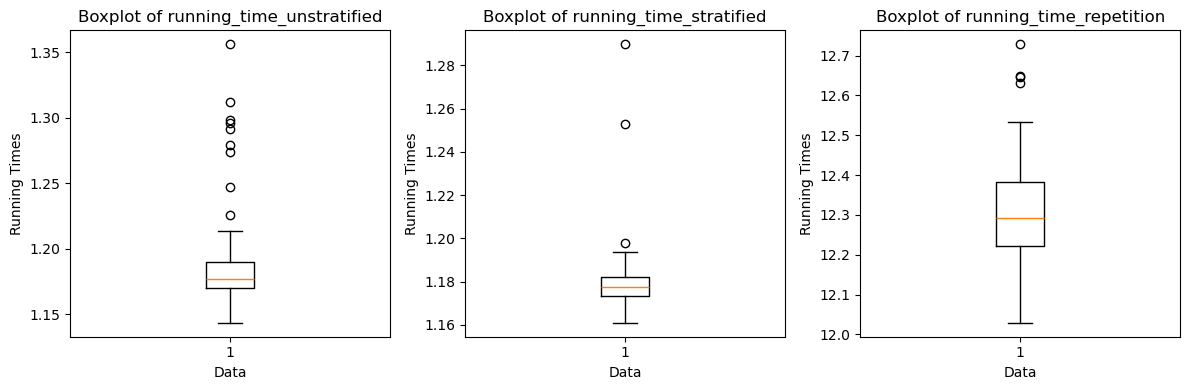

In [101]:
# runnnig times
runnting_times = ['running_time_unstratified', 'running_time_stratified', 'running_time_repetition']

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
print(axes)

# Iterate over runnting_times
for i, running_time in enumerate(runnting_times):
    # Get the running times data
    running_times = data[running_time]
   

    # Plot the boxplot in the corresponding subplot
    print(len(running_times))
    axes[i].boxplot(running_times)
    axes[i].set_title(f'Boxplot of {running_time}')
    axes[i].set_xlabel('Data')
    axes[i].set_ylabel('Running Times')

    print(str(running_time), running_times.describe())

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]
running_time_unstratified count    159.000000
mean       1.184808
std        0.029144
min        1.143600
25%        1.170400
50%        1.177000
75%        1.190000
max        1.356100
Name: running_time_unstratified, dtype: float64
running_time_stratified count    159.000000
mean       1.178536
std        0.012626
min        1.161000
25%        1.173550
50%        1.177500
75%        1.182250
max        1.289800
Name: running_time_stratified, dtype: float64
running_time_repetition count    159.000000
mean      12.300863
std        0.117949
min       12.029200
25%       12.222300
50%       12.292500
75%       12.381900
max       12.728500
Name: running_time_repetition, dtype: float64


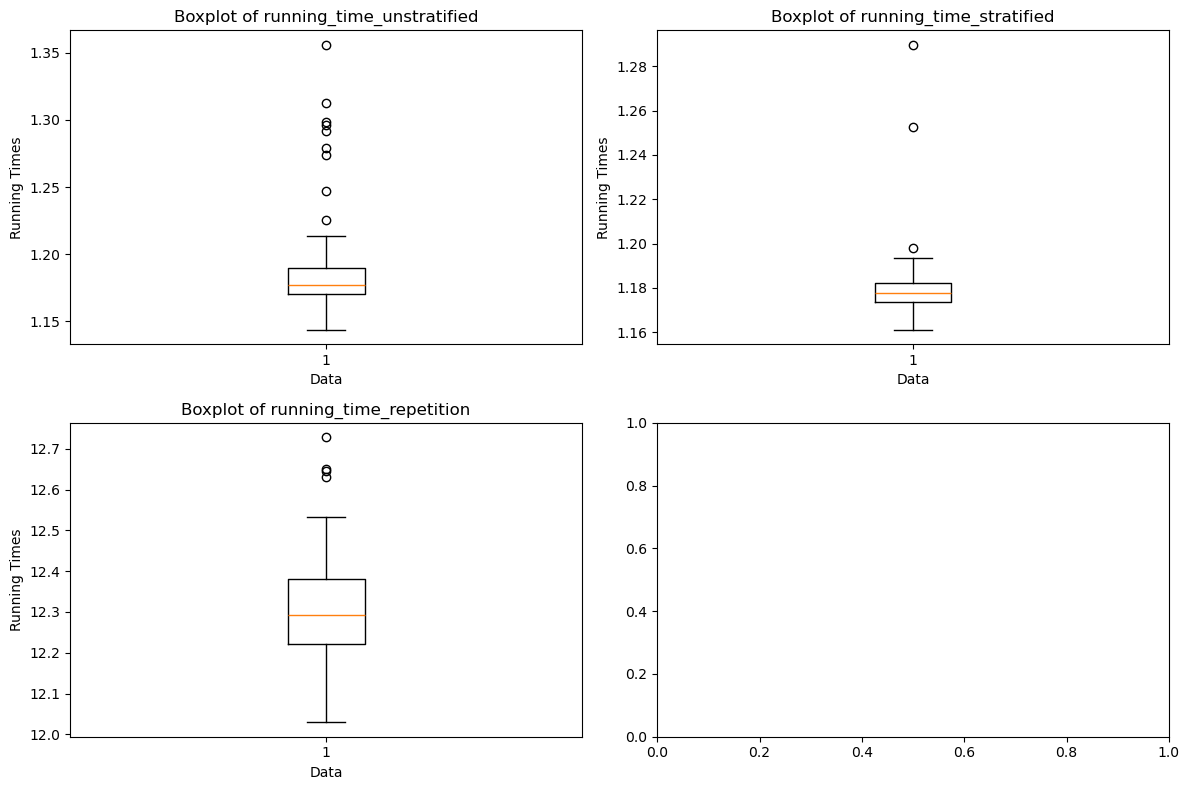

In [103]:
# runnnig times
runnting_times = ['running_time_unstratified', 'running_time_stratified', 'running_time_repetition']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
print(axes)

# Iterate over runnting_times
for i, running_time in enumerate(runnting_times):
    # Get the running times data
    running_times = data[running_time]
   
    # Plot the boxplot in the corresponding subplot
    row = i // 2
    col = i % 2
    axes[row, col].boxplot(running_times)
    axes[row, col].set_title(f'Boxplot of {running_time}')
    axes[row, col].set_xlabel('Data')
    axes[row, col].set_ylabel('Running Times')

    print(str(running_time), running_times.describe())

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


### Data dictionnaries in json file

In [50]:
# overview of keys
print('keys_dic:', len(keys_dic), keys_dic), 

keys_dic: 8 ['cv_folds_descreptives_stratified', 'cv_stratified_iterations', 'cv_iteration_refit_test', 'unstratified_results', 'cv_folds_descreptives_unstratified', 'model_info', 'cv_unstratified_iterations', 'stratified_results']


(None,)

#### model_info

In [51]:
# Filter columns that contain 'model_info'
key = 'model_info'
colum = [col for col in data.columns if key in col] 
colum

['model_info_model',
 'model_info_n_train',
 'model_info_n_test',
 'model_info_n_features',
 'model_info_noise',
 'model_info_transformation',
 'model_info_group_size',
 'model_info_n_folds',
 'model_info_n_iter',
 'model_info_n_repetitions',
 'model_info_scoring',
 'model_info_n_jobs',
 'model_info_json_file']

In [53]:
# give summary of every column
data_desciptives = data.loc[:, colum]
# in data_desciptives make all columns categorical
data_desciptives = data_desciptives.astype('category')
# show summary of every column
data_desciptives.describe(include='all')


,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,model_info_scoring,model_info_n_jobs,model_info_json_file
count,159,159,159,159,159,159,159,159,159,159,159,159,159
unique,1,1,1,1,2,2,1,1,1,1,1,1,1
top,rf,200,100000,8,0,identity,10,5,200,50,neg_mean_squared_error,-1,./Simulations/Final_Setup/results-run-20240114...
freq,159,159,159,159,100,100,159,159,159,159,159,159,159


In [54]:
# Display unique values for each column with counts
for column in data_desciptives.columns:
    unique_values = data_desciptives[column].value_counts()
    print(f"\n{unique_values}\n")


model_info_model
rf    159
Name: count, dtype: int64


model_info_n_train
200    159
Name: count, dtype: int64


model_info_n_test
100000    159
Name: count, dtype: int64


model_info_n_features
8    159
Name: count, dtype: int64


model_info_noise
0    100
3     59
Name: count, dtype: int64


model_info_transformation
identity    100
log          59
Name: count, dtype: int64


model_info_group_size
10    159
Name: count, dtype: int64


model_info_n_folds
5    159
Name: count, dtype: int64


model_info_n_iter
200    159
Name: count, dtype: int64


model_info_n_repetitions
50    159
Name: count, dtype: int64


model_info_scoring
neg_mean_squared_error    159
Name: count, dtype: int64


model_info_n_jobs
-1    159
Name: count, dtype: int64


model_info_json_file
./Simulations/Final_Setup/results-run-20240114-2.json    159
Name: count, dtype: int64



#### cv_folds_descreptives_stratified

In [110]:
key = 'cv_folds_descreptives_stratified'
print(key)
colum1 = [col for col in data.columns if key in col]

key = 'cv_folds_descreptives_unstratified'
print(key)
colum2 = [col for col in data.columns if key in col]

colum = colum1 + colum2

print(len(colum))

cv_folds_descreptives_stratified
cv_folds_descreptives_unstratified
6


In [122]:
def plot_boxblots_descriptives(variables, n_row):
    # Create a 1x3 grid of subplots
    fig, axes = plt.subplots(n_row, int(len(variables)/n_row), figsize=(12, 4))
    # Iterate over runnting_times
    for i, variable in enumerate(variables):
        # Get the running times data
        data_variable = data[variable]
    

        # Plot the boxplot in the corresponding subplot
        row = i // int(len(variables)/n_row)
        col = i % int(len(variables)/n_row)
        axes[row, col].boxplot(data_variable)
        axes[row, col].set_title(f'{variable}')

        print(str(variable), data_variable.describe())

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()


cv_folds_descreptives_stratified_ks_statistic count    159.000000
mean       0.047060
std        0.001683
min        0.041250
25%        0.046250
50%        0.047500
75%        0.047500
max        0.050000
Name: cv_folds_descreptives_stratified_ks_statistic, dtype: float64
cv_folds_descreptives_stratified_p_value count    159.000000
mean       0.999997
std        0.000001
min        0.999994
25%        0.999995
50%        0.999997
75%        0.999998
max        1.000000
Name: cv_folds_descreptives_stratified_p_value, dtype: float64
cv_folds_descreptives_stratified_intersection_area count    159.000000
mean       0.952907
std        0.006488
min        0.921371
25%        0.949392
50%        0.953720
75%        0.956884
max        0.968207
Name: cv_folds_descreptives_stratified_intersection_area, dtype: float64
cv_folds_descreptives_unstratified_ks_statistic count    159.000000
mean       0.146305
std        0.020433
min        0.103750
25%        0.129375
50%        0.143750
75%       

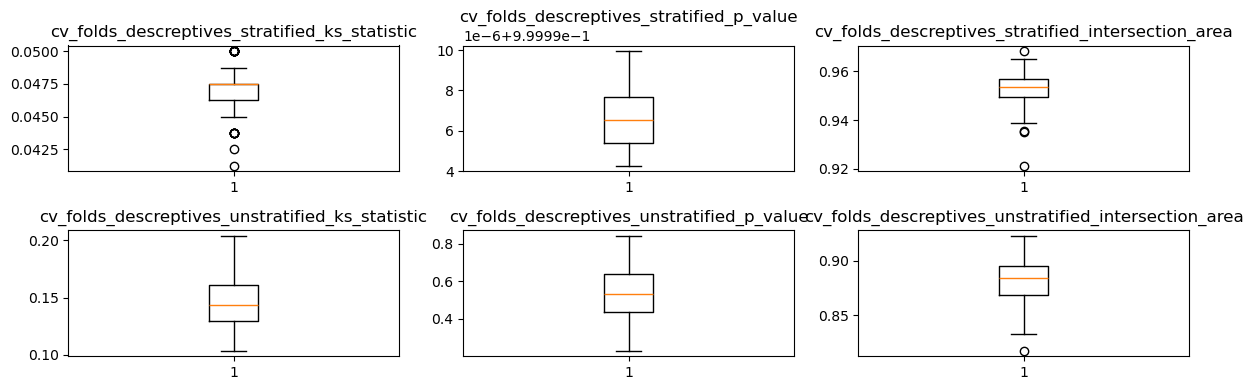

In [123]:
plot_boxblots_descriptives(colum, n_row= 2)

#### cv_unstratified_iterations

In [129]:
key = 'cv_stratified_iterations'
print(key)
colum1 = [col for col in data.columns if key in col]

key = 'cv_unstratified_iterations'
print(key)
colum2 = [col for col in data.columns if key in col]

colum = colum1 + colum2

print(len(colum))

cv_stratified_iterations
cv_unstratified_iterations
32


In [130]:
for c in colum:
    print(len(data[c]), len(data[c][0]))

159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200
159 200


In [131]:
data[colum]

,cv_stratified_iterations_mean_fit_time,cv_stratified_iterations_std_fit_time,cv_stratified_iterations_mean_score_time,cv_stratified_iterations_std_score_time,cv_stratified_iterations_param_min_samples_split,cv_stratified_iterations_param_min_samples_leaf,cv_stratified_iterations_param_max_features,cv_stratified_iterations_params,cv_stratified_iterations_split0_test_score,cv_stratified_iterations_split1_test_score,...,cv_unstratified_iterations_param_max_features,cv_unstratified_iterations_params,cv_unstratified_iterations_split0_test_score,cv_unstratified_iterations_split1_test_score,cv_unstratified_iterations_split2_test_score,cv_unstratified_iterations_split3_test_score,cv_unstratified_iterations_split4_test_score,cv_unstratified_iterations_mean_test_score,cv_unstratified_iterations_std_test_score,cv_unstratified_iterations_rank_test_score
0,"[0.7059784412384034, 0.8557748317718505, 0.672...","[0.04144113159586824, 0.020202126226766978, 0....","[0.042676448822021484, 0.04359965324401856, 0....","[0.0006909122456009852, 0.0010499028378135383,...","[10, 8, 4, 9, 9, 9, 2, 6, 2, 6, 6, 6, 3, 4, 2,...","[6, 2, 8, 6, 5, 10, 10, 5, 2, 10, 10, 8, 10, 1...","[6, 8, 3, 2, 6, 4, 7, 1, 5, 1, 2, 6, 4, 6, 8, ...","[{'min_samples_split': 10, 'min_samples_leaf':...","[-7.007747368475805, -5.679191860635244, -8.58...","[-7.967515187053692, -7.083585707777826, -9.59...",...,"[6, 8, 3, 2, 6, 4, 7, 1, 5, 1, 2, 6, 4, 6, 8, ...","[{'min_samples_split': 10, 'min_samples_leaf':...","[-7.504843477568036, -6.180812730678116, -9.68...","[-6.1379653448302545, -5.428976261710565, -7.1...","[-8.728539765580141, -8.048209837146045, -11.3...","[-5.686813013509616, -5.636769967933281, -5.43...","[-6.289878892666323, -4.923230436382448, -7.37...","[-6.869608098830875, -6.043599846770091, -8.18...","[1.1072074976141073, 1.080350767703119, 2.0684...","[78, 19, 147, 160, 55, 153, 139, 185, 8, 200, ..."
1,"[0.6307601451873779, 0.6703566551208496, 0.683...","[0.046728927895209924, 0.04445347493422719, 0....","[0.04258055686950683, 0.047653913497924805, 0....","[0.0008227371514481044, 0.007886751277839785, ...","[7, 8, 9, 9, 10, 4, 8, 10, 3, 7, 7, 7, 6, 4, 8...","[7, 7, 4, 1, 1, 2, 3, 8, 6, 7, 10, 7, 8, 10, 5...","[1, 1, 3, 8, 1, 2, 6, 2, 5, 6, 7, 5, 6, 5, 8, ...","[{'min_samples_split': 7, 'min_samples_leaf': ...","[-12.986318054792502, -12.986318054792502, -6....","[-12.741754859427248, -12.741754859427248, -6....",...,"[1, 1, 3, 8, 1, 2, 6, 2, 5, 6, 7, 5, 6, 5, 8, ...","[{'min_samples_split': 7, 'min_samples_leaf': ...","[-15.127509215456897, -15.127509215456897, -8....","[-9.75092873040941, -9.75092873040941, -4.6874...","[-21.722362421129365, -21.722362421129365, -12...","[-11.087399532866078, -11.087399532866078, -5....","[-7.780166580506619, -7.780166580506619, -5.19...","[-13.093673296073675, -13.093673296073675, -7....","[4.940105137027289, 4.940105137027289, 2.95471...","[184, 184, 49, 37, 170, 52, 30, 162, 66, 100, ..."
2,"[0.7422111988067627, 0.7697059631347656, 0.655...","[0.054324000927579524, 0.02667125321089471, 0....","[0.047250795364379886, 0.0472602367401123, 0.0...","[0.007681165098141151, 0.007886644297410029, 0...","[8, 10, 5, 2, 10, 9, 6, 3, 5, 6, 5, 8, 4, 4, 7...","[1, 5, 5, 3, 2, 6, 10, 5, 8, 3, 4, 2, 9, 4, 2,...","[6, 6, 2, 2, 8, 8, 6, 1, 8, 4, 1, 8, 2, 7, 7, ...","[{'min_samples_split': 8, 'min_samples_leaf': ...","[-5.908476161336127, -6.664076241161742, -9.19...","[-3.846631087045702, -4.574201249938042, -5.95...",...,"[6, 6, 2, 2, 8, 8, 6, 1, 8, 4, 1, 8, 2, 7, 7, ...","[{'min_samples_split': 8, 'min_samples_leaf': ...","[-5.542898916419066, -6.5448219165453, -7.7673...","[-5.046086391601543, -5.609076993632117, -7.60...","[-4.743109981570337, -5.514802184353156, -7.64...","[-3.7708225037099345, -4.369415337273022, -5.6...","[-6.243392521285025, -6.763505704088466, -9.98...","[-5.069262062917181, -5.760324427178412, -7.72...","[0.8241082189960693, 0.8531815796679582, 1.385...","[20, 65, 157, 124, 48, 73, 132, 189, 109, 44, ..."
3,"[0.8

#### cv_iteration_refit_test'

In [140]:
key = 'cv_iteration_refit_test'
print(key)
colum= [col for col in data.columns if key in col]
colum

cv_iteration_refit_test


['cv_iteration_refit_test_r2',
 'cv_iteration_refit_test_mse',
 'cv_iteration_refit_test_mae']

In [143]:
data[colum]

,cv_iteration_refit_test_r2,cv_iteration_refit_test_mse,cv_iteration_refit_test_mae
0,"[0.79145169, 0.73686025, 0.77042294, 0.6859167...","[6.28281465, 5.4814604, 7.49916004, 8.23182009...","[1.99378646, 1.85690847, 2.20301859, 2.3140953..."
1,"[0.81968618, 0.51756098, 0.51756098, 0.7650269...","[11.51887887, 11.51887887, 5.61029594, 4.74041...","[2.750852, 2.750852, 1.89492849, 1.72864477, 2..."
2,"[0.79910952, 0.79312277, 0.76574337, 0.6960301...","[4.93947145, 5.59319136, 7.25768895, 6.5799388...","[1.77599343, 1.89542031, 2.17896786, 2.0703107..."
3,"[0.77546064, 0.74732781, 0.73595811, 0.7865181...","[6.03288766, 6.30435446, 5.09716557, 5.6234345...","[1.99798242, 2.04988104, 1.82879908, 1.9271991..."
4,"[0.78257415, 0.69604565, 0.66856743, 0.7273418...","[7.25731795, 7.91339726, 6.51007879, 5.5626434...","[2.14830421, 2.2610981, 2.05336884, 1.87105353..."
...,...,...,...
154,"[0.5146469, 0.38999364, 0.50145414, 0.50720717...","[0.05425281, 0.04433973, 0.04382806, 0.0438280...","[0.17724102, 0.15960111, 0.15937858, 0.1593785..."
155,"[0.55047028, 0.53875429, 0.55490021, 0.5290757...","[0.04102232, 0.03958633, 0.04188311, 0.0410796...","[0.15260628, 0.15093529, 0.15476993, 0.1532230..."
156,"[0.56451228, 0.53952269, 0.52726994, 0.5573697...","[0.04095398, 0.04204372, 0.03936669, 0.0392067...","[0.15338716, 0.15460157, 0.1498095, 0.14966105..."
157,"[0.54343089, 0.54270111, 0.42900815, 0.4930208...","[0.0406713, 0.05078293, 0.04508977, 0.04043251...","[0.15261154, 0.17176893, 0.16083684, 0.1521071..."


#### Boxplots Evaluation metrics:  'unstratified_results' and 'stratified_results'

In [101]:
data.iloc[0, :]

model_info_model                                              rf
model_info_n_train                                           200
model_info_n_test                                         100000
model_info_n_features                                          8
model_info_noise                                               0
                                                          ...   
cv_folds_descreptives_unstratified_p_value              0.554928
cv_folds_descreptives_unstratified_intersection_area    0.866526
cv_folds_descreptives_stratified_ks_statistic             0.0475
cv_folds_descreptives_stratified_p_value                0.999997
cv_folds_descreptives_stratified_intersection_area       0.95603
Name: 0, Length: 72, dtype: object

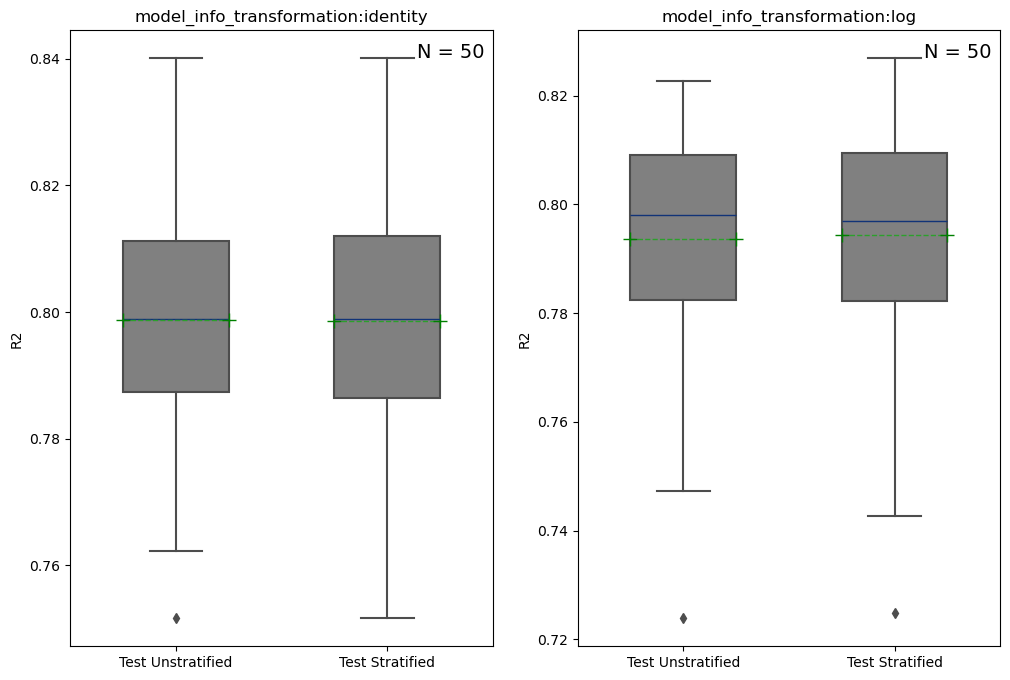

Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'running_time_unstratified', 'running_time_stratified',
       'running_time_repetition', 'cv_unstratified_iterations_mean_fit_time',
       'cv_unstratified_iterations_

TypeError: Could not convert [list([-4.659882072266683, -3.752917286199731, -6.634141473891681, -7.6528588424520425, -4.522501638335774, -6.372201953782304, -5.536104611383689, -10.869946917708623, -3.7393086161074818, -12.69613999585766, -8.945226726432901, -5.241167631976147, -6.372201953782304, -3.6970119735302447, -4.98442169315949, -9.79553575275768, -4.006170219379307, -4.59088723555418, -3.6994962073488424, -3.7796330211195395, -6.1787752071135404, -4.659882072266683, -10.131263104226399, -5.536104611383689, -4.659882072266683, -5.28320897461779, -4.59088723555418, -11.607047328735367, -4.522501638335774, -10.234867534317019, -8.433073902920047, -3.9178503113277356, -4.167750189011038, -5.118337436699437, -3.7572479166599018, -7.268242233292566, -8.623456500570985, -4.349538113773309, -3.9893812590242477, -5.536104611383689, -4.46545120284848, -5.430860285803137, -5.787819919113429, -12.428440004270431, -5.005993089465643, -5.479070571101376, -3.888289684918193, -5.241167631976147, -5.491785319886709, -4.528323476888302, -4.159413156270783, -4.201499753354317, -6.050459800870247, -4.7234204238303885, -4.522501638335774, -4.349538113773309, -4.696673779924543, -3.598481643689273, -3.814994705593707, -10.234867534317019, -6.323889348237997, -4.26126298153231, -6.634141473891681, -4.159413156270783, -6.372201953782304, -8.203542407379043, -4.407869014316937, -4.163443834543334, -6.323889348237997, -12.428440004270431, -4.159413156270783, -5.037174941276769, -4.696673779924543, -6.123345233276087, -8.203542407379043, -5.412374289235673, -4.084113329479695, -11.481784508491597, -6.323889348237997, -5.430860285803137, -5.76513420827118, -4.159413156270783, -3.8410692648895384, -8.945226726432901, -9.382121067812557, -11.95053660474117, -4.522501638335774, -5.479070571101376, -3.9835600527548136, -4.294269093642595, -4.512259220263585, -7.268242233292566, -5.0983300288485385, -4.6009021212820445, -4.26126298153231, -5.259695783880014, -5.491785319886709, -4.620087434574474, -3.7183827101171048, -5.76513420827118, -6.555391974567345, -6.123345233276087, -6.866635458949434, -3.5508096004659477, -5.491785319886709, -11.481784508491597, -6.634141473891681, -3.7317414884164846, -4.349538113773309, -4.349538113773309, -10.869946917708623, -4.784422094740757, -11.481784508491597, -5.2374711734228345, -4.465486478353046, -7.268242233292566, -9.79145144472242, -4.522501638335774, -4.159413156270783, -12.428440004270431, -11.95053660474117, -4.163443834543334, -5.981574515996874, -11.481784508491597, -4.659882072266683, -4.498141152473635, -5.037174941276769, -5.031334505063336, -4.069566179921639, -3.9938430505475395, -5.079273177254355, -5.430860285803137, -4.193262021092421, -8.433073902920047, -4.844697603472357, -6.976540957139298, -5.259695783880014, -5.358903253993044, -4.620087434574474, -6.634141473891681, -4.069566179921639, -6.386256295623677, -5.0983300288485385, -5.787819919113429, -4.108612371687564, -6.323889348237997, -10.382405483096095, -7.268242233292566, -3.9782531823613154, -6.976540957139298, -5.148605950530616, -4.616135895477706, -4.084113329479695, -4.522501638335774, -6.634141473891681, -5.76513420827118, -11.481784508491597, -3.9236657169537623, -11.607047328735367, -4.696673779924543, -5.479070571101376, -6.634141473891681, -7.6528588424520425, -5.28320897461779, -5.536104611383689, -7.100171695925131, -5.491785319886709, -3.729854563120803, -5.981574515996874, -7.870323196371833, -9.79145144472242, -4.659882072266683, -5.536104611383689, -10.654705988166437, -4.7234204238303885, -5.787819919113429, -5.037174941276769, -12.428440004270431, -4.114492966581789, -6.976540957139298, -6.4458954628280996, -4.98442169315949, -6.10648430194726, -4.659882072266683, -5.148605950530616, -5.730682555618456, -5.241167631976147, -3.974753388024059, -4.131012698060216, -5.037174941276769, -5.730682555618456, -5.222519901748858, -5.222519901748858, -5.148605950530616, -8.433073902920047, -4.46545120284848, -5.981574515996874, -10.58648954607968, -5.430860285803137, -4.620087434574474, -12.216218733585894, -12.216218733585894, -6.463007115658405, -6.548238811819265, -10.106516774034313, -6.778833109611268, -6.119242845889633, -8.694862976479651, -6.401571344152688, -7.007025025752517, -8.387779815519602, -6.779988897288777, -7.281572277443351, -7.751036882178698, -6.574932301899222, -6.57533579044072, -6.917343441891797, -7.589591380689744, -6.57533579044072, -6.100881885710088, -12.216218733585894, -6.313632960650425, -6.178292347245417, -6.224204911634564, -8.194668085596499, -5.676023237388437, -6.411314730536984, -5.977539321999744, -6.401571344152688, -5.677755939940935, -10.024223840895212, -12.233811096527386, -5.765802738236762, -7.281572277443351, -6.508573333453008, -7.440879831625011, -7.440879831625011, -7.007025025752517, -7.007025025752517, -6.150829044967288, -8.53158366991794, -6.9228192076726485, -6.256615690141617, -7.973761845614663, -6.917343441891797, -6.848843437796328, -6.340195810667141, -12.216218733585894, -12.95156077181116, -6.079217612768285, -6.053725435072049, -7.545496767978676, -6.1976887700785905, -7.573720657464834, -6.079217612768285, -5.736474814989439, -10.011104566924416, -11.718907997070263, -7.696463386286533, -6.917343441891797, -6.508573333453008, -6.377143669135605, -7.315207060945821, -6.349889254645619, -7.696463386286533, -7.302499835480501, -8.055001976621956, -7.696463386286533, -12.233811096527386, -7.302499835480501, -6.252960424814347, -7.440879831625011, -6.272496176534441, -12.216218733585894, -7.186393368072845, -6.108954256798098, -7.302499835480501, -6.167330858721603, -6.349889254645619, -7.186393368072845, -10.916655887197336, -7.243622915645808, -8.694862976479651, -5.6637995599007525, -7.007025025752517, -11.303404099971358, -10.259780849638066, -6.574932301899222, -5.7660727901633155, -8.529764445041723, -8.058577647111749, -9.098589563720619, -7.751036882178698, -6.1976887700785905, -12.905634257937631, -6.256615690141617, -6.239059897559846, -12.233811096527386, -6.313632960650425, -6.856521419878976, -7.281572277443351, -8.387779815519602, -7.440879831625011, -7.150637584568966, -7.315207060945821, -8.055001976621956, -5.987094605748432, -12.95156077181116, -7.3791033912914346, -9.157467832850614, -12.95156077181116, -7.243622915645808, -9.912783660729431, -6.779988897288777, -7.881249280115961, -5.88531284571281, -6.539651774317872, -7.150637584568966, -7.3791033912914346, -6.574932301899222, -6.77574391755781, -6.079217612768285, -6.9228192076726485, -7.973761845614663, -7.302499835480501, -7.545496767978676, -11.718907997070263, -8.058577647111749, -6.48625346668977, -7.573720657464834, -5.746965416513599, -7.679657035404477, -5.55553710597946, -7.67603088485609, -11.303404099971358, -7.440879831625011, -12.233811096527386, -12.905634257937631, -7.022445990445391, -8.126731043908059, -7.545496767978676, -7.3791033912914346, -5.527908501539318, -6.401571344152688, -10.940647912820683, -5.989359147457796, -8.694862976479651, -8.529764445041723, -7.67603088485609, -5.87587788310204, -7.3791033912914346, -12.95156077181116, -6.150829044967288, -6.395414543456942, -6.539651774317872, -7.267435353781383, -10.288053193289594, -7.679657035404477, -8.055001976621956, -6.058106807838337, -6.171673732499806, -5.6224790981055195, -11.718907997070263, -9.157467832850614, -7.589591380689744, -6.144611840514349, -9.511360235332006, -12.95156077181116, -6.848843437796328, -7.243622915645808, -8.53158366991794, -6.779988897288777, -5.960191559386947, -7.696463386286533, -6.848843437796328, -7.022445990445391, -9.157467832850614, -7.3791033912914346, -11.718907997070263, -10.862395122169755, -8.194668085596499, -5.8735936477783275, -7.89960033959714, -5.938192219634145, -7.881249280115961, -6.505950834854062, -5.710214370611444, -7.387689444720794, -6.895990509910578, -7.022445990445391, -6.712737993640663, -7.881249280115961, -6.6301812681594825, -7.589591380689744, -8.387779815519602, -5.8735936477783275, -6.08654534015539, -12.216218733585894, -6.508573333453008, -6.377143669135605, -4.606913032515061, -5.464470782750803, -7.672860927801966, -6.63207297956845, -4.74185486368094, -5.711681000524704, -6.865066333056939, -11.20882854265982, -6.287486855518794, -4.869591019819684, -10.634159034845187, -4.537573536172507, -9.482053615648395, -4.998863418554532, -4.503390830002222, -9.89824961713039, -4.809859487374775, -10.161805601230276, -6.279352378645841, -7.426304389685401, -4.701535423358959, -4.809859487374775, -10.161805601230276, -11.984464769697928, -6.108224028679883, -12.369219905711592, -6.9366845996207305, -6.879386629342335, -5.469354145647922, -4.435679823055031, -5.469354145647922, -5.270390794787348, -5.999749665391134, -6.711631808225785, -4.36129576894714, -4.389923692845302, -4.652403639447688, -4.973237967296843, -5.884388640232453, -5.228266477717019, -7.426304389685401, -4.758543354878609, -9.140932102080791, -6.437683275238884, -7.426304389685401, -8.304552782923228, -6.809211982771882, -6.809211982771882, -7.05400419522955, -5.598734954569154, -5.386559488662917, -5.76446871098441, -4.663157509621013, -6.557982242259041, -7.672860927801966, -4.638429537387554, -4.783211996124332, -6.243649156341045, -9.140932102080791, -10.161805601230276, -6.065089448629557, -12.739201238162812, -12.739201238162812, -6.108224028679883, -6.711631808225785, -8.10090601810728, -4.734759863945005, -6.187476414556905, -9.77237426824269, -6.279352378645841, -8.16152195171969, -5.337673763533709, -5.76446871098441, -6.570551568529018, -13.33718094660973, -8.10090601810728, -6.014839037216881, -8.10090601810728, -5.005342359671797, -6.771795844967211, -5.411668296393115, -6.554155626870849, -4.766824054765158, -6.63207297956845, -6.187476414556905, -4.998863418554532, -4.597781458233814, -5.868875505550132, -4.299613662893689, -4.603694700909134, -12.369219905711592, -6.279352378645841, -5.999749665391134, -6.666720134865119, -6.771795844967211, -6.809211982771882, -5.253025647104259, -6.014839037216881, -4.446136615571566, -5.464470782750803, -4.446136615571566, -7.426304389685401, -5.649304016598386, -13.33718094660973, -11.984464769697928, -5.7605223481427865, -6.065089448629557, -9.77237426824269, -4.861843274428787, -4.318390651597135, -4.833696896989762, -5.711681000524704, -9.140932102080791, -4.697316224988616, -6.566988009942854, -4.350906551660937, -8.10090601810728, -6.065089448629557, -5.711681000524704, -6.187476414556905, -5.073562066572216, -4.93057620977668, -4.597781458233814, -6.570551568529018, -5.868875505550132, -10.315898107052233, -6.566988009942854, -5.529564305753426, -6.014839037216881, -5.6390802986950606, -5.59405172188486, -7.710109547310125, -4.446136615571566, -5.321842797048526, -4.516309856317841, -6.014839037216881, -7.091445741950594, -7.091445741950594, -6.666720134865119, -5.6390802986950606, -5.464470782750803, -7.370002367565374, -10.634159034845187, -4.491979905697716, -5.790416744205684, -6.108224028679883, -4.598913337774866, -4.32357877457909, -7.124472397595525, -9.036385522944444, -8.726474920635042, -6.9366845996207305, -4.91818103311834, -9.686375556848176, -7.710109547310125, -6.809211982771882, -11.20882854265982, -4.869591019819684, -12.369219905711592, -12.739201238162812, -4.679207956942523, -4.406048187301804, -6.765449954061019, -7.370002367565374, -5.790416744205684, -4.389840336341756, -4.351270206803919, -6.554155626870849, -4.6295973651831375, -6.9366845996207305, -7.672860927801966, -6.771795844967211, -7.118682277524419, -9.78146876417179, -6.187476414556905, -6.666720134865119, -6.865066333056939, -6.865066333056939, -9.326455851637471, -9.77237426824269, -4.998863418554532, -6.666720134865119, -4.679207956942523, -4.535443219402749, -5.005342359671797, -6.27216191792163, -7.118682277524419, -4.66005829636943, -4.8854520260429295, -9.140932102080791, -6.437683275238884, -8.644180446581526, -5.76446871098441, -5.464470782750803, -6.9366845996207305, -6.437683275238884, -4.577077836621563, -7.091445741950594, -5.868875505550132, -5.760534915677222, -9.173090381170285, -8.441951804878796, -8.52087046463147, -9.03917800132283, -8.441951804878796, -7.825909667349133, -8.829636239537708, -9.523029593062427, -10.357229800626808, -9.743115809656034, -13.733354060728583, -8.804856204994206, -13.733354060728583, -9.57496035692164, -11.217643395795907, -8.993341805949395, -12.511483304624287, -10.332353894774755, -12.101166524388482, -8.236508649072132, -13.733354060728583, -11.217643395795907, -9.52771166227644, -8.465588674972555, -10.234714325587955, -10.774847771224835, -10.406418256909557, -10.11996120511759, -9.81779884302399, -9.90224343628129, -11.217643395795907, -7.975332363436773, -10.332353894774755, -9.966589838529995, -8.1460842710803, -10.65090083027036, -9.858002239954223, -9.964530903612546, -10.952857901397692, -8.502658066121187, -10.013465075645733, -8.88490092911004, -8.285007835130752, -10.631547699276291, -11.24978763084992, -13.39660985485953, -9.088775915042442, -9.523029593062427, -12.511483304624287, -8.892368009004405, -10.868927045576692, -8.275539812115024, -9.137843474100622, -8.334710714262092, -9.000327156938537, -9.165056398037228, -8.912996358998353, -8.68984787052338, -8.222699749160718, -10.18382853643214, -8.804856204994206, -10.391145377926637, -9.088775915042442, -10.357229800626808, -10.631547699276291, -10.357229800626808, -8.644441067024273, -8.804856204994206, -10.013465075645733, -10.18382853643214, -11.687322169709939, -10.824791830224006, -10.52941600823431, -10.521707229838492, -9.256432612327135, -9.481090253093155, -12.809607920783742, -8.547055404281458, -9.743115809656034, -11.234115964389591, -10.357229800626808, -9.525872756116986, -9.57496035692164, -8.63683886247652, -10.357229800626808, -8.489286455050138, -13.39660985485953, -8.975658882818653, -9.858002239954223, -9.165056398037228, -9.035701170696784, -10.521707229838492, -8.42981599591493, -8.421106559748825, -9.096222808222981, -9.125077258008155, -9.523029593062427, -12.511483304624287, -9.33898768031795, -7.871980775173836, -10.18382853643214, -10.234714325587955, -9.165056398037228, -10.406418256909557, -8.827916300467843, -9.092413295876295, -8.804856204994206, -11.025958830926601, -7.8672455688547585, -9.610382572443868, -9.533510921165444, -8.864426069392227, -9.23360787474818, -9.062952996517552, -10.774847771224835, -11.24978763084992, -10.952857901397692, -7.9697466831109605, -9.743115809656034, -9.173090381170285, -9.966589838529995, -8.512472250253808, -9.33898768031795, -10.11996120511759, -10.52941600823431, -8.605980754701225, -9.964530903612546, -10.11996120511759, -9.165056398037228, -9.523029593062427, -10.406418256909557, -12.101166524388482, -10.952857901397692, -9.179595022263294, -9.966589838529995, -8.98612074175637, -9.28859756415514, -8.671222172307239, -8.334710714262092, -9.858002239954223, -10.406418256909557, -9.256432612327135, -8.46780346165769, -8.616595099250429, -10.357229800626808, -10.774847771224835, -9.173090381170285, -12.511483304624287, -11.025958830926601, -11.119130206903355, -7.966457857529067, -10.52941600823431, -11.119130206903355, -9.000828477644298, -11.094901882563068, -8.83910082957047, -9.165056398037228, -9.858002239954223, -9.021232502610255, -9.44656023801318, -9.03917800132283, -11.025958830926601, -10.530499061901157, -10.11996120511759, -10.234714325587955, -9.33898768031795, -9.44656023801318, -10.275144274296048, -12.809607920783742, -9.44656023801318, -9.182600192225417, -10.952857901397692, -8.429803802402066, -10.391145377926637, -13.39660985485953, -10.332353894774755, -8.421106559748825, -8.804856204994206, -13.02978659191856, -9.201933615594639, -8.581715090866357, -9.44656023801318, -8.179933147019373, -9.610382572443868, -8.802096302938086, -10.013465075645733, -9.525872756116986, -9.525872756116986, -9.675277012216513, -10.631547699276291, -10.631547699276291, -9.966589838529995, -9.251306636526044, -9.858002239954223, -8.384168703562327, -11.687322169709939, -10.521707229838492, -10.677891244914557, -12.101166524388482, -9.858002239954223, -7.634170229403203, -8.416034762972503, -7.12471557228919, -5.984169133041313, -5.974114965350377, -10.589008067918384, -5.69391840185848, -7.236298753550604, -9.225956657152233, -13.199012236227356, -7.792954619483114, -6.534851661512414, -12.871723172707945, -8.14120390674886, -5.736875119473395, -6.208786767268275, -9.549598532941898, -5.642375117768583, -11.126561339807859, -6.866565665845333, -5.778048342561905, -6.593881615648998, -6.866565665845333, -5.613511959518915, -7.3281691982034545, -8.226746843663003, -8.14120390674886, -9.225956657152233, -7.468732488071048, -5.809417776129483, -12.871723172707945, -6.593881615648998, -6.866565665845333, -5.563835646215606, -11.569054522031404, -12.303552665852788, -6.563640151592809, -7.3324271472078575, -8.103348372652963, -9.909130947178387, -8.608965982017919, -11.569054522031404, -9.549598532941898, -12.303552665852788, -7.44688969965573, -5.839826511335033, -8.608965982017919, -5.961476642161974, -9.225956657152233, -13.199012236227356, -7.792954619483114, -8.416034762972503, -5.644176160276068, -6.0878541491351, -5.428644797793062, -12.871723172707945, -7.294257612132253, -9.225956657152233, -5.9936537190514825, -6.563640151592809, -6.91734276240885, -7.236298753550604, -8.96756165350816, -7.949036297474121, -7.294345497076796, -7.949036297474121, -5.953824271183246, -6.97519110203203, -9.225956657152233, -7.175278575017058, -5.734019191008732, -6.43790493967555, -7.4898893053054945, -9.549598532941898, -7.3324271472078575, -7.792954619483114, -5.745731406498814, -6.97519110203203, -6.207376776675192, -7.468732488071048, -7.8950309593438135, -7.873791562425924, -5.426818655710031, -5.875630539550997, -12.303552665852788, -8.073585902681824, -7.44688969965573, -8.608965982017919, -12.303552665852788, -5.686033812962866, -8.14120390674886, -11.989420524981153, -6.566412793154538, -7.792954619483114, -7.015899178104261, -5.654743782260963, -10.589008067918384, -7.791704228389466, -7.873791562425924, -7.949036297474121, -5.226878025512267, -7.468732488071048, -6.147575789602621, -8.394845464132112, -8.394845464132112, -6.6016572959534106, -9.549598532941898, -8.103348372652963, -5.7798699698589715, -6.6016572959534106, -6.866565665845333, -6.157538333059819, -7.791637676278626, -8.103348372652963, -8.073585902681824, -5.700346589223443, -5.5188909302254086, -5.6709225599556525, -5.618357179839618, -5.497268058794499, -8.378073365812872, -7.873791562425924, -12.303552665852788, -5.734019191008732, -8.394845464132112, -6.6016572959534106, -7.634170229403203, -6.419356749882889, -5.821314447017559, -5.50155705359081, -6.43790493967555, -5.810570853671171, -9.721497091355683, -6.0878541491351, -5.888441510804215, -8.502898621019193, -6.97519110203203, -5.9098754859401135, -8.416034762972503, -7.12471557228919, -5.778048342561905, -11.569054522031404, -7.576978413122086, -6.157538333059819, -12.871723172707945, -7.791637676278626, -8.073585902681824, -7.608940360919189, -6.43790493967555, -6.711269530217112, -9.549598532941898, -5.806259413794973, -7.949036297474121, -9.496296077413387, -6.711269530217112, -7.8950309593438135, -10.077970144286232, -5.878537290708597, -7.175278575017058, -7.468732488071048, -5.9382117175763085, -9.560703320430928, -11.989420524981153, -8.14120390674886, -5.810109988340811, -7.634170229403203, -7.576978413122086, -8.202056701450532, -7.949036297474121, -12.871723172707945, -6.125467095723379, -5.457263050455848, -6.008156087924651, -7.584198405454418, -8.226746843663003, -6.610554675009013, -6.859831481405619, -7.175278575017058, -7.62901247651701, -6.563640151592809, -8.502898621019193, -12.303552665852788, -7.576978413122086, -7.468732488071048, -9.909130947178387, -8.036964461896236, -7.294345497076796, -9.909130947178387, -6.91734276240885, -8.394845464132112, -7.885645575083638, -8.073585902681824, -7.236298753550604, -5.734019191008732, -6.125467095723379, -5.515909064096403, -6.207376776675192, -5.620456740549021, -7.576978413122086, -5.734019191008732, -5.721262330840567, -4.748327943590018, -5.114154724358231, -3.8125130584187743, -10.76907997658311, -5.379561917691578, -6.960469098613013, -5.052876145608233, -6.570345064497529, -13.424021926250106, -4.5008954079491605, -5.133421561341218, -5.545042101248941, -5.94015996894081, -4.074584569810659, -3.9714788030771375, -4.23084067762724, -5.94015996894081, -13.871699692614456, -4.6488125161531135, -6.284331047765656, -4.148132389084475, -6.074539912754043, -4.694781318946696, -6.960469098613013, -5.721262330840567, -5.222825927108579, -8.5168417346473, -6.189350611293134, -5.379561917691578, -4.000144514488722, -12.005592219296114, -6.1619785665485605, -4.706379901763348, -5.038369312822811, -7.646749486265088, -6.960469098613013, -7.7709840227732885, -4.5008954079491605, -4.587503869013547, -4.328091436306642, -5.874562354100978, -4.740608859339351, -6.670484158587486, -5.855314280650385, -4.974116932066352, -5.584158197657997, -6.950481144608409, -5.114154724358231, -5.052876145608233, -6.1619785665485605, -5.94015996894081, -4.388137063350946, -13.157678022582791, -9.168779775999734, -4.629543876546201, -8.5168417346473, -4.041906100587864, -6.060193276822561, -6.950481144608409, -5.721262330840567, -7.646749486265088, -4.9369701372690935, -3.8489018058350952, -4.264144479183708, -5.522839636123438, -5.584158197657997, -13.157678022582791, -5.615139796619663, -7.646749486265088, -9.533010102079619, -8.40288721995529, -4.384334134772891, -5.408262312705054, -12.344071803870884, -4.093287565570596, -3.985774866807026, -5.222825927108579, -13.871699692614456, -4.388137063350946, -5.379561917691578, -7.341580242950826, -5.855314280650385, -4.475364147630083, -4.602039787869999, -6.1619785665485605, -12.344071803870884, -4.285263232674223, -12.005592219296114, -5.662655351214317, -11.342008853491516, -4.041705758056849, -5.172552369356164, -4.323541919699015, -4.178204967211505, -11.380282659735022, -5.8026045035832725, -6.074539912754043, -6.1619785665485605, -4.694781318946696, -10.36260682542657, -6.91974968102681, -6.570345064497529, -12.005592219296114, -5.1562953174861965, -6.060193276822561, -9.168779775999734, -5.317493375179048, -5.408262312705054, -11.342008853491516, -6.570345064497529, -4.202173714247856, -5.563465654850868, -4.385682493745705, -6.960469098613013, -5.038369312822811, -5.437602018230082, -5.317493375179048, -4.556297287353608, -6.363414978116722, -4.035195565821498, -4.504154255870821, -4.974116932066352, -6.189350611293134, -6.189350611293134, -6.1619785665485605, -6.322368629091804, -5.222825927108579, -4.016488407863802, -4.512884816291491, -4.202173714247856, -10.63444848605113, -4.130831579802256, -4.547225692826363, -6.570345064497529, -4.9369701372690935, -5.970736608309853, -4.074584569810659, -5.584158197657997, -8.40288721995529, -3.9865519217665026, -5.94015996894081, -4.9036813342015675, -6.91974968102681, -6.274897188022218, -5.407795430694525, -5.204850511727559, -4.615638187729767, -6.91974968102681, -5.038369312822811, -8.5168417346473, -4.706379901763348, -7.646749486265088, -5.874562354100978, -5.088023567383452, -5.095418815706293, -6.074539912754043, -5.8026045035832725, -12.344071803870884, -4.328091436306642, -8.40288721995529, -6.274897188022218, -9.547653155461884, -4.5851508719694465, -4.694781318946696, -5.584158197657997, -4.388137063350946, -5.172552369356164, -8.773004468979526, -5.874562354100978, -5.8026045035832725, -4.495604646366253, -3.9297661834553326, -9.547653155461884, -6.91974968102681, -12.344071803870884, -4.241608047145296, -6.91974968102681, -6.950481144608409, -4.358172441759671, -4.974116932066352, -4.486584568370762, -5.563465654850868, -5.615139796619663, -5.563465654850868, -6.675586818928383, -5.1562953174861965, -6.060193276822561, -4.323541919699015, -6.074539912754043, -6.060193276822561, -4.706379901763348, -5.114154724358231, -13.157678022582791, -4.117586184533742, -7.341580242950826, -3.8489018058350952, -7.646749486265088, -6.570345064497529, -4.706379901763348, -3.378486752087535, -7.743326713507483, -3.2209761462544195, -3.3033120666148696, -3.5077503778092036, -3.6600852078961426, -7.782422597437943, -3.621614151502848, -4.066566868323824, -3.3335107160622486, -3.9549404593157775, -3.7663051258412708, -4.206265034511167, -5.211467660109191, -7.339850503726515, -5.130961179475715, -3.2375729584085122, -3.743620614900513, -5.522231821131845, -5.130961179475715, -3.3101273863730305, -3.743620614900513, -11.883809905114807, -4.431462707740444, -3.4497902896851067, -3.2263614219604575, -6.274167451689675, -3.757930005165556, -4.931245406835691, -3.464000991068535, -4.698316295365244, -4.529810044703618, -3.9779663428206873, -3.5630902563329925, -4.5582462750592025, -3.401783010765469, -3.0370622123753654, -3.851637948311086, -3.2294375012564287, -3.1259088764728697, -4.271650727185201, -3.277298987006975, -3.5219960410639914, -3.3943104671724442, -3.224382413581388, -4.984026190776343, -3.6066823124972602, -4.711052522690322, -11.082116370454608, -3.497816565234758, -4.197234102306836, -10.098734997904177, -3.7056885147854075, -3.1741020444296013, -4.99961837890314, -5.130961179475715, -5.422400587294815, -5.166028321516896, -3.3137292276135817, -5.316015856274471, -6.696238087477022, -4.931245406835691, -4.5582462750592025, -3.889561095692174, -4.206265034511167, -4.066566868323824, -7.339850503726515, -5.185205589036263, -4.8807030591575415, -5.0659861610728125, -5.166028321516896, -4.361457963368536, -3.3137292276135817, -4.931245406835691, -3.5630902563329925, -3.370547096579341, -3.871586865947988, -3.410136037925915, -4.509068077806157, -3.9245479338917932, -4.935799257167583, -7.630153664009481, -9.209107520292834, -3.743620614900513, -5.166028321516896, -4.99961837890314, -4.509068077806157, -4.931245406835691, -4.2936026588415865, -3.276810381071852, -5.422400587294815, -4.197234102306836, -4.361457963368536, -4.014399926608112, -8.400726036605349, -5.536976548851142, -8.768586701302677, -4.284846353719148, -3.871586865947988, -4.2936026588415865, -7.339850503726515, -6.298476871548481, -4.361457963368536, -5.522231821131845, -3.5077503778092036, -3.621614151502848, -3.892081937082905, -6.920910624835573, -5.211467660109191, -12.359723695866112, -3.635753732020471, -4.271650727185201, -4.066566868323824, -7.782422597437943, -5.846726902379691, -4.935799257167583, -4.014399926608112, -3.621614151502848, -3.24517187819889, -3.889561095692174, -3.9779663428206873, -4.904283053817023, -7.743326713507483, -4.805304535020506, -4.904283053817023, -5.536976548851142, -3.871586865947988, -4.431462707740444, -3.889561095692174, -3.757930005165556, -3.4218219790811646, -2.9528414756685786, -10.098734997904177, -3.7432524306550037, -3.4582291818514954, -3.4452638365576282, -3.5728016616823766, -10.098734997904177, -4.197234102306836, -4.935799257167583, -3.032701765209565, -8.118777152885016, -3.0683316362061186, -4.711052522690322, -3.9779663428206873, -4.935799257167583, -4.197234102306836, -4.066566868323824, -5.211467660109191, -4.8807030591575415, -10.551162938776823, -11.082116370454608, -8.302380417370983, -3.46064233305824, -8.379686375257588, -5.840292879160695, -3.851637948311086, -3.5077503778092036, -6.298476871548481, -5.840292879160695, -4.014399926608112, -8.962470748363922, -5.211467660109191, -4.68708723505985, -3.8916859287972043, -3.2375729584085122, -3.5411002514479266, -4.361457963368536, -4.206265034511167, -4.931245406835691, -3.464000991068535, -5.191623899345648, -4.8807030591575415, -5.422400587294815, -5.0448989907825865, -5.191623899345648, -3.4688357620779016, -3.1105205577652986, -3.109158163686283, -6.920910624835573, -5.245592714103628, -4.5582462750592025, -3.3335107160622486, -3.889561095692174, -4.935799257167583, -4.935799257167583, -4.5582462750592025, -4.509068077806157, -3.3497724453260154, -5.245592714103628, -12.359723695866112, -5.536976548851142, -5.422400587294815, -4.68708723505985, -3.1512029443580665, -3.635753732020471, -5.211467660109191, -5.130961179475715, -4.529810044703618, -5.130961179475715, -5.911944680724597, -5.912541874533843, -6.476909808852949, -5.059947634861231, -6.335984816432994, -6.081560932862774, -5.592695054053871, -8.09951351404381, -5.222639495874586, -6.808853365483619, -7.354399689929177, -12.12949990198197, -6.55264679555884, -7.61771852807049, -5.72318208783227, -6.023576190792249, -5.247748023327065, -5.712835252380796, -6.359154861417809, -5.749221259269572, -7.17969298979141, -5.677763657584429, -4.779566446331271, -6.905469526175203, -5.513714574309462, -5.977374311215549, -5.336519016912227, -5.694181342769204, -5.464834021113532, -8.197596900507424, -7.031884934333172, -12.12949990198197, -6.387159315042534, -7.80976016370831, -5.663803238852415, -9.422959849887908, -5.8901269030700485, -8.355770960978749, -8.562205753538631, -5.5057934089568, -7.80976016370831, -6.476909808852949, -6.798418522468073, -6.808853365483619, -6.586844930021419, -8.91943667634277, -6.359154861417809, -7.17969298979141, -5.912541874533843, -9.477337414890195, -5.6765591133568245, -9.146818100471588, -6.777442653659806, -6.476909808852949, -6.387159315042534, -5.46480832033023, -5.53473903503437, -7.4609707537512975, -8.562205753538631, -7.17969298979141, -6.327310231222686, -6.060307394662167, -5.652487004212386, -8.09951351404381, -6.586844930021419, -6.853418365866962, -5.677763657584429, -7.17969298979141, -4.913715950133598, -12.12949990198197, -5.16098322953624, -5.486454316495466, -6.610279054593734, -7.336027375171025, -7.4609707537512975, -6.853418365866962, -7.4609707537512975, -5.4500437163345925, -6.739446048481497, -5.8117186663904175, -9.146818100471588, -5.59674017951615, -5.4500437163345925, -5.222639495874586, -5.614727700071496, -9.367868734270349, -5.6765591133568245, -5.486454316495466, -12.93308745632811, -5.61940734516495, -5.896453818047531, -5.486454316495466, -6.500166406007608, -6.500166406007608, -5.830065495198011, -5.975887799272575, -8.197596900507424, -12.549718786637083, -7.039847238968162, -12.549718786637083, -5.452411575998019, -6.500166406007608, -7.80976016370831, -5.515170322090521, -7.039847238968162, -6.042322379778513, -7.354399689929177, -5.757241378100344, -5.2225224038515865, -12.549718786637083, -6.798418522468073, -7.61771852807049, -5.977374311215549, -5.727287793846773, -6.193517182681605, -6.798418522468073, -7.80976016370831, -6.192510253548448, -8.355770960978749, -6.157368417006495, -6.359154861417809, -6.586844930021419, -11.712624165251494, -6.586844930021419, -5.669202764777831, -6.739446048481497, -5.170127446088763, -9.989950146693271, -5.8901269030700485, -8.562205753538631, -8.09951351404381, -9.777354330011917, -6.739446048481497, -6.133337632954182, -6.55264679555884, -5.6326784796630225, -7.614951016500916, -6.359154861417809, -12.549718786637083, -5.61940734516495, -5.247748023327065, -5.435222907616914, -5.749221259269572, -4.916153786246711, -5.212941547951088, -6.610279054593734, -6.476909808852949, -6.023576190792249, -6.023576190792249, -6.081560932862774, -5.740544611897518, -5.057721298222448, -7.039847238968162, -6.335984816432994, -6.1508116870123315, -5.275541123056489, -12.12949990198197, -5.397532972489769, -6.946900212978832, -11.712624165251494, -6.500166406007608, -6.312475558919774, -6.192510253548448, -8.197596900507424, -6.387159315042534, -7.61771852807049, -11.712624165251494, -8.197596900507424, -5.518893406182198, -5.706178117754915, -12.12949990198197, -5.26728322775606, -7.17969298979141, -8.562205753538631, -5.663803238852415, -6.55264679555884, -7.311270563527442, -7.747142097459869, -7.354399689929177, -5.977374311215549, -5.275541123056489, -5.749221259269572, -8.985002382814624, -5.398943274617383, -6.905469526175203, -6.327310231222686, -6.500374225863034, -6.777442653659806, -11.712624165251494, -10.442322786653552, -7.311270563527442, -8.91943667634277, -11.712624165251494, -5.553590852231423, -9.146818100471588, -6.808853365483619, -5.179750376159498, -5.749221259269572, -5.101863358132433, -5.333121049508958, -6.525631827071706, -5.848011821085668, -7.962914077514666, -6.9708570433741786, -7.673987234243998, -9.403391915749037, -5.099737956914615, -11.541881056125785, -4.833028650103509, -6.974730635583535, -6.525631827071706, -7.747279477560286, -6.386312027692994, -5.472586786632439, -6.002976054212229, -10.124310969617966, -12.023199875850818, -4.986656120238211, -7.673987234243998, -6.091445060041436, -6.773306709603017, -5.96367425486112, -5.766686531511141, -5.59312382973007, -6.974730635583535, -5.1755294099798, -12.699885367648708, -6.525631827071706, -7.342444633019518, -5.048116253634414, -7.046165273885032, -9.092841962797213, -6.869800925127324, -6.002976054212229, -7.342444633019518, -11.017519847083621, -11.541881056125785, -4.8760029234239965, -5.105225458348668, -5.068121969807747, -7.585075672384285, -7.342444633019518, -7.034922766216306, -6.851591328327229, -8.131973242842253, -5.185353354121301, -7.448092622660802, -4.9577617479441205, -6.164383976568518, -5.067075617087612, -6.912555093317181, -7.046165273885032, -6.81924961086077, -9.91669760261341, -5.554600776054677, -11.22837297460006, -5.353998100788728, -7.034922766216306, -13.751062159933008, -5.848011821085668, -7.346621430550115, -9.91669760261341, -6.773306709603017, -6.773306709603017, -7.747279477560286, -8.602255919240553, -6.831505775468552, -7.962914077514666, -5.766686531511141, -13.751062159933008, -7.034922766216306, -7.105724240784154, -6.912555093317181, -6.912555093317181, -13.751062159933008, -12.023199875850818, -5.185353354121301, -5.448839565402992, -4.968526229378172, -8.602255919240553, -14.124172649125489, -7.105724240784154, -6.159813130915763, -9.403391915749037, -5.027347940325031, -4.757311716362697, -7.20499248443723, -13.295575155885576, -5.692127670703403, -4.774270422829288, -5.005202817047005, -7.099704090874719, -6.503860725574677, -8.131973242842253, -5.872576424937719, -6.5693097191799605, -5.692127670703403, -6.249977988879798, -5.9400908361284275, -5.530534573354236, -7.448092622660802, -5.549592223048343, -7.046165273885032, -5.766686531511141, -7.876767501091644, -5.872576424937719, -8.602255919240553, -10.843657829102739, -6.974730635583535, -13.295575155885576, -5.46818627161449, -6.074086421134829, -4.92694173151047, -6.81924961086077, -6.869800925127324, -7.346621430550115, -4.781360015009272, -5.692127670703403, -7.876767501091644, -7.105724240784154, -6.831505775468552, -12.023199875850818, -5.692127670703403, -7.034922766216306, -5.192488841672732, -11.017519847083621, -6.9708570433741786, -6.164383976568518, -5.152281111204659, -5.96367425486112, -4.956182004810572, -7.27451227267119, -6.074086421134829, -5.624563040811903, -6.9708570433741786, -7.099704090874719, -7.585075672384285, -6.525631827071706, -4.789645120760866, -11.017519847083621, -6.525631827071706, -5.18396129053231, -8.602255919240553, -7.281290599870563, -4.842043357200928, -9.142554245590334, -7.099704090874719, -5.9400908361284275, -12.699885367648708, -6.503860725574677, -13.751062159933008, -5.529352671456352, -7.747279477560286, -7.20499248443723, -7.346621430550115, -6.773306709603017, -7.346621430550115, -11.017519847083621, -10.687321234760082, -10.124310969617966, -7.962914077514666, -5.445568829401646, -7.585075672384285, -5.265507439768812, -7.046165273885032, -5.061483547269202, -9.403391915749037, -7.488940001868164, -6.831505775468552, -7.342444633019518, -7.448092622660802, -13.295575155885576, -6.159813130915763, -7.27451227267119, -7.046165273885032, -6.773306709603017, -5.159131391438148, -9.91669760261341, -5.96367425486112, -4.941311271885924, -7.415236320887457, -7.099704090874719, -6.773306709603017, -7.101036082635288, -7.415236320887457, -6.525631827071706, -4.912980097966458, -7.448092622660802, -5.872576424937719, -9.970799364686888, -5.472586786632439, -5.872576424937719, -9.092841962797213, -8.131973242842253, -7.046165273885032, -6.164383976568518, -5.513631658804664, -6.9708570433741786, -5.207976574258489, -5.40928562280029, -5.632915059763701, -5.27229020100671, -4.983519260694541, -4.359237202734855, -7.868353116635167, -5.262124391515291, -6.5408425915564035, -5.33537486527281, -4.681000440480973, -11.327202291777201, -4.5014249112163505, -10.803942261529965, -5.326294993828677, -3.96218781318981, -3.8433129093325817, -5.036302918795983, -13.555014591531357, -6.3911508287562855, -7.538627988477375, -4.3495456188793655, -12.687703434975703, -5.983703627771927, -8.241290462464203, -7.047387664512229, -4.325971823973937, -11.327202291777201, -4.31056033732432, -4.6618677036358225, -4.19017219215231, -5.50701746625611, -9.531539224917136, -4.692311925483246, -5.897781707751038, -13.555014591531357, -9.16700698555215, -6.631019746010698, -5.6563485220357945, -12.361939913923521, -11.327202291777201, -13.202592743227566, -7.868353116635167, -5.897781707751038, -7.868353116635167, -12.361939913923521, -9.74617029266087, -4.266569271471712, -4.589050181567373, -5.952951561554173, -6.3187015910469695, -4.139190326755597, -5.458304861019128, -5.918877047054989, -7.435727214917682, -12.361939913923521, -4.488032303688655, -6.417930657475528, -7.435727214917682, -4.736953086397333, -7.1791714521495065, -4.403269857225892, -6.631019746010698, -4.6217686901951485, -7.868353116635167, -7.030842270465191, -4.655869361404243, -4.681000440480973, -10.803942261529965, -6.0306773005131475, -5.091822472999252, -9.737239266105018, -4.266569271471712, -11.924974815780594, -4.6434680368026635, -4.222764316704974, -6.430275318811073, -4.1362519782122815, -6.121624258778795, -4.051210900125239, -11.327202291777201, -12.687703434975703, -5.632915059763701, -7.435727214917682, -12.687703434975703, -11.327202291777201, -12.361939913923521, -9.74617029266087, -4.681000440480973, -4.106514255833444, -4.6618677036358225, -6.229983292497496, -5.897781707751038, -7.030842270465191, -4.434846313507259, -5.458304861019128, -5.815797851204398, -4.607392907797637, -8.783181534143603, -5.182516107119155, -4.160234734562417, -6.161486506173925, -11.924974815780594, -6.430275318811073, -4.589050181567373, -7.418416692241729, -4.7332369075775675, -5.799807269421583, -4.6618677036358225, -7.979833542959083, -4.178315190348644, -4.199108845035298, -5.403197673313324, -5.431953059167443, -5.897781707751038, -6.631019746010698, -4.067322083744607, -6.0306773005131475, -5.6563485220357945, -6.78745875662724, -5.262124391515291, -4.170263687556629, -10.418696927040141, -4.488032303688655, -7.979833542959083, -7.545980901395717, -5.541592674159799, -10.803942261529965, -5.036846304102555, -5.799807269421583, -9.233625745003323, -6.63112898819174, -12.687703434975703, -4.19017219215231, -9.434835456024647, -8.89342733572516, -5.799807269421583, -6.587650721663458, -6.0306773005131475, -6.5408425915564035, -5.541592674159799, -4.341142666810713, -5.3500471404547, -13.202592743227566, -7.026610221369671, -5.262124391515291, -5.983703627771927, -3.8756762118466255, -3.9982403876596315, -4.341142666810713, -9.74617029266087, -6.229983292497496, -3.8546469331695, -9.531539224917136, -4.24501195948076, -7.030842270465191, -5.799807269421583, -5.632915059763701, -4.300963327830202, -4.7332369075775675, -4.135004413562721, -4.024635832273495, -8.783181534143603, -4.266569271471712, -3.879125947922694, -6.587650721663458, -5.752713015573244, -9.531539224917136, -13.555014591531357, -10.462196888409983, -5.262124391515291, -4.983519260694541, -7.030842270465191, -6.3187015910469695, -5.0246598985905635, -7.373255161205044, -7.979833542959083, -4.426574151254778, -5.918877047054989, -11.924974815780594, -6.0306773005131475, -8.783181534143603, -5.632915059763701, -11.327202291777201, -8.211034156129452, -10.547359509007, -6.25769684221739, -5.429852290732706, -6.78745875662724, -6.3911508287562855, -5.752713015573244, -6.161486506173925, -4.10427529006741, -9.74617029266087, -11.924974815780594, -7.1609061954549365, -4.885041731049794, -7.026610221369671, -3.887251770898709, -4.067322083744607, -5.262124391515291, -5.182516107119155, -6.575041533635103, -8.448901730572544, -6.886459180623615, -7.570149982185609, -6.551376109069585, -7.541821881246639, -6.049898422649278, -8.374458305384183, -5.4489688383183195, -7.30127750348974, -6.355619422114016, -7.541821881246639, -9.499475110980756, -6.143561561843349, -6.575041533635103, -11.976896354814654, -11.807280792612108, -7.541821881246639, -12.658811939356621, -6.5979773172701, -7.226142276708471, -6.005485349919061, -7.19284061411291, -6.910962327217868, -9.006382165608425, -6.417441857627748, -13.599082588057646, -7.9992686285621675, -7.418940669528757, -10.713477532132336, -7.856392183448608, -6.0926127101882885, -5.918180520349459, -6.825270239454118, -6.337641165559999, -5.8142038148198605, -11.976896354814654, -7.180924992216836, -6.106226780387982, -5.633485346522569, -7.062507103870194, -10.713477532132336, -7.9992686285621675, -7.226142276708471, -6.575041533635103, -6.095386747161273, -5.8350292869387665, -10.830709104272694, -7.062507103870194, -7.9992686285621675, -6.058095046637713, -6.249958342663261, -6.551376109069585, -6.1779004940556845, -8.074580333911342, -6.221796027121629, -6.5979773172701, -5.918693333071095, -7.497193525939767, -12.658811939356621, -7.803497429504061, -6.443089873517347, -13.319181417782222, -13.714833165609615, -11.825453132852774, -6.649531011903551, -5.629530834487989, -8.448901730572544, -6.211800474867401, -5.997123689683364, -6.475577655610536, -7.997856544424115, -8.310999051071239, -6.430186221133755, -9.006382165608425, -6.194325867610204, -11.807280792612108, -8.302629592489044, -8.448901730572544, -13.714833165609615, -6.369101000097165, -8.310999051071239, -6.106226780387982, -7.770260105408357, -9.29931148727413, -6.811076156555674, -6.355619422114016, -7.570149982185609, -6.737158008516204, -8.659619953902327, -8.25393617405054, -8.372160931951708, -7.19284061411291, -7.570149982185609, -11.066033143219016, -6.066756344498018, -6.574692703370488, -9.986238563329435, -6.825270239454118, -7.048699993192136, -10.713477532132336, -9.986238563329435, -6.575041533635103, -7.481250639849675, -6.737158008516204, -7.770260105408357, -6.825270239454118, -5.601566969881529, -9.499475110980756, -7.646855179667836, -7.541821881246639, -7.997856544424115, -11.807280792612108, -13.319181417782222, -6.5924876511121315, -7.646855179667836, -8.310999051071239, -7.9992686285621675, -9.006382165608425, -5.886254470876743, -8.374458305384183, -8.121947988761203, -10.677436217407763, -9.08921156520289, -7.19284061411291, -10.713477532132336, -8.374458305384183, -6.507460119606492, -6.670334807997196, -6.33202034328218, -7.418940669528757, -6.5979773172701, -6.5979773172701, -8.25393617405054, -10.375379973769405, -5.633485346522569, -11.27690359022936, -6.033089268359066, -7.19284061411291, -5.8053641936080185, -10.375379973769405, -9.557295346663514, -5.58699067136932, -6.1805344614986835, -6.217295177420359, -9.006382165608425, -8.121947988761203, -11.250559046400943, -6.417441857627748, -6.6555382296711345, -13.599082588057646, -13.714833165609615, -6.829807427617868, -5.531943159572857, -6.143561561843349, -11.181813709430134, -7.180924992216836, -5.691649705016497, -6.825270239454118, -7.062507103870194, -13.599082588057646, -7.558986677158434, -5.483181647545365, -7.922680426482458, -8.074580333911342, -6.143561561843349, -13.599082588057646, -8.302629592489044, -6.153206820208631, -9.29931148727413, -6.82190667703014, -7.705066937247915, -8.121947988761203, -7.226142276708471, -11.842840472265745, -12.658811939356621, -7.856392183448608, -10.713477532132336, -8.310999051071239, -8.074580333911342, -9.29931148727413, -6.4678887973914225, -8.06435329797234, -11.27690359022936, -7.131441765557389, -8.567063301127348, -7.997856544424115, -8.374458305384183, -10.713477532132336, -6.772337684689697, -6.045998950769187, -6.551376109069585, -14.010986225615989, -7.131441765557389, -7.88244656171859, -7.19284061411291, -13.714833165609615, -5.825015877588671, -7.226142276708471, -8.25393617405054, -6.45738070220131, -10.43396217951619, -4.0736855565814025, -4.742760466637348, -7.978205866515784, -3.8423070826377854, -4.096749177548711, -3.7274019264736156, -4.381566379648293, -5.224923600799523, -7.047003780493616, -5.470671233952578, -3.9617832671092734, -5.153923607845419, -4.924292629775114, -5.224923600799523, -4.156005903267201, -6.66605296416046, -4.121069367068673, -3.887957818105771, -4.518654432966725, -5.379543527176134, -4.172007936674488, -4.924292629775114, -6.227094403027074, -4.910361315212543, -4.012751887139169, -8.336879191426151, -5.949820495641633, -4.381003246464461, -7.047003780493616, -10.806053243275603, -3.893748063208746, -5.051343162789471, -3.677449900138636, -4.291210973067337, -3.788128342125245, -4.1784633986681, -4.974240217040267, -5.403847015598454, -5.080328218198555, -3.8542642031851515, -4.121069367068673, -3.925887116190823, -3.9758944877859577, -6.499733499684245, -6.45738070220131, -3.9192921973681223, -5.19530415864646, -4.974240217040267, -7.486771881497569, -8.336879191426151, -4.156005903267201, -6.227094403027074, -6.227094403027074, -5.403847015598454, -5.080328218198555, -5.224923600799523, -4.572591485736618, -5.162570814557421, -7.733490630856937, -5.176459145812068, -3.860639891046264, -5.176459145812068, -4.417248913106567, -4.522935267017919, -5.016413697095329, -4.121069367068673, -5.969304375889088, -3.887957818105771, -3.8980187625680065, -4.742760466637348, -4.381003246464461, -9.170922719068964, -9.915383494614968, -5.016413697095329, -4.562064573058269, -5.571491173496957, -4.121069367068673, -5.379543527176134, -5.10323095678424, -3.8401012554087393, -5.016776119383357, -3.9318430686934946, -5.016776119383357, -4.364847066867442, -7.733490630856937, -8.493986740057736, -6.037984329438933, -11.787816713707276, -5.19530415864646, -7.486771881497569, -3.9171317406274553, -4.156005903267201, -4.910361315212543, -5.224923600799523, -5.645350627207077, -9.892388119398708, -4.417248913106567, -5.176459145812068, -5.224923600799523, -4.364847066867442, -5.176459145812068, -4.540380554794156, -9.882316043892962, -5.317070102275207, -10.078183410209135, -5.263181510571376, -5.153923607845419, -5.324953455325586, -5.162570814557421, -11.787816713707276, -4.781914469521107, -4.043654300750214, -4.364847066867442, -7.486771881497569, -3.9070715655970423, -3.888676159951764, -5.645350627207077, -6.66605296416046, -5.244120411465024, -5.317070102275207, -4.381003246464461, -5.403847015598454, -6.45738070220131, -5.754870340057129, -3.7144823887510214, -4.012751887139169, -11.456394768327048, -5.317070102275207, -3.8112498477405707, -4.781914469521107, -4.069318971364723, -4.096749177548711, -3.828417750793149, -4.413944031284946, -4.685872258728321, -7.733490630856937, -6.015976471067035, -4.481196091463568, -4.096749177548711, -5.162570814557421, -5.470671233952578, -4.281565362402497, -5.470671233952578, -9.452474604315098, -10.806053243275603, -4.924292629775114, -6.45738070220131, -5.317070102275207, -4.846914530336164, -5.19530415864646, -4.012751887139169, -5.162570814557421, -3.7471546766669888, -4.748089402089713, -5.10323095678424, -5.016413697095329, -5.224923600799523, -10.43396217951619, -5.949820495641633, -4.653936252534318, -5.016413697095329, -4.191472532154648, -9.452474604315098, -6.015976471067035, -4.060135960791571, -7.486771881497569, -4.417248913106567, -8.929403755246769, -8.336879191426151, -3.887957818105771, -5.324953455325586, -5.224923600799523, -3.8980187625680065, -7.047003780493616, -6.038108494396399, -4.127179014169817, -4.417248913106567, -4.68243760175905, -4.281565362402497, -6.227094403027074, -4.265418341108808, -5.645350627207077, -5.162570814557421, -6.134792175119274, -3.9192921973681223, -11.20666471072675, -10.806053243275603, -4.572591485736618, -4.974240217040267, -4.846914530336164, -11.787816713707276, -6.559301615974183, -5.403847015598454, -5.324953455325586, -4.012751887139169, -4.527871825872198, -4.265418341108808, -4.121069367068673, -6.110632117988718, -9.371239245515508, -5.059846857119253, -4.040618419633749, -3.8130363350708074, -4.479237109498389, -5.551304758461084, -4.225974814455495, -5.827254233341812, -4.578369422117865, -8.032612711195025, -5.491509421002498, -7.092233546388729, -6.19492889237088, -9.986016324590583, -6.780986985334218, -12.918039069883315, -4.163931696143021, -3.6133153148145425, -5.189423768164692, -3.63178694767585, -5.8059156348238705, -4.20923783293696, -3.8732125883960493, -3.528165347628332, -5.013661483763736, -4.769400532709655, -4.767416560246706, -6.236715267228452, -4.585797414746578, -5.8059156348238705, -4.20923783293696, -7.713602762860326, -4.239309110553385, -5.013541923277184, -5.013661483763736, -3.8734801228056766, -6.236715267228452, -5.094510680543368, -5.515099569431892, -5.580060723071314, -4.234779003416373, -13.840117649618088, -5.994700659432864, -4.815246271303005, -3.451765034838907, -3.781902617086015, -4.051676915922639, -3.945977210135139, -5.994700659432864, -7.082640125914378, -4.042297831277232, -5.551304758461084, -3.5930454929631237, -3.931888675451016, -11.202776711778315, -5.189423768164692, -4.163931696143021, -4.815246271303005, -5.125508981791408, -3.683111651246803, -10.188442419151825, -4.49252096356554, -13.840117649618088, -12.918039069883315, -5.994700659432864, -11.627849163322026, -9.744210678705928, -6.606113738295063, -3.829881528875821, -13.285852730899148, -6.19492889237088, -5.260021077774772, -3.5789549890242816, -8.729930861447027, -4.5515805028768455, -4.5515805028768455, -4.353750685374729, -5.8059156348238705, -14.346322123334811, -7.563150328444943, -4.593516332414586, -5.189423768164692, -3.9849265866017602, -4.441818090266454, -8.032612711195025, -10.89690308248008, -3.8130363350708074, -3.434382127261068, -4.769400532709655, -5.343626847595333, -4.815246271303005, -5.944563277818499, -5.260021077774772, -4.212011689540587, -8.729930861447027, -6.19492889237088, -6.286406775540778, -5.491509421002498, -5.8059156348238705, -6.332256636118933, -5.607581419152149, -4.163931696143021, -10.188442419151825, -4.479237109498389, -3.7795807850048164, -4.479237109498389, -5.944563277818499, -6.640118650897454, -5.419023052902235, -4.897142238521795, -5.607581419152149, -6.606113738295063, -4.578369422117865, -4.578369422117865, -5.517095868886192, -9.371239245515508, -4.172100687082791, -8.913382339139257, -5.551304758461084, -4.832371929839295, -7.563150328444943, -4.105998987610878, -4.648155802799754, -3.6606207315470365, -5.526810778028394, -7.092233546388729, -13.285852730899148, -5.491509421002498, -11.627849163322026, -4.353750685374729, -3.945298672404489, -3.976452749623204, -4.5515805028768455, -4.353750685374729, -5.271408042414919, -6.809951363310256, -5.271408042414919, -4.767416560246706, -9.371239245515508, -12.918039069883315, -6.332256636118933, -3.876252326672737, -6.809951363310256, -11.627849163322026, -5.419023052902235, -6.227140339040348, -4.755431845483139, -10.89690308248008, -11.627849163322026, -4.818540520457478, -5.551304758461084, -6.19492889237088, -4.441818090266454, -4.769400532709655, -14.346322123334811, -4.20923783293696, -5.994700659432864, -5.419023052902235, -3.8813246087472932, -12.027987895433716, -4.650554435440997, -9.27141399304783, -5.094510680543368, -9.27141399304783, -5.419023052902235, -4.767416560246706, -4.010750864943317, -3.7795807850048164, -4.112323633067964, -3.8732125883960493, -4.353750685374729, -4.479237109498389, -10.89690308248008, -4.585797414746578, -3.907805825735738, -10.283564754456759, -6.780986985334218, -6.19492889237088, -5.013541923277184, -3.502305274304556, -3.8732125883960493, -4.441818090266454, -5.260021077774772, -5.944563277818499, -6.606113738295063, -9.744210678705928, -11.627849163322026, -8.61244705886119, -14.346322123334811, -7.563150328444943, -4.648155802799754, -4.578615857390157, -3.748771558039304, -5.260021077774772, -5.580060723071314, -4.1531691264442525, -3.616555341413412, -6.353892075292046, -13.285852730899148, -6.095373356101684, -5.604799965631164, -5.017287090752788, -7.1461291459250615, -5.335694080471879, -6.105823784832244, -5.648882051168324, -8.41280913514638, -4.8838350029138455, -5.951537365326223, -5.357871876701735, -4.725107852861229, -7.63380265818177, -10.605407584067285, -4.8838350029138455, -5.915725266053184, -5.604799965631164, -4.674484023068951, -9.80143884720762, -4.615230331158708, -4.0336652889037925, -4.126831355363886, -7.199104729700004, -8.842538287904759, -6.261632540911957, -7.570948527921907, -5.512107426793146, -5.449376743933559, -10.42357483132505, -5.951537365326223, -4.838375723729302, -6.105823784832244, -6.6900922215498255, -9.80143884720762, -8.509472246570004, -5.884113263128869, -5.399627278518675, -5.2157084034387005, -11.687106499255986, -6.40030473710051, -5.3893305508704765, -5.0184217167457135, -5.648882051168324, -5.150363179210541, -6.095373356101684, -6.821285079050432, -5.335694080471879, -5.915725266053184, -5.150363179210541, -6.923899500639729, -5.5840503190245, -6.122405171610452, -4.701710340392517, -6.0445814082383915, -5.3893305508704765, -5.641770106467705, -5.998553517993369, -5.0184217167457135, -8.100557904864566, -4.513841838671048, -5.8721337042979185, -4.8838350029138455, -8.258052215640747, -4.3151558037728135, -4.8838350029138455, -5.616172242265915, -6.821285079050432, -4.008499078658519, -5.335694080471879, -6.456677558211824, -4.780968927209382, -3.959856295616381, -5.884113263128869, -4.464267190415217, -4.938652698352237, -4.4073760741400765, -6.046827865818572, -5.0184217167457135, -6.261632540911957, -5.915725266053184, -3.976904002337464, -4.510749584249033, -5.8721337042979185, -4.630438520377, -4.484670089464926, -3.99892842984206, -5.993362979904615, -5.1063022891375685, -11.687106499255986, -3.976904002337464, -6.442470568924691, -7.199104729700004, -6.0445814082383915, -6.442470568924691, -4.600762005044196, -8.842538287904759, -4.600762005044196, -4.312954646706546, -4.51759022543727, -6.261632540911957, -4.701710340392517, -5.3860288952065485, -4.312954646706546, -7.63380265818177, -5.616172242265915, -7.1461291459250615, -3.976904002337464, -5.887329071877403, -5.951537365326223, -4.729666666401657, -4.23389358219764, -4.440517529071002, -5.648786673595353, -4.630438520377, -6.2256843452762265, -4.575446499837235, -6.122405171610452, -5.357871876701735, -6.356471335734577, -4.8838350029138455, -8.100557904864566, -10.885121907451907, -4.4805781644924565, -8.372525869994478, -4.236019881956826, -7.1461291459250615, -5.604799965631164, -6.923899500639729, -4.423413237443421, -4.701710340392517, -5.335694080471879, -8.100557904864566, -4.771354381816428, -6.046827865818572, -9.824612042061991, -9.80143884720762, -11.288854726098924, -9.824612042061991, -5.2157084034387005, -6.122405171610452, -6.046827865818572, -5.5840503190245, -10.42357483132505, -10.885121907451907, -6.821285079050432, -6.261632540911957, -6.500129725842778, -6.200600101648503, -11.288854726098924, -6.046827865818572, -6.442470568924691, -6.38309727422231, -6.6900922215498255, -8.10045267906931, -6.442470568924691, -10.885121907451907, -4.23389358219764, -5.884113263128869, -5.669949315169463, -6.442470568924691, -5.993362979904615, -6.442470568924691, -4.466718065639374, -9.80143884720762, -5.2449893933841825, -4.198714396154214, -5.065927465256735, -5.3893305508704765, -5.884113263128869, -5.604799965631164, -4.0717524320550265, -5.3898285762121265, -4.23389358219764, -4.495147729262274, -5.648882051168324, -5.3898285762121265, -5.449376743933559, -6.261632540911957, -5.357871876701735, -4.1697259201262025, -10.885121907451907, -4.510749584249033, -4.464267190415217, -4.439206688188939, -4.701710340392517, -4.701710340392517, -4.151675018919557, -5.335694080471879, -5.155232088242553, -4.343175182300639, -4.15940778657862, -6.6900922215498255, -10.885121907451907, -5.4072767225526, -6.105823784832244, -5.669949315169463, -10.885121907451907, -6.200600101648503, -5.951537365326223, -4.282342585756133, -7.584685730508603, -5.542336036826647, -6.831643750592636, -6.229764692356206, -6.131364084965785, -9.852539370672051, -7.236252621365637, -6.831643750592636, -5.091780413269236, -5.907795818434972, -9.624489557481638, -6.559256947752743, -11.508908895629762, -7.6659891136082905, -4.639716818605851, -5.473639538252192, -12.644265664238883, -5.073768728063987, -8.633242666246783, -5.45146138559725, -6.62546629506425, -8.27120017296639, -8.637665476335982, -4.638761875421811, -4.83519786213173, -7.161203597437412, -5.475609829504278, -6.831643750592636, -7.748406233663493, -5.042034613210241, -5.975822558433821, -7.977147835135644, -6.229764692356206, -5.293403341116719, -7.830525757184006, -7.269995477433236, -7.505167502988007, -7.758873006218261, -8.813593660735316, -4.96531956068708, -6.395674647207565, -5.776820199231654, -5.646446900162805, -8.639034323098453, -6.62546629506425, -6.681944574852997, -7.748406233663493, -5.926825283632846, -5.830984721369355, -11.101885246109521, -5.420307534367735, -6.506972645073525, -9.293935592802907, -6.497889382186935, -11.101885246109521, -6.287071405478716, -6.497889382186935, -5.042034613210241, -5.916604505939193, -12.644265664238883, -6.951266891271189, -9.852539370672051, -5.736230317483864, -8.637665476335982, -10.582977623785299, -5.038543764101741, -8.813593660735316, -6.287071405478716, -5.211937441810851, -6.559256947752743, -8.873361270964281, -7.748406233663493, -5.567729080471521, -8.637665476335982, -8.280120470194309, -6.395674647207565, -6.531728045737509, -6.559256947752743, -7.977147835135644, -6.8761842150562105, -7.301525345714078, -7.758873006218261, -4.998645436155259, -8.639034323098453, -5.048337593245651, -8.182938857825869, -5.017898754509552, -5.829884828614302, -5.321857601189826, -8.27120017296639, -5.849111351163068, -7.236252621365637, -5.581724154287599, -7.301525345714078, -8.639034323098453, -8.637665476335982, -6.966261630279126, -11.101885246109521, -5.2168818486209165, -7.043210327384569, -8.156364587765832, -4.868915364795569, -8.08124475797841, -8.536302362753094, -5.938962242787629, -6.506972645073525, -4.910737956457898, -8.08124475797841, -5.491428763362141, -5.211937441810851, -8.24091769164258, -7.505167502988007, -5.482401637064873, -5.128934942115415, -8.633242666246783, -12.048414349826388, -8.633242666246783, -5.48137632839488, -11.101885246109521, -6.203867761791723, -5.343047605220143, -10.582977623785299, -4.685165423393565, -5.08229033429894, -11.508908895629762, -7.082648076783462, -6.559256947752743, -5.203014180521382, -5.5726043722597325, -5.163290425447274, -7.830525757184006, -5.351938509290579, -5.208489125773701, -7.4095101805285974, -5.58245161420294, -5.975822558433821, -8.435280842011178, -7.789443123684845, -6.62546629506425, -8.020324555636586, -10.582977623785299, -10.582977623785299, -8.182938857825869, -6.75350005154109, -8.24091769164258, -6.62546629506425, -7.301525345714078, -5.19110989668192, -5.586337686252161, -9.624489557481638, -5.135856049711791, -12.644265664238883, -7.269995477433236, -5.48137632839488, -7.043210327384569, -7.584685730508603, -5.473639538252192, -5.48137632839488, -7.758873006218261, -5.0292552319147, -7.101215403879385, -7.236252621365637, -11.508908895629762, -4.88712935853022, -9.293935592802907, -9.293935592802907, -8.639034323098453, -6.506972645073525, -5.211937441810851, -5.000122877709261, -11.508908895629762, -7.575822249072355, -8.156364587765832, -5.975822558433821, -5.646446900162805, -7.101215403879385, -8.536302362753094, -5.056350211638159, -7.6659891136082905, -7.904271546033847, -5.76383436030383, -6.899791703412868, -4.984698456030851, -5.555170726012919, -7.269995477433236, -5.643573759921037, -8.873361270964281, -7.236252621365637, -8.813593660735316, -7.575822249072355, -5.4692445162070324, -5.405503080515061, -8.182938857825869, -10.582977623785299, -5.916604505939193, -5.410577033315745, -4.919582070196146, -8.536302362753094, -6.966261630279126, -5.643573759921037, -7.829827959660318, -7.999064736185916, -6.826819112147109, -7.387725043559163, -7.552440504902745, -6.659188751235061, -6.425056562076111, -6.9686756878248435, -7.573443804437764, -7.712074415335539, -7.712074415335539, -6.135300115500087, -8.085880444861544, -11.031752404265506, -8.342263765256213, -6.996707346210317, -7.661615914858169, -7.142022630657998, -7.142022630657998, -7.284079363941115, -7.31306410424649, -6.8513882879048795, -8.175639490235396, -6.71603588910772, -8.620299455278827, -7.593739907438257, -6.626464210327475, -7.496894163972362, -7.387725043559163, -6.395109943981046, -6.9686756878248435, -7.202073220314506, -7.661615914858169, -6.9686756878248435, -8.053269406974202, -6.443593264157, -7.661615914858169, -7.847499506711401, -7.573443804437764, -6.587111893946516, -7.552440504902745, -6.8513882879048795, -8.205028553545812, -6.356813505568656, -7.593739907438257, -7.573443804437764, -10.063964891223183, -7.661615914858169, -6.39348744018274, -11.031752404265506, -12.498558337132632, -6.8639200699166825, -11.031752404265506, -6.967651476692774, -7.228973946714392, -9.315968446192025, -7.142022630657998, -7.496894163972362, -7.892200433631814, -7.0973394496038695, -12.018594282245427, -6.322857935970861, -9.773310336405183, -7.228973946714392, -6.692615291804687, -12.88857329711745, -6.9620087768886325, -6.509867381303661, -6.846720899899259, -7.7683812298913875, -6.949714629292551, -7.892200433631814, -8.085880444861544, -10.378328915635027, -11.031752404265506, -7.2830894274210705, -6.389747443621581, -7.284794805333895, -7.661615914858169, -6.626464210327475, -7.010679816755127, -8.154859550625737, -6.488089675418502, -6.5651891998125915, -6.9686756878248435, -7.593739907438257, -8.076895282146513, -6.5846164932357025, -7.853218937742701, -6.667460563800679, -6.559207604179505, -12.88857329711745, -7.142022630657998, -6.352904506050716, -8.076895282146513, -11.708391105558096, -7.900119392823169, -11.708391105558096, -6.642143351441106, -12.018594282245427, -7.993729130383772, -6.588108517855815, -7.607598737550458, -8.342263765256213, -8.085880444861544, -6.9686756878248435, -6.846720899899259, -7.010679816755127, -6.676891968490577, -6.318710935502165, -6.791758823237538, -6.8513882879048795, -6.519132611626745, -7.712074415335539, -7.991633689457362, -6.3662814920396515, -6.682019472619079, -6.810545899528641, -8.076895282146513, -6.812382703644955, -13.183074739327626, -7.91128227889935, -7.876558661589035, -6.949714629292551, -8.103172761182568, -6.584261616144856, -9.315968446192025, -8.154859550625737, -9.123382550855798, -8.188835230982125, -7.202073220314506, -7.991633689457362, -6.165000379387477, -9.614320909606159, -8.597954459960766, -8.597954459960766, -6.626464210327475, -7.847499506711401, -10.532817460578125, -6.69239962747096, -6.8513882879048795, -8.597954459960766, -7.202073220314506, -7.496894163972362, -6.6785328680888725, -9.123382550855798, -6.949714629292551, -6.425056562076111, -8.039620883416232, -6.996707346210317, -11.031752404265506, -6.574658190380371, -7.338101294681247, -10.78331146380803, -7.871697484028772, -7.010679816755127, -13.183074739327626, -6.740873172583673, -7.31306410424649, -6.283248063932071, -6.8513882879048795, -8.205028553545812, -7.496894163972362, -9.123382550855798, -8.103172761182568, -6.629353182479656, -6.791758823237538, -7.900119392823169, -6.395109943981046, -8.597954459960766, -7.593739907438257, -7.853218937742701, -7.552440504902745, -8.205028553545812, -8.076895282146513, -8.620299455278827, -6.157735071487117, -7.999064736185916, -8.214528013181283, -6.659188751235061, -8.620299455278827, -7.010679816755127, -7.496894163972362, -6.584261616144856, -6.486960965715451, -8.076895282146513, -7.991633689457362, -7.284079363941115, -7.084937017217446, -6.949714629292551, -8.188835230982125, -6.707023411231994, -6.395109943981046, -6.547178527162714, -6.584036701997486, -7.31306410424649, -6.7176780176630135, -6.648540553126878, -7.593739907438257, -8.214528013181283, -4.082994552214584, -4.1168821117907735, -5.547744523156209, -4.835420853744563, -4.58003496226046, -4.307549515738622, -5.066870896263192, -4.765099309359908, -4.584061437962257, -4.770612498588547, -4.451034429405625, -4.441128958156104, -6.99299934923275, -4.3113913848369405, -4.232757648187632, -4.4116053454073425, -4.534097104102032, -4.4116053454073425, -5.066870896263192, -12.831162902289105, -4.444195313852023, -5.174994438061707, -5.01593804272197, -4.835420853744563, -4.685247322706985, -4.082994552214584, -4.534097104102032, -4.356873721056512, -5.547744523156209, -5.01593804272197, -10.462300097476081, -4.277875797569168, -4.6499775701939665, -4.880405000944604, -5.2838392241123495, -4.404887745858813, -5.547744523156209, -5.176613190798246, -4.957475225328922, -6.484224371015858, -4.159285298206216, -12.221585760354372, -4.584061437962257, -11.78082216802573, -4.035181077472901, -4.770612498588547, -9.478610284849605, -4.615846931025251, -4.214727632285185, -4.257105304384743, -5.61152552816284, -4.765099309359908, -4.435293288590864, -4.508231562788012, -5.058866638203007, -4.835420853744563, -6.499904468659215, -7.987109203638857, -5.547744523156209, -4.24138998781604, -4.381814488486909, -10.462300097476081, -4.58003496226046, -4.196550102683405, -4.58003496226046, -4.848069104411816, -5.71554797619017, -4.584061437962257, -6.99299934923275, -4.5193176617619075, -4.54557619863963, -4.441128958156104, -5.058866638203007, -4.270791046601188, -4.870629035334836, -4.441128958156104, -4.187099829039421, -8.51116422399367, -4.957475225328922, -4.082994552214584, -12.561713388023481, -7.665085502290348, -4.6368710585806365, -5.2838392241123495, -4.870629035334836, -11.5945515250747, -8.375014993709167, -8.20864407324214, -5.44062332727181, -5.996918789493554, -4.765099309359908, -5.174994438061707, -5.066870896263192, -10.885405919841194, -10.208381043984877, -5.754911087841639, -5.754911087841639, -4.237384122110895, -4.994215223864797, -4.615846931025251, -12.221585760354372, -6.094939883211469, -4.685247322706985, -4.6368710585806365, -3.965072117966752, -4.199788244898898, -4.110898978795181, -4.199788244898898, -4.835420853744563, -7.987109203638857, -4.848069104411816, -5.176613190798246, -6.291017107649672, -4.072791601787985, -11.78082216802573, -4.263019563539139, -5.058866638203007, -4.615846931025251, -4.318241530346695, -4.046850485684064, -4.124116569706429, -5.181984514962178, -4.4116053454073425, -5.2838392241123495, -9.316407751049876, -4.261864536944563, -4.227776509951256, -4.307549515738622, -5.754911087841639, -4.93433409379606, -10.602310230759663, -4.304027913361028, -4.060285808760812, -4.93433409379606, -6.484224371015858, -4.876630103614518, -4.5193176617619075, -4.54557619863963, -4.835420853744563, -6.484224371015858, -4.052534224331542, -4.441128958156104, -9.225766762727071, -5.176613190798246, -11.78082216802573, -4.957475225328922, -8.025338604653037, -4.835420853744563, -5.547744523156209, -4.870629035334836, -4.075039105091335, -3.883371872918765, -5.754911087841639, -4.306426350855925, -6.291017107649672, -6.99299934923275, -4.435293288590864, -4.060393514147796, -12.831162902289105, -4.15225975886317, -4.93433409379606, -9.655565154472857, -4.20193579221596, -4.470063390417755, -4.1296302535011, -5.176613190798246, -5.181984514962178, -4.534097104102032, -6.499904468659215, -5.174994438061707, -4.5193176617619075, -4.93433409379606, -6.484224371015858, -4.546842328471065, -6.99299934923275, -4.261422204030895, -4.404887745858813, -8.09198553305274, -4.451034429405625, -9.655565154472857, -4.441128958156104, -10.672362907439627, -4.074773607024454, -4.124506766405744, -4.072616407731404, -4.994215223864797, -4.5193176617619075, -4.10576494354181, -5.181984514962178, -4.199788244898898, -11.5945515250747, -9.815627169040155, -4.284329658779308, -5.170296176010888, -4.5193176617619075, -4.615846931025251, -5.393736294355011, -5.975993989292463, -10.462300097476081, -4.685247322706985, -8.598549890028622, -9.221019008767854, -6.492773869530319, -8.002268209678729, -9.241163866646556, -12.686381880147032, -8.39535475741898, -8.433824378785573, -9.221019008767854, -7.509715739623959, -12.686381880147032, -9.385615845587425, -7.245629444111844, -6.8588478011636, -8.06729724225767, -7.351399425554243, -8.598549890028622, -6.775676671375504, -6.849123130635988, -6.815141012253602, -8.002268209678729, -8.199641548045827, -6.710872975091649, -6.929466712531966, -7.054045299841195, -6.470730247371191, -7.615741881208303, -7.361268394141661, -9.02627234001923, -9.151542103438734, -12.353204021648747, -7.336143063620715, -7.140298159643518, -6.949428459805065, -6.836305823584484, -8.199641548045827, -6.849123130635988, -7.087642840872498, -6.4301743642713065, -8.192177294252769, -8.199641548045827, -9.241163866646556, -8.57859356637527, -7.941828949651802, -12.353204021648747, -8.720118369680243, -6.988809457714188, -12.89945657567382, -7.902790276170238, -8.79376821420052, -9.221019008767854, -6.90455508233619, -6.699963475216059, -8.037309306674166, -6.881064802584286, -7.140298159643518, -6.90455508233619, -6.9674267839187625, -7.467449517042198, -7.301591493004892, -8.766203001831576, -7.697170689119443, -9.872948072063398, -7.69500927244655, -8.167150005665329, -7.467449517042198, -12.89945657567382, -7.054045299841195, -8.39535475741898, -9.151542103438734, -8.037309306674166, -7.622201702240687, -9.385615845587425, -10.94192148487791, -8.037309306674166, -7.199484703675753, -8.598549890028622, -8.729272995310879, -8.192177294252769, -7.622201702240687, -8.422284668148833, -6.688446478104107, -8.06729724225767, -6.631284310014818, -6.688356387187923, -9.241163866646556, -8.938699979223252, -7.676345319385355, -7.361268394141661, -8.57859356637527, -6.51730372491942, -7.134018909913299, -10.285715982158242, -7.941828949651802, -8.24406933268357, -12.686381880147032, -9.151542103438734, -8.433824378785573, -8.375953581598122, -6.672615280947623, -6.756279145147839, -8.199641548045827, -13.85539768998422, -12.89945657567382, -8.002268209678729, -8.766203001831576, -8.729272995310879, -7.081122792267547, -9.872948072063398, -8.729272995310879, -8.037309306674166, -7.509030230229212, -8.57859356637527, -7.277506926432203, -7.0993984242122625, -7.941828949651802, -6.90455508233619, -6.756279145147839, -6.940099887904654, -8.375953581598122, -9.6295737142601, -6.294919082473109, -7.941828949651802, -13.673710059863996, -11.371545589197357, -6.51730372491942, -9.6295737142601, -6.671995482181899, -8.926832524864414, -6.512414555844538, -9.370998095309796, -8.06729724225767, -12.353204021648747, -9.872948072063398, -7.087642840872498, -9.241163866646556, -8.57859356637527, -8.24406933268357, -9.02627234001923, -7.566216380217677, -7.920619240245813, -8.199641548045827, -8.557279565747354, -6.90455508233619, -7.509030230229212, -7.622201702240687, -9.221019008767854, -6.0730465918478655, -12.89945657567382, -9.385615845587425, -12.89945657567382, -8.192177294252769, -6.727067169377364, -6.5273010832440495, -8.720118369680243, -8.720118369680243, -6.492020799865043, -6.349935933822128, -7.676345319385355, -7.941828949651802, -6.849123130635988, -8.729272995310879, -6.890186523000028, -7.577442671388175, -9.02627234001923, -9.873842289137391, -8.926832524864414, -7.455983271652334, -8.06055873971915, -13.673710059863996, -6.6085194291209275, -9.02627234001923, -9.370998095309796, -6.68173488873965, -9.385615845587425, -8.766203001831576, -6.826121174381245, -6.4766981542243185, -10.673592864751285, -6.9785814738970515, -8.167150005665329, -6.439018958878646, -7.509715739623959, -6.724949946383836, -7.310174003840589, -7.28412172636501, -11.371545589197357, -9.221019008767854, -6.578281731371203, -7.566216380217677, -7.455983271652334, -6.826121174381245, -7.98180664196911, -9.6295737142601, -9.6295737142601, -8.167150005665329, -8.766203001831576, -6.617493228539857, -7.1829102842051284, -7.902790276170238, -5.350782129153868, -7.218993755793503, -6.600062069651408, -12.829380584192682, -12.829380584192682, -7.732629151075185, -9.660021006326742, -8.315718139835024, -6.942624545654462, -6.29505571010049, -8.280915282947817, -10.069736622472877, -6.78363255097957, -12.089548663925745, -5.5205508969502715, -6.756199014655943, -5.70640700771212, -7.4851461640956956, -6.538783111353217, -5.243731070211341, -6.180211766662712, -7.113729935782851, -7.732629151075185, -6.990574310014404, -6.496637888011631, -6.64194057607804, -11.804969280059172, -8.280915282947817, -10.944789283450849, -12.9128410636117, -5.7680170282643015, -6.154034625352535, -11.442046834796228, -6.833442837883972, -6.714076240305509, -6.893802655928271, -6.538783111353217, -6.64681013136575, -6.996173689216311, -6.079986654192885, -7.353812980119221, -9.660021006326742, -7.070153436945091, -6.996173689216311, -5.765307250841671, -5.8711310411658015, -7.125989241656951, -5.807296132959452, -6.964476388730243, -6.94449761938059, -7.547488808977472, -6.996173689216311, -6.080366686279205, -9.453850010181037, -8.01198012189244, -6.154034625352535, -7.070153436945091, -7.208138529187556, -11.077809648001578, -6.833442837883972, -5.944502251697772, -6.198922777843205, -5.482196863185008, -11.804969280059172, -6.64194057607804, -6.496637888011631, -7.359554001548325, -7.361562262887598, -6.94449761938059, -10.763707803727751, -7.353812980119221, -12.517507435286117, -10.069736622472877, -7.955712141822585, -7.218993755793503, -6.670461749243034, -6.893802655928271, -8.729308672732492, -6.146701646640901, -6.64681013136575, -12.9128410636117, -13.409643450129451, -5.301864196702075, -6.714076240305509, -13.409643450129451, -7.218993755793503, -6.235083316372462, -6.64194057607804, -12.829380584192682, -6.996173689216311, -6.478905863195226, -9.453850010181037, -7.955712141822585, -10.288473894404085, -7.242406825746301, -5.502827157569919, -12.483984544754708, -8.280915282947817, -6.29505571010049, -6.399288811353108, -7.955712141822585, -6.78363255097957, -6.996173689216311, -9.246685451961252, -6.0590483514484585, -6.079986654192885, -7.070153436945091, -7.242406825746301, -7.56775793530822, -12.35343215589316, -9.246685451961252, -14.091059291429929, -5.743665026451957, -9.660021006326742, -6.578663604178024, -13.708502169673864, -6.585137097367434, -5.814270243847417, -7.070153436945091, -10.288473894404085, -12.483984544754708, -8.539669134630278, -6.0590483514484585, -6.990574310014404, -12.9128410636117, -8.01198012189244, -12.559972664691466, -9.902224543626662, -7.547488808977472, -11.79219621291568, -6.833442837883972, -8.729308672732492, -7.353812980119221, -7.113729935782851, -5.713241318595089, -13.708502169673864, -6.64194057607804, -7.044221108432484, -8.539669134630278, -8.280915282947817, -10.288473894404085, -7.379982153889992, -12.829380584192682, -7.379982153889992, -6.94449761938059, -7.857552115144747, -9.246685451961252, -6.964476388730243, -7.4851461640956956, -13.767448632966268, -6.478905863195226, -5.889932159257218, -6.835112621482378, -7.353812980119221, -11.100772603461866, -11.696031814099658, -9.246685451961252, -7.083289631675385, -8.871864920984084, -6.093916334804137, -5.644033521802942, -7.218993755793503, -6.94449761938059, -7.857552115144747, -7.361562262887598, -6.833442837883972, -7.56775793530822, -5.761178130660907, -5.34163872975041, -5.301864196702075, -13.409643450129451, -10.288473894404085, -6.64681013136575, -13.767448632966268, -5.535689564238032, -7.231595764276221, -7.955712141822585, -9.902224543626662, -6.123343348155314, -8.113878399751705, -7.4851461640956956, -5.383503426633391, -11.437829873897218, -10.069736622472877, -6.124885227732862, -7.044221108432484, -8.280915282947817, -8.729308672732492, -6.395510684784986, -6.78363255097957, -5.715901815042718, -7.125989241656951, -13.767448632966268, -6.29505571010049, -5.517316452108313, -6.833442837883972, -5.550104870313599, -7.857552115144747, -7.359554001548325, -8.539669134630278, -5.138200775763664, -8.366081250249783, -5.244205245017556, -7.391537069499549, -13.243972563792273, -7.391537069499549, -8.126544885010805, -5.278279732742494, -7.484976728373985, -5.085511506767358, -5.12778007414305, -7.275734227849805, -6.618118327770546, -6.614770891415492, -7.635438090648144, -6.545694312743057, -7.635438090648144, -11.294665269431068, -10.316988163232756, -5.454387290229508, -5.031556364944815, -6.603675612042743, -5.565131846876839, -7.391537069499549, -5.905311248181392, -4.923715783183634, -6.269618080162895, -6.678090111636479, -10.316988163232756, -7.484976728373985, -6.678090111636479, -13.243972563792273, -5.530799896614037, -5.12778007414305, -7.770530919419589, -11.920811833689495, -4.974286131008816, -13.803142188179368, -12.38180821562634, -9.800800208362483, -6.095464298091963, -7.770530919419589, -10.595899972128436, -7.275734227849805, -6.603675612042743, -8.61689032405973, -5.278279732742494, -13.243972563792273, -7.64686597886554, -8.17633173727641, -5.946722897038389, -7.072964735833148, -6.614770891415492, -5.617977320465064, -7.441866414635896, -6.545694312743057, -5.912008157598619, -9.161334452281565, -5.012713846430138, -4.978721962422744, -6.971334903328764, -13.803142188179368, -4.835161289539142, -5.85879598868421, -13.511625901551259, -7.484976728373985, -13.243972563792273, -5.621133176716656, -6.91441846337951, -5.055461436750136, -6.545694312743057, -8.845693633151905, -6.263786167332475, -6.975543565033368, -5.291494186404841, -6.269618080162895, -12.86363836378816, -14.271334797006276, -12.38180821562634, -7.262504243169059, -6.678090111636479, -5.614309974488883, -5.12778007414305, -7.582599467131568, -8.845693633151905, -8.845693633151905, -6.91441846337951, -5.825926117579725, -8.550891886847783, -9.800800208362483, -5.707410408483823, -13.243972563792273, -7.9557799269517915, -6.614770891415492, -10.316988163232756, -6.663247438312331, -6.943571910714814, -6.943571910714814, -6.91441846337951, -4.760100579515807, -6.269618080162895, -5.486911395847509, -6.943571910714814, -6.975543565033368, -8.845693633151905, -8.61689032405973, -5.113212297067995, -6.603675612042743, -11.470651581791088, -7.175326022708075, -5.018770941668261, -5.418484893428695, -6.91441846337951, -5.825926117579725, -10.76738292195355, -5.418484893428695, -8.845693633151905, -6.545694312743057, -4.931242556841726, -5.270846403082313, -7.262504243169059, -5.513372058610523, -5.825926117579725, -6.271698116964449, -7.262504243169059, -5.614309974488883, -13.803142188179368, -6.269618080162895, -5.678906186455883, -8.845693633151905, -6.971334903328764, -4.885655259098619, -5.119594038880375, -14.271334797006276, -6.603675612042743, -6.678090111636479, -6.678090111636479, -7.001793506113219, -9.201168096162586, -5.707410408483823, -8.285602922517919, -5.777881807888666, -5.12778007414305, -7.635438090648144, -6.975543565033368, -5.087235099845972, -7.64686597886554, -6.02709342162813, -6.271698116964449, -6.413483606540143, -7.770530919419589, -8.025698979546343, -5.946722897038389, -5.946722897038389, -9.161334452281565, -8.366081250249783, -13.511625901551259, -5.278279732742494, -11.917982687632122, -6.618118327770546, -10.316988163232756, -5.946722897038389, -5.912008157598619, -5.244205245017556, -4.949863783396491, -5.418484893428695, -4.923715783183634, -13.511625901551259, -6.840195746332642, -14.271334797006276, -7.275734227849805, -10.595899972128436, -6.702731902656467, -5.278279732742494, -7.175326022708075, -12.38180821562634, -7.391537069499549, -6.794171475984899, -13.511625901551259, -7.9557799269517915, -7.262504243169059, -5.046608328816233, -5.196307972033464, -8.550891886847783, -5.825926117579725, -8.657282115762102, -5.614309974488883, -5.85879598868421, -6.7481353296516176, -9.201168096162586, -5.714408398177008, -8.085207896747724, -7.635438090648144, -11.360332831986817, -5.1920799273190115, -13.243972563792273, -4.7555186706232835, -4.883526766991378, -5.535478943397984, -7.262504243169059, -5.796929183651004, -6.848736480486737, -6.037036500120243, -6.377116853528219, -8.596853087915708, -7.335153782983869, -6.458003110833107, -7.96772443960152, -7.763141167371626, -8.622286543136806, -11.613301085342203, -6.414535653120515, -8.247142956091746, -8.31581513443062, -7.760516832170663, -5.554188863411197, -5.925989435972039, -8.541637266294481, -8.541637266294481, -5.144995518401382, -7.065528077770827, -8.999657414931193, -9.897849209446505, -5.080129738574328, -5.800758718557302, -11.875386502359152, -6.458003110833107, -8.58682205695515, -7.257909939555432, -6.208292739690391, -7.091768297415134, -5.542672014627308, -9.379056288473091, -7.760516832170663, -8.255528959558246, -8.157296777024522, -7.137654005597392, -6.952218450412438, -15.184623867105563, -10.490659676370178, -7.760516832170663, -5.526223409239127, -7.990078612581508, -8.271853144099229, -7.065528077770827, -4.946530816949414, -5.360064578645148, -6.985520963580441, -7.760516832170663, -14.415265355130638, -5.742147986592428, -11.23060541954949, -8.624133009175521, -7.137654005597392, -5.399665957455991, -7.530387987997555, -7.1429770001431, -8.999657414931193, -5.526223409239127, -6.208292739690391, -7.725862013493421, -7.1429770001431, -11.23060541954949, -5.073704096587862, -7.605129253125097, -11.23060541954949, -11.206154998128254, -11.414506492692725, -5.9080926491275765, -8.58682205695515, -6.985520963580441, -8.596853087915708, -13.722913081031544, -6.985520963580441, -9.379056288473091, -8.596853087915708, -6.832989713867806, -6.627700795974763, -6.617603558926507, -6.627700795974763, -7.984063066049108, -6.460753879115434, -14.415265355130638, -8.596853087915708, -6.186788916574949, -7.257909939555432, -10.490659676370178, -8.624133009175521, -5.243731374016939, -6.5649386888483745, -5.849366722146003, -12.548751270115353, -5.6141453446434, -6.458003110833107, -12.548751270115353, -5.916802785888679, -9.897849209446505, -8.596853087915708, -9.262390597940593, -6.344111055716515, -6.594690999135748, -9.834944320263746, -6.512110540227903, -8.31581513443062, -5.838187499471948, -5.514272130915841, -6.39623835612645, -11.04548006963537, -8.022804000164994, -8.163333458966273, -6.206116404252823, -9.262390597940593, -7.990078612581508, -6.63959940631249, -6.854685323358277, -6.208292739690391, -5.054902385882865, -13.722913081031544, -6.985520963580441, -7.636357255873952, -11.910153901466183, -8.157296777024522, -5.514272130915841, -9.379056288473091, -5.288988389347279, -5.9964718848105525, -11.23060541954949, -5.584167591226887, -6.460753879115434, -8.255528959558246, -8.596853087915708, -15.184623867105563, -6.617603558926507, -5.430505032635039, -6.832989713867806, -7.335153782983869, -7.091768297415134, -5.288988389347279, -7.725862013493421, -8.169168003919639, -5.9080926491275765, -9.379056288473091, -5.165137876792684, -7.636357255873952, -7.96772443960152, -5.579293307763491, -5.010927589320361, -8.541637266294481, -8.255528959558246, -8.31581513443062, -6.002532194531504, -7.1429770001431, -8.163333458966273, -7.091768297415134, -8.622286543136806, -7.984063066049108, -5.483385263833176, -11.23060541954949, -8.157296777024522, -12.548751270115353, -6.458003110833107, -14.415265355130638, -6.7019627103482735, -6.225796751701734, -5.633584228170186, -8.624133009175521, -6.321316468280704, -5.584167591226887, -10.782756694415209, -7.760516832170663, -6.125388650545587, -7.1429770001431, -5.5920376333178075, -10.017923469431754, -7.469488941965568, -7.065528077770827, -5.0600504132779465, -8.157296777024522, -7.990078612581508, -8.157296777024522, -13.722913081031544, -5.483385263833176, -14.752329716789003, -14.415265355130638, -11.23060541954949, -5.514272130915841, -5.9080926491275765, -8.596853087915708, -7.532163735051188, -14.752329716789003, -5.925989435972039, -6.172729828057823, -7.990078612581508, -5.750098483704681, -11.875386502359152, -6.7019627103482735, -7.530387987997555, -6.627700795974763, -11.792026531987307, -7.532163735051188, -7.233467557215073, -10.147983589275544, -10.344212630497697, -7.650429895084061, -6.609079582536161, -10.177934552719265, -6.616123518334128, -10.344212630497697, -10.96371174145643, -6.892899383247597, -10.906750525887231, -7.306387826142372, -6.60476358430513, -10.344212630497697, -10.938110801820969, -8.840757304813675, -6.689544972119708, -6.991175425050672, -6.871379737403518, -7.441796427818707, -8.740324955988589, -10.500844031513452, -6.488923887772961, -10.39894068734844, -13.523562719337516, -9.123177727113802, -7.816449696161948, -10.147983589275544, -7.825459733566793, -10.177934552719265, -7.812333430964742, -7.9003628369511745, -13.523562719337516, -6.445198333155057, -8.840757304813675, -7.816449696161948, -8.026126120695608, -9.75693564080811, -13.523562719337516, -7.812333430964742, -6.421309180468732, -6.331697512428587, -10.96371174145643, -6.463255596446983, -9.702254705046784, -6.811130284531532, -9.554059635500748, -13.823286597144747, -9.258801895960676, -8.526318354766643, -10.191893455616341, -7.219584360651416, -8.387930893532914, -9.554059635500748, -9.277600005537256, -8.356458986697527, -9.907345361184435, -6.494222433396141, -9.702254705046784, -9.277600005537256, -6.917202483388948, -8.356458986697527, -9.633311588601648, -8.033466626385644, -8.294270868331566, -7.267037782396471, -7.441796427818707, -9.704415656838083, -8.526318354766643, -6.553034261026508, -9.704415656838083, -8.052008592338245, -9.123177727113802, -7.306387826142372, -9.633311588601648, -7.151637765753795, -9.258801895960676, -7.413230947522779, -6.828844815194605, -9.75693564080811, -13.523562719337516, -12.099432655332818, -7.521449026812855, -6.788090963596868, -9.633311588601648, -9.472804345559357, -8.052008592338245, -6.1507909230845765, -6.950432682589789, -8.294270868331566, -9.754591798176296, -7.441796427818707, -7.229516733190664, -12.983282252642827, -8.387930893532914, -10.39894068734844, -7.0815561859447325, -10.826912310517155, -6.748293739151838, -10.85607658698088, -8.740324955988589, -7.277356033220974, -6.636089288915555, -10.344212630497697, -8.740324955988589, -7.306387826142372, -10.47849316964293, -10.39894068734844, -7.650260801427817, -9.268288844260692, -6.800769318059965, -7.816449696161948, -7.267037782396471, -8.740324955988589, -7.267037782396471, -9.702254705046784, -8.3563127782403, -6.60563793559852, -6.435641259764026, -9.75693564080811, -6.951433251190299, -6.689544972119708, -8.526318354766643, -12.099432655332818, -6.712769009944084, -6.707738743907855, -7.534247518961125, -7.237827688108652, -8.740324955988589, -7.0877269487992605, -14.104433564157102, -9.754591798176296, -8.777776312073291, -6.609079582536161, -8.294270868331566, -12.983282252642827, -8.793197057121613, -9.633311588601648, -8.442103051380585, -10.801407862965899, -9.25519990015593, -9.244309149308766, -6.634321153627115, -14.104433564157102, -7.650429895084061, -11.26217021384916, -9.754591798176296, -10.855389619327417, -9.244309149308766, -13.523562719337516, -7.871774372936952, -7.534247518961125, -7.897191477950616, -7.3242874700281435, -7.2928607433599355, -10.39894068734844, -7.219584360651416, -10.39894068734844, -13.823286597144747, -6.47956946168633, -7.441796427818707, -7.534247518961125, -8.20476168362648, -12.983282252642827, -8.033466626385644, -10.826912310517155, -7.897191477950616, -11.427629105848235, -6.689544972119708, -6.9241103564871604, -6.707738743907855, -8.294270868331566, -6.578400000738799, -10.191893455616341, -6.784333026003656, -8.767113611436653, -11.771312659311539, -7.816449696161948, -6.981937977106609, -6.330124465379623, -11.27889565216021, -6.734960566421225, -9.907345361184435, -9.277600005537256, -8.052008592338245, -7.295233029611973, -8.442103051380585, -10.89716150629231, -9.277600005537256, -7.219584360651416, -10.177934552719265, -10.906750525887231, -9.268288844260692, -8.841691176705343, -11.404758741142253, -7.447967042926433, -9.123177727113802, -6.689544972119708, -9.123177727113802, -7.0815561859447325, -8.413609882293935, -10.119174766381608, -4.741567803711977, -7.625888969531696, -13.641197510586759, -13.078720741383332, -7.168903182864779, -9.582353343487625, -7.625888969531696, -6.416272595197436, -4.752394172324632, -7.168903182864779, -4.994731681982339, -5.026690935052003, -8.413609882293935, -8.085951868969948, -4.496124206975793, -12.637416079350217, -6.103992500605021, -7.059851875304972, -5.762106886357776, -7.159774000918176, -6.427329783073989, -8.122284613949821, -5.591403779571964, -4.559555991701434, -11.381316768048519, -5.5725038272565195, -6.104297789522249, -7.244945857758594, -6.467193501051601, -5.2325438190718465, -7.20036955409048, -4.67837275854798, -6.715687507249908, -7.168903182864779, -4.919147031502009, -8.92218433334782, -5.026690935052003, -5.994133474708841, -8.122284613949821, -5.112604823345971, -8.085951868969948, -4.432641206307404, -4.292238539433673, -6.339042832371554, -5.026690935052003, -4.699876413732412, -5.219758674372836, -4.242576400581645, -9.349939370058319, -13.834491599575752, -6.747349269398818, -6.811362524612309, -6.774786952255613, -5.11328261607922, -5.51783382835099, -4.298664385766443, -10.119174766381608, -10.922019358874717, -6.447465982084256, -7.834234142968867, -7.231349917775051, -5.994133474708841, -11.381316768048519, -6.427329783073989, -4.895377401661828, -11.117970420643388, -4.373462078164033, -7.625888969531696, -5.009808274120505, -5.591403779571964, -4.317080935294259, -5.591403779571964, -6.548835443702663, -5.619762534183546, -4.695310248202868, -6.447465982084256, -4.1781185904721685, -5.6334261979215885, -6.104297789522249, -5.979970470608753, -5.6334261979215885, -5.591403779571964, -5.219758674372836, -7.299277121722568, -9.582353343487625, -4.325517071194042, -5.994133474708841, -6.180833090599878, -6.818850398163599, -11.381316768048519, -10.922019358874717, -6.548835443702663, -7.299277121722568, -7.796394879023188, -4.505419668144475, -6.447465982084256, -8.122284613949821, -4.3249145187291855, -13.078720741383332, -5.742483782261348, -8.92218433334782, -9.349939370058319, -6.774786952255613, -6.811362524612309, -8.413609882293935, -7.495871062892282, -6.467193501051601, -6.818850398163599, -7.299277121722568, -4.89099140740178, -5.916842714368153, -6.416272595197436, -5.575698426241347, -8.413609882293935, -6.339042832371554, -5.340155910873178, -4.767220122742679, -7.834234142968867, -9.522917958191831, -6.416272595197436, -5.666960037770181, -8.413609882293935, -11.914376730955212, -11.914376730955212, -5.619762534183546, -4.363745338739367, -6.447465982084256, -6.818850398163599, -6.427329783073989, -6.548835443702663, -7.168903182864779, -5.813501513173604, -5.591403779571964, -4.986846536924469, -7.834234142968867, -5.757451191358248, -5.728352923381211, -11.520092300288425, -4.305105885086998, -6.416272595197436, -7.231349917775051, -7.159774000918176, -8.566109791075068, -6.774786952255613, -5.009808274120505, -5.577727546774135, -5.916842714368153, -13.078720741383332, -4.41013221632061, -4.357461622519114, -4.3002095778475535, -7.20036955409048, -9.883193720846874, -13.641197510586759, -12.343133677073382, -6.167800299942424, -5.64293501448684, -6.427329783073989, -6.693933637130238, -4.563020145514785, -6.818850398163599, -6.467193501051601, -6.829162515174284, -10.119174766381608, -9.582353343487625, -4.629236021187344, -8.566109791075068, -4.589216329962319, -6.104297789522249, -5.5725038272565195, -12.343133677073382, -6.103992500605021, -13.834491599575752, -5.2325438190718465, -10.119174766381608, -5.952511672453572, -5.219758674372836, -6.103992500605021, -6.693933637130238, -7.796394879023188, -9.582353343487625, -6.774786952255613, -6.180833090599878, -4.2492419069618865, -4.454951756682779, -11.914376730955212, -4.81912708272616, -11.523663154318479, -8.085951868969948, -11.914376730955212, -8.566109791075068, -7.861804509151322, -7.625888969531696, -6.180833090599878, -5.112604823345971, -10.119174766381608, -11.16260663335361, -10.136875231111542, -11.542898798028302, -9.483569442338341, -7.2985180623922545, -11.528810636300344, -8.651546508574459, -6.46267183932341, -11.19979022671021, -6.278834324401442, -7.826306760228059, -14.50600552039763, -11.528810636300344, -8.827606747767224, -14.117369470402028, -8.977887819386373, -6.731047275139406, -6.6250587452767125, -11.981989958820446, -6.271295155008768, -6.824782474903742, -7.3542230414906955, -6.75199300538865, -9.13482755388983, -8.348813992356932, -8.54304787641933, -7.826306760228059, -10.755450363541197, -8.169166462508704, -10.284317440428733, -11.869914624105808, -8.651546508574459, -7.550437317014206, -7.527648026057543, -9.203404296520514, -9.782833810373045, -11.19979022671021, -7.869999276250844, -9.203404296520514, -14.117369470402028, -8.977013743350174, -8.946107195869299, -11.528810636300344, -10.253681042348429, -7.583844331645925, -7.333922126303635, -9.780328515185243, -8.365545254925754, -5.992761139357841, -6.640165188589674, -8.087717523921675, -10.284317440428733, -6.9757811899562086, -6.233997858526181, -11.19979022671021, -8.510815792517132, -6.879339720491354, -10.755450363541197, -6.500928296825738, -7.618450002854017, -9.739294150124866, -9.203404296520514, -10.17470535497811, -8.349077809760104, -13.182290405800444, -6.347634967604886, -8.651546508574459, -6.879339720491354, -8.365545254925754, -10.755450363541197, -8.087717523921675, -10.253681042348429, -15.123643292127833, -8.692121440345293, -9.203404296520514, -9.701173109662141, -9.168107315978347, -6.982978953077085, -8.1763969628062, -13.182290405800444, -6.170961022210493, -7.5580025925946375, -12.11129059595707, -7.759105628106397, -9.13482755388983, -7.862496856186117, -7.428039135370767, -7.935415539375301, -8.087717523921675, -7.394389210173524, -9.701173109662141, -11.212110189769565, -6.317632564649688, -6.557962445902544, -7.5580025925946375, -8.54304787641933, -7.2863880134866665, -13.182290405800444, -8.510815792517132, -9.781976007541537, -13.622566513468971, -10.258696339502261, -9.780328515185243, -7.759105628106397, -10.625679919895447, -10.284317440428733, -11.554186054447701, -14.117369470402028, -11.19979022671021, -7.3542230414906955, -8.365545254925754, -8.977887819386373, -6.555217690850988, -9.203404296520514, -8.003760540226063, -11.53640068511531, -9.243848743242248, -6.071249625342263, -8.651546508574459, -9.701173109662141, -6.515087859793548, -7.53288651552177, -6.598024610405508, -6.697418498886163, -9.13482755388983, -14.50600552039763, -7.2863880134866665, -7.862496856186117, -6.587258993889195, -8.946107195869299, -7.869999276250844, -9.13008209089448, -10.284317440428733, -9.13008209089448, -7.7167562275618335, -8.946107195869299, -5.987233327591545, -6.439727981609247, -6.874936860909355, -6.522339306831722, -10.625679919895447, -9.483569442338341, -11.53640068511531, -7.7119856760942245, -11.19979022671021, -7.2985180623922545, -9.13008209089448, -13.182290405800444, -9.203404296520514, -9.13008209089448, -9.168107315978347, -8.003760540226063, -10.992257936041284, -8.827606747767224, -8.946107195869299, -6.092783741080413, -10.253681042348429, -6.142750094184294, -6.396649294393431, -8.946107195869299, -8.692121440345293, -13.182290405800444, -7.2985180623922545, -6.719353603006624, -7.759105628106397, -11.53640068511531, -8.087717523921675, -13.182290405800444, -8.087717523921675, -9.701173109662141, -6.131331331546583, -6.7013458870079505, -7.924698927465867, -11.383835287919187, -7.826306760228059, -6.522339306831722, -7.862496856186117, -10.17470535497811, -10.625679919895447, -10.253681042348429, -8.692121440345293, -15.123643292127833, -7.869999276250844, -8.087717523921675, -8.950843265960811, -6.897067285410988, -8.087717523921675, -8.651546508574459, -7.061376152960932, -13.622566513468971, -10.284317440428733, -8.510815792517132, -6.522339306831722, -6.175477350727241, -7.0839321014648275, -8.1763969628062, -6.092746210573923, -10.17470535497811, -8.510815792517132, -6.278834324401442, -8.827606747767224, -9.235082678243963, -5.861294470085133, -5.527261509101409, -6.599057338574734, -8.63842393822827, -6.937520026675257, -7.5389881167024155, -7.455842746392092, -6.084896860644806, -13.87298691414764, -6.375959691228665, -7.859365513407387, -6.6760701043504955, -9.053471344281016, -13.446682270340727, -7.320930996738514, -7.25945486188248, -10.011109898776414, -8.63842393822827, -8.819806394539693, -11.939880815502368, -5.35958090218741, -6.435282216600655, -7.565155538479649, -8.171848559267907, -8.140124338778634, -14.228975562694766, -10.778778214477967, -7.897223801230747, -8.517493995805683, -8.632479696458242, -9.47251110507048, -13.446682270340727, -9.86123614910775, -11.174589836315262, -5.815836828611581, -9.705531251234536, -8.31268411625928, -6.6760701043504955, -8.924989240205464, -8.379687510239304, -6.9581018088027475, -9.705531251234536, -10.611633492331926, -6.269781213575028, -10.86197382700035, -7.202472181768448, -5.811948809220716, -9.526738123795075, -9.201927239300726, -7.29197943686282, -8.499296294786747, -7.29197943686282, -7.675270692365589, -9.47251110507048, -13.032908704532577, -7.325617154829574, -8.632479696458242, -7.29197943686282, -7.859365513407387, -6.889199436703029, -7.301842212454599, -7.216776753478098, -11.939880815502368, -11.174589836315262, -7.848159037979173, -5.302405785502685, -7.25945486188248, -8.356089617347632, -8.764610486103665, -5.634354784336109, -6.9581018088027475, -7.732733928060038, -6.269781213575028, -13.446682270340727, -9.053471344281016, -6.36362265291776, -7.897223801230747, -5.767540161310565, -12.265124958813974, -8.764610486103665, -6.269781213575028, -7.785816808404652, -5.913981425420543, -6.767465868615988, -10.611633492331926, -6.937520026675257, -7.842029939093742, -9.86123614910775, -7.4617261829713, -6.9433112867554865, -10.361997947206326, -5.939207155864963, -7.443444642186127, -5.244967168596458, -8.517493995805683, -7.848159037979173, -5.634354784336109, -7.859365513407387, -7.732733928060038, -7.301842212454599, -8.141010490360278, -8.517493995805683, -11.939880815502368, -5.793093599449241, -7.937375530746235, -5.939207155864963, -5.917563307919769, -7.303045593661816, -11.260385199803888, -9.47251110507048, -5.341109843267513, -8.743854829563567, -8.807983517134527, -8.171809996598949, -7.859365513407387, -6.6760701043504955, -8.764610486103665, -8.141010490360278, -7.443444642186127, -9.705531251234536, -11.939880815502368, -8.004758307262128, -7.202472181768448, -8.499296294786747, -7.216776753478098, -8.004758307262128, -5.2262967103986915, -9.47251110507048, -6.385603036074684, -5.701156801077132, -9.26336495408593, -6.481881739404417, -6.9581018088027475, -7.004789114455543, -7.320930996738514, -9.26336495408593, -5.951270735786356, -9.86123614910775, -8.171809996598949, -7.699099175494391, -7.35538792579803, -5.79947987407098, -14.228975562694766, -8.356089617347632, -10.778778214477967, -8.356089617347632, -8.356089617347632, -7.004789114455543, -5.807542674146387, -6.6760701043504955, -5.951270735786356, -5.796988138675204, -7.859365513407387, -8.171848559267907, -6.286329021705913, -7.25945486188248, -7.886953151612985, -8.896956845893403, -12.669529529221224, -8.764610486103665, -6.599057338574734, -7.29197943686282, -6.937520026675257, -11.387303802606407, -6.9581018088027475, -10.242806077805266, -5.939207155864963, -12.265124958813974, -5.2423289366594386, -10.28024826206686, -5.564769874370584, -6.343029921258671, -10.86197382700035, -6.4647721825740705, -7.202472181768448, -10.611633492331926, -6.003091177268509, -5.91511826457549, -8.632479696458242, -6.286329021705913, -11.174589836315262, -6.767465868615988, -10.778778214477967, -8.141010490360278, -6.1881228660955445, -7.443444642186127, -6.7608513433748625, -8.141010490360278, -7.301842212454599, -8.63842393822827, -7.216776753478098, -8.356089617347632, -6.599057338574734, -10.611633492331926, -8.31268411625928, -6.74417239270407, -11.174589836315262, -6.349973268775385, -7.320930996738514, -7.320930996738514, -5.765977318266151, -4.987452410836215, -5.5521620929206055, -5.023036828441117, -5.851360866096682, -4.987452410836215, -7.239886605015229, -5.597875316930091, -4.761703828439456, -6.2066748938509075, -4.734195212062054, -4.740442654315133, -6.254451190994031, -5.391255973858449, -9.08677018741427, -5.218783714867845, -5.454690393899345, -5.58916514174273, -5.023036828441117, -4.987452410836215, -5.46001816146215, -4.847720209674925, -4.84723667967999, -4.582870889888722, -5.234013018546203, -10.329287869196818, -5.186128201728106, -5.1201986351436535, -9.99731088581816, -5.23586225708255, -9.08677018741427, -5.353342831462185, -6.925157651610611, -10.572238468304121, -4.742789941098271, -7.910743774773252, -4.9869471554187115, -6.072734991578669, -6.784627215950967, -6.254451190994031, -5.295122091955461, -5.665302096471249, -5.765977318266151, -5.1201986351436535, -8.0587786213719, -4.790673516117903, -7.686953157715797, -4.952178891685027, -5.833672017347292, -4.68901152628645, -7.440568222080006, -6.29574196450621, -4.977225327133906, -5.765977318266151, -5.96844820898581, -5.0568447409059685, -5.202793407858151, -5.43182435706793, -4.644006331796687, -5.177002138269901, -5.720442663443958, -6.308908990449867, -4.658136453883445, -7.686953157715797, -4.712782164931355, -6.925157651610611, -5.186128201728106, -4.981157417320139, -7.0271259852544175, -4.628319933872448, -8.905031182981032, -5.665302096471249, -5.454690393899345, -5.720442663443958, -5.704339625818209, -4.8577289069212, -5.905545343119887, -5.80725005628748, -7.910743774773252, -4.919724315950613, -5.490549452504, -5.5708173147675, -5.58916514174273, -8.905031182981032, -5.0548175613549535, -4.987452410836215, -5.353342831462185, -5.597875316930091, -5.819139670726197, -6.2066748938509075, -6.087441054019761, -6.925157651610611, -8.905031182981032, -8.230280487093179, -5.453987545224853, -5.2772781581014465, -6.925157651610611, -5.597875316930091, -7.927926691203649, -5.920830715535911, -5.665302096471249, -10.572238468304121, -7.239886605015229, -4.68901152628645, -9.08677018741427, -5.819139670726197, -5.373457775913786, -6.087441054019761, -5.340438515051921, -5.857309588684522, -4.848703719644962, -4.9781398523366915, -5.851282678890136, -6.440640532222673, -5.5521620929206055, -6.072734991578669, -6.254451190994031, -8.431783744576004, -6.29574196450621, -6.072734991578669, -5.453987545224853, -5.597875316930091, -5.170166932352969, -5.58916514174273, -9.99731088581816, -5.699233796586359, -5.075933603040686, -5.490549452504, -5.720442663443958, -5.605227702749671, -6.2066748938509075, -6.2066748938509075, -4.699417507390143, -5.46001816146215, -4.719613078137427, -6.557431237665911, -4.977225327133906, -8.548702743030509, -4.9781398523366915, -5.391255973858449, -5.030381034805169, -5.490549452504, -4.9288474012779435, -5.819139670726197, -5.905545343119887, -9.08677018741427, -5.186128201728106, -5.605227702749671, -4.840957456427252, -5.186128201728106, -5.353342831462185, -5.456299502424075, -4.898615725027376, -5.920830715535911, -5.816901821198684, -5.704339625818209, -4.844080433282315, -5.142632690415898, -4.83596357560928, -5.58916514174273, -5.704339625818209, -4.881374644163313, -4.83596357560928, -5.454690393899345, -5.218783714867845, -6.784627215950967, -7.715307175189759, -6.29574196450621, -4.950960111883841, -6.557431237665911, -5.43182435706793, -4.813018795688896, -5.161814717599751, -5.027351144979482, -6.2066748938509075, -7.239886605015229, -5.597875316930091, -5.515358613601648, -4.752000594047366, -5.720442663443958, -5.2772781581014465, -4.851955323258899, -4.832411976261115, -6.115490888438598, -5.2772781581014465, -4.977225327133906, -8.548702743030509, -5.42957759767006, -5.391255973858449, -8.289301729394683, -4.6923046788801175, -5.202793407858151, -5.023036828441117, -5.0029192293500575, -7.239886605015229, -5.665302096471249, -5.857309588684522, -5.177002138269901, -5.027351144979482, -5.295122091955461, -5.589138028346371, -10.948945241481614, -7.049572427519965, -5.589138028346371, -4.7358525255467665, -11.43262605849364, -4.317561591480674, -4.308173647371378, -8.315034494815237, -4.342687367971386, -4.876843726624675, -4.989554180598738, -3.963399292188946, -5.161746660166232, -4.308173647371378, -10.69425572575783, -4.820584977010645, -3.2937949418981227, -5.184532279036132, -3.963399292188946, -4.539426610736763, -3.861781996252745, -5.185737182912009, -5.200468854596496, -4.539426610736763, -3.424639282763588, -10.69425572575783, -4.7169293858540655, -4.7169293858540655, -5.22536590232882, -6.6162672999824945, -4.476642372253364, -3.763921764408198, -5.316259390436309, -3.258281747992265, -7.882276476932577, -8.30673187303626, -5.200468854596496, -3.8790205986271444, -11.43262605849364, -4.000353067722327, -3.4713395858469624, -5.200468854596496, -5.216753521469353, -11.43262605849364, -5.194077068736112, -4.69688789406202, -4.855740411506039, -4.85341893538481, -5.184532279036132, -3.963543177824198, -9.933946706457313, -4.342687367971386, -5.5374207687910495, -4.989554180598738, -3.861781996252745, -3.987487711128112, -3.330918601657932, -6.6162672999824945, -5.194077068736112, -8.819355735457275, -4.176741163560977, -4.716942969676872, -4.949638970950765, -6.219783751512859, -5.184532279036132, -5.200468854596496, -6.219783751512859, -4.308173647371378, -4.736893328735351, -3.7545981631477376, -11.43262605849364, -5.194077068736112, -9.411538645857206, -6.6162672999824945, -4.317561591480674, -5.611547445096031, -5.194077068736112, -9.64512994940588, -3.987487711128112, -8.436226700569218, -4.176741163560977, -3.772710680354708, -5.1233390491375745, -3.7807161510776646, -3.947824747794499, -4.342687367971386, -4.176741163560977, -4.739089730997753, -3.5469461902658788, -3.963399292188946, -4.85341893538481, -4.090963425688626, -5.656934656353007, -4.539426610736763, -5.9204917731568845, -3.5955878948616387, -11.953794213028777, -3.3817466298950207, -7.049572427519965, -9.318550899342744, -3.6949004327592574, -4.989554180598738, -4.85341893538481, -3.4817470549223715, -3.6439932564207966, -5.3712430632433295, -5.5374207687910495, -3.772710680354708, -5.656934656353007, -4.736893328735351, -4.989554180598738, -5.5374207687910495, -4.317561591480674, -3.561253292442955, -6.6162672999824945, -5.161746660166232, -4.035031970299113, -3.4047064458591136, -5.185737182912009, -3.871452688356856, -4.876843726624675, -4.308173647371378, -5.185737182912009, -3.4590401336485557, -4.876843726624675, -3.3817466298950207, -3.987487711128112, -4.768539900161732, -4.6641682674016725, -3.861853353112638, -5.656934656353007, -4.317561591480674, -5.079489477524914, -3.772710680354708, -3.4305035152160173, -9.933946706457313, -4.820584977010645, -4.69688789406202, -4.5317472905772185, -4.876843726624675, -4.989554180598738, -4.026163412024347, -6.219783751512859, -3.6826747063530276, -3.5942685895970805, -4.553128241599325, -9.933946706457313, -3.8404798831406595, -4.553128241599325, -4.855740411506039, -11.592894356386283, -11.43262605849364, -4.055543726597466, -3.846404040615822, -4.768539900161732, -3.583808025430474, -6.219783751512859, -5.3712430632433295, -4.055543726597466, -5.316259390436309, -3.987487711128112, -5.656934656353007, -9.933946706457313, -5.194077068736112, -4.736893328735351, -3.7769076970612927, -4.553128241599325, -3.981122819929516, -3.647538590227357, -4.342687367971386, -4.176741163560977, -4.820584977010645, -3.659764213136145, -9.933946706457313, -5.113026856068179, -5.427553809486058, -4.768539900161732, -4.7169293858540655, -5.5374207687910495, -9.411538645857206, -4.342687367971386, -7.424767604892582, -3.963399292188946, -6.6162672999824945, -4.989554180598738, -5.3712430632433295, -3.5103980877709504, -4.736893328735351, -5.611547445096031, -3.624348878573018, -9.411538645857206, -3.5140305652529635, -5.003707934405644, -4.768539900161732, -3.947824747794499, -10.69425572575783, -5.184532279036132, -11.43262605849364, -3.987487711128112, -5.267585689220416, -5.189227005978259, -5.441278489859326, -9.280745960757518, -4.571241045906338, -6.678453293245612, -5.555764135678601, -6.63051452935872, -6.845009376432467, -6.211967961067467, -4.540486012377184, -8.070866366879883, -4.7130870529344655, -4.394664597457204, -5.459680915129695, -4.710140387836133, -6.181037228785735, -5.421228174107827, -10.29939116208658, -5.048687643598107, -5.899911117363615, -5.184482158794727, -7.6275054065992975, -13.45530345440126, -5.267585689220416, -5.5608618173863835, -6.047533315670176, -6.8927612334455315, -5.459680915129695, -4.651342068972347, -6.213123302131278, -5.244136727294398, -9.099994305575208, -6.6106245080822434, -12.413268933537873, -6.320561311627577, -5.441278489859326, -5.54625234500813, -7.6275054065992975, -5.9056008770249395, -4.7130870529344655, -7.294299948615006, -5.441278489859326, -5.712049869086225, -5.703607215232947, -5.5608618173863835, -10.72156418020294, -10.72156418020294, -6.995270403055758, -4.938880995952166, -5.378011438323418, -6.63051452935872, -4.544717982059108, -4.7539736734824825, -12.941390992900164, -11.484338511124102, -5.1335906259994735, -12.413268933537873, -6.248311402957365, -5.393096753084821, -6.82051655364044, -6.081794423647665, -5.630137918490012, -6.047533315670176, -5.985674955957931, -5.459680915129695, -6.591219026192367, -4.606770774853542, -5.0813563109529225, -6.237125746314521, -5.065996535456277, -6.8927612334455315, -5.184482158794727, -6.498925018262611, -9.280745960757518, -4.965376523249345, -5.956453963745949, -5.256808435025481, -6.63051452935872, -4.917018020891699, -7.294299948615006, -8.925910038617934, -12.010885986707171, -5.341757948600881, -5.204081944125305, -4.675855585406644, -4.610471543967078, -5.441278489859326, -6.845009376432467, -7.046513252491273, -9.477351639688257, -5.267585689220416, -4.589596760440872, -6.845009376432467, -5.956453963745949, -4.9439212534490595, -8.925910038617934, -4.900230625690431, -5.267585689220416, -6.213123302131278, -5.9056008770249395, -9.280745960757518, -5.54625234500813, -9.196016772185544, -6.986803675394188, -5.441278489859326, -13.45530345440126, -6.995270403055758, -12.941390992900164, -4.829791234084346, -4.544717982059108, -4.544717982059108, -4.584607637082288, -6.573593159960782, -6.82051655364044, -6.211967961067467, -6.82051655364044, -5.052011087801944, -5.237026809724545, -5.703607215232947, -5.256808435025481, -5.2507456657872, -10.528943444039424, -5.341757948600881, -5.237026809724545, -5.184482158794727, -5.423479422858227, -5.138840113663382, -6.31277031944892, -7.502460136132639, -6.573593159960782, -6.995270403055758, -5.899911117363615, -5.074209533096417, -6.91848349965652, -5.703607215232947, -11.484338511124102, -12.941390992900164, -5.441278489859326, -4.675855585406644, -5.184482158794727, -6.237125746314521, -6.211967961067467, -6.573593159960782, -5.976031806918442, -6.591219026192367, -5.2344148001791755, -4.6083079991484395, -10.72156418020294, -4.7394484896044435, -5.196805216938188, -8.070866366879883, -5.9019329063839425, -9.280745960757518, -5.052884395108188, -4.965376523249345, -6.82051655364044, -10.72156418020294, -6.995270403055758, -6.845009376432467, -8.476956938761246, -9.824514243706798, -4.675855585406644, -5.899911117363615, -5.9056008770249395, -5.341757948600881, -5.630137918490012, -5.256808435025481, -7.294299948615006, -5.9056008770249395, -5.171537522768289, -4.6522662924512606, -5.54625234500813, -6.213123302131278, -6.047533315670176, -5.225673623669001, -6.320561311627577, -4.642434931373751, -8.738245262844341, -4.741241702141744, -4.980638961466745, -6.6106245080822434, -4.769053782820157, -4.426327706505919, -5.459680915129695, -9.777468498206588, -4.938880995952166, -5.9019329063839425, -4.710140387836133, -6.986803675394188, -7.170512926583781, -7.170512926583781, -9.7262362647082, -6.678453293245612, -5.630137918490012, -5.119180907773083, -4.5612820166495, -4.965376523249345, -5.703607215232947, -9.156461410326258, -5.456637340592988, -5.055919436266269, -5.58576075196166, -5.831936382840182, -4.8343288076691, -4.270446486344476, -5.819447096432825, -8.328084235982635, -5.819447096432825, -6.005885708531393, -5.998971310324339, -4.706747875261378, -4.5512971400870414, -6.450639706203819, -5.289857820038469, -6.450639706203819, -4.720996363834322, -5.825618248487583, -5.456637340592988, -5.451288202253886, -4.521655516241419, -4.951868756747601, -9.903910153150013, -5.786005835702016, -4.662311376283998, -6.455615008994911, -5.456637340592988, -6.455615008994911, -6.030118583387916, -4.048823115309783, -5.819447096432825, -7.14088187244644, -6.236955036198061, -4.4671836025281335, -5.41752761330368, -10.629696573813934, -5.008070463148231, -3.993908752592316, -7.934284665309295, -5.155199275790558, -7.779912065574327, -5.2013963404433765, -5.451288202253886, -6.030118583387916, -5.8951783797294395, -6.365869316780492, -7.603666428198787, -6.030118583387916, -6.236955036198061, -5.5557298470848195, -4.448225874051411, -8.328084235982635, -5.55110624403587, -9.903910153150013, -5.3552391378875654, -5.959715277416334, -6.455615008994911, -5.150416621132878, -7.14088187244644, -4.568074280116652, -9.903910153150013, -4.413282455075192, -5.451288202253886, -6.365869316780492, -4.006656560725231, -4.904792688016943, -5.998971310324339, -10.629696573813934, -5.457797357391615, -4.695793722804186, -6.172452434481741, -5.1675875294799996, -7.14088187244644, -5.55110624403587, -5.659365670072042, -5.3552391378875654, -7.337626227710051, -4.848852545485892, -5.825618248487583, -4.879034497638098, -5.033418253676297, -5.508313077142485, -5.248124629602984, -8.328084235982635, -6.365869316780492, -5.2530212025616585, -9.55327537709413, -4.904792688016943, -5.2013963404433765, -4.863533025047863, -4.057595578401892, -5.50324619302369, -4.37732929564168, -4.2382154836365356, -4.057595578401892, -4.4671836025281335, -5.959715277416334, -6.236955036198061, -6.3553088578092325, -4.904792688016943, -6.3553088578092325, -5.41752761330368, -5.3552391378875654, -9.55327537709413, -6.030118583387916, -6.757455255778888, -5.825889903756773, -5.41752761330368, -4.977836371688636, -6.450639706203819, -10.881518431736524, -4.900255542859405, -4.87719741056179, -5.2547516210925265, -4.732877175038809, -5.8951783797294395, -9.903910153150013, -6.3553088578092325, -5.2547516210925265, -4.695793722804186, -6.042480758040744, -10.326942526183336, -4.904792688016943, -4.758407120147768, -6.030118583387916, -5.248124629602984, -10.881518431736524, -5.833998516241262, -5.574328247613212, -5.465828684390682, -9.55327537709413, -4.935148131892566, -4.659845736509136, -5.833998516241262, -5.831936382840182, -5.612124474132589, -5.610905678504658, -5.451288202253886, -7.31970670253299, -4.606778272429862, -4.4653279648122846, -8.011336301368996, -5.150416621132878, -8.355856026139586, -6.455615008994911, -4.655235656494966, -4.134851177691493, -4.695793722804186, -4.852313440772521, -4.101228483578727, -5.2530212025616585, -4.684098998176972, -8.730928060175438, -7.31970670253299, -8.990750599715891, -6.030118583387916, -5.3552391378875654, -5.659365670072042, -5.150416621132878, -4.732877175038809, -4.706747875261378, -4.125056899673917, -5.3552391378875654, -4.066078851468385, -6.057409713634189, -7.425358397567439, -7.862757212230937, -5.819447096432825, -4.555995279122088, -5.508313077142485, -4.259006526118911, -10.881518431736524, -4.287263554079283, -5.58576075196166, -4.434636803631141, -5.456637340592988, -6.455615008994911, -4.8343288076691, -4.92121708964022, -8.990750599715891, -6.6433128388752065, -10.629696573813934, -5.58576075196166, -5.55110624403587, -5.41752761330368, -4.977836371688636, -4.052835318992048, -10.881518431736524, -5.833998516241262, -5.155199275790558, -9.903910153150013, -4.8343288076691, -6.258907338968966, -4.977836371688636, -5.008070463148231, -5.845903808151272, -5.612124474132589, -5.465828684390682, -5.959715277416334, -4.7460716473431095, -5.635851820726623, -7.908005314571281, -11.463013837093412, -4.698597680218237, -5.84869574583921, -6.681917477167775, -4.464706659110993, -5.4960575598763155, -6.423715559154435, -4.887120849312952, -4.65720547273442, -5.6343627505735245, -9.803869788771653, -7.086361457688845, -6.2919845989562715, -7.040299906670794, -5.452027194099282, -4.735991845492977, -10.130271383078831, -4.88998114326368, -7.046215193212911, -11.463013837093412, -14.069335103635392, -10.019383084349156, -5.295414943903002, -6.423715559154435, -5.635851820726623, -4.887120849312952, -6.288158487513536, -6.662480118120757, -4.598377403905355, -4.614123656217609, -13.789815603903502, -6.147220826991081, -7.426423249180296, -4.98178798449454, -4.665364680723703, -6.662480118120757, -6.989934309310792, -4.890894134120619, -4.9681450403060765, -6.655488244553595, -4.977838676274098, -6.662480118120757, -6.253440211449622, -5.635851820726623, -5.753307282059149, -6.147220826991081, -4.664034822751246, -12.055466707647643, -6.288158487513536, -4.734917237004676, -4.891407415238959, -5.452027194099282, -14.069335103635392, -5.869732105498018, -5.212860025232994, -5.092735539411658, -4.66770794157039, -7.426423249180296, -4.770805144697306, -5.222226285473466, -6.288158487513536, -4.585887707311743, -4.849067732001775, -5.295414943903002, -5.057136396675125, -5.769500102145304, -4.488346288633454, -5.26904580557468, -6.253440211449622, -13.30510865195159, -4.49286238867402, -9.803869788771653, -6.681917477167775, -13.30510865195159, -7.908005314571281, -12.055466707647643, -5.869732105498018, -7.506401900818372, -11.216378845519847, -6.979412280305195, -13.30510865195159, -5.753307282059149, -7.397892993938155, -9.803869788771653, -6.979412280305195, -5.101287677514786, -8.82633458427171, -5.295414943903002, -6.650825887855246, -6.662480118120757, -5.212860025232994, -4.820359686508722, -6.87585161251467, -5.0307823709992, -5.222226285473466, -10.580121828747831, -6.979412280305195, -5.278568646440478, -6.650825887855246, -7.397892993938155, -4.813308145466979, -7.046215193212911, -5.769500102145304, -4.742292935322267, -4.521678251157437, -5.892869043445782, -13.789815603903502, -12.654596436201626, -10.019383084349156, -5.448721501751604, -10.211146067902115, -6.183353529751715, -5.295414943903002, -5.975825250730919, -4.887120849312952, -4.593024344383398, -5.659981831892256, -4.956953960364328, -4.527445255368957, -4.513708328551375, -6.87585161251467, -6.670225332919742, -7.506401900818372, -12.055466707647643, -5.6343627505735245, -4.958190504945552, -6.298389819665511, -9.462774664154379, -6.423715559154435, -13.789815603903502, -4.999020368867361, -7.506401900818372, -5.769500102145304, -13.789815603903502, -7.857729759529784, -5.6343627505735245, -6.670225332919742, -6.870197012102071, -7.857729759529784, -7.506401900818372, -5.84869574583921, -5.034731906324556, -7.086361457688845, -7.908005314571281, -5.212860025232994, -6.298389819665511, -5.128024109041638, -7.397892993938155, -4.696005386486043, -9.720111836493302, -7.426423249180296, -5.869732105498018, -4.98178798449454, -10.30003851840674, -6.989934309310792, -4.696005386486043, -5.869732105498018, -4.587287201915004, -5.42427245094805, -7.086361457688845, -4.887120849312952, -5.311445383059563, -14.069335103635392, -5.9989868439517835, -6.87585161251467, -4.9486133263702765, -5.0942886641483485, -12.055466707647643, -11.216378845519847, -4.947806037039485, -11.463013837093412, -6.650825887855246, -6.662480118120757, -6.989934309310792, -5.013272379430727, -5.753307282059149, -7.046215193212911, -4.945908083010933, -6.414873200995473, -5.278568646440478, -5.120888789573929, -4.887120849312952, -4.800624468095881, -6.864151129638555, -12.654596436201626, -4.725514952220797, -9.803869788771653, -5.892869043445782, -7.046215193212911, -5.184452345691966, -4.636398307591449, -5.452027194099282, -5.4960575598763155, -4.937139054242367, -5.4137508593660995, -5.348077478226337, -4.614694656679163, -6.650825887855246, -5.622530962183591, -6.518009019429394, -6.518009019429394, -12.546046272316548, -12.546046272316548, -6.691340397528793, -7.526401059117608, -5.622530962183591, -6.078367315029785, -6.687835599992711, -6.895511127631913, -6.120479601663466, -4.15720176408099, -9.28436439209915, -6.642667074748343, -4.311208117329047, -6.384520990587452, -4.031267120764771, -9.046248293698628, -8.734265759846874, -5.259091385351764, -5.259091385351764, -7.399879139939253, -6.518009019429394, -6.895511127631913, -6.044976410316842, -6.642667074748343, -5.2211468975516535, -7.715162294254107, -7.239603112701113, -5.311687622734654, -11.1346061030432, -12.546046272316548, -5.737907437981737, -5.622530962183591, -8.734265759846874, -6.078367315029785, -5.976389788201942, -4.549512483079018, -5.320347782654913, -4.272983772150537, -4.562574933416649, -4.683563669972433, -4.700738705602158, -6.248932657434163, -7.013565934728083, -4.253028328503468, -7.208883419149086, -6.905722060606396, -4.248082253143079, -9.435880979657721, -7.885144425149676, -9.28436439209915, -5.725255234721183, -6.8725244034500035, -6.618734813364543, -11.1346061030432, -6.642667074748343, -9.484795181487565, -4.825288116766491, -6.618734813364543, -5.311687622734654, -4.9361175433709565, -5.222281813853736, -7.652519220162651, -6.384520990587452, -7.715162294254107, -5.259091385351764, -4.035639860314774, -5.976389788201942, -6.642667074748343, -6.863951620276313, -4.416384339716613, -4.5250735940623406, -6.078367315029785, -5.945230596889589, -8.734265759846874, -7.526401059117608, -6.120479601663466, -4.912674372846441, -7.885144425149676, -4.683563669972433, -10.756051177140241, -6.905722060606396, -4.844129542629658, -12.690290148057096, -7.652519220162651, -7.013565934728083, -9.59326974514901, -7.013565934728083, -5.725255234721183, -4.6165513148758786, -6.382179573826625, -6.078367315029785, -4.912674372846441, -5.311687622734654, -12.690290148057096, -8.221454000018761, -6.642667074748343, -5.259091385351764, -6.691340397528793, -5.306299663087941, -4.9646181307431245, -4.772977403569007, -7.652519220162651, -4.438141359562328, -7.316182687422699, -4.168936574397088, -7.399879139939253, -7.399879139939253, -5.814844695415466, -6.078367315029785, -6.120479601663466, -4.780894694413077, -7.239603112701113, -6.384520990587452, -8.527214102439618, -8.144342131046493, -7.715162294254107, -7.239603112701113, -5.737907437981737, -6.120479601663466, -5.259091385351764, -5.403160739950146, -8.527214102439618, -12.109770637437197, -7.715162294254107, -6.815269386982095, -5.737907437981737, -7.526401059117608, -5.259091385351764, -6.382179573826625, -5.737907437981737, -4.780894694413077, -5.622530962183591, -6.987277900701083, -5.403160739950146, -11.729478182810109, -4.035639860314774, -6.905722060606396, -9.59326974514901, -5.697138567044446, -4.414054360083647, -4.314671719289463, -9.59326974514901, -6.121491073487724, -6.642667074748343, -7.399879139939253, -9.692934729502252, -8.221454000018761, -7.399879139939253, -5.222281813853736, -4.980548066532423, -6.078367315029785, -8.144342131046493, -5.976389788201942, -7.9800157113998935, -4.693770815589314, -5.403160739950146, -5.175861881275207, -9.484795181487565, -6.778293500398673, -5.622530962183591, -4.302902530698705, -4.812568665347238, -5.737907437981737, -6.287052918222278, -5.222281813853736, -5.222281813853736, -7.526401059117608, -4.844129542629658, -5.622530962183591, -4.6165513148758786, -4.2957946616403655, -4.476500755499475, -7.316182687422699, -5.725255234721183, -5.465585758937415, -4.511106374470532, -6.382179573826625, -6.384520990587452, -4.400438905012657, -7.316182687422699, -4.339952235958917, -4.683563669972433, -4.851795231498086, -5.007296329047456, -5.379300010375753, -7.652519220162651, -7.885144425149676, -12.690290148057096, -6.687835599992711, -5.725255234721183, -6.384520990587452, -7.715162294254107, -5.4545957488396954, -4.934574671256132, -7.239603112701113, -5.697138567044446, -4.18571572570284, -6.667987470825116, -8.68346577214697, -5.5120307494380025, -8.143544742283307, -10.999551203571745, -4.502847735480376, -4.861592416981479, -5.633668034455733, -5.37936610022752, -11.405106187402158, -5.633668034455733, -10.999551203571745, -11.405106187402158, -6.3300458755917095, -5.185066941324304, -5.326807348077898, -7.732284165916542, -4.456739648720283, -4.892386542324939, -8.399133062143566, -5.011199565448815, -5.935019002438986, -5.098288320692938, -5.68672203204673, -4.488113343182976, -6.201032051983721, -6.124578277858289, -5.664870325972645, -5.542699611934653, -10.604920540195774, -5.735649282756752, -5.011199565448815, -8.68346577214697, -5.723880556842114, -5.373534681503711, -4.9760562395232855, -4.324808832900875, -5.69098352325126, -6.667987470825116, -5.3744531467566965, -7.309568712554101, -4.841931520742795, -5.723880556842114, -4.726171598967669, -6.571258669349392, -5.3059581914471075, -11.405106187402158, -4.745519284769796, -4.9760562395232855, -6.124578277858289, -4.58361855020124, -5.983077784337148, -4.488113343182976, -5.664870325972645, -10.285664853840242, -6.5495057767118, -6.0990865988057505, -4.724918086779157, -6.691971402194871, -4.798934846940168, -5.216274334989892, -5.5120307494380025, -5.983077784337148, -6.246581730882308, -5.110541202557203, -4.573996004953305, -9.837850659074729, -7.998433674118854, -9.765791280348434, -5.374861582964441, -4.950341016331089, -5.354367442122305, -5.216274334989892, -5.185066941324304, -5.9610713465327105, -5.401070978855931, -6.246581730882308, -4.4197022680650715, -5.664870325972645, -5.554859342494149, -6.751777771988555, -7.998433674118854, -4.334681880110304, -10.285664853840242, -4.887714083307763, -4.89554474792836, -11.405106187402158, -8.35954728049297, -7.659916541388272, -5.537667587432092, -5.245120612519294, -4.987124028882797, -6.3300458755917095, -6.327936287052624, -4.457282778635252, -6.751777771988555, -6.3300458755917095, -5.3744531467566965, -4.9760562395232855, -5.181545869679246, -4.411597259837175, -5.554859342494149, -5.216274334989892, -5.633668034455733, -5.245120612519294, -5.011199565448815, -5.401070978855931, -4.861592416981479, -8.456997111895339, -5.537667587432092, -5.401070978855931, -9.609742738359369, -8.713088312931216, -4.417208945773413, -9.765791280348434, -4.890059773386215, -7.06812137658994, -5.537667587432092, -5.578920440482351, -4.9842541409624435, -4.66875523772792, -4.879716439831831, -4.9760562395232855, -6.327936287052624, -8.68346577214697, -4.962943176696426, -6.246581730882308, -5.110541202557203, -6.3300458755917095, -5.142438981770153, -5.935019002438986, -4.789628963864094, -9.280022620770142, -6.166367338538988, -5.185066941324304, -5.373534681503711, -5.983077784337148, -6.124578277858289, -7.06812137658994, -7.06812137658994, -5.3511182773469805, -5.3744531467566965, -6.166367338538988, -5.110541202557203, -7.06812137658994, -9.765791280348434, -6.166367338538988, -5.846266799213677, -4.741356993757956, -6.691971402194871, -9.280022620770142, -8.399133062143566, -4.9760562395232855, -7.309568712554101, -4.741356993757956, -6.667987470825116, -10.285664853840242, -5.846266799213677, -5.326807348077898, -7.659916541388272, -5.142438981770153, -5.735649282756752, -9.837850659074729, -9.495924036234982, -6.402376854080492, -5.935019002438986, -5.139664632578736, -5.958334668602772, -5.664870325972645, -5.373534681503711, -10.999551203571745, -5.9610713465327105, -5.69098352325126, -7.309568712554101, -9.765791280348434, -6.124578277858289, -6.201032051983721, -5.142438981770153, -4.741356993757956, -5.723880556842114, -7.659916541388272, -4.785554999474616, -4.41531313681346, -5.664870325972645, -4.8006538204407185, -10.604920540195774, -5.935019002438986, -5.838564109956548, -4.89554474792836, -7.331352925571517, -4.5125914864127985, -5.289335311000487, -4.900933871080435, -5.401070978855931, -5.373534681503711, -6.751777771988555, -6.327936287052624, -5.326807348077898, -8.713088312931216, -5.142438981770153, -4.255576534601822, -9.73373615058097, -4.995423771289467, -5.730798568782538, -4.219946295778141, -4.216909181016982, -4.16858474412046, -6.1193360042960645, -5.281030317355353, -6.4731177330547185, -11.32228321471045, -5.907642727028163, -5.730798568782538, -4.758454953163526, -4.781111361502588, -6.782723142068403, -6.710542372031607, -5.749475090013606, -5.009701127564435, -11.32228321471045, -11.850179370250398, -5.995853129937458, -4.618374855593754, -7.896525197204582, -5.693395092732667, -4.336673642854199, -5.734114912053085, -4.594732015092726, -5.503667040463418, -9.505398220876248, -5.907642727028163, -13.730475758907863, -5.579131757711958, -5.281030317355353, -5.018180930054851, -5.23783404513171, -5.237802471239722, -5.6912007331031855, -11.850179370250398, -11.850179370250398, -4.415661664009332, -4.148760143227004, -6.925060046715833, -5.23783404513171, -5.24561106974321, -10.386545332397356, -5.4473076229341, -4.5199568765128735, -6.39595913842372, -7.626333812993108, -6.452889050630148, -5.45622237215901, -6.070644219752637, -10.157525934177212, -11.32228321471045, -5.973532552187054, -5.009701127564435, -5.24561106974321, -6.1193360042960645, -10.459643154823228, -4.551333420725245, -5.156218300401891, -4.602269671119444, -8.602114857163745, -4.602269671119444, -12.436638404323897, -5.24561106974321, -5.009701127564435, -13.198172054452957, -8.360621575582865, -4.512264905849357, -5.730798568782538, -5.907642727028163, -14.277770363571344, -4.796159699057489, -6.070644219752637, -4.247539921280412, -10.102121063182986, -4.931490847205325, -13.730475758907863, -5.973532552187054, -14.277770363571344, -9.748886437225528, -11.850179370250398, -4.747514760590952, -6.1193360042960645, -5.226422365177305, -5.175112112188039, -4.779862533555158, -5.226422365177305, -5.693395092732667, -5.375238491478372, -4.483858175843863, -4.602269671119444, -4.95568602566138, -4.809187622993921, -6.710542372031607, -4.431408251586193, -7.011012015558213, -5.771727591674069, -10.386545332397356, -6.710542372031607, -5.23783404513171, -5.585807286631549, -4.939447288209847, -4.16858474412046, -6.39595913842372, -4.995423771289467, -4.010972891903954, -4.747514760590952, -5.794247663575158, -6.39595913842372, -11.059858924480547, -11.32228321471045, -8.602114857163745, -4.6476290701069285, -5.423149014646905, -4.599144903447768, -13.198172054452957, -5.423149014646905, -4.417527220863228, -9.11415671368233, -6.1193360042960645, -11.850179370250398, -13.198172054452957, -12.436638404323897, -11.059858924480547, -5.018180930054851, -5.423149014646905, -10.386545332397356, -7.011012015558213, -4.5199568765128735, -4.421885202872777, -4.758454953163526, -4.551333420725245, -5.6912007331031855, -4.747514760590952, -5.834250000136786, -12.436638404323897, -4.086724050373599, -5.009701127564435, -10.273136329922457, -6.208631329716988, -4.010972891903954, -5.693395092732667, -4.781111361502588, -6.74990973310604, -5.475726440908433, -5.24561106974321, -5.23783404513171, -5.076434611024434, -4.784796017242185, -9.918283039527743, -4.264530995710062, -4.289571186466229, -6.1193360042960645, -4.747514760590952, -5.492322274640638, -4.781111361502588, -11.850179370250398, -5.693395092732667, -9.918283039527743, -4.374233917174885, -4.32230070949028, -5.492322274640638, -4.36840119852271, -4.796159699057489, -5.6912007331031855, -6.233262215208269, -4.356098025813654, -4.417527220863228, -6.74990973310604, -7.355216530779339, -6.1193360042960645, -4.150178347808833, -7.896525197204582, -4.602269671119444, -9.100505831236962, -4.4004231931640065, -5.585807286631549, -4.939447288209847, -5.693395092732667, -6.1193360042960645, -4.4527374274042115, -5.6288622467016385, -5.009701127564435, -5.233060002022466, -5.579131757711958, -4.995423771289467, -4.939447288209847, -9.66109719000423, -4.1889844826301355, -5.967004984696776, -11.32228321471045, -4.939447288209847, -4.523026565733814, -4.18438521951651, -6.070644219752637, -8.987441585760257, -6.314333345313403, -8.010235168032043, -14.209122198170473, -6.174334538555117, -8.891281693834088, -6.126419138321967, -8.494427115783635, -10.920982653743042, -9.651073892264773, -7.327389531263987, -8.416868452598687, -10.056465032092616, -11.282453877708608, -14.209122198170473, -7.5929304098142705, -6.249532004156515, -9.651073892264773, -7.334991957881707, -7.227404120077457, -10.67019623353227, -13.576592546369131, -8.203084064749616, -6.075154671662277, -8.093589446101182, -7.362511055301924, -7.589921988246952, -10.426717352304907, -6.621381625142017, -8.010235168032043, -7.5929304098142705, -8.6054068229279, -7.652921634970925, -10.85313416215449, -10.154081605758872, -6.222737319975058, -7.839812596698058, -8.622262474341122, -6.185722142693548, -8.910273052053437, -7.604318384679056, -10.426717352304907, -7.839812596698058, -9.878062299700872, -7.700927778622784, -9.743522368181766, -10.920982653743042, -8.511787094162594, -9.18984397162513, -5.8701583062220735, -7.103650608059283, -6.722305948406458, -8.622262474341122, -6.892486898005226, -10.85313416215449, -9.676773527620256, -8.214035767293874, -7.103650608059283, -7.103650608059283, -8.017015725460357, -8.093589446101182, -8.659579437030384, -11.12105771008495, -7.5929304098142705, -8.048798074832629, -11.12105771008495, -6.763287092718613, -7.698435208373215, -11.282453877708608, -7.000226693177174, -6.494137350453551, -7.327389531263987, -8.093589446101182, -8.010235168032043, -9.743522368181766, -5.894563254016196, -7.054538136257891, -12.074774880355633, -11.735592127505589, -7.747930301104034, -6.293018533627448, -8.910273052053437, -12.719581179084386, -6.982785190879822, -8.203084064749616, -9.743522368181766, -8.511787094162594, -8.511787094162594, -6.034085260084203, -10.19329913768633, -6.374976073955369, -8.203084064749616, -8.203084064749616, -8.830757971553293, -10.056465032092616, -7.747930301104034, -5.863974018189616, -7.626317398970076, -10.426717352304907, -8.017015725460357, -13.576592546369131, -5.848225026151852, -6.293018533627448, -6.494137350453551, -6.345766016073168, -6.6226948849215095, -7.000226693177174, -8.622262474341122, -9.18984397162513, -14.003595227741874, -8.26124642786128, -8.26124642786128, -7.604318384679056, -8.718445780858431, -7.839812596698058, -7.700927778622784, -11.12105771008495, -5.751930563814989, -6.70096879657776, -10.056465032092616, -7.5929304098142705, -8.494427115783635, -8.659579437030384, -8.718445780858431, -8.214035767293874, -6.015459647368809, -8.6054068229279, -9.743522368181766, -6.494137350453551, -7.197966821989352, -10.426717352304907, -13.576592546369131, -7.546284245378966, -14.209122198170473, -8.203084064749616, -6.305864367730012, -12.074774880355633, -7.1363245421911135, -8.718445780858431, -7.317798457474427, -6.639686861674339, -8.718445780858431, -7.604318384679056, -8.017015725460357, -7.512448297926916, -6.185722142693548, -9.676773527620256, -9.18201470955157, -5.9025755500827, -5.796830286993987, -5.9394358040455275, -12.074774880355633, -9.103254980667346, -7.604318384679056, -8.693364743996838, -8.830757971553293, -7.747930301104034, -6.964167679531803, -10.85313416215449, -8.891281693834088, -6.8702863830347045, -6.341211682037763, -9.18201470955157, -8.910273052053437, -8.95374693354702, -13.576592546369131, -7.000226693177174, -7.5929304098142705, -7.546284245378966, -7.507995724564904, -8.718445780858431, -8.048798074832629, -7.00116399542641, -7.546284245378966, -7.291546471970821, -9.14922162874785, -6.773636110238262, -6.33884350514807, -9.103254980667346, -6.5761627801799705, -8.010235168032043, -7.976565251267729, -11.12105771008495, -9.18984397162513, -6.62722116062321, -8.252960278147649, -6.166021694724622, -10.870217773467633, -10.426717352304907, -6.864233206875809, -7.758390209210968, -9.743522368181766, -14.209122198170473, -7.633162055867743, -10.342696922418975, -8.830757971553293, -8.511787094162594, -6.1650150447595875, -7.395987880258741, -8.214035767293874, -5.900844662061057, -6.310897175107698, -8.45710390740194, -5.603469554054714, -7.754923004230315, -6.542656044824527, -13.875400623244204, -9.092235203589729, -7.726110685001122, -6.21730625524304, -7.851772301837232, -4.912103762237786, -9.63724191132094, -6.224315657234046, -7.737438319298254, -7.976603656505114, -4.863110942277128, -7.726110685001122, -7.2116607991081, -5.4415696753622225, -5.149131904275968, -7.327254686809981, -10.198951892445539, -12.258785352047562, -5.555845872017583, -8.102474205235273, -8.482698941495071, -6.765326014066375, -8.45710390740194, -7.908454116948628, -5.413054153327658, -7.941715596407943, -6.063782022877092, -6.18065698588089, -5.807811703735903, -4.797736058001097, -8.693379134841994, -7.327254686809981, -6.143899721534424, -5.8596056771340645, -6.541013116248969, -4.987403648814902, -7.908454116948628, -6.533625288319127, -7.941715596407943, -12.258785352047562, -4.844970103860581, -5.378696321115666, -7.989270856633789, -5.855898090760841, -6.9985824068829405, -6.153654558975664, -8.31905876111446, -5.107129394940363, -5.877126744629454, -5.432587203922205, -7.3067347817972745, -8.693379134841994, -6.542656044824527, -6.831481448615271, -6.18065698588089, -10.233974018015413, -5.1390400742937015, -5.607632829083654, -5.8596056771340645, -9.297775767895564, -6.974086843629793, -9.297775767895564, -7.196045666040524, -6.9985824068829405, -5.807811703735903, -10.006596092255872, -11.81824069568285, -5.556390581060753, -6.542656044824527, -6.2794529248069635, -7.908454116948628, -6.554245279080519, -11.499258196596847, -9.63724191132094, -6.892004242462865, -6.892004242462865, -7.754923004230315, -6.533625288319127, -5.04115838489594, -12.90951801504013, -6.18065698588089, -9.157923868923685, -6.485356536104797, -4.900838944303762, -6.485356536104797, -6.831481448615271, -6.934340557933467, -7.50560313792532, -7.429558124634875, -6.224315657234046, -11.81824069568285, -6.305642548589722, -5.690143850068402, -8.693379134841994, -5.855898090760841, -7.0420819963790775, -14.276941151780182, -5.508034228489064, -7.0420819963790775, -7.4812693993936055, -13.35819484120475, -10.198951892445539, -6.974086843629793, -7.684667594692662, -7.4812693993936055, -11.549643447790837, -5.8596056771340645, -13.35819484120475, -5.592081468696967, -9.297775767895564, -5.490187858575192, -6.892004242462865, -6.765328765533115, -9.651830797034611, -5.8596056771340645, -5.855898090760841, -5.857886123605865, -6.974086843629793, -7.737438319298254, -6.542656044824527, -5.715069250101754, -5.409472353915129, -6.554245279080519, -6.3499279655780265, -7.0420819963790775, -6.533625288319127, -7.2116607991081, -7.0420819963790775, -6.533625288319127, -9.157923868923685, -6.684510299018842, -7.684667594692662, -8.482698941495071, -10.680604154740882, -5.586063664458183, -13.35819484120475, -7.196045666040524, -4.987403648814902, -13.875400623244204, -5.6757265025031405, -7.429558124634875, -13.35819484120475, -5.619707398215096, -14.276941151780182, -6.9985824068829405, -5.159198263697773, -7.2116607991081, -6.831481448615271, -7.0420819963790775, -7.4812693993936055, -6.192431871178499, -6.542656044824527, -8.693379134841994, -7.4812693993936055, -7.851772301837232, -8.091368370810024, -6.765326014066375, -5.448413917363119, -5.555845872017583, -5.595096655661924, -5.3385826877122415, -6.765328765533115, -7.121518124774258, -5.122785340295551, -5.446843231145157, -7.989270856633789, -6.9985824068829405, -5.456725205197735, -14.276941151780182, -7.4812693993936055, -5.874308893824136, -5.550510098804745, -7.941715596407943, -7.684667594692662, -11.480705448944168, -14.276941151780182, -8.102474205235273, -5.650123848523499, -5.0905601550095625, -10.589526439129884, -12.258785352047562, -6.542656044824527, -13.875400623244204, -11.499258196596847, -8.293831824021906, -7.908454116948628, -10.589526439129884, -6.754447367225639, -9.092235203589729, -6.044631966434392, -5.122022358527327, -6.10023871108898, -6.533625288319127, -9.63724191132094, -7.726110685001122, -6.305642548589722, -5.3990997758252615, -5.071056666792892, -4.13720380374083, -4.639523914924121, -9.069455530981244, -5.3990997758252615, -5.233724863927783, -9.069455530981244, -5.738053016007996, -5.738053016007996, -5.232228315753541, -4.680304597733283, -5.481317203066325, -5.608746198339568, -10.6894552012698, -5.608746198339568, -4.248874949204231, -4.506581656451788, -5.304800580207081, -6.597489390353272, -5.3990997758252615, -4.42471613119432, -5.302925319305588, -4.268239750656475, -10.6894552012698, -5.790976451015522, -6.597489390353272, -5.481317203066325, -4.203151497851589, -5.233724863927783, -4.31048172571342, -5.187440819306785, -5.798121783302992, -10.07511148331891, -5.964046053181116, -5.319720056139128, -5.790637642313792, -5.316772371030666, -5.999592175612042, -6.269315439354668, -10.356461380277418, -4.440982008712754, -5.790976451015522, -7.143075343775029, -5.302925319305588, -5.676713864084553, -6.269315439354668, -4.911802395059645, -4.2018670384662276, -5.004624993366802, -9.716929157069295, -4.999379285205545, -4.0769593795668495, -8.588535618742679, -4.723852932498633, -4.444474350140598, -5.481317203066325, -10.6894552012698, -5.3990997758252615, -5.490228041929556, -4.404370548829434, -5.233724863927783, -5.189413986102268, -4.192302264144173, -4.250131300505015, -8.318669156097421, -4.4040910264453, -4.487332027758583, -10.6894552012698, -5.073339286646454, -6.04193392605638, -5.302925319305588, -4.4214091716579516, -4.944106475170114, -4.811760587188331, -5.024526608834894, -5.502603705753666, -6.031089811469856, -4.404370548829434, -5.067705290278953, -5.164822115462312, -4.999379285205545, -9.146530506128133, -4.680304597733283, -8.874047981501631, -5.94318535806592, -8.461260577205783, -4.999379285205545, -4.213794962732917, -5.358131433911332, -4.248874949204231, -7.52730235740007, -4.861629642862764, -4.167881979892648, -4.530192236870161, -5.81095999627164, -5.490228041929556, -5.073339286646454, -6.496342799321658, -5.88343268653154, -5.187440819306785, -4.723852932498633, -5.073339286646454, -5.319720056139128, -5.187440819306785, -5.790976451015522, -5.304800580207081, -5.358131433911332, -4.811760587188331, -5.584921947030474, -5.835757956011909, -6.496342799321658, -4.456608793403437, -5.584921947030474, -5.219195636905186, -7.52730235740007, -5.358131433911332, -5.715767414774604, -4.336133896099379, -10.356461380277418, -5.187440819306785, -5.304800580207081, -5.9115520796411785, -4.944106475170114, -4.241191427757708, -5.502603705753666, -5.546500883305077, -4.218200299116267, -4.240209187312751, -5.81095999627164, -5.071056666792892, -4.762442062636737, -6.04193392605638, -7.52730235740007, -9.085722352665687, -4.473010993511388, -5.302925319305588, -5.358131433911332, -5.004624993366802, -4.811760587188331, -4.437823021297672, -5.790637642313792, -8.874047981501631, -4.811760587188331, -5.543070955124749, -6.269315439354668, -7.143075343775029, -5.584921947030474, -5.502603705753666, -4.6847816265653845, -4.680304597733283, -7.256667889410361, -4.454579399456241, -5.790637642313792, -4.744484999945486, -4.723852932498633, -10.6894552012698, -5.067705290278953, -5.81095999627164, -5.490228041929556, -6.597489390353272, -5.717956190621432, -4.294410459884785, -4.8257193935589475, -7.52730235740007, -5.024526608834894, -5.790637642313792, -5.233724863927783, -4.465173205100615, -6.155584883168061, -5.964046053181116, -4.762442062636737, -4.999379285205545, -5.608746198339568, -5.232228315753541, -5.593953752737184, -5.835757956011909, -5.31210618356107, -6.04193392605638, -5.964046053181116, -5.164822115462312, -5.316772371030666, -4.685374740992822, -4.5434353108968395, -4.872886540822522, -4.680304597733283, -5.164822115462312, -5.966997442858388, -6.842229188077042, -5.3990997758252615, -8.381062426267254, -9.716929157069295, -5.490228041929556, -5.187440819306785, -8.8559995181329, -5.790637642313792, -5.593953752737184, -9.069455530981244, -4.565111437738826, -6.842229188077042, -6.978149467189004, -10.523159412118838, -6.647188150520324, -8.599017318686705, -6.60001184225535, -6.544351340666479, -7.226916741665721, -7.022648599315647, -9.132049955647512, -6.721826102714149, -6.480565625757298, -8.810300573483843, -7.226916741665721, -7.182685533853858, -7.571483357951777, -6.2754767496086545, -7.579195059956675, -8.514687185214608, -8.810300573483843, -6.730507447143999, -8.67008231666205, -8.971713920483943, -6.810666486877901, -7.009195132009933, -7.182685533853858, -7.182685533853858, -6.779396047124534, -8.712862606846311, -12.55361764967661, -6.6735442525115705, -6.4725367659465025, -11.368564018286008, -7.587020354195497, -11.098399200573498, -8.49857922041293, -10.124098427424887, -8.855066873181334, -8.67008231666205, -6.623768712513727, -6.398587003544884, -8.255067550453555, -7.236627955021706, -8.142885797503725, -7.236627955021706, -6.581729871230017, -12.55361764967661, -7.977626233923712, -6.572699461467617, -6.806377415458954, -8.67008231666205, -6.480565625757298, -10.410081212360547, -7.3599215587632925, -8.093572020979064, -6.896042546537899, -9.836686430627353, -8.971713920483943, -7.556950607612835, -9.132049955647512, -7.423759064322418, -8.69875399457311, -7.775465453053812, -8.49857922041293, -8.11813028109221, -7.622513743321977, -6.572699461467617, -8.56059467320413, -7.236627955021706, -9.67413804254235, -8.69875399457311, -8.012709643940541, -8.609651507840018, -11.368564018286008, -8.514687185214608, -7.226916741665721, -6.644933578134891, -7.4845964461017385, -6.80837569672102, -8.514687185214608, -7.025273799920623, -7.060627593701324, -6.896042546537899, -7.552116188120502, -6.947888921896231, -6.721826102714149, -8.314612879029927, -7.926752760347464, -8.609651507840018, -12.282272361608438, -6.615885196909296, -8.314612879029927, -8.49857922041293, -6.942397415854275, -6.572699461467617, -9.628673120238668, -6.568523855399877, -7.775465453053812, -6.4725367659465025, -7.980181423026968, -8.132531579893572, -6.643046483721224, -6.6735442525115705, -6.370885130866812, -7.060627593701324, -9.855340035618228, -6.6939673678639595, -7.977626233923712, -7.926752760347464, -11.631344840877246, -7.8920673619320185, -6.5303460062879, -8.286906444248347, -7.182685533853858, -6.75520507530981, -11.631344840877246, -8.012709643940541, -8.255067550453555, -6.388613383463865, -8.855066873181334, -7.977626233923712, -8.69875399457311, -6.374177175510978, -6.947888921896231, -6.581003027623953, -6.262561574254283, -11.875677749820834, -8.855066873181334, -6.520704204829569, -8.712862606846311, -11.368564018286008, -7.423759064322418, -9.836686430627353, -12.55361764967661, -7.622513743321977, -6.398587003544884, -7.556950607612835, -12.282272361608438, -8.33569285811038, -7.236627955021706, -7.980181423026968, -8.037463864772985, -8.855066873181334, -6.23970346892716, -11.098399200573498, -10.077911984388688, -11.875677749820834, -8.33569285811038, -9.855340035618228, -6.372762063971005, -7.4845964461017385, -8.49857922041293, -6.896042546537899, -6.8326170988869945, -8.67008231666205, -6.4725367659465025, -7.025273799920623, -8.599017318686705, -8.012709643940541, -6.615540766542365, -6.748942673887018, -8.11813028109221, -8.514687185214608, -6.673129361611856, -8.599017318686705, -6.4850964407587455, -11.631344840877246, -9.628673120238668, -6.477188988272985, -8.33569285811038, -7.3073249083396945, -7.025273799920623, -7.552116188120502, -10.523159412118838, -7.980181423026968, -6.377835406481808, -7.579195059956675, -8.11813028109221, -6.6939673678639595, -6.947888921896231, -8.609651507840018, -8.012709643940541, -9.742092255450554, -6.947888921896231, -8.093572020979064, -6.973008924945432, -6.954335366364364, -11.875677749820834, -6.4725367659465025, -11.368564018286008, -8.712862606846311, -8.33569285811038, -7.226916741665721, -7.0923174599222705, -7.587020354195497, -6.581729871230017, -7.402638316779402, -7.072013814454484, -9.628673120238668, -6.825924585108919, -6.409969679499788, -4.96499841495419, -8.303936735081315, -6.806142117421402, -6.430759541223011, -5.52528053279072, -7.69087762084425, -7.397477738220024, -9.879968436244823, -10.497303042914634, -5.189284855860022, -6.2818300372000895, -5.189284855860022, -5.552959483035846, -4.382904395919991, -4.591601074666211, -9.879968436244823, -5.390247487432855, -7.083690718821916, -4.332351902327453, -4.747882192227679, -5.950101790625984, -6.692800229209238, -7.501211779382399, -5.552959483035846, -12.449616079503887, -5.189284855860022, -6.045108660516831, -4.699568753689968, -10.977573254096379, -5.102315597897197, -8.054096281278369, -6.807620679200619, -7.077461228754163, -6.2818300372000895, -6.692800229209238, -4.803716120269774, -4.68424108164279, -5.152072418828309, -10.977573254096379, -5.099605417298818, -9.149167727982405, -6.806142117421402, -4.818570657163858, -7.087708149151766, -5.067459953453433, -11.640481128233874, -6.835995867915372, -6.059273911059867, -5.19181015392102, -12.062736383037144, -7.373006689131318, -12.062736383037144, -6.692800229209238, -7.94172649077382, -8.82452073744998, -7.373006689131318, -7.062462181255851, -6.522272581603483, -9.35658518526659, -6.734107746611679, -6.213364173051168, -7.501211779382399, -7.258549470069883, -7.397477738220024, -4.974303799999253, -7.062462181255851, -7.496065579380297, -5.099605417298818, -4.759037019669256, -5.506838123352569, -5.972896058997567, -6.660641447496259, -7.062462181255851, -8.19828920692338, -9.149167727982405, -4.774697381817237, -6.835995867915372, -6.2818300372000895, -5.432418200937474, -8.476218465280997, -5.966763804551121, -7.077461228754163, -6.26719145103399, -4.3103630556340855, -7.373006689131318, -7.373006689131318, -9.879968436244823, -7.083690718821916, -5.950101790625984, -5.1012009016890705, -10.023455640219893, -4.5607298098755775, -5.214177925178445, -7.94172649077382, -6.059273911059867, -6.660641447496259, -8.831337888472307, -5.880530380444113, -4.455580843173949, -6.213364173051168, -4.543507160420877, -5.397567876201791, -6.660641447496259, -6.044637168051798, -5.025544082111649, -4.4442765409418765, -6.734107746611679, -8.054096281278369, -4.723599101811724, -4.8214061200105025, -4.556724662927816, -8.831337888472307, -4.404720235730522, -7.5840079687568505, -5.809080222039748, -5.115768505029448, -5.668849744143299, -9.35658518526659, -5.972896058997567, -7.1584451490127465, -7.373006689131318, -8.054096281278369, -5.620633835138267, -4.5607298098755775, -5.770473641238411, -6.26719145103399, -5.506838123352569, -5.108887985313832, -5.434022171476483, -5.506838123352569, -7.397477738220024, -5.506838123352569, -5.552959483035846, -4.468875688810826, -6.26719145103399, -8.468106492143377, -8.868377953761662, -7.5840079687568505, -6.2818300372000895, -6.339880143790198, -7.062462181255851, -7.501211779382399, -7.4887233199145795, -12.449616079503887, -8.831337888472307, -7.330938496458077, -11.640481128233874, -6.296333921425789, -6.522272581603483, -10.497303042914634, -6.213364173051168, -7.501211779382399, -6.807620679200619, -7.5840079687568505, -5.471713206175041, -7.4887233199145795, -10.977573254096379, -5.770473641238411, -7.077461228754163, -4.732575098666919, -10.497303042914634, -5.097910668815328, -5.950101790625984, -7.501211779382399, -4.730306340579043, -5.552959483035846, -5.0942074534084, -8.831337888472307, -4.672790909932667, -5.552959483035846, -7.94172649077382, -12.449616079503887, -12.062736383037144, -6.806142117421402, -6.430759541223011, -5.620633835138267, -6.734107746611679, -7.1584451490127465, -12.837874941228483, -6.95895731949812, -9.149167727982405, -5.312344863512921, -4.822438312529344, -4.774697381817237, -6.660641447496259, -8.117578028136284, -6.045108660516831, -5.604975620589572, -9.149167727982405, -8.054096281278369, -9.149167727982405, -9.149167727982405, -6.430759541223011, -8.468106492143377, -5.344481581627042, -6.296333921425789, -7.94172649077382, -8.054096281278369, -5.941477318060913, -5.045550833811021, -5.522817392974882, -5.358064296875286, -6.122461827399361, -6.950315093594133, -5.294723918297755, -4.9877714927613805, -5.789513209429769, -5.595284024256977, -4.813488710932579, -5.923553089686591, -5.666913682887454, -8.419807069065989, -7.597442915532366, -9.365657655376832, -10.755879507133386, -5.789513209429769, -4.932529164987846, -6.696924273955562, -5.91825037364944, -5.4174840669801245, -7.9093209988809345, -5.336838287738439, -5.682746790132243, -7.9093209988809345, -5.21784230556516, -10.755879507133386, -6.082844147669216, -5.21784230556516, -6.3837777318999995, -8.419807069065989, -5.854934144622563, -6.172117562501064, -5.789513209429769, -5.816150435108632, -5.694085419985921, -4.8032782735324435, -8.245547854530717, -5.04938572894758, -8.888680998947862, -5.141821792044512, -5.789513209429769, -7.597442915532366, -4.959417108612868, -6.4009035386572135, -5.180977750199555, -4.813743411968774, -4.956592316219314, -5.0090519809171825, -4.972481575684855, -5.336838287738439, -5.294723918297755, -7.597442915532366, -5.358064296875286, -4.862294735980822, -5.595284024256977, -4.914838556660921, -5.923553089686591, -5.279118371439475, -5.776217660272037, -4.88777925188713, -6.172117562501064, -4.939190587377745, -5.595284024256977, -6.4009035386572135, -4.858630643506978, -6.696924273955562, -5.0811851630189135, -5.600961050420891, -7.047417732245992, -5.909878630467965, -11.578159361604815, -4.992057654138604, -5.682746790132243, -5.682746790132243, -6.4009035386572135, -11.956854828789778, -9.793074655612962, -5.02933214314327, -5.666913682887454, -4.800139200833966, -4.961829178327401, -4.838323223869564, -6.172117562501064, -11.159122871550213, -5.005104399535341, -5.923553089686591, -8.419807069065989, -6.950315093594133, -5.694085419985921, -4.986653443703443, -4.9877714927613805, -6.172117562501064, -6.950315093594133, -5.831324770613037, -4.914838556660921, -5.264117651311025, -4.874009743615917, -5.023767803000018, -5.682746790132243, -4.845676226828165, -11.956854828789778, -4.872792495142319, -4.8167931957344505, -5.776217660272037, -4.891071218942928, -4.946479106171405, -5.03723452098195, -7.199506148353405, -5.024536971435556, -5.694085419985921, -5.298355177748356, -6.696924273955562, -4.913071469119101, -8.419807069065989, -5.522817392974882, -4.77455614380695, -7.597442915532366, -5.298355177748356, -11.578159361604815, -5.666913682887454, -11.956854828789778, -5.01508253049212, -5.1370542128064995, -10.218208146627811, -5.909878630467965, -4.9481416901812425, -5.037460990556918, -4.908194473539463, -5.188121789635636, -5.909878630467965, -10.755879507133386, -4.88795773190345, -6.158144188439055, -5.522817392974882, -4.94621676846318, -7.047417732245992, -9.604363029641238, -5.909878630467965, -8.419807069065989, -11.578159361604815, -6.122461827399361, -5.4174840669801245, -4.7496965898154695, -5.141821792044512, -7.047417732245992, -5.188121789635636, -8.245547854530717, -6.780293535022528, -5.682746790132243, -6.000859353116421, -11.578159361604815, -6.511005520438351, -4.990535668286772, -4.927218864996081, -5.294723918297755, -6.3837777318999995, -5.090682779710904, -4.9877714927613805, -5.600961050420891, -4.920446048668806, -4.939190587377745, -7.199506148353405, -4.913071469119101, -4.908194473539463, -6.696924273955562, -5.682746790132243, -5.595284024256977, -6.3837777318999995, -5.298355177748356, -4.933779286973925, -6.762211393257234, -4.96267174121573, -6.740943645014492, -5.522817392974882, -5.91825037364944, -5.666913682887454, -5.600961050420891, -8.888680998947862, -12.191955353959397, -5.423607182494851, -5.294723918297755, -5.166931750621779, -5.294723918297755, -6.000859353116421, -7.047417732245992, -4.823187942568393, -5.528369895133833, -5.682746790132243, -5.797906618097835, -6.000859353116421, -7.9093209988809345, -5.2080631186867645, -6.3837777318999995, -5.021255315895891, -6.000859353116421, -6.434368489019602, -10.755879507133386, -5.614760377684524, -4.939190587377745, -5.298355177748356, -5.0570269328786255, -11.963767470794014, -6.4172148936879525, -7.092096757755057, -6.969820209262238, -5.552357435754686, -6.869140479676247, -7.092096757755057, -9.242428803322406, -6.103815216548638, -6.997118235101604, -6.889859776870386, -4.417371097071063, -5.491510617561476, -5.491510617561476, -4.922656184433414, -6.072387959912209, -4.98808273889871, -4.53886870406678, -5.089274152444266, -7.25035344621111, -9.105071484915818, -6.211906691324009, -4.3784773828383745, -6.869140479676247, -6.305780541533474, -6.22053955276717, -5.076896923181253, -7.185299321013128, -4.137902970569554, -6.7170936752644455, -6.2576043794691305, -5.859825490893089, -6.072387959912209, -4.688334339647769, -5.694817915027288, -5.8588904862718225, -6.889859776870386, -6.4172148936879525, -4.8792882041223935, -6.889859776870386, -5.596030310013633, -6.5184747538413585, -7.092096757755057, -6.997118235101604, -5.8588904862718225, -8.318695965616817, -7.037089314653594, -5.395768420416225, -4.8792882041223935, -4.847871321643328, -4.401085248564418, -4.889689741048, -7.731456575563248, -5.8588904862718225, -6.914858720661693, -6.969820209262238, -4.643488724510403, -4.57895439728375, -5.515267315691051, -4.845575250525778, -6.869140479676247, -4.464399826861796, -8.613062634580057, -4.978297783073878, -6.197117899448004, -4.643488724510403, -6.692276464642452, -6.480399216028649, -5.12449647729233, -11.65702549019619, -11.963767470794014, -6.692276464642452, -4.572976899446103, -6.160721339429379, -4.281706550546598, -6.6391998418965015, -6.2576043794691305, -6.103815216548638, -7.185299321013128, -7.18792462369729, -6.997118235101604, -8.67350037806013, -7.731456575563248, -8.85616489477022, -8.500058431166979, -6.305780541533474, -7.037089314653594, -7.699507853483148, -9.105071484915818, -5.395768420416225, -4.737637150932214, -5.552357435754686, -6.2576043794691305, -6.191273790602757, -5.694817915027288, -6.211906691324009, -6.072387959912209, -5.694817915027288, -6.914858720661693, -6.889859776870386, -11.963767470794014, -10.218766781969157, -6.805621736969795, -5.151766208708613, -4.286305400145056, -5.131376787303177, -5.883582173547301, -7.037089314653594, -4.54519958156164, -8.181250486361622, -5.8588904862718225, -12.444111831631222, -6.5331022740711235, -8.613062634580057, -10.686488680259398, -6.034471551912258, -5.041113770042391, -6.357332592092231, -5.168415156885044, -5.358488360580805, -6.869140479676247, -6.969820209262238, -4.701232383280633, -10.686488680259398, -6.034471551912258, -10.218766781969157, -6.2576043794691305, -6.867804470984391, -4.8792882041223935, -6.5331022740711235, -7.699507853483148, -12.444111831631222, -8.925974801161999, -6.103815216548638, -6.244829389998525, -5.883582173547301, -4.571963068172992, -4.598334630288822, -6.692276464642452, -8.318695965616817, -5.2014528361547505, -7.699507853483148, -6.357332592092231, -7.092096757755057, -9.578381556339517, -5.041113770042391, -8.318695965616817, -5.210335365431182, -4.443148244666764, -8.613062634580057, -7.731456575563248, -5.269847216991686, -11.110511053320138, -4.307353760680112, -6.197117899448004, -7.731456575563248, -6.480399216028649, -5.816857390737328, -4.980442369996034, -5.859825490893089, -6.703489387548906, -6.805621736969795, -6.072387959912209, -4.584375789384483, -9.068536897256323, -6.197117899448004, -7.18792462369729, -6.4172148936879525, -5.515267315691051, -6.2576043794691305, -4.813653077087087, -5.041113770042391, -5.552357435754686, -12.444111831631222, -8.129920153100269, -6.869140479676247, -6.357332592092231, -6.357332592092231, -5.501687167000777, -5.226186087988616, -11.110511053320138, -4.731193503242463, -6.357332592092231, -6.574566467311522, -6.914858720661693, -5.859825490893089, -6.692276464642452, -5.131376787303177, -5.991193212535366, -8.613062634580057, -4.992571213305122, -9.242428803322406, -5.515267315691051, -5.883582173547301, -5.515267315691051, -4.727453674312147, -5.076896923181253, -9.246494765907777, -6.869140479676247, -6.838964666915925, -7.9664600582492415, -11.229008518070689, -10.233773481863196, -9.100505447376843, -7.01704051598774, -10.720376860397648, -6.990349790887896, -5.88425415377216, -8.258318246479078, -15.036936534557807, -5.8404063815619836, -6.362987459644608, -6.791739876863413, -10.072586149192906, -7.0886351619700445, -6.838964666915925, -7.155342921875244, -8.180964917986813, -7.562095666511487, -8.358313375677934, -7.155342921875244, -5.921827516660074, -8.358313375677934, -7.443517103233498, -7.952331960195269, -9.358079855426098, -10.720376860397648, -7.083784723262051, -5.919756536750066, -8.358313375677934, -9.81516283959383, -8.807955362188457, -6.449582919667618, -9.207377322188089, -9.207377322188089, -9.81516283959383, -7.083784723262051, -6.4026080926061315, -6.244120663008153, -7.28748702830651, -6.300694745170507, -7.844880893284038, -6.781679618016883, -7.155342921875244, -12.181894078938052, -8.358313375677934, -9.207377322188089, -9.100505447376843, -9.01449305573044, -6.756583584637239, -7.155342921875244, -6.029691379728879, -11.398089361526928, -9.149413874731655, -10.233773481863196, -6.535837935371218, -5.817546252530212, -6.513496108504394, -14.066096544655613, -6.1363366595118745, -9.358079855426098, -6.565961806077408, -7.155342921875244, -13.106083799615742, -5.978267423512793, -8.77774907855049, -5.6537381068472925, -7.844880893284038, -7.9664600582492415, -6.057188340461236, -6.190588422766767, -7.28748702830651, -9.81516283959383, -10.233773481863196, -5.809847673988735, -5.9834532170348815, -9.358079855426098, -10.671536731952951, -8.973507324907015, -6.058005262570074, -5.996540459353378, -11.398089361526928, -8.807955362188457, -10.233773481863196, -7.748996696680369, -9.81516283959383, -7.288274782844807, -7.450821892711287, -6.285623238771152, -6.791739876863413, -11.297856935188616, -6.015582041171825, -6.300694745170507, -5.692114593570693, -8.013113877882535, -7.450821892711287, -5.662816813470479, -9.81516283959383, -9.676212273558363, -5.817546252530212, -7.161449893510334, -7.776089997542881, -7.083784723262051, -7.704575502778378, -7.225941935091292, -6.449118703487576, -6.362987459644608, -10.987029877366961, -8.700025181233503, -9.100505447376843, -12.699523145047891, -8.227908453410524, -11.635410204097983, -9.149413874731655, -9.01449305573044, -8.700025181233503, -13.106083799615742, -9.715833023613616, -7.083784723262051, -7.225941935091292, -6.824902592475797, -5.747508634279437, -6.449118703487576, -7.161449893510334, -8.77774907855049, -5.752669988568691, -10.072586149192906, -7.9664600582492415, -7.952331960195269, -8.013113877882535, -7.776089997542881, -6.147708125284376, -11.415743724907927, -10.788662288006199, -9.358079855426098, -5.707985535168845, -7.748996696680369, -13.400062738390139, -5.969770953733942, -7.748996696680369, -10.720376860397648, -11.297856935188616, -8.364902995938476, -8.700025181233503, -8.258318246479078, -7.9664600582492415, -7.562095666511487, -6.850782999789251, -6.688861951343847, -7.952331960195269, -12.699523145047891, -8.13777852708503, -7.0189700180783605, -9.234237999225634, -6.057188340461236, -8.279833223003825, -8.77774907855049, -9.81516283959383, -8.807955362188457, -8.279833223003825, -5.51147978929125, -7.28748702830651, -5.895194974093526, -8.349701233397292, -7.562095666511487, -7.704575502778378, -9.358079855426098, -8.973507324907015, -6.790934852021133, -9.715833023613616, -11.781800586493395, -8.227908453410524, -13.400062738390139, -8.293292042339264, -6.449118703487576, -7.28748702830651, -6.090264493570504, -5.941554954844626, -8.279833223003825, -5.727565598836422, -8.227908453410524, -6.17621615146779, -5.957780230730375, -6.164662075388621, -5.996540459353378, -9.149413874731655, -10.089409755475483, -6.3531841101727, -7.28748702830651, -6.425087704470215, -10.072586149192906, -5.889878524882109, -14.066096544655613, -14.752373477479201, -9.715833023613616, -6.033941607661124, -8.700025181233503, -7.450821892711287, -9.149413874731655, -7.562439466845637, -6.6901819647146015, -7.577867604177004, -5.707026575103382, -5.206945945420225, -6.781417453658603, -7.245970551197416, -5.905140671795809, -5.594349030711103, -5.527005971466293, -7.061577357442383, -7.061577357442383, -8.402659974753638, -5.879792647771184, -5.638394420678658, -6.774642323167171, -5.569960992087863, -6.172730983224298, -5.879792647771184, -5.155034759130141, -5.656393809647261, -7.526191764988894, -6.264774148006429, -11.827426462232959, -7.336941335327969, -5.676252555593552, -7.020819093597277, -5.859303904220936, -5.640474087762324, -6.435780847186794, -5.500141021393903, -8.229064725073668, -6.197040355783359, -6.7892850017664585, -5.257338107847304, -7.288331834420478, -7.020819093597277, -6.525430982543192, -5.3088655727824285, -6.302829513668146, -6.141397064463149, -5.924975685804558, -6.205978892055334, -8.534796033212178, -6.781417453658603, -5.500141021393903, -5.436074104162643, -5.859303904220936, -6.205978892055334, -7.07688793621283, -6.6901819647146015, -5.0282721235877075, -6.197040355783359, -7.9154250527577075, -7.31517896309195, -7.31517896309195, -6.197040355783359, -6.508013495755312, -7.9154250527577075, -5.74627782850059, -7.575355745465364, -9.7974532430766, -6.831658762036161, -6.610049684475266, -6.831658762036161, -5.419575109967379, -5.876229596709184, -7.575355745465364, -6.302829513668146, -5.763548552522623, -5.7594387890560075, -5.795498958423207, -5.3763095676670245, -5.45593818440553, -7.577867604177004, -5.028484438076278, -5.341421842853574, -7.020819093597277, -7.1245492755847435, -6.197040355783359, -10.149572988295418, -6.302829513668146, -6.774642323167171, -11.297559767393755, -8.849008482602141, -5.656738727108935, -5.349699803528207, -5.820355791417429, -7.562439466845637, -5.918586291565954, -9.092673553388023, -6.7892850017664585, -5.8037250506069125, -5.876229596709184, -5.491031920461987, -6.6901819647146015, -9.692812410647235, -5.848531723037681, -7.9154250527577075, -7.891808861748274, -6.132563103482494, -7.610024482829208, -5.922154039438847, -6.141397064463149, -12.00721461311484, -5.461313074443763, -7.628483045613791, -7.577867604177004, -5.217504469514842, -5.922154039438847, -5.327610477266551, -8.402659974753638, -7.245970551197416, -5.859303904220936, -6.939233546476307, -10.865319138522446, -8.229064725073668, -5.261847865595745, -6.435780847186794, -5.527005971466293, -7.610024482829208, -5.879792647771184, -6.746500301892989, -5.410739335740738, -7.1245492755847435, -9.092673553388023, -6.539134324906536, -5.674827021608502, -6.021000711802721, -12.241206699084284, -7.1245492755847435, -5.795689471339574, -6.831658762036161, -7.891808861748274, -9.264400932426366, -5.035476001728712, -7.610024482829208, -10.549782001089948, -6.6901819647146015, -5.501586532338399, -5.762554025611438, -7.559814413672031, -7.020819093597277, -7.575355745465364, -5.614905822683707, -6.141397064463149, -5.257338107847304, -6.6901819647146015, -5.515452453609557, -5.1651459988274, -7.288331834420478, -7.610024482829208, -10.865319138522446, -6.746500301892989, -7.559814413672031, -6.533510703198, -7.781471913361043, -5.641714962833097, -5.460497066646345, -6.264774148006429, -11.653995573397573, -8.849008482602141, -6.610049684475266, -5.332033958936208, -6.2331789436814145, -7.575355745465364, -6.141397064463149, -5.260119048530816, -7.628483045613791, -5.569960992087863, -11.827426462232959, -7.061577357442383, -6.7892850017664585, -6.781417453658603, -8.534796033212178, -5.82271157129271, -11.653995573397573, -10.182019625681699, -7.077646202620696, -6.939233546476307, -6.264774148006429, -6.197040355783359, -6.746500301892989, -6.205978892055334, -5.795689471339574, -6.533510703198, -5.461313074443763, -6.774642323167171, -7.077646202620696, -5.68604910164847, -11.297559767393755, -5.182118100431696, -5.922154039438847, -11.653995573397573, -7.781471913361043, -6.746500301892989, -7.014868920227225, -11.653995573397573, -6.939233546476307, -8.402659974753638, -6.729119036330479, -4.875329602233128, -11.25709558860481, -5.478908615630211, -4.847845235452853, -11.873896710052604, -11.873896710052604, -7.982414650682879, -4.875329602233128, -5.145166433833397, -7.663950978713783, -7.2712139746462885, -10.65355323240272, -5.978232580686277, -6.682817764154376, -6.395727573009126, -12.486794104507922, -7.50608168596832, -7.662564613465278, -5.733454569163969, -7.2712139746462885, -5.041483063939817, -10.093769992577997, -7.1276419960556385, -5.261322315925637, -6.0277423768754, -7.662564613465278, -5.733454569163969, -6.866258419547248, -7.317947321488328, -6.478697226517989, -4.675794075005197, -6.729119036330479, -4.918489880496006, -5.469434794062207, -5.449553914788818, -7.883686614397254, -5.469434794062207, -5.747990160991075, -5.674329865375333, -5.311762640092106, -7.644140942221876, -10.85757763296487, -7.883686614397254, -6.478697226517989, -12.074869404244954, -6.970947024784607, -6.682533912565583, -5.395189715691962, -12.074869404244954, -7.074112076049397, -6.1710116869467795, -7.017106850430084, -6.267216987501754, -7.317947321488328, -7.319579419010575, -5.733454569163969, -5.992639648673725, -12.486794104507922, -6.395727573009126, -7.290655727115627, -8.671145347549176, -12.074869404244954, -5.145166433833397, -7.291041787597123, -6.375377604889854, -5.553413458835939, -8.511401560411494, -7.074112076049397, -6.682533912565583, -6.1710116869467795, -6.087425591065925, -12.486794104507922, -4.9530111287423795, -7.982414650682879, -7.290655727115627, -5.747990160991075, -6.970947024784607, -7.883686614397254, -7.291041787597123, -7.290655727115627, -5.702058783233001, -5.397116858481182, -5.311762640092106, -10.093769992577997, -6.1317989639752435, -4.950772552873688, -6.593265010176464, -5.197968882898053, -5.663079673364914, -6.9374845507554825, -11.25709558860481, -5.733454569163969, -6.729119036330479, -9.237422179408473, -6.970947024784607, -12.074869404244954, -8.44398364727539, -5.4500544215554845, -6.34915164339426, -4.875329602233128, -7.883686614397254, -5.702058783233001, -7.319579419010575, -5.733454569163969, -7.319579419010575, -4.95527696356495, -6.9374845507554825, -6.593265010176464, -5.663079673364914, -6.866258419547248, -4.675290562380263, -7.50608168596832, -5.5180748413396845, -6.818014631312302, -6.395727573009126, -5.261372348737483, -11.25709558860481, -5.747990160991075, -10.093769992577997, -11.873896710052604, -5.580616176066234, -7.50608168596832, -10.65355323240272, -5.113989094134257, -11.873896710052604, -5.145166433833397, -5.395189715691962, -6.267216987501754, -4.84239014509472, -6.1710116869467795, -6.478697226517989, -6.203617961589811, -5.056778473418605, -6.729119036330479, -7.663950978713783, -7.644140942221876, -9.158462131311286, -6.203617961589811, -8.85870095567601, -8.85870095567601, -5.478908615630211, -7.317947321488328, -6.1317989639752435, -5.377499877378342, -10.65355323240272, -6.34915164339426, -5.423600860259462, -11.25709558860481, -8.511401560411494, -5.058460398608269, -6.395727573009126, -7.290655727115627, -9.730397880612568, -4.799835927239579, -7.662564613465278, -4.950772552873688, -5.311762640092106, -6.682817764154376, -6.34915164339426, -12.486794104507922, -10.85757763296487, -6.642906123011156, -5.747990160991075, -6.267216987501754, -4.726061503435345, -7.662564613465278, -5.130410249718412, -6.0277423768754, -9.154274858555926, -7.291041787597123, -5.241634202311924, -6.933549611365287, -6.1317989639752435, -11.25709558860481, -5.120610283323984, -6.51229677437814, -10.093769992577997, -5.680782669468788, -7.417535281289406, -8.021030457405143, -7.319579419010575, -5.010275612949809, -6.1710116869467795, -7.2712139746462885, -7.017106850430084, -7.258543922165805, -7.662564613465278, -7.319579419010575, -7.017106850430084, -9.237422179408473, -6.9374845507554825, -6.682817764154376, -7.644140942221876, -5.575219854563356, -6.1710116869467795, -8.85870095567601, -7.319579419010575, -5.105652663029441, -5.010275612949809, -5.03438660948642, -8.399124927333554, -4.023341028783296, -4.655994241456634, -3.975811784956832, -5.140301816658178, -10.922727078727657, -5.13596306806957, -4.545950229648412, -4.104684867658981, -5.481486554549578, -8.014634622070394, -7.269835710989604, -6.439703696211748, -6.49819358363392, -5.256994295494633, -4.451014970839182, -4.758291626386732, -6.006060169359754, -8.07380706841791, -6.006060169359754, -7.290389685689476, -5.819534535182844, -5.846012012148274, -5.03438660948642, -4.328680889080014, -12.783698231692396, -9.26627138432973, -7.601568872909306, -5.186533493586923, -7.163735136361796, -4.071241489904388, -5.726096871202701, -6.0304105131624075, -7.601568872909306, -5.846012012148274, -4.606105152689676, -5.186533493586923, -4.655994241456634, -6.2412446798263215, -4.655994241456634, -13.901675458254545, -6.448730424171981, -4.436552528150951, -4.5769136137579824, -6.415271744457146, -6.512774633589681, -7.9963211466756565, -6.159402823524056, -7.792681107869323, -8.708392912320791, -4.599411682810006, -6.006060169359754, -11.576898592510934, -7.703098170239988, -10.735252154958896, -6.2412446798263215, -9.26627138432973, -6.227134839273388, -5.9382189013326965, -13.552305922672279, -8.399124927333554, -6.383607162828902, -6.995029095648206, -6.159402823524056, -4.104244004131633, -7.601568872909306, -5.047122524664587, -5.654730817670903, -12.991424527980518, -5.047122524664587, -7.214398661549831, -5.03438660948642, -5.0140696999974965, -13.901675458254545, -8.5752856229321, -4.172124544197007, -6.325834204172239, -4.488088206742267, -4.201218343778575, -10.104733794223383, -9.26627138432973, -6.512774633589681, -14.543595492969612, -5.9382189013326965, -4.547418544893266, -10.922727078727657, -4.199679450902927, -4.263991191445148, -9.519359795021016, -6.074266359188928, -8.708392912320791, -7.163735136361796, -5.9382189013326965, -6.227134839273388, -5.819534535182844, -8.399124927333554, -14.543595492969612, -6.439703696211748, -5.835838699923903, -6.05289884497451, -13.552305922672279, -8.881120987934292, -7.703098170239988, -11.856890529985929, -4.098471221071586, -6.684635078201291, -5.256994295494633, -6.684635078201291, -5.423072167206935, -7.643042572556714, -7.214398661549831, -5.13596306806957, -6.684635078201291, -6.648600692818533, -7.536474179338652, -6.448730424171981, -4.958385599889729, -6.159402823524056, -5.822978323944072, -6.910862068407086, -4.334161853809358, -5.423072167206935, -5.262681940659962, -4.499904875433641, -6.006060169359754, -7.269835710989604, -9.26627138432973, -5.13596306806957, -6.2412446798263215, -7.5242697942488945, -7.007740199462051, -6.684635078201291, -9.519359795021016, -13.901675458254545, -11.463244175551887, -8.708392912320791, -4.758291626386732, -7.703098170239988, -8.399124927333554, -4.514541944150779, -4.2836073953910345, -6.822640206342202, -8.881120987934292, -7.214398661549831, -3.975811784956832, -4.655994241456634, -13.901675458254545, -5.362038940621804, -4.409010182569923, -5.158715630271024, -4.373634463571969, -6.439703696211748, -6.995029095648206, -4.448044421702095, -11.366784141507372, -7.269835710989604, -7.9963211466756565, -6.648600692818533, -5.03438660948642, -10.585659527121342, -5.042178766671166, -6.5890884837032075, -8.399124927333554, -4.655994241456634, -5.423072167206935, -6.2412446798263215, -7.214398661549831, -6.684635078201291, -4.228281823840436, -8.07380706841791, -6.285709250549537, -5.047122524664587, -13.901675458254545, -12.40534201978171, -4.788252542566468, -7.214398661549831, -6.822640206342202, -6.5890884837032075, -6.648600692818533, -4.516656341769081, -6.5890884837032075, -6.442664335785574, -10.735252154958896, -7.269835710989604, -4.599411682810006, -5.13596306806957, -8.014634622070394, -5.13596306806957, -4.8387268525804545, -11.770875494218984, -4.955764947375569, -6.822640206342202, -4.214803043714815, -6.910862068407086, -4.807129341716792, -5.703784703187396, -7.269835710989604, -4.33203769331479, -7.9963211466756565, -5.488656497547765, -13.919513432297572, -6.726016100765004, -6.971642206424758, -8.146848988826624, -8.08411787374266, -11.07895987097646, -13.452987048860104, -7.21752825561646, -4.625586014142916, -11.86145227170064, -6.689761623242158, -7.5408393363710475, -5.318547061483891, -5.040689189662067, -4.769940199157874, -7.5408393363710475, -13.452987048860104, -4.546395387482737, -7.642231059377069, -6.371572960872521, -4.2066337742741835, -7.9058628233675865, -8.14101329834455, -5.479788943367511, -5.479788943367511, -5.864916865017303, -4.267067678218486, -5.731770777230304, -9.24432340801827, -13.097789919655947, -7.075840947191486, -6.10490761812288, -8.14101329834455, -4.570454563221487, -8.146848988826624, -5.912839071677302, -5.175125414315238, -6.947749291359353, -9.694128478199502, -4.237101250832184, -6.980249920863483, -7.8200560957339125, -5.820289108003882, -11.86145227170064, -5.209151064908819, -5.976194907805188, -8.146848988826624, -4.546395387482737, -13.097789919655947, -6.980249920863483, -7.641987484281143, -6.658816159283134, -5.731770777230304, -8.146848988826624, -7.865534480129992, -4.749116843853318, -4.651855219739412, -4.918504416162998, -7.369306199376128, -10.789446820287091, -7.400504175889864, -6.868634878092284, -6.124506818070269, -6.947749291359353, -13.919513432297572, -11.86145227170064, -9.975594760500824, -5.086500583454151, -4.37333738378368, -6.343361738044414, -5.83843002264216, -4.382458117017433, -4.282059677812473, -5.102836994779052, -4.267153921210447, -5.479788943367511, -4.533688616740252, -8.09463978448522, -7.369306199376128, -9.24432340801827, -4.546395387482737, -6.980249920863483, -10.054771056812951, -7.104775673553382, -6.254366068627116, -6.371572960872521, -5.177983250798809, -13.919513432297572, -13.097789919655947, -4.649058113260767, -7.642231059377069, -13.452987048860104, -8.535164286052071, -6.1178821688535345, -5.83843002264216, -5.287963846830196, -8.802114677528822, -6.947749291359353, -4.769940199157874, -4.581364087867755, -5.040689189662067, -6.371572960872521, -4.649058113260767, -7.8200560957339125, -5.731770777230304, -11.07895987097646, -4.747504260084511, -5.285734200728703, -7.369306199376128, -6.79976021231851, -5.179329695549446, -7.400504175889864, -6.79976021231851, -4.5615244405142565, -5.318547061483891, -13.919513432297572, -7.37699605922996, -5.528820671388568, -6.1178821688535345, -4.473238931179615, -5.616646716773263, -7.454682279918049, -6.286034679862697, -6.286034679862697, -5.210490868676589, -6.836592319905369, -5.976194907805188, -6.726016100765004, -7.104775673553382, -7.642231059377069, -6.343361738044414, -5.175125414315238, -6.9367805164345935, -7.21752825561646, -4.649058113260767, -7.5408393363710475, -6.1178821688535345, -5.451100085580135, -11.07895987097646, -6.371572960872521, -7.075840947191486, -8.14101329834455, -7.37699605922996, -4.42166688282293, -5.008351674626345, -5.845866758185285, -12.477940169340783, -10.054771056812951, -8.535164286052071, -4.834814862195218, -7.5408393363710475, -5.121289710718358, -6.868634878092284, -7.400504175889864, -8.08411787374266, -7.9058628233675865, -9.711423348378133, -11.07895987097646, -13.097789919655947, -13.452987048860104, -10.054771056812951, -13.919513432297572, -4.267067678218486, -5.820289108003882, -6.79976021231851, -5.8636406520089235, -6.476604065093686, -11.86145227170064, -4.150173051700556, -6.840737934969741, -7.8200560957339125, -7.8200560957339125, -4.249857577117074, -6.193443954272129, -7.104775673553382, -6.726016100765004, -6.947749291359353, -5.479788943367511, -7.193069227750096, -4.85768007934804, -6.947749291359353, -5.175125414315238, -6.10490761812288, -5.102836994779052, -5.479788943367511, -7.454682279918049, -6.631158867134078, -5.285734200728703, -7.104775673553382, -5.128237934066922, -5.299179272225416, -4.790732220734008, -6.10490761812288, -8.535164286052071, -4.959825808371415, -7.641987484281143, -9.24432340801827, -7.369306199376128, -5.0377630525636565, -6.503624823309958, -5.842750274254788, -6.487080857375579, -5.92605079551672, -7.8849051209143965, -6.847544557718324, -7.186799801328133, -5.552917886639759, -6.856292990542769, -7.589310391791747, -5.9316834571091945, -7.186799801328133, -6.539855095157054, -5.856203132082476, -5.624805159713199, -5.492638135260861, -5.649130275708782, -6.732063879372605, -6.51417011722107, -6.179397297409948, -5.842750274254788, -11.620322021476799, -5.522665533245332, -6.047415727579422, -7.234973920072593, -6.732063879372605, -5.985364374118271, -5.771452891431415, -6.115663486586125, -7.255158708827689, -7.589310391791747, -9.199641953205017, -7.222260783938367, -9.45982516830182, -7.351202574982307, -9.199641953205017, -8.172857472824107, -9.901158995136278, -11.227200629800443, -7.118151811859593, -7.4718182969772755, -5.767939157514417, -5.947867611608058, -7.8177907835216605, -6.21802596004784, -11.620322021476799, -6.413679833615528, -5.842750274254788, -6.1943718091745605, -7.105633338143809, -7.118151811859593, -6.999740782494025, -8.880979857651875, -5.602584434474329, -5.613850914821041, -6.732063879372605, -10.42598245117983, -7.8177907835216605, -11.910261622303308, -6.856292990542769, -6.51417011722107, -5.642626127123347, -5.530315094780767, -5.402368050511774, -6.856292990542769, -7.296738261766052, -11.620322021476799, -9.885148379415213, -5.849248336040864, -5.689302574281315, -7.42735404114468, -6.777787761249341, -10.42598245117983, -5.639168983233846, -5.813180945562507, -6.539855095157054, -6.21802596004784, -5.826935762804212, -8.278779464795907, -7.4718182969772755, -10.51152850021484, -5.676291192811715, -12.297864228309022, -6.948812796439623, -8.278779464795907, -5.697152449013432, -12.297864228309022, -6.073031842686257, -6.052302064314941, -7.589310391791747, -8.609403362868042, -7.234973920072593, -6.487080857375579, -6.21802596004784, -8.880979857651875, -5.706219033344057, -6.431168927665837, -11.227200629800443, -6.117292342410632, -6.847544557718324, -6.598745846671768, -7.662646550315229, -8.172857472824107, -6.056687875076916, -6.732063879372605, -7.662646550315229, -6.856292990542769, -7.286887040145658, -6.948812796439623, -6.777787761249341, -6.379545025590753, -6.856292990542769, -6.252377171933842, -7.4718182969772755, -6.08261021832015, -7.286887040145658, -7.286887040145658, -7.617820135598606, -6.262695824715673, -9.45982516830182, -6.262695824715673, -5.767939157514417, -6.948812796439623, -6.503624823309958, -9.199641953205017, -8.880979857651875, -5.953208239753381, -7.8849051209143965, -7.234973920072593, -6.539855095157054, -6.301970171675879, -6.539855095157054, -5.767939157514417, -7.118151811859593, -5.841519328012711, -7.234973920072593, -7.105633338143809, -6.732063879372605, -5.402368050511774, -5.5594328517007, -7.118151811859593, -6.301970171675879, -6.847544557718324, -10.047624219654988, -6.093643904604951, -8.278779464795907, -6.000898241444022, -6.262695824715673, -7.622836206081262, -7.4718182969772755, -7.351202574982307, -7.105633338143809, -11.005926597619117, -5.530535688990223, -7.617820135598606, -11.620322021476799, -6.856292990542769, -6.465220933800987, -6.252377171933842, -7.787771483040404, -6.612149628416036, -7.662646550315229, -7.662646550315229, -6.487080857375579, -5.7513630303214685, -6.134360014400826, -6.01890859948844, -6.847544557718324, -6.772269090794305, -7.222260783938367, -7.8177907835216605, -7.8177907835216605, -6.772269090794305, -7.186799801328133, -5.76858391208918, -6.856292990542769, -6.598745846671768, -7.234973920072593, -5.842750274254788, -11.910261622303308, -5.602584434474329, -11.534656919917516, -7.617820135598606, -7.305949602616787, -7.589310391791747, -7.787771483040404, -7.351202574982307, -6.999740782494025, -7.662646550315229, -6.777787761249341, -11.534656919917516, -7.619779185048155, -6.503624823309958, -6.732063879372605, -5.642626127123347, -5.531056349340902, -11.620322021476799, -11.005926597619117, -6.252377171933842, -9.885148379415213, -4.728285612287354, -9.409050659397233, -6.547215071749719, -6.567503721180991, -5.436093620359548, -6.395389213098673, -5.216117740993177, -10.944613859638688, -5.209484492402909, -4.56893707776991, -11.457685350757384, -7.211669422993654, -7.055901713518257, -9.450366205298831, -7.010301475819904, -5.162201910997557, -6.894792399264494, -4.5966876885162575, -5.230290434154903, -6.880721390430475, -4.767469736545328, -6.126154484273327, -12.631458493280835, -6.2070122079597585, -7.56973036272642, -7.384903030560419, -4.830161437806638, -4.803734389865696, -6.470210983692263, -10.348862078068437, -7.010301475819904, -5.0407794871968, -8.334168386548413, -6.924307956624096, -5.189393048943181, -6.924307956624096, -5.380684323488187, -6.133362548317399, -9.450366205298831, -8.75272942462424, -10.944613859638688, -5.494312473673102, -8.183277614196346, -5.796807461509189, -7.7982441930953, -6.880721390430475, -5.8755403035833815, -6.470210983692263, -4.90321617870862, -8.183277614196346, -5.824757899741617, -6.656394512757615, -5.142717262307694, -11.877701130341269, -4.902878711281571, -10.137945487806403, -7.055901713518257, -5.616291782341571, -6.1503898474271, -6.5354847598053185, -9.06593601057515, -8.75272942462424, -7.010301475819904, -7.23557151606297, -5.1376745516550475, -6.659386494711741, -5.145430655655796, -6.126154484273327, -6.832120773059001, -5.796807461509189, -6.239480388845225, -7.010301475819904, -6.894792399264494, -5.171258592020479, -5.481511400710803, -5.5820839588567805, -7.384903030560419, -4.448092811710053, -6.280154343035077, -11.457685350757384, -4.75380216149034, -6.894792399264494, -5.616291782341571, -9.876233268646214, -7.833604450820319, -11.457685350757384, -5.994280943161334, -5.8755403035833815, -6.538709272067905, -4.56893707776991, -5.494312473673102, -7.2592206822026055, -7.49567909020391, -5.481511400710803, -5.178780295340535, -5.742386476611897, -5.8755403035833815, -5.511943798600422, -9.18673889108862, -6.8393094722728565, -5.494312473673102, -6.8393094722728565, -4.932010214142162, -8.183277614196346, -5.796807461509189, -8.536056925300338, -5.436093620359548, -5.1376745516550475, -6.832120773059001, -9.06593601057515, -7.121125062529904, -7.7982441930953, -5.2442436649146735, -7.121125062529904, -4.728285612287354, -7.7982441930953, -7.121125062529904, -6.516428923152967, -5.22123462247287, -10.348862078068437, -11.457685350757384, -5.020671930192353, -6.659386494711741, -8.75272942462424, -5.494312473673102, -5.494312473673102, -7.055901713518257, -5.51058416618394, -12.266162958460328, -6.5354847598053185, -12.631458493280835, -6.239480388845225, -6.470210983692263, -7.80083711334058, -4.697502251036822, -8.183277614196346, -5.855537220187181, -11.457685350757384, -6.656394512757615, -6.547215071749719, -5.33843607122869, -6.133362548317399, -7.23557151606297, -7.49567909020391, -4.590139187208855, -5.5820839588567805, -5.8755403035833815, -7.384903030560419, -6.8393094722728565, -5.031520531362128, -4.767469736545328, -12.631458493280835, -5.021249248752911, -5.145430655655796, -8.536056925300338, -12.266162958460328, -6.2070122079597585, -8.30630827605476, -7.384903030560419, -7.23557151606297, -6.289232186618533, -5.87653434577974, -4.953874246663944, -9.450366205298831, -8.199396660600918, -6.894792399264494, -5.08121606054794, -7.211669422993654, -8.183277614196346, -6.832120773059001, -4.7680715468809, -5.230290434154903, -6.495746497254828, -6.656394512757615, -5.51058416618394, -6.1503898474271, -7.7982441930953, -5.824757899741617, -4.8186454996260455, -5.436093620359548, -5.494312473673102, -5.027054313004435, -6.2070122079597585, -8.30630827605476, -4.7444038575078, -4.75380216149034, -6.656394512757615, -7.56973036272642, -5.894648555025722, -6.289232186618533, -5.13144487439884, -6.495746497254828, -5.042631813787923, -7.56973036272642, -5.87653434577974, -8.183277614196346, -5.855537220187181, -5.8755403035833815, -6.126154484273327, -6.470210983692263, -6.077253810080677, -12.201727968710545, -7.1527522935976195, -6.893748344539652, -9.438456082885391, -6.253444232582139, -6.755894266828266, -6.077253810080677, -5.159349576718961, -5.604299634279797, -6.937343377778149, -5.280619707064967, -6.952756937106505, -5.2747847617176005, -7.1527522935976195, -11.139424812163094, -5.269235669824834, -4.924175651231173, -4.787674250925279, -6.487955006597218, -6.256722445618331, -5.345687838625038, -5.1121666624439515, -4.868008139434437, -4.892176105918475, -6.607879611823864, -12.690917961478755, -7.197815087986473, -6.256722445618331, -5.132284097930238, -5.823785807072309, -6.024582239025188, -5.798097117956568, -4.868008139434437, -4.7135586231185105, -12.690917961478755, -9.21792084917256, -6.032221855586423, -6.518271393632197, -5.490775928904407, -5.026612863212835, -6.024582239025188, -6.256722445618331, -7.746830583783058, -5.782791580549562, -8.789699220745058, -6.70426531513387, -5.835055314038235, -9.438456082885391, -5.368939831797378, -6.350744453370932, -5.604299634279797, -7.586101821197398, -6.559283551595539, -7.865944253822976, -9.204037294683973, -5.516408711263033, -6.518271393632197, -4.950029423816334, -10.28996023099597, -9.813600634478755, -5.835055314038235, -6.456732158370594, -5.708965063048414, -7.865944253822976, -8.789699220745058, -6.681650714625675, -6.518271393632197, -11.710260373543665, -6.256722445618331, -7.197815087986473, -6.937343377778149, -6.253444232582139, -6.952756937106505, -5.595837045212289, -5.159349576718961, -4.9125763401535405, -6.630669785093549, -5.855012291088643, -6.350744453370932, -5.477863358901996, -5.612069245629181, -11.139424812163094, -7.586101821197398, -5.0284451514600095, -5.477863358901996, -5.516408711263033, -6.256722445618331, -5.056373495141755, -5.0832464045428996, -7.865944253822976, -6.626568878082665, -5.951833856734449, -7.298551953165875, -6.630669785093549, -6.456732158370594, -6.056140184984512, -7.156319004689874, -5.237771899031041, -5.39530456630082, -7.197815087986473, -4.942021507027037, -4.610037900752944, -4.93096596510013, -5.798097117956568, -5.855012291088643, -5.345687838625038, -7.3368317742858435, -6.0829859455348565, -7.3368317742858435, -6.518271393632197, -4.696210768334811, -5.943215385140829, -6.755894266828266, -6.518271393632197, -4.688155114146032, -6.350744453370932, -7.746830583783058, -7.746830583783058, -12.690917961478755, -5.132284097930238, -5.201534784410502, -5.496499635421367, -5.945844122348642, -8.553026032966551, -7.1527522935976195, -9.315941568771384, -4.99699956007723, -8.553026032966551, -6.438366036071793, -5.229482005184987, -5.136815296546106, -5.434098958780718, -6.0062211572857365, -12.201727968710545, -7.746830583783058, -13.152741105063066, -5.604299634279797, -10.47254532261817, -4.8699430454665045, -5.798097117956568, -5.782791580549562, -4.8982995332015475, -5.855012291088643, -10.28996023099597, -6.456732158370594, -5.345687838625038, -5.249191226443219, -8.105470962179956, -4.942021507027037, -6.952756937106505, -4.793636210175172, -5.604299634279797, -9.204037294683973, -4.723574687587163, -5.496499635421367, -8.789699220745058, -7.284779839979206, -5.249191226443219, -6.077253810080677, -5.5721264761504745, -5.702243403062658, -6.056140184984512, -7.586101821197398, -5.798097117956568, -6.024582239025188, -5.408010281120217, -5.249191226443219, -5.345687838625038, -9.438456082885391, -6.253444232582139, -8.105470962179956, -4.998036002209831, -6.626568878082665, -4.984100913637755, -5.132284097930238, -6.952756937106505, -9.869031577579793, -12.690917961478755, -6.937343377778149, -5.3678823994542, -5.036445224427314, -4.942021507027037, -11.139424812163094, -4.942021507027037, -5.024845105184516, -6.9272993376998375, -11.139424812163094, -9.204037294683973, -5.269235669824834, -6.351551066995019, -8.489001580392364, -7.066498331812319, -5.823785807072309, -5.1121666624439515, -6.681650714625675, -6.630669785093549, -4.6355564442984205, -13.152741105063066, -6.607879611823864, -5.989353048850464, -5.88331013364618, -12.166203064299907, -5.655825515416192, -7.171766625193941, -6.4381648493733366, -6.254890353914101, -9.893890256836269, -5.429697232933574, -5.906695037767985, -6.1826805338650495, -9.893890256836269, -6.023938811910091, -8.184725986664885, -7.906394693043895, -7.814643612001167, -9.134256853343246, -8.217886794136001, -8.338039945301535, -5.577287566688588, -12.166203064299907, -7.814643612001167, -7.514646231138019, -7.565621235486425, -5.553605389465958, -5.989353048850464, -6.467489297673644, -8.183368678132068, -5.26654393125719, -5.099141301221691, -6.580677609604249, -5.557004384507483, -7.079484333818198, -7.326979758850854, -7.253185930093027, -5.051468242611117, -8.08806395411457, -8.676363189885212, -5.116068187800005, -5.857717174012305, -8.493125970223158, -5.5392647941258435, -7.272423483744374, -5.869156297365854, -6.79648183502186, -7.12271803047984, -7.778991963692107, -5.852098847070844, -5.6700735704143606, -6.8926337277620435, -6.615440509718439, -6.1826805338650495, -8.596226196641293, -5.3054506848695056, -12.475570169171194, -6.069915631570028, -5.073410255060594, -11.700012106721053, -7.834472183947634, -12.166203064299907, -10.71236036828138, -5.557004384507483, -5.203087769514849, -10.262967290119274, -5.6263123478638635, -9.768825445331094, -7.537071869081471, -8.676363189885212, -8.217886794136001, -6.16071477140712, -6.100783319675697, -7.629764793493949, -6.119628977912773, -6.615440509718439, -6.760554219807188, -6.937020505046481, -5.709531224602189, -5.47391342721255, -5.8091095820400565, -7.009745657747009, -7.487792750029885, -6.254890353914101, -8.286702787346615, -7.13140411100639, -6.707907307507429, -5.776794252834487, -6.615440509718439, -7.834472183947634, -6.458030198986014, -6.659495337049549, -7.834472183947634, -7.778991963692107, -8.08806395411457, -7.487792750029885, -7.272423483744374, -6.300209722658085, -10.71236036828138, -5.444124736401747, -10.429052231133232, -6.659495337049549, -5.136606449537565, -7.906394693043895, -6.6443345802530605, -8.676363189885212, -5.570728949376099, -6.1826805338650495, -7.296147493352369, -6.707907307507429, -9.134256853343246, -7.611315308755101, -6.707907307507429, -7.573280209997593, -8.72214780809351, -7.629764793493949, -6.79648183502186, -7.009745657747009, -8.183368678132068, -5.116068187800005, -5.631310561753245, -7.514646231138019, -12.166203064299907, -12.656081250151436, -6.021500457785077, -10.71236036828138, -5.606440236242382, -5.434227782885385, -9.06494682604979, -6.467489297673644, -4.850249844152964, -5.248865602724644, -4.948991433511635, -5.268574517169507, -8.183368678132068, -7.171766625193941, -6.069915631570028, -9.397789475679513, -7.629764793493949, -6.47055970205613, -9.389329810279516, -7.000309686246256, -6.6443345802530605, -5.284289210024461, -9.893890256836269, -7.814643612001167, -5.808685756532072, -5.577287566688588, -5.580814465654833, -6.615440509718439, -6.021500457785077, -6.659495337049549, -10.262967290119274, -6.615440509718439, -8.183368678132068, -7.13140411100639, -7.005508729082157, -9.06494682604979, -6.6443345802530605, -6.955491129954467, -11.700012106721053, -7.326979758850854, -5.04541167639752, -8.338039945301535, -5.377675119762683, -5.0078225196966155, -8.217886794136001, -9.893890256836269, -7.537071869081471, -7.253185930093027, -7.778991963692107, -7.906394693043895, -5.3683708373286265, -5.260804012803274, -5.952221843599666, -5.42731713022887, -8.184725986664885, -7.945344104212333, -6.615440509718439, -6.707907307507429, -5.776794252834487, -5.351757305443401, -7.326979758850854, -7.587433958250164, -12.656081250151436, -7.272423483744374, -6.030922444993083, -8.72214780809351, -12.656081250151436, -8.72214780809351, -6.300209722658085, -7.906394693043895, -7.13140411100639, -11.110049162692002, -10.252227216183629, -5.182435399931877, -6.0114680766043245, -7.13140411100639, -8.184725986664885, -9.929424209716421, -5.494742385353867, -5.7062141354975795, -14.014662192353626, -7.515153856102296, -10.776834091758897, -9.023704332680907, -11.186373368227212, -7.935481386737631, -7.924372057161273, -7.059036113347839, -7.924372057161273, -7.9975112742362935, -8.103402829139489, -8.028683916686711, -7.341709500475545, -9.04403686434679, -8.091598423406534, -7.605345430967037, -8.779868041642892, -7.624128490058737, -11.968611420759945, -11.205472577033529, -7.280973451615966, -8.878206101695005, -7.198286489948027, -8.839325799583198, -7.596009930439015, -7.155772699510332, -9.117080798982556, -9.125876233576912, -7.047366339527765, -8.920450856320405, -7.839967767117395, -7.686221959322372, -7.578529578597269, -8.14352323514707, -8.336605412587991, -9.67867711342304, -7.170159008301397, -7.198286489948027, -7.69624015620995, -7.506502451682124, -12.797409069081061, -8.08915000640142, -6.718755155102466, -8.664218082424627, -7.425938015826835, -8.779868041642892, -10.460833273369339, -7.578529578597269, -10.574746889244288, -8.920450856320405, -7.553616626249278, -7.924372057161273, -8.76220903119166, -8.878206101695005, -10.64982861916343, -7.79110004281809, -7.345913626316362, -7.280973451615966, -8.24082872332066, -7.69624015620995, -9.733432960286347, -12.797409069081061, -8.844887076871569, -7.609950924539193, -10.432083711853426, -7.478905629117193, -7.881804190949905, -9.100476808101524, -7.24967525196909, -8.813423955864302, -8.336605412587991, -8.103402829139489, -8.028683916686711, -10.769539456809245, -14.014662192353626, -11.205472577033529, -7.45539203535007, -9.359022265262748, -14.014662192353626, -14.313771813830499, -7.561996359095593, -9.04403686434679, -11.143370527911928, -7.303203396147642, -7.438508574846864, -7.558044039982332, -8.028683916686711, -7.33672646702064, -7.8168355017263265, -8.570373957455681, -11.143370527911928, -9.125876233576912, -12.302413657527655, -8.028683916686711, -8.839325799583198, -9.733432960286347, -14.313771813830499, -7.7556166274187985, -8.76220903119166, -6.883059982622392, -9.155175704703021, -7.512165734121366, -7.716212444112321, -8.920450856320405, -8.091598423406534, -8.878206101695005, -13.56894754526014, -8.08915000640142, -7.924372057161273, -8.637736602635778, -8.897202582600068, -6.863929841775013, -7.924372057161273, -7.69624015620995, -10.148806735100795, -7.7319303608283105, -7.394119593937742, -7.609950924539193, -7.8168355017263265, -8.813423955864302, -7.924372057161273, -7.8168355017263265, -7.056130649098274, -8.08915000640142, -8.638839539010238, -7.69624015620995, -7.775724831245702, -7.609950924539193, -12.302413657527655, -7.686221959322372, -8.918444231567983, -9.155175704703021, -7.303203396147642, -8.042501794396705, -9.100476808101524, -8.091598423406534, -7.69624015620995, -9.125876233576912, -8.336605412587991, -14.313771813830499, -7.107508327354805, -9.125876233576912, -7.48847806213621, -9.023704332680907, -7.686221959322372, -10.574746889244288, -7.280973451615966, -6.858408735144957, -7.818793276040014, -8.878206101695005, -7.839967767117395, -9.125876233576912, -8.279081262713275, -7.142580873984127, -7.280973451615966, -7.7319303608283105, -13.56894754526014, -9.411084517993851, -11.540880676417357, -8.813423955864302, -13.56894754526014, -11.205472577033529, -8.839325799583198, -14.014662192353626, -8.844887076871569, -7.170159008301397, -7.9071234508934625, -7.384089218443089, -9.023704332680907, -8.042501794396705, -8.664218082424627, -8.546380642348717, -8.813423955864302, -7.763049984662642, -9.145710594110422, -8.042501794396705, -8.779868041642892, -6.718755155102466, -12.302413657527655, -8.08915000640142, -8.028683916686711, -7.398389731328884, -7.643789830036572, -9.510783078617933, -9.04403686434679, -7.840655173490537, -8.779868041642892, -7.981915473669662, -7.924372057161273, -7.839967767117395, -8.918444231567983, -12.302413657527655, -8.918444231567983, -8.370725464177672, -8.839325799583198, -14.014662192353626, -8.276040800586955, -7.1547102368651805, -9.117080798982556, -8.664218082424627])
 list([-6.733885515507842, -7.042739412383376, -7.2563719885663005, -7.540285532745591, -6.615430891960651, -7.4568132392705575, -7.694820159763455, -9.697896879072008, -5.639262624560412, -11.888155484996469, -8.866013057312196, -7.096244687375406, -7.4568132392705575, -5.90214402950587, -7.6216264437536925, -8.245237635668019, -5.6877734521105445, -7.143973694467368, -6.370658500483152, -7.12245029661386, -5.834971731564179, -6.733885515507842, -8.071040596604638, -7.694820159763455, -6.733885515507842, -7.5088848189271005, -7.143973694467368, -10.601969601953186, -6.615430891960651, -9.03298600300201, -8.612671072293738, -6.724815221347306, -7.357748318174839, -5.608727567659785, -5.5871220286772285, -7.845867207015635, -7.274853091187465, -6.988519248904735, -6.354404803238846, -7.694820159763455, -7.424986622654027, -7.271096768482339, -7.440048878466095, -11.489856973497336, -7.337540870078556, -7.975563130861812, -6.814947306226832, -7.096244687375406, -6.552830728528754, -6.178146107747385, -6.519336158432344, -5.29316056137449, -6.544430282406651, -7.486168604171956, -6.615430891960651, -6.988519248904735, -6.315198437392575, -6.932682259869405, -6.450478850486071, -9.03298600300201, -6.885277496763462, -7.3871665739778845, -7.2563719885663005, -6.519336158432344, -7.4568132392705575, -8.202739239374797, -6.53926298374671, -6.946998207959051, -6.885277496763462, -11.489856973497336, -6.519336158432344, -6.059995864144591, -6.315198437392575, -7.173852072101229, -8.202739239374797, -6.031935888164431, -7.294929348658066, -10.284520443382018, -6.885277496763462, -7.271096768482339, -6.98160187580749, -6.519336158432344, -7.161505111149042, -8.866013057312196, -7.954225590473605, -11.146468508883578, -6.615430891960651, -7.975563130861812, -5.537656040937712, -6.175862196454849, -5.051894494734515, -7.845867207015635, -6.62231894386819, -5.855954195941779, -7.3871665739778845, -5.969727608804165, -6.552830728528754, -5.905214995896868, -7.019248800637008, -6.98160187580749, -6.240473635687556, -7.173852072101229, -6.689601447378131, -6.279038551631131, -6.552830728528754, -10.284520443382018, -7.2563719885663005, -5.486001836487473, -6.988519248904735, -6.988519248904735, -9.697896879072008, -7.2711732854831554, -10.284520443382018, -5.692871525814102, -5.558335574687531, -7.845867207015635, -8.638431931438264, -6.615430891960651, -6.519336158432344, -11.489856973497336, -11.146468508883578, -6.946998207959051, -7.068454654320627, -10.284520443382018, -6.733885515507842, -5.855107287014492, -6.059995864144591, -5.285292958069442, -5.913041177290415, -6.104197411440552, -5.371626936274331, -7.271096768482339, -5.382987561770646, -8.612671072293738, -6.4601286303498515, -7.5585410344893, -5.969727608804165, -6.195354895201007, -5.905214995896868, -7.2563719885663005, -5.913041177290415, -5.956227285642845, -6.62231894386819, -7.440048878466095, -6.312328126024364, -6.885277496763462, -8.582715648198505, -7.845867207015635, -5.4588764271722905, -7.5585410344893, -6.385107803279501, -5.533399849439976, -7.294929348658066, -6.615430891960651, -7.2563719885663005, -6.98160187580749, -10.284520443382018, -6.181532575301799, -10.601969601953186, -6.315198437392575, -7.975563130861812, -7.2563719885663005, -7.540285532745591, -7.5088848189271005, -7.694820159763455, -7.239254510411189, -6.552830728528754, -6.058921527869834, -7.068454654320627, -7.789425822509256, -8.638431931438264, -6.733885515507842, -7.694820159763455, -9.429155478667719, -7.486168604171956, -7.440048878466095, -6.059995864144591, -11.489856973497336, -7.317199073348253, -7.5585410344893, -6.166706405789032, -7.6216264437536925, -6.021752436169541, -6.733885515507842, -6.385107803279501, -6.842849800493167, -7.096244687375406, -5.090341841754643, -6.152939577046132, -6.059995864144591, -6.842849800493167, -7.743765113602867, -7.743765113602867, -6.385107803279501, -8.612671072293738, -7.424986622654027, -7.068454654320627, -9.21224634595105, -7.271096768482339, -5.905214995896868, -13.30514928090868, -13.30514928090868, -6.919902680307151, -5.095703679291279, -11.400329897927282, -7.241059976220962, -5.503437739490495, -9.994856946349003, -6.972811068891383, -6.958063360732517, -7.907881303904756, -7.176775915381643, -7.364524979486187, -8.271921045496432, -6.082289038005272, -6.583036598238394, -6.524711784259064, -8.719877584418636, -6.583036598238394, -5.885064517146884, -13.30514928090868, -5.683495807885821, -5.268996115926647, -5.237030577221046, -9.2969994451147, -5.602891795356773, -5.329121662925788, -5.687380496572308, -6.972811068891383, -4.848057037202048, -11.60157277063279, -13.516148231692972, -5.810455745158826, -7.364524979486187, -7.5246544944580505, -7.907568806277503, -7.907568806277503, -6.958063360732517, -6.958063360732517, -6.241488418486729, -9.603212764444184, -7.406864315094592, -5.153882556569288, -7.588694116026363, -6.524711784259064, -6.710161228482437, -6.307870791499357, -13.30514928090868, -14.349553530373731, -5.805097348780484, -4.782830809837701, -7.308853670284901, -4.822860982150719, -8.95195699293932, -5.805097348780484, -4.990507882619721, -11.326830554625491, -12.999443298691137, -8.16206613746985, -6.524711784259064, -7.5246544944580505, -5.613700396086848, -8.294360549285184, -6.7910652310440955, -8.16206613746985, -7.864540639745769, -7.866391257458995, -8.16206613746985, -13.516148231692972, -7.864540639745769, -6.874776804472833, -7.907568806277503, -6.332344635268376, -13.30514928090868, -7.031612941497559, -6.470816482184029, -7.864540639745769, -5.79251533271695, -6.7910652310440955, -7.031612941497559, -12.093751187381182, -6.836040648798663, -9.994856946349003, -5.608772812521354, -6.958063360732517, -12.42929400754891, -11.760757473244254, -6.082289038005272, -5.5683388627634915, -7.790423779750914, -7.475312581149564, -9.765344878383704, -8.271921045496432, -4.822860982150719, -14.096949573548752, -5.153882556569288, -4.887272832239766, -13.516148231692972, -5.683495807885821, -7.68953673434406, -7.364524979486187, -7.907881303904756, -7.907568806277503, -7.793025753963588, -8.294360549285184, -7.866391257458995, -5.8624861981961605, -14.349553530373731, -8.315190954355552, -10.679644734109958, -14.349553530373731, -6.836040648798663, -10.851401322803374, -7.176775915381643, -8.843968811634603, -5.824796845989789, -6.207088458069693, -7.793025753963588, -8.315190954355552, -6.082289038005272, -7.052415617481097, -5.805097348780484, -7.406864315094592, -7.588694116026363, -7.864540639745769, -7.308853670284901, -12.999443298691137, -7.475312581149564, -5.911541967616723, -8.95195699293932, -5.519227450545682, -7.573537226181787, -5.420377441401523, -7.165288446189345, -12.42929400754891, -7.907568806277503, -13.516148231692972, -14.096949573548752, -7.600532220869836, -9.208139278926465, -7.308853670284901, -8.315190954355552, -5.254444303096676, -6.972811068891383, -12.129250505937264, -5.938752524737542, -9.994856946349003, -7.790423779750914, -7.165288446189345, -4.7625893528090915, -8.315190954355552, -14.349553530373731, -6.241488418486729, -5.427037286825596, -6.207088458069693, -8.189463515259286, -11.755492461933668, -7.573537226181787, -7.866391257458995, -5.650323515172398, -5.182776861639023, -5.336943837886799, -12.999443298691137, -10.679644734109958, -8.719877584418636, -5.073821880121815, -10.774841129190778, -14.349553530373731, -6.710161228482437, -6.836040648798663, -9.603212764444184, -7.176775915381643, -6.263128455853578, -8.16206613746985, -6.710161228482437, -7.600532220869836, -10.679644734109958, -8.315190954355552, -12.999443298691137, -12.117325853946928, -9.2969994451147, -5.964717313290445, -8.329363187399604, -5.279726420741771, -8.843968811634603, -5.388900356422448, -5.068270167771637, -8.33278370137801, -7.955911942280673, -7.600532220869836, -7.357726536591102, -8.843968811634603, -7.275293703751551, -8.719877584418636, -7.907881303904756, -5.964717313290445, -5.879976902020767, -13.30514928090868, -7.5246544944580505, -5.613700396086848, -5.290722529880082, -5.984041318066761, -8.38497516038731, -7.418811718439931, -5.723143884074844, -6.411449732959094, -7.494041968377923, -11.879759326078862, -6.9362248461524985, -5.783664515867612, -11.0038961576868, -5.542509566135222, -10.166890407464233, -5.702816696388849, -5.391421640172517, -10.583505917305823, -5.55031763634892, -10.611429802431193, -6.996471032476796, -8.144224875409945, -5.623891503599604, -5.55031763634892, -10.611429802431193, -13.072522461405942, -6.743034677546753, -13.660288388003451, -7.915215288795014, -7.6293401444137245, -6.076512433101151, -5.279932210468022, -6.076512433101151, -5.904338856732942, -6.672960801392771, -7.564453053171347, -4.980395963212354, -4.852309349712302, -5.6036579762699565, -5.718559364962541, -6.608266663618593, -6.045722434369239, -8.144224875409945, -5.5990475012761625, -9.864529512472007, -7.065298384087811, -8.144224875409945, -9.16981371407422, -7.5421327786844445, -7.5421327786844445, -7.9328538715814805, -6.583866495485799, -6.119363161990293, -6.384268806609178, -5.520597557270294, -7.201475956033621, -8.38497516038731, -5.411426331525485, -5.702772538879822, -6.943276594502535, -9.864529512472007, -10.611429802431193, -6.645215128900217, -14.000266282653394, -14.000266282653394, -6.743034677546753, -7.564453053171347, -8.875640696188626, -5.689784528170996, -6.790840111831504, -10.494757019597362, -6.996471032476796, -8.9292433073269, -6.163487692826179, -6.384268806609178, -7.215717525628361, -14.403648162578339, -8.875640696188626, -6.629720387690774, -8.875640696188626, -5.744772709008361, -7.4946981380810005, -6.222102752111779, -7.2190783011553465, -5.559461017508763, -7.418811718439931, -6.790840111831504, -5.702816696388849, -5.43158809665057, -6.757191801695562, -5.077879354080677, -5.471463347862427, -13.660288388003451, -6.996471032476796, -6.672960801392771, -7.512935141480057, -7.4946981380810005, -7.5421327786844445, -5.870536791720085, -6.629720387690774, -5.238784375457999, -5.984041318066761, -5.238784375457999, -8.144224875409945, -6.382036854613961, -14.403648162578339, -13.072522461405942, -6.593543298724704, -6.645215128900217, -10.494757019597362, -5.702447673281502, -5.060591222211158, -5.723177501847731, -6.411449732959094, -9.864529512472007, -5.654949842089575, -7.181786921656753, -5.173953618090667, -8.875640696188626, -6.645215128900217, -6.411449732959094, -6.790840111831504, -5.857848491399707, -5.810305976114313, -5.43158809665057, -7.215717525628361, -6.757191801695562, -10.572711025879057, -7.181786921656753, -6.360285249165062, -6.629720387690774, -6.3476716407254035, -6.51434960289415, -8.50872373331934, -5.238784375457999, -5.8632410249821145, -5.206797131085324, -6.629720387690774, -7.705131512195874, -7.705131512195874, -7.512935141480057, -6.3476716407254035, -5.984041318066761, -8.142820423425238, -11.0038961576868, -5.431233521160008, -6.291012085504572, -6.743034677546753, -5.512819787389792, -5.077143741572209, -7.742033663275217, -9.971395684882772, -9.81705066336232, -7.915215288795014, -5.751005329118824, -9.96443239422548, -8.50872373331934, -7.5421327786844445, -11.879759326078862, -5.783664515867612, -13.660288388003451, -14.000266282653394, -5.453797226704962, -5.19373420736961, -7.337173179712126, -8.142820423425238, -6.291012085504572, -5.165536233859346, -5.093541029056188, -7.2190783011553465, -5.323806529563463, -7.915215288795014, -8.38497516038731, -7.4946981380810005, -7.852326966709197, -10.500781862410193, -6.790840111831504, -7.512935141480057, -7.494041968377923, -7.494041968377923, -9.792029712506968, -10.494757019597362, -5.702816696388849, -7.512935141480057, -5.453797226704962, -5.423199574389157, -5.744772709008361, -6.779499337306641, -7.852326966709197, -5.562229408146439, -5.541918907282781, -9.864529512472007, -7.065298384087811, -9.232953377810281, -6.384268806609178, -5.984041318066761, -7.915215288795014, -7.065298384087811, -5.311241269564514, -7.705131512195874, -6.757191801695562, -6.628000303661247, -6.59025477486508, -6.796964658633037, -5.653482340638038, -6.431821321800316, -6.796964658633037, -5.949972265426802, -6.2762963603130215, -7.840376364684121, -8.638238441821864, -7.018817111717627, -13.34845608492418, -6.639935087331949, -13.34845608492418, -7.286830893765384, -8.981731698976466, -6.372179339212881, -11.830062231041467, -7.47842392415113, -11.305017085262255, -6.844285171726189, -13.34845608492418, -8.981731698976466, -6.7912680874923534, -6.355490839807714, -9.08675533943514, -9.902538216555516, -9.110344817588317, -8.377324306367559, -7.50790678793592, -7.05286174728909, -8.981731698976466, -5.950154659368464, -7.47842392415113, -8.596098969992127, -5.921366446451031, -7.838534342795022, -8.635212207943141, -7.971209715073721, -8.325432036675462, -5.756162472379714, -7.202456691223844, -7.400857490456838, -6.291628109368405, -8.592396488036815, -10.371787178025636, -12.787434758946272, -6.497202824946276, -7.840376364684121, -11.830062231041467, -6.970095037916813, -8.290180401360402, -6.698356951481325, -8.186127676102547, -6.471387355153522, -7.84168256201013, -6.944706355943994, -7.7110115125611, -6.510110797381985, -5.6571266832932325, -7.935886497175495, -6.639935087331949, -8.208969054408248, -6.497202824946276, -8.638238441821864, -8.592396488036815, -8.638238441821864, -7.300601996678833, -6.639935087331949, -7.202456691223844, -7.935886497175495, -10.740639655643728, -9.70347665859794, -9.48690569309478, -7.609991554538313, -7.417584130716404, -8.572140965703506, -12.102125220174889, -6.550595035303351, -7.018817111717627, -9.988622924692388, -8.638238441821864, -6.917100107743541, -7.286830893765384, -6.219938398815152, -8.638238441821864, -7.0173087650782815, -12.787434758946272, -7.386609957130057, -8.635212207943141, -6.944706355943994, -6.772744073834213, -7.609991554538313, -6.301012154732652, -5.929452735539234, -6.672032256563118, -7.416073138260353, -7.840376364684121, -11.830062231041467, -7.98050399910738, -5.722988262666846, -7.935886497175495, -9.08675533943514, -6.944706355943994, -9.110344817588317, -6.180191811123832, -7.624979454451316, -6.639935087331949, -10.071473144418498, -6.3154263815777, -8.24811794602643, -8.369011138993079, -7.50883361808458, -7.928139139609615, -7.678707197374429, -9.902538216555516, -10.371787178025636, -8.325432036675462, -6.629753884318667, -7.018817111717627, -6.59025477486508, -8.596098969992127, -7.111608708568568, -7.98050399910738, -8.377324306367559, -9.48690569309478, -6.013802790283098, -7.971209715073721, -8.377324306367559, -6.944706355943994, -7.840376364684121, -9.110344817588317, -11.305017085262255, -8.325432036675462, -8.181428330357365, -8.596098969992127, -7.759494585725557, -6.74752237620874, -6.004785074035047, -6.471387355153522, -8.635212207943141, -9.110344817588317, -7.417584130716404, -5.917861165496949, -6.433148002256044, -8.638238441821864, -9.902538216555516, -6.59025477486508, -11.830062231041467, -10.071473144418498, -8.685891847998613, -5.674357143754267, -9.48690569309478, -8.685891847998613, -6.527414616293717, -8.65267039723354, -6.800728125989956, -6.944706355943994, -8.635212207943141, -6.461232554372688, -6.660357161343896, -6.431821321800316, -10.071473144418498, -7.960449147435034, -8.377324306367559, -9.08675533943514, -7.98050399910738, -6.660357161343896, -7.57572009545664, -12.102125220174889, -6.660357161343896, -6.6062627510823315, -8.325432036675462, -6.030241439863147, -8.208969054408248, -12.787434758946272, -7.47842392415113, -5.929452735539234, -6.639935087331949, -12.40296347064835, -6.620559515221759, -7.309163299490081, -6.660357161343896, -6.698376402027589, -8.24811794602643, -6.3076564170512555, -7.202456691223844, -6.917100107743541, -6.917100107743541, -7.66960508759621, -8.592396488036815, -8.592396488036815, -8.596098969992127, -8.448402156756057, -8.635212207943141, -5.611476967539572, -10.740639655643728, -7.609991554538313, -8.054090714949183, -11.305017085262255, -8.635212207943141, -8.722102364731418, -9.64334444470145, -8.000121264242267, -6.427231202072205, -6.731386953907103, -11.230374057777064, -5.850987391006046, -8.166085710113967, -9.899547380079332, -13.717707712835614, -8.789910954757863, -6.325713120119194, -13.299375522553657, -8.278885280657722, -5.865538014204287, -6.092184494715502, -10.31212126176605, -6.119563873742186, -11.690633820340086, -7.476948196407508, -6.07999754252345, -6.913911744302465, -7.476948196407508, -6.0518736140187155, -8.078684622189162, -8.794372109539186, -8.278885280657722, -9.899547380079332, -8.50177674447574, -6.221562919826832, -13.299375522553657, -6.913911744302465, -7.476948196407508, -5.629846105409975, -12.151143504912067, -13.065879485431992, -7.175660337692795, -7.823854739262788, -9.24124902250041, -10.650777373382985, -9.08705722752993, -12.151143504912067, -10.31212126176605, -13.065879485431992, -7.2413006678567955, -6.494544533738441, -9.08705722752993, -6.026663033797149, -9.899547380079332, -13.717707712835614, -8.789910954757863, -9.64334444470145, -5.783905411168603, -6.550195880867508, -5.691635324059332, -13.299375522553657, -8.012960709767118, -9.899547380079332, -5.892209666745597, -7.175660337692795, -7.668135079890978, -8.166085710113967, -9.493928330940404, -9.050283005795242, -7.867387407049523, -9.050283005795242, -6.4487969834722465, -7.740017086935731, -9.899547380079332, -8.118066230607647, -6.073675119563509, -6.225731664299225, -8.39955506502587, -10.31212126176605, -7.823854739262788, -8.789910954757863, -6.070414755904936, -7.740017086935731, -6.298026673583272, -8.50177674447574, -8.858710329065126, -7.689657445534476, -5.7796757848768285, -6.659517703001488, -13.065879485431992, -8.70293811910982, -7.2413006678567955, -9.08705722752993, -13.065879485431992, -6.443506275456488, -8.278885280657722, -12.522501403256989, -7.066683413247349, -8.789910954757863, -7.935976462506734, -6.184554513623346, -11.230374057777064, -8.370035222403532, -7.689657445534476, -9.050283005795242, -5.867669333675165, -8.50177674447574, -5.9414288717382915, -9.015948295357928, -9.015948295357928, -7.077492247242693, -10.31212126176605, -9.24124902250041, -6.614023782635542, -7.077492247242693, -7.476948196407508, -6.357186481747128, -8.75837949497874, -9.24124902250041, -8.70293811910982, -6.41097036060813, -5.675226848990327, -5.676386568150217, -6.197843505978779, -5.942158504707495, -8.743928400494767, -7.689657445534476, -13.065879485431992, -6.073675119563509, -9.015948295357928, -7.077492247242693, -8.722102364731418, -6.950124872186845, -6.341032136373223, -6.259195915556435, -6.225731664299225, -6.155207605746367, -10.607773028247703, -6.550195880867508, -6.007861331228982, -9.1049009530423, -7.740017086935731, -6.809309145424571, -9.64334444470145, -8.000121264242267, -6.07999754252345, -12.151143504912067, -8.353376922009545, -6.357186481747128, -13.299375522553657, -8.75837949497874, -8.70293811910982, -7.7418599170659, -6.225731664299225, -6.785647970081413, -10.31212126176605, -6.361205801726446, -9.050283005795242, -10.163103705038724, -6.785647970081413, -8.858710329065126, -10.738478585373391, -6.157499906358099, -8.118066230607647, -8.50177674447574, -6.001732375170034, -10.280180597969121, -12.522501403256989, -8.278885280657722, -6.538449985125704, -8.722102364731418, -8.353376922009545, -9.023890744466891, -9.050283005795242, -13.299375522553657, -6.868046008342813, -5.617226192514726, -6.314625337286283, -8.519613053948664, -8.794372109539186, -7.3339841931259855, -7.269420643332532, -8.118066230607647, -8.589020901404849, -7.175660337692795, -9.1049009530423, -13.065879485431992, -8.353376922009545, -8.50177674447574, -10.650777373382985, -9.11722631698726, -7.867387407049523, -10.650777373382985, -7.668135079890978, -9.015948295357928, -8.279989928154688, -8.70293811910982, -8.166085710113967, -6.073675119563509, -6.868046008342813, -5.809302004912904, -6.298026673583272, -6.1637608394852395, -8.353376922009545, -6.073675119563509, -6.827413345340384, -5.457535504629166, -5.921104034072056, -4.604727222356891, -11.584528089232453, -6.397927044560038, -8.075440697655264, -5.702786668502521, -7.762805706296881, -14.797565203566634, -5.2740408312420595, -6.17122662917412, -6.512517256611692, -7.010445189502366, -4.805320119644643, -4.897576652867808, -4.856479450794607, -7.010445189502366, -15.200358046075298, -5.466870868523374, -7.604918444271837, -4.886473048779121, -7.230298917718803, -5.528530480904491, -8.075440697655264, -6.827413345340384, -6.198923485458182, -9.46843309636092, -7.358458838382878, -6.397927044560038, -4.741388927439124, -12.91829038646421, -7.113579196651463, -5.338409901160141, -5.87146710432509, -8.710826164050818, -8.075440697655264, -8.913337626552556, -5.2740408312420595, -5.201386482184432, -4.980095831645704, -7.058270850074803, -5.581878837200707, -7.780668746391863, -6.778272889509681, -5.6944385463372225, -6.328414998994171, -8.244322683853891, -5.921104034072056, -5.702786668502521, -7.113579196651463, -7.010445189502366, -5.112094401000137, -14.384356890981229, -10.117623657976079, -5.465527532987908, -9.46843309636092, -4.7453394089122805, -7.158589903243351, -8.244322683853891, -6.827413345340384, -8.710826164050818, -5.609616819077512, -4.515999492944841, -4.928683994670081, -6.215966708781087, -6.328414998994171, -14.384356890981229, -6.6098550436640355, -8.710826164050818, -10.619569226302781, -9.095498305568727, -5.1793304617880676, -6.219211901487394, -13.270427978996448, -4.731395089269589, -4.6062232453338625, -6.198923485458182, -15.200358046075298, -5.112094401000137, -6.397927044560038, -8.567753749972976, -6.778272889509681, -5.144621870353101, -5.404185882030623, -7.113579196651463, -13.270427978996448, -5.011527800050774, -12.91829038646421, -6.5856149145847125, -12.04056650015874, -4.5905251634041475, -6.089467810159201, -5.082721991648878, -4.7087793005428376, -12.463425804192871, -6.957434446068203, -7.230298917718803, -7.113579196651463, -5.528530480904491, -11.383601230584128, -8.070366418594705, -7.762805706296881, -12.91829038646421, -5.984614726436672, -7.158589903243351, -10.117623657976079, -5.937892646527862, -6.219211901487394, -12.04056650015874, -7.762805706296881, -4.919416224481756, -6.656281849262578, -5.0628731747217195, -8.075440697655264, -5.87146710432509, -6.337465917293204, -5.937892646527862, -5.3121557136592035, -7.1417468391022085, -4.869074259615738, -5.21863357691605, -5.6944385463372225, -7.358458838382878, -7.358458838382878, -7.113579196651463, -7.44018146736511, -6.198923485458182, -4.450709065684732, -5.372559043348358, -4.919416224481756, -11.431880255023234, -4.8230667090367065, -5.183822395298575, -7.762805706296881, -5.609616819077512, -7.076883419820329, -4.805320119644643, -6.328414998994171, -9.095498305568727, -4.780112776083189, -7.010445189502366, -5.694551808158517, -8.070366418594705, -7.3378876843517045, -6.535045151749225, -5.983768324218372, -5.235782879495096, -8.070366418594705, -5.87146710432509, -9.46843309636092, -5.338409901160141, -8.710826164050818, -7.058270850074803, -5.913913806606197, -5.800982518040135, -7.230298917718803, -6.957434446068203, -13.270427978996448, -4.980095831645704, -9.095498305568727, -7.3378876843517045, -10.563753924965283, -5.267315956992431, -5.528530480904491, -6.328414998994171, -5.112094401000137, -6.089467810159201, -9.862109046614389, -7.058270850074803, -6.957434446068203, -5.193903853022959, -4.63661417995185, -10.563753924965283, -8.070366418594705, -13.270427978996448, -5.113361924243641, -8.070366418594705, -8.244322683853891, -5.189859168963581, -5.6944385463372225, -5.167533965039143, -6.656281849262578, -6.6098550436640355, -6.656281849262578, -7.920225323893524, -5.984614726436672, -7.158589903243351, -5.082721991648878, -7.230298917718803, -7.158589903243351, -5.338409901160141, -5.921104034072056, -14.384356890981229, -4.540550024324912, -8.567753749972976, -4.515999492944841, -8.710826164050818, -7.762805706296881, -5.338409901160141, -6.667687582221632, -10.775016315086852, -6.450278063252381, -6.303397487653075, -6.676266388768224, -7.564653477494869, -11.916702539288492, -7.483537955627819, -8.47135008136362, -6.48960431973259, -7.472230936860595, -7.23826386704428, -8.487133670443093, -9.393264010994335, -11.588554765502082, -9.347146156407046, -6.484247056240578, -7.015919402529057, -9.848041766393035, -9.347146156407046, -6.800217749374251, -7.015919402529057, -14.838142675605116, -8.894179839085613, -6.892575918540565, -6.792218597429158, -10.317696910103175, -7.276027164371442, -8.810581557519871, -7.168026703978503, -7.760567213797937, -8.891149568817164, -7.8831911770180625, -6.872879032399456, -8.673883362286807, -6.864540208071636, -6.334066238270797, -7.999209598191662, -6.866412369669556, -6.521863899210683, -8.398287290468195, -6.443161630119057, -7.162688847344334, -6.704324572731404, -6.314142304311659, -8.000904753570197, -7.047652148090668, -9.346148646114708, -13.908756556897021, -7.098711300744014, -8.654086927055989, -12.823663914977434, -6.974048480963906, -6.348887932197128, -9.720166008085647, -9.347146156407046, -8.980148074617821, -9.656196101904438, -6.696679174676373, -9.055481651840248, -9.894611834573537, -8.810581557519871, -8.673883362286807, -7.993560886915631, -8.487133670443093, -8.47135008136362, -11.588554765502082, -8.539843844243979, -9.262741360809267, -8.395163659597596, -9.656196101904438, -7.840309840712321, -6.696679174676373, -8.810581557519871, -6.872879032399456, -6.516850669117827, -7.993149277143824, -6.841903414557433, -8.360386724313415, -7.376795307805793, -9.76637034321504, -10.10952488263783, -12.187246273469931, -7.015919402529057, -9.656196101904438, -9.720166008085647, -8.360386724313415, -8.810581557519871, -8.169508102672234, -6.483014985313477, -8.980148074617821, -8.654086927055989, -7.840309840712321, -7.58156459945493, -11.247600417645243, -9.624367739088218, -11.401828487097234, -7.382781378660532, -7.993149277143824, -8.169508102672234, -11.588554765502082, -9.844931950511716, -7.840309840712321, -9.848041766393035, -6.676266388768224, -7.483537955627819, -7.516549830009379, -11.010299631116837, -9.393264010994335, -15.288197043454584, -7.392161458353408, -8.398287290468195, -8.47135008136362, -11.916702539288492, -9.468261210823183, -9.76637034321504, -7.58156459945493, -7.483537955627819, -6.174864596788312, -7.993560886915631, -7.8831911770180625, -9.030319267900657, -10.775016315086852, -7.553297872477785, -9.030319267900657, -9.624367739088218, -7.993149277143824, -8.894179839085613, -7.993560886915631, -7.276027164371442, -6.676054038160023, -6.190227966332966, -12.823663914977434, -6.759684981100992, -6.951500739941672, -6.544931762396547, -6.669235051434875, -12.823663914977434, -8.654086927055989, -9.76637034321504, -6.418015784054708, -10.865634158732533, -6.306483320030183, -9.346148646114708, -7.8831911770180625, -9.76637034321504, -8.654086927055989, -8.47135008136362, -9.393264010994335, -9.262741360809267, -13.5920213700312, -13.908756556897021, -11.279778538599668, -6.499314559742283, -11.081995545310429, -9.958185371550012, -7.999209598191662, -6.676266388768224, -9.844931950511716, -9.958185371550012, -7.58156459945493, -11.605080783093443, -9.393264010994335, -9.351400240921134, -7.444644638453431, -6.484247056240578, -6.622018014516094, -7.840309840712321, -8.487133670443093, -8.810581557519871, -7.168026703978503, -8.366458469726378, -9.262741360809267, -8.980148074617821, -8.307479192534037, -8.366458469726378, -6.982261272944882, -6.321440372491509, -6.4592388995779375, -11.010299631116837, -9.568235509908055, -8.673883362286807, -6.48960431973259, -7.993560886915631, -9.76637034321504, -9.76637034321504, -8.673883362286807, -8.360386724313415, -6.925161621340199, -9.568235509908055, -15.288197043454584, -9.624367739088218, -8.980148074617821, -9.351400240921134, -6.26565607911973, -7.392161458353408, -9.393264010994335, -9.347146156407046, -8.891149568817164, -9.347146156407046, -4.909349360084784, -5.132335198528516, -5.441343795150009, -4.2053426523088815, -5.592899778167077, -5.412842983015949, -4.652834303954909, -6.906880151783264, -4.353771870372329, -5.836966912931589, -6.121633430320394, -11.227318814349783, -5.834110529938994, -6.714569560788027, -4.6260209004953055, -5.277256644022532, -4.466737435747872, -4.849787811856693, -5.541116677352262, -4.921731013233767, -6.317257571541127, -4.829477320204399, -4.2879020782262325, -6.039749887436072, -4.486685844768869, -5.0732179414616585, -4.371833953433549, -4.6732261877668595, -4.3565900627504135, -6.9773561029324425, -5.908054375821237, -11.227318814349783, -5.629829257184889, -6.70038770795508, -4.846001154104786, -8.965290401728847, -5.102288154386626, -7.286515191793887, -7.46376089599207, -4.608832050837971, -6.70038770795508, -5.441343795150009, -6.102522089374476, -5.836966912931589, -5.824912709614587, -7.927169980467511, -5.541116677352262, -6.317257571541127, -5.132335198528516, -9.442391681620027, -4.9198450268619425, -8.226978198254237, -5.7243278329237395, -5.441343795150009, -5.629829257184889, -4.546175903717595, -4.717153710577345, -6.456135337641515, -7.46376089599207, -6.317257571541127, -5.555415565862221, -4.946576384344195, -4.6301869396395094, -6.906880151783264, -5.824912709614587, -5.950009470083174, -4.829477320204399, -6.317257571541127, -4.238045202648773, -11.227318814349783, -4.306944235593363, -4.7424069227679695, -5.876501815741152, -6.228554364214932, -6.456135337641515, -5.950009470083174, -6.456135337641515, -4.73626572199633, -6.069140106841677, -4.715249409195616, -8.226978198254237, -4.5651937302663885, -4.73626572199633, -4.353771870372329, -4.51154300745983, -8.672523080014523, -4.9198450268619425, -4.7424069227679695, -12.265470213514169, -4.680617348383919, -4.936059417945461, -4.7424069227679695, -5.803698058857855, -5.803698058857855, -4.796172181418628, -4.912557639540649, -6.9773561029324425, -11.629997391644721, -6.159851406369576, -11.629997391644721, -4.427594740264576, -5.803698058857855, -6.70038770795508, -4.600280761527179, -6.159851406369576, -5.110606180887794, -6.121633430320394, -4.708891791351414, -4.147892363277624, -11.629997391644721, -6.102522089374476, -6.714569560788027, -5.0732179414616585, -4.509308224940095, -5.156709996404025, -6.102522089374476, -6.70038770795508, -5.365349513931257, -7.286515191793887, -5.322007087600545, -5.541116677352262, -5.824912709614587, -10.942178049686566, -5.824912709614587, -4.7886692338296, -6.069140106841677, -4.322738002140759, -9.789930916064495, -5.102288154386626, -7.46376089599207, -6.906880151783264, -8.946704481520944, -6.069140106841677, -5.15371022510177, -5.834110529938994, -4.576349249959262, -6.7345809418886144, -5.541116677352262, -11.629997391644721, -4.680617348383919, -4.466737435747872, -4.504610070189192, -4.921731013233767, -4.115077650446139, -4.492015482309865, -5.876501815741152, -5.441343795150009, -5.277256644022532, -5.277256644022532, -5.412842983015949, -4.71814036513344, -4.219261925455431, -6.159851406369576, -5.592899778167077, -5.296902290391922, -4.4059262854281895, -11.227318814349783, -4.57048617116788, -6.140585316267062, -10.942178049686566, -5.803698058857855, -5.305819236952424, -5.365349513931257, -6.9773561029324425, -5.629829257184889, -6.714569560788027, -10.942178049686566, -6.9773561029324425, -4.509028480321558, -4.812812293035113, -11.227318814349783, -4.269947142227277, -6.317257571541127, -7.46376089599207, -4.846001154104786, -5.834110529938994, -6.311233567174386, -6.73739478313731, -6.121633430320394, -5.0732179414616585, -4.4059262854281895, -4.921731013233767, -8.9438128800438, -4.4031976725309665, -6.039749887436072, -5.555415565862221, -5.484692949244513, -5.7243278329237395, -10.942178049686566, -10.17234632943552, -6.311233567174386, -7.927169980467511, -10.942178049686566, -4.4021234317725, -8.226978198254237, -5.836966912931589, -4.3316194060377, -4.921731013233767, -4.3694627006903755, -4.383327803825411, -5.962949020523398, -4.883423652844104, -6.758179522827078, -6.386284534403872, -6.647408743949572, -7.7513251475103235, -4.656671989284172, -8.58445351474116, -4.271841394534552, -6.106445001992019, -5.962949020523398, -6.373687864114311, -5.501999730721276, -4.7446135535163005, -5.536667875113172, -7.717969216789257, -8.957428358590036, -4.240913844495306, -6.647408743949572, -4.72492980234801, -6.262715113450257, -5.167496731517625, -5.146757048119104, -4.695502058943388, -6.106445001992019, -4.5505339323869665, -9.439528493421415, -5.962949020523398, -6.762512578647107, -4.556792939891445, -6.036776182485231, -7.507584515354978, -6.157634624765485, -5.536667875113172, -6.762512578647107, -8.192748407123284, -8.58445351474116, -4.140293590977224, -4.370883965168121, -4.150038316386917, -6.4560116960059135, -6.762512578647107, -6.272123841570896, -5.581278293451177, -6.8769054939843, -4.586113172579083, -6.70428659942353, -4.2371105194244, -5.448762343345492, -4.35565114405698, -5.539406197079563, -6.036776182485231, -6.033228850548553, -8.061624989520775, -4.596627781685086, -8.329698843125518, -4.77714897852403, -6.272123841570896, -10.477683531555044, -4.883423652844104, -6.7498974605329325, -8.061624989520775, -6.262715113450257, -6.262715113450257, -6.373687864114311, -7.113883821615706, -6.309876158618939, -6.758179522827078, -5.146757048119104, -10.477683531555044, -6.272123841570896, -6.530466514991458, -5.539406197079563, -5.539406197079563, -10.477683531555044, -8.957428358590036, -4.586113172579083, -4.828533633616561, -4.50689981211417, -7.113883821615706, -10.828631720936151, -6.530466514991458, -5.626030157966507, -7.7513251475103235, -4.262127545152124, -4.2980072831589675, -6.6457719548326875, -9.89202213253093, -4.9476882601915015, -4.340183157757738, -4.266896502923355, -6.545949645195892, -6.036772798359711, -6.8769054939843, -5.429478321295646, -5.895460427807732, -4.9476882601915015, -5.246356763611926, -5.16790406781907, -5.140052322929147, -6.70428659942353, -4.873665675090746, -6.036776182485231, -5.146757048119104, -6.648972467308747, -5.429478321295646, -7.113883821615706, -8.072425573753108, -6.106445001992019, -9.89202213253093, -4.9875466213508535, -5.573235771864529, -4.268870152333467, -6.033228850548553, -6.157634624765485, -6.7498974605329325, -4.215962354174705, -4.9476882601915015, -6.648972467308747, -6.530466514991458, -6.309876158618939, -8.957428358590036, -4.9476882601915015, -6.272123841570896, -4.808301893970013, -8.192748407123284, -6.386284534403872, -5.448762343345492, -4.419651352326302, -5.167496731517625, -4.364637488487043, -6.5175101538107345, -5.573235771864529, -4.769637513158643, -6.386284534403872, -6.545949645195892, -6.4560116960059135, -5.962949020523398, -4.126002605782494, -8.192748407123284, -5.962949020523398, -4.778485239674988, -7.113883821615706, -5.857722338260429, -4.378630502040862, -6.430262160879375, -6.545949645195892, -5.16790406781907, -9.439528493421415, -6.036772798359711, -10.477683531555044, -4.529916669931568, -6.373687864114311, -6.6457719548326875, -6.7498974605329325, -6.262715113450257, -6.7498974605329325, -8.192748407123284, -7.66913204908897, -7.717969216789257, -6.758179522827078, -4.649238999052135, -6.4560116960059135, -4.734099614876105, -6.036776182485231, -4.128827695095596, -7.7513251475103235, -6.1147912386047905, -6.309876158618939, -6.762512578647107, -6.70428659942353, -9.89202213253093, -5.626030157966507, -6.5175101538107345, -6.036776182485231, -6.262715113450257, -4.753257136224893, -8.061624989520775, -5.167496731517625, -4.195263609223813, -6.3903097942488545, -6.545949645195892, -6.262715113450257, -5.6836336870438675, -6.3903097942488545, -5.962949020523398, -4.521998491932119, -6.70428659942353, -5.429478321295646, -7.22671143750038, -4.7446135535163005, -5.429478321295646, -7.507584515354978, -6.8769054939843, -6.036776182485231, -5.448762343345492, -4.9827758249010525, -6.386284534403872, -4.56509808460487, -4.971325279653071, -7.209108265313114, -6.370038240785827, -6.190159125973766, -5.219993488642561, -9.990549042507066, -6.7031288582587365, -8.569215037966384, -6.45879713160131, -5.724324994650665, -13.407968102464135, -5.550691595830582, -12.692888505320662, -6.236864622769653, -4.884511180989726, -4.852349248200783, -5.61112799583867, -16.150285508604334, -8.488666196380805, -8.92510660942539, -5.181053424606917, -15.176170449960699, -7.809692853458495, -10.487426843934497, -8.260104385236204, -5.37607682911806, -13.407968102464135, -5.306934221934187, -5.780188520712677, -4.779939899212326, -6.583599992169207, -11.359243613441885, -5.71455858109127, -7.329394778774125, -16.150285508604334, -10.474324294943276, -8.373027237782267, -7.251174043858316, -14.571092391753968, -13.407968102464135, -15.701119130212177, -9.990549042507066, -7.329394778774125, -9.990549042507066, -14.571092391753968, -11.91326927433245, -5.178375307690894, -5.556724635943274, -6.867571358989193, -8.244080336007233, -4.708488764573164, -6.779509785543405, -7.763992583013646, -9.693750643451324, -14.571092391753968, -5.437076755024688, -7.567621945928266, -9.693750643451324, -5.854480989691012, -8.351050735372024, -5.246145373069109, -8.373027237782267, -5.547595936942298, -9.990549042507066, -9.0434560259666, -6.0811037559993615, -5.724324994650665, -12.692888505320662, -7.724857982755779, -6.3972750899863575, -11.033892136504333, -5.178375307690894, -14.007625858280127, -5.7588857984195165, -5.374263094005284, -7.884882264838117, -5.039836121104733, -7.289039935306276, -4.660144725546466, -13.407968102464135, -15.176170449960699, -7.209108265313114, -9.693750643451324, -15.176170449960699, -13.407968102464135, -14.571092391753968, -11.91326927433245, -5.724324994650665, -5.06483512399794, -5.780188520712677, -8.429615355357665, -7.329394778774125, -9.0434560259666, -5.613218867972005, -6.779509785543405, -7.239660518807392, -5.765993239560257, -10.31006485419491, -6.288066515724327, -5.4218852513356826, -7.92267539559401, -14.007625858280127, -7.884882264838117, -5.556724635943274, -8.912487339780709, -5.64292537605632, -7.376792702447828, -5.780188520712677, -9.4328064387207, -4.948235197017323, -5.1908232742620415, -6.935381614426911, -6.667402956156389, -7.329394778774125, -8.373027237782267, -4.8082139147430984, -7.724857982755779, -7.251174043858316, -8.732603107773361, -6.7031288582587365, -4.932617787749128, -11.811022860288102, -5.437076755024688, -9.4328064387207, -9.324721659731338, -6.975786819364444, -12.692888505320662, -5.739826872507163, -7.376792702447828, -10.751675098768581, -7.527521051027676, -15.176170449960699, -4.779939899212326, -10.577982898320435, -10.364855430050865, -7.376792702447828, -8.554135573110086, -7.724857982755779, -8.569215037966384, -6.975786819364444, -5.330617484492349, -5.892328208132465, -15.701119130212177, -8.573903434732415, -6.7031288582587365, -7.809692853458495, -4.710560227709493, -4.769364427485504, -5.330617484492349, -11.91326927433245, -8.429615355357665, -4.529585195428974, -11.359243613441885, -5.2414923050421365, -9.0434560259666, -7.376792702447828, -7.209108265313114, -5.380103195017328, -5.64292537605632, -4.607506387030904, -4.5970661036295795, -10.31006485419491, -5.178375307690894, -4.619110087788276, -8.554135573110086, -7.313626856918141, -11.359243613441885, -16.150285508604334, -11.630520745496845, -6.7031288582587365, -6.190159125973766, -9.0434560259666, -8.244080336007233, -6.2711160538422135, -8.59794090231331, -9.4328064387207, -5.341858212400356, -7.763992583013646, -14.007625858280127, -7.724857982755779, -10.31006485419491, -7.209108265313114, -13.407968102464135, -9.872403136043676, -11.943799835200121, -7.919342575843314, -6.77988676363619, -8.732603107773361, -8.488666196380805, -7.313626856918141, -7.92267539559401, -4.908539088145008, -11.91326927433245, -14.007625858280127, -8.412787005652884, -5.984738469635438, -8.573903434732415, -4.809676561922597, -4.8082139147430984, -6.7031288582587365, -6.288066515724327, -7.773011575846236, -8.466473131353307, -8.345696553413934, -7.470511924444051, -7.658078131413916, -7.8047315287982695, -6.807442897078106, -8.766777736771779, -6.510126245029673, -6.730144579471025, -6.332707449568336, -7.8047315287982695, -8.938604860392553, -7.386203550014097, -7.773011575846236, -12.404472682573157, -11.633854071046798, -7.8047315287982695, -12.53125827239374, -6.824379638271109, -8.504306130169436, -7.08811507022086, -8.119232858742965, -7.872404631882591, -8.741665884721307, -7.048733576246716, -13.788372533451078, -8.606460911810128, -7.525421987739909, -10.512661857493452, -8.010675990656654, -7.1555332659560005, -7.19526041839853, -7.939094835360805, -6.4644378307843535, -6.493116134524273, -12.404472682573157, -8.184409113041553, -7.230454673380654, -6.970216188200887, -7.224613182184308, -10.512661857493452, -8.606460911810128, -8.504306130169436, -7.773011575846236, -6.384567804346584, -6.061106145852227, -10.302476358190786, -7.224613182184308, -8.606460911810128, -7.3709970124237785, -6.244740297053481, -7.658078131413916, -7.203460256073237, -8.080696501864626, -6.0892024675442125, -6.824379638271109, -6.64062443409872, -6.713081176433382, -12.53125827239374, -7.764151967221702, -6.281040969605664, -13.125596192122629, -14.304783944903358, -12.014827484542, -6.951695161280386, -6.608763032729212, -8.466473131353307, -6.175191972661831, -7.507785778101838, -6.372197247374467, -8.542457287321145, -7.964276328725072, -6.700149221548989, -8.741665884721307, -7.4464137324670645, -11.633854071046798, -9.13772742588281, -8.466473131353307, -14.304783944903358, -7.553977497537927, -7.964276328725072, -7.230454673380654, -7.7209371858117235, -9.07155895632602, -6.657842197746772, -6.332707449568336, -7.470511924444051, -7.333174971064954, -8.410911248656953, -8.814785608799701, -8.330557217884103, -8.119232858742965, -7.470511924444051, -10.55088153115403, -7.392364387209168, -7.995113471555077, -9.799090326912745, -7.939094835360805, -6.896961488195082, -10.512661857493452, -9.799090326912745, -7.773011575846236, -6.787065835538496, -7.333174971064954, -7.7209371858117235, -7.939094835360805, -6.705276266288735, -8.938604860392553, -8.654891039342742, -7.8047315287982695, -8.542457287321145, -11.633854071046798, -13.125596192122629, -6.524057068184291, -8.654891039342742, -7.964276328725072, -8.606460911810128, -8.741665884721307, -7.117646704322716, -8.766777736771779, -8.305773550024067, -10.412420417631044, -8.33865994233857, -8.119232858742965, -10.512661857493452, -8.766777736771779, -6.491550309857868, -6.748049901821359, -6.2663840413824135, -7.525421987739909, -6.824379638271109, -6.824379638271109, -8.814785608799701, -10.20691466850233, -6.970216188200887, -11.153469925892642, -6.816205872723614, -8.119232858742965, -6.192188649617753, -10.20691466850233, -9.283057381762116, -6.8151062462232685, -6.375341182913099, -6.045524319269459, -8.741665884721307, -8.305773550024067, -11.226979511945096, -7.048733576246716, -6.448308277191711, -13.788372533451078, -14.304783944903358, -6.5734520079644625, -6.576006964919396, -7.386203550014097, -11.056124691085566, -8.184409113041553, -6.997461995813256, -7.939094835360805, -7.224613182184308, -13.788372533451078, -8.371039707007933, -6.63693796110419, -7.046129276579538, -8.080696501864626, -7.386203550014097, -13.788372533451078, -9.13772742588281, -6.146207681514373, -9.07155895632602, -6.49905800463055, -6.8939149104663215, -8.305773550024067, -8.504306130169436, -11.839401941639933, -12.53125827239374, -8.010675990656654, -10.512661857493452, -7.964276328725072, -8.080696501864626, -9.07155895632602, -6.479494760243595, -7.4936341326871965, -11.153469925892642, -7.58393843897399, -7.857058469093246, -8.542457287321145, -8.766777736771779, -10.512661857493452, -6.441935016785058, -7.23788658265031, -7.658078131413916, -14.763288274708884, -7.58393843897399, -7.190919764157553, -8.119232858742965, -14.304783944903358, -6.267771862830676, -8.504306130169436, -8.814785608799701, -7.279079191752743, -11.228746031967633, -5.563454304817563, -6.3944062524896355, -9.320898257849958, -5.4422932842532665, -5.730690595943008, -5.441918118274561, -5.900357433860102, -7.427870669858348, -8.126482666236564, -7.503677363452288, -5.7226344902282635, -7.167018154825885, -6.498684356969667, -7.427870669858348, -5.833574952844441, -7.690295021907156, -5.543709027385402, -5.576541742488552, -5.93425529010243, -7.392022917416935, -5.611125904661112, -6.498684356969667, -8.149049765512952, -6.765966690580453, -5.604010947804854, -9.641147149596199, -7.629494687494189, -5.878289375549031, -8.126482666236564, -11.748322915853638, -5.380003885361278, -6.130064911933414, -5.293377200139898, -5.8485881373096245, -5.155680365550446, -5.647229550221118, -6.720977677634943, -6.65100322237461, -6.318025983967727, -5.453544214509499, -5.543709027385402, -5.61659080758367, -5.395156907338217, -8.459276389848945, -7.279079191752743, -5.351300577406279, -6.927403610269408, -6.720977677634943, -8.577690905685186, -9.641147149596199, -5.833574952844441, -8.149049765512952, -8.149049765512952, -6.65100322237461, -6.318025983967727, -7.427870669858348, -6.109987738887377, -7.122975517276259, -8.835768233137646, -7.39164389379651, -5.425933482016191, -7.39164389379651, -6.02243369355026, -5.979468000378155, -6.805687254518881, -5.543709027385402, -6.835534562590707, -5.576541742488552, -5.3505224088054675, -6.3944062524896355, -5.878289375549031, -9.281110738192556, -9.966453637202434, -6.805687254518881, -5.980223959156132, -6.814057048616195, -5.543709027385402, -7.392022917416935, -7.102581723047658, -5.309191267231659, -7.117345599375978, -5.7307268454486096, -7.117345599375978, -5.925433698956216, -8.835768233137646, -8.984832101297622, -6.985469591310244, -12.566988097508466, -6.927403610269408, -8.577690905685186, -5.6442077404819155, -5.833574952844441, -6.765966690580453, -7.427870669858348, -7.882262370467203, -10.289418085273383, -6.02243369355026, -7.39164389379651, -7.427870669858348, -5.925433698956216, -7.39164389379651, -6.161053853766889, -9.848232104044158, -7.4730183132933075, -10.675944374244635, -6.342422756791105, -7.167018154825885, -7.633558345032036, -7.122975517276259, -12.566988097508466, -6.038548389375526, -5.4388617895362, -5.925433698956216, -8.577690905685186, -5.441706289739223, -5.433775987672112, -7.882262370467203, -7.690295021907156, -7.2104976470823035, -7.4730183132933075, -5.878289375549031, -6.65100322237461, -7.279079191752743, -6.758143597539035, -5.37851224869064, -5.604010947804854, -12.274176936036692, -7.4730183132933075, -5.31092630056782, -6.038548389375526, -5.649699423087237, -5.730690595943008, -5.3453243120063805, -5.802540013578948, -6.451421794200914, -8.835768233137646, -7.8515532500068534, -5.8696522818003904, -5.730690595943008, -7.122975517276259, -7.503677363452288, -5.812416381990882, -7.503677363452288, -10.028567400590019, -11.748322915853638, -6.498684356969667, -7.279079191752743, -7.4730183132933075, -6.773945768376189, -6.927403610269408, -5.604010947804854, -7.122975517276259, -5.279177342209978, -6.463220532069134, -7.102581723047658, -6.805687254518881, -7.427870669858348, -11.228746031967633, -7.629494687494189, -6.333365633860856, -6.805687254518881, -5.559298506730188, -10.028567400590019, -7.8515532500068534, -5.633835059334119, -8.577690905685186, -6.02243369355026, -9.04519972382152, -9.641147149596199, -5.576541742488552, -7.633558345032036, -7.427870669858348, -5.3505224088054675, -8.126482666236564, -7.045297712317033, -5.487995508610184, -6.02243369355026, -6.19709967995257, -5.812416381990882, -8.149049765512952, -5.82442294858124, -7.882262370467203, -7.122975517276259, -7.0234490052336795, -5.351300577406279, -12.047181666695781, -11.748322915853638, -6.109987738887377, -6.720977677634943, -6.773945768376189, -12.566988097508466, -7.482087503071243, -6.65100322237461, -7.633558345032036, -5.604010947804854, -6.124643852453973, -5.82442294858124, -5.543709027385402, -5.5350598714005965, -8.584082482192613, -4.484716316178857, -3.696878929000225, -3.4871421333626023, -3.777940741022635, -4.7443945860469245, -3.6788383447155795, -5.067747764394023, -3.959299781412065, -7.207001364240273, -4.802640299594803, -6.120353268877192, -5.219531437685381, -9.29363742401959, -5.524449335284692, -11.452738520911439, -3.6376193578279143, -3.293435472027222, -4.573020645166724, -3.236780832305064, -4.822912597235258, -3.5658129200848605, -3.3781315699256966, -3.1665099176569114, -4.411955694952544, -4.184417849221109, -4.182662208518734, -5.500361519961632, -4.20035592280715, -4.822912597235258, -3.5658129200848605, -6.5647706010812525, -3.7437608836717784, -4.334613132768781, -4.411955694952544, -3.523786633598836, -5.500361519961632, -4.3823055810238465, -4.983657362375368, -4.619926945381474, -3.8162786817098775, -12.27502743795511, -5.114445162137659, -4.135010208725435, -3.1763370990895146, -3.4094260130872067, -3.5601432287930903, -3.6002840964916984, -5.114445162137659, -6.344568726425962, -3.5027356844291218, -4.7443945860469245, -3.321145189609825, -3.5821798761137487, -10.358523213738426, -4.573020645166724, -3.6376193578279143, -4.135010208725435, -4.542129053415858, -3.210919521444248, -9.279332832669715, -4.071361690395419, -12.27502743795511, -11.452738520911439, -5.114445162137659, -10.599698699299976, -8.512788905469566, -5.868753817408408, -3.3238022961904212, -11.93373793393037, -5.219531437685381, -4.629744425775619, -3.251519964167337, -7.636001735280297, -3.8819040812872627, -3.8819040812872627, -3.8460159534881853, -4.822912597235258, -12.787054662316775, -6.649697467634539, -4.370577661100613, -4.573020645166724, -3.5129281560374266, -3.664465771808949, -7.207001364240273, -9.939339807858957, -3.4871421333626023, -3.2491380646644488, -4.184417849221109, -4.620260450362757, -4.135010208725435, -4.8118044071443125, -4.629744425775619, -3.6645151659227424, -7.636001735280297, -5.219531437685381, -5.743615514594583, -4.802640299594803, -4.822912597235258, -5.199557961143528, -4.993710328866294, -3.6376193578279143, -9.279332832669715, -3.777940741022635, -3.4380276894784148, -3.777940741022635, -4.8118044071443125, -5.6993203974150095, -4.614762716270161, -4.105156429638124, -4.993710328866294, -5.868753817408408, -3.959299781412065, -3.959299781412065, -4.885024024069272, -8.584082482192613, -3.7789627911533428, -8.612534715661608, -4.7443945860469245, -4.365483249804188, -6.649697467634539, -3.522830670656566, -3.8289052689341103, -3.3348325681905338, -5.001001000190662, -6.120353268877192, -11.93373793393037, -4.802640299594803, -10.599698699299976, -3.8460159534881853, -3.63135424422738, -3.42873478808202, -3.8819040812872627, -3.8460159534881853, -4.455664472096901, -5.725544332644283, -4.455664472096901, -4.182662208518734, -8.584082482192613, -11.452738520911439, -5.199557961143528, -3.3649502588539404, -5.725544332644283, -10.599698699299976, -4.614762716270161, -5.485932435855853, -4.33418543910336, -9.939339807858957, -10.599698699299976, -4.205634081316478, -4.7443945860469245, -5.219531437685381, -3.664465771808949, -4.184417849221109, -12.787054662316775, -3.5658129200848605, -5.114445162137659, -4.614762716270161, -3.531862016930875, -11.004604895875982, -4.47123918987334, -8.1560264703, -4.3823055810238465, -8.1560264703, -4.614762716270161, -4.182662208518734, -3.5449941950660033, -3.4380276894784148, -3.452551348179353, -3.3781315699256966, -3.8460159534881853, -3.777940741022635, -9.939339807858957, -4.20035592280715, -3.5464845791942787, -9.486234363151443, -5.524449335284692, -5.219531437685381, -4.334613132768781, -3.3554710403511465, -3.3781315699256966, -3.664465771808949, -4.629744425775619, -4.8118044071443125, -5.868753817408408, -8.512788905469566, -10.599698699299976, -7.934474698187175, -12.787054662316775, -6.649697467634539, -3.8289052689341103, -4.050563321372876, -3.3081258604394064, -4.629744425775619, -4.619926945381474, -3.7070259539206063, -3.247007952104582, -5.4662829453608826, -11.93373793393037, -6.694052308027205, -5.908118773685205, -5.741558364777824, -7.2429880645619305, -6.0244266270691265, -6.781585901307818, -6.4045900615690385, -7.8172874189438675, -5.643835292280379, -6.541129503344297, -5.874198382683835, -5.42103037395543, -7.804106611819947, -10.87148064370335, -5.643835292280379, -6.592195081471189, -5.908118773685205, -5.176998668817845, -9.939762540834938, -5.283376360777822, -4.809733557751247, -5.098119197842957, -7.415851623606062, -8.784298788714407, -6.409047340545106, -7.290908983874894, -5.644518150054278, -5.540725665763139, -10.556277368879048, -6.541129503344297, -5.502583838986338, -6.781585901307818, -6.838064201428066, -9.939762540834938, -8.649550106248057, -6.467837958062388, -5.464829280746484, -5.822365771437896, -11.62529455126164, -6.379710639171579, -6.078993812465761, -5.482003207830705, -6.4045900615690385, -5.253796681438044, -6.694052308027205, -6.946465246609909, -6.0244266270691265, -6.592195081471189, -5.253796681438044, -7.103076511124169, -5.6355012989230335, -6.07323485530993, -5.658111887666432, -6.797624953449072, -6.078993812465761, -6.261178106319657, -5.645589607089938, -5.482003207830705, -8.20952002985788, -5.305347068747812, -6.392659440245735, -5.643835292280379, -8.072280618477208, -5.04660101657285, -5.643835292280379, -6.317789978016184, -6.946465246609909, -4.648447137152155, -6.0244266270691265, -6.165622338857958, -5.55898733686346, -4.8124963422353515, -6.467837958062388, -5.103990010734085, -5.232053640206507, -5.1912774570746425, -6.888627929581075, -5.482003207830705, -6.409047340545106, -6.592195081471189, -5.00846032149598, -5.2578368827994435, -6.392659440245735, -5.3733100146832555, -5.24243410882444, -4.966674463767167, -6.14987296582687, -5.220107157372071, -11.62529455126164, -5.00846032149598, -7.068031210706747, -7.415851623606062, -6.797624953449072, -7.068031210706747, -5.193241020505064, -8.784298788714407, -5.193241020505064, -5.1440353836124215, -5.098103179458052, -6.409047340545106, -5.658111887666432, -6.1479351945395235, -5.1440353836124215, -7.804106611819947, -6.317789978016184, -7.2429880645619305, -5.00846032149598, -6.55255716662346, -6.541129503344297, -4.945281259938476, -5.005886527544986, -5.252813134943058, -6.3280345059121546, -5.3733100146832555, -5.650824341577573, -5.347748971707249, -6.07323485530993, -5.874198382683835, -6.042921196012917, -5.643835292280379, -8.20952002985788, -11.20179693587649, -5.436798350322986, -7.685767484441994, -5.300566794640281, -7.2429880645619305, -5.908118773685205, -7.103076511124169, -5.152190560913266, -5.658111887666432, -6.0244266270691265, -8.20952002985788, -5.082826505882875, -6.888627929581075, -9.507979332602421, -9.939762540834938, -11.499204766020133, -9.507979332602421, -5.822365771437896, -6.07323485530993, -6.888627929581075, -5.6355012989230335, -10.556277368879048, -11.20179693587649, -6.946465246609909, -6.409047340545106, -5.952564483040885, -6.784631232109623, -11.499204766020133, -6.888627929581075, -7.068031210706747, -5.770537893517652, -6.838064201428066, -7.556030914960577, -7.068031210706747, -11.20179693587649, -5.005886527544986, -6.467837958062388, -6.201253260832857, -7.068031210706747, -6.14987296582687, -7.068031210706747, -5.095993730533143, -9.939762540834938, -5.372494739552863, -5.183290953351657, -5.786372537587449, -6.078993812465761, -6.467837958062388, -5.908118773685205, -5.1211996059311895, -6.108921645899559, -5.005886527544986, -5.271787911936881, -6.4045900615690385, -6.108921645899559, -5.540725665763139, -6.409047340545106, -5.874198382683835, -5.240931177253273, -11.20179693587649, -5.2578368827994435, -5.103990010734085, -5.15867708953876, -5.658111887666432, -5.658111887666432, -5.249668252081057, -6.0244266270691265, -5.884068194130428, -4.864125797197838, -5.2101433481263, -6.838064201428066, -11.20179693587649, -5.507139304767146, -6.781585901307818, -6.201253260832857, -11.20179693587649, -6.784631232109623, -6.541129503344297, -5.219523447243003, -7.619344606199232, -4.905066818214278, -5.846639449150848, -5.267499761268864, -6.298013096811436, -10.906237309682814, -5.954392468102449, -5.846639449150848, -4.923348927741886, -4.965984681988572, -11.760054825664744, -6.729288867995521, -13.557722215722336, -6.547984204488111, -4.585664992373871, -4.8602997598996875, -14.591618918860025, -4.778827532831857, -7.3739970662108405, -5.171367140436398, -5.385672468106585, -8.638514900342983, -9.706074887869246, -4.384441454172981, -4.645202428653666, -9.005608242943861, -5.0422041709953405, -5.846639449150848, -8.467425524214942, -5.050668337088268, -5.105837042836656, -7.243167742809779, -5.267499761268864, -5.95664837392801, -9.76366704789449, -6.288384720934472, -6.037265370877284, -6.1866496227494965, -7.933264911458627, -4.908120039637094, -5.89711546998185, -5.985743979313912, -5.164867983770945, -9.036358331473433, -5.385672468106585, -5.579829211292074, -8.467425524214942, -7.027775697050592, -6.766187783335695, -12.90599335571217, -4.752802814153938, -5.212560099097511, -10.54560612763464, -7.493732942630106, -12.90599335571217, -5.502012158439435, -7.493732942630106, -5.050668337088268, -7.018803044230689, -14.591618918860025, -7.632115020236485, -10.906237309682814, -4.972246623749337, -9.706074887869246, -12.365090812602997, -4.942745906485902, -7.933264911458627, -5.502012158439435, -5.1028750981818, -6.729288867995521, -10.038060967023986, -8.467425524214942, -5.366532222268786, -9.706074887869246, -6.952821625249493, -5.89711546998185, -7.594773714741004, -6.729288867995521, -7.243167742809779, -7.818072375081945, -7.860246239243021, -6.1866496227494965, -5.003487317381323, -9.036358331473433, -4.9490086891964795, -6.705410570388136, -4.660961278778544, -5.616419201544101, -4.98253440415934, -8.638514900342983, -5.996370530428507, -5.954392468102449, -6.096712662668153, -7.860246239243021, -9.036358331473433, -9.706074887869246, -7.1515486430169775, -12.90599335571217, -5.0404706723495805, -5.541851201725829, -6.406531174047339, -4.4316350254862815, -6.139592003272389, -6.923279906274431, -7.110945330203455, -5.212560099097511, -4.711405414023169, -6.139592003272389, -4.826621733502812, -5.1028750981818, -9.263582410098099, -6.037265370877284, -5.8439676655930155, -4.916892367834706, -7.3739970662108405, -14.018776203250905, -7.3739970662108405, -5.235559480614931, -12.90599335571217, -7.034155298251219, -5.569541355508832, -12.365090812602997, -4.404312659315023, -4.689764154494878, -13.557722215722336, -7.811177420786653, -6.729288867995521, -5.130930135782781, -5.384662102022966, -4.78141933406367, -9.76366704789449, -5.020010253188462, -5.537300928681488, -6.784297239466154, -5.349544557744499, -5.105837042836656, -10.236366102583778, -9.620205516684653, -5.385672468106585, -9.937804589859706, -12.365090812602997, -12.365090812602997, -6.705410570388136, -7.712584707397662, -9.263582410098099, -5.385672468106585, -7.860246239243021, -5.154780368330542, -6.556068825323601, -11.760054825664744, -4.985033482926112, -14.591618918860025, -6.288384720934472, -5.235559480614931, -5.541851201725829, -7.619344606199232, -4.8602997598996875, -5.235559480614931, -6.1866496227494965, -4.923679101230526, -5.7248502034316, -5.954392468102449, -13.557722215722336, -4.694353900115907, -10.54560612763464, -10.54560612763464, -9.036358331473433, -5.212560099097511, -5.1028750981818, -4.663062958752287, -13.557722215722336, -5.8228476308787025, -6.406531174047339, -5.105837042836656, -5.164867983770945, -5.7248502034316, -6.923279906274431, -5.511476977690118, -6.547984204488111, -8.260046206884493, -5.951518858560902, -6.357806803402386, -4.608123474745591, -6.473396843319959, -6.288384720934472, -4.835090310364952, -10.038060967023986, -5.954392468102449, -7.933264911458627, -5.8228476308787025, -4.950720698738484, -5.027038266016743, -6.705410570388136, -12.365090812602997, -7.018803044230689, -5.874046375088563, -4.535948977588099, -6.923279906274431, -7.1515486430169775, -4.835090310364952, -6.8157278382874775, -8.411366341790004, -6.209562936064472, -7.267505898601978, -6.556522056401221, -6.050488697595815, -5.861190973656296, -6.483625666495814, -6.870330459297302, -7.584052037178843, -7.584052037178843, -5.966011962578915, -7.614602704704777, -12.286091252469422, -8.689995821351786, -7.157700457166955, -6.904500395152162, -6.215355918864047, -6.215355918864047, -6.648104450640839, -7.473664681951329, -6.0920556703122655, -9.093534989658696, -6.057985771899193, -9.410839674150054, -6.645816934485476, -6.240749961692223, -6.7340304982794565, -7.267505898601978, -6.234975100068611, -6.483625666495814, -6.392083554489616, -6.904500395152162, -6.483625666495814, -8.695439341887209, -5.855834992943727, -6.904500395152162, -7.744021595835866, -6.870330459297302, -6.485275907852619, -6.556522056401221, -6.0920556703122655, -7.242799596200515, -5.695751983887958, -6.645816934485476, -6.870330459297302, -10.938862621554572, -6.904500395152162, -5.877002810483395, -12.286091252469422, -13.448692590017592, -6.178350886275922, -12.286091252469422, -7.504636066445073, -6.430534946726027, -10.051852639355085, -6.215355918864047, -6.7340304982794565, -7.952569555285277, -7.307364131294207, -13.197265504849105, -5.8956197044533525, -10.664548787581818, -6.430534946726027, -6.175109648002699, -13.948198792839458, -7.256981729719738, -5.841340545378029, -6.879507678332507, -7.035463821657373, -6.252902695454199, -7.952569555285277, -7.614602704704777, -11.38045295382231, -12.286091252469422, -7.625801163519393, -6.062251392811124, -7.9542486364397735, -6.904500395152162, -6.240749961692223, -6.151820244424295, -7.271550432760671, -6.022114235464349, -6.019001458176721, -6.483625666495814, -6.645816934485476, -7.037437691884437, -5.900772654908569, -6.84774909735943, -6.214885739037708, -5.98288618787344, -13.948198792839458, -6.215355918864047, -6.23047869728928, -7.037437691884437, -12.61152266809813, -7.904048855336147, -12.61152266809813, -6.483200549668785, -13.197265504849105, -8.918102016364774, -5.998827405630399, -8.024643097486617, -8.689995821351786, -7.614602704704777, -6.483625666495814, -6.879507678332507, -6.151820244424295, -6.149543237842371, -5.823877364441882, -6.200436901727953, -6.0920556703122655, -6.919929017685296, -7.584052037178843, -7.056538860444135, -5.915359583322188, -6.2974135448260835, -6.1379837517158995, -7.037437691884437, -6.191678338651985, -14.404961230126867, -7.3775437453326145, -7.114081664602544, -6.252902695454199, -8.205404644038751, -6.466866122216468, -10.051852639355085, -7.271550432760671, -9.746071469451781, -8.195502274554684, -6.392083554489616, -7.056538860444135, -5.942938729278221, -10.352502219137437, -9.045474272809503, -9.045474272809503, -6.240749961692223, -7.744021595835866, -11.362148568605908, -6.778696664844155, -6.0920556703122655, -9.045474272809503, -6.392083554489616, -6.7340304982794565, -6.120547458012206, -9.746071469451781, -6.252902695454199, -5.861190973656296, -8.480160883708155, -7.157700457166955, -12.286091252469422, -6.750480002571392, -6.501603874817088, -11.755933018913666, -8.494168489851512, -6.151820244424295, -14.404961230126867, -6.6911087883682026, -7.473664681951329, -5.671610024959863, -6.0920556703122655, -7.242799596200515, -6.7340304982794565, -9.746071469451781, -8.205404644038751, -6.8173676155818965, -6.200436901727953, -7.904048855336147, -6.234975100068611, -9.045474272809503, -6.645816934485476, -6.84774909735943, -6.556522056401221, -7.242799596200515, -7.037437691884437, -9.410839674150054, -5.745547349674454, -8.411366341790004, -7.430414392309421, -6.050488697595815, -9.410839674150054, -6.151820244424295, -6.7340304982794565, -6.466866122216468, -6.616574282404014, -7.037437691884437, -7.056538860444135, -6.648104450640839, -7.171694070896007, -6.252902695454199, -8.195502274554684, -6.2716674187228865, -6.234975100068611, -6.144816646354011, -5.8684273475316555, -7.473664681951329, -6.088168862484274, -5.9812849496373435, -6.645816934485476, -7.430414392309421, -4.562195012102473, -4.325297178586839, -6.6425961271809415, -5.238875001074716, -5.012440479681773, -5.212046950817903, -5.7469669610048735, -5.11653573112271, -4.893224882850015, -5.74152188667608, -4.68345232650597, -4.741599120245613, -8.315865457808618, -4.42028718776951, -4.172281421960357, -4.562895323714088, -4.820702181330324, -4.562895323714088, -5.7469669610048735, -14.455348500374251, -5.313430454938654, -5.668359855107274, -6.001805483450793, -5.238875001074716, -5.448606110832424, -4.562195012102473, -4.820702181330324, -4.488263768204556, -6.6425961271809415, -6.001805483450793, -11.408161727305565, -4.393776770621268, -5.361268236835405, -5.801077434615837, -6.45338648092833, -4.446370942941171, -6.6425961271809415, -5.570666553953984, -5.346291455509186, -7.6613139252010125, -4.382325699792179, -13.674585783182911, -4.893224882850015, -13.13974681926129, -4.36978320419827, -5.74152188667608, -10.642082276842464, -4.989451280439295, -4.519870871718598, -4.317906390890511, -6.799567952006791, -5.11653573112271, -4.669319078827423, -4.840914125250402, -6.223361360322844, -5.238875001074716, -7.816726432396365, -9.45224047293809, -6.6425961271809415, -4.526793743135393, -5.273768783805274, -11.408161727305565, -5.012440479681773, -5.147225304948462, -5.012440479681773, -5.7104733337096985, -6.9980316443812125, -4.893224882850015, -8.315865457808618, -4.917621255077966, -4.80873813063168, -4.741599120245613, -6.223361360322844, -4.986706675021765, -5.484284038670563, -4.741599120245613, -4.150888082337919, -9.924639526558703, -5.346291455509186, -4.562195012102473, -14.031143306747476, -9.053960468381176, -5.0707078001128, -6.45338648092833, -5.484284038670563, -12.840334717982733, -9.893438184162182, -9.462812800677794, -6.341876336470646, -6.817442919218512, -5.11653573112271, -5.668359855107274, -5.7469669610048735, -12.29484309418911, -11.460582252448082, -7.090387887251251, -7.090387887251251, -5.164743510139014, -5.420725435578163, -4.989451280439295, -13.674585783182911, -7.089608663766947, -5.448606110832424, -5.0707078001128, -4.821359768317892, -4.347102059874333, -4.9067997545240924, -4.347102059874333, -5.238875001074716, -9.45224047293809, -5.7104733337096985, -5.570666553953984, -7.147077054806623, -4.6538617585109945, -13.13974681926129, -4.599455241675484, -6.223361360322844, -4.989451280439295, -4.632933823216443, -4.176131575398061, -4.093144061245364, -6.160421568821862, -4.562895323714088, -6.45338648092833, -10.394668902349022, -4.379754111098224, -4.272559415492049, -5.212046950817903, -7.090387887251251, -5.878865765447649, -11.522113737897092, -4.52677571829583, -4.323999814637963, -5.878865765447649, -7.6613139252010125, -5.3760267398266155, -4.917621255077966, -4.80873813063168, -5.238875001074716, -7.6613139252010125, -4.326788319999178, -4.741599120245613, -10.304397945661908, -5.570666553953984, -13.13974681926129, -5.346291455509186, -9.354646153426339, -5.238875001074716, -6.6425961271809415, -5.484284038670563, -4.188658001528481, -4.27863197348467, -7.090387887251251, -4.707017021366004, -7.147077054806623, -8.315865457808618, -4.669319078827423, -4.691763526293319, -14.455348500374251, -4.55576987459109, -5.878865765447649, -11.034680779496018, -4.478711936586056, -4.759227388455197, -4.260388386382845, -5.570666553953984, -6.160421568821862, -4.820702181330324, -7.816726432396365, -5.668359855107274, -4.917621255077966, -5.878865765447649, -7.6613139252010125, -5.519872522402286, -8.315865457808618, -4.333806574554417, -4.446370942941171, -9.5092400962771, -4.68345232650597, -11.034680779496018, -4.741599120245613, -11.777331060365947, -4.492319240223038, -4.264115514505564, -4.388718952904085, -5.420725435578163, -4.917621255077966, -4.493373834287453, -6.160421568821862, -4.347102059874333, -12.840334717982733, -11.16695704004458, -4.443633085521917, -6.584032799941403, -4.917621255077966, -4.989451280439295, -6.6992990221915605, -6.848200309579056, -11.408161727305565, -5.448606110832424, -10.562651781605432, -10.76348025676298, -7.109386357209511, -10.647291816351958, -11.790571331299285, -17.46322257151766, -9.703565500463416, -10.671831164851909, -10.76348025676298, -10.955931234880703, -17.46322257151766, -11.584080831439348, -7.923885598156184, -7.6468177519962355, -9.198557999102963, -8.193783223069115, -10.562651781605432, -7.581514855112976, -9.704522510233167, -9.383316067499553, -10.647291816351958, -10.041592277005202, -7.258363688516544, -7.584932199044604, -8.729417326210134, -7.308061231833937, -10.72406084414207, -7.877107925911043, -12.291834335628627, -10.9017303292463, -16.902139399117328, -8.190678819959633, -10.315177907830712, -8.322530951368838, -7.540029149014275, -10.041592277005202, -9.704522510233167, -7.452097480350598, -7.686020465627372, -12.126979270178078, -10.041592277005202, -11.790571331299285, -12.471513095365408, -11.464314322962935, -16.902139399117328, -11.165043273913907, -8.126036493754711, -18.07474794837435, -9.594328035444544, -10.168911074245068, -10.76348025676298, -7.615309208521461, -7.528035264154537, -9.112341779274669, -9.057936011954292, -10.315177907830712, -7.615309208521461, -7.461305253504352, -9.566298077061932, -7.898750013403752, -11.74504345975069, -10.702733098369844, -14.318638780661706, -10.62463557019112, -9.953890760099561, -9.566298077061932, -18.07474794837435, -8.729417326210134, -9.703565500463416, -10.9017303292463, -9.112341779274669, -8.680006475533137, -11.584080831439348, -14.555953441103764, -9.112341779274669, -8.012455240378742, -10.562651781605432, -10.3166116415087, -12.126979270178078, -8.680006475533137, -9.695356147430697, -7.204544404893698, -9.198557999102963, -8.23978431339263, -9.23702375486607, -11.790571331299285, -11.101834483585531, -8.49318172927815, -7.877107925911043, -12.471513095365408, -9.038959692487609, -7.794564567957357, -14.635716919322501, -11.464314322962935, -11.968085046117348, -17.46322257151766, -10.9017303292463, -10.671831164851909, -11.219854864310978, -7.291656357361953, -7.18446096361253, -10.041592277005202, -18.829791642253138, -18.07474794837435, -10.647291816351958, -11.74504345975069, -10.3166116415087, -7.944203283906091, -14.318638780661706, -10.3166116415087, -9.112341779274669, -10.642020376775154, -12.471513095365408, -7.926941692816328, -7.66132919852146, -11.464314322962935, -7.615309208521461, -7.18446096361253, -7.656392921049095, -11.219854864310978, -11.479111982792537, -7.16288397274719, -11.464314322962935, -18.438595319607245, -15.598579949578996, -9.038959692487609, -11.479111982792537, -9.03254740378593, -13.077741648542144, -8.509815340147359, -13.698654180929179, -9.198557999102963, -16.902139399117328, -14.318638780661706, -7.452097480350598, -11.790571331299285, -12.471513095365408, -11.968085046117348, -12.291834335628627, -8.666458697452422, -11.167400927140466, -10.041592277005202, -12.670197719349641, -7.615309208521461, -10.642020376775154, -8.680006475533137, -10.76348025676298, -8.100878508465106, -18.07474794837435, -11.584080831439348, -18.07474794837435, -12.126979270178078, -7.8948960043493415, -7.149094970357103, -11.165043273913907, -11.165043273913907, -7.389556609531356, -8.807623931833517, -8.49318172927815, -11.464314322962935, -9.704522510233167, -10.3166116415087, -8.282175339473046, -8.177405036310947, -12.291834335628627, -13.753179755227354, -13.077741648542144, -8.84021244525797, -11.387994617155615, -18.438595319607245, -7.398480513963136, -12.291834335628627, -13.698654180929179, -7.340470982049117, -11.584080831439348, -11.74504345975069, -8.114071744737968, -7.34234215605381, -13.941428989859213, -7.5473513319651575, -9.953890760099561, -7.109913266754262, -10.955931234880703, -7.479187797457596, -9.713705756422529, -8.131609890160146, -15.598579949578996, -10.76348025676298, -8.314423988537325, -8.666458697452422, -8.84021244525797, -8.114071744737968, -9.30494923920377, -11.479111982792537, -11.479111982792537, -9.953890760099561, -11.74504345975069, -7.228212626427876, -7.617450819725471, -9.594328035444544, -5.356805198930706, -7.10819285212507, -6.401731529862699, -11.241590587291736, -11.241590587291736, -7.329298973748084, -9.305944362387876, -7.738035973388486, -6.955660078345493, -6.289609680700952, -8.481217080691568, -9.979859330053763, -6.985804644883291, -10.413321575160854, -5.809564379625867, -6.293548561299973, -5.922510469218851, -7.781393314487334, -6.635177231116034, -5.349406776244178, -6.417229386695792, -6.9900320386716945, -7.329298973748084, -7.305039497397627, -6.289373792129137, -6.527067052356939, -10.623667965047284, -8.481217080691568, -9.064816508080176, -11.553831838046563, -5.858761883450595, -6.0660976075203585, -10.108628601086386, -6.790343127011726, -6.482303260217307, -6.628251933752952, -6.635177231116034, -6.606839538477288, -6.593187480462521, -6.2875609918739075, -7.376725702918819, -9.305944362387876, -7.076730261452949, -6.593187480462521, -5.957586230148931, -6.289075000612731, -6.783996537306578, -6.003003152599719, -6.730018331137603, -6.856920000589804, -8.103086908978728, -6.593187480462521, -6.119020198346273, -9.011765536201398, -7.311892795616467, -6.0660976075203585, -7.076730261452949, -7.055558583631674, -9.309452939500998, -6.790343127011726, -6.029482131982347, -6.212318629364104, -5.7730946238522325, -10.623667965047284, -6.527067052356939, -6.289373792129137, -7.271784750410393, -7.101137950544637, -6.856920000589804, -8.778644793695971, -7.376725702918819, -10.563873327069803, -9.979859330053763, -7.764410347331113, -7.10819285212507, -6.537350728187708, -6.628251933752952, -8.988523095199795, -6.107641700646844, -6.606839538477288, -11.553831838046563, -11.787734242830888, -5.657872836098278, -6.482303260217307, -11.787734242830888, -7.10819285212507, -6.502382182725379, -6.527067052356939, -11.241590587291736, -6.593187480462521, -6.539850378285768, -9.011765536201398, -7.764410347331113, -10.160444180638178, -7.105142768173731, -5.743648461868911, -10.818129517646948, -8.481217080691568, -6.289609680700952, -6.2666913318608675, -7.764410347331113, -6.985804644883291, -6.593187480462521, -8.634446781186645, -6.037751089707247, -6.2875609918739075, -7.076730261452949, -7.105142768173731, -7.838168513051306, -10.910475977112636, -8.634446781186645, -12.82956123256614, -5.970290766977078, -9.305944362387876, -6.789391604097283, -12.030530305208043, -6.345908848375187, -6.230937410355739, -7.076730261452949, -10.160444180638178, -10.818129517646948, -8.735175584580794, -6.037751089707247, -7.305039497397627, -11.553831838046563, -7.311892795616467, -11.140877987863139, -9.684768829281703, -8.103086908978728, -9.771522589117506, -6.790343127011726, -8.988523095199795, -7.376725702918819, -6.9900320386716945, -5.920573690608174, -12.030530305208043, -6.527067052356939, -6.829986407653498, -8.735175584580794, -8.481217080691568, -10.160444180638178, -7.615687562096701, -11.241590587291736, -7.615687562096701, -6.856920000589804, -8.32784056990042, -8.634446781186645, -6.730018331137603, -7.781393314487334, -12.54165946881184, -6.539850378285768, -6.043206231128415, -6.530251642694914, -7.376725702918819, -9.282571168003791, -10.145078047659737, -8.634446781186645, -6.770980425375264, -8.170728178888691, -6.113930039791486, -5.98870020006361, -7.10819285212507, -6.856920000589804, -8.32784056990042, -7.101137950544637, -6.790343127011726, -7.838168513051306, -6.048081492881389, -5.672866834215947, -5.657872836098278, -11.787734242830888, -10.160444180638178, -6.606839538477288, -12.54165946881184, -5.8155486975337025, -6.9068370602598295, -7.764410347331113, -9.684768829281703, -6.043551211766514, -8.167541832622641, -7.781393314487334, -5.739334961690729, -9.705886521152175, -9.979859330053763, -6.218000205993469, -6.829986407653498, -8.481217080691568, -8.988523095199795, -6.65341878407054, -6.985804644883291, -6.029727350287763, -6.783996537306578, -12.54165946881184, -6.289609680700952, -5.857499534417377, -6.790343127011726, -5.748749534502315, -8.32784056990042, -7.271784750410393, -8.735175584580794, -5.276560052688869, -8.173737757163869, -5.084310627122076, -7.419961950416169, -12.450724941796487, -7.419961950416169, -7.190721301201441, -5.452720795706119, -7.380529935873534, -5.020846355620375, -5.395961031374571, -7.483015951521965, -6.858592102243655, -6.829767480954399, -7.63635775851955, -6.404082839955774, -7.63635775851955, -10.281508349704469, -9.728222100239176, -5.678548104667636, -5.198454638251206, -6.784786037879073, -5.336190645953723, -7.419961950416169, -5.9215672561861945, -5.191249197107988, -6.333383013006111, -6.752192356722202, -9.728222100239176, -7.380529935873534, -6.752192356722202, -12.450724941796487, -5.408891158262657, -5.395961031374571, -8.07515341812813, -11.2389989876662, -5.2977643860435855, -13.277945052426967, -11.427742291708105, -9.372008763092769, -5.744765305938009, -8.07515341812813, -9.984188423837061, -7.483015951521965, -6.784786037879073, -7.740464029060886, -5.452720795706119, -12.450724941796487, -7.1603652300077965, -7.375801874633734, -5.967064254931651, -6.934412659376115, -6.829767480954399, -5.491653487474074, -6.82387178288559, -6.404082839955774, -6.041162741323853, -8.556596930770727, -5.5062018777859, -5.383306350045562, -7.167947803858991, -13.277945052426967, -5.204377610542677, -5.566959347219801, -12.652569057226657, -7.380529935873534, -12.450724941796487, -5.594473835576956, -7.159103676012163, -5.191450686099003, -6.404082839955774, -8.812145108076248, -6.353309629112286, -7.173681614662437, -5.611879894972914, -6.333383013006111, -12.019392938194086, -13.708928213551463, -11.427742291708105, -7.306860304628394, -6.752192356722202, -5.647395590683284, -5.395961031374571, -6.927191849701828, -8.812145108076248, -8.812145108076248, -7.159103676012163, -5.971248627510534, -8.414280828093561, -9.372008763092769, -5.528395979363073, -12.450724941796487, -6.940839684986329, -6.829767480954399, -9.728222100239176, -5.989149361543652, -6.575418102998434, -6.575418102998434, -7.159103676012163, -5.120315938434979, -6.333383013006111, -5.289998102946454, -6.575418102998434, -7.173681614662437, -8.812145108076248, -7.740464029060886, -5.17875319176092, -6.784786037879073, -10.573866942571604, -7.25278465364521, -5.5009642979209605, -5.481112589537281, -7.159103676012163, -5.971248627510534, -10.444537637226542, -5.481112589537281, -8.812145108076248, -6.404082839955774, -5.362650276957845, -5.351994690315456, -7.306860304628394, -5.287364369174542, -5.971248627510534, -6.410769161294025, -7.306860304628394, -5.647395590683284, -13.277945052426967, -6.333383013006111, -5.707857778743429, -8.812145108076248, -7.167947803858991, -5.182320201077212, -5.495161309870118, -13.708928213551463, -6.784786037879073, -6.752192356722202, -6.752192356722202, -6.705126927928916, -8.795945124933485, -5.528395979363073, -7.343420918569267, -5.730329304709352, -5.395961031374571, -7.63635775851955, -7.173681614662437, -5.586545174275043, -7.1603652300077965, -5.949649711696088, -6.410769161294025, -6.325514750735907, -8.07515341812813, -7.0169201016217215, -5.967064254931651, -5.967064254931651, -8.556596930770727, -8.173737757163869, -12.652569057226657, -5.452720795706119, -10.925545020008288, -6.858592102243655, -9.728222100239176, -5.967064254931651, -6.041162741323853, -5.084310627122076, -5.128533129294753, -5.481112589537281, -5.191249197107988, -12.652569057226657, -6.364934747493463, -13.708928213551463, -7.483015951521965, -9.984188423837061, -6.281923853558824, -5.452720795706119, -7.25278465364521, -11.427742291708105, -7.419961950416169, -6.952358974345212, -12.652569057226657, -6.940839684986329, -7.306860304628394, -5.244380059041151, -5.59248478655595, -8.414280828093561, -5.971248627510534, -7.925150182827819, -5.647395590683284, -5.566959347219801, -6.422021828100327, -8.795945124933485, -5.651346507181381, -7.720557893896364, -7.63635775851955, -10.364103394093497, -5.165064565653953, -12.450724941796487, -5.164717702235831, -5.092275157595028, -5.369401487815567, -7.306860304628394, -4.946497345281022, -5.656642651631047, -4.979829234052663, -5.779027487508503, -7.3415739849694805, -6.15664742848016, -5.5074963315273235, -6.381355319478827, -6.606463415983454, -7.109498610382024, -10.401298262688844, -5.398994865376641, -6.689972086036934, -7.034542980185161, -6.433048123395507, -4.8129079591131685, -4.9929415791913945, -7.015547317550338, -7.015547317550338, -4.585131778892179, -5.953189470568824, -7.837090617650534, -8.746484466221595, -5.166460193121788, -4.914514628367073, -10.507578682157547, -5.5074963315273235, -7.47375054115017, -6.054467060538519, -5.3131881062296245, -5.7579414057515255, -4.9090586047250016, -8.369064236340222, -6.433048123395507, -7.268023005742077, -6.989713456269785, -6.296119745972332, -6.3433167031624444, -14.64157052852072, -9.72730115600898, -6.433048123395507, -4.578610967744302, -6.556004396375235, -6.981351402982099, -5.953189470568824, -4.550650609267744, -4.639073480495848, -5.805824029079346, -6.433048123395507, -13.532863369264522, -4.720230135742587, -10.372100122943543, -7.811730932338702, -6.296119745972332, -4.683246722376533, -6.255083193098464, -6.036037193432458, -7.837090617650534, -4.578610967744302, -5.3131881062296245, -6.420074835857358, -6.036037193432458, -10.372100122943543, -4.407845007309739, -6.783138126919489, -10.372100122943543, -10.298159748553905, -10.572326862696217, -5.026804359425899, -7.47375054115017, -5.805824029079346, -7.3415739849694805, -13.196386294416778, -5.805824029079346, -8.369064236340222, -7.3415739849694805, -5.633675066830429, -5.452609258471694, -5.696845975692352, -5.452609258471694, -6.818119503032534, -5.301595582030633, -13.532863369264522, -7.3415739849694805, -5.535540646394642, -6.054467060538519, -9.72730115600898, -7.811730932338702, -5.175041168529223, -5.790908032886288, -4.950752307131829, -11.68337702954808, -4.771950734531283, -5.5074963315273235, -11.68337702954808, -4.940881399243129, -8.746484466221595, -7.3415739849694805, -8.189395667236209, -5.78550883111331, -5.920531994777862, -9.142716299371525, -5.325972895615752, -7.034542980185161, -4.9133633046909955, -4.744654328510714, -5.298552642422086, -10.197933555430714, -7.212554878837835, -6.739230748126491, -5.101868387322332, -8.189395667236209, -6.556004396375235, -5.825849111999459, -5.987735781031915, -5.3131881062296245, -4.523662668973549, -13.196386294416778, -5.805824029079346, -6.30155486020044, -11.02855871259687, -6.989713456269785, -4.744654328510714, -8.369064236340222, -4.64907896574456, -5.0497762223932225, -10.372100122943543, -5.022825262532341, -5.301595582030633, -7.268023005742077, -7.3415739849694805, -14.64157052852072, -5.696845975692352, -4.8129297569976, -5.633675066830429, -6.15664742848016, -5.7579414057515255, -4.64907896574456, -6.420074835857358, -7.0151653906837765, -5.026804359425899, -8.369064236340222, -4.6194246180834915, -6.30155486020044, -6.381355319478827, -4.732887986154455, -4.572091588174208, -7.015547317550338, -7.268023005742077, -7.034542980185161, -5.02695520081105, -6.036037193432458, -6.739230748126491, -5.7579414057515255, -7.109498610382024, -6.818119503032534, -4.712781635781784, -10.372100122943543, -6.989713456269785, -11.68337702954808, -5.5074963315273235, -13.532863369264522, -6.115440511139067, -5.992772232359035, -4.923434614443846, -7.811730932338702, -5.241072357891405, -5.022825262532341, -9.928505294566847, -6.433048123395507, -5.154858857006884, -6.036037193432458, -4.634664480372008, -9.535604967315637, -6.693310257459613, -5.953189470568824, -4.628934888838037, -6.989713456269785, -6.556004396375235, -6.989713456269785, -13.196386294416778, -4.712781635781784, -14.004337931196861, -13.532863369264522, -10.372100122943543, -4.744654328510714, -5.026804359425899, -7.3415739849694805, -6.11231064343459, -14.004337931196861, -4.9929415791913945, -5.052518714164698, -6.556004396375235, -4.938944262900979, -10.507578682157547, -6.115440511139067, -6.255083193098464, -5.452609258471694, -11.028699802949463, -6.11231064343459, -7.782299930216196, -9.852874893853146, -9.480302135811446, -8.482170818808362, -7.344537099209587, -9.398689992316168, -7.342427727886371, -9.480302135811446, -10.509292838987214, -7.627154049862979, -9.685194035259135, -8.314134017766204, -7.655514808698449, -9.480302135811446, -10.095473262763743, -8.936519239018455, -7.649936129780248, -8.186838407735518, -7.539634739618293, -8.03421650432936, -8.662515703097217, -9.43625373582827, -7.264177908479065, -10.224981678160564, -12.404442897764076, -9.031629798070185, -8.457696120796035, -9.852874893853146, -7.7606331467560095, -9.398689992316168, -8.478663792393315, -7.847704178516608, -12.404442897764076, -7.546929609485083, -8.936519239018455, -8.457696120796035, -8.755273715245053, -9.317468824766014, -12.404442897764076, -8.478663792393315, -7.279179272712691, -7.438670026754023, -10.509292838987214, -7.222934398261117, -9.558261573146208, -7.487611194536399, -9.407624164854914, -12.654126284504379, -9.24346110776288, -8.925875143246293, -9.548093014002465, -8.204010443565952, -8.394025107928794, -9.407624164854914, -9.367800150919123, -8.678389468884614, -9.940272731175984, -7.612716293037105, -9.558261573146208, -9.367800150919123, -7.8142731238838845, -8.678389468884614, -9.497164582486608, -8.185371520639958, -8.7994337623454, -8.308648234298474, -8.03421650432936, -9.28478769076932, -8.925875143246293, -7.4270304488256205, -9.28478769076932, -8.6882733100977, -9.031629798070185, -8.314134017766204, -9.497164582486608, -7.4765590575247245, -9.24346110776288, -7.541944484958893, -7.8281314034308505, -9.317468824766014, -12.404442897764076, -11.289671668243356, -7.492002433082303, -7.653567072534422, -9.497164582486608, -9.33392678815574, -8.6882733100977, -7.360810932919475, -7.450094593718672, -8.7994337623454, -9.579447204784847, -8.03421650432936, -8.075742249446801, -12.178324994436045, -8.394025107928794, -10.224981678160564, -7.834172373968007, -9.57199549464345, -7.439114245495389, -10.233137024730974, -8.662515703097217, -8.296627435763488, -7.6253936457247375, -9.480302135811446, -8.662515703097217, -8.314134017766204, -9.546586925236129, -10.224981678160564, -8.369497317479805, -9.337282075708051, -7.437020845301331, -8.457696120796035, -8.308648234298474, -8.662515703097217, -8.308648234298474, -9.558261573146208, -8.718912275576574, -7.538374288199338, -7.646182269751364, -9.317468824766014, -7.742858017372683, -7.649936129780248, -8.925875143246293, -11.289671668243356, -7.814440346680581, -7.755728583773274, -8.588742637490151, -7.98671021182278, -8.662515703097217, -8.105711866316607, -13.03917648741984, -9.579447204784847, -9.108617783487531, -7.344537099209587, -8.7994337623454, -12.178324994436045, -9.246716532911913, -9.497164582486608, -8.996463906261862, -9.708457262501428, -9.157886393906423, -9.291664989810124, -7.427643170909306, -13.03917648741984, -8.482170818808362, -10.49894025377321, -9.579447204784847, -9.765233217757972, -9.291664989810124, -12.404442897764076, -7.914122518202322, -8.588742637490151, -8.584994553368219, -7.327219401488368, -7.678835727822289, -10.224981678160564, -8.204010443565952, -10.224981678160564, -12.654126284504379, -7.970069186346843, -8.03421650432936, -8.588742637490151, -8.185858996432609, -12.178324994436045, -8.185371520639958, -9.57199549464345, -8.584994553368219, -10.820311395726872, -7.649936129780248, -7.630536639239901, -7.755728583773274, -8.7994337623454, -7.448525583566607, -9.548093014002465, -7.786351172279349, -8.95338760801782, -10.918654823901651, -8.457696120796035, -7.917185934504604, -7.253471685827316, -10.13810153762615, -7.801936526741088, -9.940272731175984, -9.367800150919123, -8.6882733100977, -8.227210284570754, -8.996463906261862, -10.174500273749253, -9.367800150919123, -8.204010443565952, -9.398689992316168, -9.685194035259135, -9.337282075708051, -9.027082246980461, -9.77129693295272, -8.234204663108775, -9.031629798070185, -7.649936129780248, -9.031629798070185, -7.834172373968007, -8.949113088897997, -10.143008645615526, -6.317890205902593, -8.47551983110202, -12.573562286163314, -12.186332976193853, -8.439880665964399, -9.708638601319974, -8.47551983110202, -8.000226419947067, -6.676347225934171, -8.439880665964399, -7.102603733118099, -6.878164130352429, -8.949113088897997, -8.584019999174913, -6.379221419413981, -11.78290156275982, -7.823825042947405, -8.381759714781731, -6.824211453240062, -8.202567508808738, -7.903150347192207, -8.163975382163835, -7.501630334076694, -6.639871222611032, -10.840058260761177, -7.072248124590756, -7.582098596205074, -7.421195589112178, -7.4425756190863215, -6.784407174768624, -8.479350184591219, -6.275958124084876, -7.4092326382592, -8.439880665964399, -6.476405487608, -8.83966694098849, -6.878164130352429, -7.117120540692923, -8.163975382163835, -7.2326988092822715, -8.584019999174913, -6.328224193150209, -6.034491298648215, -7.848958486912136, -6.878164130352429, -6.832570330220255, -7.309426591055069, -6.139199361632085, -9.256045112299041, -12.996946112314617, -8.046903202149059, -8.154134749003976, -8.195810537197886, -6.636434616897896, -6.569845105248423, -6.1178724590228, -10.143008645615526, -10.038988233154154, -7.606805106884686, -8.049859897489117, -7.834700448981231, -7.117120540692923, -10.840058260761177, -7.903150347192207, -7.103577855634367, -10.108413627922092, -6.043442193216311, -8.47551983110202, -7.200843631530691, -7.501630334076694, -5.876462010613244, -7.501630334076694, -7.813474711011503, -7.460602680420257, -6.778087693504578, -7.606805106884686, -5.950354743160883, -6.834971981772395, -7.582098596205074, -7.705132278188977, -6.834971981772395, -7.501630334076694, -7.309426591055069, -7.845205515571983, -9.708638601319974, -6.235685263504382, -7.117120540692923, -7.3778102715356795, -7.907460888444357, -10.840058260761177, -10.038988233154154, -7.813474711011503, -7.845205515571983, -8.273116633256757, -6.1988393462264515, -7.606805106884686, -8.163975382163835, -6.1637384336184455, -12.186332976193853, -6.531540105703558, -8.83966694098849, -9.256045112299041, -8.195810537197886, -8.154134749003976, -8.949113088897997, -7.736981994684195, -7.4425756190863215, -7.907460888444357, -7.845205515571983, -6.981124184291858, -7.64833467811489, -8.000226419947067, -6.578926457915456, -8.949113088897997, -7.848958486912136, -7.202163251030916, -6.771669265829482, -8.049859897489117, -9.048003935009147, -8.000226419947067, -6.8769052416484175, -8.949113088897997, -11.023850482763734, -11.023850482763734, -7.460602680420257, -6.073056413264252, -7.606805106884686, -7.907460888444357, -7.903150347192207, -7.813474711011503, -8.439880665964399, -6.6658040472374935, -7.501630334076694, -6.934183476084266, -8.049859897489117, -6.6941353730312585, -7.623517270518311, -10.789475247561544, -5.999422961885207, -8.000226419947067, -7.834700448981231, -8.202567508808738, -8.618913693831253, -8.195810537197886, -7.200843631530691, -6.720986099408826, -7.64833467811489, -12.186332976193853, -6.145705365126541, -6.11773842398465, -6.137971854070922, -8.479350184591219, -9.506355582489684, -12.573562286163314, -11.446577922253077, -7.271874012552227, -7.438178791322352, -7.903150347192207, -7.451389084156695, -6.076118870019454, -7.907460888444357, -7.4425756190863215, -8.089966690430002, -10.143008645615526, -9.708638601319974, -6.359997457386099, -8.618913693831253, -6.354612683263295, -7.582098596205074, -7.072248124590756, -11.446577922253077, -7.823825042947405, -12.996946112314617, -6.784407174768624, -10.143008645615526, -6.928838165354523, -7.309426591055069, -7.823825042947405, -7.451389084156695, -8.273116633256757, -9.708638601319974, -8.195810537197886, -7.3778102715356795, -5.906295688131038, -5.9057431811564305, -11.023850482763734, -6.5793141061731415, -10.52409979855824, -8.584019999174913, -11.023850482763734, -8.618913693831253, -7.953377082224162, -8.47551983110202, -7.3778102715356795, -7.2326988092822715, -10.143008645615526, -10.411055300194118, -9.441922933544301, -12.485308865870824, -9.218776141437633, -7.875437453817182, -12.050584335350981, -8.652240299421809, -7.18018282850243, -11.430637057527452, -6.933945175109828, -7.844502398027316, -15.146211098248381, -12.050584335350981, -8.88000048400807, -14.546226240393162, -9.193713179164362, -7.693847695783541, -7.473746734313957, -12.741565625578087, -7.044991000455393, -7.401313742846216, -7.524730381255448, -7.166877951921867, -9.010276126844122, -9.127890165322487, -8.522937715045927, -7.844502398027316, -10.94858902076851, -8.197295600484896, -10.458458012254255, -12.65684304933107, -8.652240299421809, -8.528895886807002, -7.718720702493082, -9.11252201398095, -9.812778294323582, -11.430637057527452, -7.952768591296615, -9.11252201398095, -14.546226240393162, -9.68396347310468, -8.922932327181424, -12.050584335350981, -10.255067804239536, -8.046495826221356, -7.454828109353187, -9.58392475125691, -8.408949502991035, -6.92105680719942, -7.450067963510984, -8.17030488558514, -10.458458012254255, -7.45440308688552, -7.088760512633991, -11.430637057527452, -8.585518082656446, -7.271833802393644, -10.94858902076851, -7.042619743378623, -8.266166259696172, -9.51088314089959, -9.11252201398095, -9.679381691956811, -9.121478776636517, -13.929871402122256, -7.100614951609089, -8.652240299421809, -7.271833802393644, -8.408949502991035, -10.94858902076851, -8.17030488558514, -10.255067804239536, -15.41609005588399, -8.686173505267591, -9.11252201398095, -10.021121047006176, -9.500053594972558, -7.696929826374701, -8.346492135431157, -13.929871402122256, -7.204184501424261, -8.036220716382905, -12.142042696912977, -7.838196789668709, -9.010276126844122, -8.39924656441989, -8.028682663443812, -8.639959050009226, -8.17030488558514, -7.553476786470552, -10.021121047006176, -11.99989501084236, -7.3641502154111524, -7.143027981421684, -8.036220716382905, -8.522937715045927, -7.426429454035909, -13.929871402122256, -8.585518082656446, -9.491387656045456, -14.144970128881663, -10.002259744863105, -9.58392475125691, -7.838196789668709, -10.655706143941439, -10.458458012254255, -12.427409275408758, -14.546226240393162, -11.430637057527452, -7.524730381255448, -8.408949502991035, -9.193713179164362, -7.088950116258826, -9.11252201398095, -8.068070100252744, -11.757652183789128, -9.212850168972109, -7.070890623525924, -8.652240299421809, -10.021121047006176, -7.114280302998523, -8.01913793563438, -7.153844622361115, -7.4473365876880795, -9.010276126844122, -15.146211098248381, -7.426429454035909, -8.39924656441989, -7.264096269624784, -8.922932327181424, -7.952768591296615, -9.016601479484835, -10.458458012254255, -9.016601479484835, -8.075357778542923, -8.922932327181424, -6.975269640520116, -7.009786910487328, -7.377759101258684, -7.09225979557841, -10.655706143941439, -9.218776141437633, -11.757652183789128, -8.133083886905888, -11.430637057527452, -7.875437453817182, -9.016601479484835, -13.929871402122256, -9.11252201398095, -9.016601479484835, -9.500053594972558, -8.068070100252744, -11.899865899876332, -8.88000048400807, -8.922932327181424, -6.904894197178825, -10.255067804239536, -6.863070180418932, -7.137739875926529, -8.922932327181424, -8.686173505267591, -13.929871402122256, -7.875437453817182, -7.360190252828798, -7.838196789668709, -11.757652183789128, -8.17030488558514, -13.929871402122256, -8.17030488558514, -10.021121047006176, -7.290729585565339, -7.372923705736919, -8.196945368879081, -12.22947915196919, -7.844502398027316, -7.09225979557841, -8.39924656441989, -9.679381691956811, -10.655706143941439, -10.255067804239536, -8.686173505267591, -15.41609005588399, -7.952768591296615, -8.17030488558514, -9.427136801723426, -7.5607874003096756, -8.17030488558514, -8.652240299421809, -7.75244379740023, -14.144970128881663, -10.458458012254255, -8.585518082656446, -7.09225979557841, -6.9578688391257115, -7.837166960500662, -8.346492135431157, -6.919774686897711, -9.679381691956811, -8.585518082656446, -6.933945175109828, -8.88000048400807, -9.834729362822799, -6.063192258809444, -5.591096920471092, -6.4907085316439055, -7.690783850428109, -6.602507798107465, -6.1794249114332365, -6.185348594487648, -5.720246169527529, -11.546412921999636, -5.754651582665673, -6.2301427304421235, -6.343266281568512, -7.602944887963526, -11.046348267685383, -6.896384855559698, -6.082487187271912, -8.334144016901874, -7.690783850428109, -6.874880706862049, -9.224217283333992, -5.752799662203245, -5.739177651058912, -6.255682601998292, -6.420781612827133, -6.978151674247547, -11.925263246184416, -8.566674361108042, -6.491654783533467, -8.340983819494033, -7.556233750657327, -7.296696623226704, -11.046348267685383, -7.799588080166325, -8.99574231368463, -5.758020160062246, -8.00804062162367, -7.340704837196668, -6.343266281568512, -6.900724376581804, -7.222801530722887, -6.854933640587174, -8.00804062162367, -8.299138219526663, -5.876272149842026, -9.022804997575138, -5.874535257944963, -5.516111073749569, -7.559203058358547, -7.040558354999911, -7.239756123500632, -7.944193132349217, -7.239756123500632, -6.52188833816745, -7.296696623226704, -10.645198969812077, -6.608063748679642, -7.556233750657327, -7.239756123500632, -6.2301427304421235, -5.731346179508739, -6.182417190368987, -6.38192378576103, -9.224217283333992, -8.99574231368463, -7.198780751513828, -5.249825844988795, -6.082487187271912, -6.867630655520841, -7.080398516460616, -5.449642462233321, -6.854933640587174, -7.6347207008387015, -5.876272149842026, -11.046348267685383, -7.602944887963526, -6.1180189574636685, -6.491654783533467, -5.868189568653962, -9.742175769651052, -7.080398516460616, -5.876272149842026, -6.398044156701672, -6.0227739310625825, -6.0534141623847075, -8.299138219526663, -6.602507798107465, -6.545995172373532, -7.799588080166325, -6.5253839176559065, -5.84373635591092, -8.355297283242582, -5.250197725071197, -6.70274665999555, -5.538626543379901, -8.340983819494033, -7.198780751513828, -5.449642462233321, -6.2301427304421235, -7.6347207008387015, -6.182417190368987, -7.626061940826551, -8.340983819494033, -9.224217283333992, -5.507507875443747, -6.680559228125243, -5.250197725071197, -5.346647272752401, -5.99175324458918, -8.929368299223581, -7.296696623226704, -5.470798280275553, -7.1800699935975585, -6.65391072594758, -8.001606658643595, -6.2301427304421235, -6.343266281568512, -7.080398516460616, -7.626061940826551, -6.70274665999555, -8.00804062162367, -9.224217283333992, -6.911994439591356, -5.874535257944963, -7.944193132349217, -6.38192378576103, -6.911994439591356, -5.516627247684157, -7.296696623226704, -5.893066607615742, -5.678840313346719, -7.294668816004081, -6.118442323588894, -6.854933640587174, -5.755640309552862, -6.896384855559698, -7.294668816004081, -5.357441872582386, -7.799588080166325, -8.001606658643595, -7.388906775181162, -6.068214780067578, -5.307456705219519, -11.925263246184416, -6.867630655520841, -8.566674361108042, -6.867630655520841, -6.867630655520841, -5.755640309552862, -5.639733061706792, -6.343266281568512, -5.357441872582386, -5.548633013734403, -6.2301427304421235, -6.420781612827133, -5.715403257323603, -6.082487187271912, -6.498226488353749, -6.721537142818116, -10.22282253554607, -7.080398516460616, -6.4907085316439055, -7.239756123500632, -6.602507798107465, -9.011765676545926, -6.854933640587174, -8.430097506634336, -5.250197725071197, -9.742175769651052, -5.376958389972545, -8.032571125167957, -5.464116255476169, -5.6724353602604705, -9.022804997575138, -5.769197662236926, -5.874535257944963, -8.299138219526663, -5.760969681139341, -5.867809659536945, -7.556233750657327, -5.715403257323603, -8.99574231368463, -6.0534141623847075, -8.566674361108042, -7.626061940826551, -5.530546613626521, -6.70274665999555, -5.954474485378023, -7.626061940826551, -6.182417190368987, -7.690783850428109, -6.38192378576103, -6.867630655520841, -6.4907085316439055, -8.299138219526663, -7.340704837196668, -5.601719677331174, -8.99574231368463, -6.224092519257638, -6.896384855559698, -6.896384855559698, -6.991637448027296, -6.050602906151905, -6.699912530334726, -6.158878269085491, -7.204234919716095, -6.050602906151905, -8.436825039016965, -6.438555917396291, -5.886571714245129, -7.451641341637817, -6.082326173124898, -6.148719731936872, -7.484383403608524, -6.528354725588834, -10.81017705968719, -6.355505621236763, -6.656559086770448, -6.603797686697691, -6.158878269085491, -6.050602906151905, -6.214989483841976, -5.999410653275122, -6.312321776664107, -6.038045975823943, -6.173279445023916, -12.209189216470408, -6.107682786130971, -6.136865296022845, -11.736023787394386, -6.613488720041192, -10.81017705968719, -6.325828422814663, -8.196006840875029, -12.468981762681057, -5.896236768379184, -9.224867923757634, -6.3055544488434645, -7.120984261815996, -7.9221504035359995, -7.484383403608524, -6.093227936401005, -6.644544938019138, -6.991637448027296, -6.136865296022845, -9.235994336514002, -5.85118945482976, -8.793088051226828, -6.120816331352974, -7.104687228052507, -5.837844146620449, -8.315211965352313, -7.416345259621442, -5.934213950705019, -6.991637448027296, -7.097617581209843, -6.170571760566345, -5.958827135923076, -6.3763540265227885, -6.016268070999026, -5.991899610784519, -6.679418439250665, -7.7034680970942135, -6.0856943458589345, -8.793088051226828, -6.017656621210579, -8.196006840875029, -6.107682786130971, -6.387689910362462, -8.214782280019577, -5.7769867602471665, -10.155264705181127, -6.644544938019138, -6.656559086770448, -6.679418439250665, -6.743014345312031, -6.249858687610766, -6.900780229398781, -6.8797335394773125, -9.224867923757634, -6.100331477993429, -6.4018650978182565, -6.812470382143627, -6.603797686697691, -10.155264705181127, -6.11160702740072, -6.050602906151905, -6.325828422814663, -6.438555917396291, -6.85412409538893, -7.451641341637817, -7.2174961210434985, -8.196006840875029, -10.155264705181127, -9.684939054372325, -6.463758847918546, -6.1155115380568805, -8.196006840875029, -6.438555917396291, -9.15099196829747, -7.02619993035834, -6.644544938019138, -12.468981762681057, -8.436825039016965, -5.837844146620449, -10.81017705968719, -6.85412409538893, -6.470511869490716, -7.2174961210434985, -6.269528842589032, -6.897302255708901, -6.315803277627848, -6.302524711514612, -6.9439766510422745, -7.574473358811699, -6.699912530334726, -7.120984261815996, -7.484383403608524, -9.604052367746206, -7.416345259621442, -7.120984261815996, -6.463758847918546, -6.438555917396291, -6.160393790017173, -6.603797686697691, -11.736023787394386, -6.7148897383011334, -6.031619541737154, -6.4018650978182565, -6.679418439250665, -6.956396262492288, -7.451641341637817, -7.451641341637817, -6.082645370494423, -6.214989483841976, -6.001480047947721, -7.851141215680437, -5.934213950705019, -9.74601697474929, -6.302524711514612, -6.528354725588834, -6.107910337863262, -6.4018650978182565, -6.023773660355571, -6.85412409538893, -6.900780229398781, -10.81017705968719, -6.107682786130971, -6.956396262492288, -6.316262377221912, -6.107682786130971, -6.325828422814663, -6.585534581278028, -6.281452825685376, -7.02619993035834, -7.113123533564749, -6.743014345312031, -6.0924314716858605, -6.392017960339266, -6.0663132737626455, -6.603797686697691, -6.743014345312031, -6.058581544372851, -6.0663132737626455, -6.656559086770448, -6.355505621236763, -7.9221504035359995, -8.924552863335922, -7.416345259621442, -6.167132548228089, -7.851141215680437, -6.3763540265227885, -6.186544109058316, -5.962904903416032, -6.209989978484684, -7.451641341637817, -8.436825039016965, -6.438555917396291, -6.584318224637116, -6.014673128727734, -6.679418439250665, -6.1155115380568805, -6.096534027750369, -6.191504453509653, -7.528991135677744, -6.1155115380568805, -5.934213950705019, -9.74601697474929, -6.259038691431332, -6.528354725588834, -9.366694719381318, -6.159396359186335, -5.958827135923076, -6.158878269085491, -6.121478481262372, -8.436825039016965, -6.644544938019138, -6.897302255708901, -5.991899610784519, -6.209989978484684, -6.093227936401005, -7.46183381163619, -12.113956748654436, -8.488781685994415, -7.46183381163619, -6.723297461228361, -12.33018332791791, -6.355722048704038, -6.346189517254253, -8.928141487114596, -6.0593128601640105, -7.076838298477807, -7.246806968485852, -6.3013730493953535, -6.745950140693765, -6.346189517254253, -11.401528960847028, -6.38713890039144, -5.538297953795333, -6.822990405760182, -6.3013730493953535, -6.595084373004378, -5.913764166738749, -7.1269588394661865, -7.334897304374081, -6.595084373004378, -5.668697392108248, -11.401528960847028, -6.809846254773052, -6.809846254773052, -6.619713453143471, -8.061817130627237, -6.632096397058096, -5.7169436542495875, -7.578635345170033, -5.212283905452756, -8.642586140449533, -9.232796629028034, -7.334897304374081, -6.180093531792966, -12.33018332791791, -5.985118644113968, -5.084972543823744, -7.334897304374081, -6.603950833340079, -12.33018332791791, -7.270660716731035, -6.677414559239674, -7.03084155198246, -6.504098012719204, -6.822990405760182, -5.951903254299385, -11.098856214586538, -6.0593128601640105, -6.89636257372787, -7.246806968485852, -5.913764166738749, -6.104902358380062, -5.662876525313399, -8.061817130627237, -7.270660716731035, -9.549061413448552, -6.186291990690483, -5.686657204313564, -6.920913796507449, -7.898031162859215, -6.822990405760182, -7.334897304374081, -7.898031162859215, -6.346189517254253, -6.3013734473605325, -5.921724125983261, -12.33018332791791, -7.270660716731035, -10.258551253233252, -8.061817130627237, -6.355722048704038, -7.803129161430123, -7.270660716731035, -10.65376696142565, -6.104902358380062, -9.330402205433671, -6.186291990690483, -5.483022196440045, -7.386322533143248, -5.342770536468218, -5.71173083823431, -6.0593128601640105, -6.186291990690483, -5.879322113000501, -5.8405656861391115, -6.3013730493953535, -6.504098012719204, -5.6321633130061235, -7.931555395903494, -6.595084373004378, -7.531088967625496, -5.461340407581653, -13.366442716537103, -5.753355310449937, -8.488781685994415, -10.130187402499837, -5.247019783046682, -7.246806968485852, -6.504098012719204, -5.7024507669199975, -5.428597201747243, -7.599566599383583, -6.89636257372787, -5.483022196440045, -7.931555395903494, -6.3013734473605325, -7.246806968485852, -6.89636257372787, -6.355722048704038, -5.741572094919488, -8.061817130627237, -6.745950140693765, -6.350461137302908, -5.096990714441295, -7.1269588394661865, -5.590578959339643, -7.076838298477807, -6.346189517254253, -7.1269588394661865, -5.576679609883304, -7.076838298477807, -5.753355310449937, -6.104902358380062, -6.796316395669004, -5.931712334836751, -5.931464372113969, -7.931555395903494, -6.355722048704038, -6.308802036910157, -5.483022196440045, -5.161326805545749, -11.098856214586538, -6.38713890039144, -6.677414559239674, -5.986445446135926, -7.076838298477807, -7.246806968485852, -5.705941241520775, -7.898031162859215, -5.2258317080606105, -5.612225929803975, -6.442119537431948, -11.098856214586538, -5.368710426200333, -6.442119537431948, -7.03084155198246, -12.867852144827143, -12.33018332791791, -5.6767734817382, -5.985199399327577, -6.796316395669004, -5.551997737836071, -7.898031162859215, -7.599566599383583, -5.6767734817382, -7.578635345170033, -6.104902358380062, -7.931555395903494, -11.098856214586538, -7.270660716731035, -6.3013734473605325, -6.103797974494123, -6.442119537431948, -6.081402038071958, -5.485003967830186, -6.0593128601640105, -6.186291990690483, -6.38713890039144, -5.697607886698902, -11.098856214586538, -6.544389612457261, -7.649108271422051, -6.796316395669004, -6.809846254773052, -6.89636257372787, -10.258551253233252, -6.0593128601640105, -8.976334645317243, -6.3013730493953535, -8.061817130627237, -7.246806968485852, -7.599566599383583, -5.59677421081207, -6.3013734473605325, -7.803129161430123, -5.74338813962334, -10.258551253233252, -5.472106652927209, -6.98088166577237, -6.796316395669004, -5.71173083823431, -11.401528960847028, -6.822990405760182, -12.33018332791791, -6.104902358380062, -5.658004446561792, -5.083131562174363, -5.44233574954243, -8.956845652013376, -4.543523549397788, -7.456900058037815, -5.330341706203835, -7.456545543688489, -6.989733003726434, -6.377982059935321, -4.592553722367709, -7.833036812178021, -4.828426483130909, -4.5092194087457695, -6.0140961348128155, -4.858165587603823, -5.862310239811288, -5.202205086472739, -9.697364621642063, -5.352634315957123, -6.758234237844792, -5.506117547445851, -7.385007067163931, -12.405360705857362, -5.658004446561792, -6.226193388201965, -6.293234245726756, -6.618646067240124, -6.0140961348128155, -4.551827513303718, -7.156914152585683, -4.89546986273748, -8.514165732454021, -7.522610733427177, -11.587998436775575, -6.702640569356563, -5.44233574954243, -6.1188856012758395, -7.385007067163931, -5.813580551663456, -4.828426483130909, -6.926444237906994, -5.44233574954243, -5.45154463327723, -5.958499283440274, -6.226193388201965, -10.023842816071467, -10.023842816071467, -7.934507777777955, -5.189467292101665, -5.278919800672162, -7.456545543688489, -4.460466630258489, -4.615643726658293, -12.021683943644813, -10.672610331425775, -5.277702014483125, -11.587998436775575, -5.9379304669046755, -5.023412553082814, -7.854709158532683, -5.830169820959972, -5.491865199768841, -6.293234245726756, -5.783293650435603, -6.0140961348128155, -6.684555011515518, -4.75900090542815, -4.787843152959546, -6.960457042269775, -4.981399915580669, -6.618646067240124, -5.506117547445851, -6.3135175419647895, -8.956845652013376, -5.297189389107727, -6.602506965092817, -5.57454560956724, -7.456545543688489, -4.929968225708035, -6.926444237906994, -8.552710633113401, -11.068303791074381, -5.10510220715359, -5.5251567946799245, -4.828801059108679, -4.567005107647207, -5.44233574954243, -6.989733003726434, -7.577805903819081, -8.767155358385267, -5.658004446561792, -4.516088151074137, -6.989733003726434, -6.602506965092817, -4.974737044975461, -8.552710633113401, -4.658674411040911, -5.658004446561792, -7.156914152585683, -5.813580551663456, -8.956845652013376, -6.1188856012758395, -8.70597520488817, -7.886316018660094, -5.44233574954243, -12.405360705857362, -7.934507777777955, -12.021683943644813, -4.950561607886395, -4.460466630258489, -4.460466630258489, -4.6392980396871994, -7.320666085955617, -7.854709158532683, -6.377982059935321, -7.854709158532683, -5.012003057034183, -5.530306504756362, -5.958499283440274, -5.57454560956724, -5.032040356998928, -9.638269781804116, -5.10510220715359, -5.530306504756362, -5.506117547445851, -4.992874015898582, -5.117279032394151, -7.129502707946708, -7.709954532791555, -7.320666085955617, -7.934507777777955, -6.758234237844792, -4.929287013074958, -7.980616016283439, -5.958499283440274, -10.672610331425775, -12.021683943644813, -5.44233574954243, -4.828801059108679, -5.506117547445851, -6.960457042269775, -6.377982059935321, -7.320666085955617, -6.595739388472711, -6.684555011515518, -5.33941041843105, -4.574467284454377, -10.023842816071467, -4.722061687682075, -5.110832142284651, -7.833036812178021, -6.452784837514557, -8.956845652013376, -5.082050781800266, -5.297189389107727, -7.854709158532683, -10.023842816071467, -7.934507777777955, -6.989733003726434, -8.182532773715693, -9.291669380021919, -4.828801059108679, -6.758234237844792, -5.813580551663456, -5.10510220715359, -5.491865199768841, -5.57454560956724, -6.926444237906994, -5.813580551663456, -5.229853043292534, -4.603236159170519, -6.1188856012758395, -7.156914152585683, -6.293234245726756, -4.959222634360076, -6.702640569356563, -4.693992147350352, -8.224213356863794, -4.513486804285867, -5.144139223569454, -7.522610733427177, -4.582143842532632, -4.538831039135283, -6.0140961348128155, -9.418828149999504, -5.189467292101665, -6.452784837514557, -4.858165587603823, -7.886316018660094, -7.405286433594108, -7.405286433594108, -8.989047808794055, -7.456900058037815, -5.491865199768841, -5.316996539640298, -4.717266178174662, -5.297189389107727, -5.958499283440274, -8.451849245332516, -5.444823772276813, -6.011833137286286, -5.170320211308492, -6.968075992144679, -4.671566326497321, -5.3001371790197265, -5.422446716579737, -10.762448540228272, -5.422446716579737, -5.77292654584476, -6.436800013466612, -5.290203393372863, -4.285125751852425, -6.144166113565868, -4.669912876138403, -6.144166113565868, -5.723804157797604, -6.128752456050103, -5.444823772276813, -6.6481570216778945, -5.021907996424195, -4.349922163876902, -12.382621750451035, -6.5966573167273195, -4.369057424264467, -8.114652322916644, -5.444823772276813, -8.114652322916644, -7.7481816970947195, -4.39697543787279, -5.422446716579737, -8.803480036188466, -5.860865921478622, -4.176937255881785, -5.673756127521091, -12.788037822575584, -5.4979613531561, -4.031412792529546, -10.58735160889935, -4.637135573231656, -9.197506457472244, -4.458754829710679, -6.6481570216778945, -7.7481816970947195, -5.284363155058498, -6.480493701384603, -9.05073206512607, -7.7481816970947195, -5.860865921478622, -6.3137231605876165, -4.52986384952618, -10.762448540228272, -4.731659981650279, -12.382621750451035, -6.032206467138937, -6.964872631008342, -8.114652322916644, -5.804065128162361, -8.803480036188466, -4.212508340588981, -12.382621750451035, -4.238010933223093, -6.6481570216778945, -6.480493701384603, -4.1459637869474175, -5.855285903306909, -6.436800013466612, -12.788037822575584, -7.055260182359308, -4.485378361038195, -7.220927035151883, -4.957520088441125, -8.803480036188466, -4.731659981650279, -5.7190103477482115, -6.032206467138937, -9.498267537865328, -4.305163354342865, -6.128752456050103, -4.949393427700527, -4.527233142327978, -7.291411182909522, -6.219489789244067, -10.762448540228272, -6.480493701384603, -5.226083074872157, -11.95619341271111, -5.855285903306909, -4.458754829710679, -4.444958082304432, -4.305218847676087, -6.905345227344775, -4.50242021148364, -4.091106328163542, -4.305218847676087, -4.176937255881785, -6.964872631008342, -5.860865921478622, -7.401638773621777, -5.855285903306909, -7.401638773621777, -5.673756127521091, -6.032206467138937, -11.95619341271111, -7.7481816970947195, -8.307440527017093, -5.052074880211587, -5.673756127521091, -5.075878447677878, -6.144166113565868, -13.101601677728212, -4.6498421709845585, -4.85287245493472, -5.474648750906415, -4.771690964120215, -5.284363155058498, -12.382621750451035, -7.401638773621777, -5.474648750906415, -4.485378361038195, -6.498149429128989, -12.611189019502651, -5.855285903306909, -4.46982685964746, -7.7481816970947195, -6.219489789244067, -13.101601677728212, -6.144331937558113, -6.830251244089621, -4.889114723018987, -11.95619341271111, -4.496242677818309, -6.200484965598543, -6.144331937558113, -6.968075992144679, -5.846095842329876, -4.774635763503939, -6.6481570216778945, -9.782775780577207, -4.033381371880902, -5.0387481737230155, -10.389693751480234, -5.804065128162361, -10.790851628742587, -8.114652322916644, -5.589093256448608, -4.738067865478169, -4.485378361038195, -4.545991299869977, -4.888301598314447, -5.226083074872157, -4.21166255225099, -11.083844420866068, -9.782775780577207, -11.409892125369476, -7.7481816970947195, -6.032206467138937, -5.7190103477482115, -5.804065128162361, -4.771690964120215, -5.290203393372863, -4.794731820833401, -6.032206467138937, -4.294089685745043, -5.553706294719306, -9.668908625987745, -10.240505878307633, -5.422446716579737, -5.385682274214895, -7.291411182909522, -4.807932565999178, -13.101601677728212, -4.471881307004789, -5.170320211308492, -4.175699874410284, -5.444823772276813, -8.114652322916644, -4.671566326497321, -5.349552336012766, -11.409892125369476, -6.563838777170128, -12.788037822575584, -5.170320211308492, -4.731659981650279, -5.673756127521091, -5.075878447677878, -4.762449228851409, -13.101601677728212, -6.144331937558113, -4.637135573231656, -12.382621750451035, -4.671566326497321, -6.091152877801697, -5.075878447677878, -5.4979613531561, -7.559137908915116, -5.846095842329876, -4.889114723018987, -6.964872631008342, -4.695850014043151, -6.78624484518799, -9.246170618529964, -11.710792517765196, -5.44562110959222, -7.070261054488753, -8.057109590507944, -5.2142198758089116, -6.616605743298111, -7.459486689366054, -5.828469278434033, -5.467362561143607, -6.567010183354708, -11.10083014078491, -8.391263569096061, -7.407393059834357, -8.54323152839741, -6.705275878555616, -5.2729849895363765, -9.427763678847393, -5.920716162431328, -8.365431521770374, -11.710792517765196, -14.21610226917096, -9.33155091370428, -6.1934951952840525, -7.459486689366054, -6.78624484518799, -5.828469278434033, -7.545430577770924, -7.83657037056398, -5.206660136613912, -5.427734517833373, -13.783146078314758, -7.584793260652591, -9.267879756689677, -5.824504916636466, -5.280680891355884, -7.83657037056398, -8.47775099466733, -5.989869368770011, -5.602966610160397, -8.399721354847136, -5.737096653589411, -7.83657037056398, -7.587445089937591, -6.78624484518799, -7.199712085723419, -7.584793260652591, -5.561019864542509, -12.542142771682094, -7.545430577770924, -5.607318960115298, -5.577923644036186, -6.705275878555616, -14.21610226917096, -7.26200224158317, -6.290597502391346, -5.732314930647003, -5.294381449990677, -9.267879756689677, -5.630173495077008, -6.450438097772144, -7.545430577770924, -5.521057621276623, -5.531544446894382, -6.1934951952840525, -6.014932685956022, -7.319258778057657, -5.100221604004784, -6.4545609011294856, -7.587445089937591, -13.417155301408878, -4.941714190067897, -11.10083014078491, -8.057109590507944, -13.417155301408878, -9.246170618529964, -12.542142771682094, -7.26200224158317, -8.853893914058345, -11.107301546083328, -8.562423932323057, -13.417155301408878, -7.199712085723419, -8.614286014140514, -11.10083014078491, -8.562423932323057, -5.823271717440456, -10.200614990018016, -6.1934951952840525, -7.928442620659351, -7.83657037056398, -6.290597502391346, -5.689223580619976, -8.83746233203039, -5.856691092980407, -6.450438097772144, -10.342153850259281, -8.562423932323057, -6.299239287601964, -7.928442620659351, -8.614286014140514, -5.679124066763234, -8.365431521770374, -7.319258778057657, -5.452222907080191, -5.176212447541916, -7.0513462278674695, -13.783146078314758, -12.998961251566067, -9.33155091370428, -6.462097874001811, -9.766338376794444, -7.046261030006565, -6.1934951952840525, -6.950051647248233, -5.828469278434033, -5.187158914642753, -6.690058844298241, -5.638117737962341, -5.269508931068832, -5.298738922851966, -8.83746233203039, -7.950749869234341, -8.853893914058345, -12.542142771682094, -6.567010183354708, -6.028741901819541, -7.404931411253092, -10.667765052561895, -7.459486689366054, -13.783146078314758, -5.911284222430513, -8.853893914058345, -7.319258778057657, -13.783146078314758, -9.705653723593178, -6.567010183354708, -7.950749869234341, -7.741093564500538, -9.705653723593178, -8.853893914058345, -7.070261054488753, -5.890341249486113, -8.391263569096061, -9.246170618529964, -6.290597502391346, -7.404931411253092, -5.9851246859914795, -8.614286014140514, -5.593789886625535, -8.53493991305387, -9.267879756689677, -7.26200224158317, -5.824504916636466, -10.263135030565818, -8.47775099466733, -5.593789886625535, -7.26200224158317, -5.326001825402995, -6.591362956972533, -8.391263569096061, -5.828469278434033, -6.317343148733223, -14.21610226917096, -6.605726975965031, -8.83746233203039, -5.406567126970977, -6.107789536629778, -12.542142771682094, -11.107301546083328, -5.830465082647746, -11.710792517765196, -7.928442620659351, -7.83657037056398, -8.47775099466733, -5.668292503825011, -7.199712085723419, -8.365431521770374, -5.960997553377639, -6.986374448156487, -6.299239287601964, -6.012037479633404, -5.828469278434033, -6.089968497759055, -7.633961528437159, -12.998961251566067, -5.348870659091327, -11.10083014078491, -7.0513462278674695, -8.365431521770374, -6.155583102369712, -5.336140418503595, -6.705275878555616, -6.616605743298111, -5.781351900581097, -6.316274270359567, -6.362549984309934, -5.11432605130766, -7.928442620659351, -5.964592140972191, -6.997291190036087, -6.997291190036087, -13.991258819729143, -13.991258819729143, -7.457651410181411, -8.239226742690295, -5.964592140972191, -6.532213129654825, -7.77139386839419, -7.2687099726142055, -6.801266587801284, -4.776163793364358, -10.296603594853094, -7.145941400396938, -5.218852094906348, -6.848162978903909, -4.610195499147496, -10.310413830264476, -10.095611934076405, -5.8681537549052125, -5.8681537549052125, -7.921615757060311, -6.997291190036087, -7.2687099726142055, -7.124950224691814, -7.145941400396938, -5.73433586059249, -8.842216739476946, -7.934932810002403, -5.9448056286491555, -12.9599443071972, -13.991258819729143, -6.412702808808788, -5.964592140972191, -10.095611934076405, -6.532213129654825, -6.436927446267974, -5.1564639768241545, -6.064947422493754, -4.838753713510883, -5.200831709046513, -5.215634254661976, -5.180474743711135, -6.788320620140391, -7.529307399010707, -4.989733279614972, -8.347794345990929, -7.285924588490471, -4.975010978156097, -10.899206020840605, -8.545473637621097, -10.296603594853094, -6.242759446473206, -7.10838336575421, -7.021646678528211, -12.9599443071972, -7.145941400396938, -10.8403854220015, -5.70208751910642, -7.021646678528211, -5.9448056286491555, -5.771740644498462, -5.783255387396698, -8.12858724913415, -6.848162978903909, -8.842216739476946, -5.8681537549052125, -4.692184392262353, -6.436927446267974, -7.145941400396938, -7.977703028737618, -4.884741891656785, -4.969234637359355, -6.532213129654825, -6.566827628193101, -10.095611934076405, -8.239226742690295, -6.801266587801284, -5.545707672984496, -8.545473637621097, -5.215634254661976, -12.580793207765561, -7.285924588490471, -5.5309539353703085, -14.348176123460718, -8.12858724913415, -7.529307399010707, -10.668554571873752, -7.529307399010707, -6.242759446473206, -5.175688091011872, -6.962632731701431, -6.532213129654825, -5.545707672984496, -5.9448056286491555, -14.348176123460718, -8.920209601017541, -7.145941400396938, -5.8681537549052125, -7.457651410181411, -5.889741998312864, -5.710944970100709, -5.470419424373652, -8.12858724913415, -5.076365760760059, -7.6024903341255605, -4.732776178805648, -7.921615757060311, -7.921615757060311, -6.272197767399589, -6.532213129654825, -6.801266587801284, -5.363542016277546, -7.934932810002403, -6.848162978903909, -9.813789897948718, -9.204709638279361, -8.842216739476946, -7.934932810002403, -6.412702808808788, -6.801266587801284, -5.8681537549052125, -5.789127614571614, -9.813789897948718, -13.699683522313677, -8.842216739476946, -7.837349403306871, -6.412702808808788, -8.239226742690295, -5.8681537549052125, -6.962632731701431, -6.412702808808788, -5.363542016277546, -5.964592140972191, -7.321716745695875, -5.789127614571614, -13.2607006565409, -4.692184392262353, -7.285924588490471, -10.668554571873752, -6.159244192691741, -5.265072924546507, -4.9628554888432515, -10.668554571873752, -6.590158039090696, -7.145941400396938, -7.921615757060311, -11.32957529207013, -8.920209601017541, -7.921615757060311, -5.783255387396698, -5.581072564398534, -6.532213129654825, -9.204709638279361, -6.436927446267974, -9.391277673359372, -5.2708799431297635, -5.789127614571614, -5.763027216178537, -10.8403854220015, -7.9269198121881415, -5.964592140972191, -4.8213449014714005, -5.301741911813067, -6.412702808808788, -7.438399027596094, -5.783255387396698, -5.783255387396698, -8.239226742690295, -5.5309539353703085, -5.964592140972191, -5.175688091011872, -5.005199126839971, -5.283044442571057, -7.6024903341255605, -6.242759446473206, -6.260680688276226, -5.078364046609106, -6.962632731701431, -6.848162978903909, -5.0699378511426145, -7.6024903341255605, -5.155418013117179, -5.215634254661976, -5.380841681939644, -5.688757889674351, -6.139752511151309, -8.12858724913415, -8.545473637621097, -14.348176123460718, -7.77139386839419, -6.242759446473206, -6.848162978903909, -8.842216739476946, -6.268979479619313, -5.343568221901473, -7.934932810002403, -6.159244192691741, -4.928714760610056, -7.66748234349878, -9.669747507133485, -7.052457305670671, -9.071327746330676, -11.86620989196825, -6.204762028441319, -6.4144150709620105, -7.130080569515596, -6.652858607413863, -12.227620854420547, -7.130080569515596, -11.86620989196825, -12.227620854420547, -7.710327006594684, -6.632906828756569, -6.790108126574141, -9.18878511771562, -6.113797047651668, -6.148495438894249, -9.38137590299453, -6.45381794730157, -7.747662154418333, -6.631175460438099, -7.053020841527863, -6.166702106492206, -7.399216185613037, -7.546742526507167, -6.909219969218067, -6.67570754380562, -11.514390633337273, -7.411321341185143, -6.45381794730157, -9.669747507133485, -7.406315627083269, -6.597873651480205, -6.488702900968798, -6.046859000266446, -7.217167037749382, -7.66748234349878, -6.792716029599366, -8.704334599522506, -6.32126360963746, -7.406315627083269, -6.290134028964387, -7.540398749353426, -6.381712734177351, -12.227620854420547, -6.2624829029193005, -6.488702900968798, -7.546742526507167, -5.769789374356064, -7.100085247863871, -6.166702106492206, -6.909219969218067, -11.177332651293334, -7.567080712206627, -7.49808601812795, -6.051574512321909, -7.9692453729497545, -6.3907480991578804, -6.632725429342668, -7.052457305670671, -7.100085247863871, -7.511569415049394, -6.52011947500605, -5.867288313300112, -10.964943997435299, -9.059639225317785, -10.554076699653741, -6.671328553572178, -6.21964657703194, -6.637034946069965, -6.632725429342668, -6.632906828756569, -7.688131961266035, -6.790617816737234, -7.511569415049394, -5.883839988897902, -6.909219969218067, -7.145705114952253, -7.908729009943857, -9.059639225317785, -5.948335740547954, -11.177332651293334, -6.305581178898427, -6.29780947281442, -12.227620854420547, -9.675473261997334, -8.919280440928848, -6.8253190308439, -6.685784179965813, -6.1147801783503555, -7.710327006594684, -7.698432368788048, -5.945044697182441, -7.908729009943857, -7.710327006594684, -6.792716029599366, -6.488702900968798, -6.5791078548097754, -5.857926157604321, -7.145705114952253, -6.632725429342668, -7.130080569515596, -6.685784179965813, -6.45381794730157, -6.790617816737234, -6.4144150709620105, -9.758439046509217, -6.8253190308439, -6.790617816737234, -10.474504493957163, -9.910333211716985, -6.076865793602893, -10.554076699653741, -6.061637929242141, -8.135222718427865, -6.8253190308439, -7.201510350084632, -6.366301441428322, -5.816841929766352, -6.187821013688382, -6.488702900968798, -7.698432368788048, -9.669747507133485, -6.36015491916365, -7.511569415049394, -6.52011947500605, -7.710327006594684, -6.590481912037328, -7.747662154418333, -6.306833623623225, -10.023780435212263, -7.74579364750123, -6.632906828756569, -6.597873651480205, -7.100085247863871, -7.546742526507167, -8.135222718427865, -8.135222718427865, -6.409053697649119, -6.792716029599366, -7.74579364750123, -6.52011947500605, -8.135222718427865, -10.554076699653741, -7.74579364750123, -7.398985462891098, -6.18784670898138, -7.9692453729497545, -10.023780435212263, -9.38137590299453, -6.488702900968798, -8.704334599522506, -6.18784670898138, -7.66748234349878, -11.177332651293334, -7.398985462891098, -6.790108126574141, -8.919280440928848, -6.590481912037328, -7.411321341185143, -10.964943997435299, -10.246646924811794, -7.694122132146683, -7.747662154418333, -6.470249261213657, -7.514916704470013, -6.909219969218067, -6.597873651480205, -11.86620989196825, -7.688131961266035, -7.217167037749382, -8.704334599522506, -10.554076699653741, -7.546742526507167, -7.399216185613037, -6.590481912037328, -6.18784670898138, -7.406315627083269, -8.919280440928848, -6.069153176820725, -5.977689613874072, -6.909219969218067, -6.390468753516281, -11.514390633337273, -7.747662154418333, -7.11778288884656, -6.29780947281442, -8.483239675756735, -5.824292452916723, -6.5344270859082245, -6.409774919207263, -6.790617816737234, -6.597873651480205, -7.908729009943857, -7.698432368788048, -6.790108126574141, -9.910333211716985, -6.590481912037328, -4.593644886966976, -9.128072267890285, -5.711035756231718, -6.407920054079744, -4.642787167341519, -4.678656923514917, -4.588933824459642, -6.149622473176106, -6.070710440825585, -5.840809150821778, -10.914018234402057, -6.198772916981856, -6.407920054079744, -5.5040775724731335, -5.334552059801032, -6.379404997541158, -6.831349288653447, -5.746643132113259, -5.57952598450444, -10.914018234402057, -11.380851366313504, -5.810434861173709, -5.172499890342631, -7.574060501758955, -5.826639643478448, -4.838399333043561, -5.330991326223066, -4.632701340027093, -5.049019672925395, -9.508344419677531, -6.198772916981856, -13.236431964834116, -6.346786820574211, -6.070710440825585, -5.7771270691580545, -5.744154796519878, -5.2212618332985175, -6.660011063436917, -11.380851366313504, -11.380851366313504, -4.670991861544982, -4.509616108918786, -6.440150929972806, -5.744154796519878, -6.061258954356912, -9.384297117245298, -5.3326899197099875, -4.910417229073374, -6.42191956545407, -7.947562857750762, -6.944482688479082, -5.151675201161656, -6.648111881026475, -9.638649416812914, -10.914018234402057, -6.795109066968296, -5.57952598450444, -6.061258954356912, -6.149622473176106, -9.817015696039896, -5.222634418900802, -4.799670131112988, -5.230068370853163, -8.423028760801397, -5.230068370853163, -12.07066773463298, -6.061258954356912, -5.57952598450444, -12.622869959837743, -7.884104360786628, -5.061474598277002, -6.407920054079744, -6.198772916981856, -13.704059407180475, -5.551861248230859, -6.648111881026475, -4.619554234258991, -9.318505586228582, -4.877208741529463, -13.236431964834116, -6.795109066968296, -13.704059407180475, -8.975899265302507, -11.380851366313504, -5.077230133073558, -6.149622473176106, -5.850877422869006, -5.17056858438892, -4.812113930230434, -5.850877422869006, -5.826639643478448, -4.925453762229546, -4.736410037972989, -5.230068370853163, -4.857035435384007, -5.215051838435723, -6.831349288653447, -4.806765175677668, -7.245860160076219, -5.594549916501441, -9.384297117245298, -6.831349288653447, -5.744154796519878, -6.1188515788847235, -5.358252818045873, -4.588933824459642, -6.42191956545407, -5.711035756231718, -4.541859594156445, -5.077230133073558, -6.66653341021235, -6.42191956545407, -10.176265421518622, -10.914018234402057, -8.423028760801397, -4.8111252826565165, -6.325584615936887, -4.512384842982391, -12.622869959837743, -6.325584615936887, -4.919202880922285, -8.033210446428521, -6.149622473176106, -11.380851366313504, -12.622869959837743, -12.07066773463298, -10.176265421518622, -5.7771270691580545, -6.325584615936887, -9.384297117245298, -7.245860160076219, -4.910417229073374, -4.9807752439374955, -5.5040775724731335, -5.222634418900802, -6.660011063436917, -5.077230133073558, -6.476063296621248, -12.07066773463298, -4.596824721836937, -5.57952598450444, -9.432199430869229, -5.863641235234818, -4.541859594156445, -5.826639643478448, -5.334552059801032, -7.351501171417598, -5.538291351027386, -6.061258954356912, -5.744154796519878, -5.09259541419688, -4.791072575724281, -9.919801678854787, -4.6636996167993505, -4.722468044394535, -6.149622473176106, -5.077230133073558, -6.056595977176169, -5.334552059801032, -11.380851366313504, -5.826639643478448, -9.919801678854787, -4.623495999185381, -4.724875885138653, -6.056595977176169, -4.868329443803089, -5.551861248230859, -6.660011063436917, -6.599113157273877, -4.888110197705577, -4.919202880922285, -7.351501171417598, -6.933698901705144, -6.149622473176106, -4.59738929416344, -7.574060501758955, -5.230068370853163, -8.897483746617077, -4.694980625116351, -6.1188515788847235, -5.358252818045873, -5.826639643478448, -6.149622473176106, -5.044305823437388, -5.220668820595037, -5.57952598450444, -5.0913134418870225, -6.346786820574211, -5.711035756231718, -5.358252818045873, -8.594169733798605, -4.556136746043139, -5.37215978807356, -10.914018234402057, -5.358252818045873, -4.887715581755957, -4.638793356897506, -6.648111881026475, -7.749185337701843, -6.9664922636131905, -13.060202885995892, -13.41876654870544, -8.950204352453014, -11.150765144628775, -9.41436000827141, -10.863288954487425, -10.458260447133176, -10.576294730378294, -10.679174723482296, -13.005544083094128, -9.936410300705997, -10.951604864742569, -13.41876654870544, -8.983871090045213, -8.53734672389498, -10.576294730378294, -9.553249331556984, -8.042823854042451, -10.138915709301576, -12.859335107628691, -9.898921755425837, -8.953711207066732, -12.615043520106273, -8.745109944754358, -9.144784108459197, -10.159709155973221, -8.137313698124563, -13.060202885995892, -8.983871090045213, -12.295975945630408, -7.88814757583611, -10.47398313879293, -9.616046460074305, -10.375583175320958, -12.609339584011964, -8.831270286539766, -9.898520575644488, -9.40930679008152, -11.820210380003308, -10.159709155973221, -12.609339584011964, -10.766869276335674, -10.131155266619917, -9.985734179820827, -10.458260447133176, -13.590647287098585, -11.647279185925893, -9.349918822106503, -8.377252228394195, -10.874728397723057, -8.831270286539766, -7.956209373253785, -10.47398313879293, -9.502327687873038, -10.460793597247573, -8.377252228394195, -8.377252228394195, -11.580635239163575, -12.615043520106273, -9.29617013672986, -10.775780437644215, -8.983871090045213, -8.444843539153442, -10.775780437644215, -7.979784500895929, -11.17044941878117, -10.951604864742569, -10.09115655722818, -9.527377516863336, -10.679174723482296, -12.615043520106273, -13.060202885995892, -9.985734179820827, -8.91148238275837, -9.4538664429736, -11.546743610082908, -11.046443536374587, -9.556317333632018, -9.64059914187662, -9.40930679008152, -12.021166116145668, -9.476636277534524, -9.898921755425837, -9.985734179820827, -13.590647287098585, -13.590647287098585, -9.025291948290825, -9.662881885875588, -8.838975172119524, -9.898921755425837, -9.898921755425837, -10.157335724339058, -9.936410300705997, -9.556317333632018, -9.182439257670758, -8.000542470615915, -10.159709155973221, -11.580635239163575, -12.859335107628691, -9.245438300501885, -9.64059914187662, -9.527377516863336, -8.329445628959101, -7.638227341248998, -10.09115655722818, -8.831270286539766, -11.647279185925893, -13.23003644225997, -11.988073106525063, -11.988073106525063, -11.820210380003308, -13.020958451898014, -12.609339584011964, -10.131155266619917, -10.775780437644215, -9.375645007293958, -8.080837084536025, -9.936410300705997, -8.983871090045213, -10.863288954487425, -9.29617013672986, -13.020958451898014, -10.460793597247573, -9.744509210452833, -12.295975945630408, -9.985734179820827, -9.527377516863336, -8.515220621588302, -10.159709155973221, -12.859335107628691, -12.221928204372638, -13.41876654870544, -9.898921755425837, -8.46295348240462, -11.546743610082908, -11.575600292567222, -13.020958451898014, -11.306011117082575, -8.078977166638776, -13.020958451898014, -11.820210380003308, -11.580635239163575, -8.948426397697547, -9.898520575644488, -9.502327687873038, -10.438951137122501, -9.362168426132557, -9.320316196466695, -8.641123647644326, -11.546743610082908, -11.508864346873034, -11.820210380003308, -8.983770181137752, -10.157335724339058, -9.556317333632018, -7.813806258153457, -10.47398313879293, -11.150765144628775, -9.087660383032093, -8.018052656531063, -10.438951137122501, -9.40930679008152, -9.103532741047, -12.859335107628691, -10.09115655722818, -8.983871090045213, -12.221928204372638, -8.215837892817833, -13.020958451898014, -8.444843539153442, -10.287338687152765, -12.221928204372638, -8.723703374381305, -9.78190311975366, -9.130411290790656, -7.7982553860774235, -11.508864346873034, -7.9027883626104485, -13.060202885995892, -12.202098262339714, -10.775780437644215, -11.647279185925893, -9.96960849086586, -13.451030226244416, -10.008490050415421, -10.285385070665672, -10.159709155973221, -10.534330640050044, -8.802509112372745, -9.985734179820827, -13.41876654870544, -8.10375865770554, -10.207093536432145, -10.157335724339058, -13.590647287098585, -9.432381453585082, -8.2852114786379, -10.460793597247573, -9.11829119851777, -8.117283029180763, -7.499124170669198, -4.667092294734353, -7.068381687687688, -5.798447788819667, -12.910152038817907, -8.188442653006348, -7.398677792299528, -5.2593990951732525, -6.668724079670352, -4.228642576247486, -8.587390453733274, -5.435915208563576, -6.97503097175395, -7.455234561280699, -4.496359407375214, -7.398677792299528, -6.634292919842736, -5.027592139949635, -4.450841182772345, -6.976124803090485, -9.131929287769491, -11.079929574246432, -4.732674290554551, -7.064158885320357, -7.164388100685693, -6.30341100489032, -7.499124170669198, -7.248426240812881, -5.025817486239959, -7.346788927160512, -5.289075358760565, -5.530066216539085, -5.109999160178559, -4.419633542396049, -7.8523445858654295, -6.976124803090485, -5.144071062371689, -5.19112867506226, -5.472470852183446, -4.595790363554865, -7.248426240812881, -5.730484531034092, -7.346788927160512, -11.079929574246432, -4.310759773704237, -4.54348019002583, -6.665895993430401, -4.9088511886524575, -6.37361791744277, -5.280009001741108, -7.584327159195984, -4.744926835034252, -4.8324990719705045, -4.575006180674053, -6.304287299794224, -7.8523445858654295, -5.798447788819667, -5.798676842381856, -5.530066216539085, -9.1062025919371, -4.220989848567219, -4.673313140192647, -5.19112867506226, -8.150249690564351, -6.117324315484713, -8.150249690564351, -6.375177080014121, -6.37361791744277, -5.109999160178559, -8.649017365551227, -10.721368059704295, -4.647723999986562, -5.798447788819667, -5.281120619921377, -7.248426240812881, -5.962799946441118, -10.171194062444732, -8.587390453733274, -6.066615218918172, -6.066615218918172, -7.068381687687688, -5.730484531034092, -4.6281207341508654, -11.935370500025899, -5.530066216539085, -7.767799963079571, -5.938226481838791, -4.585966333846311, -5.938226481838791, -5.798676842381856, -5.849742352122616, -6.779910017396053, -6.3876874747965084, -5.435915208563576, -10.721368059704295, -5.389940622179582, -4.877708315578074, -7.8523445858654295, -4.9088511886524575, -6.627869248806353, -13.12241467338292, -4.720819744534351, -6.627869248806353, -6.984996937422724, -12.608017316619101, -9.131929287769491, -6.117324315484713, -6.949444189951317, -6.984996937422724, -10.227032375273494, -5.19112867506226, -12.608017316619101, -4.778947782461745, -8.150249690564351, -4.957976189499772, -6.066615218918172, -5.948355316469469, -8.36983205105805, -5.19112867506226, -4.9088511886524575, -5.054420077274182, -6.117324315484713, -6.97503097175395, -5.798447788819667, -5.012814027717706, -4.365569506276779, -5.962799946441118, -5.466113843948099, -6.627869248806353, -5.730484531034092, -6.634292919842736, -6.627869248806353, -5.730484531034092, -7.767799963079571, -5.573506329111156, -6.949444189951317, -7.164388100685693, -9.052418812477153, -4.9226218636582635, -12.608017316619101, -6.375177080014121, -4.595790363554865, -12.910152038817907, -5.238836937397165, -6.3876874747965084, -12.608017316619101, -4.977654804999281, -13.12241467338292, -6.37361791744277, -4.695944041216776, -6.634292919842736, -5.798676842381856, -6.627869248806353, -6.984996937422724, -5.50089956486925, -5.798447788819667, -7.8523445858654295, -6.984996937422724, -6.668724079670352, -6.770435690572033, -6.30341100489032, -4.721369214441877, -4.732674290554551, -4.743497494745858, -4.753125786457691, -5.948355316469469, -6.6319109181174785, -4.142817081314941, -4.530766466625186, -6.665895993430401, -6.37361791744277, -4.958994471399618, -13.12241467338292, -6.984996937422724, -5.380631331011434, -5.133382558171516, -7.346788927160512, -6.949444189951317, -10.099980162551443, -13.12241467338292, -7.064158885320357, -5.214213006602629, -4.561066759526256, -9.54019816825809, -11.079929574246432, -5.798447788819667, -12.910152038817907, -10.171194062444732, -6.821485649617642, -7.248426240812881, -9.54019816825809, -6.259864088290908, -8.188442653006348, -5.0331698824045, -4.612550129938615, -5.526869593327878, -5.730484531034092, -8.587390453733274, -7.398677792299528, -5.389940622179582, -6.347510182405837, -6.256423239720986, -4.810887874539139, -4.983114781722116, -10.94628774475824, -6.347510182405837, -6.208381379119851, -10.94628774475824, -7.051821110738331, -7.051821110738331, -6.166459933855868, -5.474182288492509, -6.773373396484371, -6.84766936622559, -12.120168163496901, -6.84766936622559, -4.593009543100862, -5.493789448244077, -6.5587817804457105, -8.194457839414428, -6.347510182405837, -4.974938038713455, -6.530712584414097, -4.901859939440591, -12.120168163496901, -6.967110526300182, -8.194457839414428, -6.773373396484371, -4.815121128650932, -6.208381379119851, -4.679212541963199, -5.7609380445714935, -7.376590776390046, -11.655745554284215, -7.366830378751996, -6.492487296370674, -7.028037587474039, -6.0761289930570594, -7.500572154648845, -7.971163934265381, -11.91323564253447, -5.026121651625048, -6.967110526300182, -8.802958570556253, -6.530712584414097, -7.317416558960895, -7.971163934265381, -5.457183356034156, -4.912264907966079, -5.667587572284705, -11.217782418579832, -5.967883561890197, -4.616793779355207, -10.490850087828122, -5.31751981334727, -5.3987943250392885, -6.773373396484371, -12.120168163496901, -6.347510182405837, -6.7931999497759845, -4.914029171922162, -6.208381379119851, -6.4498075391334195, -5.160091153407043, -4.8432007336086915, -10.086325964473971, -5.1274758346591245, -5.170655232959753, -12.120168163496901, -5.8974384403623095, -7.781805854468392, -6.530712584414097, -5.548584210289993, -5.542614174309879, -6.057565407269396, -5.391383200455759, -6.764496503294808, -7.540058504135063, -4.914029171922162, -5.979107277868756, -6.275256730331455, -5.967883561890197, -10.84737553493164, -5.474182288492509, -10.581191827280533, -7.487183321502805, -10.348329076191474, -5.967883561890197, -4.689394924931269, -6.655266783581995, -4.593009543100862, -9.01396457796601, -5.6291998393327685, -4.784338075415913, -5.129936246973882, -7.123869138351443, -6.7931999497759845, -5.8974384403623095, -7.969810766633411, -7.274021821950162, -5.7609380445714935, -5.31751981334727, -5.8974384403623095, -6.492487296370674, -5.7609380445714935, -6.967110526300182, -6.5587817804457105, -6.655266783581995, -6.057565407269396, -6.6469520503970925, -7.003858893329465, -7.969810766633411, -5.165674952063421, -6.6469520503970925, -6.680284478757446, -9.01396457796601, -6.655266783581995, -7.0410089569516545, -5.341675698403456, -11.91323564253447, -5.7609380445714935, -6.5587817804457105, -7.3026994573297355, -5.542614174309879, -5.07427455778514, -6.764496503294808, -7.128126230554519, -4.871720689721233, -4.814714021935201, -7.123869138351443, -6.256423239720986, -5.654950146303501, -7.781805854468392, -9.01396457796601, -10.692957963708142, -5.176196835537423, -6.530712584414097, -6.655266783581995, -5.667587572284705, -6.057565407269396, -5.584822905142134, -7.028037587474039, -10.581191827280533, -6.057565407269396, -7.129973986009972, -7.971163934265381, -8.802958570556253, -6.6469520503970925, -6.764496503294808, -5.872428140063726, -5.474182288492509, -9.011239193218005, -5.141515845662071, -7.028037587474039, -5.387109381047412, -5.31751981334727, -12.120168163496901, -5.979107277868756, -7.123869138351443, -6.7931999497759845, -8.194457839414428, -7.263135955393722, -4.760723924464377, -6.0122881028707145, -9.01396457796601, -5.391383200455759, -7.028037587474039, -6.208381379119851, -5.6744198411320355, -7.6824194957327645, -7.366830378751996, -5.654950146303501, -5.967883561890197, -6.84766936622559, -6.166459933855868, -6.942178337467122, -7.003858893329465, -6.436646463057864, -7.781805854468392, -7.366830378751996, -6.275256730331455, -6.0761289930570594, -5.848254578461466, -5.256644670580084, -6.241509012873678, -5.474182288492509, -6.275256730331455, -7.4956468444148046, -8.501931739768288, -6.347510182405837, -9.911212518008298, -11.217782418579832, -6.7931999497759845, -5.7609380445714935, -10.611948023087335, -7.028037587474039, -6.942178337467122, -10.94628774475824, -5.578684075520305, -8.501931739768288, -4.025172322103162, -8.483479872666317, -3.812069948948833, -5.967409915096161, -3.809950016484096, -4.127177132720755, -4.6996806816988, -4.1802898818140335, -6.834736541487942, -4.013914947488951, -3.763191260020603, -6.225023884610634, -4.6996806816988, -4.560957584076251, -5.056758229352292, -3.6961745737798437, -5.035743454487998, -5.9965395773677335, -6.225023884610634, -4.394834741745276, -6.384419471791017, -6.6429643714695175, -4.3209378643424685, -4.36680726403163, -4.560957584076251, -4.560957584076251, -4.193618453773307, -6.287532742869249, -11.122684091718511, -4.313017392152771, -3.9484851592868737, -9.374824620000423, -5.0206759001041465, -8.899944943776825, -6.174687623747697, -7.698196058553563, -6.338436346009098, -6.384419471791017, -3.761999649065321, -3.599281027313572, -5.671493511675539, -4.5871840757000815, -5.681564867185237, -4.5871840757000815, -3.8962174887607075, -11.122684091718511, -5.687680084861478, -3.8150503761723202, -4.2685343286298805, -6.384419471791017, -3.763191260020603, -8.239179274400849, -4.913035753562293, -5.635099672337853, -4.146698813045222, -7.724627306257832, -6.6429643714695175, -4.978138101323113, -6.834736541487942, -4.777708267782653, -6.107713766851269, -5.23283946929306, -6.174687623747697, -5.499258082084557, -5.237851812593715, -3.8150503761723202, -6.04679002292641, -4.5871840757000815, -6.894650088476672, -6.107713766851269, -5.532245631135212, -6.3325068875180905, -9.374824620000423, -5.9965395773677335, -4.6996806816988, -3.9809891371236374, -4.9472956849332865, -4.435448698379263, -5.9965395773677335, -4.3342209689242654, -4.538692138029307, -4.146698813045222, -5.2240265358900135, -4.626637985806154, -4.013914947488951, -5.7063257663325935, -5.30634896656445, -6.3325068875180905, -10.666713074888573, -3.820354505418456, -5.7063257663325935, -6.174687623747697, -4.138472393364242, -3.8150503761723202, -7.600052610631915, -3.7051241755588102, -5.23283946929306, -3.9484851592868737, -5.3740299000093135, -5.856764843727086, -3.7849373645657196, -4.313017392152771, -3.531756571171828, -4.538692138029307, -7.93172967446921, -4.277405051134446, -5.687680084861478, -5.30634896656445, -9.830223124348048, -5.324373312249001, -3.9326232905951164, -5.828546097224134, -4.560957584076251, -3.8444794236671584, -9.830223124348048, -5.532245631135212, -5.671493511675539, -3.5871216876636063, -6.338436346009098, -5.687680084861478, -6.107713766851269, -3.7199537290735405, -4.626637985806154, -3.8941849518386755, -3.6425293735063256, -10.283959733017278, -6.338436346009098, -4.006649179973129, -6.287532742869249, -9.374824620000423, -4.777708267782653, -7.724627306257832, -11.122684091718511, -5.237851812593715, -3.599281027313572, -4.978138101323113, -10.666713074888573, -6.0253181069194515, -4.5871840757000815, -5.3740299000093135, -5.435068879541925, -6.338436346009098, -3.5313838747045194, -8.899944943776825, -7.829060083705022, -10.283959733017278, -6.0253181069194515, -7.93172967446921, -3.80607058537469, -4.9472956849332865, -6.174687623747697, -4.146698813045222, -4.034022604064357, -6.384419471791017, -3.9484851592868737, -4.3342209689242654, -5.967409915096161, -5.532245631135212, -4.016100223601029, -4.12861115810429, -5.499258082084557, -5.9965395773677335, -3.945057444785488, -5.967409915096161, -3.767076377646611, -9.830223124348048, -7.600052610631915, -3.8549168685043567, -6.0253181069194515, -4.672980210232023, -4.3342209689242654, -5.2240265358900135, -8.483479872666317, -5.3740299000093135, -3.5515300472342006, -5.035743454487998, -5.499258082084557, -4.277405051134446, -4.626637985806154, -6.3325068875180905, -5.532245631135212, -7.5420484946989514, -4.626637985806154, -5.635099672337853, -4.334677116301124, -4.418803450079109, -10.283959733017278, -3.9484851592868737, -9.374824620000423, -6.287532742869249, -6.0253181069194515, -4.6996806816988, -4.1633208557800785, -5.0206759001041465, -3.8962174887607075, -4.872582363354086, -4.325137042995273, -7.600052610631915, -4.078599504743556, -3.7599468425163436, -4.889285344554821, -7.718806626684942, -6.562070033672657, -6.124914345957725, -5.213616872230426, -7.060118914556625, -7.218620806835832, -9.42739089410473, -9.838238556967022, -4.9793534202552365, -6.0514279532219994, -4.9793534202552365, -5.399986013962711, -4.715349336779798, -4.622166630890902, -9.42739089410473, -5.2193850645808215, -6.928311479368548, -4.534010279265678, -4.8167110912268445, -5.7695051193164, -6.5033913754566255, -7.118972711742775, -5.399986013962711, -12.316197647402177, -4.9793534202552365, -5.5571315001412325, -4.529655790631033, -10.53564186744217, -5.0063949282466425, -7.462578556204538, -6.3512588499417815, -6.481924512863131, -6.0514279532219994, -6.5033913754566255, -4.731958879793767, -4.693185359081821, -4.950659019420224, -10.53564186744217, -4.81845964076866, -8.679649162803736, -6.562070033672657, -4.926656762292979, -6.678556595146074, -4.960925630965622, -11.145141136017156, -6.3675212253885025, -5.696883285852553, -5.121651246790572, -11.769511985393148, -7.423699159110622, -11.769511985393148, -6.5033913754566255, -7.428308579516575, -8.333635695491875, -7.423699159110622, -6.838044609647673, -6.186960851374875, -8.57228008028273, -6.513575075648911, -6.004927751114097, -7.118972711742775, -6.802901368294623, -7.218620806835832, -5.114208657088719, -6.838044609647673, -7.103445666570181, -4.81845964076866, -4.904885000482482, -5.356572312652192, -5.721849381550209, -6.502413487886825, -6.838044609647673, -7.145850462644022, -8.679649162803736, -4.72462973020358, -6.3675212253885025, -6.0514279532219994, -5.4178869739321724, -7.908471461777346, -5.866080079058158, -6.481924512863131, -6.009732892078913, -4.457401972989481, -7.423699159110622, -7.423699159110622, -9.42739089410473, -6.928311479368548, -5.7695051193164, -5.076382783377226, -9.429358456631977, -4.605017315921395, -5.144382643875396, -7.428308579516575, -5.696883285852553, -6.502413487886825, -8.302074430535592, -5.633994475511363, -4.6530015118701415, -6.004927751114097, -4.711258528335673, -5.315012535508801, -6.502413487886825, -5.969299891899446, -4.873230128617761, -4.719777714505286, -6.513575075648911, -7.462578556204538, -4.685005709521155, -4.861733690352497, -4.694823966961326, -8.302074430535592, -4.671055268573245, -7.135256314455833, -5.6500140901378755, -5.009060752474419, -5.349031352565118, -8.57228008028273, -5.721849381550209, -6.901434260275266, -7.423699159110622, -7.462578556204538, -5.059612881989165, -4.605017315921395, -5.703599287370674, -6.009732892078913, -5.356572312652192, -4.985532663534028, -5.325518998245516, -5.356572312652192, -7.218620806835832, -5.356572312652192, -5.399986013962711, -4.531307586228673, -6.009732892078913, -7.888914892659008, -8.726238041924045, -7.135256314455833, -6.0514279532219994, -6.112219067249492, -6.838044609647673, -7.118972711742775, -7.425677455642138, -12.316197647402177, -8.302074430535592, -7.229143485558872, -11.145141136017156, -6.073869209180836, -6.186960851374875, -9.838238556967022, -6.004927751114097, -7.118972711742775, -6.3512588499417815, -7.135256314455833, -5.380307674860985, -7.425677455642138, -10.53564186744217, -5.703599287370674, -6.481924512863131, -4.713679627120003, -9.838238556967022, -5.137275858586941, -5.7695051193164, -7.118972711742775, -4.7567622146956765, -5.399986013962711, -4.953750632476615, -8.302074430535592, -4.466347773393082, -5.399986013962711, -7.428308579516575, -12.316197647402177, -11.769511985393148, -6.562070033672657, -6.124914345957725, -5.059612881989165, -6.513575075648911, -6.901434260275266, -12.667037139435738, -6.842489780345895, -8.679649162803736, -5.003399120177627, -4.706573765061313, -4.72462973020358, -6.502413487886825, -7.422915720308756, -5.5571315001412325, -5.346474490823846, -8.679649162803736, -7.462578556204538, -8.679649162803736, -8.679649162803736, -6.124914345957725, -7.888914892659008, -5.185800613107877, -6.073869209180836, -7.428308579516575, -7.462578556204538, -5.777043404526232, -4.908183363279592, -7.28668836624306, -7.706174489124855, -8.566040678212179, -9.826693676465933, -7.515404755459464, -5.881150036312984, -8.303642594350867, -8.086916074217262, -6.144889761676167, -8.612151201788317, -7.5876394938527225, -10.88559446725805, -9.902425844045585, -10.711879037816653, -12.421942489671522, -8.303642594350867, -5.461299939637714, -9.461960679180894, -8.07908068956713, -7.5987356521891325, -10.062395363115863, -7.358554787822446, -7.790091610177873, -10.062395363115863, -7.09952734196568, -12.421942489671522, -7.366316568443642, -7.09952734196568, -9.254841614812102, -10.88559446725805, -7.568255461489068, -8.767702306839272, -8.303642594350867, -8.329056355912183, -8.343322964575574, -5.683964985353812, -10.536195550207726, -6.738269416038247, -10.456201714166042, -6.313626944443305, -8.303642594350867, -9.902425844045585, -6.279592427454208, -8.090473621371427, -6.471956129265626, -6.008275660652826, -5.352897974065369, -5.722752224200453, -5.27421729600159, -7.358554787822446, -7.515404755459464, -9.902425844045585, -7.706174489124855, -6.273891588596252, -8.086916074217262, -5.935082167352727, -8.612151201788317, -7.112094415284647, -8.22698217751231, -5.364763251165527, -8.767702306839272, -6.235776468196564, -8.086916074217262, -8.090473621371427, -5.937947906735784, -9.461960679180894, -5.214772276743118, -7.926218993288046, -8.911762142837716, -8.672306472911568, -13.142985391499233, -6.674986761405412, -7.790091610177873, -7.790091610177873, -8.090473621371427, -13.375562514985717, -11.371621033550557, -5.515556549657338, -7.5876394938527225, -5.882866328932725, -5.63005327394689, -5.563410107332907, -8.767702306839272, -12.739787303171607, -5.912099593514579, -8.612151201788317, -10.88559446725805, -9.826693676465933, -8.343322964575574, -5.672852932830298, -5.881150036312984, -8.767702306839272, -9.826693676465933, -7.482778025011399, -5.935082167352727, -6.647148244228328, -5.734504891464096, -6.831360855186974, -7.790091610177873, -5.536510243458115, -13.375562514985717, -5.543180736315979, -5.697449842141756, -8.22698217751231, -6.654725564415176, -6.1163818070261, -6.410082513840185, -9.590150324573301, -6.219477847170451, -8.343322964575574, -6.75465425012882, -9.461960679180894, -6.116500944812358, -10.88559446725805, -7.28668836624306, -5.596225476535216, -9.902425844045585, -6.75465425012882, -13.142985391499233, -7.5876394938527225, -13.375562514985717, -5.454658668008872, -6.471382831287133, -11.661798831815458, -8.672306472911568, -5.556794583387708, -6.614053067307578, -6.045831428585436, -6.739804181585373, -8.672306472911568, -12.421942489671522, -6.069169770082928, -7.712917607312112, -7.28668836624306, -5.2992180472030865, -8.911762142837716, -11.017664368675863, -8.672306472911568, -10.88559446725805, -13.142985391499233, -8.566040678212179, -7.5987356521891325, -5.8654487861822115, -6.313626944443305, -8.911762142837716, -6.739804181585373, -10.536195550207726, -8.578043522270889, -7.790091610177873, -8.893218362013744, -13.142985391499233, -7.962560575916524, -5.313942917691464, -6.627814368236844, -7.515404755459464, -9.254841614812102, -6.6660916170748195, -5.881150036312984, -7.926218993288046, -6.41722939946374, -6.235776468196564, -9.590150324573301, -6.116500944812358, -6.045831428585436, -9.461960679180894, -7.790091610177873, -8.086916074217262, -9.254841614812102, -6.75465425012882, -5.249685067713189, -8.288879521320178, -5.381701584008708, -8.441069752181194, -7.28668836624306, -8.07908068956713, -7.5876394938527225, -7.926218993288046, -10.456201714166042, -13.69975428233738, -7.306957338232801, -7.515404755459464, -7.262786285764183, -7.515404755459464, -8.893218362013744, -8.911762142837716, -5.542753348945203, -7.879940575748772, -7.790091610177873, -8.192238839667557, -8.893218362013744, -10.062395363115863, -6.466534532616467, -9.254841614812102, -5.720685196265277, -8.893218362013744, -8.974688502753455, -12.421942489671522, -7.766490741148805, -6.235776468196564, -6.75465425012882, -7.222017576100751, -13.98176266708571, -8.498951094326532, -9.936595576405871, -9.709973110223583, -7.1879329710652, -9.489803201713588, -9.936595576405871, -10.839159874271305, -7.624299298843401, -9.304453707023367, -9.676772467115606, -6.065473725749675, -7.510330676685735, -7.510330676685735, -7.127808854181003, -8.212682859814274, -7.156763562559645, -6.615078569152343, -7.103674711948872, -9.26436273110274, -11.06534887615535, -8.857110716788497, -6.110503318137534, -9.489803201713588, -7.69111293676041, -7.526818569805727, -7.166527173485919, -8.684162747696325, -5.863169565967633, -8.889236584163077, -8.222006179876283, -8.433452297591831, -8.212682859814274, -6.441202426461359, -7.867330905594872, -8.0586628530904, -9.676772467115606, -8.498951094326532, -6.3355052437276, -9.676772467115606, -7.781793592238654, -9.294905205449522, -9.936595576405871, -9.304453707023367, -8.0586628530904, -9.794317370467564, -8.989155459275157, -7.386900386079432, -6.3355052437276, -6.80621078951859, -6.47221618453928, -7.041358649542181, -9.178597638498223, -8.0586628530904, -8.964595563923274, -9.709973110223583, -6.1315281146263425, -6.066641935530829, -7.910632259875459, -6.940108787512375, -9.489803201713588, -6.342698417373086, -10.202660852673683, -7.172650351736413, -8.597248245752585, -6.1315281146263425, -9.373325165744246, -8.917872470544697, -7.335428256177751, -13.33469938778571, -13.98176266708571, -9.373325165744246, -6.474699882029265, -7.323730755916001, -6.204064490056753, -8.677909006072635, -8.222006179876283, -7.624299298843401, -8.684162747696325, -10.165849799398908, -9.304453707023367, -9.747886369780613, -9.178597638498223, -10.543514578462911, -10.047508117498209, -7.69111293676041, -8.989155459275157, -9.885200903284787, -11.06534887615535, -7.386900386079432, -6.8120675719598385, -7.1879329710652, -8.222006179876283, -8.490411939728764, -7.867330905594872, -8.857110716788497, -8.212682859814274, -7.867330905594872, -8.964595563923274, -9.676772467115606, -13.98176266708571, -12.020267188732387, -8.129870280121267, -6.72555058885691, -6.014000491633982, -7.019170629814388, -8.249398547749031, -8.989155459275157, -6.223636219490812, -9.682280197701921, -8.0586628530904, -14.470733923082793, -9.088447444862593, -10.202660852673683, -12.538059686619295, -7.790461239263374, -7.120838526447227, -8.258515279727849, -7.362116264908414, -7.0890944772735995, -9.489803201713588, -9.709973110223583, -6.723573129643896, -12.538059686619295, -7.790461239263374, -12.020267188732387, -8.222006179876283, -8.23500205744877, -6.3355052437276, -9.088447444862593, -9.885200903284787, -14.470733923082793, -10.405572190806215, -7.624299298843401, -7.543659665877788, -8.249398547749031, -6.092512917698842, -6.453183314551845, -9.373325165744246, -9.794317370467564, -7.437871377959401, -9.885200903284787, -8.258515279727849, -9.936595576405871, -11.323523774191006, -7.120838526447227, -9.794317370467564, -7.2289712831859045, -6.401600461739916, -10.202660852673683, -9.178597638498223, -6.834704849929177, -12.917972732402422, -6.033603773840559, -8.597248245752585, -9.178597638498223, -8.917872470544697, -7.143471025234478, -6.887047927926636, -8.433452297591831, -8.514454384048527, -8.129870280121267, -8.212682859814274, -6.618983107657362, -10.78470042282741, -8.597248245752585, -10.165849799398908, -8.498951094326532, -7.910632259875459, -8.222006179876283, -6.549472441284516, -7.120838526447227, -7.1879329710652, -14.470733923082793, -9.292887331751247, -9.489803201713588, -8.258515279727849, -8.258515279727849, -6.955850320468755, -6.6841231299181345, -12.917972732402422, -6.76129844700056, -8.258515279727849, -8.062992977771845, -8.964595563923274, -8.433452297591831, -9.373325165744246, -7.019170629814388, -7.249021835454153, -10.202660852673683, -6.952431908173532, -10.839159874271305, -7.910632259875459, -8.249398547749031, -7.910632259875459, -6.68617926355157, -7.166527173485919, -10.791775243311525, -9.489803201713588, -8.785494045388996, -9.609964623499607, -11.887684716627561, -11.198015169255942, -10.627498234698646, -8.147692934470856, -11.652280438487665, -7.946036736991775, -7.731122945504888, -9.691824354206293, -15.776486051828119, -7.760152071895867, -8.388747376777022, -8.359655373190225, -10.94815914420531, -8.485532412978465, -8.785494045388996, -8.939729452198957, -10.050049624249251, -8.965478863946082, -10.11350976274547, -8.939729452198957, -8.013281731181483, -10.11350976274547, -8.333665117139278, -9.35087576996592, -10.75042258122899, -11.652280438487665, -8.840710291891442, -8.00674830980213, -10.11350976274547, -10.699254634558098, -10.076671154174559, -8.714025871779485, -10.15335594478768, -10.15335594478768, -10.699254634558098, -8.840710291891442, -8.205831012509625, -7.734875264653295, -9.357278590449285, -7.937998932728685, -9.494265535309427, -8.812272855481837, -8.939729452198957, -12.545417267953514, -10.11350976274547, -10.15335594478768, -10.627498234698646, -10.29194124281762, -8.20648567502318, -8.939729452198957, -7.584780920254012, -11.5676692335575, -10.503982865062138, -11.198015169255942, -8.286203123742904, -7.971568769781813, -7.958813621034802, -14.782278162875537, -7.967204906515955, -10.75042258122899, -8.295416848181238, -8.939729452198957, -13.640146338075553, -7.844205273032557, -9.67765608676175, -8.038723408955892, -9.494265535309427, -9.609964623499607, -8.229045153613665, -8.176308754556695, -9.357278590449285, -10.699254634558098, -11.198015169255942, -7.570061537084136, -7.966272423264543, -10.75042258122899, -11.260583530327313, -11.114323719022494, -8.348934288297823, -8.046134971761152, -11.5676692335575, -10.076671154174559, -11.198015169255942, -9.466420833136164, -10.699254634558098, -8.427120282112076, -9.421386282798153, -8.188630488270485, -8.359655373190225, -12.006409441101052, -8.158174868744112, -7.937998932728685, -7.585328074798523, -9.273785313962806, -9.421386282798153, -7.877640613335986, -10.699254634558098, -9.99429614812027, -7.971568769781813, -9.130152647070322, -9.874301955100325, -8.840710291891442, -9.65883933854693, -9.185557186817215, -8.418531183058382, -8.388747376777022, -11.473175038656185, -10.796929559982525, -10.627498234698646, -13.120089515405448, -9.733971460240987, -12.343078395537372, -10.503982865062138, -10.29194124281762, -10.796929559982525, -13.640146338075553, -10.983516441105659, -8.840710291891442, -9.185557186817215, -8.359180765092662, -7.991942533722371, -8.418531183058382, -9.130152647070322, -9.67765608676175, -8.019742045758822, -10.94815914420531, -9.609964623499607, -9.35087576996592, -9.273785313962806, -9.874301955100325, -8.367186107757979, -11.776166509331416, -11.38863303862414, -10.75042258122899, -7.989602685027203, -9.466420833136164, -14.07560062404005, -8.07601659071388, -9.466420833136164, -11.652280438487665, -12.006409441101052, -9.227496068064005, -10.796929559982525, -9.691824354206293, -9.609964623499607, -8.965478863946082, -8.612376982205408, -8.39884374704651, -9.35087576996592, -13.120089515405448, -9.466978241254214, -8.664585603779262, -10.879706133225136, -8.229045153613665, -10.304630139899025, -9.67765608676175, -10.699254634558098, -10.076671154174559, -10.304630139899025, -7.49126109661737, -9.357278590449285, -7.540576979346892, -9.496246628170724, -8.965478863946082, -9.65883933854693, -10.75042258122899, -11.114323719022494, -9.0188660993286, -10.983516441105659, -12.3983722157207, -9.733971460240987, -14.07560062404005, -9.993673777637849, -8.418531183058382, -9.357278590449285, -8.233482399428265, -8.211775019287087, -10.304630139899025, -7.721322375308579, -9.733971460240987, -8.394364592536077, -8.174494755345133, -8.462871183414745, -8.046134971761152, -10.503982865062138, -10.542587212616573, -8.603038027468383, -9.357278590449285, -8.333782542204847, -10.94815914420531, -8.046475795537058, -14.782278162875537, -15.349559290778918, -10.983516441105659, -7.593720373137818, -10.796929559982525, -9.421386282798153, -10.503982865062138, -6.83626449505892, -5.840014050145735, -7.409653615590432, -4.945765144781048, -4.878434136645572, -6.197203376982565, -6.464103519465508, -5.239046451171219, -4.870305639396174, -4.927131288047264, -6.5258534396071655, -6.5258534396071655, -8.239268015087461, -5.137900348531889, -5.336941879621402, -5.85151318881633, -5.273756099636914, -5.458392787061662, -5.137900348531889, -4.508410150843427, -4.895091058276085, -6.967365192098444, -5.926681835503975, -13.10443528420068, -6.796272354701836, -5.111768617977847, -6.3676570451197225, -5.441242404446875, -4.907210519451205, -5.69350497120567, -5.224257463213062, -7.660250963423344, -5.342964971463846, -6.253131317559595, -4.798054438214978, -6.670158835163032, -6.3676570451197225, -5.6066565750235196, -4.849098547692965, -5.654753922570221, -5.40037604483784, -5.281756526032643, -5.527334433216777, -8.456870834896975, -6.197203376982565, -5.224257463213062, -5.222724002908233, -5.441242404446875, -5.527334433216777, -6.55825707169169, -5.840014050145735, -4.7344984796176375, -5.342964971463846, -7.3592024757425545, -6.415554395763502, -6.415554395763502, -5.342964971463846, -5.754095526086466, -7.3592024757425545, -5.313551146386994, -6.678819660736137, -10.640866858962577, -5.9651475453097165, -5.562285042669833, -5.9651475453097165, -5.028260343920234, -5.151253474062751, -6.678819660736137, -5.654753922570221, -5.215778251445229, -5.076378479821849, -5.325847010247465, -5.026906711424912, -4.8891083410967635, -7.409653615590432, -4.655709231213361, -4.762161598977089, -6.3676570451197225, -6.244189393596238, -5.342964971463846, -11.004570896936036, -5.654753922570221, -5.85151318881633, -12.26402234850741, -8.776339282140132, -5.093146620565105, -4.824159684934662, -5.018334056451454, -6.83626449505892, -5.439305478373612, -9.176104287497244, -6.253131317559595, -5.4050998928123235, -5.151253474062751, -5.155943312502085, -5.840014050145735, -10.631501263966902, -5.25705215350189, -7.3592024757425545, -7.14663150967411, -5.484921130745616, -6.9758406895536735, -5.354911841050617, -5.40037604483784, -13.295848784312174, -5.092855065905853, -6.82640172621745, -7.409653615590432, -4.611557791682161, -5.354911841050617, -4.596445298331741, -8.239268015087461, -6.464103519465508, -5.441242404446875, -6.2310616446274825, -11.721626983822995, -7.660250963423344, -4.824935075989317, -5.69350497120567, -4.927131288047264, -6.9758406895536735, -5.137900348531889, -6.020358162322855, -4.709939818171135, -6.244189393596238, -9.176104287497244, -5.887694286363679, -5.272812481016103, -5.3887816119922505, -13.755517820067904, -6.244189393596238, -5.208177420068722, -5.9651475453097165, -7.14663150967411, -9.258560609086533, -4.6583372951211, -6.9758406895536735, -11.582364433660793, -5.840014050145735, -5.036017908016328, -4.6968015299337065, -6.883031482811271, -6.3676570451197225, -6.678819660736137, -5.09158771655472, -5.40037604483784, -4.798054438214978, -5.840014050145735, -4.983472658234217, -4.872675350776037, -6.670158835163032, -6.9758406895536735, -11.721626983822995, -6.020358162322855, -6.883031482811271, -5.870543990388232, -7.1051318001279355, -5.192969880108031, -4.826007120017016, -5.926681835503975, -12.663344798182761, -8.776339282140132, -5.562285042669833, -4.879382610167771, -5.811467429914852, -6.678819660736137, -5.40037604483784, -4.906594875011395, -6.82640172621745, -5.273756099636914, -13.10443528420068, -6.5258534396071655, -6.253131317559595, -6.197203376982565, -8.456870834896975, -4.9244839944771694, -12.663344798182761, -11.342640378353583, -6.974643090922562, -6.2310616446274825, -5.926681835503975, -5.342964971463846, -6.020358162322855, -5.527334433216777, -5.208177420068722, -5.870543990388232, -5.092855065905853, -5.85151318881633, -6.974643090922562, -4.911669380099565, -12.26402234850741, -4.48060791462472, -5.354911841050617, -12.663344798182761, -7.1051318001279355, -6.020358162322855, -6.179700538934057, -12.663344798182761, -6.2310616446274825, -8.239268015087461, -7.0727890456685305, -5.366005051649887, -12.857578788801685, -5.979971734948463, -4.971739063860449, -13.228667042429572, -13.228667042429572, -8.968992285814569, -5.366005051649887, -5.6641476428206055, -6.874578443524383, -7.4302713123723745, -11.601403404241495, -6.707310552267299, -6.802312130234514, -6.639488925086101, -14.24375271072926, -7.227653034987711, -8.139144877405204, -6.456852683150042, -7.4302713123723745, -5.049232905138762, -11.019764699702373, -6.396677974945144, -5.675435924992834, -6.337722495901855, -8.139144877405204, -6.456852683150042, -7.959530479107313, -8.000538426083029, -6.452470969522851, -4.737918201822656, -7.0727890456685305, -5.206671247856902, -5.702173795505259, -5.163449642197354, -7.231658444694418, -5.702173795505259, -5.9259542823492195, -5.801644621194617, -5.662433765489346, -8.593383199665976, -12.540817836921985, -7.231658444694418, -6.452470969522851, -13.750481343320512, -7.326196182279759, -6.4191051841586955, -5.371721208399808, -13.750481343320512, -7.051101672492332, -5.887748360647265, -7.0459163150641855, -6.1866886604096845, -8.000538426083029, -7.592237794563275, -6.456852683150042, -6.633340750165526, -14.24375271072926, -6.639488925086101, -7.3278414148399875, -9.740229864609784, -13.750481343320512, -5.6641476428206055, -7.855244395621843, -6.868803567654358, -5.488336592941737, -9.45042374564911, -7.051101672492332, -6.4191051841586955, -5.887748360647265, -6.234120243693879, -14.24375271072926, -5.40763838924574, -8.968992285814569, -7.3278414148399875, -5.9259542823492195, -7.326196182279759, -7.231658444694418, -7.855244395621843, -7.3278414148399875, -6.012351704850742, -5.751604273262183, -5.662433765489346, -11.019764699702373, -6.108449040766918, -4.989339788344057, -7.0603821352017135, -5.367143382984344, -5.644590693042744, -7.441717008679947, -12.857578788801685, -6.456852683150042, -7.0727890456685305, -10.245720456846172, -7.326196182279759, -13.750481343320512, -9.076255581572601, -5.327378529059805, -7.337916068820865, -5.366005051649887, -7.231658444694418, -6.012351704850742, -7.592237794563275, -6.456852683150042, -7.592237794563275, -5.31412425520174, -7.441717008679947, -7.0603821352017135, -5.644590693042744, -7.959530479107313, -4.880507790822823, -7.227653034987711, -6.20126692334524, -6.643039634204904, -6.639488925086101, -5.368621059863974, -12.857578788801685, -5.9259542823492195, -11.019764699702373, -13.228667042429572, -5.981946014144119, -7.227653034987711, -11.601403404241495, -5.4781692734853324, -13.228667042429572, -5.6641476428206055, -5.371721208399808, -6.1866886604096845, -5.053340434228565, -5.887748360647265, -6.452470969522851, -6.780816024019407, -5.099533968847898, -7.0727890456685305, -6.874578443524383, -8.593383199665976, -9.536047406450027, -6.780816024019407, -9.844107098106782, -9.844107098106782, -5.979971734948463, -8.000538426083029, -6.108449040766918, -5.799839097576636, -11.601403404241495, -7.337916068820865, -5.272262255921932, -12.857578788801685, -9.45042374564911, -5.331880257861162, -6.639488925086101, -7.3278414148399875, -10.608870106155994, -4.802012366956939, -8.139144877405204, -4.989339788344057, -5.662433765489346, -6.802312130234514, -7.337916068820865, -14.24375271072926, -12.540817836921985, -6.177603125776878, -5.9259542823492195, -6.1866886604096845, -5.093756131220367, -8.139144877405204, -5.120676633565017, -6.337722495901855, -10.563402399477415, -7.855244395621843, -5.685265383035032, -6.695309638387615, -6.108449040766918, -12.857578788801685, -5.395526522231708, -6.341138436717669, -11.019764699702373, -6.2157082212109795, -6.659781696738676, -8.522177105547483, -7.592237794563275, -5.395837973086424, -5.887748360647265, -7.4302713123723745, -7.0459163150641855, -6.87947872592886, -8.139144877405204, -7.592237794563275, -7.0459163150641855, -10.245720456846172, -7.441717008679947, -6.802312130234514, -8.593383199665976, -6.127373741953241, -5.887748360647265, -9.844107098106782, -7.592237794563275, -4.911705362489723, -5.395837973086424, -7.117021748123799, -8.612972455538573, -5.689057435317287, -6.595821203087735, -5.757857888178391, -6.221917825306012, -10.88785887573464, -6.567671836528038, -5.922700919485714, -5.84187743161525, -7.033291086756432, -8.621704068685583, -8.571658276241317, -8.72470076533207, -7.1806865717234984, -7.198316952206281, -6.177478996168752, -6.227022691158897, -7.0052349773801295, -8.055196137713912, -7.0052349773801295, -7.459785035004964, -7.4186799440692655, -6.552567813844784, -7.117021748123799, -6.112489674588495, -12.210411295128832, -9.263238030661856, -8.403491252314627, -6.3472710043265606, -7.935740352546921, -5.927828599403094, -6.650328142535328, -6.892930768373731, -8.403491252314627, -6.552567813844784, -6.199563634282638, -6.3472710043265606, -6.595821203087735, -7.429105244712181, -6.595821203087735, -13.308002082332063, -7.316711203030371, -5.970280178029519, -6.20056937597045, -6.946223231575862, -7.1471968532670305, -8.606120618763772, -8.32902397882673, -8.112737852221544, -8.8828598011415, -5.932961862497285, -7.0052349773801295, -11.132520634734789, -8.323377555904164, -10.548865739759837, -7.429105244712181, -9.263238030661856, -8.333958214090025, -7.948019017454716, -13.061412280749655, -8.612972455538573, -6.959789699191798, -8.322359914318673, -8.32902397882673, -5.774478754319518, -8.403491252314627, -6.378273458388463, -7.578153338402011, -12.614622203847565, -6.378273458388463, -8.00459294635985, -7.117021748123799, -6.35675451794845, -13.308002082332063, -9.070246937951831, -5.846551091100277, -7.104521129531728, -6.2413055779824225, -6.128113041105331, -10.014075776480956, -9.263238030661856, -7.1471968532670305, -14.010851993355967, -7.948019017454716, -6.254804947409742, -10.88785887573464, -5.9362746407189535, -6.01672643419274, -9.74043424674792, -6.6935586981577995, -8.8828598011415, -7.935740352546921, -7.948019017454716, -8.333958214090025, -7.4186799440692655, -8.612972455538573, -14.010851993355967, -8.72470076533207, -6.14793180403101, -6.7939193269879325, -13.061412280749655, -9.421339900418502, -8.323377555904164, -11.379807786418109, -6.023807515890539, -8.175047855507207, -7.198316952206281, -8.175047855507207, -7.611068094093815, -7.550166857252148, -8.00459294635985, -6.567671836528038, -8.175047855507207, -8.679627799151321, -7.831945361859073, -7.316711203030371, -6.176040808117913, -8.32902397882673, -6.722274957814913, -7.453527949299646, -6.17302177330408, -7.611068094093815, -6.407594260904736, -6.470770170713133, -7.0052349773801295, -8.571658276241317, -9.263238030661856, -6.567671836528038, -7.429105244712181, -7.858041964858589, -8.564743695404493, -8.175047855507207, -9.74043424674792, -13.308002082332063, -11.545174326718435, -8.8828598011415, -6.227022691158897, -8.323377555904164, -8.612972455538573, -5.912323601133144, -6.006862494273223, -7.703151241616905, -9.421339900418502, -8.00459294635985, -5.757857888178391, -6.595821203087735, -13.308002082332063, -6.63070867257276, -6.238208800911374, -6.385315369295567, -6.356469034076482, -8.72470076533207, -8.322359914318673, -5.689749304584728, -10.818046391719259, -8.571658276241317, -8.606120618763772, -8.679627799151321, -7.117021748123799, -10.515754755895596, -6.408353563601324, -7.816775841479756, -8.612972455538573, -6.595821203087735, -7.611068094093815, -7.429105244712181, -8.00459294635985, -8.175047855507207, -5.9835830499983995, -8.055196137713912, -7.87672011423894, -6.378273458388463, -13.308002082332063, -11.893841050869005, -6.098287337174107, -8.00459294635985, -7.703151241616905, -7.816775841479756, -8.679627799151321, -6.320996419311294, -7.816775841479756, -6.980496485908676, -10.548865739759837, -8.571658276241317, -5.932961862497285, -6.567671836528038, -8.621704068685583, -6.567671836528038, -6.02113254940298, -11.681814456021687, -6.396650895212751, -7.703151241616905, -6.265953101045267, -7.453527949299646, -6.192006770997047, -7.101361232909326, -8.571658276241317, -5.9402518417378625, -8.606120618763772, -7.049385496481184, -15.34736646859991, -8.339640626689448, -8.664175868500205, -9.823023063991673, -9.821237989244205, -13.065366066363566, -14.846649912678512, -8.802150216563174, -6.543251513090783, -13.68933850100567, -8.586033205023758, -9.582077332685163, -6.891941664434803, -6.85402293836024, -6.254001350224175, -9.582077332685163, -14.846649912678512, -6.4930486079576095, -9.318328010905608, -8.081948262705064, -5.6904408386549825, -10.033738213129546, -10.2530056621973, -7.038969706368908, -7.038969706368908, -7.5892342376673785, -5.694079944528576, -7.270085142608293, -10.923388783942318, -14.379579689750377, -9.025727071664313, -7.702786550870135, -10.2530056621973, -6.533503016137665, -9.823023063991673, -7.490496472249239, -6.6054372698454795, -8.938314040720494, -11.079973256364358, -5.782979504401711, -8.85659742317678, -9.92863337071575, -7.512167364855704, -13.68933850100567, -6.987720728372826, -7.820836072195559, -9.823023063991673, -6.4930486079576095, -14.379579689750377, -8.85659742317678, -9.35123727734771, -8.377773292466568, -7.270085142608293, -9.823023063991673, -9.508217505554745, -6.205922548475463, -6.4716753150635515, -6.567166183113386, -8.986868742251481, -12.595271603086488, -9.292527410512367, -8.545515557963773, -7.883612170217981, -8.938314040720494, -15.34736646859991, -13.68933850100567, -11.700447590039682, -6.514912551300986, -6.073696021795759, -8.216882229632505, -7.665012065951894, -5.996558665524165, -5.917928150208099, -6.605090872215984, -5.937766925229731, -7.038969706368908, -6.121141235426139, -9.879415621090493, -8.986868742251481, -10.923388783942318, -6.4930486079576095, -8.85659742317678, -11.99613919992612, -8.808220818987078, -8.42723294569358, -8.081948262705064, -6.560068110267288, -15.34736646859991, -14.379579689750377, -6.259146072122634, -9.318328010905608, -14.846649912678512, -10.661004886640653, -7.909271611966797, -7.665012065951894, -6.586447139843268, -10.596469465164754, -8.938314040720494, -6.254001350224175, -6.162977182951639, -6.85402293836024, -8.081948262705064, -6.259146072122634, -9.92863337071575, -7.270085142608293, -13.065366066363566, -6.082164087466552, -6.740859648211492, -8.986868742251481, -8.305644774048748, -6.744168835453277, -9.292527410512367, -8.305644774048748, -5.78748823688843, -6.891941664434803, -15.34736646859991, -9.699487752663787, -6.882939038243416, -7.909271611966797, -5.916171824058275, -7.3314753398060235, -9.411354046040092, -7.959939056312232, -7.959939056312232, -6.661302747133038, -8.639831526209882, -7.820836072195559, -8.339640626689448, -8.808220818987078, -9.318328010905608, -8.216882229632505, -6.6054372698454795, -8.47319694958418, -8.802150216563174, -6.259146072122634, -9.582077332685163, -7.909271611966797, -7.495092186109612, -13.065366066363566, -8.081948262705064, -9.025727071664313, -10.2530056621973, -9.699487752663787, -5.909764964057265, -6.267015577813299, -7.549094274066496, -14.023111733781016, -11.99613919992612, -10.661004886640653, -6.218270983025055, -9.582077332685163, -6.811073864502504, -8.545515557963773, -9.292527410512367, -9.821237989244205, -10.033738213129546, -11.620628083657234, -13.065366066363566, -14.379579689750377, -14.846649912678512, -11.99613919992612, -15.34736646859991, -5.694079944528576, -7.512167364855704, -8.305644774048748, -7.857954762940567, -8.403951272938125, -13.68933850100567, -6.0456677431368036, -8.42274197272059, -9.92863337071575, -9.92863337071575, -6.164474038007825, -7.740280733435037, -8.808220818987078, -8.339640626689448, -8.938314040720494, -7.038969706368908, -8.81448893088376, -6.661634117999218, -8.938314040720494, -6.6054372698454795, -7.702786550870135, -6.605090872215984, -7.038969706368908, -9.411354046040092, -8.208781488311724, -6.740859648211492, -8.808220818987078, -6.847837156027053, -6.854721825764592, -6.649396146542517, -7.702786550870135, -10.661004886640653, -6.133048486207127, -9.35123727734771, -10.923388783942318, -8.986868742251481, -6.294718729123966, -5.012096444208598, -4.933082676922172, -5.2153865546528575, -4.736066641668574, -5.242945697486784, -5.089312632666958, -5.691680265480446, -4.548039037751633, -5.38921586347518, -5.160054667380128, -4.785141381850205, -5.691680265480446, -4.886318337754365, -4.748303304361973, -4.708687027390281, -4.7494969548295, -4.576568702440505, -5.06910336867975, -5.1843117341141305, -4.805532718687748, -4.933082676922172, -10.478284545363724, -4.7262664287944265, -4.802304262295317, -5.695612285476025, -5.06910336867975, -4.70552409472833, -4.61484547533552, -4.797420514745036, -5.642759302036, -5.160054667380128, -7.84460932437141, -5.459382297243709, -7.330701007044288, -5.201799685027284, -7.84460932437141, -6.690904244214515, -7.42225607126433, -9.434321853825859, -5.19267402230193, -5.951893117653658, -4.664374087234819, -4.804912484088019, -6.306555031232643, -4.7994822839027345, -10.478284545363724, -5.0468941265934415, -4.933082676922172, -4.9785429902718175, -5.147487986317093, -5.19267402230193, -5.128107695452438, -7.581354697219339, -4.680348985156783, -4.755916961989902, -5.06910336867975, -8.55510901242517, -6.306555031232643, -10.800315859367789, -5.38921586347518, -5.1843117341141305, -4.6842820538559735, -4.579164016056535, -4.476185927535981, -5.38921586347518, -5.489961601971615, -10.478284545363724, -8.030592983376845, -4.8073821763367235, -4.533874049602019, -6.109092065863959, -5.373452384106955, -8.55510901242517, -4.71005201107661, -4.675735561099531, -4.886318337754365, -4.7994822839027345, -4.842757883953317, -6.880519380391718, -5.951893117653658, -8.41829664696992, -4.775731592846851, -11.111258497358367, -5.593285840503524, -6.880519380391718, -4.797157017030299, -11.111258497358367, -4.895709580792465, -4.745025010358157, -5.160054667380128, -7.216109268606994, -5.695612285476025, -5.2153865546528575, -4.7994822839027345, -7.581354697219339, -4.846684893871933, -4.973599561430238, -9.434321853825859, -4.822028420026219, -5.089312632666958, -5.038913778512491, -6.2208830819960514, -6.690904244214515, -4.7733243283822615, -5.06910336867975, -6.2208830819960514, -5.38921586347518, -5.437418519986255, -5.593285840503524, -5.373452384106955, -5.076889708973678, -5.38921586347518, -4.983273317938419, -5.951893117653658, -4.791599537407836, -5.437418519986255, -5.437418519986255, -5.263081917780546, -4.947370909251593, -7.330701007044288, -4.947370909251593, -4.664374087234819, -5.593285840503524, -5.012096444208598, -7.84460932437141, -7.581354697219339, -4.575320139291681, -5.242945697486784, -5.695612285476025, -4.886318337754365, -5.040861662627125, -4.886318337754365, -4.664374087234819, -5.19267402230193, -4.801686560028573, -5.695612285476025, -5.147487986317093, -5.06910336867975, -4.476185927535981, -4.608260286419785, -5.19267402230193, -5.040861662627125, -5.089312632666958, -7.860427829697215, -4.733593699496434, -6.880519380391718, -4.783862977188502, -4.947370909251593, -6.161887627186931, -5.951893117653658, -5.201799685027284, -5.147487986317093, -8.923032591379329, -4.602319700592295, -5.263081917780546, -10.478284545363724, -5.38921586347518, -5.039477510669923, -4.983273317938419, -6.4419148676436935, -5.01454412363954, -6.2208830819960514, -6.2208830819960514, -5.2153865546528575, -4.805687880677807, -4.879858360730612, -4.855633028755155, -5.089312632666958, -5.039132622182711, -5.459382297243709, -6.306555031232643, -6.306555031232643, -5.039132622182711, -5.691680265480446, -4.86010259820242, -5.38921586347518, -5.038913778512491, -5.695612285476025, -4.933082676922172, -10.800315859367789, -4.680348985156783, -9.966977731187324, -5.263081917780546, -5.319580894191255, -5.160054667380128, -6.4419148676436935, -5.201799685027284, -5.128107695452438, -6.2208830819960514, -5.373452384106955, -9.966977731187324, -6.037192629116535, -5.012096444208598, -5.06910336867975, -4.6842820538559735, -4.655839047479539, -10.478284545363724, -8.923032591379329, -4.983273317938419, -8.030592983376845, -5.556696518321788, -10.3463421023131, -7.547845945170995, -7.548734448268154, -6.3630043999917145, -7.468192599630209, -5.758371680107228, -11.939069253090139, -5.718929386527924, -5.423919987998383, -12.435298234151237, -7.432506326316371, -7.511589949259829, -10.318923848171522, -6.597845040347595, -6.091096778392935, -6.863486609021839, -5.350122976193134, -5.933466330306905, -7.188121507370065, -5.628560471082568, -6.139904686266403, -13.487741386378094, -6.668877793709626, -7.775938583528463, -8.317967851798333, -5.690176565756348, -5.757862640700688, -6.819574754983, -11.317709251251822, -6.597845040347595, -5.981005575307165, -9.448391127366058, -8.1657520966202, -5.825833365145935, -8.1657520966202, -5.815776769110365, -6.359265207011784, -10.318923848171522, -9.630432032973255, -11.939069253090139, -5.774438822428953, -8.565358756236577, -5.964354712478974, -8.194408514361383, -7.188121507370065, -5.918453482136887, -6.819574754983, -5.513544743989574, -8.565358756236577, -5.9624776049369315, -6.294028218844138, -5.715167268639654, -12.86670374986522, -5.5959312765282885, -10.698642548890245, -7.511589949259829, -5.913521516013574, -6.195276046621618, -6.414240446766492, -9.950609950546513, -9.630432032973255, -6.597845040347595, -7.443461867529845, -5.736248021961086, -7.194920037577117, -5.709381003505447, -6.139904686266403, -6.711212074126368, -5.964354712478974, -6.096735380781427, -6.597845040347595, -6.863486609021839, -5.83164303347694, -5.8492413042146705, -6.552436037672782, -8.317967851798333, -5.5961583662339365, -7.383159394575827, -12.435298234151237, -5.585714748044719, -6.863486609021839, -5.913521516013574, -10.811899933511217, -8.876220573365806, -12.435298234151237, -7.372656943650111, -5.918453482136887, -7.677171989836969, -5.423919987998383, -5.774438822428953, -7.146617683234116, -7.893679331953334, -5.8492413042146705, -6.210972111421248, -6.783629207689623, -5.918453482136887, -6.398900061165073, -10.126140378034403, -6.995201003642744, -5.774438822428953, -6.995201003642744, -5.659205536325636, -8.565358756236577, -5.964354712478974, -9.765942929206414, -6.3630043999917145, -5.736248021961086, -6.711212074126368, -9.950609950546513, -7.181356474074583, -8.194408514361383, -6.309937072794004, -7.181356474074583, -5.556696518321788, -8.194408514361383, -7.181356474074583, -6.464251909348109, -6.011687608801017, -11.317709251251822, -12.435298234151237, -5.647355387265299, -7.194920037577117, -9.630432032973255, -5.774438822428953, -5.774438822428953, -7.511589949259829, -5.8956585195232165, -13.114785471350658, -6.414240446766492, -13.487741386378094, -6.096735380781427, -6.819574754983, -8.898606720032202, -5.543399605473772, -8.565358756236577, -6.184608189362554, -12.435298234151237, -6.294028218844138, -7.547845945170995, -6.133687692958909, -6.359265207011784, -7.443461867529845, -7.893679331953334, -5.321476581420629, -6.552436037672782, -5.918453482136887, -8.317967851798333, -6.995201003642744, -5.704627649025239, -5.628560471082568, -13.487741386378094, -5.807586079659093, -5.709381003505447, -9.765942929206414, -13.114785471350658, -6.668877793709626, -9.162614772306725, -8.317967851798333, -7.443461867529845, -7.0985719271194, -6.800559929417725, -5.631879384587128, -10.318923848171522, -9.359755264774705, -6.863486609021839, -6.042186983577548, -7.432506326316371, -8.565358756236577, -6.711212074126368, -5.684142089916554, -5.933466330306905, -6.734226086714719, -6.294028218844138, -5.8956585195232165, -6.195276046621618, -8.194408514361383, -5.9624776049369315, -5.613043094093473, -6.3630043999917145, -5.774438822428953, -5.6873973310444965, -6.668877793709626, -9.162614772306725, -5.5437648488645355, -5.585714748044719, -6.294028218844138, -7.775938583528463, -6.54729224333739, -7.0985719271194, -5.927808205115618, -6.734226086714719, -5.7984793357469755, -7.775938583528463, -6.800559929417725, -8.565358756236577, -6.184608189362554, -5.918453482136887, -6.139904686266403, -6.819574754983, -8.711698093563422, -13.692729443651029, -9.06178516715499, -9.69404598182409, -10.981844648606565, -8.500859079733809, -9.846367294029545, -8.711698093563422, -7.314281888681684, -8.256293235393368, -9.468245100617, -7.40672468246891, -9.185643242059102, -7.539646917990771, -9.06178516715499, -12.246847695249912, -7.634779459986063, -7.015697545949289, -6.657098447292315, -8.239344143781848, -9.078428076506562, -7.9056924030276345, -7.132409179727995, -6.824000612053579, -6.554957020234781, -9.333129419434155, -14.16718136444822, -9.79851268034182, -9.078428076506562, -7.577215138333375, -8.272437633244456, -8.663051116451209, -8.649576803806509, -6.824000612053579, -6.504429744312398, -14.16718136444822, -10.430801725506464, -8.417457660058446, -9.399518886359955, -7.354770013446843, -7.076490944206273, -8.663051116451209, -9.078428076506562, -9.386188393781255, -8.662370342753244, -10.596207912208095, -8.80489572558597, -8.32261269599593, -10.981844648606565, -7.602261602817634, -9.495842590494995, -8.256293235393368, -9.610789588223607, -8.117706853666078, -10.017350491140965, -10.666101196884005, -7.938096138680606, -9.399518886359955, -7.013379819184626, -11.789820596999656, -11.028399775832888, -8.32261269599593, -8.830423997733224, -7.720253387726855, -10.017350491140965, -10.596207912208095, -9.207415632617042, -9.399518886359955, -12.819126309333473, -9.078428076506562, -9.79851268034182, -9.468245100617, -8.500859079733809, -9.185643242059102, -7.957622426596325, -7.314281888681684, -6.798135871821879, -9.836727031848975, -8.032036233391853, -9.495842590494995, -7.954707902885426, -8.288268985505809, -12.246847695249912, -9.610789588223607, -6.755532764450481, -7.954707902885426, -7.938096138680606, -9.078428076506562, -7.348096577463596, -7.0969332212497065, -10.017350491140965, -9.802637365230371, -8.102091813059342, -9.090167498925947, -9.836727031848975, -8.830423997733224, -9.011692922715216, -8.838016999201013, -7.19071849135, -7.726977005328877, -9.79851268034182, -7.123741814554627, -6.482089618322567, -7.1719374784608245, -8.649576803806509, -8.032036233391853, -7.9056924030276345, -9.399942218891098, -8.056212729743928, -9.399942218891098, -9.399518886359955, -6.359596485241985, -7.896949389622909, -9.846367294029545, -9.399518886359955, -6.604809979295206, -9.495842590494995, -9.386188393781255, -9.386188393781255, -14.16718136444822, -7.577215138333375, -7.681735504603435, -7.799559344095554, -7.695755633973147, -10.14010772708303, -9.06178516715499, -10.916871093997987, -6.953973025070202, -10.14010772708303, -7.981275964241772, -7.438058128691617, -7.5950594194893055, -7.522737157297007, -8.289653819729416, -13.692729443651029, -9.386188393781255, -14.500740954489572, -8.256293235393368, -11.363575158190233, -6.930578229816424, -8.649576803806509, -8.662370342753244, -7.026037028261882, -8.032036233391853, -11.789820596999656, -8.830423997733224, -7.9056924030276345, -7.315084498742392, -9.918817862398651, -7.123741814554627, -9.185643242059102, -6.85368082348793, -8.256293235393368, -10.666101196884005, -6.8087744443121805, -7.799559344095554, -10.596207912208095, -8.62682032971783, -7.315084498742392, -8.711698093563422, -7.701980563229162, -7.568571805391764, -9.011692922715216, -9.610789588223607, -8.649576803806509, -8.663051116451209, -7.594236444686592, -7.315084498742392, -7.9056924030276345, -10.981844648606565, -8.500859079733809, -9.918817862398651, -7.225579706628328, -9.802637365230371, -6.830324326934862, -7.577215138333375, -9.185643242059102, -10.975726399130568, -14.16718136444822, -9.468245100617, -7.589762208075323, -7.308987482800086, -7.123741814554627, -12.246847695249912, -7.123741814554627, -6.856525064814704, -8.74051795499084, -12.246847695249912, -10.666101196884005, -7.634779459986063, -9.390915352106035, -10.11427931011138, -8.65031885188769, -8.272437633244456, -7.132409179727995, -9.207415632617042, -9.836727031848975, -6.348036259082939, -14.500740954489572, -9.333129419434155, -6.192053685964231, -6.057692183136, -12.144644878805547, -5.867873697954389, -7.306533995903905, -6.376297296083818, -6.117218468007957, -9.73866573992855, -5.382775815050351, -5.827070762293447, -6.313600879807124, -9.73866573992855, -6.240495174128666, -7.975545065281895, -7.7480136050228525, -7.992587157613497, -9.192384440580398, -8.264683499659702, -8.528978744027944, -5.42470841202692, -12.144644878805547, -7.992587157613497, -7.824611729100235, -7.522443876291436, -5.755826702512278, -6.192053685964231, -6.752137478439056, -8.198366738534732, -5.681340310137871, -5.29053179834524, -6.825731010170147, -5.511766138906033, -7.158447136531601, -7.426333725661823, -7.416608557944192, -5.008546447127919, -7.860227191088588, -8.592949691364137, -5.146699572155757, -5.840515046978541, -8.844472356790318, -5.6024467469871775, -7.36931427840226, -5.963908247981012, -7.123553338606969, -7.313275405003918, -7.813703869181708, -5.9517516424160855, -5.964516139119612, -7.395646904372674, -6.620347285200401, -6.313600879807124, -8.855453666953284, -5.608701378303086, -12.456738847162796, -6.385313732430298, -5.186045267683992, -11.73743855501192, -7.791018838416687, -12.144644878805547, -10.83802254135245, -5.511766138906033, -5.729079011015233, -10.254462866151972, -5.638684514332395, -9.525473907394845, -7.953207282366219, -8.592949691364137, -8.264683499659702, -6.266294188782913, -6.446241370117275, -7.669540459193064, -6.4857524646976445, -6.620347285200401, -6.967017453213531, -7.217682693491971, -5.658932710006966, -5.504407224241806, -5.6035261951013755, -7.314278397203236, -7.4508510557378, -6.117218468007957, -8.641866863060885, -7.455915141303405, -7.065777791276003, -5.887818018890524, -6.620347285200401, -7.791018838416687, -6.889878453880738, -6.796077200002641, -7.791018838416687, -7.813703869181708, -7.860227191088588, -7.4508510557378, -7.36931427840226, -6.555750317576542, -10.83802254135245, -5.499698970708816, -10.53179930745617, -6.796077200002641, -5.1600356925385995, -7.7480136050228525, -6.933875260779876, -8.592949691364137, -5.543189452593653, -6.313600879807124, -7.488538368049309, -7.065777791276003, -9.192384440580398, -7.712097434087125, -7.065777791276003, -7.563374445608465, -8.850326272546871, -7.669540459193064, -7.123553338606969, -7.314278397203236, -8.198366738534732, -5.146699572155757, -5.491560223914907, -7.824611729100235, -12.144644878805547, -12.613011070130133, -5.783354795974974, -10.83802254135245, -5.8792275862399865, -5.458720469091418, -9.209079363842207, -6.752137478439056, -4.852519908590006, -5.2080506049698085, -4.965502167936384, -5.276758511032388, -8.198366738534732, -7.306533995903905, -6.385313732430298, -9.775003369808166, -7.669540459193064, -6.621615084661885, -9.388560187981904, -7.156846810808394, -6.933875260779876, -5.320612511416226, -9.73866573992855, -7.992587157613497, -5.93883837341726, -5.42470841202692, -5.812997807469313, -6.620347285200401, -5.783354795974974, -6.796077200002641, -10.254462866151972, -6.620347285200401, -8.198366738534732, -7.455915141303405, -7.096397938298168, -9.209079363842207, -6.933875260779876, -6.957821134163986, -11.73743855501192, -7.426333725661823, -4.959056943151019, -8.528978744027944, -5.543968254900197, -5.130253639375868, -8.264683499659702, -9.73866573992855, -7.953207282366219, -7.416608557944192, -7.813703869181708, -7.7480136050228525, -5.203443837138887, -5.134451056040961, -6.131605032565618, -5.512216757280251, -7.975545065281895, -7.879993970335915, -6.620347285200401, -7.065777791276003, -5.887818018890524, -5.363216370552726, -7.426333725661823, -7.803832997886062, -12.613011070130133, -7.36931427840226, -6.2716852005338195, -8.850326272546871, -12.613011070130133, -8.850326272546871, -6.555750317576542, -7.7480136050228525, -7.455915141303405, -11.233160260349909, -10.426653529604698, -5.31601032030517, -6.132826452227106, -7.455915141303405, -7.975545065281895, -10.210562492115633, -5.541975670831751, -5.638331751990819, -14.170067841460348, -5.8044250419457075, -11.434762917329726, -8.31526913924977, -11.465997344801501, -7.001756759263719, -5.928600975440119, -5.236060039527091, -5.928600975440119, -6.316850626838493, -6.417101490631575, -7.166366644178041, -5.267129645163513, -7.4814782971849585, -6.305012756965634, -5.724984583419749, -7.49132991809951, -5.623809330653117, -12.078318675848056, -11.886359501167728, -5.38781782958692, -7.273117616858178, -6.3642018212823785, -7.637351194690768, -7.299036573665946, -5.12290120158079, -8.808857827047737, -7.658539614975932, -6.041644787994098, -7.723146863632723, -5.729042418038558, -6.9038579154338295, -5.623860705326004, -7.897053452718154, -6.634255730881241, -10.470195331663538, -5.754272210365503, -6.3642018212823785, -6.039317420014646, -5.625309080718003, -13.31341529313257, -6.065312568887295, -5.330536356294961, -7.168983349783761, -5.186359485238562, -7.49132991809951, -10.946410505071281, -5.623860705326004, -11.220622113745524, -7.723146863632723, -5.27508679040362, -5.928600975440119, -8.551654204623656, -7.273117616858178, -10.52617980388467, -6.93477900135214, -5.488112807844888, -5.38781782958692, -7.809583121047844, -6.039317420014646, -9.165958041869835, -13.31341529313257, -7.813167179865633, -6.032789879556147, -10.087075126569522, -5.273952701701033, -5.703540662587201, -7.9064477513200115, -5.254781738705605, -7.182131292342413, -6.634255730881241, -6.417101490631575, -7.166366644178041, -11.334495781653123, -14.170067841460348, -11.886359501167728, -5.398811213344503, -8.233057984197876, -14.170067841460348, -14.486795787337707, -5.2718440419238295, -7.4814782971849585, -10.946560031443425, -5.167510252736436, -5.2280434350435865, -5.735290969998188, -7.166366644178041, -5.346619976987663, -6.137439921289705, -7.20512647031038, -10.946560031443425, -7.658539614975932, -12.800648844817584, -7.166366644178041, -7.637351194690768, -9.165958041869835, -14.486795787337707, -5.529207269666381, -8.551654204623656, -5.907895785954379, -7.862273196595011, -5.3845560720952275, -5.771381178195273, -7.723146863632723, -6.305012756965634, -7.273117616858178, -13.818682069688643, -6.065312568887295, -5.928600975440119, -7.00743351873013, -8.776784000845435, -5.285916965043763, -5.928600975440119, -6.039317420014646, -9.560064567394326, -6.5267970664935095, -7.244561879837957, -6.032789879556147, -6.137439921289705, -7.182131292342413, -5.928600975440119, -6.137439921289705, -5.6569516437354554, -6.065312568887295, -7.06070166745608, -6.039317420014646, -5.473116126911703, -6.032789879556147, -12.800648844817584, -6.9038579154338295, -7.571942772783956, -7.862273196595011, -5.167510252736436, -6.811334612322559, -7.9064477513200115, -6.305012756965634, -6.039317420014646, -7.658539614975932, -6.634255730881241, -14.486795787337707, -5.12035939691786, -7.658539614975932, -5.237835397238745, -8.31526913924977, -6.9038579154338295, -11.220622113745524, -5.38781782958692, -5.919067151571924, -5.56156941880368, -7.273117616858178, -5.729042418038558, -7.658539614975932, -6.617985698241229, -5.533204190314771, -5.38781782958692, -6.5267970664935095, -13.818682069688643, -8.726654777492639, -11.635327912382653, -7.182131292342413, -13.818682069688643, -11.886359501167728, -7.637351194690768, -14.170067841460348, -7.813167179865633, -5.754272210365503, -5.63453246142248, -5.555397325003447, -8.31526913924977, -6.811334612322559, -7.168983349783761, -8.261305173445695, -7.182131292342413, -5.742110895542695, -8.000889515355343, -6.811334612322559, -7.49132991809951, -5.330536356294961, -12.800648844817584, -6.065312568887295, -7.166366644178041, -5.2581163120605225, -5.361340581104497, -10.126703357713462, -7.4814782971849585, -6.772700239928812, -7.49132991809951, -5.6760450452208255, -5.928600975440119, -5.729042418038558, -7.571942772783956, -12.800648844817584, -7.571942772783956, -7.585366603910427, -7.637351194690768, -14.170067841460348, -8.039878490964607, -5.789830177486415, -8.808857827047737, -7.168983349783761])
 list([-6.77014284429531, -6.002526381173668, -8.17747770884652, -8.716419913361396, -6.436803105560547, -8.288088874569855, -8.012904853977695, -11.399243749727882, -5.597272981195753, -13.464790036082103, -10.179689680791759, -7.373636730169842, -8.288088874569855, -5.51019544460717, -7.428784108349186, -9.926270101073962, -5.656604759364891, -6.80408603699788, -5.6976482671576205, -6.0029731480045765, -7.002391070694325, -6.77014284429531, -10.054989198787341, -8.012904853977695, -6.77014284429531, -7.703929350710676, -6.80408603699788, -12.336152870200943, -6.436803105560547, -10.70114460601332, -9.758150660600702, -5.921578046733162, -6.425361944991062, -6.2842950314749295, -5.392928076481985, -8.862404351486298, -8.752243292695141, -6.5232326053216125, -5.920792464518289, -8.012904853977695, -6.850661377464929, -7.665813063477922, -7.956400629650547, -13.178293134290024, -7.398207390260177, -8.055368536742487, -5.992433120956693, -7.373636730169842, -7.2712311237483735, -6.341202314847601, -6.164727914988061, -5.663709724090175, -7.35824812980116, -7.152192705955805, -6.436803105560547, -6.5232326053216125, -6.50782897492967, -5.850319225371696, -5.804445468128701, -10.70114460601332, -7.740405998747566, -6.571774355634619, -8.17747770884652, -6.164727914988061, -8.288088874569855, -9.39380221900905, -6.278027135866063, -6.274351023151096, -7.740405998747566, -13.178293134290024, -6.164727914988061, -6.6137892160912575, -6.50782897492967, -8.043819289885548, -9.39380221900905, -6.67536383895154, -6.334777129841495, -11.903356268860142, -7.740405998747566, -7.665813063477922, -7.760527412808964, -6.164727914988061, -6.15208447328701, -10.179689680791759, -9.561501487310384, -12.751620378522961, -6.436803105560547, -8.055368536742487, -5.623098764610819, -6.188042591117425, -5.66437364018337, -8.862404351486298, -7.11377319432148, -6.142394273319806, -6.571774355634619, -6.5891630287369365, -7.2712311237483735, -6.295363645205034, -6.046139747257827, -7.760527412808964, -7.456362458732372, -8.043819289885548, -7.81440541358521, -5.627220565502134, -7.2712311237483735, -11.903356268860142, -8.17747770884652, -5.493690175030679, -6.5232326053216125, -6.5232326053216125, -11.399243749727882, -7.122688211373621, -11.903356268860142, -6.305025452339264, -5.909533382257441, -8.862404351486298, -10.179071859247014, -6.436803105560547, -6.164727914988061, -13.178293134290024, -12.751620378522961, -6.274351023151096, -7.943797759145374, -11.903356268860142, -6.77014284429531, -6.049843934331845, -6.6137892160912575, -6.040090598302065, -5.944785984623676, -5.803708137578816, -6.196839202703931, -7.665813063477922, -5.596805640648826, -9.758150660600702, -6.789459665900269, -8.549911983878944, -6.5891630287369365, -6.772729525914835, -6.295363645205034, -8.17747770884652, -5.944785984623676, -7.1873912653861485, -7.11377319432148, -7.956400629650547, -6.013917774426041, -7.740405998747566, -10.447541441480203, -8.862404351486298, -5.479003331624104, -8.549911983878944, -6.874836923053094, -6.058777192382393, -6.334777129841495, -6.436803105560547, -8.17747770884652, -7.760527412808964, -11.903356268860142, -5.823766217665022, -12.336152870200943, -6.50782897492967, -8.055368536742487, -8.17747770884652, -8.716419913361396, -7.703929350710676, -8.012904853977695, -8.218258412894183, -7.2712311237483735, -5.6035005620423295, -7.943797759145374, -9.03015457699703, -10.179071859247014, -6.77014284429531, -8.012904853977695, -11.069198590425263, -7.152192705955805, -7.956400629650547, -6.6137892160912575, -13.178293134290024, -6.372854489027027, -8.549911983878944, -7.273126797879297, -7.428784108349186, -6.9124972504044795, -6.77014284429531, -6.874836923053094, -7.643531917607374, -7.373636730169842, -5.456042784662474, -5.869701537351908, -6.6137892160912575, -7.643531917607374, -7.743474045149723, -7.743474045149723, -6.874836923053094, -9.758150660600702, -6.850661377464929, -7.943797759145374, -10.862793241049003, -7.665813063477922, -6.295363645205034, -12.724211827639547, -12.724211827639547, -6.7440955976450665, -6.068018811735388, -10.391989886298997, -6.834561637218686, -6.035000019200076, -9.285702351953242, -6.977333203631515, -7.392465386050074, -8.567519670513532, -7.340884331722281, -7.768389439146064, -8.348358103465891, -6.618975474894986, -6.970385268031005, -7.049745773499019, -8.256215971797877, -6.970385268031005, -6.312232591074251, -12.724211827639547, -6.202086081548939, -5.955302254488733, -5.902050458609718, -8.964874481975892, -5.677169924678766, -6.103979311824075, -5.977534041900823, -6.977333203631515, -5.538731486765897, -10.533109994647855, -12.999507480105047, -5.918596518822194, -7.768389439146064, -7.120587083116507, -8.043071668843597, -8.043071668843597, -7.392465386050074, -7.392465386050074, -6.528764632168986, -8.982489529678384, -7.428113656066249, -5.910574829089205, -8.191395219131746, -7.049745773499019, -7.03860144301547, -6.637193445606111, -12.724211827639547, -13.801232257896476, -6.234213663827752, -5.649163913373323, -7.8149673769819, -5.689308093467515, -8.217745073795694, -6.234213663827752, -5.459437006948894, -10.336999868531223, -12.156661715021778, -8.162397025979725, -7.049745773499019, -7.120587083116507, -6.262554475693943, -7.887639223213009, -6.775346840600514, -8.162397025979725, -7.767907356228943, -8.49045438183063, -8.162397025979725, -12.999507480105047, -7.767907356228943, -6.647241742918903, -8.043071668843597, -6.355271023041889, -12.724211827639547, -7.449367269965504, -6.342306076041103, -7.767907356228943, -6.24151701541725, -6.775346840600514, -7.449367269965504, -11.271174779178367, -7.468045597247773, -9.285702351953242, -5.688688210856853, -7.392465386050074, -11.602255219921073, -10.535140854786983, -6.618975474894986, -5.915268462429178, -8.641464457750363, -8.248374929449138, -9.09169220239264, -8.348358103465891, -5.689308093467515, -13.510362130890176, -5.910574829089205, -5.751735472676437, -12.999507480105047, -6.202086081548939, -7.125103522762087, -7.768389439146064, -8.567519670513532, -8.043071668843597, -7.312016152268915, -7.887639223213009, -8.49045438183063, -6.028177752628643, -13.801232257896476, -7.7828891724494, -9.991566251258835, -13.801232257896476, -7.468045597247773, -10.105530371300569, -7.340884331722281, -8.622982522212963, -5.840390500223036, -6.5900930856031135, -7.312016152268915, -7.7828891724494, -6.618975474894986, -6.623294716861809, -6.234213663827752, -7.428113656066249, -8.191395219131746, -7.767907356228943, -7.8149673769819, -12.156661715021778, -8.248374929449138, -6.4096952541022505, -8.217745073795694, -5.86665896850676, -8.139299115653351, -5.591569030197147, -7.865479880276196, -11.602255219921073, -8.043071668843597, -12.999507480105047, -13.510362130890176, -7.694738525936171, -8.581240959178391, -7.8149673769819, -7.7828891724494, -5.577939428002843, -6.977333203631515, -11.266583567117447, -6.130511192403026, -9.285702351953242, -8.641464457750363, -7.865479880276196, -5.568184591486139, -7.7828891724494, -13.801232257896476, -6.528764632168986, -6.185737034822907, -6.5900930856031135, -7.592323753199096, -10.70844468297971, -8.139299115653351, -8.49045438183063, -6.142639821480875, -5.962244933885073, -5.619373468463202, -12.156661715021778, -9.991566251258835, -8.256215971797877, -5.791740599087698, -9.795534501890483, -13.801232257896476, -7.03860144301547, -7.468045597247773, -8.982489529678384, -7.340884331722281, -6.353068081366855, -8.162397025979725, -7.03860144301547, -7.694738525936171, -9.991566251258835, -7.7828891724494, -12.156661715021778, -11.137556437846236, -8.964874481975892, -6.188116828697311, -8.440758245980353, -5.898359982898663, -8.622982522212963, -6.186819135786005, -5.546620959712132, -7.803153781499267, -7.474119031687247, -7.694738525936171, -7.007569128853186, -8.622982522212963, -7.179741974699373, -8.256215971797877, -8.567519670513532, -6.188116828697311, -6.262529680471593, -12.724211827639547, -7.120587083116507, -6.262554475693943, -5.052302112558395, -5.756358732605457, -7.793929695874984, -6.842987930172464, -5.346160874370208, -6.137036904538829, -7.144749198539847, -11.134174203032414, -6.622765982640037, -5.4022351750657505, -10.466763636551956, -5.15028602769811, -9.405146523742285, -5.42104961922702, -5.03817142374075, -9.872838450823998, -5.205187446174999, -9.947063609132844, -6.595352058961415, -7.566529923128331, -5.304026253725993, -5.205187446174999, -9.947063609132844, -12.142739092467831, -6.352662957020991, -12.622713115663558, -7.272306258698544, -7.058433165261222, -5.787600554326949, -4.9450915241746385, -5.787600554326949, -5.573091134925439, -6.3323503550011555, -6.983066156265982, -4.751136301877198, -4.748026371837345, -5.239820290548371, -5.285621141673419, -6.168410658071717, -5.597237694010859, -7.566529923128331, -5.192806907374954, -9.091712242095417, -6.633450725053135, -7.566529923128331, -8.58102467631602, -7.157801953147475, -7.157801953147475, -7.250047193379539, -5.941325203718596, -5.825737234355161, -6.062013896303492, -5.222262588717506, -6.8861920232084755, -7.793929695874984, -5.119553317526633, -5.3595336995666525, -6.572931359186377, -9.091712242095417, -9.947063609132844, -6.337838101101066, -12.917527815760142, -12.917527815760142, -6.352662957020991, -6.983066156265982, -8.21499819106007, -5.237949276371564, -6.394913072269072, -9.775458180572864, -6.595352058961415, -8.283343919808924, -5.698060851295753, -6.062013896303492, -6.867081911217999, -13.312373214043049, -8.21499819106007, -6.370679930930771, -8.21499819106007, -5.48768542101048, -7.004659805305986, -5.774686989035279, -6.703556190658044, -5.180745931089461, -6.842987930172464, -6.394913072269072, -5.42104961922702, -5.065686840704449, -6.191700692682181, -4.859174850596925, -5.1293063828234295, -12.622713115663558, -6.595352058961415, -6.3323503550011555, -6.86207020493863, -7.004659805305986, -7.157801953147475, -5.5965603768125405, -6.370679930930771, -4.938845847899096, -5.756358732605457, -4.938845847899096, -7.566529923128331, -5.823684973066326, -13.312373214043049, -12.142739092467831, -6.116683508944251, -6.337838101101066, -9.775458180572864, -5.280404867602158, -4.818728364669686, -5.38940614933477, -6.137036904538829, -9.091712242095417, -5.2118421697072606, -6.854543318051867, -4.897538306847949, -8.21499819106007, -6.337838101101066, -6.137036904538829, -6.394913072269072, -5.516791336709934, -5.404853590888857, -5.065686840704449, -6.867081911217999, -6.191700692682181, -10.078956970510522, -6.854543318051867, -5.9148079558246005, -6.370679930930771, -5.838649117422433, -5.992447175300126, -7.899959513931068, -4.938845847899096, -5.537098586402541, -5.001398974951952, -6.370679930930771, -7.272375208410797, -7.272375208410797, -6.86207020493863, -5.838649117422433, -5.756358732605457, -7.613327575934858, -10.466763636551956, -5.0274342229092825, -6.063260864141624, -6.352662957020991, -5.214665444337546, -4.820365176467298, -7.279049576751964, -9.309955882578244, -9.07395478906895, -7.272306258698544, -5.404588950133409, -9.4835537946839, -7.899959513931068, -7.157801953147475, -11.134174203032414, -5.4022351750657505, -12.622713115663558, -12.917527815760142, -5.12424498505258, -4.900091112424415, -6.933650406458551, -7.613327575934858, -6.063260864141624, -4.89545945715771, -4.754771411459795, -6.703556190658044, -5.034488225752677, -7.272306258698544, -7.793929695874984, -7.004659805305986, -7.295777397243938, -9.731891025127672, -6.394913072269072, -6.86207020493863, -7.144749198539847, -7.144749198539847, -9.250230611811737, -9.775458180572864, -5.42104961922702, -6.86207020493863, -5.12424498505258, -5.073673430454316, -5.48768542101048, -6.397988129904688, -7.295777397243938, -5.172405920438091, -5.14955924685619, -9.091712242095417, -6.633450725053135, -8.608289898007145, -6.062013896303492, -5.756358732605457, -7.272306258698544, -6.633450725053135, -4.929936295289916, -7.272375208410797, -6.191700692682181, -6.056079292981336, -6.752075377089616, -6.681756225846475, -5.940498466065476, -6.453243014297928, -6.681756225846475, -6.03153808181258, -6.396062437970789, -7.760018639510638, -8.795006687795532, -7.06708534061926, -12.832679628778454, -6.686868030433669, -12.832679628778454, -7.376789836085848, -8.891017775646317, -6.511486349383818, -11.318688228352327, -7.473054072722877, -10.742624525528585, -6.650505243174928, -12.832679628778454, -8.891017775646317, -6.769067800551359, -6.509661267930501, -8.81203393299738, -9.548187344528694, -9.000711593695593, -8.492583156764823, -7.725687290550707, -7.079999240031329, -8.891017775646317, -6.046581226962514, -7.473054072722877, -8.428579876034686, -6.065312232352173, -7.864171376874299, -8.409251086088386, -8.123070202037962, -8.47357413555826, -5.992600110936235, -7.406771954386928, -7.110130111507949, -6.449688750477199, -8.687492294461748, -10.170833789921604, -12.443226753455974, -6.462202809380832, -7.760018639510638, -11.318688228352327, -7.067386393943115, -8.22978354034873, -6.638575799334696, -7.831455540021392, -6.4774320189288686, -7.48673165541246, -7.030769315068691, -7.301042749132273, -6.53333546536138, -5.914601030628516, -8.050934464365719, -6.686868030433669, -8.383333596763473, -6.462202809380832, -8.795006687795532, -8.687492294461748, -8.795006687795532, -7.013019281156143, -6.686868030433669, -7.406771954386928, -8.050934464365719, -10.234282348214894, -9.184387106491561, -9.171340461471235, -7.782297238486838, -7.444407966431901, -8.066855918130566, -11.661647658625622, -6.626411583267862, -7.06708534061926, -9.654906010267146, -8.795006687795532, -7.026400165495199, -7.376789836085848, -6.38884010860219, -8.795006687795532, -6.765635292313142, -12.443226753455974, -7.182543985489042, -8.409251086088386, -7.030769315068691, -6.8435827250736, -7.782297238486838, -6.315516030191809, -6.1536301713281985, -6.713381412551688, -7.163729609870389, -7.760018639510638, -11.318688228352327, -7.640643020042565, -5.965216229653049, -8.050934464365719, -8.81203393299738, -7.030769315068691, -9.000711593695593, -6.214149948816709, -7.311988366739787, -6.686868030433669, -9.851081853910156, -6.201375133862262, -8.07731217094474, -7.96341430635043, -7.218540496704392, -7.605313995132747, -7.404914559880085, -9.548187344528694, -10.170833789921604, -8.47357413555826, -6.406955659890869, -7.06708534061926, -6.752075377089616, -8.428579876034686, -6.895289083856528, -7.640643020042565, -8.492583156764823, -9.171340461471235, -6.234096324448383, -8.123070202037962, -8.492583156764823, -7.030769315068691, -7.760018639510638, -9.000711593695593, -10.742624525528585, -8.47357413555826, -7.700003346879541, -8.428579876034686, -7.318787219332501, -6.732179806261921, -6.175234535150908, -6.4774320189288686, -8.409251086088386, -9.000711593695593, -7.444407966431901, -6.139256559237245, -6.55018683267529, -8.795006687795532, -9.548187344528694, -6.752075377089616, -11.318688228352327, -9.851081853910156, -8.81337071164433, -5.882136605766808, -9.171340461471235, -8.81337071164433, -6.596502593173502, -8.56062979335532, -6.855685252586779, -7.030769315068691, -8.409251086088386, -6.507593357193261, -6.771895519237359, -6.453243014297928, -9.851081853910156, -8.092089940440811, -8.492583156764823, -8.81203393299738, -7.640643020042565, -6.771895519237359, -7.743727806530136, -11.661647658625622, -6.771895519237359, -6.657626814480013, -8.47357413555826, -6.358523857516602, -8.383333596763473, -12.443226753455974, -7.473054072722877, -6.1536301713281985, -6.686868030433669, -12.074064473351758, -6.617947426339493, -7.056611933010801, -6.771895519237359, -6.521114434167491, -8.07731217094474, -6.457073893773243, -7.406771954386928, -7.026400165495199, -7.026400165495199, -7.818770595298686, -8.687492294461748, -8.687492294461748, -8.428579876034686, -7.96010769852966, -8.409251086088386, -5.944904597421621, -10.234282348214894, -7.782297238486838, -8.13327548600979, -10.742624525528585, -8.409251086088386, -7.079141878382252, -8.275359536227226, -6.882068868327787, -5.432516232583116, -5.684575711032336, -10.359023306947934, -5.082783805687172, -6.878618722849805, -9.029423107465592, -13.277925015678738, -7.206692740543542, -5.603672970464957, -12.884243782674409, -7.0235166280303005, -5.097398236652602, -5.353356607205077, -9.391612177341084, -5.175643384600503, -10.99611810224572, -6.273621155991316, -5.226486109302366, -5.921093888119264, -6.273621155991316, -5.1014852613134325, -6.980066004490794, -7.781104913041204, -7.0235166280303005, -9.029423107465592, -7.083877565493145, -5.29306382065914, -12.884243782674409, -5.921093888119264, -6.273621155991316, -4.9185852520995565, -11.523167984780065, -12.448862640841572, -6.09247826062857, -6.58845672092251, -7.909730286632301, -9.767953334820783, -7.625831742786067, -11.523167984780065, -9.391612177341084, -12.448862640841572, -6.3536508287863915, -5.430425803118976, -7.625831742786067, -5.2263811478801445, -9.029423107465592, -13.277925015678738, -7.206692740543542, -8.275359536227226, -5.054121392152217, -5.553690236080026, -4.949528063892613, -12.884243782674409, -7.007526233147092, -9.029423107465592, -5.16214680384197, -6.09247826062857, -6.54811315873769, -6.878618722849805, -8.619398721392576, -7.399511480098768, -6.576673663100012, -7.399511480098768, -5.39470183709721, -6.463702876379415, -9.029423107465592, -6.808106538412707, -5.290106976917492, -5.5528499870268915, -6.855920864801597, -9.391612177341084, -6.58845672092251, -7.206692740543542, -5.212135082999912, -6.463702876379415, -5.524958312882087, -7.083877565493145, -7.577054336034043, -6.697638425172916, -4.96014519386077, -5.520774621277322, -12.448862640841572, -7.199666611357836, -6.3536508287863915, -7.625831742786067, -12.448862640841572, -5.379133349436529, -7.0235166280303005, -11.95180631661344, -5.93145599762021, -7.206692740543542, -6.7801353369689865, -5.228444214519085, -10.359023306947934, -7.320481695497762, -6.697638425172916, -7.399511480098768, -4.920045566768114, -7.083877565493145, -5.260286579984517, -7.486865999699679, -7.486865999699679, -6.057263899210158, -9.391612177341084, -7.909730286632301, -5.511722712522496, -6.057263899210158, -6.273621155991316, -5.520441608374705, -7.377950996815274, -7.909730286632301, -7.199666611357836, -5.288868871912242, -4.958341629036937, -5.005000630691089, -5.172235350242994, -5.080647826252841, -7.3187640816553285, -6.697638425172916, -12.448862640841572, -5.290106976917492, -7.486865999699679, -6.057263899210158, -7.079141878382252, -6.120236719895893, -5.3844781756645945, -5.273288744743958, -5.5528499870268915, -5.2756747744950285, -9.69479853641904, -5.553690236080026, -5.1928650452595875, -8.15325699343757, -6.463702876379415, -5.563975147291826, -8.275359536227226, -6.882068868327787, -5.226486109302366, -11.523167984780065, -6.922964632342669, -5.520441608374705, -12.884243782674409, -7.377950996815274, -7.199666611357836, -6.617538237931247, -5.5528499870268915, -5.891411285412821, -9.391612177341084, -5.435035750733893, -7.399511480098768, -9.210398061371576, -5.891411285412821, -7.577054336034043, -9.913000039362421, -5.2914652916289695, -6.808106538412707, -7.083877565493145, -5.256375094992578, -9.423232177112535, -11.95180631661344, -7.0235166280303005, -5.376007389690915, -7.079141878382252, -6.922964632342669, -7.546819166029671, -7.399511480098768, -12.884243782674409, -5.7015269827090505, -4.9292158662814405, -5.360548051485588, -7.3036126573039315, -7.781104913041204, -6.258154511964018, -6.205314948460925, -6.808106538412707, -7.3019514914553625, -6.09247826062857, -8.15325699343757, -12.448862640841572, -6.922964632342669, -7.083877565493145, -9.767953334820783, -7.71214918959083, -6.576673663100012, -9.767953334820783, -6.54811315873769, -7.486865999699679, -6.9259033769426, -7.199666611357836, -6.878618722849805, -5.290106976917492, -5.7015269827090505, -4.986495919590526, -5.524958312882087, -5.212371177929894, -6.922964632342669, -5.290106976917492, -5.5236365451724705, -4.435901122529121, -4.767908158357047, -3.6968858764460903, -10.508958784014348, -5.162840502659746, -6.942637081871766, -4.689573202447761, -6.519984745354374, -13.846866521787785, -4.239528072091425, -5.0528990302177785, -5.335958539687846, -5.731522234739618, -3.883717834187897, -3.8442498168076624, -3.899670271121992, -5.731522234739618, -14.294532801411842, -4.321353633130296, -6.323969845400775, -3.9212488254443407, -5.914878349333154, -4.452660119803473, -6.942637081871766, -5.5236365451724705, -5.014452124198401, -8.470060229358529, -6.176256285814434, -5.162840502659746, -3.814775869703375, -11.858746888471359, -5.939901863240112, -4.3673740906184335, -4.737452509748371, -7.522049415961268, -6.942637081871766, -7.719659685962197, -4.239528072091425, -4.154923018034841, -4.054423396481235, -5.779452882367168, -4.479471130104166, -6.540493627381972, -5.593544700438677, -4.604966270227497, -5.247296372719694, -6.929578359468204, -4.767908158357047, -4.689573202447761, -5.939901863240112, -5.731522234739618, -4.111903315396449, -13.392476000212067, -9.376985069583835, -4.4100281008583195, -8.470060229358529, -3.836338624951155, -5.877599003633352, -6.929578359468204, -5.5236365451724705, -7.522049415961268, -4.534094843755515, -3.652078488321126, -3.9708714171628925, -5.192031769351717, -5.247296372719694, -13.392476000212067, -5.386710871396355, -7.522049415961268, -9.283713892836097, -8.072847572018677, -4.070943179919457, -5.154824393571978, -12.323406423200876, -3.7746598268437452, -3.7378390322902613, -5.014452124198401, -14.294532801411842, -4.111903315396449, -5.162840502659746, -7.337666119290463, -5.593544700438677, -4.134759884347245, -4.329777143720565, -5.939901863240112, -12.323406423200876, -4.006337188482316, -11.858746888471359, -5.435396416326897, -11.063462532928481, -3.7092465141112023, -4.904607169650935, -4.184285702505131, -3.837622388631632, -11.36564739004066, -5.588643291077521, -5.914878349333154, -5.939901863240112, -4.452660119803473, -10.15878512776672, -6.83850544140804, -6.519984745354374, -11.858746888471359, -4.844995637176721, -5.877599003633352, -9.376985069583835, -4.96016532264895, -5.154824393571978, -11.063462532928481, -6.519984745354374, -3.959072018451394, -5.442362078535065, -4.060157120150215, -6.942637081871766, -4.737452509748371, -5.208074123762083, -4.96016532264895, -4.3085210716864975, -6.072508675354651, -3.864016632408176, -4.241015201049483, -4.604966270227497, -6.176256285814434, -6.176256285814434, -5.939901863240112, -6.123987706124411, -5.014452124198401, -3.6774579809503978, -4.265596401977836, -3.959072018451394, -10.364125201845681, -3.9002427693435946, -4.189748692490835, -6.519984745354374, -4.534094843755515, -5.850923355427639, -3.883717834187897, -5.247296372719694, -8.072847572018677, -3.7911845253858667, -5.731522234739618, -4.5417012606032445, -6.83850544140804, -6.130766581389383, -5.232516520745169, -4.914638292889758, -4.272937522572315, -6.83850544140804, -4.737452509748371, -8.470060229358529, -4.3673740906184335, -7.522049415961268, -5.779452882367168, -4.837754545410533, -4.698941586950875, -5.914878349333154, -5.588643291077521, -12.323406423200876, -4.054423396481235, -8.072847572018677, -6.130766581389383, -9.754787232177296, -4.1836299343556895, -4.452660119803473, -5.247296372719694, -4.111903315396449, -4.904607169650935, -8.91740745864988, -5.779452882367168, -5.588643291077521, -4.13632925860121, -3.702127608919144, -9.754787232177296, -6.83850544140804, -12.323406423200876, -4.019125480240717, -6.83850544140804, -6.929578359468204, -4.1091436287550325, -4.604966270227497, -4.171046990782227, -5.442362078535065, -5.386710871396355, -5.442362078535065, -6.602195799955439, -4.844995637176721, -5.877599003633352, -4.184285702505131, -5.914878349333154, -5.877599003633352, -4.3673740906184335, -4.767908158357047, -13.392476000212067, -3.7409637232458337, -7.337666119290463, -3.652078488321126, -7.522049415961268, -6.519984745354374, -4.3673740906184335, -5.29263793934018, -9.395861229440367, -5.102000470368366, -5.030296401798518, -5.268818230407907, -5.799889589188083, -9.663267546576975, -5.8288712905537094, -6.449271334577364, -5.136692279533469, -5.873643332447499, -5.7842114452275695, -6.5832623748826435, -7.20385277990013, -9.293252516228101, -7.31089343688051, -5.160311099650481, -5.644583014492211, -7.65907753853808, -7.31089343688051, -5.247527589726859, -5.644583014492211, -13.219711429424885, -6.823160380824919, -5.496483682914874, -5.176819900421412, -8.259832029858071, -5.907372889417511, -6.910166912248892, -5.5035378465712625, -6.342128345819784, -6.926965083692489, -6.266654924614157, -5.595991470576254, -6.683169588666752, -5.293356522439029, -4.918254950973695, -6.0805525531737, -5.317270617007059, -5.016545431579918, -6.616101250246727, -5.104877253542179, -5.52074488755769, -5.24504181400453, -5.001933605650601, -6.542250204048583, -5.741998781324696, -7.162122210974957, -12.324400756783755, -5.594133608115414, -6.5434965398629625, -11.429101219924402, -5.4559215521963385, -5.008965799565533, -7.474821200300056, -7.31089343688051, -7.326981066138488, -7.687347518068913, -5.1640979016439825, -7.229590542898331, -8.373828854885469, -6.910166912248892, -6.683169588666752, -6.206308630112894, -6.5832623748826435, -6.449271334577364, -9.293252516228101, -6.973059308913352, -7.285970844099803, -6.929550883609684, -7.687347518068913, -6.230383878274118, -5.1640979016439825, -6.910166912248892, -5.595991470576254, -5.248054691206717, -6.151695441378056, -5.3914640396950855, -6.517779735142061, -5.893644112138741, -7.496813813746582, -8.82347730317221, -10.784155948742047, -5.644583014492211, -7.687347518068913, -7.474821200300056, -6.517779735142061, -6.910166912248892, -6.325289664787467, -5.095867226012725, -7.326981066138488, -6.5434965398629625, -6.230383878274118, -5.990366786929663, -9.95246942775118, -7.534605654874707, -10.289858167485454, -6.041811067289227, -6.151695441378056, -6.325289664787467, -9.293252516228101, -8.119447591304652, -6.230383878274118, -7.65907753853808, -5.268818230407907, -5.8288712905537094, -5.872491298621643, -8.909675115579878, -7.20385277990013, -13.6408090814957, -5.812358560719585, -6.616101250246727, -6.449271334577364, -9.663267546576975, -7.703728124635896, -7.496813813746582, -5.990366786929663, -5.8288712905537094, -4.951607878159124, -6.206308630112894, -6.266654924614157, -7.000379114429052, -9.395861229440367, -6.499122811930751, -7.000379114429052, -7.534605654874707, -6.151695441378056, -6.823160380824919, -6.206308630112894, -5.907372889417511, -5.39158549127802, -4.830725541862575, -11.429101219924402, -5.567422153860282, -5.492682509993962, -5.272272347458189, -5.460456250594731, -11.429101219924402, -6.5434965398629625, -7.496813813746582, -4.8958473400292535, -9.542184073284819, -4.873786582334409, -7.162122210974957, -6.266654924614157, -7.496813813746582, -6.5434965398629625, -6.449271334577364, -7.20385277990013, -7.285970844099803, -11.944676101428648, -12.324400756783755, -9.956560113253502, -5.254030588925128, -9.827293865925215, -7.856850118447791, -6.0805525531737, -5.268818230407907, -8.119447591304652, -7.856850118447791, -5.990366786929663, -10.193307084787326, -7.20385277990013, -7.146692342452779, -5.835347406788982, -5.160311099650481, -5.352614487610633, -6.230383878274118, -6.5832623748826435, -6.910166912248892, -5.5035378465712625, -6.79017599506196, -7.285970844099803, -7.326981066138488, -6.831836339234412, -6.79017599506196, -5.459390766008892, -4.923472231190171, -4.980191429135564, -8.909675115579878, -7.823767058641375, -6.683169588666752, -5.136692279533469, -6.206308630112894, -7.496813813746582, -7.496813813746582, -6.683169588666752, -6.517779735142061, -5.367996669362074, -7.823767058641375, -13.6408090814957, -7.534605654874707, -7.326981066138488, -7.146692342452779, -4.952800107896104, -5.812358560719585, -7.20385277990013, -7.31089343688051, -6.926965083692489, -7.31089343688051, -5.835375556936644, -5.960490660357121, -6.3177494492621715, -5.192038673284639, -6.34156241812135, -6.166724618312953, -5.737117962549024, -7.8176216022011875, -5.475847688948084, -6.524589891668278, -7.04179707869236, -11.931789000884525, -6.5673687962069, -7.372572397093236, -5.651484890380208, -6.052039991615776, -5.361162939611143, -5.720691163020789, -6.2950498694909625, -5.871767540704695, -7.045498338785288, -5.782774464553209, -5.120205990550498, -6.684207005392241, -5.496633997261795, -6.02138047149099, -5.497476054251754, -5.67717416731642, -5.559567168513388, -7.812751397432031, -6.81790637202332, -11.931789000884525, -6.385367659774223, -7.5425048927092915, -5.777760818242793, -9.4507959135719, -5.966189605069294, -8.057014770126646, -8.189538592101263, -5.525488214069183, -7.5425048927092915, -6.3177494492621715, -6.84764876749674, -6.524589891668278, -6.493235692084615, -8.567332569824572, -6.2950498694909625, -7.045498338785288, -5.960490660357121, -9.701689182480553, -5.791829306315654, -8.901643813138058, -6.591476755000281, -6.3177494492621715, -6.385367659774223, -5.5879581683511645, -5.684828185759856, -7.225653347205754, -8.189538592101263, -7.045498338785288, -6.3591206728805245, -5.932665266599688, -5.628119877898982, -7.8176216022011875, -6.493235692084615, -6.740354570641031, -5.782774464553209, -7.045498338785288, -5.17733817979478, -11.931789000884525, -5.358707768080295, -5.674152433539319, -6.630025847973198, -7.0681827491371765, -7.225653347205754, -6.740354570641031, -7.225653347205754, -5.629418380927404, -6.831199088991459, -5.728656375889028, -8.901643813138058, -5.683726093619771, -5.629418380927404, -5.475847688948084, -5.646101939608535, -9.215667208020523, -5.791829306315654, -5.674152433539319, -12.706381124424398, -5.630411904289869, -5.813594394713619, -5.674152433539319, -6.563696828089435, -6.563696828089435, -5.761044566960159, -5.845330458853313, -7.812751397432031, -12.306450960770174, -6.848116892830097, -12.306450960770174, -5.553655924094691, -6.563696828089435, -7.5425048927092915, -5.65837673540846, -6.848116892830097, -5.901036959436314, -7.04179707869236, -5.6730422459458385, -5.386945892746708, -12.306450960770174, -6.84764876749674, -7.372572397093236, -6.02138047149099, -5.731620645478515, -6.0518692850925095, -6.84764876749674, -7.5425048927092915, -6.150715329972849, -8.057014770126646, -6.093825977178028, -6.2950498694909625, -6.493235692084615, -11.575974375997223, -6.493235692084615, -5.727201302956916, -6.831199088991459, -5.3398021856031, -10.119496691789758, -5.966189605069294, -8.189538592101263, -7.8176216022011875, -9.601342049425973, -6.831199088991459, -5.974436123293792, -6.5673687962069, -5.5343718911244, -7.415523748190961, -6.2950498694909625, -12.306450960770174, -5.630411904289869, -5.361162939611143, -5.624077413853479, -5.871767540704695, -5.127968795182008, -5.380727946531524, -6.630025847973198, -6.3177494492621715, -6.052039991615776, -6.052039991615776, -6.166724618312953, -5.8204336931499965, -5.310227899506914, -6.848116892830097, -6.34156241812135, -6.1699857355786705, -5.411415124660538, -11.931789000884525, -5.544371160975201, -6.886660094464179, -11.575974375997223, -6.563696828089435, -6.148977075432057, -6.150715329972849, -7.812751397432031, -6.385367659774223, -7.372572397093236, -11.575974375997223, -7.812751397432031, -5.479480237470665, -5.737352269432443, -11.931789000884525, -5.422405826107248, -7.045498338785288, -8.189538592101263, -5.777760818242793, -6.5673687962069, -7.098211443002981, -7.50152162866285, -7.04179707869236, -6.02138047149099, -5.411415124660538, -5.871767540704695, -9.207190163134232, -5.5442161028653105, -6.684207005392241, -6.3591206728805245, -6.299635912509932, -6.591476755000281, -11.575974375997223, -10.409284851170048, -7.098211443002981, -8.567332569824572, -11.575974375997223, -5.605676402531432, -8.901643813138058, -6.524589891668278, -5.3234691370053415, -5.871767540704695, -5.345826239753012, -5.419072586611849, -6.292890625461877, -5.25318583006105, -7.543993926522587, -6.996522610047906, -7.154723851298639, -9.00494142671278, -5.095887295393105, -10.48445354560343, -4.787793781881934, -6.817609484462027, -6.292890625461877, -7.256724126634859, -5.913873892347137, -5.239567892036332, -5.879482733189436, -9.309500778686274, -11.042587220715845, -4.662538700087719, -7.154723851298639, -5.70627544267902, -6.663186921048435, -5.529445234612939, -5.511104232108465, -5.078424352139476, -6.817609484462027, -4.906206202069014, -11.531276453278009, -6.292890625461877, -7.39592684930583, -4.88391655111492, -6.382570344755373, -8.587793383668675, -6.692406389064513, -5.879482733189436, -7.39592684930583, -10.037162915281499, -10.48445354560343, -4.671697196032298, -4.710945294647378, -4.8598164812499665, -7.242812687139183, -7.39592684930583, -6.692804318755778, -6.522625577715355, -7.938889109671505, -4.88299571175882, -7.415982175019117, -4.6700894737104885, -6.03171397210431, -4.967385678225807, -6.430736879301786, -6.382570344755373, -6.3307208854747685, -9.390143766368006, -4.996237411259829, -10.215528255895812, -5.4148634496619605, -6.692804318755778, -12.531582428385919, -5.25318583006105, -7.428623554569084, -9.390143766368006, -6.663186921048435, -6.663186921048435, -7.256724126634859, -8.129522696915807, -6.763068014541875, -7.543993926522587, -5.511104232108465, -12.531582428385919, -6.692804318755778, -7.112401519970021, -6.430736879301786, -6.430736879301786, -12.531582428385919, -11.042587220715845, -4.88299571175882, -5.4227906568661, -4.843045157149236, -8.129522696915807, -12.906383193212438, -7.112401519970021, -6.062719007531843, -9.00494142671278, -4.617442250884958, -4.612929760898588, -7.329882612936288, -12.009229885762215, -5.61504510214232, -4.6918144708678735, -4.636199344886646, -7.052630754649352, -6.395613554119081, -7.938889109671505, -5.715663922063962, -6.29308725574032, -5.61504510214232, -5.616520542127188, -5.539496702990342, -5.501522188847956, -7.415982175019117, -5.19150116096806, -6.382570344755373, -5.511104232108465, -7.58611154704938, -5.715663922063962, -8.129522696915807, -9.8069062789582, -6.817609484462027, -12.009229885762215, -5.361028646722258, -5.857772332613068, -4.602146193238303, -6.3307208854747685, -6.692406389064513, -7.428623554569084, -4.679952472928283, -5.61504510214232, -7.58611154704938, -7.112401519970021, -6.763068014541875, -11.042587220715845, -5.61504510214232, -6.692804318755778, -5.200490396247697, -10.037162915281499, -6.996522610047906, -6.03171397210431, -5.080424282814861, -5.529445234612939, -4.774250566432563, -7.057237070463529, -5.857772332613068, -5.456148226534704, -6.996522610047906, -7.052630754649352, -7.242812687139183, -6.292890625461877, -4.561782844476558, -10.037162915281499, -6.292890625461877, -5.098689077638159, -8.129522696915807, -6.8351348657578965, -4.780544806405873, -8.064885450707761, -7.052630754649352, -5.539496702990342, -11.531276453278009, -6.395613554119081, -12.531582428385919, -4.9380171715960115, -7.256724126634859, -7.329882612936288, -7.428623554569084, -6.663186921048435, -7.428623554569084, -10.037162915281499, -9.540648075495906, -9.309500778686274, -7.543993926522587, -5.278340870624461, -7.242812687139183, -5.030587262179122, -6.382570344755373, -4.8273101706848776, -9.00494142671278, -7.008250339153507, -6.763068014541875, -7.39592684930583, -7.415982175019117, -12.009229885762215, -6.062719007531843, -7.057237070463529, -6.382570344755373, -6.663186921048435, -5.081412236272957, -9.390143766368006, -5.529445234612939, -4.59993252950342, -6.794344277325604, -7.052630754649352, -6.663186921048435, -6.670131164817827, -6.794344277325604, -6.292890625461877, -4.798505589832727, -7.415982175019117, -5.715663922063962, -8.87304070871423, -5.239567892036332, -5.715663922063962, -8.587793383668675, -7.938889109671505, -6.382570344755373, -6.03171397210431, -5.346545322318001, -6.996522610047906, -4.9698583281573105, -5.1689022745997875, -6.880242399518567, -6.098335805240155, -6.0429907216811625, -5.221336193707435, -8.7949223598439, -6.50347553955185, -7.860214580227788, -6.319316039235313, -5.673247910601287, -12.155354192230343, -5.638510905210293, -11.601553880929483, -6.016293554515016, -5.070476434687666, -4.932999205137838, -5.746510321532109, -14.388792788461728, -7.829458671102637, -8.122958076856865, -5.327444514852681, -13.53731312826977, -7.354542573050821, -9.199819452530795, -7.601145298391593, -5.360446580432187, -12.155354192230343, -5.422397200659742, -5.850122193910041, -5.1404352643665385, -6.234525988554845, -10.287785261959487, -5.7696724944079945, -7.002384999918787, -14.388792788461728, -9.822304407638459, -7.6336149849767505, -6.688500462772889, -13.082047945014788, -12.155354192230343, -14.043666146169594, -8.7949223598439, -7.002384999918787, -8.7949223598439, -13.082047945014788, -10.7033216063748, -5.2823553587023735, -5.643112452369387, -6.652055322617384, -7.548614598428502, -5.021272840434335, -6.438286435299645, -7.28540086694516, -8.536750095540546, -13.082047945014788, -5.548615321092377, -7.151916925358056, -8.536750095540546, -5.751163711893537, -7.852980967678603, -5.491981558363909, -7.6336149849767505, -5.52867094982743, -8.7949223598439, -8.074212972856383, -5.730688242182523, -5.673247910601287, -11.601553880929483, -7.1523016567644815, -6.04912573113684, -10.308241168874266, -5.2823553587023735, -12.636077872517394, -5.784885985038032, -5.4413962542363015, -7.180599217537848, -5.240928509777767, -6.847148421358961, -4.870238037667339, -12.155354192230343, -13.53731312826977, -6.880242399518567, -8.536750095540546, -13.53731312826977, -12.155354192230343, -13.082047945014788, -10.7033216063748, -5.673247910601287, -5.170531874445053, -5.850122193910041, -7.752780843886308, -7.002384999918787, -8.074212972856383, -5.6176068723341785, -6.438286435299645, -6.816624321659395, -5.579667648245091, -9.477566233479795, -6.2422590887072325, -5.416821915344892, -7.420413770207574, -12.636077872517394, -7.180599217537848, -5.643112452369387, -8.221366807472167, -5.667307664922103, -6.813509940778547, -5.850122193910041, -8.59359975895747, -5.207044708162144, -5.342817295468789, -6.439316745523259, -6.269560575238842, -7.002384999918787, -7.6336149849767505, -5.116922708300566, -7.1523016567644815, -6.688500462772889, -7.990927784093808, -6.50347553955185, -5.224228999382695, -11.061424848488816, -5.548615321092377, -8.59359975895747, -8.374496796586325, -6.6378659811719185, -11.601553880929483, -5.702885326011553, -6.813509940778547, -9.837413565130515, -7.2235860491380635, -13.53731312826977, -5.1404352643665385, -10.021553745462494, -9.77036708180312, -6.813509940778547, -7.578773476041316, -7.1523016567644815, -7.860214580227788, -6.6378659811719185, -5.453275940950277, -5.848690239290918, -14.043666146169594, -7.799643618104478, -6.50347553955185, -7.354542573050821, -4.926203348138166, -5.052888028637186, -5.453275940950277, -10.7033216063748, -7.752780843886308, -4.875557194972817, -10.287785261959487, -5.41871626789858, -8.074212972856383, -6.813509940778547, -6.880242399518567, -5.525885957400798, -5.667307664922103, -5.014473860408583, -4.960081579771453, -9.477566233479795, -5.2823553587023735, -4.8884749210784495, -7.578773476041316, -6.9615274741275615, -10.287785261959487, -14.388792788461728, -10.927560051703356, -6.50347553955185, -6.0429907216811625, -8.074212972856383, -7.548614598428502, -6.157151893598035, -8.034108101763461, -8.59359975895747, -5.397839616206307, -7.28540086694516, -12.636077872517394, -7.1523016567644815, -9.477566233479795, -6.880242399518567, -12.155354192230343, -9.046882563034984, -11.202577443703495, -7.225444884049693, -6.581910715864258, -7.990927784093808, -7.829458671102637, -6.9615274741275615, -7.420413770207574, -5.144691157465591, -10.7033216063748, -12.636077872517394, -7.770568968977966, -5.939436302283221, -7.799643618104478, -4.950897202572433, -5.116922708300566, -6.50347553955185, -6.2422590887072325, -6.057854099759601, -7.620704024812602, -6.394818622336468, -6.818902539526006, -6.009081318843481, -6.696167893076444, -5.40843851388807, -7.588856770796367, -5.046606302996454, -6.475462968438724, -5.667973473967871, -6.696167893076444, -8.564720034791524, -5.691363700827947, -6.057854099759601, -11.618971391849616, -11.200184357012986, -6.696167893076444, -12.058662896105687, -5.899242265276072, -6.692805634841645, -5.500408947780161, -6.637191137898162, -6.347012230965378, -8.197263526536258, -5.731888971692913, -13.066475975119221, -7.271996855941663, -6.626219752690153, -10.13335647604633, -6.991975553907634, -5.628602590620789, -5.4318524710944125, -6.320539059307071, -5.632658642371237, -5.245876176552676, -11.618971391849616, -6.604091871176673, -5.677077627523429, -5.151354672665389, -6.265700337395255, -10.13335647604633, -7.271996855941663, -6.692805634841645, -6.057854099759601, -5.431444166642281, -5.181742865058304, -10.019345460568449, -6.265700337395255, -7.271996855941663, -5.614915861557698, -5.511013005383999, -6.009081318843481, -5.623104708997284, -7.30290422505181, -5.329680336140733, -5.899242265276072, -5.373504260860223, -6.677997628575669, -12.058662896105687, -6.956746584033749, -5.859050175690958, -12.665454779475311, -13.484444910890625, -11.403244076765963, -5.971178747376679, -5.203846586481526, -7.620704024812602, -5.645724747638024, -5.539473373812573, -5.8140784734875, -7.275893778657201, -7.470808820814392, -5.802001366171938, -8.197263526536258, -5.732974042429731, -11.200184357012986, -7.619228388001974, -7.620704024812602, -13.484444910890625, -5.886218007421659, -7.470808820814392, -5.677077627523429, -7.0825048341197085, -8.532107613895997, -6.282462158795154, -5.667973473967871, -6.818902539526006, -6.095281741352283, -7.870535429464686, -7.53310026311518, -7.585725113720494, -6.637191137898162, -6.818902539526006, -10.384804406658414, -5.544456029122017, -6.061146429845987, -9.417069780181896, -6.320539059307071, -6.366528057816727, -10.13335647604633, -9.417069780181896, -6.057854099759601, -6.71689553973805, -6.095281741352283, -7.0825048341197085, -6.320539059307071, -5.155500342299559, -8.564720034791524, -6.994343082254059, -6.696167893076444, -7.275893778657201, -11.200184357012986, -12.665454779475311, -6.057095725847084, -6.994343082254059, -7.470808820814392, -7.271996855941663, -8.197263526536258, -5.387335180177304, -7.588856770796367, -7.30088350814664, -10.108923301572338, -8.126565382223873, -6.637191137898162, -10.13335647604633, -7.588856770796367, -5.725219748612019, -5.934844692852023, -5.582086424497533, -6.626219752690153, -5.899242265276072, -5.899242265276072, -7.53310026311518, -9.786229798206804, -5.151354672665389, -10.523658749833633, -5.430193792307522, -6.637191137898162, -5.158295407575649, -9.786229798206804, -8.916982351546418, -5.155638662824071, -5.507974004136554, -5.580352650371969, -8.197263526536258, -7.30088350814664, -10.809218645493033, -5.731888971692913, -5.77726855625084, -13.066475975119221, -13.484444910890625, -6.092094285338001, -5.025108626348436, -5.691363700827947, -10.688633719875138, -6.604091871176673, -5.203100912182668, -6.320539059307071, -6.265700337395255, -13.066475975119221, -6.924585069224827, -5.052186068773041, -7.130027559133685, -7.30290422505181, -5.691363700827947, -13.066475975119221, -7.619228388001974, -5.458617634088146, -8.532107613895997, -6.195047126750363, -6.957757700213787, -7.30088350814664, -6.692805634841645, -11.32430384695573, -12.058662896105687, -6.991975553907634, -10.13335647604633, -7.470808820814392, -7.30290422505181, -8.532107613895997, -5.65839731379408, -7.269507606372874, -10.523658749833633, -6.426858882633356, -7.691120809294958, -7.275893778657201, -7.588856770796367, -10.13335647604633, -6.122477035161937, -5.554827551324214, -6.009081318843481, -13.909317586670591, -6.426858882633356, -7.096484557314918, -6.637191137898162, -13.484444910890625, -5.235024752919159, -6.692805634841645, -7.53310026311518, -6.822973404130124, -10.845931994935693, -5.24446828294284, -5.941143236858531, -8.692766428113142, -4.86882079703209, -5.0644589454064555, -4.7754445688509355, -5.270665538943599, -6.572518418597322, -7.524724002895576, -6.616072083295822, -4.954753257041988, -6.364410400356724, -5.808615652969197, -6.572518418597322, -5.178343818360415, -7.131609821334907, -5.137784269321069, -4.931892211370284, -5.332235823006244, -6.678220645285721, -5.217092083144857, -5.808615652969197, -7.2751750652292175, -6.150717101073152, -5.176644405947802, -9.051288854309876, -6.698940727108459, -5.281117515549264, -7.524724002895576, -11.232197923591375, -4.97135033863659, -5.604725837577818, -4.884672572402822, -5.149822008587023, -4.787910676016454, -5.207130798399459, -6.185631247448319, -6.0252786270902225, -5.737352768593629, -4.964491015336799, -5.137784269321069, -4.85584248582417, -5.0520161923518945, -7.550732507957737, -6.822973404130124, -4.981510069094631, -6.095422481921652, -6.185631247448319, -7.955210436264427, -9.051288854309876, -5.178343818360415, -7.2751750652292175, -7.2751750652292175, -6.0252786270902225, -5.737352768593629, -6.572518418597322, -5.593535776269969, -6.458659455406114, -8.317435978331849, -6.420325950680393, -4.914771131045581, -6.420325950680393, -5.374381732616131, -5.278830280474668, -6.12021698638519, -5.137784269321069, -6.335123660422662, -4.931892211370284, -5.053344116283203, -5.941143236858531, -5.281117515549264, -9.088213853073743, -9.845661456252051, -6.12021698638519, -5.268247273854149, -6.040915885072982, -5.137784269321069, -6.678220645285721, -6.416728552830419, -4.9158566356908455, -6.19116660122575, -4.996614041451456, -6.19116660122575, -5.376387019712494, -8.317435978331849, -8.472194360821955, -6.353030147327722, -12.483154007309814, -6.095422481921652, -7.955210436264427, -4.864022716231359, -5.178343818360415, -6.150717101073152, -6.572518418597322, -6.8994076123659145, -9.951660845964522, -5.374381732616131, -6.420325950680393, -6.572518418597322, -5.376387019712494, -6.420325950680393, -5.660199390856849, -9.756038523424296, -6.719454330828197, -10.350642822383609, -5.8538743856385045, -6.364410400356724, -6.679868362638841, -6.458659455406114, -12.483154007309814, -5.452998722273665, -5.155956051314053, -5.376387019712494, -7.955210436264427, -4.931899470919912, -4.994736151399399, -6.8994076123659145, -7.131609821334907, -6.3521887412616245, -6.719454330828197, -5.281117515549264, -6.0252786270902225, -6.822973404130124, -6.173668001632474, -4.829751640751443, -5.176644405947802, -12.060948661161678, -6.719454330828197, -4.7848408664241315, -5.452998722273665, -4.917627858221406, -5.0644589454064555, -4.853371657702766, -5.251242834805832, -5.88292550724958, -8.317435978331849, -6.961425650400516, -5.260286416911761, -5.0644589454064555, -6.458659455406114, -6.616072083295822, -5.450441018322801, -6.616072083295822, -9.565349914244525, -11.232197923591375, -5.808615652969197, -6.822973404130124, -6.719454330828197, -5.912795705367739, -6.095422481921652, -5.176644405947802, -6.458659455406114, -4.809489420990495, -5.854319039315003, -6.416728552830419, -6.12021698638519, -6.572518418597322, -10.845931994935693, -6.698940727108459, -5.634816633420234, -6.12021698638519, -5.258361954112907, -9.565349914244525, -6.961425650400516, -5.023006370674065, -7.955210436264427, -5.374381732616131, -8.72475417752392, -9.051288854309876, -4.931892211370284, -6.679868362638841, -6.572518418597322, -5.053344116283203, -7.524724002895576, -6.51327829556314, -5.238499406324593, -5.374381732616131, -5.521672306007721, -5.450441018322801, -7.2751750652292175, -5.374628365587755, -6.8994076123659145, -6.458659455406114, -6.418241473316783, -4.981510069094631, -11.671354726387714, -11.232197923591375, -5.593535776269969, -6.185631247448319, -5.912795705367739, -12.483154007309814, -6.8821223543688035, -6.0252786270902225, -6.679868362638841, -5.176644405947802, -5.696397193157297, -5.374628365587755, -5.137784269321069, -7.30455049910613, -9.888009186291217, -6.51160524382577, -6.033772833162489, -5.600326745941445, -6.425378161102114, -6.961094091836584, -6.204990623084459, -7.9404630774602865, -6.887927169257438, -9.056732916224297, -7.623449579363182, -8.22015703559208, -7.8375327123751335, -10.439303217008888, -8.062364606742907, -13.0035024080476, -5.947783937688791, -5.615955636885569, -7.291835386789001, -5.351083500262105, -7.52080096542002, -6.206652351196772, -5.78596183797451, -5.542484212237637, -7.543476985675677, -7.214687253400553, -7.04227067918544, -7.64592258214311, -6.686390681364443, -7.52080096542002, -6.206652351196772, -8.802812327554605, -5.833299105739739, -6.951864663349423, -7.543476985675677, -5.758587008664252, -7.64592258214311, -7.365678714665966, -6.858355051363921, -7.038275928976189, -6.139784059960079, -13.875937129317808, -7.320629241346022, -6.6229100005684485, -5.462814464320441, -5.424216969825576, -5.847354776786721, -5.914137046250557, -7.320629241346022, -8.442215637835911, -5.954870350448316, -6.961094091836584, -5.536550805518812, -5.838891518904095, -11.648418640141404, -7.291835386789001, -5.947783937688791, -6.6229100005684485, -6.5606436428782064, -5.72216215626114, -10.609795759524467, -5.924022377970617, -13.875937129317808, -13.0035024080476, -7.320629241346022, -12.057424280609839, -10.32911919372252, -8.012173026511116, -5.924049547301966, -13.473715837057574, -7.8375327123751335, -7.866213281530456, -5.568118827977001, -9.47473118752293, -6.285395096979942, -6.285395096979942, -6.274999211101983, -7.52080096542002, -14.25629012968731, -8.651709975704115, -6.200058763390848, -7.291835386789001, -6.024540611545846, -6.547582570314512, -9.056732916224297, -11.414857864685255, -5.600326745941445, -5.268867934331904, -7.214687253400553, -7.654618076055979, -6.6229100005684485, -7.345318149296139, -7.866213281530456, -6.0188447611867915, -9.47473118752293, -7.8375327123751335, -7.494557408720503, -7.623449579363182, -7.52080096542002, -7.732417602327605, -8.001945380724298, -5.947783937688791, -10.609795759524467, -6.425378161102114, -5.600129261648838, -6.425378161102114, -7.345318149296139, -7.698667633215651, -7.2568966923774045, -6.425574891004158, -8.001945380724298, -8.012173026511116, -6.887927169257438, -6.887927169257438, -6.7451322177938895, -9.888009186291217, -6.062578361921508, -9.59822601300414, -6.961094091836584, -6.997956011632832, -8.651709975704115, -6.250570148323093, -6.0904379871561405, -5.63513845714496, -8.194872641979174, -8.22015703559208, -13.473715837057574, -7.623449579363182, -12.057424280609839, -6.274999211101983, -5.817909380338618, -6.141017566195901, -6.285395096979942, -6.274999211101983, -6.75396875110412, -7.883733606677438, -6.75396875110412, -7.04227067918544, -9.888009186291217, -13.0035024080476, -7.732417602327605, -5.854280654162048, -7.883733606677438, -12.057424280609839, -7.2568966923774045, -7.374356521693376, -6.293848820047676, -11.414857864685255, -12.057424280609839, -6.167638803802207, -6.961094091836584, -7.8375327123751335, -6.547582570314512, -7.214687253400553, -14.25629012968731, -6.206652351196772, -7.320629241346022, -7.2568966923774045, -5.503699231705982, -12.438699846687715, -6.033276339893892, -9.927383420698424, -7.365678714665966, -9.927383420698424, -7.2568966923774045, -7.04227067918544, -6.023128300951344, -5.600129261648838, -5.607769523424482, -5.78596183797451, -6.274999211101983, -6.425378161102114, -11.414857864685255, -6.686390681364443, -5.519180484724343, -10.868374060271714, -8.062364606742907, -7.8375327123751335, -6.951864663349423, -5.385335990095992, -5.78596183797451, -6.547582570314512, -7.866213281530456, -7.345318149296139, -8.012173026511116, -10.32911919372252, -12.057424280609839, -9.16457864165306, -14.25629012968731, -8.651709975704115, -6.0904379871561405, -6.768793580940583, -5.302645051296194, -7.866213281530456, -7.038275928976189, -6.042759257855546, -5.613507754798122, -7.370785153359383, -13.473715837057574, -7.657891894585683, -6.788707775763091, -6.216382852734929, -8.513724238301013, -6.693659623243136, -7.6995822818556166, -6.996083827170358, -9.57944998660911, -5.923264500722976, -7.401154148856446, -6.645633444833711, -5.844006493174264, -9.014797587831675, -12.409210946923592, -5.923264500722976, -7.333417520740175, -6.788707775763091, -5.7728305813806156, -11.45059217377099, -5.56708922207917, -5.001678416908252, -5.078870610098138, -8.593873984117057, -10.382507585398752, -7.493010892664126, -8.961692690212834, -6.511762696366064, -6.3971657092073695, -12.050954409347932, -7.401154148856446, -5.982031637990632, -7.6995822818556166, -7.900860503730369, -11.45059217377099, -9.890904373916886, -7.347099224916794, -6.357687620436169, -6.3412046759718095, -13.426370185371923, -7.418656758717887, -6.6428437552138275, -5.998539890143716, -6.996083827170358, -6.028380045714706, -7.657891894585683, -8.069460165045056, -6.693659623243136, -7.333417520740175, -6.028380045714706, -8.21450398255195, -6.587054509183046, -7.182837577530482, -5.950071097053312, -7.632769781036183, -6.6428437552138275, -7.001754895099774, -6.631561345498727, -5.998539890143716, -9.464279242522448, -5.6239178606866815, -7.318062852419243, -5.923264500722976, -9.607821902640117, -5.377663959609566, -5.923264500722976, -7.013164564343687, -8.069460165045056, -4.9749200882450975, -6.693659623243136, -7.3472417513577595, -5.9832650287894875, -4.916838723304729, -7.347099224916794, -5.601530373706259, -5.886755028194985, -5.375837461028452, -7.6850228216683005, -5.998539890143716, -7.493010892664126, -7.333417520740175, -5.064698429437479, -5.630967431509285, -7.318062852419243, -5.841681082190386, -5.4083266615887124, -4.984498933943329, -7.157024404123878, -6.051934898301511, -13.426370185371923, -5.064698429437479, -8.02425680095556, -8.593873984117057, -7.632769781036183, -8.02425680095556, -5.673488837952351, -10.382507585398752, -5.673488837952351, -5.276621342545718, -5.4776467175527515, -7.493010892664126, -5.950071097053312, -6.616631734199006, -5.276621342545718, -9.014797587831675, -7.013164564343687, -8.513724238301013, -5.064698429437479, -7.372845910972865, -7.401154148856446, -5.6558618701272465, -5.272584641514373, -5.443642631770805, -7.053821239099726, -5.841681082190386, -7.091122164777522, -5.575687684251426, -7.182837577530482, -6.645633444833711, -7.236362886353919, -5.923264500722976, -9.464279242522448, -12.740844609632887, -5.358932173875433, -9.325854690851374, -5.156320108223616, -8.513724238301013, -6.788707775763091, -8.21450398255195, -5.518169474065754, -5.950071097053312, -6.693659623243136, -9.464279242522448, -5.736555663637173, -7.6850228216683005, -11.107483615429823, -11.45059217377099, -13.053064454409167, -11.107483615429823, -6.3412046759718095, -7.182837577530482, -7.6850228216683005, -6.587054509183046, -12.050954409347932, -12.740844609632887, -8.069460165045056, -7.493010892664126, -7.233818761680434, -7.6862219086662575, -13.053064454409167, -7.6850228216683005, -8.02425680095556, -7.161691140826886, -7.900860503730369, -9.278006958327378, -8.02425680095556, -12.740844609632887, -5.272584641514373, -7.347099224916794, -6.998264030823575, -8.02425680095556, -7.157024404123878, -8.02425680095556, -5.376458973129476, -11.45059217377099, -6.129832240214874, -5.1532940175369735, -6.322468372246489, -6.6428437552138275, -7.347099224916794, -6.788707775763091, -4.952645209397409, -6.676575213404445, -5.272584641514373, -5.553774469217409, -6.996083827170358, -6.676575213404445, -6.3971657092073695, -7.493010892664126, -6.645633444833711, -5.078571440340573, -12.740844609632887, -5.630967431509285, -5.601530373706259, -5.615316394587882, -5.950071097053312, -5.950071097053312, -5.221893121155018, -6.693659623243136, -6.293108770385237, -5.194831584989425, -5.061864696488813, -7.900860503730369, -12.740844609632887, -6.398017266977043, -7.6995822818556166, -6.998264030823575, -12.740844609632887, -7.6862219086662575, -7.401154148856446, -5.316891876096988, -7.979677032672472, -6.2921584400480794, -6.982096904074496, -6.63212430891336, -6.600758350683807, -10.502399662676384, -7.460220978872113, -6.982096904074496, -5.589552932306847, -6.583687609060857, -10.908282158999764, -7.122482505555935, -12.745199463473273, -7.880318163879664, -5.104782235220386, -6.114108792948619, -13.709293989550238, -5.451437549104247, -8.677928021718659, -5.909585378558291, -6.965423193389787, -8.937184429754279, -9.220462094566571, -5.140081601624921, -5.564767859241654, -8.259524551237694, -5.993233267686553, -6.982096904074496, -8.138830539617384, -5.408988212244331, -6.508548902391229, -8.104072030123032, -6.63212430891336, -5.8888498966328315, -9.011873013759814, -7.4766079215664005, -7.826826104223384, -7.875764887345683, -8.878480440141058, -5.156223112029546, -6.709740005180279, -6.1266141986420735, -6.160176868464632, -9.363285391688521, -6.965423193389787, -7.004240565676869, -8.138830539617384, -6.484311325296657, -6.401490680976022, -12.160173128075877, -6.152982893151448, -7.001062358246895, -10.118542176465937, -7.091990774487705, -12.160173128075877, -6.5682185494743095, -7.091990774487705, -5.408988212244331, -6.59576351149953, -13.709293989550238, -7.3775723070986405, -10.502399662676384, -6.200940098565345, -9.220462094566571, -11.568654210126713, -5.2870318099006655, -8.878480440141058, -6.5682185494743095, -5.758654665277054, -7.122482505555935, -9.637967957916162, -8.138830539617384, -5.997145949676137, -9.220462094566571, -8.308961454891621, -6.709740005180279, -7.044873528440365, -7.122482505555935, -8.104072030123032, -7.316877336326199, -7.684657381743925, -7.875764887345683, -5.361417262977859, -9.363285391688521, -5.446624881101551, -8.259730144130263, -5.287432713546565, -6.263308284283107, -5.512292712074664, -8.937184429754279, -6.25667432126225, -7.460220978872113, -6.133288656604578, -7.684657381743925, -9.363285391688521, -9.220462094566571, -7.5590248216000955, -12.160173128075877, -5.658709163382516, -7.450724335612304, -8.32522917643678, -5.3517363238360485, -8.339369570953398, -8.62002195298749, -6.704264898495768, -7.001062358246895, -5.635621783278539, -8.339369570953398, -6.2301646594171345, -5.758654665277054, -8.717439036924606, -7.826826104223384, -5.8403522869051905, -5.722720581157302, -8.677928021718659, -13.241978407661147, -8.677928021718659, -5.806953784100485, -12.160173128075877, -6.804918555705963, -5.706279263242181, -11.568654210126713, -5.128666642380187, -5.699205494463152, -12.745199463473273, -7.496273444076708, -7.122482505555935, -5.759054418839346, -5.9727741628141615, -5.939371942184735, -9.011873013759814, -5.824724688933115, -5.563200783633576, -7.623491379806859, -5.910982461466302, -6.508548902391229, -9.552323020467641, -8.776524276474499, -6.965423193389787, -9.144651512924884, -11.568654210126713, -11.568654210126713, -8.259730144130263, -7.1899946651648445, -8.717439036924606, -6.965423193389787, -7.684657381743925, -5.551558516141889, -6.131497568584455, -10.908282158999764, -5.430761952029583, -13.709293989550238, -7.4766079215664005, -5.806953784100485, -7.450724335612304, -7.979677032672472, -6.114108792948619, -5.806953784100485, -7.875764887345683, -5.519110676121316, -7.433407308247657, -7.460220978872113, -12.745199463473273, -5.462236187891859, -10.118542176465937, -10.118542176465937, -9.363285391688521, -7.001062358246895, -5.758654665277054, -5.669512557936208, -12.745199463473273, -7.895986179988516, -8.32522917643678, -6.508548902391229, -6.160176868464632, -7.433407308247657, -8.62002195298749, -5.442816108797349, -7.880318163879664, -8.454230332915978, -6.113964826012198, -7.1191619356924845, -5.7929192948081845, -6.0045400662399135, -7.4766079215664005, -6.102698860715909, -9.637967957916162, -7.460220978872113, -8.878480440141058, -7.895986179988516, -5.9526727378704125, -5.994663976144966, -8.259730144130263, -11.568654210126713, -6.59576351149953, -5.798041522345566, -5.742739395935596, -8.62002195298749, -7.5590248216000955, -6.102698860715909, -7.512856507319978, -8.181372324062405, -6.395817270380053, -7.459681871648168, -7.221960983659706, -6.372626975962, -6.006961240177736, -6.756572964971181, -7.367179660853033, -7.810521122817315, -7.810521122817315, -5.936929740469544, -8.137544331961305, -11.557962036548883, -8.727098416497935, -7.155824740102185, -7.555280871686406, -6.677149527642013, -6.677149527642013, -7.124283164384958, -7.502704937965764, -6.4423406249609645, -8.647067189089222, -6.266878437343844, -9.068155942859876, -7.228369680531823, -6.4199204640483485, -7.249596676155943, -7.459681871648168, -6.3598762078709274, -6.756572964971181, -6.92378006683825, -7.555280871686406, -6.756572964971181, -8.340735638339899, -6.025755731450663, -7.555280871686406, -7.927304844425086, -7.367179660853033, -6.442351366090733, -7.221960983659706, -6.4423406249609645, -8.066775376795793, -5.89401539935999, -7.228369680531823, -7.367179660853033, -10.290950903682948, -7.555280871686406, -6.060019255426255, -11.557962036548883, -12.746583161251348, -6.371391851708394, -11.557962036548883, -7.235127550608702, -6.93102126502715, -9.691244920060573, -6.677149527642013, -7.249596676155943, -8.197776252821612, -7.26353573896319, -12.409927577840987, -6.001755506846028, -10.249108430553045, -6.93102126502715, -6.2835551901720725, -13.080716642887552, -7.130202064923549, -6.067397693180049, -6.989963032844017, -7.600628393647936, -6.6830102202959525, -8.197776252821612, -8.137544331961305, -10.587001672429258, -11.557962036548883, -7.355044112959975, -6.190196863964088, -7.588803562281527, -7.555280871686406, -6.4199204640483485, -6.67391437343353, -8.09839854314485, -6.136801498287677, -6.201057543959565, -6.756572964971181, -7.228369680531823, -7.812103135002855, -6.154250791042424, -7.562030577055003, -6.35087482102608, -6.223862940764039, -13.080716642887552, -6.677149527642013, -6.171677674369144, -7.812103135002855, -11.987352277864606, -8.140779100351839, -11.987352277864606, -6.525808039638493, -12.409927577840987, -8.413920203758053, -6.19643111626044, -7.836297801477718, -8.727098416497935, -8.137544331961305, -6.756572964971181, -6.989963032844017, -6.67391437343353, -6.33755976947315, -5.9672064574425265, -6.456249846061269, -6.4423406249609645, -6.794417070614031, -7.810521122817315, -7.840331410223729, -6.116769240455428, -6.3508452861992115, -6.37440538092418, -7.812103135002855, -6.43756822060776, -13.430864359894809, -7.844465717662073, -7.8240528087512216, -6.6830102202959525, -8.438082349026427, -6.682339682232677, -9.691244920060573, -8.09839854314485, -9.418900557777672, -8.43149793618888, -6.92378006683825, -7.840331410223729, -6.026491555853601, -9.963204376513465, -9.001698923442513, -9.001698923442513, -6.4199204640483485, -7.927304844425086, -10.743820048816621, -6.836399426383633, -6.4423406249609645, -9.001698923442513, -6.92378006683825, -7.249596676155943, -6.298460934129912, -9.418900557777672, -6.6830102202959525, -6.006961240177736, -8.138102918668114, -7.155824740102185, -11.557962036548883, -6.78673998636305, -6.9260876499192845, -11.10184587472656, -8.03849065914262, -6.67391437343353, -13.430864359894809, -6.632582974186391, -7.502704937965764, -5.936517021980603, -6.4423406249609645, -8.066775376795793, -7.249596676155943, -9.418900557777672, -8.438082349026427, -6.6604478544101555, -6.456249846061269, -8.140779100351839, -6.3598762078709274, -9.001698923442513, -7.228369680531823, -7.562030577055003, -7.221960983659706, -8.066775376795793, -7.812103135002855, -9.068155942859876, -5.891268957286604, -8.181372324062405, -8.142332009675284, -6.372626975962, -9.068155942859876, -6.67391437343353, -7.249596676155943, -6.682339682232677, -6.51221891575628, -7.812103135002855, -7.840331410223729, -7.124283164384958, -7.225247246877878, -6.6830102202959525, -8.43149793618888, -6.4012082432053194, -6.3598762078709274, -6.304228505179083, -6.084285896168413, -7.502704937965764, -6.295780332100182, -6.1809254416580455, -7.228369680531823, -8.142332009675284, -4.876473860912709, -4.630639068099001, -6.978366265191289, -5.971634067307862, -5.591064573418924, -5.111396419452512, -6.342953622862104, -6.002999293323736, -5.728601085119125, -5.870331951429112, -5.513977440063958, -5.269743210942808, -7.904844935969921, -5.0653131084719165, -4.695951807286642, -5.290361497051036, -5.455284108003967, -5.290361497051036, -6.342953622862104, -13.562602014613754, -5.340512265537919, -6.579272436793383, -5.842950580849211, -5.971634067307862, -5.598781896917485, -4.876473860912709, -5.455284108003967, -5.201462932100489, -6.978366265191289, -5.842950580849211, -10.604209234112883, -5.035212635729504, -5.8111786510671, -5.713967280476212, -6.429399081205571, -5.02575296593119, -6.978366265191289, -6.650484464229225, -6.308245073749571, -7.726004952261787, -4.82588680814264, -12.783246448716234, -5.728601085119125, -12.317611437443034, -4.673286102456636, -5.870331951429112, -9.839398382617496, -5.685804912943601, -5.006044843316604, -5.046394188222289, -6.300702581129722, -6.002999293323736, -5.278283317637888, -5.737001985130472, -6.07876074763964, -5.971634067307862, -7.484307337296376, -9.02916483405978, -6.978366265191289, -5.154913490373531, -5.269338764942031, -10.604209234112883, -5.591064573418924, -5.114169688474092, -5.591064573418924, -5.583963070129404, -6.486887081854195, -5.728601085119125, -7.904844935969921, -5.351752922122761, -5.532347124943304, -5.269743210942808, -6.07876074763964, -5.0780965695499445, -6.098965030531227, -5.269743210942808, -4.826086242034661, -9.110449104085102, -6.308245073749571, -4.876473860912709, -13.122375611321615, -8.627283863331353, -6.026434253507922, -6.429399081205571, -6.098965030531227, -11.87648800941036, -9.432599440905559, -8.71326538925509, -6.738861934746403, -6.51593922730022, -6.002999293323736, -6.579272436793383, -6.342953622862104, -11.256538295234371, -10.605745833163557, -7.067865897619117, -7.067865897619117, -5.197352710689663, -6.280358048267139, -5.685804912943601, -12.783246448716234, -6.630942822070585, -5.598781896917485, -6.026434253507922, -4.769450803516145, -4.850834376192147, -4.842000005682441, -4.850834376192147, -5.971634067307862, -9.02916483405978, -5.583963070129404, -6.650484464229225, -6.8763558792169475, -4.875773659946045, -12.317611437443034, -5.056238977282436, -6.07876074763964, -5.685804912943601, -5.071792938119293, -4.673317045117072, -4.770267346396862, -6.461151951342058, -5.290361497051036, -6.429399081205571, -9.644592700897695, -5.135728383606579, -4.890124367505978, -5.111396419452512, -7.067865897619117, -6.125393174215423, -10.800627110245413, -5.204186602734579, -4.681563541677501, -6.125393174215423, -7.726004952261787, -6.405893208770996, -5.351752922122761, -5.532347124943304, -5.971634067307862, -7.726004952261787, -4.693402141131036, -5.269743210942808, -9.514462271351016, -6.650484464229225, -12.317611437443034, -6.308245073749571, -8.484751481331921, -5.971634067307862, -6.978366265191289, -6.098965030531227, -4.808470726850945, -4.642274370957803, -7.067865897619117, -5.154279040627817, -6.8763558792169475, -7.904844935969921, -5.278283317637888, -4.797939047534363, -13.562602014613754, -4.741237375079339, -6.125393174215423, -9.9712299655021, -4.950297985259423, -5.160511158306114, -4.758859469850853, -6.650484464229225, -6.461151951342058, -5.455284108003967, -7.484307337296376, -6.579272436793383, -5.351752922122761, -6.125393174215423, -7.726004952261787, -5.258971376016459, -7.904844935969921, -4.960303157760957, -5.02575296593119, -8.666135929279557, -5.513977440063958, -9.9712299655021, -5.269743210942808, -10.922890729885086, -4.827789757498364, -4.912939248941963, -4.6557509971331275, -6.280358048267139, -5.351752922122761, -4.9496732773550285, -6.461151951342058, -4.850834376192147, -11.87648800941036, -10.219119458811061, -5.109097334766796, -6.014431149497791, -5.351752922122761, -5.685804912943601, -6.697566149470734, -6.460840355498755, -10.604209234112883, -5.598781896917485, -7.822434141183242, -8.200333933267954, -5.566868504699443, -7.68425466489103, -8.62915520004675, -14.090539737501796, -7.500019272088897, -7.7996832004662595, -8.200333933267954, -7.972852168536976, -14.090539737501796, -8.53393572866635, -6.17863790142327, -5.924762460697961, -7.089261334268629, -6.333061745224013, -7.822434141183242, -5.888994287254638, -7.041594875376785, -6.776651184965196, -7.68425466489103, -7.476733200679744, -5.831051024298479, -5.999036948224468, -6.4841607873198654, -5.558230492187915, -8.056860149683242, -6.339060949885822, -8.847938851424715, -8.1870711662894, -13.580359486048536, -6.363651761175005, -7.481875999324904, -6.183036323084896, -5.881016940950805, -7.476733200679744, -7.041594875376785, -6.037081449834397, -5.778053499003347, -8.769804668470382, -7.476733200679744, -8.62915520004675, -9.266185992702528, -8.36456807581776, -13.580359486048536, -8.19317872939575, -6.135013524592049, -14.59183310622698, -7.211212376593991, -7.825882857549894, -8.200333933267954, -6.036342077317832, -5.7923667940510954, -7.123854711573742, -6.713870937120828, -7.481875999324904, -6.036342077317832, -5.956873362893298, -6.958391703207633, -6.305657940361309, -8.482618621764619, -8.03377336726493, -10.838666768547247, -8.016488876746886, -7.41194387780355, -6.958391703207633, -14.59183310622698, -6.4841607873198654, -7.500019272088897, -8.1870711662894, -7.123854711573742, -6.697968928255366, -8.53393572866635, -11.686908453037944, -7.123854711573742, -6.185659628126195, -7.822434141183242, -7.8262592563204665, -8.769804668470382, -6.697968928255366, -7.459498496076231, -5.768415448319961, -7.089261334268629, -6.051748887892095, -6.666750888081545, -8.62915520004675, -8.168392425270474, -6.732031375194531, -6.339060949885822, -9.266185992702528, -6.550067299199393, -6.120688129670751, -11.295930903526303, -8.36456807581776, -8.896301331325855, -14.090539737501796, -8.1870711662894, -7.7996832004662595, -8.079866926379912, -5.720907765550246, -5.827152856210247, -7.476733200679744, -15.485009507603664, -14.59183310622698, -7.68425466489103, -8.482618621764619, -7.8262592563204665, -6.175121055890715, -10.838666768547247, -7.8262592563204665, -7.123854711573742, -7.922174199867209, -9.266185992702528, -6.230657348949183, -6.096260465843849, -8.36456807581776, -6.036342077317832, -5.827152856210247, -5.972913873096904, -8.079866926379912, -8.563246008526056, -5.512569656177838, -8.36456807581776, -15.152518576474439, -12.434621163258885, -6.550067299199393, -8.563246008526056, -6.655919871840647, -9.868246917569545, -6.289361747337069, -10.315229175704843, -7.089261334268629, -13.580359486048536, -10.838666768547247, -6.037081449834397, -8.62915520004675, -9.266185992702528, -8.896301331325855, -8.847938851424715, -6.597971907420797, -8.408781342579985, -7.476733200679744, -9.195067551362811, -6.036342077317832, -7.922174199867209, -6.697968928255366, -8.200333933267954, -5.883747257200549, -14.59183310622698, -8.53393572866635, -14.59183310622698, -8.769804668470382, -6.006110030935657, -5.61349940247794, -8.19317872939575, -8.19317872939575, -5.6757061147576255, -6.351760189111009, -6.732031375194531, -8.36456807581776, -7.041594875376785, -7.8262592563204665, -6.206714144001745, -6.539285123699909, -8.847938851424715, -10.652133852404186, -9.868246917569545, -6.706158619378009, -8.553413665449618, -15.152518576474439, -5.780220115690791, -8.847938851424715, -10.315229175704843, -5.838158825267421, -8.53393572866635, -8.482618621764619, -6.149354912142437, -5.664274000443447, -11.295123240798903, -5.969951058037643, -7.41194387780355, -5.602740127621987, -7.972852168536976, -5.773905444589357, -7.329956945040324, -6.378267022794137, -12.434621163258885, -8.200333933267954, -6.20080361705741, -6.597971907420797, -6.706158619378009, -6.149354912142437, -7.060156001422518, -8.563246008526056, -8.563246008526056, -7.41194387780355, -8.482618621764619, -5.605745828484372, -6.131718340105273, -7.211212376593991, -5.4151749792031065, -7.516529513999283, -6.201300804330761, -11.609572534683124, -11.609572534683124, -7.280023253368837, -9.16383721472898, -7.562245200818786, -6.659031228970394, -6.124365356815688, -8.162508499677008, -9.740152032487739, -6.672858130798981, -10.837222276091333, -5.710806116181237, -6.237020176845084, -5.870340707477321, -7.898707413481423, -6.35886039799786, -5.40321690308974, -6.11767977063391, -7.28686214675969, -7.280023253368837, -7.041078912060196, -6.3965455981996175, -6.729723721877917, -10.66441951506924, -8.162508499677008, -9.467095927351963, -11.967046906829275, -5.825917470922, -6.080241129158771, -10.387759236630261, -6.803896710538257, -6.703936471398238, -6.989567353306309, -6.35886039799786, -6.719010931859117, -7.0090884575307415, -6.009585691162609, -7.823980886265898, -9.16383721472898, -7.126025198592887, -7.0090884575307415, -5.665847633735556, -6.001656553437403, -7.278611355567764, -5.884421719090987, -6.51380789375428, -7.008535805577267, -7.9600312212706, -7.0090884575307415, -6.078331611933045, -8.776086761911362, -7.160214125081794, -6.080241129158771, -7.126025198592887, -7.4884328047914765, -9.720237868138595, -6.803896710538257, -6.011667345828623, -6.195877082436752, -5.7421069560512, -10.66441951506924, -6.729723721877917, -6.3965455981996175, -7.783019247948957, -7.761211870933513, -7.008535805577267, -9.479087940716926, -7.823980886265898, -11.120789574568288, -9.740152032487739, -7.588249864882893, -7.516529513999283, -6.237396620521672, -6.989567353306309, -8.82007059275583, -6.070636440109313, -6.719010931859117, -11.967046906829275, -12.33103115374358, -5.5297619106063305, -6.703936471398238, -12.33103115374358, -7.516529513999283, -6.216501647759604, -6.729723721877917, -11.609572534683124, -7.0090884575307415, -6.478300898138778, -8.776086761911362, -7.588249864882893, -10.098571371028342, -6.827742962286233, -5.6193648849354, -11.184727318771394, -8.162508499677008, -6.124365356815688, -6.422481611483268, -7.588249864882893, -6.672858130798981, -7.0090884575307415, -8.390718195481266, -6.033297063623852, -6.009585691162609, -7.126025198592887, -6.827742962286233, -7.716591431634019, -11.204373419733589, -8.390718195481266, -13.348299035590012, -5.96887213855976, -9.16383721472898, -6.489776199055237, -12.704686349923094, -6.241851293991827, -5.784505402115656, -7.126025198592887, -10.098571371028342, -11.184727318771394, -8.514746356487391, -6.033297063623852, -7.041078912060196, -11.967046906829275, -7.160214125081794, -11.38253468810124, -9.478499421098835, -7.9600312212706, -10.315707320345258, -6.803896710538257, -8.82007059275583, -7.823980886265898, -7.28686214675969, -5.776698847973286, -12.704686349923094, -6.729723721877917, -7.252209935027169, -8.514746356487391, -8.162508499677008, -10.098571371028342, -7.38438789348934, -11.609572534683124, -7.38438789348934, -7.008535805577267, -8.278018617846001, -8.390718195481266, -6.51380789375428, -7.898707413481423, -13.001943023640962, -6.478300898138778, -5.817536842987357, -6.38987937993994, -7.823980886265898, -9.83282274568517, -10.710530802364127, -8.390718195481266, -6.639763491482855, -8.01978907631253, -6.0985107182864, -5.892143574727368, -7.516529513999283, -7.008535805577267, -8.278018617846001, -7.761211870933513, -6.803896710538257, -7.716591431634019, -5.866202035604236, -5.602893443349922, -5.5297619106063305, -12.33103115374358, -10.098571371028342, -6.719010931859117, -13.001943023640962, -5.811941287168978, -7.502539542104427, -7.588249864882893, -9.478499421098835, -6.105692394450516, -7.887348409810601, -7.898707413481423, -5.647639659507817, -10.130959533247253, -9.740152032487739, -6.1498010477337335, -7.252209935027169, -8.162508499677008, -8.82007059275583, -6.371222029819902, -6.672858130798981, -5.721770136047373, -7.278611355567764, -13.001943023640962, -6.124365356815688, -5.739014188604668, -6.803896710538257, -5.752805959158746, -8.278018617846001, -7.783019247948957, -8.514746356487391, -5.351501256390723, -8.043168658934157, -5.39423395413721, -7.626336308515555, -12.336697048599493, -7.626336308515555, -7.388498265933751, -5.53458866899652, -7.668462045955522, -5.259824075550858, -5.5074754617927, -7.579233744433677, -6.982409777210194, -6.958701896825609, -7.640014495729327, -6.630037801739091, -7.640014495729327, -10.35412241715204, -9.656927951553943, -5.787037651225941, -5.295003736802502, -6.935591325529515, -5.514493305573642, -7.626336308515555, -5.961663791200545, -5.270238400249566, -6.390774370515189, -6.633604263470451, -9.656927951553943, -7.668462045955522, -6.633604263470451, -12.336697048599493, -5.551146005790516, -5.5074754617927, -7.965597431453442, -11.022805770996701, -5.332835300111871, -13.084027178950198, -11.489980174228405, -9.171459136595294, -5.915638230463523, -7.965597431453442, -9.967453203910557, -7.579233744433677, -6.935591325529515, -7.9502805741982225, -5.53458866899652, -12.336697048599493, -7.272980088405423, -7.502284624739988, -6.10040923018, -6.977803259358636, -6.958701896825609, -5.628644313661617, -6.949478568013774, -6.630037801739091, -6.186314385467877, -8.48055883384755, -5.361384604757035, -5.336328397349802, -7.325702890288514, -13.084027178950198, -5.187688474563124, -5.682273281997269, -12.638160881107655, -7.668462045955522, -12.336697048599493, -5.521273465909784, -7.259104833584869, -5.2881066905732315, -6.630037801739091, -8.693978725683152, -6.559590174259962, -7.316088015107633, -5.667183688662139, -6.390774370515189, -11.869038120077086, -13.39057640950124, -11.489980174228405, -7.301209203026896, -6.633604263470451, -5.839095128202207, -5.5074754617927, -6.949344463219376, -8.693978725683152, -8.693978725683152, -7.259104833584869, -6.158625242090819, -8.353560230194487, -9.171459136595294, -5.708527223357718, -12.336697048599493, -7.115915059649818, -6.958701896825609, -9.656927951553943, -6.177170030366947, -6.580610748816243, -6.580610748816243, -7.259104833584869, -5.127178029118572, -6.390774370515189, -5.4358324157995686, -6.580610748816243, -7.316088015107633, -8.693978725683152, -7.9502805741982225, -5.2398707557923085, -6.935591325529515, -10.658843199576875, -7.301968044195297, -5.419968309261691, -5.578205531812027, -7.259104833584869, -6.158625242090819, -10.27764024690046, -5.578205531812027, -8.693978725683152, -6.630037801739091, -5.254429970867642, -5.374830453370914, -7.301209203026896, -5.470627717573224, -6.158625242090819, -6.566741481821088, -7.301209203026896, -5.839095128202207, -13.084027178950198, -6.390774370515189, -5.653961796189945, -8.693978725683152, -7.325702890288514, -5.2176934914884505, -5.482624560512065, -13.39057640950124, -6.935591325529515, -6.633604263470451, -6.633604263470451, -6.696739566049341, -8.755724351131809, -5.708527223357718, -7.47632820805309, -5.914468967904497, -5.5074754617927, -7.640014495729327, -7.316088015107633, -5.501425440583761, -7.272980088405423, -6.262612895397391, -6.566741481821088, -6.5970851104930945, -7.965597431453442, -7.229701521076898, -6.10040923018, -6.10040923018, -8.48055883384755, -8.043168658934157, -12.638160881107655, -5.53458866899652, -11.019676264429497, -6.982409777210194, -9.656927951553943, -6.10040923018, -6.186314385467877, -5.39423395413721, -5.180547053552834, -5.578205531812027, -5.270238400249566, -12.638160881107655, -6.4038730777705695, -13.39057640950124, -7.579233744433677, -9.967453203910557, -6.325182260379188, -5.53458866899652, -7.301968044195297, -11.489980174228405, -7.626336308515555, -6.961581122859452, -12.638160881107655, -7.115915059649818, -7.301209203026896, -5.321658936350212, -5.566181626052557, -8.353560230194487, -6.158625242090819, -8.013608309739418, -5.839095128202207, -5.682273281997269, -6.457666751093505, -8.755724351131809, -5.77624342339616, -7.710548279675935, -7.640014495729327, -10.419311995069489, -5.370053704485376, -12.336697048599493, -5.16698607079503, -5.119663107722611, -5.5371942012659305, -7.301209203026896, -5.9575641690555, -6.908208172836014, -6.252498938027539, -6.300210468466276, -8.284840243023078, -7.503937250344106, -6.7571034825013925, -8.010103472449154, -7.586917358824199, -8.739448119824972, -10.624294964780182, -6.593503804881594, -8.343200570530271, -8.2592553839102, -7.839165821647695, -5.933715532750287, -6.193345742657597, -8.574549937954849, -8.574549937954849, -5.524027843175526, -6.890679434171874, -8.55765152888521, -9.259000438216122, -5.493187293293694, -6.091832564582882, -10.778003534218033, -6.7571034825013925, -8.20982284372351, -7.276506944018363, -6.18552545835099, -7.215603908798113, -5.6457969781217665, -8.79461249884109, -7.839165821647695, -7.71197676351178, -7.936492078543213, -7.030750770400322, -6.778917051163582, -14.343150663045211, -9.88357775967882, -7.839165821647695, -5.79396647826164, -7.981594194840076, -8.303070173812745, -6.890679434171874, -5.323839887844145, -5.794877096372339, -7.0954192298529195, -7.839165821647695, -13.451983658114594, -6.057761129473614, -10.624366012524707, -8.218990132855286, -7.030750770400322, -5.64656128855769, -7.326596020886795, -7.23996500741702, -8.55765152888521, -5.79396647826164, -6.18552545835099, -7.626549279589218, -7.23996500741702, -10.624366012524707, -5.482831277972809, -7.301967840114267, -10.624366012524707, -10.410379808693701, -10.560892906341845, -6.190425840682122, -8.20982284372351, -7.0954192298529195, -8.284840243023078, -12.864724015304114, -7.0954192298529195, -8.79461249884109, -8.284840243023078, -6.922245449019252, -6.839735817984611, -6.5018762121730616, -6.839735817984611, -7.937388312138154, -6.5349791946622435, -13.451983658114594, -8.284840243023078, -6.1424475228879345, -7.276506944018363, -9.88357775967882, -8.218990132855286, -5.633894857537538, -6.386255355225197, -6.181812445011564, -11.54954266524231, -5.83945186524364, -6.7571034825013925, -11.54954266524231, -6.0435696611876875, -9.259000438216122, -8.284840243023078, -8.86178053972858, -6.279861203715588, -6.480733488943383, -9.15761685702231, -6.718721708238806, -8.2592553839102, -5.984781001212352, -5.944140360574434, -6.613487241542174, -10.37636113578517, -7.688439028626844, -8.220704095676677, -6.382650785728845, -8.86178053972858, -7.981594194840076, -6.544849845168267, -6.62312476949667, -6.18552545835099, -5.486730659158065, -12.864724015304114, -7.0954192298529195, -7.676437951376636, -10.894345100990082, -7.936492078543213, -5.944140360574434, -8.79461249884109, -5.463919762211011, -6.304543937784958, -10.624366012524707, -5.685523147633875, -6.5349791946622435, -7.71197676351178, -8.284840243023078, -14.343150663045211, -6.5018762121730616, -5.816551143827564, -6.922245449019252, -7.503937250344106, -7.215603908798113, -5.463919762211011, -7.626549279589218, -7.828637326897154, -6.190425840682122, -8.79461249884109, -5.657075831511776, -7.676437951376636, -8.010103472449154, -5.945538473057438, -5.412327611545974, -8.574549937954849, -7.71197676351178, -8.2592553839102, -6.294012564008447, -7.23996500741702, -8.220704095676677, -7.215603908798113, -8.739448119824972, -7.937388312138154, -5.810530483248649, -10.624366012524707, -7.936492078543213, -11.54954266524231, -6.7571034825013925, -13.451983658114594, -6.608038708482079, -6.438995081515316, -5.796341714036609, -8.218990132855286, -6.56555904632547, -5.685523147633875, -10.195831700390968, -7.839165821647695, -6.489822055634908, -7.23996500741702, -5.851114733501798, -9.62783823682777, -7.327221675894381, -6.890679434171874, -5.404202180526087, -7.936492078543213, -7.981594194840076, -7.936492078543213, -12.864724015304114, -5.810530483248649, -13.906692848157443, -13.451983658114594, -10.624366012524707, -5.944140360574434, -6.190425840682122, -8.284840243023078, -7.618166990587838, -13.906692848157443, -6.193345742657597, -6.278876730791184, -7.981594194840076, -5.833891256171598, -10.778003534218033, -6.608038708482079, -7.326596020886795, -6.839735817984611, -11.046531693964184, -7.618166990587838, -5.750857246404239, -8.707043520247497, -7.531987258693919, -6.041504531402761, -5.384817449098906, -7.591364875595099, -5.3408716860325764, -7.531987258693919, -9.892155207546798, -5.783772643015493, -7.707395002705811, -6.243098070717411, -5.448818543818045, -7.531987258693919, -10.1198629011158, -7.248737086594749, -5.4878152817826065, -5.838613097186743, -5.5359039843680184, -6.5364602130701694, -7.97877402601672, -9.67638797318627, -5.440590400355803, -9.509186104971587, -12.535426582429697, -6.80938325092841, -6.877740755980153, -8.707043520247497, -6.965220084919561, -7.591364875595099, -6.549660994344987, -7.079530880257215, -12.535426582429697, -5.185914126226743, -7.248737086594749, -6.877740755980153, -6.4438114695268975, -7.339310397531923, -12.535426582429697, -6.549660994344987, -5.441843974820917, -5.292476379192729, -9.892155207546798, -5.464527574020323, -8.825428151350433, -5.5425273140137, -7.868321714320302, -12.868188520863004, -7.041466231307254, -6.527656573540311, -7.359699415471238, -5.784126280429326, -7.599030018385472, -7.868321714320302, -7.409182064631702, -6.9181223084448416, -9.195038946283834, -5.320700879952618, -8.825428151350433, -7.409182064631702, -5.543122023543742, -6.9181223084448416, -7.676060033498007, -7.278140547568088, -6.402716953897583, -5.8555494903885865, -6.5364602130701694, -7.181217383102274, -6.527656573540311, -5.310968365853962, -7.181217383102274, -6.2993801368119335, -6.80938325092841, -6.243098070717411, -7.676060033498007, -6.084574554636333, -7.041466231307254, -6.142987808806045, -5.516625101976464, -7.339310397531923, -12.535426582429697, -11.380412539255373, -6.626980535261477, -5.506915761542155, -7.676060033498007, -6.981014876420517, -6.2993801368119335, -5.140480611664089, -5.731692004736823, -6.402716953897583, -8.300567859399171, -6.5364602130701694, -5.7573190495611, -12.09821290705532, -7.599030018385472, -9.509186104971587, -5.735242930472762, -7.823293400060057, -5.518569095697205, -10.396802963770579, -7.97877402601672, -5.847553355086705, -5.626321378274233, -7.531987258693919, -7.97877402601672, -6.243098070717411, -9.805705880218058, -9.509186104971587, -6.679335506633575, -8.012662845743495, -5.454868072742797, -6.877740755980153, -5.8555494903885865, -7.97877402601672, -5.8555494903885865, -8.825428151350433, -7.2164646230403235, -5.314008015791801, -5.560422963330842, -7.339310397531923, -5.557558876336259, -5.4878152817826065, -6.527656573540311, -11.380412539255373, -5.576233266891642, -5.440361430087826, -6.1038048934267, -5.7672253109920675, -7.97877402601672, -5.980758138846908, -13.22647324536002, -8.300567859399171, -6.647469658066143, -5.384817449098906, -6.402716953897583, -12.09821290705532, -7.0765379111689315, -7.676060033498007, -6.731292764479273, -9.910704466639547, -7.583281841295547, -8.452172963992252, -5.580940199174813, -13.22647324536002, -6.041504531402761, -10.672417632222041, -8.300567859399171, -9.927864861030638, -8.452172963992252, -12.535426582429697, -6.995679805531681, -6.1038048934267, -6.180373294581503, -6.10565264056152, -6.146085445540197, -9.509186104971587, -5.784126280429326, -9.509186104971587, -12.868188520863004, -5.514281584897048, -6.5364602130701694, -6.1038048934267, -7.387791310263667, -12.09821290705532, -7.278140547568088, -7.823293400060057, -6.180373294581503, -10.875335127035147, -5.4878152817826065, -5.77382410279994, -5.440361430087826, -6.402716953897583, -5.362315939159957, -7.359699415471238, -5.563834151308706, -7.637611745678095, -11.089123459921794, -6.877740755980153, -5.934637278543567, -5.403895999282969, -10.389265099774304, -5.5708526158416465, -9.195038946283834, -7.409182064631702, -6.2993801368119335, -5.808780575009761, -6.731292764479273, -10.05780721500429, -7.409182064631702, -5.784126280429326, -7.591364875595099, -7.707395002705811, -8.012662845743495, -6.731231231727366, -7.986766420963747, -5.933983285580672, -6.80938325092841, -5.4878152817826065, -6.80938325092841, -5.735242930472762, -8.175344994064993, -9.697271753725133, -5.240365813749053, -7.601292276883373, -12.64613071992464, -12.247406860215696, -7.282498092852274, -9.300728443813549, -7.601292276883373, -6.837254897203922, -5.440019148294169, -7.282498092852274, -5.768394105100784, -5.558963882880462, -8.175344994064993, -7.868363903743097, -5.196703215305978, -11.830054425136776, -6.628843066213358, -7.20683159165579, -5.976288638513251, -7.281567342475762, -6.704737281297666, -7.782337150434837, -6.267183758089577, -5.247469228462454, -10.52398501786306, -6.06209995804104, -6.477579042396289, -6.828004341407964, -6.542359099795826, -5.615911971361539, -7.320777851674164, -5.269797030933982, -6.504367359180796, -7.282498092852274, -5.476629828493894, -8.528059540960204, -5.558963882880462, -6.17852513325015, -7.782337150434837, -5.885657322331441, -7.868363903743097, -5.091272514279047, -4.834732767286648, -6.729954696420437, -5.558963882880462, -5.4371307994560185, -5.961489913634281, -4.918771046656998, -8.973008259657686, -13.032820057079704, -6.966674494506117, -7.037560299723839, -7.057692679658928, -5.602541721752479, -5.520892670975159, -4.877264976248935, -9.697271753725133, -9.984478492867677, -6.6912716043462455, -7.42508765965926, -7.076080946497271, -6.17852513325015, -10.52398501786306, -6.704737281297666, -5.626772039902268, -9.99701039634965, -4.861020269967036, -7.601292276883373, -5.746069254113412, -6.267183758089577, -4.735477028821087, -6.267183758089577, -6.745300067823118, -6.203299688749084, -5.389009956776053, -6.6912716043462455, -4.752222978273803, -5.821695924848978, -6.477579042396289, -6.444152723180321, -5.821695924848978, -6.267183758089577, -5.961489913634281, -7.180244836640608, -9.300728443813549, -4.9998631245994964, -6.17852513325015, -6.390528613453656, -6.958372340938601, -10.52398501786306, -9.984478492867677, -6.745300067823118, -7.180244836640608, -7.527993944775933, -5.069726829757647, -6.6912716043462455, -7.782337150434837, -4.9910104944286635, -12.247406860215696, -5.862749629202442, -8.528059540960204, -8.973008259657686, -7.057692679658928, -7.037560299723839, -8.175344994064993, -7.221855985835086, -6.542359099795826, -6.958372340938601, -7.180244836640608, -5.552870804026969, -6.482263423188876, -6.837254897203922, -5.559284074070159, -8.175344994064993, -6.729954696420437, -5.877229593724543, -5.4711720703174365, -7.42508765965926, -8.579639878147024, -6.837254897203922, -5.907657894851797, -8.175344994064993, -10.96604856481236, -10.96604856481236, -6.203299688749084, -4.894542417439749, -6.6912716043462455, -6.958372340938601, -6.704737281297666, -6.745300067823118, -7.282498092852274, -5.943730226779904, -6.267183758089577, -5.594401365378228, -7.42508765965926, -5.8748157665104, -6.363277049521285, -10.641625108611166, -4.819323388165287, -6.837254897203922, -7.076080946497271, -7.281567342475762, -8.16768699288613, -7.057692679658928, -5.746069254113412, -5.7277262803411215, -6.482263423188876, -12.247406860215696, -5.024920298029363, -4.939915633364945, -4.939389013948364, -7.320777851674164, -9.064659022891012, -12.64613071992464, -11.441117915380591, -6.3184274207304645, -6.1499691898433895, -6.704737281297666, -6.538725514210613, -4.95737271418656, -6.958372340938601, -6.542359099795826, -6.932774042928502, -9.697271753725133, -9.300728443813549, -5.185618884682898, -8.16768699288613, -5.136593475939533, -6.477579042396289, -6.06209995804104, -11.441117915380591, -6.628843066213358, -13.032820057079704, -5.615911971361539, -9.697271753725133, -6.109849829235638, -5.961489913634281, -6.628843066213358, -6.538725514210613, -7.527993944775933, -9.300728443813549, -7.057692679658928, -6.390528613453656, -4.797142832658645, -4.843871991957864, -10.96604856481236, -5.390779449262993, -10.290487065105003, -7.868363903743097, -10.96604856481236, -8.16768699288613, -7.561238664123384, -7.601292276883373, -6.390528613453656, -5.885657322331441, -9.697271753725133, -10.198209261516585, -9.09844891038702, -11.054646280854168, -8.155662271907005, -6.293415823262325, -10.66957404358703, -7.83085697237234, -5.710160492888759, -9.838322458778848, -5.787345310892443, -7.059111039460198, -13.811036983155622, -10.66957404358703, -7.464580336849183, -13.30795557608322, -7.638738622753631, -5.857443819337982, -5.89656222345918, -11.27255700676061, -5.551265000533406, -6.134219987147246, -6.5503108937400585, -6.209476825100007, -8.174916552201177, -7.268577960945555, -7.891844767112741, -7.059111039460198, -9.339512904805463, -7.483782047794156, -8.866401563543437, -11.24338200825783, -7.83085697237234, -6.633428252007073, -6.61031763738419, -8.326902104466406, -8.322674008844697, -9.838322458778848, -6.9812101895552505, -8.326902104466406, -13.30795557608322, -7.874883906715712, -7.7424281842979426, -10.66957404358703, -8.735876128052151, -6.364602119220284, -6.617924326418508, -8.293188267658373, -7.388362606007003, -5.387704035613288, -6.024574258447795, -6.933372140575341, -8.866401563543437, -6.153870504958016, -5.61138595725937, -9.838322458778848, -7.387353457527501, -6.139486890122508, -9.339512904805463, -5.9468093794022625, -6.462840880592028, -8.61968330940005, -8.326902104466406, -8.618317004078275, -7.411571571635191, -12.36467671261335, -5.813479003371023, -7.83085697237234, -6.139486890122508, -7.388362606007003, -9.339512904805463, -6.933372140575341, -8.735876128052151, -14.191519732217662, -7.729104319023044, -8.326902104466406, -8.35234944244044, -7.8832780123770405, -6.083901073969916, -7.4072582567241625, -12.36467671261335, -5.509793514782058, -6.314079550694555, -10.637267041430439, -6.557913203475977, -8.174916552201177, -6.72319846706093, -6.2395358304825255, -6.966055113520416, -6.933372140575341, -6.29202557356855, -8.35234944244044, -10.475735217401013, -5.617869177830701, -5.9432991283047905, -6.314079550694555, -7.891844767112741, -6.182658692405324, -12.36467671261335, -7.387353457527501, -8.777022931481607, -12.779928866135956, -8.686846701819842, -8.293188267658373, -6.557913203475977, -9.090529449953566, -8.866401563543437, -10.971864092461544, -13.30795557608322, -9.838322458778848, -6.5503108937400585, -7.388362606007003, -7.638738622753631, -6.073248003326375, -8.326902104466406, -6.97159816586217, -10.215171829376123, -7.832174479510945, -5.647457838625946, -7.83085697237234, -8.35234944244044, -5.898484533147712, -6.47485233251655, -6.06222427343789, -5.850604904563504, -8.174916552201177, -13.811036983155622, -6.182658692405324, -6.72319846706093, -5.851133059960559, -7.7424281842979426, -6.9812101895552505, -8.427525851847752, -8.866401563543437, -8.427525851847752, -6.447948537730414, -7.7424281842979426, -5.56391462520583, -5.7707005631923165, -5.967417381057383, -5.674738241571054, -9.090529449953566, -8.155662271907005, -10.215171829376123, -6.572716483944509, -9.838322458778848, -6.293415823262325, -8.427525851847752, -12.36467671261335, -8.326902104466406, -8.427525851847752, -7.8832780123770405, -6.97159816586217, -10.373748361306633, -7.464580336849183, -7.7424281842979426, -5.621840134717661, -8.735876128052151, -5.597955067704895, -5.795560013315412, -7.7424281842979426, -7.729104319023044, -12.36467671261335, -6.293415823262325, -5.992443840802013, -6.557913203475977, -10.215171829376123, -6.933372140575341, -12.36467671261335, -6.933372140575341, -8.35234944244044, -5.408090984528573, -5.8508792149411395, -6.723126995376779, -10.765286318846767, -7.059111039460198, -5.674738241571054, -6.72319846706093, -8.618317004078275, -9.090529449953566, -8.735876128052151, -7.729104319023044, -14.191519732217662, -6.9812101895552505, -6.933372140575341, -7.735099384999687, -5.85553884248725, -6.933372140575341, -7.83085697237234, -5.97275084948215, -12.779928866135956, -8.866401563543437, -7.387353457527501, -5.674738241571054, -5.700674226704746, -5.9784140819400395, -7.4072582567241625, -5.544018700082498, -8.618317004078275, -7.387353457527501, -5.787345310892443, -7.464580336849183, -8.017521084581642, -5.963545458281638, -5.604491550973778, -6.421964012740925, -8.101314561904104, -6.702616571958122, -6.922378017183364, -6.877992018138696, -5.828957472132144, -13.022900495487937, -6.134219218497451, -7.128944410273266, -6.365819369458221, -8.44662711328688, -12.588330032701101, -7.063499726267596, -6.742207209735858, -9.581471861059095, -8.101314561904104, -7.888053608334376, -10.794419465370915, -5.608914097254337, -6.201072100507509, -6.995364334918466, -7.445665844527447, -7.596957146190941, -13.338704167899342, -9.803358157948818, -7.137154838557524, -8.195321315710974, -8.148335371407246, -8.375283606862878, -12.588330032701101, -8.796971788525129, -10.214040221953985, -5.796879728851939, -8.953212793969884, -7.813832031626097, -6.365819369458221, -8.04171857011189, -7.834291227740631, -6.7711711774361065, -8.953212793969884, -9.490759745201101, -6.016365509000002, -10.194771950511981, -6.708406773231319, -5.694429159846285, -8.5952053489644, -8.125453641143041, -7.157637020634648, -8.093348030059229, -7.157637020634648, -7.149600713039308, -8.375283606862878, -12.209062457204437, -6.984311826709705, -8.148335371407246, -7.157637020634648, -7.128944410273266, -6.463275217293111, -6.780539219000983, -6.771507509594843, -10.794419465370915, -10.214040221953985, -7.510316808295404, -5.465667894058537, -6.742207209735858, -7.749563961131749, -7.952854785920484, -5.627466533075098, -6.7711711774361065, -7.523498631526058, -6.016365509000002, -12.588330032701101, -8.44662711328688, -6.251147016703331, -7.137154838557524, -5.869667097161144, -11.233444571839524, -7.952854785920484, -6.016365509000002, -7.257807125856433, -5.989883381715286, -6.356041632802344, -9.490759745201101, -6.702616571958122, -7.361675874667213, -8.796971788525129, -7.044811743716217, -6.463523073528765, -9.685008215475056, -5.768388098155077, -7.130579948180153, -5.516705030858349, -8.195321315710974, -7.510316808295404, -5.627466533075098, -7.128944410273266, -7.523498631526058, -6.780539219000983, -7.77445783656939, -8.195321315710974, -10.794419465370915, -5.640363917008752, -7.408054856901559, -5.768388098155077, -5.751290857871266, -6.655180002849138, -10.282180449233845, -8.375283606862878, -5.572422554448432, -8.117612819618302, -7.808258234048833, -7.879996220409007, -7.128944410273266, -6.365819369458221, -7.952854785920484, -7.77445783656939, -7.130579948180153, -8.953212793969884, -10.794419465370915, -7.5225462514948305, -6.708406773231319, -8.093348030059229, -6.771507509594843, -7.5225462514948305, -5.460378004769022, -8.375283606862878, -6.094783083411038, -5.716582984361883, -8.294067753804864, -6.419996019743704, -6.7711711774361065, -6.404199221652286, -7.063499726267596, -8.294067753804864, -5.812186052163387, -8.796971788525129, -7.879996220409007, -7.443577010398846, -6.764486337323089, -5.7852719393239544, -13.338704167899342, -7.749563961131749, -9.803358157948818, -7.749563961131749, -7.749563961131749, -6.404199221652286, -5.729105631915192, -6.365819369458221, -5.812186052163387, -5.718941804972687, -7.128944410273266, -7.445665844527447, -6.03070633205351, -6.742207209735858, -7.264695814372216, -7.895999725995492, -11.6943170128108, -7.952854785920484, -6.421964012740925, -7.157637020634648, -6.702616571958122, -10.55204993302098, -6.7711711774361065, -9.718144961654696, -5.768388098155077, -11.233444571839524, -5.356584727837889, -9.194748339328322, -5.754621825703079, -6.088355178379318, -10.194771950511981, -6.12592481212803, -6.708406773231319, -9.490759745201101, -5.868130267809496, -5.879754313786405, -8.148335371407246, -6.03070633205351, -10.214040221953985, -6.356041632802344, -9.803358157948818, -7.77445783656939, -5.88288941641491, -7.130579948180153, -6.633080190018708, -7.77445783656939, -6.780539219000983, -8.101314561904104, -6.771507509594843, -7.749563961131749, -6.421964012740925, -9.490759745201101, -7.813832031626097, -6.335964761228154, -10.214040221953985, -6.205643059816583, -7.063499726267596, -7.063499726267596, -6.873394501595664, -6.012888966209788, -6.4795376310225095, -5.927481269904576, -7.013061424344764, -6.012888966209788, -8.30571077361521, -6.425402696562918, -5.655797519025212, -7.283859157399858, -5.653013707539313, -5.758033139971027, -7.341144012548635, -6.542127450522406, -10.537103974290442, -6.096525797002806, -6.696594963499836, -6.600729135755725, -5.927481269904576, -6.012888966209788, -6.282123867626064, -5.680961046934028, -5.934014305252806, -5.606454422127856, -6.240493115722108, -11.723036403288997, -6.086909805438428, -6.133009695330416, -11.360104422981404, -6.483043875712481, -10.537103974290442, -6.388178423002308, -8.00920987229712, -12.002787078325436, -5.6393335232139306, -8.979525100732722, -5.902406203251424, -7.074644391609783, -7.7949489834953996, -7.341144012548635, -6.144437173301144, -6.640946038190842, -6.873394501595664, -6.133009695330416, -9.13734143882608, -5.753791293919497, -8.670839086548872, -5.907072292029111, -6.914432973616357, -5.743079928081667, -8.305599010130441, -7.27816664584181, -5.889535004277973, -6.873394501595664, -6.936466338121785, -5.891235821591901, -5.991640948887701, -6.225378841190794, -5.627203424327402, -5.991619815718683, -6.614332414593205, -7.508449617095903, -5.747722457068706, -8.670839086548872, -5.619964401168687, -8.00920987229712, -6.086909805438428, -5.997344486698206, -8.094409968511814, -5.504239193900127, -10.137734082417618, -6.640946038190842, -6.696594963499836, -6.614332414593205, -6.631625266748874, -5.902620715142845, -6.988536763127674, -6.788882947655916, -8.979525100732722, -5.750637116318048, -6.427424128648835, -6.603936888599003, -6.600729135755725, -10.137734082417618, -6.062898002584413, -6.012888966209788, -6.388178423002308, -6.425402696562918, -6.694955205954088, -7.283859157399858, -7.0700384416425, -8.00920987229712, -10.137734082417618, -9.448710144648597, -6.42493051167888, -6.153665569241045, -8.00920987229712, -6.425402696562918, -8.99292160850637, -6.817152272335406, -6.640946038190842, -12.002787078325436, -8.30571077361521, -5.743079928081667, -10.537103974290442, -6.694955205954088, -6.312637365215641, -7.0700384416425, -6.277787463448485, -6.823767545243356, -5.93270450410836, -5.972883666398377, -6.817608222782582, -7.507747053195014, -6.4795376310225095, -7.074644391609783, -7.341144012548635, -9.580941490629671, -7.27816664584181, -7.074644391609783, -6.42493051167888, -6.425402696562918, -6.101326682868617, -6.600729135755725, -11.360104422981404, -6.591695721776517, -6.008877003717946, -6.427424128648835, -6.614332414593205, -6.802454283658354, -7.283859157399858, -7.283859157399858, -5.6966991418350625, -6.282123867626064, -5.681388148004966, -7.71316098823244, -5.889535004277973, -9.743095229732287, -5.972883666398377, -6.542127450522406, -5.945818871366648, -6.427424128648835, -5.817063877044445, -6.694955205954088, -6.988536763127674, -10.537103974290442, -6.086909805438428, -6.802454283658354, -5.904844729627089, -6.086909805438428, -6.388178423002308, -6.403017495334761, -5.986482282227091, -6.817152272335406, -6.934302822415472, -6.631625266748874, -5.859961362677265, -6.111912611967786, -5.917264157306381, -6.600729135755725, -6.631625266748874, -5.790464943651443, -5.917264157306381, -6.696594963499836, -6.096525797002806, -7.7949489834953996, -8.798743668205296, -7.27816664584181, -6.044975104252873, -7.71316098823244, -6.225378841190794, -5.725801873501135, -5.949957987686409, -5.8652098352340705, -7.283859157399858, -8.30571077361521, -6.425402696562918, -6.42280873170494, -5.6510965212465605, -6.614332414593205, -6.153665569241045, -5.942915590915496, -5.80085481368573, -7.235953291176668, -6.153665569241045, -5.889535004277973, -9.743095229732287, -6.2796445575563435, -6.542127450522406, -9.367715703984189, -5.776611261687862, -5.991640948887701, -5.927481269904576, -6.007701301676183, -8.30571077361521, -6.640946038190842, -6.823767545243356, -5.991619815718683, -5.8652098352340705, -6.144437173301144, -7.756257000813003, -12.332988743990239, -8.970867243485012, -7.756257000813003, -6.727028001757842, -12.712783019052043, -6.338135345666629, -6.359370153123211, -9.432373479406596, -6.329272275755363, -6.981698054290456, -7.241508318088464, -6.124840181199135, -7.044907711737555, -6.359370153123211, -11.825025241011122, -6.688162738006314, -5.256148588358043, -7.196885578503119, -6.124840181199135, -6.596894158176093, -5.7951314838254255, -7.313477768722173, -7.264938348454434, -6.596894158176093, -5.393097663376279, -11.825025241011122, -6.806375589414809, -6.806375589414809, -7.062627367513043, -8.565063725753722, -6.529950884015757, -5.5155402408550405, -7.486854772728795, -5.254655863537576, -9.149894618371508, -9.598472474374415, -7.264938348454434, -5.95636942672781, -12.712783019052043, -5.82487567087021, -5.360465020714928, -7.264938348454434, -7.1249672623933975, -12.712783019052043, -7.299817768539593, -6.815693905173903, -7.013329001593919, -6.902732722262542, -7.196885578503119, -5.774749941449636, -11.29560562172233, -6.329272275755363, -7.430150357755252, -7.241508318088464, -5.7951314838254255, -5.971800497648611, -5.250537178343398, -8.565063725753722, -7.299817768539593, -10.00109821110031, -6.122333418965567, -6.162034709560198, -7.080480560101736, -8.261532008539762, -7.196885578503119, -7.264938348454434, -8.261532008539762, -6.359370153123211, -6.6259355417574595, -5.743948553401946, -12.712783019052043, -7.299817768539593, -10.744350698124867, -8.565063725753722, -6.338135345666629, -7.741043344515019, -7.299817768539593, -10.927095525976673, -5.971800497648611, -9.554998355773543, -6.122333418965567, -5.688365223499697, -7.271584759135925, -5.502006636900916, -5.9551218945150355, -6.329272275755363, -6.122333418965567, -6.2738365980451585, -5.644059484522077, -6.124840181199135, -6.902732722262542, -5.895063987758013, -7.830153821661055, -6.596894158176093, -7.872004783317824, -5.364352553781366, -13.520690305270548, -5.471744625534347, -8.970867243485012, -10.63360065262244, -5.442594617732573, -7.241508318088464, -6.902732722262542, -5.504346317272989, -5.588308989978813, -7.526440724224895, -7.430150357755252, -5.688365223499697, -7.830153821661055, -6.6259355417574595, -7.241508318088464, -7.430150357755252, -6.338135345666629, -5.6294135965835475, -8.565063725753722, -7.044907711737555, -6.178242652929697, -5.120410581344613, -7.313477768722173, -5.7921515530410534, -6.981698054290456, -6.359370153123211, -7.313477768722173, -5.470396101804338, -6.981698054290456, -5.471744625534347, -5.971800497648611, -6.723400912065742, -6.368195412465006, -5.72154620278518, -7.830153821661055, -6.338135345666629, -6.724976126409368, -5.688365223499697, -5.141595132502556, -11.29560562172233, -6.688162738006314, -6.815693905173903, -6.361566125080962, -6.981698054290456, -7.241508318088464, -6.013373657438252, -8.261532008539762, -5.382307712776678, -5.492414510561019, -6.555884396763483, -11.29560562172233, -5.62511775692079, -6.555884396763483, -7.013329001593919, -13.091226898665056, -12.712783019052043, -5.970127784400677, -5.7638138165279855, -6.723400912065742, -5.485883074625254, -8.261532008539762, -7.526440724224895, -5.970127784400677, -7.486854772728795, -5.971800497648611, -7.830153821661055, -11.29560562172233, -7.299817768539593, -6.6259355417574595, -5.883342625484796, -6.555884396763483, -5.951805713608927, -5.499967000562291, -6.329272275755363, -6.122333418965567, -6.688162738006314, -5.561856704358742, -11.29560562172233, -6.979251689070881, -7.557812739593729, -6.723400912065742, -6.806375589414809, -7.430150357755252, -10.744350698124867, -6.329272275755363, -9.371399349940862, -6.124840181199135, -8.565063725753722, -7.241508318088464, -7.526440724224895, -5.383807647219004, -6.6259355417574595, -7.741043344515019, -5.588702836752779, -10.744350698124867, -5.400133208679858, -7.045097096613636, -6.723400912065742, -5.9551218945150355, -11.825025241011122, -7.196885578503119, -12.712783019052043, -5.971800497648611, -5.344982579197401, -4.76944798856775, -5.504696292762889, -9.500652482304604, -4.476012662835339, -6.643272063151814, -5.515437650071734, -6.833054716586692, -7.122962747862698, -6.4586014285058555, -4.34783774612535, -8.242251754568796, -4.60071509934916, -4.334652133744251, -5.579407259204923, -4.644225715830778, -6.371454237990669, -5.40347062565643, -10.387785928445032, -5.069960500312954, -5.999064057654283, -5.226278204846054, -7.8425769200611555, -13.272861630116939, -5.344982579197401, -5.58409537532533, -6.2358580617401085, -7.058893910527739, -5.579407259204923, -4.63660394917901, -6.338754116867224, -5.001009253620937, -9.159882548032982, -6.707101413616965, -12.403835376415099, -6.561604994006172, -5.504696292762889, -5.69936954587345, -7.8425769200611555, -6.081709706891966, -4.60071509934916, -7.37517053259265, -5.504696292762889, -5.737070074664177, -5.870051258007829, -5.58409537532533, -10.819693903754105, -10.819693903754105, -6.99798304161809, -4.838275585897391, -5.334397773874175, -6.833054716586692, -4.346572136615258, -4.3730412013888795, -12.832133864980104, -11.49219056975617, -4.896454410680635, -12.403835376415099, -6.493650535137637, -5.156625311854986, -7.034045785143111, -6.271496705635054, -5.699529914554047, -6.2358580617401085, -6.206869453748896, -5.579407259204923, -6.818786724552351, -4.53508890475866, -4.982809123968111, -6.401470400219263, -4.720027605839702, -7.058893910527739, -5.226278204846054, -6.708323135474117, -9.500652482304604, -5.00439430443577, -6.126922006918718, -5.156567831988939, -6.833054716586692, -4.717739291097416, -7.37517053259265, -9.086585262986377, -11.991713195255468, -5.294582987458202, -5.181774237041386, -4.54402049032458, -4.563027606552718, -5.504696292762889, -7.122962747862698, -7.285762469707573, -9.50196571013478, -5.344982579197401, -4.24841702839603, -7.122962747862698, -6.126922006918718, -4.634145335072434, -9.086585262986377, -4.4738712360421005, -5.344982579197401, -6.338754116867224, -6.081709706891966, -9.500652482304604, -5.69936954587345, -9.374359489455754, -7.140601082104029, -5.504696292762889, -13.272861630116939, -6.99798304161809, -12.832133864980104, -4.654789470206113, -4.346572136615258, -4.346572136615258, -4.342480192746024, -6.721238801401393, -7.034045785143111, -6.4586014285058555, -7.034045785143111, -4.720538114969219, -5.210020385969716, -5.870051258007829, -5.156567831988939, -5.105455505219938, -10.567290281751458, -5.294582987458202, -5.210020385969716, -5.226278204846054, -5.099687925586507, -4.818795925092969, -6.492513338754224, -7.815318982246211, -6.721238801401393, -6.99798304161809, -5.999064057654283, -4.672612496661673, -7.053579710724909, -5.870051258007829, -11.49219056975617, -12.832133864980104, -5.504696292762889, -4.54402049032458, -5.226278204846054, -6.401470400219263, -6.4586014285058555, -6.721238801401393, -5.915037870408431, -6.818786724552351, -5.061953469362373, -4.532108678030546, -10.819693903754105, -4.862971196757543, -4.75542462908663, -8.242251754568796, -6.005269858911253, -9.500652482304604, -4.735471004727982, -5.00439430443577, -7.034045785143111, -10.819693903754105, -6.99798304161809, -7.122962747862698, -8.672464454098298, -9.984582507789124, -4.54402049032458, -5.999064057654283, -6.081709706891966, -5.294582987458202, -5.699529914554047, -5.156567831988939, -7.37517053259265, -6.081709706891966, -4.850316936930783, -4.47389556420715, -5.69936954587345, -6.338754116867224, -6.2358580617401085, -5.098905084406269, -6.561604994006172, -4.653915715411486, -8.695413514599968, -4.869462777206199, -4.800944551564463, -6.707101413616965, -4.398675544904707, -4.272331927408515, -5.579407259204923, -9.927051872049995, -4.838275585897391, -6.005269858911253, -4.644225715830778, -7.140601082104029, -7.498550377508211, -7.498550377508211, -9.773047735440187, -6.643272063151814, -5.699529914554047, -4.94324363860521, -4.456513168870769, -5.00439430443577, -5.870051258007829, -9.107794776399945, -6.575649202648462, -6.534945290934324, -6.5164350127118125, -7.567876163176232, -5.808290699453747, -5.745668125247893, -6.752711294845172, -10.716102391019522, -6.752711294845172, -7.007315594539956, -7.307227460981811, -5.952713891141787, -5.626575806860494, -7.42533713540313, -6.063991913866632, -7.42533713540313, -6.305621547590282, -7.052907709137381, -6.575649202648462, -7.083226832118761, -5.724921502061025, -5.808805191122996, -12.13509076849257, -7.239941751243892, -5.735513276373507, -8.23671336516792, -6.575649202648462, -8.23671336516792, -7.856373836561703, -5.1956286155446145, -6.752711294845172, -8.958032567350411, -7.187868534073486, -5.43803088601892, -6.60855990491712, -12.794361993768678, -6.199672882919171, -5.169732726704982, -10.250133829684776, -5.956119962118963, -9.525363873681572, -5.8927387016519575, -7.083226832118761, -7.856373836561703, -6.708168982706363, -7.458589449220128, -9.247283773617983, -7.856373836561703, -7.187868534073486, -6.977785949902602, -5.559581605028694, -10.716102391019522, -6.1929393732195575, -12.13509076849257, -6.741535294531479, -7.492027628083344, -8.23671336516792, -6.471400336331548, -8.958032567350411, -5.508354972997809, -12.13509076849257, -5.36441623968808, -7.083226832118761, -7.458589449220128, -5.158807593691104, -6.468702652247562, -7.307227460981811, -12.794361993768678, -7.247465469629067, -5.626069767300651, -7.88775032977902, -6.121745252819649, -8.958032567350411, -6.1929393732195575, -6.819933698931374, -6.741535294531479, -9.326836813262256, -5.725917352421412, -7.052907709137381, -5.920226832347122, -5.886943973124434, -7.474407819151726, -6.753733430557619, -10.716102391019522, -7.458589449220128, -6.346448223129628, -11.700605917598102, -6.468702652247562, -5.8927387016519575, -5.778066155034416, -5.296715761812897, -7.138365012827178, -5.563503575424981, -5.248528237574304, -5.296715761812897, -5.43803088601892, -7.492027628083344, -7.187868534073486, -8.073941479499137, -6.468702652247562, -8.073941479499137, -6.60855990491712, -6.741535294531479, -11.700605917598102, -7.856373836561703, -8.499642619346167, -6.4750470245909595, -6.60855990491712, -6.057214888034942, -7.42533713540313, -13.091407239240777, -5.855723687255439, -5.900836868414383, -6.347934690326153, -5.810986187865696, -6.708168982706363, -12.13509076849257, -8.073941479499137, -6.347934690326153, -5.626069767300651, -7.299804629095638, -12.459044497373075, -6.468702652247562, -5.685136040433638, -7.856373836561703, -6.753733430557619, -13.091407239240777, -7.073936913387411, -7.283819723053048, -6.2136762680225335, -11.700605917598102, -5.826652595396963, -6.299602534076252, -7.073936913387411, -7.567876163176232, -6.824192612407911, -6.2575305939609125, -7.083226832118761, -9.48201885842597, -5.505820189979615, -5.736861541990709, -10.296478875909344, -6.471400336331548, -10.592866214837512, -8.23671336516792, -6.231291538707228, -5.5393675317765645, -5.626069767300651, -5.727568072000501, -5.572328607389854, -6.346448223129628, -5.634899455648347, -10.924419622750065, -9.48201885842597, -11.208384232082903, -7.856373836561703, -6.741535294531479, -6.819933698931374, -6.471400336331548, -5.810986187865696, -5.952713891141787, -5.498895308325261, -6.741535294531479, -5.311290265919892, -6.946474900197255, -9.638715470210405, -10.122259867350158, -6.752711294845172, -6.036140806235366, -7.474407819151726, -5.500818914913824, -13.091407239240777, -5.501845090421911, -6.5164350127118125, -5.530837228551323, -6.575649202648462, -8.23671336516792, -5.808290699453747, -6.057310877322198, -11.208384232082903, -7.6754151888489135, -12.794361993768678, -6.5164350127118125, -6.1929393732195575, -6.60855990491712, -6.057214888034942, -5.468022187122397, -13.091407239240777, -7.073936913387411, -5.956119962118963, -12.13509076849257, -5.808290699453747, -7.229788985994951, -6.057214888034942, -6.199672882919171, -7.690683656336974, -6.824192612407911, -6.2136762680225335, -7.492027628083344, -5.793535140240245, -6.414665081717938, -8.560189103788614, -11.632713256079224, -5.304000632972977, -6.682249928604763, -7.55099760312194, -4.886260715917268, -6.271210480160971, -7.050211744426808, -5.601356189153762, -5.250888047254583, -6.278169580194783, -10.39546399171071, -7.80021180421014, -7.0288146471280895, -7.844822544482409, -6.260029734236059, -5.072854599439461, -9.703722321505854, -5.632236313866057, -7.726291676395434, -11.632713256079224, -14.147785534810788, -9.440068964976565, -5.939065675953392, -7.050211744426808, -6.414665081717938, -5.601356189153762, -7.03138039446016, -7.328812268973375, -5.078284042422591, -5.119421129815733, -13.768045771554778, -7.11599811363853, -8.424325439509843, -5.641804518873096, -5.134569934547805, -7.328812268973375, -7.862780978985562, -5.575421517319953, -5.279172234737644, -7.669863709427152, -5.400073532856719, -7.328812268973375, -7.1748781376658, -6.414665081717938, -6.720866128356091, -7.11599811363853, -5.175496667707816, -12.246049510180404, -7.03138039446016, -5.273468132995251, -5.306916162584539, -6.260029734236059, -14.147785534810788, -6.82623801157564, -5.942793399074191, -5.357934287802683, -4.993220368055872, -8.424325439509843, -5.361951509316178, -5.924597362503034, -7.03138039446016, -5.188410354102739, -5.2428152341186145, -5.939065675953392, -5.549751558003631, -6.679294719802568, -4.881374975936058, -6.009303869711912, -7.1748781376658, -13.372387511247016, -4.853457122597551, -10.39546399171071, -7.55099760312194, -13.372387511247016, -8.560189103788614, -12.246049510180404, -6.82623801157564, -8.260599312720995, -11.059571159480441, -7.943727249125052, -13.372387511247016, -6.720866128356091, -8.084258838096671, -10.39546399171071, -7.943727249125052, -5.473085112564105, -9.520073047000478, -5.939065675953392, -7.378875865688455, -7.328812268973375, -5.942793399074191, -5.424411964939575, -8.03917688741133, -5.459851812136982, -5.924597362503034, -10.343965446231906, -7.943727249125052, -5.912803606198348, -7.378875865688455, -8.084258838096671, -5.4079033566373145, -7.726291676395434, -6.679294719802568, -5.108251681311293, -4.903864871278943, -6.658773329338942, -13.768045771554778, -12.785432074551094, -9.440068964976565, -5.95265154690828, -9.893511952444742, -6.629037988701583, -5.939065675953392, -6.630962815707887, -5.601356189153762, -4.897489746571476, -6.351474795730665, -5.343468737926031, -5.105321682595277, -4.966539253998957, -8.03917688741133, -7.492941022797824, -8.260599312720995, -12.246049510180404, -6.278169580194783, -5.628686852564269, -6.979453284543342, -9.961663096476316, -7.050211744426808, -13.768045771554778, -5.660787159994045, -8.260599312720995, -6.679294719802568, -13.768045771554778, -8.8366900419125, -6.278169580194783, -7.492941022797824, -7.221685130763561, -8.8366900419125, -8.260599312720995, -6.682249928604763, -5.678651286604443, -7.80021180421014, -8.560189103788614, -5.942793399074191, -6.979453284543342, -5.532675185007223, -8.084258838096671, -5.3717792501729615, -9.039755595986769, -8.424325439509843, -6.82623801157564, -5.641804518873096, -10.280429632821527, -7.862780978985562, -5.3717792501729615, -6.82623801157564, -5.03983304307852, -6.083922747804221, -7.80021180421014, -5.601356189153762, -6.027229431175767, -14.147785534810788, -6.267566777169952, -8.03917688741133, -5.173741236253082, -5.599753584532873, -12.246049510180404, -11.059571159480441, -5.458453525883003, -11.632713256079224, -7.378875865688455, -7.328812268973375, -7.862780978985562, -5.329378567113337, -6.720866128356091, -7.726291676395434, -5.694938369595663, -6.650752333120901, -5.912803606198348, -5.815446288023125, -5.601356189153762, -5.48797352622446, -7.228849238771723, -12.785432074551094, -5.092419226700653, -10.39546399171071, -6.658773329338942, -7.726291676395434, -5.6892130713026505, -5.051045447431325, -6.260029734236059, -6.271210480160971, -5.505142263624953, -5.920084745931396, -6.002778794736377, -4.898261278877754, -7.378875865688455, -5.463559121466336, -6.397506570778988, -6.397506570778988, -12.392150612131896, -12.392150612131896, -6.4617852741958375, -7.149422340253776, -5.463559121466336, -6.0600571167694754, -6.666271573959205, -6.6376908333158, -5.937783661424403, -4.4206164901387615, -9.073741107155566, -6.257328969669276, -4.719750744766634, -6.185072221064661, -4.244547414290258, -8.94246098989691, -8.680564224447561, -5.3740945698734, -5.3740945698734, -6.937306526394991, -6.397506570778988, -6.6376908333158, -6.207048195178295, -6.257328969669276, -5.127950491301897, -7.619118835026948, -6.855545491829955, -5.424942412235714, -11.221600875708656, -12.392150612131896, -5.615716095167783, -5.463559121466336, -8.680564224447561, -6.0600571167694754, -5.839520939629814, -4.695605450345539, -5.278164345679866, -4.4312965948388445, -4.665821535041902, -4.733463883489763, -4.706279551802696, -5.934966578625163, -6.629134031784181, -4.532143704338273, -7.269349789554461, -6.64188204792855, -4.522049327397976, -9.523954450389123, -7.483550805410656, -9.073741107155566, -5.741627771956392, -6.473847921715136, -6.299669344944836, -11.221600875708656, -6.257328969669276, -9.52962594842188, -4.8870234629231835, -6.299669344944836, -5.424942412235714, -4.954782103344874, -5.144055883263138, -7.190183828772197, -6.185072221064661, -7.619118835026948, -5.3740945698734, -4.302364685914339, -5.839520939629814, -6.257328969669276, -6.939833805836926, -4.477304595610702, -4.462182641653465, -6.0600571167694754, -5.722440194308481, -8.680564224447561, -7.149422340253776, -5.937783661424403, -5.047707602899356, -7.483550805410656, -4.733463883489763, -10.783590549093578, -6.64188204792855, -5.0202937855206144, -12.683123347048511, -7.190183828772197, -6.629134031784181, -9.390718534684282, -6.629134031784181, -5.741627771956392, -4.640594810549858, -6.11302147544138, -6.0600571167694754, -5.047707602899356, -5.424942412235714, -12.683123347048511, -7.84879449121574, -6.257328969669276, -5.3740945698734, -6.4617852741958375, -5.189388534286957, -4.890733945542052, -4.850600900124289, -7.190183828772197, -4.642645385778231, -6.808636577151141, -4.3955273112435425, -6.937306526394991, -6.937306526394991, -5.614168728413263, -6.0600571167694754, -5.937783661424403, -4.671277285031613, -6.855545491829955, -6.185072221064661, -8.443130748036621, -8.016242851238665, -7.619118835026948, -6.855545491829955, -5.615716095167783, -5.937783661424403, -5.3740945698734, -5.277234635804551, -8.443130748036621, -12.119954052122235, -7.619118835026948, -6.868615410821815, -5.615716095167783, -7.149422340253776, -5.3740945698734, -6.11302147544138, -5.615716095167783, -4.671277285031613, -5.463559121466336, -6.555509107722398, -5.277234635804551, -11.662802202096314, -4.302364685914339, -6.64188204792855, -9.390718534684282, -5.697620519366087, -4.754363242218401, -4.438727284508585, -9.390718534684282, -6.082011753816877, -6.257328969669276, -6.937306526394991, -9.803521373006797, -7.84879449121574, -6.937306526394991, -5.144055883263138, -4.973049905564717, -6.0600571167694754, -8.016242851238665, -5.839520939629814, -8.125548526343277, -4.792885694046123, -5.277234635804551, -5.080386381222219, -9.52962594842188, -6.841020857588224, -5.463559121466336, -4.341628671184033, -4.745744578216593, -5.615716095167783, -6.374186379195328, -5.144055883263138, -5.144055883263138, -7.149422340253776, -5.0202937855206144, -5.463559121466336, -4.640594810549858, -4.559507064491335, -4.749081311112113, -6.808636577151141, -5.741627771956392, -5.3885037652280205, -4.6498745520214495, -6.11302147544138, -6.185072221064661, -4.5273973237000344, -6.808636577151141, -4.653890237006936, -4.733463883489763, -4.8778886206711185, -5.064182830799671, -5.440785337090373, -7.190183828772197, -7.483550805410656, -12.683123347048511, -6.666271573959205, -5.741627771956392, -6.185072221064661, -7.619118835026948, -5.536973563384999, -4.886837098996869, -6.855545491829955, -5.697620519366087, -4.48765682722902, -7.1175358042761045, -9.315404917135536, -6.442213830815317, -8.547771503945269, -11.588706359270324, -5.399873851301825, -5.598842701497642, -6.361001370977335, -5.77542589883687, -11.992413593532472, -6.361001370977335, -11.588706359270324, -11.992413593532472, -7.121991576890359, -5.990354485029997, -6.218376595714004, -8.349970303551993, -5.288007154109808, -5.484808105473176, -9.017507910717871, -5.824333289294438, -6.950944581502813, -5.83154846687575, -6.2949834001921205, -5.387176369462521, -6.807261499105306, -6.920054788450884, -6.284891041535665, -5.994269253203109, -11.214991597592174, -6.699436562378106, -5.824333289294438, -9.315404917135536, -6.699656332165105, -6.014573755303976, -5.798218897700503, -5.180976541352608, -6.471507929993538, -7.1175358042761045, -6.18440118157811, -7.900583464042931, -5.317802245783765, -6.699656332165105, -5.5237112984698555, -6.934941841813471, -5.636328978455102, -11.992413593532472, -5.314119221008302, -5.798218897700503, -6.920054788450884, -5.154120524218473, -6.428815880482899, -5.387176369462521, -6.284891041535665, -10.87276236668882, -6.832736891080496, -6.820417242193097, -5.190721140723226, -7.487144061837945, -5.624424585029549, -5.8092181444026085, -6.442213830815317, -6.428815880482899, -6.763138198212628, -5.828618588747453, -5.203777184875582, -10.496968823183881, -8.652265745764804, -10.189000277645745, -5.921697156168235, -5.505292869372068, -5.840826221427055, -5.8092181444026085, -5.990354485029997, -6.922469655783578, -6.035738309201546, -6.763138198212628, -5.175809209698192, -6.284891041535665, -6.461339830666958, -7.466587899158005, -8.652265745764804, -5.158802043839941, -10.87276236668882, -5.353366694400639, -5.595866839399773, -11.992413593532472, -8.93360150885219, -8.339115278398117, -6.123525846949146, -5.999981053674411, -5.446918948202505, -7.121991576890359, -7.159958160728192, -5.2224793989052, -7.466587899158005, -7.121991576890359, -6.18440118157811, -5.798218897700503, -5.84593063961686, -5.170000893775728, -6.461339830666958, -5.8092181444026085, -6.361001370977335, -5.999981053674411, -5.824333289294438, -6.035738309201546, -5.598842701497642, -9.122920375104462, -6.123525846949146, -6.035738309201546, -9.949255169876839, -9.230481808933666, -5.282204630443877, -10.189000277645745, -5.409375390153654, -7.553860765115862, -6.123525846949146, -6.208679577370058, -5.502173714151896, -5.152784722310612, -5.434741539841399, -5.798218897700503, -7.159958160728192, -9.315404917135536, -5.486501159775616, -6.763138198212628, -5.828618588747453, -7.121991576890359, -6.034062979168941, -6.950944581502813, -5.6074907758384445, -9.678862419769413, -7.023965253439478, -5.990354485029997, -6.014573755303976, -6.428815880482899, -6.920054788450884, -7.553860765115862, -7.553860765115862, -5.7764594309424115, -6.18440118157811, -7.023965253439478, -5.828618588747453, -7.553860765115862, -10.189000277645745, -7.023965253439478, -6.611441372171851, -5.364859150309839, -7.487144061837945, -9.678862419769413, -9.017507910717871, -5.798218897700503, -7.900583464042931, -5.364859150309839, -7.1175358042761045, -10.87276236668882, -6.611441372171851, -6.218376595714004, -8.339115278398117, -6.034062979168941, -6.699436562378106, -10.496968823183881, -9.799910291804647, -7.13083799463826, -6.950944581502813, -5.600323703953706, -6.780216148525899, -6.284891041535665, -6.014573755303976, -11.588706359270324, -6.922469655783578, -6.471507929993538, -7.900583464042931, -10.189000277645745, -6.920054788450884, -6.807261499105306, -6.034062979168941, -5.364859150309839, -6.699656332165105, -8.339115278398117, -5.396654204599889, -5.151584391722535, -6.284891041535665, -5.592234186893927, -11.214991597592174, -6.950944581502813, -6.449177823557075, -5.595866839399773, -8.066877043814566, -5.180782608314837, -5.79225225173021, -5.656529980626558, -6.035738309201546, -6.014573755303976, -7.466587899158005, -7.159958160728192, -6.218376595714004, -9.230481808933666, -6.034062979168941, -5.087852483196562, -9.390393955394426, -6.297558686348725, -6.80474635751731, -5.200959218105892, -5.268463473644579, -5.215886929163388, -6.549994876914876, -6.497747800076001, -6.399304305728113, -10.948673282492777, -6.550434224631684, -6.80474635751731, -6.025492861966912, -5.791455322630229, -6.825795505741533, -7.143579709155295, -6.22895496138997, -6.062591640086827, -10.948673282492777, -11.417043263032792, -6.206416628241243, -5.602860365880094, -7.909222771141387, -6.254470975011008, -5.428303708608368, -6.026311773241155, -5.191822238043873, -5.746711661551222, -9.555823922405168, -6.550434224631684, -12.986218350822947, -6.737076045195832, -6.497747800076001, -6.260808344826324, -6.144861117523057, -5.791275253573345, -7.0241488205750215, -11.417043263032792, -11.417043263032792, -5.176343344351624, -5.084672388090064, -6.907717119836913, -6.144861117523057, -6.553132392863743, -9.766632745277, -5.841383764981787, -5.502960856236896, -6.850378144943397, -8.087453218515442, -7.175559328409818, -5.753043256330982, -6.929991945143021, -9.816352619210239, -10.948673282492777, -7.096187882114309, -6.062591640086827, -6.553132392863743, -6.549994876914876, -9.956130509786846, -5.767557393777579, -5.383368502014248, -5.7621149961833495, -8.67849555399325, -5.7621149961833495, -12.011578105893383, -6.553132392863743, -6.062591640086827, -12.558374067856755, -8.331602193401809, -5.622404658204543, -6.80474635751731, -6.550434224631684, -13.42823587078686, -5.984380732863864, -6.929991945143021, -5.085860024383575, -9.691355344607492, -5.483449234878418, -12.986218350822947, -7.096187882114309, -13.42823587078686, -9.307387437862605, -11.417043263032792, -5.594789515516932, -6.549994876914876, -6.324153377065633, -5.709098223379245, -5.3834101667705125, -6.324153377065633, -6.254470975011008, -5.611266409789645, -5.292888380694568, -5.7621149961833495, -5.485154131182784, -5.6595858882075545, -7.143579709155295, -5.28313897666024, -7.472819746031824, -6.100221634397002, -9.766632745277, -7.143579709155295, -6.144861117523057, -6.465774811290137, -5.817612227633029, -5.215886929163388, -6.850378144943397, -6.297558686348725, -5.088202907204038, -5.594789515516932, -6.98227807628106, -6.850378144943397, -10.427733258285297, -10.948673282492777, -8.67849555399325, -5.404452052711219, -6.764252398330761, -5.085404762267855, -12.558374067856755, -6.764252398330761, -5.504788980138712, -8.650375586261731, -6.549994876914876, -11.417043263032792, -12.558374067856755, -12.011578105893383, -10.427733258285297, -6.260808344826324, -6.764252398330761, -9.766632745277, -7.472819746031824, -5.502960856236896, -5.519871967604966, -6.025492861966912, -5.767557393777579, -7.0241488205750215, -5.594789515516932, -6.760821016501279, -12.011578105893383, -5.163030223721792, -6.062591640086827, -9.659811692599027, -6.3633026148097755, -5.088202907204038, -6.254470975011008, -5.791455322630229, -7.4859485881909125, -5.977111933723586, -6.553132392863743, -6.144861117523057, -5.624232029913282, -5.329588156237451, -9.938151366972779, -5.155723086236257, -5.25591197190431, -6.549994876914876, -5.594789515516932, -6.558773056837199, -5.791455322630229, -11.417043263032792, -6.254470975011008, -9.938151366972779, -5.068119447443412, -5.243439007734715, -6.558773056837199, -5.511029996653014, -5.984380732863864, -7.0241488205750215, -6.88775070388971, -5.427706691642287, -5.504788980138712, -7.4859485881909125, -7.341156222256062, -6.549994876914876, -5.125652572265065, -7.909222771141387, -5.7621149961833495, -9.094820964887516, -5.165556463546951, -6.465774811290137, -5.817612227633029, -6.254470975011008, -6.549994876914876, -5.632063348984584, -5.856150545639909, -6.062591640086827, -5.624428318801918, -6.737076045195832, -6.297558686348725, -5.817612227633029, -9.178189487005179, -5.070481498366236, -6.1452293600959695, -10.948673282492777, -5.817612227633029, -5.409788204841773, -5.008026952756142, -6.929991945143021, -8.52243894041529, -7.167164239551065, -8.444660888704044, -13.788925199406165, -6.268536313569894, -8.138263591730944, -6.529528377939796, -7.839778497645057, -10.294128524357212, -8.446047031504017, -7.30962939896216, -8.533486123166286, -9.140590672673534, -10.91307269785175, -13.788925199406165, -6.937799628776412, -6.194511907029713, -8.446047031504017, -6.871977098183372, -6.595379830153126, -10.213526278527471, -13.109683184670354, -7.532674953416068, -6.224404139425424, -8.295017545858641, -6.787079322944012, -6.965859129840384, -9.533941142479318, -6.329440409252037, -8.444660888704044, -6.937799628776412, -8.477042414452786, -6.966966053666913, -9.918396632226912, -9.589414518433017, -6.936168208867793, -8.223016038222687, -7.9759369311449975, -6.706326791469669, -8.094435967331028, -7.790178706925299, -9.533941142479318, -8.223016038222687, -8.732674798283623, -7.223033664609332, -8.771524604884627, -10.294128524357212, -8.931938021457968, -8.633334731977289, -6.412719165620191, -6.501780709303036, -7.237998823779657, -7.9759369311449975, -6.334021702469417, -9.918396632226912, -8.78362376543266, -7.504488710613853, -6.501780709303036, -6.501780709303036, -7.8943234593082705, -8.295017545858641, -7.7768480312075665, -10.327306920053914, -6.937799628776412, -7.43895603059053, -10.327306920053914, -6.340378172168057, -7.650206352487658, -10.91307269785175, -6.921066378789655, -6.526919439520509, -7.30962939896216, -8.295017545858641, -8.444660888704044, -8.771524604884627, -6.241470573370283, -6.747308810362111, -11.599740548539696, -11.002131705946807, -7.166466054308302, -6.589440177877255, -8.094435967331028, -12.122327160375798, -6.805897535172107, -7.532674953416068, -8.771524604884627, -8.931938021457968, -8.931938021457968, -6.247288020727047, -9.710422870832778, -6.276280528821997, -7.532674953416068, -7.532674953416068, -7.878143302976605, -9.140590672673534, -7.166466054308302, -6.404928601916945, -7.046771421714721, -9.533941142479318, -7.8943234593082705, -13.109683184670354, -6.470487523048893, -6.589440177877255, -6.526919439520509, -6.121876782602645, -6.111808098331499, -6.921066378789655, -7.9759369311449975, -8.633334731977289, -13.477571104419109, -8.183932338992777, -8.183932338992777, -7.790178706925299, -8.755279904322341, -8.223016038222687, -7.223033664609332, -10.327306920053914, -6.4203073536813715, -6.201429632179394, -9.140590672673534, -6.937799628776412, -7.839778497645057, -7.7768480312075665, -8.755279904322341, -7.504488710613853, -6.7516482146775205, -8.477042414452786, -8.771524604884627, -6.526919439520509, -6.629334212079646, -9.533941142479318, -13.109683184670354, -7.9710083390230695, -13.788925199406165, -7.532674953416068, -6.101988814796489, -11.599740548539696, -7.612439323170868, -8.755279904322341, -7.498079051474837, -6.160114843123653, -8.755279904322341, -7.790178706925299, -7.8943234593082705, -6.922837201681153, -6.706326791469669, -8.78362376543266, -8.183619293357188, -6.578448313563878, -6.4120781160480815, -6.080776940693015, -11.599740548539696, -8.404199454654757, -7.790178706925299, -8.128341653569342, -7.878143302976605, -7.166466054308302, -6.393795122735327, -9.918396632226912, -8.138263591730944, -6.490639872810105, -5.9915317506740875, -8.183619293357188, -8.094435967331028, -8.326687296969531, -13.109683184670354, -6.921066378789655, -6.937799628776412, -7.9710083390230695, -6.784126231753632, -8.755279904322341, -7.43895603059053, -7.050288250660098, -7.9710083390230695, -6.7076157988110525, -8.409720818855165, -6.456572181917805, -5.948307619065321, -8.404199454654757, -6.086649479907246, -8.444660888704044, -8.062429380564224, -10.327306920053914, -8.633334731977289, -6.844374988880531, -8.688872313692022, -6.7616471865587355, -10.353182120225062, -9.533941142479318, -7.047120825210177, -7.0782504891660505, -8.771524604884627, -13.788925199406165, -7.277452045918548, -9.118992568915312, -7.878143302976605, -8.931938021457968, -6.5659253074822725, -6.763683135763863, -7.504488710613853, -6.386284489293988, -5.9858115439855935, -8.46713449412481, -5.775030042732051, -8.033218351562386, -6.769839921240132, -13.649699110044779, -9.20474755825174, -8.27960380484544, -6.2124656414023205, -7.719111840960794, -5.269194842985234, -9.638190699684984, -6.308437176072939, -7.974982177623019, -8.37873811506375, -5.439411073160963, -8.27960380484544, -7.550982250663244, -5.9411673300270005, -5.422737367294024, -7.879356115226907, -10.147971627363841, -12.11377516167498, -5.797976026568777, -8.1012650081611, -8.306018707324837, -7.16317509634562, -8.46713449412481, -8.227617419778086, -5.913592346752113, -8.266246217356093, -6.232396147570276, -6.491303057043813, -6.146135179759101, -5.375269490607542, -8.8587197744051, -7.879356115226907, -6.226002291183553, -6.149794416592807, -6.346158550696294, -5.457254542671066, -8.227617419778086, -6.6668605108796894, -8.266246217356093, -12.11377516167498, -5.342122192661218, -5.583702527749972, -7.793480353327394, -5.981180934380085, -7.279256589977865, -6.327286998998046, -8.558665363343904, -5.664326118332144, -6.01697047807337, -5.562737762877246, -7.235249791913364, -8.8587197744051, -6.769839921240132, -6.835073265258389, -6.491303057043813, -9.883513081463102, -5.3382249342502455, -5.618294774190913, -6.149794416592807, -9.259238041607032, -7.166816944993878, -9.259238041607032, -7.371068218766171, -7.279256589977865, -6.146135179759101, -9.567953869391781, -11.620723943516053, -5.721851199277184, -6.769839921240132, -6.295703208404464, -8.227617419778086, -6.8439379701765075, -11.108025386586718, -9.638190699684984, -6.993772440511792, -6.993772440511792, -8.033218351562386, -6.6668605108796894, -5.563410034663834, -12.709027975397522, -6.491303057043813, -8.862143157175314, -6.820944939247591, -5.476700451166526, -6.820944939247591, -6.835073265258389, -6.888408178967945, -7.727481231307652, -7.289303291229328, -6.308437176072939, -11.620723943516053, -6.524372794502682, -5.816679373396418, -8.8587197744051, -5.981180934380085, -7.48005671025381, -14.01117946526995, -5.775273706735449, -7.48005671025381, -7.922287739386434, -13.180115798606323, -10.147971627363841, -7.166816944993878, -7.8923793212545545, -7.922287739386434, -11.268532023399754, -6.149794416592807, -13.180115798606323, -5.93877577265034, -9.259238041607032, -5.942033061715891, -6.993772440511792, -6.897341237084636, -9.288461546197743, -6.149794416592807, -5.981180934380085, -6.187585333523861, -7.166816944993878, -7.974982177623019, -6.769839921240132, -5.942740870666954, -5.429493229277078, -6.8439379701765075, -6.429618008680423, -7.48005671025381, -6.6668605108796894, -7.550982250663244, -7.48005671025381, -6.6668605108796894, -8.862143157175314, -6.519647079732744, -7.8923793212545545, -8.306018707324837, -10.100325098450217, -5.917865264598292, -13.180115798606323, -7.371068218766171, -5.457254542671066, -13.649699110044779, -6.12231588180903, -7.289303291229328, -13.180115798606323, -5.916080693571996, -14.01117946526995, -7.279256589977865, -5.67843550821717, -7.550982250663244, -6.835073265258389, -7.48005671025381, -7.922287739386434, -6.302676888970736, -6.769839921240132, -8.8587197744051, -7.922287739386434, -7.719111840960794, -7.846720627626576, -7.16317509634562, -5.785670242689305, -5.797976026568777, -5.668824709546382, -5.766733153236445, -6.897341237084636, -7.528166118097549, -5.311741258907102, -5.621901321517951, -7.793480353327394, -7.279256589977865, -5.874086906300727, -14.01117946526995, -7.922287739386434, -6.292628785541815, -6.014046013849602, -8.266246217356093, -7.8923793212545545, -11.157157856460964, -14.01117946526995, -8.1012650081611, -6.124967756401524, -5.53686567593317, -10.579806003965146, -12.11377516167498, -6.769839921240132, -13.649699110044779, -11.108025386586718, -7.979964824066509, -8.227617419778086, -10.579806003965146, -7.1628800277691145, -9.20474755825174, -6.140550769093481, -5.574326085559639, -6.471241019574744, -6.6668605108796894, -9.638190699684984, -8.27960380484544, -6.524372794502682, -7.051235001998229, -6.833096463973149, -5.341877816736835, -5.771083793080213, -10.402209697840807, -7.051235001998229, -6.812154966569096, -10.402209697840807, -7.729466718304934, -7.729466718304934, -6.783321447589175, -5.987101258921167, -7.408005253709613, -7.504721614931976, -11.984614211580958, -7.504721614931976, -5.299120056328022, -5.908200565489097, -7.110569165698244, -8.32353857263039, -7.051235001998229, -5.61922960035164, -6.86244155898744, -5.457796107022712, -11.984614211580958, -7.685619739794491, -8.32353857263039, -7.408005253709613, -5.324672585256787, -6.812154966569096, -5.374204590022147, -6.5267994053440646, -7.129248640130337, -11.285193929073966, -7.993993414627018, -7.124573008515876, -7.705917756474399, -6.785929044763103, -7.561860134186368, -7.998140230639737, -11.632371864244751, -5.653828892674076, -7.685619739794491, -9.015349287972773, -6.86244155898744, -7.268237932173522, -7.998140230639737, -6.104824168664218, -5.506729706464432, -6.303859818440888, -10.89678035537306, -6.561795225535272, -5.306257861572251, -9.785015029040682, -5.940726985662506, -5.737267476665778, -7.408005253709613, -11.984614211580958, -7.051235001998229, -7.437710748075847, -5.591685552297013, -6.812154966569096, -6.747281208252781, -5.489330213703461, -5.419124531145942, -9.583860901080964, -5.58502681019379, -5.744532911890658, -11.984614211580958, -6.5443463814906195, -7.672921617901281, -6.86244155898744, -5.870069092134824, -6.252293061877193, -6.45892756617071, -6.253187273388275, -7.356527035391896, -7.647733151752841, -5.591685552297013, -6.540443849398348, -6.841553525695806, -6.561795225535272, -10.302319847076589, -5.987101258921167, -10.184504369794663, -7.499857996667298, -9.812312295513255, -6.561795225535272, -5.33946309827131, -7.1599212706323545, -5.299120056328022, -9.292539684792615, -6.254957686428307, -5.370093210584576, -5.735784729086478, -7.791357804861529, -7.437710748075847, -6.5443463814906195, -8.375329670485945, -7.325491603447015, -6.5267994053440646, -5.940726985662506, -6.5443463814906195, -7.124573008515876, -6.5267994053440646, -7.685619739794491, -7.110569165698244, -7.1599212706323545, -6.45892756617071, -7.359221605075497, -7.405322386106358, -8.375329670485945, -5.69277296802372, -7.359221605075497, -6.7865832776996315, -9.292539684792615, -7.1599212706323545, -7.686866816255112, -5.665960375599853, -11.632371864244751, -6.5267994053440646, -7.110569165698244, -7.327459325494094, -6.252293061877193, -5.569636340807106, -7.356527035391896, -7.010136391748039, -5.43375735094472, -5.462835049183662, -7.791357804861529, -6.833096463973149, -6.1599667707572205, -7.672921617901281, -9.292539684792615, -10.274332036522088, -5.590035844014723, -6.86244155898744, -7.1599212706323545, -6.303859818440888, -6.45892756617071, -5.932726834208404, -7.705917756474399, -10.184504369794663, -6.45892756617071, -6.984952863903219, -7.998140230639737, -9.015349287972773, -7.359221605075497, -7.356527035391896, -6.285179671988049, -5.987101258921167, -8.65963120900114, -5.685821109399671, -7.705917756474399, -6.012653247540554, -5.940726985662506, -11.984614211580958, -6.540443849398348, -7.791357804861529, -7.437710748075847, -8.32353857263039, -7.1914686658826215, -5.44107722647111, -6.3023314291568635, -9.292539684792615, -6.253187273388275, -7.705917756474399, -6.812154966569096, -5.942745475861109, -8.044757429853977, -7.993993414627018, -6.1599667707572205, -6.561795225535272, -7.504721614931976, -6.783321447589175, -7.226938642116735, -7.405322386106358, -7.038484732084887, -7.672921617901281, -7.993993414627018, -6.841553525695806, -6.785929044763103, -6.050357185684385, -5.758647783207575, -6.5161163334022465, -5.987101258921167, -6.841553525695806, -7.435116179635228, -8.684058248492608, -7.051235001998229, -9.401313248312778, -10.89678035537306, -7.437710748075847, -6.5267994053440646, -10.076871984911666, -7.705917756474399, -7.226938642116735, -10.402209697840807, -5.898990886436471, -8.684058248492608, -4.8957616639829045, -9.601698706869565, -4.849607866254091, -6.619607545067827, -4.8944900042362764, -4.893280134169423, -5.411895085356188, -5.360182409842556, -7.928988925484977, -4.842200190691905, -4.618880432789774, -6.862369026489139, -5.411895085356188, -5.566401087627833, -6.218287959024951, -4.474510174400781, -5.717171953581193, -7.169669371326097, -6.862369026489139, -5.100886925814858, -7.548278019055497, -7.514701652931663, -5.140737504351009, -5.154995516800469, -5.566401087627833, -5.566401087627833, -5.280385101226337, -7.270638636111878, -11.886979297671326, -5.030733533737903, -4.757520562181368, -10.4535610892405, -6.029718636585597, -10.13165881470618, -6.781616547277447, -9.08314408318059, -6.925634007583217, -7.548278019055497, -4.558095912870984, -4.60650759573565, -6.340633812541648, -5.670116438268037, -6.667113557463161, -5.670116438268037, -4.925432577961742, -11.886979297671326, -6.493149941147488, -4.646548475803672, -5.05785913464276, -7.548278019055497, -4.618880432789774, -9.523548433619625, -5.64317409872451, -6.678929379370421, -5.259597416786273, -8.938090901362656, -7.514701652931663, -5.715367263962497, -7.928988925484977, -5.85747548677778, -6.912991855406732, -6.027237186085452, -6.781616547277447, -6.314830007803496, -6.048977114996381, -4.646548475803672, -6.6572417005253355, -5.670116438268037, -8.340468216858673, -6.912991855406732, -6.3786772943452466, -7.097101513694916, -10.4535610892405, -7.169669371326097, -5.411895085356188, -4.93980957099002, -5.882412085204083, -5.181839562133268, -7.169669371326097, -5.099779945214412, -5.425261515422072, -5.259597416786273, -6.280170522260628, -5.332075058718668, -4.842200190691905, -6.362544082449881, -6.025814998310399, -7.097101513694916, -11.504335055068822, -4.614851597855141, -6.362544082449881, -6.781616547277447, -5.038955873653408, -4.646548475803672, -8.512140968679251, -4.619894228587556, -6.027237186085452, -4.757520562181368, -6.065346762126131, -6.928228243430906, -4.617554080874661, -5.030733533737903, -4.493611140041621, -5.425261515422072, -8.781692145218514, -5.136116534269503, -6.493149941147488, -6.025814998310399, -10.842991324534125, -6.3493306143063855, -4.9405558195747385, -6.533179977737373, -5.566401087627833, -4.6900183995274345, -10.842991324534125, -6.3786772943452466, -6.340633812541648, -4.587037038644692, -6.925634007583217, -6.493149941147488, -6.912991855406732, -4.459218171798425, -5.332075058718668, -4.93100919326058, -4.444624099820344, -11.197622680823127, -6.925634007583217, -4.946330896183271, -7.270638636111878, -10.4535610892405, -5.85747548677778, -8.938090901362656, -11.886979297671326, -6.048977114996381, -4.60650759573565, -5.715367263962497, -11.504335055068822, -6.806289923736496, -5.670116438268037, -6.065346762126131, -6.514107392183247, -6.925634007583217, -4.448830933247622, -10.13165881470618, -9.003450794373403, -11.197622680823127, -6.806289923736496, -8.781692145218514, -4.56032915695506, -5.882412085204083, -6.781616547277447, -5.259597416786273, -5.19480501818357, -7.548278019055497, -4.757520562181368, -5.099779945214412, -6.619607545067827, -6.3786772943452466, -4.811135008190047, -4.945732403901772, -6.314830007803496, -7.169669371326097, -4.784908586575753, -6.619607545067827, -4.779356274050341, -10.842991324534125, -8.512140968679251, -4.841723862560136, -6.806289923736496, -5.437053620479582, -5.099779945214412, -6.280170522260628, -9.601698706869565, -6.065346762126131, -4.522426768569354, -5.717171953581193, -6.314830007803496, -5.136116534269503, -5.332075058718668, -7.097101513694916, -6.3786772943452466, -8.802666432288461, -5.332075058718668, -6.678929379370421, -5.431072687309087, -5.2918867731947, -11.197622680823127, -4.757520562181368, -10.4535610892405, -7.270638636111878, -6.806289923736496, -5.411895085356188, -5.010075677769646, -6.029718636585597, -4.925432577961742, -5.771070176999208, -5.46065727636898, -8.512140968679251, -5.002130164424055, -4.593843127608755, -4.77769912681269, -8.512008529929844, -6.776726325759209, -6.379781238675027, -5.614461665103365, -7.983983220866773, -7.4163999385323764, -10.187960032334058, -10.692394090571865, -5.103274878130414, -6.333218199936274, -5.103274878130414, -5.5353295735489985, -4.613287977062845, -4.522645376478879, -10.187960032334058, -5.499286828192387, -7.054452640139425, -4.450015880700019, -4.681739291039679, -5.9174845050820295, -6.684540040476788, -7.3855329940250485, -5.5353295735489985, -12.74185052336747, -5.103274878130414, -5.977074491088665, -4.745779000508826, -11.281571952520977, -5.218294875602041, -7.975462490832806, -6.644456993745756, -7.098965159990096, -6.333218199936274, -6.684540040476788, -4.770514200886017, -4.777215730298608, -5.187633150494061, -11.281571952520977, -5.091040375117503, -9.178464956244321, -6.776726325759209, -4.768694892142095, -7.017239252902078, -5.059329579769001, -11.832576841132768, -6.739097030669326, -5.94527901050847, -5.070084551696475, -12.329082466735665, -7.43302920388132, -12.329082466735665, -6.684540040476788, -7.940421788442762, -9.085350751881384, -7.43302920388132, -7.069792133109596, -6.607050524558858, -9.449161708569132, -6.70204907224161, -6.290986273259249, -7.3855329940250485, -7.165354522967891, -7.4163999385323764, -4.955100961934034, -7.069792133109596, -7.543358523985302, -5.091040375117503, -4.897529926423142, -5.485671939080726, -5.899187836920087, -6.750195546792659, -7.069792133109596, -8.18883392872343, -9.178464956244321, -4.672938516242742, -6.739097030669326, -6.333218199936274, -5.586500567667944, -8.716885332579865, -6.06621302149497, -7.098965159990096, -6.243153806519535, -4.397535917186974, -7.43302920388132, -7.43302920388132, -10.187960032334058, -7.054452640139425, -5.9174845050820295, -5.12438525020209, -10.281663037224224, -4.527902167411581, -5.475839281569594, -7.940421788442762, -5.94527901050847, -6.750195546792659, -8.851271638405168, -5.916150556019282, -4.487558630205966, -6.290986273259249, -4.70397186531432, -5.5388527442995095, -6.750195546792659, -6.199530338949755, -4.90944499787493, -4.439269870388486, -6.70204907224161, -7.975462490832806, -4.628392779515282, -4.949891617789555, -4.527568628307836, -8.851271638405168, -4.489026744949806, -7.535939695236723, -5.9055154876946485, -4.878691260418272, -5.726271842219339, -9.449161708569132, -5.899187836920087, -7.144268932066265, -7.43302920388132, -7.975462490832806, -5.509018909465975, -4.527902167411581, -5.811555964177694, -6.243153806519535, -5.485671939080726, -4.979872188341897, -5.426532562867626, -5.485671939080726, -7.4163999385323764, -5.485671939080726, -5.5353295735489985, -4.4801504553838685, -6.243153806519535, -8.465563408974415, -9.311599349868763, -7.535939695236723, -6.333218199936274, -6.2901734080497205, -7.069792133109596, -7.3855329940250485, -7.530323001332855, -12.74185052336747, -8.851271638405168, -7.430173792876102, -11.832576841132768, -6.295382129423413, -6.607050524558858, -10.692394090571865, -6.290986273259249, -7.3855329940250485, -6.644456993745756, -7.535939695236723, -5.762094419826198, -7.530323001332855, -11.281571952520977, -5.811555964177694, -7.098965159990096, -4.632356247217954, -10.692394090571865, -4.967054783431375, -5.9174845050820295, -7.3855329940250485, -4.716543313976812, -5.5353295735489985, -5.166214655652463, -8.851271638405168, -4.687764926035797, -5.5353295735489985, -7.940421788442762, -12.74185052336747, -12.329082466735665, -6.776726325759209, -6.379781238675027, -5.509018909465975, -6.70204907224161, -7.144268932066265, -13.142914763889857, -7.055181873884061, -9.178464956244321, -5.3620535176625115, -4.785279526972333, -4.672938516242742, -6.750195546792659, -8.145648032196231, -5.977074491088665, -5.532286357410845, -9.178464956244321, -7.975462490832806, -9.178464956244321, -9.178464956244321, -6.379781238675027, -8.465563408974415, -5.241112116663009, -6.295382129423413, -7.940421788442762, -7.975462490832806, -6.078777072200717, -5.144466409870731, -6.6572390173123015, -6.677951819377879, -7.263831014535836, -8.247313383544869, -6.624188831300879, -5.757260660918747, -7.283395434197597, -6.98725048630575, -5.481613449511082, -7.612790968598311, -6.528630016588764, -9.56386744241294, -8.610702716488763, -9.653535419761646, -11.272991033988735, -7.283395434197597, -5.314671829273157, -7.9581477187628495, -6.924796487102427, -6.481709950139795, -8.904544980569534, -6.251442152276281, -6.994670480628029, -8.904544980569534, -6.181088821484609, -11.272991033988735, -6.351029499586741, -6.181088821484609, -7.821033355126201, -9.56386744241294, -6.459292862604457, -7.47165249723399, -7.283395434197597, -7.121664985146199, -7.2534493190473714, -5.2288572219170915, -9.249567467955647, -5.853715096462698, -9.191149248178409, -6.0566672828245345, -7.283395434197597, -8.610702716488763, -5.709836584388534, -6.877067211529121, -5.744909266040914, -5.405740021573434, -5.347672304656865, -5.482982151022598, -5.186555884657233, -6.251442152276281, -6.624188831300879, -8.610702716488763, -6.677951819377879, -5.469363421970764, -6.98725048630575, -5.451815613483731, -7.612790968598311, -6.0061029010047395, -7.319589711940016, -5.300460499235915, -7.47165249723399, -5.690633520542437, -6.98725048630575, -6.877067211529121, -5.3768997180801845, -7.9581477187628495, -5.2105519202303805, -6.843802426252617, -7.729142128942684, -7.623674483986605, -12.27162494219586, -5.772344945697334, -6.994670480628029, -6.994670480628029, -6.877067211529121, -12.650383554703039, -10.154573563834058, -5.530126786820046, -6.528630016588764, -5.391895660663375, -5.497555939063756, -5.256535100509865, -7.47165249723399, -11.876270133219881, -5.732526998448042, -7.612790968598311, -9.56386744241294, -8.247313383544869, -7.2534493190473714, -5.661264884944321, -5.757260660918747, -7.47165249723399, -8.247313383544869, -6.475284264007167, -5.451815613483731, -5.662277828840544, -5.41388409306265, -5.998165711152784, -6.994670480628029, -5.282155502340557, -12.650383554703039, -5.311728000953632, -5.263929995042696, -7.319589711940016, -5.520204568635491, -5.665127980718088, -5.714623606596058, -8.209767756735904, -5.85017185710794, -7.2534493190473714, -5.880828788308021, -7.9581477187628495, -5.4980364425916886, -9.56386744241294, -6.6572390173123015, -5.324705518623295, -8.610702716488763, -5.880828788308021, -12.27162494219586, -6.528630016588764, -12.650383554703039, -5.385194638410782, -6.000941602647105, -10.522011144456751, -7.623674483986605, -5.495783680701978, -5.974387098332659, -5.3437098159915655, -6.310068985321565, -7.623674483986605, -11.272991033988735, -5.562427622354113, -6.628967309573651, -6.6572390173123015, -5.218580378378982, -7.729142128942684, -9.886179309608119, -7.623674483986605, -9.56386744241294, -12.27162494219586, -7.263831014535836, -6.481709950139795, -5.2328231177239175, -6.0566672828245345, -7.729142128942684, -6.310068985321565, -9.249567467955647, -7.343167987969639, -6.994670480628029, -7.642773097138878, -12.27162494219586, -7.0030778197456005, -5.201025764550244, -5.7947190951473875, -6.624188831300879, -7.821033355126201, -5.7033961712075225, -5.757260660918747, -6.843802426252617, -5.446693126004183, -5.690633520542437, -8.209767756735904, -5.4980364425916886, -5.3437098159915655, -7.9581477187628495, -6.994670480628029, -6.98725048630575, -7.821033355126201, -5.880828788308021, -5.269734701494436, -7.226446681557691, -5.384489018824783, -7.221857431753955, -6.6572390173123015, -6.924796487102427, -6.528630016588764, -6.843802426252617, -9.191149248178409, -12.984841920256931, -6.611570989000396, -6.624188831300879, -6.338048951679723, -6.624188831300879, -7.642773097138878, -7.729142128942684, -5.266514289481661, -6.919376801866761, -6.994670480628029, -7.296710431985355, -7.642773097138878, -8.904544980569534, -5.664606452899191, -7.821033355126201, -5.604185243289045, -7.642773097138878, -7.617211156402492, -11.272991033988735, -6.964828653574197, -5.690633520542437, -5.880828788308021, -5.411927306881955, -12.53533082133064, -6.690167496409407, -7.452567654930514, -7.364895996083135, -5.947024440090365, -7.170969600986919, -7.452567654930514, -9.73843783961782, -6.357151022845063, -7.3170306751996295, -7.204106543727896, -4.829889774174461, -5.7819712647321495, -5.7819712647321495, -5.333605937217591, -6.433584922366012, -5.37855469123827, -4.91478624832798, -5.390456437058912, -7.581275895469778, -9.579461834336973, -6.5885050513509285, -4.866246342062037, -7.170969600986919, -6.6358058920799365, -6.636712904405459, -5.414348568074141, -7.519887081318894, -4.636753429409842, -7.02629267935734, -6.737011328854701, -6.2510404178421135, -6.433584922366012, -5.01224474783429, -6.124333863256353, -6.110638593929081, -7.204106543727896, -6.690167496409407, -5.134038095923105, -7.204106543727896, -5.8761509103374285, -6.885401748491711, -7.452567654930514, -7.3170306751996295, -6.110638593929081, -8.425713249448687, -7.432334161286425, -5.775987009149487, -5.134038095923105, -5.125847582349185, -4.748903072378436, -5.200171386523655, -8.021381646234435, -6.110638593929081, -7.293082452977716, -7.364895996083135, -4.870107059571218, -4.723813709030184, -5.917786163586124, -5.193708448236692, -7.170969600986919, -4.736002199792163, -8.813647302774502, -5.300653206455792, -6.487225532109275, -4.870107059571218, -7.087853080283557, -6.7798715053677, -5.505267473929015, -12.068494613523825, -12.53533082133064, -7.087853080283557, -4.910024557544629, -6.390506560036096, -4.715000078173486, -6.979322697559331, -6.737011328854701, -6.357151022845063, -7.519887081318894, -7.538083706457239, -7.3170306751996295, -9.008630682216472, -8.021381646234435, -9.161279449114106, -9.088237959279606, -6.6358058920799365, -7.432334161286425, -8.157035491829685, -9.579461834336973, -5.775987009149487, -4.988334169365951, -5.947024440090365, -6.737011328854701, -6.461540485156147, -6.124333863256353, -6.5885050513509285, -6.433584922366012, -6.124333863256353, -7.293082452977716, -7.204106543727896, -12.53533082133064, -10.72231315047523, -7.01057127154252, -5.477327054765565, -4.738461768223697, -5.396735154572189, -6.163588933727427, -7.432334161286425, -4.959399179321457, -8.866074070927542, -6.110638593929081, -12.95732014198057, -6.839087492409725, -8.813647302774502, -11.194919929970268, -6.226797828923473, -5.35382791980774, -6.637437654721623, -5.521856992204346, -5.925246678269547, -7.170969600986919, -7.364895996083135, -5.158934205479638, -11.194919929970268, -6.226797828923473, -10.72231315047523, -6.737011328854701, -7.155138470081579, -5.134038095923105, -6.839087492409725, -8.157035491829685, -12.95732014198057, -9.466725520864324, -6.357151022845063, -6.598772029255227, -6.163588933727427, -5.020907997659265, -4.792901577726641, -7.087853080283557, -8.425713249448687, -5.579939621222195, -8.157035491829685, -6.637437654721623, -7.452567654930514, -10.129400055841595, -5.35382791980774, -8.425713249448687, -5.52066552428771, -4.8319761707556355, -8.813647302774502, -8.021381646234435, -5.564470879965006, -11.622873829455774, -4.61629170861126, -6.487225532109275, -8.021381646234435, -6.7798715053677, -6.213338421252386, -5.2272726753722925, -6.2510404178421135, -7.081555551687778, -7.01057127154252, -6.433584922366012, -4.8226421466322495, -9.542492611259666, -6.487225532109275, -7.538083706457239, -6.690167496409407, -5.917786163586124, -6.737011328854701, -5.068828851428352, -5.35382791980774, -5.947024440090365, -12.95732014198057, -8.547977576822362, -7.170969600986919, -6.637437654721623, -6.637437654721623, -5.8206209430863725, -5.481455387378071, -11.622873829455774, -5.024974724542362, -6.637437654721623, -6.997437173551248, -7.293082452977716, -6.2510404178421135, -7.087853080283557, -5.396735154572189, -6.176287824074102, -8.813647302774502, -5.353936346847481, -9.73843783961782, -5.917786163586124, -6.163588933727427, -5.917786163586124, -4.925395953607065, -5.414348568074141, -9.769571841596854, -7.170969600986919, -6.672243607514291, -7.4969167976231805, -10.875405655931766, -9.651188083587845, -8.617421208154273, -6.624582378626083, -10.108658072438384, -6.300598752950756, -5.90298387035193, -7.722194227854456, -14.657007777082729, -5.827176165990014, -6.289000789953233, -6.585493980047704, -9.217792620840138, -6.727679943032426, -6.672243607514291, -6.89306907724077, -7.818619258775655, -7.0776956488002964, -7.888656730560404, -6.89306907724077, -5.911359670302046, -7.888656730560404, -7.108358189901592, -7.446004873718342, -8.731183389776163, -10.108658072438384, -6.81393263762952, -5.989779314241146, -7.888656730560404, -9.211528704276779, -8.118610858373469, -6.490889869756929, -8.739923659620747, -8.739923659620747, -9.211528704276779, -6.81393263762952, -6.383483530670333, -5.976715535876936, -7.161163677512337, -6.194638684504403, -7.392942884340154, -6.664992850975166, -6.89306907724077, -11.519305087602074, -7.888656730560404, -8.739923659620747, -8.617421208154273, -8.323706640998507, -6.414333090979054, -6.89306907724077, -5.927412118471286, -10.975166729249795, -8.53533113804607, -9.651188083587845, -6.392184876450406, -5.865932324014523, -6.239767735503966, -13.618705256950587, -5.989838896245491, -8.731183389776163, -6.426627092372563, -6.89306907724077, -12.606341639657348, -5.956018357946831, -8.232138942511721, -5.822397132814226, -7.392942884340154, -7.4969167976231805, -6.1339844416537606, -6.230766842204007, -7.161163677512337, -9.211528704276779, -9.651188083587845, -5.782140245687405, -6.015948375862789, -8.731183389776163, -10.341825834207587, -8.742799596082182, -6.1874917861580725, -6.047631814473677, -10.975166729249795, -8.118610858373469, -9.651188083587845, -7.383767248854855, -9.211528704276779, -7.059066852685589, -7.174465969416732, -6.2542710251481335, -6.585493980047704, -10.579019576893765, -6.107916681679816, -6.194638684504403, -5.694047572981189, -7.754571246395241, -7.174465969416732, -5.746329828666662, -9.211528704276779, -9.356003413240478, -5.865932324014523, -7.010362527411502, -7.531635658710096, -6.81393263762952, -7.4168176770149445, -7.020388964144766, -6.423739217219682, -6.289000789953233, -10.648640431355922, -8.363786554378793, -8.617421208154273, -12.093598526403106, -7.878163689462099, -11.011438251296823, -8.53533113804607, -8.323706640998507, -8.363786554378793, -12.606341639657348, -8.9780518618775, -6.81393263762952, -7.020388964144766, -6.703191360586642, -5.940756337876971, -6.423739217219682, -7.010362527411502, -8.232138942511721, -5.918848188777941, -9.217792620840138, -7.4969167976231805, -7.446004873718342, -7.754571246395241, -7.531635658710096, -6.246891162461203, -10.979237007233166, -10.501359623861738, -8.731183389776163, -5.848652261396445, -7.383767248854855, -13.070843648815544, -6.106454324456863, -7.383767248854855, -10.108658072438384, -10.579019576893765, -7.882300654109007, -8.363786554378793, -7.722194227854456, -7.4969167976231805, -7.0776956488002964, -6.689114771208591, -6.538521978276219, -7.446004873718342, -12.093598526403106, -7.917089070016831, -6.778499501913155, -8.696703270978698, -6.1339844416537606, -7.9419965622389155, -8.232138942511721, -9.211528704276779, -8.118610858373469, -7.9419965622389155, -5.571942785725336, -7.161163677512337, -5.802758918063791, -7.994613074805292, -7.0776956488002964, -7.4168176770149445, -8.731183389776163, -8.742799596082182, -6.7943378135159564, -8.9780518618775, -11.455983536328443, -7.878163689462099, -13.070843648815544, -7.806551209546666, -6.423739217219682, -7.161163677512337, -6.181435648550638, -6.066385637123186, -7.9419965622389155, -5.677336127167563, -7.878163689462099, -6.290769031508043, -6.068464103782451, -6.325031678546254, -6.047631814473677, -8.53533113804607, -9.531396274164178, -6.428921875560386, -7.161163677512337, -6.349325418039938, -9.217792620840138, -6.046462860731792, -13.618705256950587, -14.164400876466516, -8.9780518618775, -5.880965660739109, -8.363786554378793, -7.174465969416732, -8.53533113804607, -7.934125293808367, -6.898097973528593, -7.9680806273928955, -5.527885615419394, -5.1731944373557095, -6.751418152390504, -7.597209083872916, -6.113601717433823, -5.513123618288973, -5.573958028755972, -7.095651416820911, -7.095651416820911, -8.973246947229722, -5.838802187778645, -5.9921741457880495, -6.846207480920123, -5.94412029930633, -6.341624245448768, -5.838802187778645, -5.169487138453518, -5.699695193209941, -7.904063529992084, -6.733089591363191, -13.039568254009106, -7.3927849165519675, -5.541040503311089, -7.109237654910798, -6.2148254640291585, -5.747266044601684, -6.668406409904224, -5.5246362366588455, -8.913131060729501, -6.1590998189608435, -7.133954365372725, -5.252155464498392, -7.413775773651548, -7.109237654910798, -6.643863802750646, -5.572201902111143, -6.139460917498832, -6.291960123348199, -5.97157899397871, -6.190485063639302, -9.309416714935352, -6.751418152390504, -5.5246362366588455, -5.918070281104222, -6.2148254640291585, -6.190485063639302, -7.513398849109168, -6.898097973528593, -4.99068768699503, -6.1590998189608435, -8.560782882625215, -7.459657224627565, -7.459657224627565, -6.1590998189608435, -6.451504391909876, -8.560782882625215, -6.001870667000492, -7.756782229525669, -10.644736927586425, -7.014144237403579, -6.526162204145737, -7.014144237403579, -5.346056151632176, -5.9997565247730105, -7.756782229525669, -6.139460917498832, -6.107483534202008, -5.738050062158001, -5.747577112266601, -5.636136946398414, -5.333238976250475, -7.9680806273928955, -4.980224031458766, -5.353480394159078, -7.109237654910798, -7.2945744457132, -6.1590998189608435, -11.044730935512506, -6.139460917498832, -6.846207480920123, -12.190680662105708, -9.628258320333975, -5.825638176584485, -5.287417113556025, -5.934219166792044, -7.934125293808367, -6.223463681324455, -10.022525426532095, -7.133954365372725, -6.123590403228578, -5.9997565247730105, -5.77503463177265, -6.898097973528593, -10.579370461254848, -5.832858822986843, -8.560782882625215, -8.29485098021901, -5.97957200063124, -7.677950207847319, -5.827736544684211, -6.291960123348199, -13.377573073112714, -5.574599937944795, -7.951838838252409, -7.9680806273928955, -5.109738898076382, -5.827736544684211, -5.3509869105512635, -8.973246947229722, -7.597209083872916, -6.2148254640291585, -7.306103548427363, -11.708228231362659, -8.913131060729501, -5.157982263671804, -6.668406409904224, -5.573958028755972, -7.677950207847319, -5.838802187778645, -6.761491966848718, -5.4480960009220825, -7.2945744457132, -10.022525426532095, -6.855201180108244, -5.649422574291127, -6.0162032858298025, -13.737107860024551, -7.2945744457132, -5.90918283062525, -7.014144237403579, -8.29485098021901, -9.601276665429458, -5.017845363941984, -7.677950207847319, -11.455916924666527, -6.898097973528593, -5.582405038615256, -5.567846778449801, -7.69553013009485, -7.109237654910798, -7.756782229525669, -5.625013778088129, -6.291960123348199, -5.252155464498392, -6.898097973528593, -5.730526216452693, -5.4089997944173875, -7.413775773651548, -7.677950207847319, -11.708228231362659, -6.761491966848718, -7.69553013009485, -6.427064881715763, -8.223008769886587, -5.873489086467517, -5.52570216251015, -6.733089591363191, -12.684999353183926, -9.628258320333975, -6.526162204145737, -5.6524437192691455, -6.576240821369578, -7.756782229525669, -6.291960123348199, -5.200979669019364, -7.951838838252409, -5.94412029930633, -13.039568254009106, -7.095651416820911, -7.133954365372725, -6.751418152390504, -9.309416714935352, -5.814143829184969, -12.684999353183926, -11.236318900396697, -7.532985766779677, -7.306103548427363, -6.733089591363191, -6.1590998189608435, -6.761491966848718, -6.190485063639302, -5.90918283062525, -6.427064881715763, -5.574599937944795, -6.846207480920123, -7.532985766779677, -5.773462721750731, -12.190680662105708, -5.291758253331634, -5.827736544684211, -12.684999353183926, -8.223008769886587, -6.761491966848718, -7.18404372964333, -12.684999353183926, -7.306103548427363, -8.973246947229722, -6.59797187179529, -5.0446354779874625, -11.613381277755177, -5.509931537363036, -4.889436926086427, -12.13256728910248, -12.13256728910248, -8.088090957146543, -5.0446354779874625, -5.282535316195284, -6.901642711235263, -6.967632088961594, -10.611738664945403, -5.964537466867491, -6.39335464222054, -6.264935034874153, -12.977306321335174, -7.031629348959518, -7.471168294807802, -5.797590184497036, -6.967632088961594, -4.995356180239881, -9.9812459293025, -6.366708624622113, -5.34015761590481, -5.973798479232105, -7.471168294807802, -5.797590184497036, -6.947669883263304, -7.320099371506456, -6.127530895608338, -4.731535025688119, -6.59797187179529, -5.026687204334296, -5.443913667086539, -5.196430698302057, -7.19187715091933, -5.443913667086539, -5.711318516171294, -5.600817031480263, -5.412891735070721, -7.692670806609189, -11.173148285369589, -7.19187715091933, -6.127530895608338, -12.540573936072088, -6.852690599663797, -6.250138008501523, -5.248656523046589, -12.540573936072088, -6.710440690129403, -5.784001193450623, -6.672043830883213, -5.959434725265356, -7.320099371506456, -7.142209848654804, -5.797590184497036, -6.036812191268224, -12.977306321335174, -6.264935034874153, -6.97030736440679, -8.664624422097285, -12.540573936072088, -5.282535316195284, -7.133475916931405, -6.282374993995631, -5.3687723951391195, -8.506476684719916, -6.710440690129403, -6.250138008501523, -5.784001193450623, -5.861622846948533, -12.977306321335174, -5.047816750077874, -8.088090957146543, -6.97030736440679, -5.711318516171294, -6.852690599663797, -7.19187715091933, -7.133475916931405, -6.97030736440679, -5.714717083882389, -5.293907593717869, -5.412891735070721, -9.9812459293025, -5.906892553304241, -4.937922271402176, -6.510642706009719, -5.153724354680768, -5.500836894622897, -6.823009639426469, -11.613381277755177, -5.797590184497036, -6.59797187179529, -9.287419030835105, -6.852690599663797, -12.540573936072088, -8.267138306631509, -5.303637585958441, -6.4070558552886, -5.0446354779874625, -7.19187715091933, -5.714717083882389, -7.142209848654804, -5.797590184497036, -7.142209848654804, -4.8979842063526675, -6.823009639426469, -6.510642706009719, -5.500836894622897, -6.947669883263304, -4.767543389557743, -7.031629348959518, -5.6388263128599245, -6.425221407781469, -6.264935034874153, -5.195397581300599, -11.613381277755177, -5.711318516171294, -9.9812459293025, -12.13256728910248, -5.542530962433794, -7.031629348959518, -10.611738664945403, -5.2478581412897, -12.13256728910248, -5.282535316195284, -5.248656523046589, -5.959434725265356, -4.911500690058662, -5.784001193450623, -6.127530895608338, -6.1966730410966635, -5.029756175143752, -6.59797187179529, -6.901642711235263, -7.692670806609189, -8.853726760939788, -6.1966730410966635, -8.903187678111646, -8.903187678111646, -5.509931537363036, -7.320099371506456, -5.906892553304241, -5.411535632999692, -10.611738664945403, -6.4070558552886, -5.222352786359731, -11.613381277755177, -8.506476684719916, -5.070566450984871, -6.264935034874153, -6.97030736440679, -9.555880945679519, -4.853012988706719, -7.471168294807802, -4.937922271402176, -5.412891735070721, -6.39335464222054, -6.4070558552886, -12.977306321335174, -11.173148285369589, -6.058879443046083, -5.711318516171294, -5.959434725265356, -4.868194750147539, -7.471168294807802, -5.05714731673074, -5.973798479232105, -9.367515871718492, -7.133475916931405, -5.350702188844882, -6.476100705126593, -5.906892553304241, -11.613381277755177, -5.026831812277285, -6.173663409034894, -9.9812459293025, -5.630562934459688, -6.647652443482178, -7.829880806393868, -7.142209848654804, -5.111718277468967, -5.784001193450623, -6.967632088961594, -6.672043830883213, -6.7196775024024, -7.471168294807802, -7.142209848654804, -6.672043830883213, -9.287419030835105, -6.823009639426469, -6.39335464222054, -7.692670806609189, -5.596385561704759, -5.784001193450623, -8.903187678111646, -7.142209848654804, -4.975278518673264, -5.111718277468967, -6.336972470734383, -7.623418373158769, -5.131359672119484, -5.970529504591995, -5.207495305126244, -5.546651577130694, -9.710141099391697, -5.973284830736552, -5.2594474063428525, -5.368742112095593, -6.3176162078271725, -7.929474871667674, -7.794219191246681, -7.776149552283222, -6.36899574389051, -6.375319390476408, -5.418064436514196, -5.656297360807337, -6.22865015597665, -7.179150682290192, -6.22865015597665, -6.488270396470573, -6.685771324654267, -5.7682154435360475, -6.336972470734383, -5.489488080040571, -11.333222223803267, -8.35521466430328, -7.404378842257515, -5.564101052059801, -6.996986100340605, -5.303053752482515, -5.721538266611937, -5.941677458883812, -7.404378842257515, -5.7682154435360475, -5.572951621901588, -5.564101052059801, -5.970529504591995, -6.744321516198151, -5.970529504591995, -12.649128412594314, -6.609045380251125, -5.354147599970885, -5.431895523325848, -6.180002361679581, -6.340877052246055, -7.761841680774495, -7.420080479008041, -7.117420487386175, -7.972379461072774, -5.304563337880846, -6.22865015597665, -10.20490984828881, -7.605656974688102, -9.872901403888509, -6.744321516198151, -8.35521466430328, -7.4132032380626525, -7.049095311078692, -12.326146705621069, -7.623418373158769, -6.114186336950035, -7.509525197366658, -7.420080479008041, -5.223717463814998, -7.404378842257515, -5.775287434380248, -6.732282442736863, -11.777277190019495, -5.775287434380248, -7.268972955142445, -6.336972470734383, -5.464087303143641, -12.649128412594314, -8.200773646521869, -5.186842710022939, -6.160484930433545, -5.677190708613641, -5.4325223922894885, -9.18872204854537, -8.35521466430328, -6.340877052246055, -13.298353918852069, -7.049095311078692, -5.754226707884395, -9.710141099391697, -5.176287454830263, -5.307794447532003, -8.759519069684183, -5.932325260890583, -7.972379461072774, -6.996986100340605, -7.049095311078692, -7.4132032380626525, -6.685771324654267, -7.623418373158769, -13.298353918852069, -7.776149552283222, -5.540771255898467, -5.875524066913831, -12.326146705621069, -8.528152792726997, -7.605656974688102, -10.475176726111224, -5.372858650392186, -7.382762898899747, -6.375319390476408, -7.382762898899747, -6.6974489024288175, -6.807928153433781, -7.268972955142445, -5.973284830736552, -7.382762898899747, -7.79815343138177, -6.802970113823688, -6.609045380251125, -5.402959369387915, -7.420080479008041, -6.0546403020974235, -6.66934926826586, -5.631667700219702, -6.6974489024288175, -5.657676257775445, -5.65303214017524, -6.22865015597665, -7.794219191246681, -8.35521466430328, -5.973284830736552, -6.744321516198151, -6.8866196318329695, -7.766808587832547, -7.382762898899747, -8.759519069684183, -12.649128412594314, -10.256258307184046, -7.972379461072774, -5.656297360807337, -7.605656974688102, -7.623418373158769, -5.368991823384169, -5.230881701604462, -6.907134209140668, -8.528152792726997, -7.268972955142445, -5.207495305126244, -5.970529504591995, -12.649128412594314, -6.032975784839645, -5.653916400898847, -5.559522287697402, -5.572164394515063, -7.776149552283222, -7.509525197366658, -5.136993574231323, -9.89214786850188, -7.794219191246681, -7.761841680774495, -7.79815343138177, -6.336972470734383, -9.213236421042888, -5.762278993790992, -7.110929011256782, -7.623418373158769, -5.970529504591995, -6.6974489024288175, -6.744321516198151, -7.268972955142445, -7.382762898899747, -5.336817291040097, -7.179150682290192, -7.0388322182515894, -5.775287434380248, -12.649128412594314, -11.033407785779143, -5.447724565864457, -7.268972955142445, -6.907134209140668, -7.110929011256782, -7.79815343138177, -5.5513025537083704, -7.110929011256782, -6.249969340710876, -9.872901403888509, -7.794219191246681, -5.304563337880846, -5.973284830736552, -7.929474871667674, -5.973284830736552, -5.238285785264817, -10.516576525134692, -5.753112014804165, -6.907134209140668, -5.570940933840756, -6.66934926826586, -5.6198401591010825, -6.368859202288852, -7.794219191246681, -5.432209450062492, -7.761841680774495, -5.8898611445467735, -13.65739531412421, -6.957318641659308, -7.439920070973287, -8.413693605217674, -8.0554327384163, -11.332398410149375, -13.260835719806774, -7.284020901170363, -5.35263216052961, -11.93200836336909, -6.976326105189358, -7.7021537631404415, -5.792218820243685, -5.662589218315718, -5.372033281292125, -7.7021537631404415, -13.260835719806774, -5.292364403353757, -7.596298418963781, -6.675076269090029, -4.913834675134682, -7.897875660346098, -8.33303118273206, -6.124063801348361, -6.124063801348361, -6.565616870038985, -5.150068564025777, -6.122421079977397, -9.298267379970351, -12.846173824618262, -7.290618713936988, -6.415021854919876, -8.33303118273206, -5.424403609568297, -8.413693605217674, -6.250007166236225, -5.768958591766375, -7.273032743987036, -9.772993303648477, -4.984687791341656, -7.465132212327282, -8.031044282915376, -6.394586358538008, -11.93200836336909, -5.765709549425066, -6.431814161981455, -8.413693605217674, -5.292364403353757, -12.846173824618262, -7.465132212327282, -7.589980605675583, -6.801318142897477, -6.122421079977397, -8.413693605217674, -7.720059719295678, -5.497830449144734, -5.368867900427583, -5.336911072019086, -7.366439708385533, -11.058655370626106, -7.519441503339634, -7.023218825519945, -6.505895741548389, -7.273032743987036, -13.65739531412421, -11.93200836336909, -10.220828933767773, -5.527004036549006, -5.142700147030125, -6.683306556697493, -6.363508145607272, -5.211640377439933, -5.1078826025548185, -5.807987205773564, -5.031178419365169, -6.124063801348361, -5.3033970605721645, -8.620448279427295, -7.366439708385533, -9.298267379970351, -5.292364403353757, -7.465132212327282, -10.155229441982675, -7.177926792138811, -6.671819853065928, -6.675076269090029, -5.588087404698752, -13.65739531412421, -12.846173824618262, -5.36667339866721, -7.596298418963781, -13.260835719806774, -8.691315074318531, -6.450532155992798, -6.363508145607272, -5.620363704429226, -8.885849849504435, -7.273032743987036, -5.372033281292125, -5.148168748934878, -5.662589218315718, -6.675076269090029, -5.36667339866721, -8.031044282915376, -6.122421079977397, -11.332398410149375, -5.232558336527755, -5.75073984688945, -7.366439708385533, -6.936880462367762, -5.877603339032514, -7.519441503339634, -6.936880462367762, -5.145322937486924, -5.792218820243685, -13.65739531412421, -7.67555930658402, -5.790554134014036, -6.450532155992798, -5.1966529693592705, -6.087895202674278, -7.950617227697743, -6.648758211571876, -6.648758211571876, -5.615840291027251, -7.310862530516124, -6.431814161981455, -6.957318641659308, -7.177926792138811, -7.596298418963781, -6.683306556697493, -5.768958591766375, -7.242863082127651, -7.284020901170363, -5.36667339866721, -7.7021537631404415, -6.450532155992798, -5.958245197253903, -11.332398410149375, -6.675076269090029, -7.290618713936988, -8.33303118273206, -7.67555930658402, -5.0960104938191675, -5.505644647124542, -6.215989006702907, -12.360121722030216, -10.155229441982675, -8.691315074318531, -5.386616408343441, -7.7021537631404415, -5.7542430510294835, -7.023218825519945, -7.519441503339634, -8.0554327384163, -7.897875660346098, -9.799233696808503, -11.332398410149375, -12.846173824618262, -13.260835719806774, -10.155229441982675, -13.65739531412421, -5.150068564025777, -6.394586358538008, -6.936880462367762, -6.335234619047602, -6.887920362555721, -11.93200836336909, -5.024622882853375, -7.172966355572751, -8.031044282915376, -8.031044282915376, -5.098118554067472, -6.766247535804669, -7.177926792138811, -6.957318641659308, -7.273032743987036, -6.124063801348361, -7.292745079256345, -5.625824593752013, -7.273032743987036, -5.768958591766375, -6.415021854919876, -5.807987205773564, -6.124063801348361, -7.950617227697743, -7.1322741586492, -5.75073984688945, -7.177926792138811, -5.669554911409593, -5.815922489868491, -5.4606346119449665, -6.415021854919876, -8.691315074318531, -5.344566086467807, -7.589980605675583, -9.298267379970351, -7.366439708385533, -5.545449560995893, -6.157603109496678, -5.665986193563179, -6.283370014027705, -5.5273273443353625, -6.892297974233327, -6.208123755592476, -6.794923646832996, -5.022642750174065, -6.4913627398275695, -6.642561802840797, -5.730484153004688, -6.794923646832996, -5.969233475376242, -5.462722252389539, -5.157577996316894, -5.202521434794079, -5.269128662055509, -6.286072975294077, -6.1444639076680785, -5.5767375517378985, -5.665986193563179, -11.158062075561821, -5.170974499053609, -5.534604471702496, -7.056862573744249, -6.286072975294077, -5.482974674751196, -5.284736708525462, -5.648544084023837, -6.691386395475128, -6.642561802840797, -8.939984034094515, -6.833471464371039, -8.550740677364166, -6.630558086296624, -8.939984034094515, -7.69668372346338, -8.681007513637125, -10.470358088644343, -6.572758961538878, -7.118090504569059, -5.462328094756808, -5.476325163201805, -7.379175525954183, -5.937311033628542, -11.158062075561821, -5.909225591652427, -5.665986193563179, -5.946748735243773, -6.399165596114724, -6.572758961538878, -6.263751847627654, -8.649573476761471, -5.320059687429124, -5.193511203425611, -6.286072975294077, -9.605998294336185, -7.379175525954183, -11.518908429112566, -6.4913627398275695, -6.1444639076680785, -5.342700223518423, -5.231756781897245, -5.066646267142211, -6.4913627398275695, -6.536856430903735, -11.158062075561821, -9.092463757945676, -5.461163279768519, -5.315075266495972, -6.999499698925594, -6.581060308898008, -9.605998294336185, -5.15909834909145, -5.240497183969426, -5.969233475376242, -5.937311033628542, -5.379128763545674, -7.933097980531116, -7.118090504569059, -9.495555626161725, -5.300474556069409, -11.883665170590234, -6.802965998293236, -7.933097980531116, -5.309782259754823, -11.883665170590234, -5.6232785778877385, -5.504524811004221, -6.642561802840797, -8.325689975142463, -7.056862573744249, -6.283370014027705, -5.937311033628542, -8.649573476761471, -5.385200998690403, -5.871461396003226, -10.470358088644343, -5.562623247386021, -6.208123755592476, -6.025915883885732, -7.398410660619371, -7.69668372346338, -5.530151749482439, -6.286072975294077, -7.398410660619371, -6.4913627398275695, -6.4562703711976805, -6.802965998293236, -6.581060308898008, -5.979375228657821, -6.4913627398275695, -5.862572752916586, -7.118090504569059, -5.755936678978838, -6.4562703711976805, -6.4562703711976805, -6.851659644705464, -5.792174164025292, -8.550740677364166, -5.792174164025292, -5.462328094756808, -6.802965998293236, -6.157603109496678, -8.939984034094515, -8.649573476761471, -5.332377245803166, -6.892297974233327, -7.056862573744249, -5.969233475376242, -6.084389038028743, -5.969233475376242, -5.462328094756808, -6.572758961538878, -5.451968258596736, -7.056862573744249, -6.399165596114724, -6.286072975294077, -5.066646267142211, -5.2607545943485805, -6.572758961538878, -6.084389038028743, -6.208123755592476, -8.920969191848158, -5.473903107079115, -7.933097980531116, -5.504884818314023, -5.792174164025292, -7.14742243869171, -7.118090504569059, -6.630558086296624, -6.399165596114724, -10.05577857702789, -5.031293082725651, -6.851659644705464, -11.158062075561821, -6.4913627398275695, -6.020582864727908, -5.862572752916586, -7.677826743578656, -6.159605066675709, -7.398410660619371, -7.398410660619371, -6.283370014027705, -5.393116805313008, -5.678772259061566, -5.479926089659425, -6.208123755592476, -6.069336971440238, -6.833471464371039, -7.379175525954183, -7.379175525954183, -6.069336971440238, -6.794923646832996, -5.461899689206258, -6.4913627398275695, -6.025915883885732, -7.056862573744249, -5.665986193563179, -11.518908429112566, -5.320059687429124, -10.814677152923537, -6.851659644705464, -6.343442086324323, -6.642561802840797, -7.677826743578656, -6.630558086296624, -6.263751847627654, -7.398410660619371, -6.581060308898008, -10.814677152923537, -6.98736760302662, -6.157603109496678, -6.286072975294077, -5.342700223518423, -5.152867160384686, -11.158062075561821, -10.05577857702789, -5.862572752916586, -9.092463757945676, -4.4242476154753, -9.552773340034898, -6.5008754300503355, -6.590121495677923, -5.161741062100425, -6.438183499981376, -4.790095905932102, -11.154361691458059, -4.7582461835309955, -4.321016916779712, -11.598704277012914, -6.6966468720187065, -6.594073265849445, -9.336072705575054, -6.163320146270793, -5.046325668226552, -6.235510540940249, -4.244780154858479, -4.873806321989659, -6.327312303020126, -4.505313277293959, -5.470223086031517, -12.794516730726405, -5.6722125118388025, -6.9910836448453635, -7.366580218913901, -4.584345146518926, -4.607234999854372, -5.963052487124388, -10.560557722156322, -6.163320146270793, -4.863115601854333, -8.62915813864111, -6.972738709945588, -4.77978792109831, -6.972738709945588, -4.884835677970935, -5.660870816846748, -9.336072705575054, -8.61640529068822, -11.154361691458059, -4.912545977672093, -7.742987121002534, -5.228964321265742, -7.334818315120321, -6.327312303020126, -5.165454724119597, -5.963052487124388, -4.502468195698321, -7.742987121002534, -5.208051892079595, -5.777937778988329, -4.74420219757447, -12.022597873987113, -4.55646509109725, -10.15261051537676, -6.594073265849445, -5.081979427812667, -5.537804877857476, -5.794317400719013, -8.963254693354825, -8.61640529068822, -6.163320146270793, -6.644060874202675, -4.7357556418383515, -6.278582124575022, -4.7055927363666425, -5.470223086031517, -6.148114244730984, -5.228964321265742, -5.4563206760236636, -6.163320146270793, -6.235510540940249, -4.807691418956708, -4.9300983905948685, -5.35730095092633, -7.366580218913901, -4.3744326771082, -6.382840562004205, -11.598704277012914, -4.4895639666249485, -6.235510540940249, -5.081979427812667, -9.950481387373733, -7.795265875491621, -11.598704277012914, -6.147710837664859, -5.165454724119597, -6.628235220503052, -4.321016916779712, -4.912545977672093, -6.586979463901176, -6.993582642731569, -4.9300983905948685, -5.031561820493877, -5.5548573412491375, -5.165454724119597, -5.327189458860955, -9.19085727449937, -6.3219474849785655, -4.912545977672093, -6.3219474849785655, -4.639020219660805, -7.742987121002534, -5.228964321265742, -8.93485710206026, -5.161741062100425, -4.7357556418383515, -6.148114244730984, -8.963254693354825, -6.560414725159971, -7.334818315120321, -5.1602239577205955, -6.560414725159971, -4.4242476154753, -7.334818315120321, -6.560414725159971, -5.85658830593148, -4.977023656074072, -10.560557722156322, -11.598704277012914, -4.6516770083355885, -6.278582124575022, -8.61640529068822, -4.912545977672093, -4.912545977672093, -6.594073265849445, -5.002494054033548, -12.389542866343817, -5.794317400719013, -12.794516730726405, -5.4563206760236636, -5.963052487124388, -8.11298483763664, -4.400428249865891, -7.742987121002534, -5.360900929390101, -11.598704277012914, -5.777937778988329, -6.5008754300503355, -5.086798720750532, -5.660870816846748, -6.644060874202675, -6.993582642731569, -4.268780404047316, -5.35730095092633, -5.165454724119597, -7.366580218913901, -6.3219474849785655, -4.680169867208287, -4.505313277293959, -12.794516730726405, -4.677275808502487, -4.7055927363666425, -8.93485710206026, -12.389542866343817, -5.6722125118388025, -8.19789617679822, -7.366580218913901, -6.644060874202675, -5.954703627771889, -5.608682542953444, -4.615892555542099, -9.336072705575054, -8.605962502992464, -6.235510540940249, -4.914088626279655, -6.6966468720187065, -7.742987121002534, -6.148114244730984, -4.621546490737778, -4.873806321989659, -5.9631590950104965, -5.777937778988329, -5.002494054033548, -5.537804877857476, -7.334818315120321, -5.208051892079595, -4.564091457434895, -5.161741062100425, -4.912545977672093, -4.604609772250165, -5.6722125118388025, -8.19789617679822, -4.487360732633728, -4.4895639666249485, -5.777937778988329, -6.9910836448453635, -5.439224043693244, -5.954703627771889, -4.806823235671466, -5.9631590950104965, -4.724942829042695, -6.9910836448453635, -5.608682542953444, -7.742987121002534, -5.360900929390101, -5.165454724119597, -5.470223086031517, -5.963052487124388, -7.1776298813634, -12.020524239553916, -7.382941022306301, -7.948887428675289, -9.564487897924177, -6.866885488148158, -7.984725336897929, -7.1776298813634, -5.981237441744897, -6.982351588531893, -7.769850192461098, -6.051244467068071, -7.513559124175551, -6.23660208529229, -7.382941022306301, -10.828064545254742, -6.322062298217981, -6.091283595213328, -5.902522481822904, -6.76120072714266, -7.429929262595221, -6.704654508053255, -6.0508053404371465, -5.7941866215708, -5.755408758815323, -7.68023077861699, -12.467921991793036, -8.035706841711999, -7.429929262595221, -6.450800530686898, -6.82489010197861, -7.0533321918592495, -7.2295782688457475, -5.7941866215708, -5.769441684396402, -12.467921991793036, -9.128069864444665, -6.848222767338216, -7.702477454844434, -6.006599633821785, -6.151130633610089, -7.0533321918592495, -7.429929262595221, -7.850297184023786, -7.185757179215088, -8.945808041794525, -7.19401400907288, -6.897097458434176, -9.564487897924177, -6.143044557054436, -7.784598491277956, -6.982351588531893, -8.076987404934485, -6.676143598061856, -8.382738991682563, -9.267036944776901, -6.617752626162725, -7.702477454844434, -6.230502592804571, -10.164234569301046, -9.554133085560151, -6.897097458434176, -7.166610600883135, -6.2980900291589155, -8.382738991682563, -8.945808041794525, -7.461508893863446, -7.702477454844434, -11.282786351354337, -7.429929262595221, -8.035706841711999, -7.769850192461098, -6.866885488148158, -7.513559124175551, -6.542556895238791, -5.981237441744897, -5.552497782699589, -8.066991933853597, -6.578890950619913, -7.784598491277956, -6.664678219449433, -6.930336819894007, -10.828064545254742, -8.076987404934485, -5.775542978901849, -6.664678219449433, -6.617752626162725, -7.429929262595221, -6.252444576890235, -5.814052161984828, -8.382738991682563, -8.110017329123252, -6.515037625421702, -7.516579871707075, -8.066991933853597, -7.166610600883135, -7.513485928670508, -7.347885465235594, -6.0703964176594285, -6.346474566756823, -8.035706841711999, -6.187634097580899, -5.693407081856743, -5.745950021624199, -7.2295782688457475, -6.578890950619913, -6.704654508053255, -7.790639813853701, -6.531452312135089, -7.790639813853701, -7.702477454844434, -5.756221941783568, -6.405090025287146, -7.984725336897929, -7.702477454844434, -5.886897175801811, -7.784598491277956, -7.850297184023786, -7.850297184023786, -12.467921991793036, -6.450800530686898, -6.523168240250376, -6.265735772568803, -6.343960686393638, -8.607700917636496, -7.382941022306301, -9.25805526327775, -6.2722475235619095, -8.607700917636496, -6.691415664409948, -6.27393204569956, -6.376980462559305, -6.182319407757108, -6.623219957029664, -12.020524239553916, -7.850297184023786, -12.889458164208042, -6.982351588531893, -10.00263500703446, -5.759150082962395, -7.2295782688457475, -7.185757179215088, -5.780046394885093, -6.578890950619913, -10.164234569301046, -7.166610600883135, -6.704654508053255, -5.985791042409003, -8.221703974785456, -6.187634097580899, -7.513559124175551, -5.547589995142298, -6.982351588531893, -9.267036944776901, -5.894614248060195, -6.265735772568803, -8.945808041794525, -7.290405589349055, -5.985791042409003, -7.1776298813634, -6.2940753477464355, -6.273012950627328, -7.513485928670508, -8.076987404934485, -7.2295782688457475, -7.0533321918592495, -6.275279462448727, -5.985791042409003, -6.704654508053255, -9.564487897924177, -6.866885488148158, -8.221703974785456, -6.26438059672927, -8.110017329123252, -5.814590198182172, -6.450800530686898, -7.513559124175551, -9.643459200977986, -12.467921991793036, -7.769850192461098, -6.240208652705791, -6.217772347006407, -6.187634097580899, -10.828064545254742, -6.187634097580899, -6.106369609900144, -7.010926960888449, -10.828064545254742, -9.267036944776901, -6.322062298217981, -7.803494478432492, -8.538173342192184, -7.189488430920184, -6.82489010197861, -6.0508053404371465, -7.461508893863446, -8.066991933853597, -5.761623397022474, -12.889458164208042, -7.68023077861699, -6.120612457475898, -6.071823996740878, -12.159487977730203, -5.993020290270732, -7.168816087850653, -6.5706457391387, -6.198389665337314, -9.584501483135051, -5.53498443345166, -5.911104530122569, -6.255786606791676, -9.584501483135051, -6.217110079143924, -7.929174995548296, -7.720511627411599, -7.731299421894174, -8.939583585490713, -8.06386818142324, -8.348058438672457, -5.610246849757823, -12.159487977730203, -7.731299421894174, -7.496778670834729, -7.500565367353393, -5.841337996745254, -6.120612457475898, -6.581923768280687, -8.070059568323742, -5.760394208030979, -5.528457433304387, -6.694531979565722, -5.5976387416922835, -7.132861944345007, -7.26265104233912, -7.271257437241066, -5.4401703854134125, -7.824553484129977, -8.37254943203759, -5.371594770793511, -5.880558692948137, -8.96975202987805, -5.767337750777942, -7.296441606305616, -5.99362556008291, -6.8940672091515065, -7.121303306149128, -7.633165499275526, -5.95494616454465, -5.897279876083849, -7.1431277180151325, -6.529295895598361, -6.255786606791676, -8.941234741051753, -5.700462224469818, -12.458455488991042, -6.244657892589035, -5.442076543095776, -11.755346526122661, -7.720501068826515, -12.159487977730203, -10.86025929430836, -5.5976387416922835, -5.708275492676359, -10.35165220974819, -5.693231956029318, -9.708581771586275, -7.668811852528869, -8.37254943203759, -8.06386818142324, -6.239288097904395, -6.345760857454068, -7.514919922444714, -6.392224028331315, -6.529295895598361, -6.957947189668806, -7.015856928944677, -5.653707687289796, -5.754112428685269, -5.748569113857866, -7.1054381719853765, -7.372463276350561, -6.198389665337314, -8.723071731794656, -7.2348388464373175, -6.851090012010133, -5.875439381037751, -6.529295895598361, -7.720501068826515, -6.650049724841116, -6.616794002566076, -7.720501068826515, -7.633165499275526, -7.824553484129977, -7.372463276350561, -7.296441606305616, -6.448590033063115, -10.86025929430836, -5.639352951381541, -10.56147276478237, -6.616794002566076, -5.373363057582229, -7.720511627411599, -6.737509361165794, -8.37254943203759, -5.684690695556059, -6.255786606791676, -7.362006111824231, -6.851090012010133, -8.939583585490713, -7.526614525194219, -6.851090012010133, -7.428245773586288, -8.576735745202999, -7.514919922444714, -6.8940672091515065, -7.1054381719853765, -8.070059568323742, -5.371594770793511, -5.589734763973692, -7.496778670834729, -12.159487977730203, -12.662717032916845, -5.906056547203628, -10.86025929430836, -5.83056548207143, -5.750315721451858, -9.377913365583087, -6.581923768280687, -5.350719251501862, -5.413393937493502, -5.34134092394324, -5.574988749005399, -8.070059568323742, -7.168816087850653, -6.244657892589035, -9.686115479727356, -7.514919922444714, -6.541877937886559, -9.226467724915448, -6.97676162825658, -6.737509361165794, -5.471475493532244, -9.584501483135051, -7.731299421894174, -5.885939360775742, -5.610246849757823, -5.8924472313128575, -6.529295895598361, -5.906056547203628, -6.616794002566076, -10.35165220974819, -6.529295895598361, -8.070059568323742, -7.2348388464373175, -7.055404545922246, -9.377913365583087, -6.737509361165794, -6.88261435157011, -11.755346526122661, -7.26265104233912, -5.415904349857338, -8.348058438672457, -5.638783945245249, -5.437295009105636, -8.06386818142324, -9.584501483135051, -7.668811852528869, -7.271257437241066, -7.633165499275526, -7.720511627411599, -5.631620001550915, -5.420297988751221, -6.083139307498607, -5.598436676758576, -7.929174995548296, -7.812111127650413, -6.529295895598361, -6.851090012010133, -5.875439381037751, -5.57026922660692, -7.26265104233912, -7.638598512737684, -12.662717032916845, -7.296441606305616, -6.151945006544294, -8.576735745202999, -12.662717032916845, -8.576735745202999, -6.448590033063115, -7.720511627411599, -7.2348388464373175, -11.313955775811355, -10.237937163495966, -5.459501266837361, -6.150313191903149, -7.2348388464373175, -7.929174995548296, -10.14618842548791, -5.726565826064617, -5.731799377151572, -13.630414518914312, -6.470727166661274, -10.676628452173954, -8.71679113294185, -10.81099112370828, -7.1504466975082845, -6.728700119217789, -5.784867772161869, -6.728700119217789, -7.149680263451056, -7.346062851088807, -7.425957201851301, -6.014381784951293, -8.513062710222432, -7.135401267095412, -6.534022558180998, -8.375529751009886, -6.4063546953989885, -11.693221584091527, -11.049485925848066, -6.06289328247473, -8.373906683279497, -6.563273038137976, -8.285925398023622, -7.074249379797209, -5.711556243069765, -8.583150708397135, -8.839635537438594, -6.195342538079852, -8.789732734362804, -6.39721989021136, -7.013120885167778, -6.352578356785895, -7.56526890973568, -7.5972050974702565, -9.766126136946372, -6.234510760487937, -6.563273038137976, -6.765975934989859, -6.44855224518642, -12.714550554945102, -6.78377433548075, -5.8002443441571705, -8.025972387016035, -5.776629668307298, -8.375529751009886, -10.248804204170685, -6.352578356785895, -10.43465652771889, -8.789732734362804, -5.869970311731741, -6.728700119217789, -8.15036709778445, -8.373906683279497, -10.414330421184536, -7.195979938465735, -6.16146035217354, -6.06289328247473, -7.5041307109346125, -6.765975934989859, -9.566353346807112, -12.714550554945102, -8.261309334240252, -6.607880883322982, -9.983410592268141, -5.92883277526128, -6.5502117095773285, -8.862862840959023, -6.002755553545579, -8.213828641223042, -7.5972050974702565, -7.346062851088807, -7.425957201851301, -10.567536008502547, -13.630414518914312, -11.049485925848066, -6.025504773860446, -9.047984191065524, -13.630414518914312, -14.03563934217026, -5.858519563067022, -8.513062710222432, -10.877518297648631, -5.751267708035613, -5.793975588650682, -6.451931523666441, -7.425957201851301, -6.017124501093948, -6.926109482083694, -7.929200399490677, -10.877518297648631, -8.839635537438594, -12.240911470783072, -7.425957201851301, -8.285925398023622, -9.566353346807112, -14.03563934217026, -6.398733191448569, -8.15036709778445, -6.047394509807492, -8.878610509398015, -5.928494677464971, -6.694614147252549, -8.789732734362804, -7.135401267095412, -8.373906683279497, -13.243958135644501, -6.78377433548075, -6.728700119217789, -7.986001891341691, -8.229589558124065, -5.8416315874322615, -6.728700119217789, -6.765975934989859, -9.535038059620117, -7.005492422382595, -6.910277818487505, -6.607880883322982, -6.926109482083694, -8.213828641223042, -6.728700119217789, -6.926109482083694, -6.108003047845995, -6.78377433548075, -7.989075116147658, -6.765975934989859, -6.162985749601621, -6.607880883322982, -12.240911470783072, -7.013120885167778, -8.454800393228293, -8.878610509398015, -5.751267708035613, -7.413255366952503, -8.862862840959023, -7.135401267095412, -6.765975934989859, -8.839635537438594, -7.5972050974702565, -14.03563934217026, -5.689040324761438, -8.839635537438594, -5.766852301886137, -8.71679113294185, -7.013120885167778, -10.43465652771889, -6.06289328247473, -6.150338217078461, -6.344350136471894, -8.373906683279497, -6.39721989021136, -8.839635537438594, -7.5846294755974455, -6.14148115418248, -6.06289328247473, -7.005492422382595, -13.243958135644501, -9.120293074016066, -11.065773309652801, -8.213828641223042, -13.243958135644501, -11.049485925848066, -8.285925398023622, -13.630414518914312, -8.261309334240252, -6.234510760487937, -6.325335606780624, -6.137639217917372, -8.71679113294185, -7.413255366952503, -8.025972387016035, -7.870253863845505, -8.213828641223042, -6.525388539860069, -8.753041407622536, -7.413255366952503, -8.375529751009886, -5.8002443441571705, -12.240911470783072, -6.78377433548075, -7.425957201851301, -5.800041333161688, -5.950350784412927, -9.323925640238869, -8.513062710222432, -6.963117113342259, -8.375529751009886, -6.478276672343071, -6.728700119217789, -6.39721989021136, -8.454800393228293, -12.240911470783072, -8.454800393228293, -7.897191108301918, -8.285925398023622, -13.630414518914312, -7.629764158182425, -6.251620106961083, -8.583150708397135, -8.025972387016035])
 list([1.1358664080317644, 1.234506025528311, 1.0775159389315816, 0.9879619805712185, 1.0242016485781436, 1.2227666336640632, 1.4168955771664216, 1.124668832997189, 1.0069852941192263, 1.1402591817682672, 1.1427231296236933, 1.1911588577461054, 1.2227666336640632, 0.9720849583488946, 1.3372658056251339, 1.0362801055572832, 0.9207487846606887, 1.1882774906809541, 1.093952411175135, 1.2293266831952994, 0.8726551588390193, 1.1358664080317644, 1.1230227896004992, 1.4168955771664216, 1.1358664080317644, 1.3690571628593777, 1.1882774906809541, 1.1951590135990162, 1.0242016485781436, 1.06869710806525, 1.1003660973743425, 1.071701582506982, 1.2366256985012083, 0.8064801383446043, 0.8907313115310344, 1.1433027447183441, 0.9066194529547587, 1.1529309540092256, 1.0270356810750307, 1.4168955771664216, 1.2783937656063236, 1.2709209967049824, 1.2649006837886878, 1.2118743024637912, 1.3067768896455911, 1.4521993917045812, 1.1352071263973578, 1.1911588577461054, 1.1127083426072586, 1.0311873411647874, 1.060910494312651, 0.88945235951188, 0.9520671476469097, 1.31055903248174, 1.0242016485781436, 1.1529309540092256, 1.0226612999398423, 1.2619161725602126, 1.0538628844621134, 1.06869710806525, 0.9942663365437044, 1.2586176165881584, 1.0775159389315816, 1.060910494312651, 1.2227666336640632, 1.0475868168764912, 0.9927682946419112, 1.129630206933607, 0.9942663365437044, 1.2118743024637912, 1.060910494312651, 0.9885295502817203, 1.0226612999398423, 1.2547098014583726, 1.0475868168764912, 0.880614619814213, 1.2488971942073441, 1.1016312203848397, 0.9942663365437044, 1.2709209967049824, 1.261436672021931, 1.060910494312651, 1.277899762684181, 1.1427231296236933, 1.0395305069286076, 1.141664503886034, 1.0242016485781436, 1.4521993917045812, 0.9112079897392625, 1.0467649037348332, 0.7860548003551258, 1.1433027447183441, 1.1949909629224593, 0.8922799396308992, 1.2586176165881584, 0.8998373441938284, 1.1127083426072586, 0.9817827332922651, 1.287081803515993, 1.261436672021931, 0.9339346723892435, 1.2547098014583726, 0.9332983133092025, 1.12335803532463, 1.1127083426072586, 1.1016312203848397, 1.0775159389315816, 0.9780658685808838, 1.1529309540092256, 1.1529309540092256, 1.124668832997189, 1.2490239360299575, 1.1016312203848397, 0.7594956959491203, 0.8641252222908058, 1.1433027447183441, 0.9892686761374153, 1.0242016485781436, 1.060910494312651, 1.2118743024637912, 1.141664503886034, 1.129630206933607, 1.2535474563254594, 1.1016312203848397, 1.1358664080317644, 0.8856403551848244, 0.9885295502817203, 0.786385951907183, 1.0343718424865116, 0.9584480068164981, 0.8624624489242987, 1.2709209967049824, 0.8167592685616095, 1.1003660973743425, 1.1277769391957617, 1.1300747678918277, 0.8998373441938284, 0.9336029833346345, 0.9817827332922651, 1.0775159389315816, 1.0343718424865116, 0.8691624998683204, 1.1949909629224593, 1.2649006837886878, 1.0126878753696147, 0.9942663365437044, 1.1009043782047496, 1.1433027447183441, 0.8492605249844469, 1.1300747678918277, 1.041406568245042, 0.8848178859670845, 1.2488971942073441, 1.0242016485781436, 1.0775159389315816, 1.261436672021931, 1.1016312203848397, 0.9995450089255337, 1.1951590135990162, 1.0226612999398423, 1.4521993917045812, 1.0775159389315816, 0.9879619805712185, 1.3690571628593777, 1.4168955771664216, 0.9225267870449128, 1.1127083426072586, 0.9973024546272539, 1.2535474563254594, 1.0956920034097926, 0.9892686761374153, 1.1358664080317644, 1.4168955771664216, 1.0264471568035236, 1.31055903248174, 1.2649006837886878, 0.9885295502817203, 1.2118743024637912, 1.2500947753994798, 1.1300747678918277, 0.8441788799424134, 1.3372658056251339, 0.7868748129332713, 1.1358664080317644, 1.041406568245042, 1.2121163190480295, 1.1911588577461054, 0.8678317287646994, 0.9138886122700328, 0.9885295502817203, 1.2121163190480295, 1.4087950189569893, 1.4087950189569893, 1.041406568245042, 1.1003660973743425, 1.2783937656063236, 1.2535474563254594, 1.040771545850747, 1.2709209967049824, 0.9817827332922651, 0.3972090130040152, 0.3972090130040152, 0.20554905325865605, 0.5040482794987523, 0.5840461563571995, 0.3387666355769925, 0.31838807376278366, 0.4203127558089729, 0.4062383428701448, 0.45308850629595926, 0.5629597237018095, 0.4112093065547079, 0.48902059992761926, 0.4261008951502476, 0.4375519520982224, 0.4254144408789205, 0.4610121610714071, 0.38263959996990804, 0.4254144408789205, 0.36289755773356813, 0.3972090130040152, 0.33811562535132306, 0.37160812779499974, 0.374865692321469, 0.41364677013963946, 0.2187125721347614, 0.4088990105571461, 0.25503981935070436, 0.4062383428701448, 0.34971167846277595, 0.6299991373868193, 0.4632290041919849, 0.18650379809935796, 0.48902059992761926, 0.38367719165658637, 0.4694999307572947, 0.4694999307572947, 0.45308850629595926, 0.45308850629595926, 0.42596104901793225, 0.36823197620283193, 0.3414383390951713, 0.4039441268718317, 0.5490104317038695, 0.4610121610714071, 0.37193207568294323, 0.351887669009983, 0.3972090130040152, 0.4972813057682287, 0.3686086608279941, 0.44596537013707044, 0.5081735805160429, 0.46577919909555715, 0.4575927468638268, 0.3686086608279941, 0.29049618002248534, 0.5972529539275114, 0.511101432421074, 0.30402376426652156, 0.4610121610714071, 0.38367719165658637, 0.387763033825039, 0.3279902459048205, 0.29192175750455096, 0.30402376426652156, 0.28568421080502254, 0.6063879357106362, 0.30402376426652156, 0.4632290041919849, 0.28568421080502254, 0.22553759043796773, 0.4694999307572947, 0.31571006599527135, 0.3972090130040152, 0.44516494889850333, 0.21249847166493885, 0.28568421080502254, 0.33342429010293945, 0.29192175750455096, 0.44516494889850333, 0.5026096138247612, 0.5420673160506426, 0.4203127558089729, 0.10035229068982321, 0.45308850629595926, 0.46794765454727427, 0.6441171538166668, 0.4375519520982224, 0.32240281050566577, 0.6770687693395268, 0.6451126989673992, 0.397070723028565, 0.4261008951502476, 0.46577919909555715, 0.4133127225239706, 0.4039441268718317, 0.4587063633015003, 0.4632290041919849, 0.33811562535132306, 0.4006793848058894, 0.48902059992761926, 0.5629597237018095, 0.4694999307572947, 0.2625109598517048, 0.3279902459048205, 0.6063879357106362, 0.23153357969750993, 0.4972813057682287, 0.32513485730047964, 0.49045123372886884, 0.4972813057682287, 0.5420673160506426, 0.49233399957329355, 0.4112093065547079, 0.39101971346896036, 0.16423922452416964, 0.3653041381237374, 0.2625109598517048, 0.32513485730047964, 0.4375519520982224, 0.3476482469938578, 0.3686086608279941, 0.3414383390951713, 0.5490104317038695, 0.28568421080502254, 0.5081735805160429, 0.511101432421074, 0.6451126989673992, 0.3438190225670876, 0.4575927468638268, 0.279930960513858, 0.5957949750500545, 0.2536928405463425, 0.5782651221331798, 0.46794765454727427, 0.4694999307572947, 0.4632290041919849, 0.4133127225239706, 0.4807058447272911, 0.38701213882727314, 0.5081735805160429, 0.32513485730047964, 0.34857318494622613, 0.4062383428701448, 0.5233635767584576, 0.24815176337411193, 0.4203127558089729, 0.6770687693395268, 0.5782651221331798, 0.4227230663297921, 0.32513485730047964, 0.4972813057682287, 0.42596104901793225, 0.4182914048652836, 0.3653041381237374, 0.36338418620541685, 0.5925929009995299, 0.5957949750500545, 0.6063879357106362, 0.3593501326833446, 0.4127651741416564, 0.2195961545923087, 0.511101432421074, 0.49045123372886884, 0.38263959996990804, 0.38404872306371013, 0.5321892724235086, 0.4972813057682287, 0.37193207568294323, 0.5420673160506426, 0.36823197620283193, 0.4112093065547079, 0.3017706514577204, 0.30402376426652156, 0.37193207568294323, 0.4807058447272911, 0.49045123372886884, 0.32513485730047964, 0.511101432421074, 0.5580298131630677, 0.41364677013963946, 0.35779046827079214, 0.3848145745455314, 0.3914320110803449, 0.39101971346896036, 0.4237843835453103, 0.3183843507647751, 0.34063164915890165, 0.35543987305861074, 0.4807058447272911, 0.30986130719996563, 0.39101971346896036, 0.34022611984971823, 0.38263959996990804, 0.5629597237018095, 0.35779046827079214, 0.3974339845849206, 0.3972090130040152, 0.38367719165658637, 0.387763033825039, 0.7418283304747565, 0.7033016407558986, 1.0687921989920317, 0.9571497110673884, 0.7131870324387887, 0.7002527582204224, 0.9578787528026641, 1.0429842743861246, 0.7861702340680305, 0.794951556027717, 1.0510230156800766, 0.7189273203928014, 1.193872022527002, 0.7244599559529198, 0.7305343957744225, 1.0052595992745172, 0.8033260526316306, 1.0817031489204953, 0.8506155323718895, 1.0730566443176963, 0.7681805140857797, 0.8033260526316306, 1.0817031489204953, 1.1100802359551933, 0.9181883168358959, 1.193419469205128, 1.0393968683899302, 0.8976080877669024, 0.7284237541452616, 0.6874012673386264, 0.7284237541452616, 0.7378362259697008, 0.777335167981553, 1.0290045177170268, 0.6576589218796811, 0.6773280596270964, 0.711985008051575, 0.803195720236691, 0.826787120906456, 0.8934764908272248, 1.0730566443176963, 0.7425781917709152, 1.2385227056378032, 0.9900303982622853, 1.0730566443176963, 0.9288977733062664, 0.9970239443461713, 0.9970239443461713, 1.0401723471870814, 0.9410930381689518, 0.6959594568332438, 0.8130491965523535, 0.7235955496406828, 0.8363665623897278, 1.0687921989920317, 0.7166619796129676, 0.7520165529444457, 0.8820208111021461, 1.2385227056378032, 1.0817031489204953, 0.8139721101710602, 1.1724524088650523, 1.1724524088650523, 0.9181883168358959, 1.0290045177170268, 1.1683154102860234, 0.7959933381936667, 0.8435949763078354, 1.231439710226996, 0.8506155323718895, 1.141711228179831, 0.7763331807260084, 0.8130491965523535, 0.9134853972624201, 1.1815076654173762, 1.1683154102860234, 0.7103140548954228, 1.1683154102860234, 0.7346930781813057, 0.9296097791473872, 0.8621426844531785, 0.9105946540725435, 0.7239839634487159, 0.9571497110673884, 0.8435949763078354, 0.7244599559529198, 0.7391930829663179, 0.9399528074107235, 0.6989113507689, 0.7349384305068383, 1.193419469205128, 0.8506155323718895, 0.777335167981553, 0.9959358107129553, 0.9296097791473872, 0.9970239443461713, 0.7257707988473404, 0.7103140548954228, 0.7046501596357309, 0.7033016407558986, 0.7046501596357309, 1.0730566443176963, 0.8458234036574656, 1.1815076654173762, 1.1100802359551933, 0.9556024836375522, 0.8139721101710602, 1.231439710226996, 0.7330027062915084, 0.6474856009937793, 0.7318021686352332, 0.7002527582204224, 1.2385227056378032, 0.8263727774650161, 0.9138622613452726, 0.7476347760246603, 1.1683154102860234, 0.8139721101710602, 0.7002527582204224, 0.8435949763078354, 0.8262298226446818, 0.899323511104588, 0.7391930829663179, 0.9134853972624201, 0.9399528074107235, 1.0681636235826106, 0.9138622613452726, 0.7968391976856863, 0.7103140548954228, 0.8895943753580503, 0.9300648367449696, 1.0707605636757165, 0.7046501596357309, 0.8348920868509705, 0.7245277687396445, 0.7103140548954228, 0.9194081376380084, 0.9194081376380084, 0.9959358107129553, 0.8895943753580503, 0.7033016407558986, 1.064737697257746, 1.0510230156800766, 0.785289041389548, 0.7711741831815304, 0.9181883168358959, 0.7165778136323412, 0.6928013083918481, 0.9066533075402251, 1.0619111915832107, 0.9838524770411202, 1.0393968683899302, 0.7832050480537689, 1.01108242094218, 1.0707605636757165, 0.9970239443461713, 1.0429842743861246, 0.794951556027717, 1.193419469205128, 1.1724524088650523, 0.7255201010130521, 0.6837509787320466, 0.9578487663635468, 1.064737697257746, 0.7711741831815304, 0.7108784368628219, 0.6876202487951026, 0.9105946540725435, 0.7211302591858673, 1.0393968683899302, 1.0687921989920317, 0.9296097791473872, 1.054703086477616, 1.057119963669216, 0.8435949763078354, 0.9959358107129553, 0.9578787528026641, 0.9578787528026641, 0.916069655229447, 1.231439710226996, 0.7244599559529198, 0.9959358107129553, 0.7255201010130521, 0.738393465954934, 0.7346930781813057, 0.8650582548495063, 1.054703086477616, 0.7353464371412435, 0.8189995966958574, 1.2385227056378032, 0.9900303982622853, 1.1913707623771121, 0.8130491965523535, 0.7033016407558986, 1.0393968683899302, 0.9900303982622853, 0.7422410814822179, 0.9194081376380084, 0.9399528074107235, 0.8960569427668448, 1.7332626274369025, 1.3594194711863836, 1.561605260661747, 1.7355069209683904, 1.3594194711863836, 1.2334664963155348, 1.6415150019039149, 1.570485940952897, 1.4889459275285821, 1.8607519194083522, 1.3038191078652774, 1.5875647767714394, 1.3038191078652774, 1.681321833167275, 1.8389553390539204, 1.64653955045218, 1.368447094647833, 1.9711163574596027, 1.3621184245275848, 1.3570407545202212, 1.3038191078652774, 1.8389553390539204, 1.8610077970219694, 1.4539774247631232, 1.4640579114831276, 1.4776360061467948, 1.4670664200975705, 1.5052812366864516, 1.6697070763304391, 1.9349430308273226, 1.8389553390539204, 1.2735013962208903, 1.9711163574596027, 1.5105975495763098, 1.42822417270975, 1.9699749080006435, 1.4255496287325842, 1.5292964685973232, 1.8717495555800054, 1.5347978614108737, 1.8300263127405167, 1.4952034693717333, 1.2906459972365985, 1.6833092933179123, 1.3814456772621184, 1.2890673344794046, 1.7599196468235263, 1.570485940952897, 1.368447094647833, 1.4683827089452914, 1.9471530399669368, 1.271366784270769, 1.238758296560212, 1.3619685371646704, 1.3075820506074436, 1.599524231797358, 1.2749894199657543, 1.538907361665603, 1.4649830324794642, 1.7386995443276416, 1.5875647767714394, 1.7259740656537756, 1.7599196468235263, 1.4889459275285821, 1.6833092933179123, 1.4889459275285821, 1.3734734695417732, 1.5875647767714394, 1.8300263127405167, 1.7386995443276416, 1.362082666770558, 1.3733533244111433, 1.4479391204176646, 1.9170937937023076, 1.4808990525552352, 1.364923712526104, 1.2710062615959978, 1.5225083966755428, 1.8607519194083522, 1.3304230626777886, 1.4889459275285821, 1.77848785186242, 1.681321833167275, 1.4746769679722154, 1.4889459275285821, 1.1920516629907916, 1.2890673344794046, 1.5185471609848606, 1.4255496287325842, 1.599524231797358, 1.6158268984666029, 1.9170937937023076, 1.5214206501661531, 1.501124722451606, 1.6641512403074459, 1.3681751936986186, 1.570485940952897, 1.368447094647833, 1.3698068617969614, 1.2887443033055297, 1.7386995443276416, 1.4640579114831276, 1.599524231797358, 1.4670664200975705, 1.6662698533313882, 1.3699076809019015, 1.5875647767714394, 1.488356304870626, 1.2445999957123846, 1.5490254866849018, 1.3647209635312074, 1.4547704552580283, 1.344636284094228, 1.4674892520415, 1.4776360061467948, 1.3814456772621184, 1.8717495555800054, 1.2707195636028488, 1.8607519194083522, 1.7332626274369025, 1.5105975495763098, 1.3608438592392536, 1.3698068617969614, 1.5052812366864516, 1.4479391204176646, 1.5397862863999736, 1.5292964685973232, 1.5052812366864516, 1.599524231797358, 1.570485940952897, 1.4670664200975705, 1.3621184245275848, 1.8717495555800054, 1.344152747539519, 1.5105975495763098, 1.3246839327752526, 1.7474169779595392, 1.601479246972533, 1.3619685371646704, 1.4255496287325842, 1.4670664200975705, 1.4808990525552352, 1.5254821089479096, 1.5264279666705267, 1.4889459275285821, 1.4776360061467948, 1.7332626274369025, 1.368447094647833, 1.488356304870626, 1.8226595672653312, 1.3473092476767448, 1.4479391204176646, 1.8226595672653312, 1.6584565053993718, 1.9099757503236274, 1.5159418119975328, 1.599524231797358, 1.4255496287325842, 1.6955060411475085, 1.7959640871652234, 1.7355069209683904, 1.488356304870626, 1.786400098958099, 1.5052812366864516, 1.4640579114831276, 1.3698068617969614, 1.7959640871652234, 1.8256983962904674, 1.2710062615959978, 1.7959640871652234, 1.707028110685515, 1.8717495555800054, 1.4318181574586741, 1.7259740656537756, 1.2890673344794046, 1.9711163574596027, 1.501124722451606, 1.5875647767714394, 1.2598915741849428, 1.722855615483951, 1.379538351722701, 1.7959640871652234, 1.2477612760098904, 1.5490254866849018, 1.5401222086087096, 1.8300263127405167, 1.77848785186242, 1.77848785186242, 1.533797570358482, 1.6833092933179123, 1.6833092933179123, 1.5105975495763098, 1.288329454323558, 1.4255496287325842, 1.5303727545798422, 1.362082666770558, 1.9170937937023076, 1.899616320553955, 1.3621184245275848, 1.4255496287325842, 1.3698683485466654, 1.1446053469482542, 1.0579479119596862, 1.00605895923045, 0.9055807065379551, 1.0982092292727197, 0.8789825542196159, 1.1051489019568776, 1.0648507781156005, 1.099379965723328, 1.3859403606275822, 1.1227269886075621, 1.12056583953611, 1.5271265959310965, 0.9547994358356512, 1.0334415298543864, 1.0568516021868433, 0.9693703691331991, 0.9595798473328517, 1.259493478308696, 0.9945097852198006, 1.131307530211057, 1.259493478308696, 0.918576219697475, 1.037065139556479, 1.0956921359444725, 1.5271265959310965, 1.0648507781156005, 1.3021115648166743, 0.9796904026568863, 1.12056583953611, 1.131307530211057, 1.259493478308696, 0.9013897220624076, 1.0868197888905728, 1.177698162997083, 1.1045514903832503, 1.2249734668868146, 1.163209241948174, 1.096577378130626, 1.5651673915847217, 1.0868197888905728, 1.0568516021868433, 1.177698162997083, 1.3907147350939741, 0.9625118956391144, 1.5651673915847217, 1.0179992195376593, 1.0648507781156005, 1.099379965723328, 1.3859403606275822, 1.1446053469482542, 0.8606091463372726, 1.0826319164840543, 0.9055140383751702, 1.12056583953611, 1.0019691812275937, 1.0648507781156005, 0.9929103349961205, 1.1045514903832503, 1.0316505759052004, 1.1051489019568776, 1.1078215884813796, 1.3515096549374466, 1.2676857109354236, 1.3515096549374466, 1.0519767961753226, 1.1917265229257858, 1.0648507781156005, 1.1801877920760364, 0.9529976300700221, 1.1001049727338021, 1.349511355133205, 1.0568516021868433, 1.2249734668868146, 1.3859403606275822, 0.9881464998257469, 1.1917265229257858, 1.049427166455647, 1.3021115648166743, 1.1497703512094373, 1.4386192127926516, 0.8922960361323296, 1.0576378643762356, 1.177698162997083, 1.4809605834402821, 1.3907147350939741, 1.5651673915847217, 1.177698162997083, 0.9743391896781881, 1.5271265959310965, 1.0323145164460026, 1.1731187754247778, 1.3859403606275822, 1.0094887829040788, 0.9379588227070252, 1.0982092292727197, 1.0017346085960646, 1.4386192127926516, 1.3515096549374466, 0.8779746342023473, 1.3021115648166743, 1.0233887405183615, 1.4799238721606078, 1.4799238721606078, 0.9928542190148776, 1.0568516021868433, 1.163209241948174, 0.9112740167170509, 0.9928542190148776, 1.259493478308696, 1.0944971622494069, 1.2414890676559203, 1.163209241948174, 1.4809605834402821, 1.040885803198238, 0.9162525550406022, 0.9629287036621893, 0.9772606119646452, 0.9162833792892923, 1.575916494873235, 1.4386192127926516, 1.177698162997083, 0.9529976300700221, 1.4799238721606078, 0.9928542190148776, 1.3698683485466654, 0.8238424183345886, 0.9596297313482124, 0.8569186563879801, 1.1001049727338021, 1.015532426027691, 0.9868190427319447, 1.0826319164840543, 0.9264298173209445, 1.0627907162953885, 1.1917265229257858, 1.061364409514284, 1.1446053469482542, 1.0579479119596862, 0.9945097852198006, 1.0868197888905728, 1.3509910480867469, 1.0944971622494069, 1.12056583953611, 1.2414890676559203, 1.4809605834402821, 1.3691094634948113, 1.1001049727338021, 1.1620347093437706, 1.0568516021868433, 0.8792910557425797, 1.3515096549374466, 0.954357704593792, 1.1620347093437706, 1.1497703512094373, 1.084413675936112, 0.990972060569299, 1.1801877920760364, 1.3021115648166743, 0.9948755513700385, 1.0108820345194462, 1.0323145164460026, 1.5271265959310965, 1.0384141510922231, 1.3698683485466654, 1.3509910480867469, 1.339526131591047, 1.3515096549374466, 1.12056583953611, 1.1176448167371948, 0.839899935496674, 1.0537296679567096, 1.0455692202489204, 1.0956921359444725, 0.9283516342564734, 1.1824604368592744, 1.1801877920760364, 1.1041191010602538, 1.1045514903832503, 1.0627907162953885, 1.177698162997083, 1.3509910480867469, 1.3021115648166743, 1.096577378130626, 1.2283661840674815, 1.2676857109354236, 1.096577378130626, 1.0316505759052004, 1.4799238721606078, 1.4554343703011028, 1.4809605834402821, 1.1051489019568776, 0.9529976300700221, 1.1176448167371948, 0.9051111560125549, 1.049427166455647, 0.9143777902095286, 1.3509910480867469, 0.9529976300700221, 1.0057666418064015, 0.7268961229041676, 0.7860036197098379, 0.61322472355134, 0.6495577986895651, 0.9414163098745744, 0.6505618392791375, 0.7568926497305739, 0.8742129756001626, 0.7152793164190399, 0.6956639707414387, 0.6813743439630846, 0.698835754467189, 0.9537015138912571, 0.596655659631163, 0.6604771257137053, 0.6840487972618076, 0.9537015138912571, 0.7178372680116327, 0.8259628492873923, 0.714192579323821, 0.6677607985898327, 1.0725557881773233, 0.7554777028324211, 0.6505618392791375, 1.0057666418064015, 0.8363639897520652, 0.5590893856039142, 0.6843172364343121, 0.9414163098745744, 0.6074227934088133, 0.5896852085825757, 0.9074902229635355, 0.7542161449036869, 0.8118152085727245, 0.6506726486278709, 0.6505618392791375, 0.7389593920785834, 0.6956639707414387, 0.8045946964668937, 0.6479167413350052, 0.8387875671841328, 0.7459097567451816, 0.6831318941055639, 0.8872207900005757, 0.827282551519612, 0.8175897428662441, 0.7748391807311824, 0.7860036197098379, 0.7568926497305739, 0.9074902229635355, 0.9537015138912571, 0.6974128508151091, 0.651163485763872, 0.5749516444732736, 0.7088167727019969, 0.5590893856039142, 0.5914181677434687, 1.0418983062786313, 0.7748391807311824, 1.0057666418064015, 0.6506726486278709, 0.8315108218311029, 0.5739147210091498, 0.6526930358468198, 0.6876915497539221, 0.8175897428662441, 0.651163485763872, 0.9040876614459022, 0.6506726486278709, 0.7425156218929592, 0.6318579099869056, 0.7640796115574868, 0.7537577778025206, 0.6018705839370433, 0.6717885463683727, 0.6043621482688954, 0.8363639897520652, 0.7178372680116327, 0.6974128508151091, 0.9414163098745744, 0.7705245286977318, 0.8872207900005757, 0.6904882622886651, 0.7249924356884694, 0.9074902229635355, 0.6018705839370433, 0.7482367817242631, 0.5896852085825757, 0.8068179050885295, 0.5940357071268243, 0.658333349199455, 0.8745409206168478, 0.60927679613832, 0.6533429526023338, 0.5965144638632603, 1.0383356605389837, 1.0725557881773233, 0.9074902229635355, 0.7554777028324211, 0.6816413247064288, 0.9006829818578944, 0.8742129756001626, 0.5896852085825757, 0.8836187060534381, 1.0418983062786313, 0.5749516444732736, 0.7663367120874127, 0.7537577778025206, 0.5940357071268243, 0.8742129756001626, 0.6310840848867502, 0.7658030586022342, 0.6875863194283526, 0.6505618392791375, 0.8118152085727245, 0.6870652888835354, 0.7663367120874127, 0.6847981235921418, 0.6751818832067928, 0.6558578872182864, 0.6505926190882183, 0.827282551519612, 0.6843172364343121, 0.6843172364343121, 0.9074902229635355, 1.025552845507996, 0.8363639897520652, 0.5957004227547741, 0.7175501262996008, 0.6310840848867502, 0.6332598477360283, 0.6093167750697125, 0.7243447890567604, 0.8742129756001626, 0.8315108218311029, 0.7134582984262269, 0.596655659631163, 0.8175897428662441, 0.6318579099869056, 0.6458050214889846, 0.9537015138912571, 0.7837588163433394, 0.9006829818578944, 0.8427753316228886, 0.961075006982246, 0.6555895124573851, 0.7288633705926438, 0.9006829818578944, 0.8118152085727245, 0.5590893856039142, 0.7542161449036869, 0.6506726486278709, 0.8387875671841328, 0.7396724521193868, 0.7729566371134179, 1.0725557881773233, 1.0383356605389837, 0.6018705839370433, 0.6479167413350052, 0.6318579099869056, 0.8427753316228886, 0.5904418004517271, 0.7556466747860898, 0.7554777028324211, 0.8175897428662441, 0.6974128508151091, 0.8745409206168478, 0.5886964656859104, 0.8387875671841328, 1.0383356605389837, 0.7374954980460354, 0.6559222109666819, 0.5904418004517271, 0.9006829818578944, 0.6018705839370433, 0.7590363011250935, 0.9006829818578944, 0.7748391807311824, 0.725258611437727, 0.827282551519612, 0.7385393504446021, 0.7658030586022342, 0.9040876614459022, 0.7658030586022342, 0.7589099773794505, 0.8836187060534381, 1.0418983062786313, 0.60927679613832, 1.0725557881773233, 1.0418983062786313, 0.7542161449036869, 0.7860036197098379, 0.651163485763872, 0.6115506258458515, 0.7705245286977318, 0.5739147210091498, 0.6506726486278709, 0.8742129756001626, 0.7542161449036869, 1.089148644037269, 1.0434260940485707, 1.0870572074051237, 0.9694057371990364, 1.0213328135132425, 1.2479153569785244, 1.4109356210052046, 1.2438797678505096, 1.4017818349017224, 1.0159059212608543, 1.1310803056948873, 1.1376378920878079, 1.3754565749863916, 1.3507670999934969, 1.4412359297335642, 1.3588241980337552, 1.0706122668479334, 1.0630377644765605, 1.3983912791735984, 1.3588241980337552, 1.1308601966568363, 1.0630377644765605, 1.0720354863058195, 1.4197909998484755, 1.1402148783087798, 1.1489221759249433, 1.309576248145348, 1.1641671382147312, 1.267612301105786, 1.1878492218047088, 0.9876704677764095, 1.3964023494919988, 1.2731332727487026, 1.1052870924358964, 1.312916943937421, 1.1108074717712173, 1.084066627250425, 1.3216950339988989, 1.1926195395556296, 1.1149013536635717, 1.3399830725441622, 1.0478009745848114, 1.1633825010029537, 1.0634354285455005, 1.0216804196698352, 0.9669329914673103, 1.1529620749697387, 1.4715690707338995, 1.0519864303957471, 1.172297737459274, 1.413598557608632, 0.9878607138771635, 1.0580733374841538, 1.060130352818911, 1.4960520651978766, 1.3588241980337552, 1.1954050193073031, 1.438502974636242, 1.0838155605964928, 1.207333965997968, 1.0318235908128615, 1.267612301105786, 1.312916943937421, 1.319272119340197, 1.3754565749863916, 1.4017818349017224, 1.4412359297335642, 1.0807118151599602, 1.4007630921942347, 1.080214723609529, 1.438502974636242, 1.1210456543939407, 1.0838155605964928, 1.267612301105786, 1.1052870924358964, 1.0581893644670601, 1.3168482603126443, 1.1096740387102964, 1.2481087702441571, 1.1275427377589142, 1.5361584338510048, 0.8119286380523288, 1.0678193676824996, 1.0630377644765605, 1.438502974636242, 1.4960520651978766, 1.2481087702441571, 1.267612301105786, 1.235085836631782, 1.0565545468401734, 1.1954050193073031, 1.413598557608632, 1.1210456543939407, 1.1495557884958876, 0.9632951497658582, 1.330481355700718, 0.9475481230958032, 1.0064050644258298, 1.3168482603126443, 1.235085836631782, 1.4412359297335642, 1.1700899235984696, 1.1210456543939407, 1.3983912791735984, 1.0213328135132425, 1.2438797678505096, 1.1638200624642518, 1.359272948442423, 1.3507670999934969, 1.0490490459550657, 1.2140534013042574, 1.3399830725441622, 1.4017818349017224, 1.4109356210052046, 1.206646157464572, 1.5361584338510048, 1.1495557884958876, 1.2438797678505096, 0.9631751890746393, 1.319272119340197, 1.2731332727487026, 1.3217388048631598, 1.0434260940485707, 0.9365486002118126, 1.3217388048631598, 1.330481355700718, 1.3168482603126443, 1.4197909998484755, 1.319272119340197, 1.1641671382147312, 1.0948307375008504, 1.0767295028911856, 0.9878607138771635, 0.9908958609039851, 1.1366721432448574, 1.0193871655420572, 1.0222993166487961, 0.9878607138771635, 1.413598557608632, 1.5361584338510048, 1.0968012260471212, 0.9149067505988538, 1.0613277621361727, 1.4715690707338995, 1.2731332727487026, 1.5361584338510048, 1.413598557608632, 1.4017818349017224, 1.3507670999934969, 1.4007630921942347, 1.1067290121656546, 1.0519864303957471, 0.9889406609062761, 1.0140334457397546, 0.8970599697068534, 1.3399954327348627, 1.3216950339988989, 1.0213328135132425, 1.1700899235984696, 1.3399954327348627, 1.1495557884958876, 0.9051858743790417, 1.3507670999934969, 1.4797376332170382, 1.146874280395873, 1.0706122668479334, 1.0102076143872616, 1.1210456543939407, 1.3754565749863916, 1.267612301105786, 1.1878492218047088, 1.0334306443469898, 1.4007630921942347, 1.1954050193073031, 1.0618737557385893, 1.0334306443469898, 1.1295116417934195, 1.0690793572218975, 1.0848309652674721, 1.359272948442423, 1.4241094458681014, 1.312916943937421, 1.0159059212608543, 1.319272119340197, 1.5361584338510048, 1.5361584338510048, 1.312916943937421, 1.2481087702441571, 1.1523185539061294, 1.4241094458681014, 1.0490490459550657, 1.330481355700718, 1.1954050193073031, 1.4797376332170382, 1.0445148807499012, 1.2140534013042574, 1.3507670999934969, 1.3588241980337552, 1.3964023494919988, 1.3588241980337552, 0.9937557854591821, 1.3022074603057119, 1.0299617597484405, 1.222750712886357, 1.4161624879368586, 1.373116784293863, 1.4903225507612397, 1.0581876922225146, 1.4780919068726515, 0.9540240282881112, 0.876372506786551, 0.9143009135054312, 1.4658880902884976, 1.102168010853238, 1.2535057776238876, 1.2135941274252642, 1.1423789306431982, 1.1510206501320606, 1.211778989112819, 1.4587074609640962, 1.2663449711961465, 1.418486201211738, 1.2366319861363264, 0.7698398475648325, 1.1097440841286992, 1.4486230921298293, 1.4591101435435736, 1.1304072584631082, 1.5254399792791253, 0.858011054464178, 1.0489076372540709, 0.9143009135054312, 1.3548407370666655, 1.011797681864769, 1.359652168525407, 0.6956434775875643, 1.4052000616826725, 1.0386453909489337, 0.864911757370724, 1.2686213530267567, 1.011797681864769, 1.0299617597484405, 1.5239281489594807, 0.9540240282881112, 1.252250512913127, 0.8749009176810445, 1.211778989112819, 1.2663449711961465, 1.3022074603057119, 0.6847114979905765, 1.1654856890394207, 0.8972923781196984, 1.0496723817308375, 1.0299617597484405, 1.3548407370666655, 1.4262062881225945, 1.3488388961219822, 1.0062790154694612, 0.864911757370724, 1.2663449711961465, 1.4969630366519617, 1.130597315886142, 1.239799778370913, 1.0581876922225146, 1.252250512913127, 1.2907101980595994, 1.418486201211738, 1.2663449711961465, 1.1266973771453563, 0.9143009135054312, 1.4232557740084404, 1.4072766226137932, 1.4313497592447353, 0.7731987404706093, 1.0062790154694612, 1.2907101980595994, 1.0062790154694612, 1.3317418727142263, 1.5997916590839385, 1.0236181285831438, 0.8972923781196984, 1.4678601975603256, 1.3317418727142263, 1.4780919068726515, 1.387118548676099, 0.8594249046050536, 1.1654856890394207, 1.4072766226137932, 0.927175098867112, 1.2043915057934602, 1.0917985243001596, 1.4072766226137932, 1.5301780398680127, 1.5301780398680127, 1.0762644905758811, 1.0268500407696664, 0.858011054464178, 0.9462108368570744, 0.9547646106778744, 0.9462108368570744, 1.3765803094049482, 1.5301780398680127, 1.011797681864769, 1.2419054706954893, 0.9547646106778744, 1.0053380805837764, 0.876372506786551, 1.0771487989876742, 1.5317251107773293, 0.9462108368570744, 1.5239281489594807, 1.102168010853238, 1.4486230921298293, 1.5372762491417096, 1.130709158390341, 1.5239281489594807, 1.011797681864769, 1.2918907492319363, 1.0386453909489337, 0.9193894647506476, 1.211778989112819, 1.252250512913127, 0.9854033966451337, 1.252250512913127, 1.2088597763190985, 1.5997916590839385, 1.3749294020044418, 0.7848007589743856, 1.4052000616826725, 0.864911757370724, 1.0581876922225146, 0.8885504413489154, 1.5997916590839385, 0.9954188129711921, 1.4658880902884976, 1.0911641385067468, 0.7206884625092258, 1.211778989112819, 0.9462108368570744, 1.2043915057934602, 1.1423789306431982, 1.4525887622880196, 1.4587074609640962, 1.1488900172489453, 1.3387208672155528, 1.4313497592447353, 1.0299617597484405, 1.2135941274252642, 1.2135941274252642, 1.373116784293863, 1.5028644193105247, 1.4100347027059739, 0.9547646106778744, 1.4161624879368586, 1.450242307119803, 1.243788381862616, 0.9143009135054312, 1.2222447773111216, 1.439496395180635, 0.9854033966451337, 1.5301780398680127, 0.9543720790530829, 1.2918907492319363, 0.858011054464178, 1.3548407370666655, 1.102168010853238, 0.9854033966451337, 0.858011054464178, 1.1619260387326973, 1.066496086499366, 0.9143009135054312, 1.4744642645436545, 1.2663449711961465, 0.864911757370724, 1.359652168525407, 1.4658880902884976, 1.0565245581298288, 0.7939000262506437, 0.876372506786551, 1.4486230921298293, 1.243788381862616, 1.4587074609640962, 0.725565624908085, 1.466775045933721, 0.7698398475648325, 1.4969630366519617, 0.917839698997067, 1.0496723817308375, 0.9854033966451337, 0.6347937972042504, 1.0565245581298288, 0.8749009176810445, 0.9854033966451337, 1.5134293937083034, 0.8972923781196984, 0.9540240282881112, 1.3666530862799795, 1.4587074609640962, 1.290749021062047, 1.3818395176781517, 0.9605766446482648, 0.7692958108124673, 1.1185764101012239, 1.185950990401182, 1.0484684300103266, 1.2945130164148866, 0.8802019012447329, 1.5719742950456534, 0.8703168315382911, 1.1343160095468723, 0.9605766446482648, 1.200484902757422, 0.8983468078186583, 0.8413070574937117, 0.9433869010504925, 1.4054941352307844, 1.6077481628563706, 0.8266907551811312, 1.0484684300103266, 1.0506394272839235, 1.0373166639169331, 0.8699135353773826, 0.9021642396575574, 0.77637915846216, 1.1343160095468723, 0.7867375218868456, 1.648564295045995, 0.9605766446482648, 1.1860740016398799, 0.8629881103181481, 0.9543553722662735, 1.3103261769446972, 1.1028124241273016, 0.9433869010504925, 1.1860740016398799, 1.4635785279918052, 1.5719742950456534, 0.846131078457331, 0.752324802610296, 0.8781025435525138, 1.18316571431252, 1.1860740016398799, 0.987747780922098, 1.1704085156982016, 1.3419006382408867, 0.7204454402292212, 1.1299914975211551, 0.7694773721491397, 1.0365093400429877, 0.9514101260047296, 1.0598319320182625, 0.9543553722662735, 0.9536509701225181, 1.3491412478405425, 0.7629951984023542, 1.4753416743451069, 0.9665795286428832, 0.987747780922098, 1.6778642657660017, 0.7692958108124673, 1.2223993060623226, 1.3491412478405425, 1.0373166639169331, 1.0373166639169331, 1.200484902757422, 1.2487984361006221, 1.242108020457967, 1.1185764101012239, 0.9021642396575574, 1.6778642657660017, 0.987747780922098, 1.2417082574241414, 1.0598319320182625, 1.0598319320182625, 1.6778642657660017, 1.6077481628563706, 0.7204454402292212, 0.9675181083416104, 0.8380109466959835, 1.2487984361006221, 1.6714699193234195, 1.2417082574241414, 1.057652815078876, 1.2945130164148866, 0.7041474934372128, 0.7564194301247176, 1.2110836271197585, 1.6478604277467475, 1.0123138058806338, 0.8600253951333698, 0.7132994853445155, 1.1323322335138835, 1.0930270002395104, 1.3419006382408867, 1.0229166625531563, 1.0479099765096442, 1.0123138058806338, 0.8135866400915749, 0.87645725502609, 0.9555476374662271, 1.1299914975211551, 0.7907776813316546, 0.9543553722662735, 0.9021642396575574, 1.288995233161194, 1.0229166625531563, 1.2487984361006221, 1.3399257604957662, 1.1343160095468723, 1.6478604277467475, 0.9065135704363289, 0.9124483604842927, 0.6974633956513104, 0.9536509701225181, 1.1028124241273016, 1.2223993060623226, 0.8101475448529417, 1.0123138058806338, 1.288995233161194, 1.2417082574241414, 1.242108020457967, 1.6077481628563706, 1.0123138058806338, 0.987747780922098, 0.8679374323893716, 1.4635785279918052, 1.185950990401182, 1.0365093400429877, 0.9109416392008667, 0.8699135353773826, 0.9068537543833367, 1.0821782121672503, 0.9124483604842927, 0.9992158707683559, 1.185950990401182, 1.1323322335138835, 1.18316571431252, 0.9605766446482648, 0.7598444132768525, 1.4635785279918052, 0.9605766446482648, 0.8598663440180891, 1.2487984361006221, 1.1877654614983006, 0.8520979894336896, 1.3667093974771114, 1.1323322335138835, 0.87645725502609, 1.648564295045995, 1.0930270002395104, 1.6778642657660017, 0.75202123617994, 1.200484902757422, 1.2110836271197585, 1.2223993060623226, 1.0373166639169331, 1.2223993060623226, 1.4635785279918052, 1.474790576735785, 1.4054941352307844, 1.1185764101012239, 0.9117628436729206, 1.18316571431252, 0.9189782528116792, 0.9543553722662735, 0.8733375578683653, 1.2945130164148866, 1.1824777562494766, 1.242108020457967, 1.1860740016398799, 1.1299914975211551, 1.6478604277467475, 1.057652815078876, 1.0821782121672503, 0.9543553722662735, 1.0373166639169331, 0.8658719903847653, 1.3491412478405425, 0.8699135353773826, 0.782188471588601, 0.9566149053060393, 1.1323322335138835, 1.0373166639169331, 1.1399860714577676, 0.9566149053060393, 0.9605766446482648, 0.8656041783600921, 1.1299914975211551, 1.0229166625531563, 1.5176538620657987, 0.8413070574937117, 1.0229166625531563, 1.3103261769446972, 1.3419006382408867, 0.9543553722662735, 1.0365093400429877, 0.8734015603449354, 1.185950990401182, 0.8509379672908288, 0.8140018957829407, 0.9116088689026867, 0.6673319299967766, 0.9260408966386492, 0.6398160776585254, 1.0041721873020428, 0.9136778027128156, 1.0176558222439118, 0.8377011639838635, 0.8679441203793484, 0.9284125633502571, 0.9150015237747721, 0.834399846171324, 0.6071620308944505, 0.8213770538718406, 0.7326754724254704, 0.6785722245308161, 1.1572142723126866, 1.0343438920554573, 0.8368019796406153, 0.8822663708121191, 1.1237303775611684, 0.9806997359751881, 1.0593407522424678, 0.5947351655683273, 0.7367386723120871, 0.9284125633502571, 0.786611026029476, 0.9283887264491311, 0.8749630247011324, 0.6561177556477631, 0.9619982555017728, 0.896529202970604, 0.9115302663128404, 1.1572142723126866, 0.5707515638778365, 0.9439246180545082, 0.8349209339949992, 1.0090954822787381, 0.9284125633502571, 1.1149460237428348, 1.0041721873020428, 0.9115302663128404, 1.0041721873020428, 1.0090954822787381, 1.0263631047729458, 0.7859954683948801, 0.8739307929178222, 0.44816269199842107, 0.9233835273146188, 0.8110872561008892, 0.8694220690485774, 0.9751526684035742, 1.0605333017752645, 1.0090954822787381, 0.8811942590587425, 0.543609653726366, 1.0605333017752645, 0.8443774917235519, 0.6608025569618254, 0.9459423835970522, 0.9439246180545082, 0.7133363035177273, 1.0041721873020428, 0.9760514901831792, 0.6787135949728426, 0.8679441203793484, 0.834399846171324, 0.906444060262238, 0.8463744477867337, 0.6440097039883109, 0.7859954683948801, 0.9737768432774274, 0.848123967314406, 0.9226308729095508, 0.78666753474235, 0.8842235447208568, 0.5338079274361016, 0.6546191948339394, 0.9284125633502571, 1.1237303775611684, 0.9116088689026867, 1.0605333017752645, 1.1237303775611684, 0.9284125633502571, 1.0090954822787381, 1.0263631047729458, 0.8679441203793484, 0.7259505250487572, 0.9283887264491311, 1.064349967894773, 0.9115302663128404, 0.9760514901831792, 0.9181450430320496, 0.8694220690485774, 0.8797316340477981, 0.6650660015243028, 0.8191462047882974, 0.8925787095244682, 0.8234146375826934, 0.9525094341553831, 0.9737768432774274, 0.78666753474235, 0.8739307929178222, 0.7937504598567148, 0.7719895898021749, 0.8513613086245597, 0.9283887264491311, 0.839884307868368, 0.8762204837142095, 0.901967033767179, 0.8650204227368112, 0.7105707330801202, 0.9115302663128404, 0.9439246180545082, 0.8910219076974043, 0.906444060262238, 0.8349209339949992, 0.9406530984420137, 0.9136778027128156, 0.9084713756319814, 0.6916708169545741, 0.8811942590587425, 0.839884307868368, 0.9101633498794863, 0.8928174711712232, 0.834399846171324, 0.4838176778180358, 0.8513613086245597, 0.855179776053815, 0.37252047402272337, 1.1237303775611684, 0.8749630247011324, 0.6424132212313466, 0.5838001180394736, 0.8513613086245597, 0.8924884323521354, 0.906444060262238, 1.0176558222439118, 0.8928174711712232, 0.9025397300568472, 0.6376010721959643, 1.1149460237428348, 0.5908637403076077, 0.9136778027128156, 0.9806997359751881, 0.7770273834400564, 0.8184549630939725, 0.9025397300568472, 1.0263631047729458, 1.064349967894773, 0.8153149814187641, 0.9619982555017728, 0.8596412376780058, 0.9760514901831792, 0.8513613086245597, 0.9116088689026867, 0.9413864102123554, 0.7719895898021749, 0.8157852413631209, 0.8423189127912024, 0.8191462047882974, 0.7859954683948801, 0.7981373151097747, 0.8924884323521354, 0.9072403616597678, 0.9619982555017728, 1.1572142723126866, 0.627686251426905, 0.9136778027128156, 0.9260408966386492, 0.9760514901831792, 0.9233835273146188, 0.8813568980155924, 0.7197967399970568, 0.839884307868368, 0.8443701653258501, 0.9751526684035742, 0.9737768432774274, 0.906444060262238, 0.8191462047882974, 0.9116088689026867, 0.9284125633502571, 0.85818228644083, 0.7199942408443386, 0.8957759921457097, 0.8865421329302172, 0.9406530984420137, 1.0343438920554573, 0.9072403616597678, 0.9525094341553831, 0.8182525820705772, 1.0263631047729458, 0.9737768432774274, 0.6776760215529845, 0.8568255475076169, 0.5908637403076077, 0.7493003159330598, 0.8910219076974043, 0.9136778027128156, 0.8925787095244682, 1.4758204879484829, 1.264202862949964, 1.5760490759263137, 1.1891511374808184, 1.401071558220352, 1.2787241218523258, 1.2482731393149635, 1.3951100624385422, 1.1466806013139186, 1.1214501721243848, 1.0889383825728534, 1.2787241218523258, 1.2976746181395513, 1.409483495282092, 1.4758204879484829, 1.3451622993996932, 1.3885385174321836, 1.2787241218523258, 1.386717604191793, 1.1964382829401317, 1.54930868624976, 1.329278318352383, 1.3565668433124551, 1.3745073897216216, 1.2437593841141603, 1.2669659198329586, 1.4510549748046009, 1.4494655917099404, 1.2454250311983068, 1.2859765282114561, 1.234196505555538, 1.2656037479484612, 1.4099583500515174, 1.4033064387324066, 1.066343465195124, 1.151088186660115, 1.3451622993996932, 1.4133101755403032, 1.3493978419283805, 1.3835914433830663, 1.177306377037079, 1.2859765282114561, 1.4494655917099404, 1.54930868624976, 1.4758204879484829, 1.1187490002103548, 1.029552803624978, 1.2581819578876294, 1.177306377037079, 1.4494655917099404, 1.4421248367494865, 1.0555044284001043, 1.401071558220352, 1.340736280007347, 1.2092213133637406, 1.044038347062953, 1.1964382829401317, 1.1752212255801808, 1.0795968313845787, 1.386717604191793, 1.1974234201746379, 1.0114239389255164, 1.4292642313845163, 1.3999484829512774, 1.3872173917052706, 1.165215300439653, 1.201375762751065, 1.264202862949964, 1.0176651858741816, 1.5008084601490015, 0.9932558439484013, 1.363569205073562, 1.2072753443311408, 1.130679563242987, 1.2437593841141603, 1.4239901094431269, 1.3885385174321836, 1.5950821974015246, 1.264202862949964, 1.3999484829512774, 1.426381993438959, 1.2072753443311408, 1.3493978419283805, 1.1448813188752425, 1.1919256660341282, 1.0098802544391783, 1.0889383825728534, 1.1891511374808184, 1.2527439350011078, 1.236780025190001, 1.442664774049268, 1.2682957355653515, 1.3565668433124551, 1.1891511374808184, 1.1952015185026825, 1.3912029456546473, 1.55196309071507, 1.2687796958473052, 1.4033064387324066, 1.1794066008591644, 1.2859765282114561, 1.2687796958473052, 1.4758204879484829, 1.0899181797777973, 1.2527439350011078, 1.1448813188752425, 1.4033064387324066, 1.2320278448565998, 1.2976746181395513, 1.5336295384625525, 1.2787241218523258, 1.363569205073562, 1.3885385174321836, 1.4292642313845163, 1.1009906845134314, 1.5336295384625525, 1.2072753443311408, 1.4494655917099404, 1.2437593841141603, 1.3876934391439986, 1.3951100624385422, 1.253028781303151, 1.06587281359658, 1.2910464190332152, 1.3565668433124551, 1.2859765282114561, 1.3951100624385422, 1.1155085058431198, 1.1157915867824773, 1.0700874601093748, 1.2454250311983068, 1.1964382829401317, 1.1964382829401317, 1.442664774049268, 1.3136933915826015, 1.3835914433830663, 1.400023477462515, 1.2470866123188051, 1.3565668433124551, 1.1518894484849, 1.3136933915826015, 1.2623814560769526, 1.3067877445514255, 1.089374674774778, 0.9966217763116582, 1.2437593841141603, 1.253028781303151, 1.2824791406412024, 1.2669659198329586, 1.0442971419943765, 1.4510549748046009, 1.3999484829512774, 1.0215293647483794, 1.2050531696687996, 1.409483495282092, 1.3048013392868698, 1.4133101755403032, 1.398170137475012, 1.4033064387324066, 1.177306377037079, 1.4510549748046009, 1.4231703226807, 1.237162571595221, 1.1263472494951585, 1.2092213133637406, 1.409483495282092, 1.4510549748046009, 1.5950821974015246, 1.116687701850752, 1.1919256660341282, 0.9690015014433931, 1.1310558948553897, 1.253028781303151, 1.54930868624976, 1.4169962474440096, 1.386717604191793, 1.234196505555538, 1.2859765282114561, 1.2072753443311408, 1.2092213133637406, 1.1919256660341282, 1.0808733841907516, 1.281774664291143, 1.400023477462515, 1.2513012359431854, 1.2964544415403128, 1.363569205073562, 1.3951100624385422, 1.2859765282114561, 1.0164856773732802, 1.4280224242101485, 1.401071558220352, 1.4375792300872543, 1.2513012359431854, 1.169176812538475, 1.3565668433124551, 1.3999484829512774, 1.0446600075170165, 1.54930868624976, 1.442664774049268, 0.3613298626161544, 0.34555930137099006, 0.9827131222187331, 1.0870705055125236, 0.5393571719083526, 0.7075931898931291, 0.667229697399219, 0.7101662678982433, 0.7512212140023128, 1.163732964136604, 0.49623416382927804, 0.9073018147407073, 0.6619072164180462, 1.0827276771442889, 0.7421835102117184, 1.163732964136604, 0.7775693021098741, 0.4241131340987697, 0.8449771257624763, 0.7863302382232586, 0.6466157167009778, 1.1952880038517586, 0.918932383006596, 0.7421835102117184, 0.8564827397000592, 1.0831169033626196, 0.9413995258567545, 0.5910512495274968, 0.7581140094019554, 0.633534865233619, 0.49623416382927804, 0.3980421571518625, 0.8864001626153426, 0.4617984199338673, 0.9313817842758835, 0.6710421046394917, 0.8069199549374126, 0.9173032101865047, 1.1208990300854356, 0.6487301560072134, 0.585849246134828, 0.8232434020367625, 0.8449771257624763, 0.669550557100289, 0.9117011074070617, 0.8409432847141357, 0.3613298626161544, 0.8510776013684057, 0.8011371023681708, 1.1208990300854356, 0.5010578771281896, 0.5910512495274968, 0.7775693021098741, 0.8564827397000592, 0.8564827397000592, 0.6487301560072134, 0.585849246134828, 1.163732964136604, 0.9105306145730246, 1.1872831205884629, 0.518056837736714, 1.0110030230104636, 0.7893466540693069, 1.0110030230104636, 0.7676270580214868, 0.5239469039697271, 1.0105785090866937, 0.8449771257624763, 0.308310496839817, 0.7863302382232586, 0.9329783291710935, 1.0870705055125236, 0.633534865233619, 0.15917342653076505, 0.25209404874633257, 1.0105785090866937, 0.5933018994637714, 0.43051763371542695, 0.8449771257624763, 1.1952880038517586, 1.1515613243239464, 0.8506510045189131, 0.9757284783952591, 0.7265949624918531, 0.9757284783952591, 0.8866225000044732, 0.518056837736714, 0.3260810855603489, 0.348475936609562, 0.44028160393488064, 0.8011371023681708, 0.5010578771281896, 0.64668697112222, 0.7775693021098741, 1.0831169033626196, 1.163732964136604, 0.9712705505152852, 0.19214935914092252, 0.7676270580214868, 1.0110030230104636, 1.163732964136604, 0.8866225000044732, 1.0110030230104636, 0.9998180582354805, 0.18242691568134048, 1.2918342523080775, 0.2627489519580488, 0.5922966782925173, 1.0827276771442889, 1.0627026934977324, 1.1872831205884629, 0.44028160393488064, 0.5348303172970389, 0.9556276277096719, 0.8866225000044732, 0.5010578771281896, 0.7823031663211746, 0.818171231568625, 0.9712705505152852, 0.4241131340987697, 0.8446474305915833, 1.2918342523080775, 0.633534865233619, 0.6487301560072134, 0.3613298626161544, 0.33985007068156947, 0.8640355239407553, 0.9413995258567545, 0.39196725026455576, 1.2918342523080775, 0.7553049713899681, 0.5348303172970389, 0.6475795060833782, 0.667229697399219, 0.8159470785944227, 0.609342343920184, 1.0609582047675055, 0.518056837736714, 0.7931590658129095, 0.62168717880151, 0.667229697399219, 1.1872831205884629, 0.9073018147407073, 1.0389256350084584, 0.9073018147407073, 0.25699027570906674, 0.3980421571518625, 0.7421835102117184, 0.3613298626161544, 1.2918342523080775, 0.920847318535234, 0.8011371023681708, 0.9413995258567545, 1.1872831205884629, 0.7809904196749778, 0.9674813322424501, 1.1515613243239464, 1.0105785090866937, 1.163732964136604, 0.34555930137099006, 0.7581140094019554, 0.8214184758865793, 1.0105785090866937, 0.9516827595150329, 0.25699027570906674, 0.7931590658129095, 0.7568282805521932, 0.5010578771281896, 0.7676270580214868, 0.2757088287138196, 0.5910512495274968, 0.7863302382232586, 1.0627026934977324, 1.163732964136604, 0.9329783291710935, 0.49623416382927804, 0.37619636182300575, 0.9737724194186252, 0.7676270580214868, 0.681010166051209, 1.0389256350084584, 0.8564827397000592, 0.9843899929969722, 0.9712705505152852, 1.1872831205884629, 0.3608777167347618, 0.8510776013684057, 0.35485813597491483, 0.3980421571518625, 0.9105306145730246, 1.1208990300854356, 0.920847318535234, 0.44028160393488064, 0.4117127172925192, 0.6487301560072134, 1.0627026934977324, 0.9413995258567545, 1.0675148583620635, 0.9843899929969722, 0.8449771257624763, 1.2534316888600332, 0.8418820686627533, 1.4567279692846695, 1.8255552990780723, 1.6353017424616192, 1.9498069245927816, 1.5197051458279647, 1.9134704283657404, 2.124508514730051, 2.270035479001395, 1.2112308993897831, 2.09009074587886, 1.3733726643257467, 1.8047219068544322, 0.8348867081909674, 1.6386552039662703, 0.9164745041495532, 1.7089671231290966, 1.834693408449793, 2.035737040326586, 1.5918775187625624, 1.867311891388977, 2.0393221514505138, 1.838986841062482, 1.9502422687954168, 2.445700159178722, 2.363017507660818, 2.1782648995037275, 1.4907102207038947, 1.9327014219069962, 1.867311891388977, 2.0393221514505138, 1.4260607108010737, 1.5474886260899723, 1.9066868905265537, 2.445700159178722, 1.713116560569381, 1.4907102207038947, 2.233446368396411, 1.339470600538218, 1.640369756070934, 1.7811296237125291, 0.9488420635476732, 1.475830051622746, 1.8050511003760203, 1.8142833556662181, 1.5505594528007252, 1.6878529377258242, 1.7871920932069267, 1.475830051622746, 1.464599542691348, 1.8576247446371623, 1.5197051458279647, 1.7901340733882436, 1.7516528633346495, 0.8451384229028378, 2.035737040326586, 1.7089671231290966, 1.8050511003760203, 1.4438707161094049, 2.015939242915144, 0.939171950489932, 1.4252087702930543, 0.9488420635476732, 0.9164745041495532, 1.475830051622746, 0.9016524784159757, 1.0752541568786884, 1.4802409526790785, 2.073949133702953, 0.9541975939067195, 1.8047219068544322, 2.516033178362527, 1.8277069028533004, 1.1186669500375077, 1.7384016674036773, 1.7384016674036773, 1.83674862470483, 1.867311891388977, 0.8569272839913442, 1.31008857229102, 1.4304791733008257, 2.035737040326586, 1.913671439668853, 2.191437144500024, 1.2112308993897831, 0.9592782171560441, 1.6353017424616192, 1.597273633121938, 2.363017507660818, 2.2647565203536284, 1.8050511003760203, 1.679755914806242, 2.516033178362527, 1.7344943426341497, 1.1186669500375077, 1.8047219068544322, 1.2558105883943087, 2.09009074587886, 1.867311891388977, 1.6768231355530623, 2.293244636274081, 1.7089671231290966, 0.939171950489932, 1.9498069245927816, 1.6646923507629454, 1.9498069245927816, 1.679755914806242, 1.3096791961578649, 1.8898676634239306, 1.6175852696393191, 2.293244636274081, 1.4802409526790785, 2.270035479001395, 2.270035479001395, 1.2902155817990104, 0.8418820686627533, 1.7537400491507404, 0.8108010915853692, 1.5197051458279647, 2.0183368024126263, 1.31008857229102, 2.14639652710857, 1.5794200507803293, 1.7913337369141173, 2.5279872552114875, 1.3733726643257467, 0.9541975939067195, 2.09009074587886, 0.9016524784159757, 1.83674862470483, 1.673060308801872, 2.14469290035809, 1.7384016674036773, 1.83674862470483, 1.6011140808912634, 1.3741858496445116, 1.6011140808912634, 2.1782648995037275, 0.8418820686627533, 0.9164745041495532, 1.6768231355530623, 1.9889631619178305, 1.3741858496445116, 0.9016524784159757, 1.8898676634239306, 1.2702292733145983, 1.4660497538620156, 0.9592782171560441, 0.9016524784159757, 1.392672071501256, 1.5197051458279647, 1.8047219068544322, 2.191437144500024, 2.363017507660818, 0.8569272839913442, 2.0393221514505138, 1.475830051622746, 1.8898676634239306, 1.508559981996406, 0.879886010095545, 1.231411762997925, 1.0620603582019132, 2.233446368396411, 1.0620603582019132, 1.8898676634239306, 2.1782648995037275, 1.8912136937564634, 1.6646923507629454, 1.548548734709254, 1.838986841062482, 1.83674862470483, 1.9498069245927816, 0.9592782171560441, 1.9327014219069962, 1.5219677358633164, 0.9302908267234007, 1.6386552039662703, 1.8047219068544322, 1.9066868905265537, 1.619642982432046, 1.838986841062482, 2.191437144500024, 2.516033178362527, 1.679755914806242, 1.4802409526790785, 1.0752541568786884, 0.9016524784159757, 0.8025758393142457, 0.8569272839913442, 1.31008857229102, 1.5794200507803293, 2.0842606278318483, 1.4881362225162247, 2.516033178362527, 1.640369756070934, 1.7903459417750747, 1.8501375307461017, 1.2298688894298273, 0.9541975939067195, 1.0535459293429792, 0.8741889693153695, 0.737587747203741, 1.087603535159266, 0.8608546752460884, 1.0732986656495724, 0.8286434382019068, 1.2417827313757146, 0.6948013646171999, 0.9764595298340472, 0.8639564525039267, 0.720542074786543, 1.08230059701203, 1.4894366569210498, 0.6948013646171999, 0.909569202949165, 0.8741889693153695, 0.7414827288242158, 1.3374764386718558, 0.656751838047586, 0.6801065242201206, 0.7036245654421431, 1.0871906529762838, 1.3144480118876798, 0.9586684830606529, 1.268839095832843, 0.7851029714925738, 0.7696674075327775, 1.3613929768133008, 0.9764595298340472, 0.719890512432089, 1.0732986656495724, 0.9502912565679223, 1.3374764386718558, 1.1216774219684165, 0.9748689564542123, 0.7784735524380576, 0.7065239673995097, 1.5043047033791088, 0.8413020988434449, 0.7773527326524489, 0.6701473563164493, 0.8286434382019068, 0.7120496026128137, 1.0535459293429792, 0.9832159133370219, 0.8608546752460884, 0.909569202949165, 0.7120496026128137, 1.0086733929645473, 0.8021070102454084, 0.8872328106711032, 0.7610448695338604, 1.0264578124956245, 0.7773527326524489, 0.8798114884043138, 0.674924099649151, 0.6701473563164493, 1.1237012649954379, 0.7395386561067281, 0.9911880915062192, 0.6948013646171999, 1.2220197501901915, 0.6623587908087143, 0.6948013646171999, 0.8843801355563167, 0.9832159133370219, 0.7241800653091839, 0.8608546752460884, 0.8526715889438939, 0.7269547044888385, 0.7554144415220105, 0.9748689564542123, 0.7559862807391812, 0.7147117703281551, 0.7013648325774519, 1.0369936648073368, 0.6701473563164493, 0.9586684830606529, 0.909569202949165, 0.7613028499020909, 0.7763253249527671, 0.9911880915062192, 0.7544523471428092, 0.7224837221333995, 0.7584523853173616, 0.8983475440937734, 0.7711170371401211, 1.5043047033791088, 0.7613028499020909, 1.0972333307210966, 1.0871906529762838, 1.0264578124956245, 1.0972333307210966, 0.7277150077125459, 1.3144480118876798, 0.7277150077125459, 0.7097240586490908, 0.6347724012132877, 0.9586684830606529, 0.7610448695338604, 0.745230606455043, 0.7097240586490908, 1.08230059701203, 0.8843801355563167, 1.087603535159266, 0.7613028499020909, 0.9683271334539607, 0.9764595298340472, 0.7204654683245395, 0.6857735745989866, 0.7334753810546084, 0.9083690900255487, 0.7544523471428092, 0.9607910217750915, 0.7318089673675489, 0.8872328106711032, 0.8639564525039267, 0.8551498530006929, 0.6948013646171999, 1.1237012649954379, 1.460699775707693, 0.729474765266968, 1.1289855512436178, 0.7755018761763286, 1.087603535159266, 0.8741889693153695, 1.0086733929645473, 0.6899307087455082, 0.7610448695338604, 0.8608546752460884, 1.1237012649954379, 0.7237608447880709, 1.0369936648073368, 1.2242735631842272, 1.3374764386718558, 1.4293399755391534, 1.2242735631842272, 0.7065239673995097, 0.8872328106711032, 1.0369936648073368, 0.8021070102454084, 1.3613929768133008, 1.460699775707693, 0.9832159133370219, 0.9586684830606529, 0.8433413710809883, 1.0134142710724119, 1.4293399755391534, 1.0369936648073368, 1.0972333307210966, 0.9140888892197612, 0.9502912565679223, 1.212075064087867, 1.0972333307210966, 1.460699775707693, 0.6857735745989866, 0.9748689564542123, 0.8888847977821704, 1.0972333307210966, 0.8983475440937734, 1.0972333307210966, 0.663705923253297, 1.3374764386718558, 0.7085306720333919, 0.7336347466179516, 0.8025755134431671, 0.7773527326524489, 0.9748689564542123, 0.8741889693153695, 0.7187863372542135, 0.7917608125965656, 0.6857735745989866, 0.7685565561080995, 0.8286434382019068, 0.7917608125965656, 0.7696674075327775, 0.9586684830606529, 0.8639564525039267, 0.7470805178061688, 1.460699775707693, 0.7763253249527671, 0.7559862807391812, 0.7552698583732145, 0.7610448695338604, 0.7610448695338604, 0.7811543909556393, 0.8608546752460884, 0.7193767834142385, 0.6858965820007303, 0.752679816430423, 0.9502912565679223, 1.460699775707693, 0.7982201047544253, 1.0732986656495724, 0.8888847977821704, 1.460699775707693, 1.0134142710724119, 0.9764595298340472, 0.8049673838024334, 1.221243962477987, 1.844029914442413, 1.6451411268515665, 1.7945125146359664, 1.1664410364892186, 1.1052841347073876, 1.917631428093229, 1.6451411268515665, 1.346345990951341, 1.98578820797187, 0.9564144038424636, 1.2573156185583352, 0.8960579726802318, 1.8005171961223023, 1.2299148922483025, 1.7460390438166735, 0.8312853152931811, 1.1815494760184595, 1.829132027722341, 1.3071651668065494, 1.9626219105802918, 1.3551976798908043, 0.9120181654397678, 1.2642051423856997, 1.446980093851801, 0.7299530613221474, 1.4740741027336959, 1.6451411268515665, 0.9807600368305034, 1.0077926735510827, 1.8390314696109242, 1.646565759287185, 1.7945125146359664, 0.9954068931178223, 0.8551864239630373, 1.7116170467781855, 2.1614997446182334, 1.9754381941070105, 1.705616508468441, 1.0097257618293374, 1.3790066593709638, 0.9822500803252223, 1.4623268731603676, 1.4572719389685336, 1.9626219105802918, 1.8324063351625488, 0.9807600368305034, 0.7624541573351193, 0.8251223221791738, 0.7887965318593755, 1.8142610321921016, 2.0806225270404766, 1.1394124499649745, 0.9118328330557265, 0.7887965318593755, 1.5921772718598237, 0.9118328330557265, 1.0077926735510827, 0.9538876088119929, 0.8312853152931811, 0.8992845507387836, 1.1052841347073876, 1.6440087594371766, 0.9120181654397678, 0.8151417924897211, 0.9889581210233674, 1.705616508468441, 1.5921772718598237, 1.231013300731111, 1.2573156185583352, 1.0781550783585052, 0.9807600368305034, 1.219692939611498, 0.9120181654397678, 1.8186655267370395, 1.3790066593709638, 0.8217423435763361, 1.2573156185583352, 1.646565759287185, 0.920572036508609, 1.0073621524370748, 1.9754381941070105, 1.0601368124562252, 1.4572719389685336, 1.125954026166515, 2.008120593366917, 1.1475146561508796, 1.26229963306656, 1.013835526384929, 1.3551976798908043, 1.062181682880765, 1.917631428093229, 1.0535704619641912, 1.0073621524370748, 1.4572719389685336, 0.9120181654397678, 1.2699604757908325, 0.7887965318593755, 1.3322111058413884, 2.1779059073622573, 2.2527841630035614, 1.3274558032389354, 2.4345228634358524, 2.1008900965899078, 0.9204159628004788, 2.0806225270404766, 1.4488982081198825, 2.4345228634358524, 1.8357923736364425, 1.231013300731111, 0.9498554787728655, 2.1614997446182334, 0.904232123774803, 1.4690989077821601, 1.829132027722341, 0.8524989319531859, 1.829132027722341, 1.1930308127123528, 0.7887965318593755, 0.8863477460674088, 0.9245969230024623, 0.8151417924897211, 1.2180902923632944, 1.4337472134064633, 0.8960579726802318, 0.8197822124548283, 1.2573156185583352, 1.248270271243531, 1.1607736646029991, 1.6694065346974685, 0.8551864239630373, 1.3862891144294798, 0.7677672614021271, 1.5824955831226593, 1.1426818104707979, 1.8390314696109242, 0.9202529112252014, 0.7635775631351248, 1.9626219105802918, 0.8752048741350679, 0.8151417924897211, 0.8151417924897211, 2.008120593366917, 0.8902686062596986, 0.9498554787728655, 1.9626219105802918, 1.0073621524370748, 1.1199233269603885, 0.9029624451650584, 0.9564144038424636, 1.1107797343586878, 0.8312853152931811, 1.7116170467781855, 1.1930308127123528, 2.1779059073622573, 1.221243962477987, 1.7460390438166735, 1.1930308127123528, 1.9754381941070105, 1.3422184969884068, 2.0699195451625796, 1.917631428093229, 0.8960579726802318, 1.2547250818111404, 1.1394124499649745, 1.1394124499649745, 1.4572719389685336, 2.0806225270404766, 1.231013300731111, 1.549737389003953, 0.8960579726802318, 2.3302993434336634, 2.2527841630035614, 1.8390314696109242, 1.4623268731603676, 2.0699195451625796, 2.1008900965899078, 0.877947171747878, 1.8005171961223023, 1.3446679626908498, 0.9833818901543672, 1.4427195401227477, 1.6460419148550431, 0.8500504827698291, 1.7116170467781855, 1.6384316181817093, 1.0781550783585052, 1.917631428093229, 1.705616508468441, 2.3302993434336634, 1.4911343170074827, 1.5461232667747904, 2.008120593366917, 0.8151417924897211, 0.9538876088119929, 0.8290173983958348, 1.6407600044267856, 2.1008900965899078, 1.2699604757908325, 1.6384316181817093, 0.6910270187450175, 0.5578151196123968, 0.37884245903273983, 0.475595019605338, 0.5926837182187508, 0.40703028401710273, 0.34666381947849956, 0.4622155332944168, 0.5922065643564124, 0.4323736184937507, 0.4323736184937507, 0.34295702276502843, 0.6855638034298303, 0.7005518710523309, 0.5271047564233761, 0.4360357823470854, 0.6420627237644647, 0.45317436266168265, 0.45317436266168265, 0.5344160862346253, 0.46503935507733934, 0.3794478711761204, 0.5906332940617546, 0.3495927732087913, 0.5743036337239313, 0.6040864616111378, 0.33681306095971125, 0.5746573490745185, 0.475595019605338, 0.2720678874488506, 0.4622155332944168, 0.4965098317118664, 0.6420627237644647, 0.4622155332944168, 0.5316220500459569, 0.33536281778016364, 0.6420627237644647, 0.4827312421498774, 0.5922065643564124, 0.34923655949943433, 0.5926837182187508, 0.3794478711761204, 0.8627652941728272, 0.2929476117979019, 0.6040864616111378, 0.5922065643564124, 0.7583103490536259, 0.6420627237644647, 0.29667782388299624, 0.7005518710523309, 0.813905117819249, 0.371448463823913, 0.7005518710523309, 0.5412759154612248, 0.5000681106559406, 0.5586283663675192, 0.45317436266168265, 0.5746573490745185, 0.5129119562209087, 0.4025186910755267, 0.8576032237552768, 0.37800078819413646, 0.5598163976966853, 0.5000681106559406, 0.4076504260207962, 0.8788573612626264, 0.48768446881173666, 0.33213548673585835, 0.45442943864757407, 0.6565389710548866, 0.5423202774994104, 0.5129119562209087, 0.6855638034298303, 0.7581097057240516, 0.7005518710523309, 0.5113629132588667, 0.43528291419216253, 0.4354583657069945, 0.6420627237644647, 0.33681306095971125, 0.433720827933308, 0.8326503457060245, 0.39234683916735674, 0.3190946014208686, 0.4622155332944168, 0.6040864616111378, 0.7593782734019155, 0.32574615462105955, 0.6574989080098158, 0.40675719035866176, 0.3970319369383298, 0.8788573612626264, 0.45317436266168265, 0.3845360841191093, 0.7593782734019155, 0.7171423207357088, 0.4887287367259708, 0.7171423207357088, 0.36536800928962687, 0.8576032237552768, 0.6346016877701373, 0.40619386983542616, 0.4337039533525906, 0.5271047564233761, 0.6855638034298303, 0.4622155332944168, 0.45442943864757407, 0.433720827933308, 0.4094669080064828, 0.3786434695573801, 0.34319620998711153, 0.3794478711761204, 0.5424763594116416, 0.4323736184937507, 0.7475293174471344, 0.3300426355341406, 0.42871201201148224, 0.3733161427399936, 0.7593782734019155, 0.36605111317820493, 0.9147969611103152, 0.6574970234319237, 0.6734046935011186, 0.5423202774994104, 0.5266073838423365, 0.44697023469012753, 0.5586283663675192, 0.8326503457060245, 0.5691612182208302, 0.5796847979910512, 0.4965098317118664, 0.7475293174471344, 0.3699540810379317, 0.5663395107865904, 0.5360095672592328, 0.5360095672592328, 0.33681306095971125, 0.4827312421498774, 0.7549321589125262, 0.4173345776744868, 0.3794478711761204, 0.5360095672592328, 0.4965098317118664, 0.5746573490745185, 0.3725469854136979, 0.5691612182208302, 0.5423202774994104, 0.34666381947849956, 0.5188699842216759, 0.4360357823470854, 0.7005518710523309, 0.39306910515813936, 0.487079440273602, 0.7096817077358352, 0.6034145722396042, 0.433720827933308, 0.9147969611103152, 0.4436313182918444, 0.46503935507733934, 0.2576695403521542, 0.3794478711761204, 0.8627652941728272, 0.5746573490745185, 0.5691612182208302, 0.5266073838423365, 0.3765711530246753, 0.34319620998711153, 0.4887287367259708, 0.2720678874488506, 0.5360095672592328, 0.6040864616111378, 0.6574989080098158, 0.5926837182187508, 0.8627652941728272, 0.7593782734019155, 0.5743036337239313, 0.32940797268214816, 0.5578151196123968, 0.7112903847383006, 0.40703028401710273, 0.5743036337239313, 0.433720827933308, 0.5746573490745185, 0.44697023469012753, 0.3619939630260566, 0.7593782734019155, 0.7475293174471344, 0.5344160862346253, 0.4411053444640842, 0.5423202774994104, 0.5796847979910512, 0.36515198217198513, 0.2720678874488506, 0.363954839464236, 0.3359029467024905, 0.46503935507733934, 0.3680374790571026, 0.328721718419114, 0.6040864616111378, 0.7112903847383006, 0.5173064069049172, 0.4190256306586296, 0.8119822794516517, 0.7746580537747417, 0.6761275024257768, 0.4540461808795209, 0.8162535095079583, 0.8764809170900522, 0.8262808929821712, 0.6108060987936773, 0.8333269347889687, 0.5769855370089346, 0.6139477101375435, 0.6990817286576071, 0.5027701359570405, 0.7488596588296768, 0.6484836144593105, 0.7488596588296768, 0.8162535095079583, 0.8279743916554654, 0.521377710567487, 0.9614278030749918, 0.5466128061541942, 0.7746580537747417, 0.5245229840097233, 0.5173064069049172, 0.6484836144593105, 0.7712638143060423, 0.8119822794516517, 0.5466128061541942, 0.6739878528499913, 0.7557178820152471, 0.7078111666754902, 0.5058602699748392, 0.6471561082176922, 0.5588608458830413, 0.8119822794516517, 1.0548293714776087, 0.955322350090945, 0.7049680287142793, 0.5353827639657582, 0.7876348452830507, 0.8262808929821712, 0.7697046032700287, 0.4519622578601067, 0.6108060987936773, 0.6440993043034344, 0.7317108809913266, 0.5909115896565819, 0.8057022083318092, 0.513807717345123, 0.8764809170900522, 0.6371971734328609, 0.9091186974157619, 0.5735515146839788, 0.7746580537747417, 0.6098262988660288, 0.6100181131479536, 0.8119822794516517, 0.7635068579898817, 0.5004774311246379, 0.6739878528499913, 0.6761275024257768, 0.4947539883722216, 0.6761275024257768, 0.46017289486457935, 0.5053607979809048, 0.8262808929821712, 0.6139477101375435, 0.5435214959388193, 0.7283336374014777, 0.5769855370089346, 0.5735515146839788, 0.4751177249962609, 0.7873939531061603, 0.5769855370089346, 0.7113075811798011, 0.7463252144215753, 0.955322350090945, 0.5173064069049172, 0.8437362754629698, 0.6112591822680334, 0.9826555391234669, 0.6471561082176922, 0.7873939531061603, 0.7379844126830161, 0.6419580060924085, 0.6533302350118195, 0.7686755891211019, 0.5504622217052332, 0.8764809170900522, 0.9614278030749918, 0.8162535095079583, 0.7934283594406732, 0.6609488353796502, 0.7049231916118817, 0.7049231916118817, 0.5127131613037599, 0.8868354286211078, 0.7317108809913266, 0.7876348452830507, 0.6200843748609107, 0.5245229840097233, 0.9826555391234669, 0.4450772310782126, 0.591365750558121, 0.3997418988353806, 0.591365750558121, 0.7746580537747417, 0.6100181131479536, 0.46017289486457935, 1.0548293714776087, 0.48527188627086265, 0.4689878477836262, 0.7697046032700287, 0.5886589947960038, 0.5735515146839788, 0.7317108809913266, 0.5262608953638781, 0.5768881654072318, 0.6986312614108413, 0.7441586285578995, 0.7488596588296768, 0.6471561082176922, 0.6954294940876629, 0.8687229716949004, 0.688841460364577, 0.4540461808795209, 0.7049231916118817, 0.6924740957896985, 0.7095957753139239, 0.8484372784385557, 0.4328868994373252, 0.6924740957896985, 0.7049680287142793, 1.0652342498976195, 0.5435214959388193, 0.7283336374014777, 0.7746580537747417, 0.7049680287142793, 0.4901754959184285, 0.5769855370089346, 0.6400568296633107, 1.0548293714776087, 0.7697046032700287, 0.955322350090945, 0.7052672345012625, 0.7746580537747417, 0.8119822794516517, 0.7873939531061603, 0.731951649493426, 0.5398315067146311, 0.7049231916118817, 0.5809940592668067, 0.48527188627086265, 0.6139477101375435, 0.6371971734328609, 0.4282538534112224, 0.8279743916554654, 0.4054180491015957, 0.6924740957896985, 0.830799725768955, 0.557872998769207, 0.4818683316400468, 0.5514578254785086, 1.0548293714776087, 0.7441586285578995, 0.6484836144593105, 0.6098262988660288, 0.9614278030749918, 0.5435214959388193, 0.6924740957896985, 0.7049680287142793, 0.44177837686699123, 0.6139477101375435, 0.7129905447584034, 0.5588608458830413, 0.6726753124693752, 0.8333269347889687, 0.830799725768955, 0.5769855370089346, 0.7602465807264629, 0.47016278895673425, 0.785059702261731, 0.3897159407659212, 0.8868354286211078, 0.5435214959388193, 0.6218158696248509, 0.7441586285578995, 0.591365750558121, 0.7379844126830161, 0.6697741736263777, 0.8094110414107573, 0.5916611207496587, 0.5435214959388193, 0.7317108809913266, 0.7059140829815111, 0.4837099160894497, 0.6739878528499913, 0.5245229840097233, 1.565069606446467, 1.5470169075761389, 1.035415776849464, 1.580251380283253, 1.7397179315953661, 1.7287600103055192, 1.341529810017958, 1.602305571542605, 1.5470169075761389, 1.5059107957622617, 1.7287600103055192, 1.7394060348062546, 1.1832378032843118, 1.1232772405256868, 1.3122920672618517, 1.2156774373643588, 1.565069606446467, 1.0973059166459143, 1.38144485311773, 1.3675299660979139, 1.580251380283253, 1.4649649623883074, 0.9786773523589755, 1.0691910477304942, 1.2758500604318632, 1.150907757704716, 1.3705500809874158, 1.0641576571891624, 1.805740362438478, 1.603420514837514, 1.6960744411479742, 1.1908130091753961, 1.443453947964252, 1.2801806578802963, 1.1074457348984872, 1.4649649623883074, 1.38144485311773, 1.0224798127104577, 1.1452138000636476, 1.6874436573072853, 1.4649649623883074, 1.7397179315953661, 1.6165712380063688, 1.5723256678180881, 1.6960744411479742, 1.627711330945454, 1.219493851587241, 1.820369724911005, 1.3655885523783373, 1.4269799752972316, 1.5470169075761389, 1.038308326108004, 1.1161844169564115, 1.2342100163481344, 1.2560065929741042, 1.443453947964252, 1.038308326108004, 1.0562667208640095, 1.4472669315830236, 1.08778510676333, 1.7281492318595892, 1.3685800051600103, 1.7657273100905175, 1.3311808186704392, 1.4634226554755851, 1.4472669315830236, 1.820369724911005, 1.2758500604318632, 1.341529810017958, 1.603420514837514, 1.2342100163481344, 1.2351747178072106, 1.7394060348062546, 1.4463110065203124, 1.2342100163481344, 1.204278104460735, 1.565069606446467, 1.4776639406012544, 1.6874436573072853, 1.2351747178072106, 1.3680911283647803, 0.9893100832253419, 1.3122920672618517, 1.2588917231625607, 1.344743078762929, 1.7397179315953661, 1.6604633733104002, 1.1345442995843407, 1.0641576571891624, 1.6165712380063688, 1.2929481573292032, 1.1346551710306465, 1.6960830853456603, 1.5723256678180881, 1.5542897174812278, 1.7287600103055192, 1.603420514837514, 1.602305571542605, 1.6675241515683616, 1.060383724282944, 0.9695235945588087, 1.4649649623883074, 1.7579865891211663, 1.820369724911005, 1.580251380283253, 1.7281492318595892, 1.4776639406012544, 1.13862118639385, 1.7657273100905175, 1.4776639406012544, 1.2342100163481344, 1.3822629498989967, 1.6165712380063688, 1.1670559693820772, 1.0826951785975547, 1.5723256678180881, 1.038308326108004, 0.9695235945588087, 1.1270162017199556, 1.6675241515683616, 1.7321765849632804, 1.047545402522465, 1.5723256678180881, 1.7160609320476996, 1.5992162839503175, 1.2929481573292032, 1.7321765849632804, 1.240859685822295, 1.630941475722665, 1.2002518559755324, 1.7159666634269604, 1.3122920672618517, 1.6960744411479742, 1.7657273100905175, 1.0224798127104577, 1.7397179315953661, 1.6165712380063688, 1.5542897174812278, 1.805740362438478, 1.2907555618831612, 1.3964406803525664, 1.4649649623883074, 1.7468861836578704, 1.038308326108004, 1.3822629498989967, 1.2351747178072106, 1.5470169075761389, 1.1784151732372106, 1.820369724911005, 1.7394060348062546, 1.820369724911005, 1.6874436573072853, 1.1465671064452334, 1.0366782835753772, 1.627711330945454, 1.627711330945454, 1.0811821663831251, 1.27730410949346, 1.1345442995843407, 1.5723256678180881, 1.38144485311773, 1.4776639406012544, 1.2348687989948912, 1.1116288897747526, 1.805740362438478, 1.5577735691691745, 1.630941475722665, 1.2650661465156778, 1.444627158009412, 1.7160609320476996, 1.053283549378573, 1.805740362438478, 1.7159666634269604, 1.0066848161689372, 1.7394060348062546, 1.7281492318595892, 1.1755990859353218, 1.06745351396759, 1.3338684088823916, 1.0931242766516167, 1.4634226554755851, 1.0049753266112293, 1.5059107957622617, 1.1312944282672308, 1.233188720078973, 1.1198210952287446, 1.5992162839503175, 1.5470169075761389, 1.1650481334019354, 1.2907555618831612, 1.2650661465156778, 1.1755990859353218, 1.3605716016743623, 1.7321765849632804, 1.7321765849632804, 1.4634226554755851, 1.7281492318595892, 1.0984118177849416, 1.0556979835629305, 1.3655885523783373, 0.4692402460353536, 0.7596412500747705, 0.4945581037111594, 0.7871930004035632, 0.7871930004035632, 0.5407101917720829, 0.5430634255602251, 0.5829647747165404, 0.4075454581524137, 0.5044034325530294, 0.5604518524794786, 0.5342040112735422, 0.6009742511978035, 0.7416440081451328, 0.4616767943739392, 0.4514946956902618, 0.524880637687166, 0.7147470261968685, 0.582400367399684, 0.5110813061132919, 0.5633092576707601, 0.7231670441677356, 0.5407101917720829, 0.5676300426818054, 0.7369515245745621, 0.7419678437822391, 0.720517898331286, 0.5604518524794786, 0.8751852196812678, 0.7072617162427798, 0.499235086514162, 0.6579738477298925, 0.6898040912455349, 0.6141975058907125, 0.8281638475621448, 0.8012547784873107, 0.582400367399684, 0.6720315825668598, 0.9019157831308681, 0.5276193066846614, 0.7897926661798214, 0.5430634255602251, 0.6146400645042339, 0.9019157831308681, 0.43971175821627095, 0.5461284034177967, 0.9042656887888546, 0.5318296983390141, 0.5254880433309546, 0.6987818808348142, 0.6486296314204721, 0.9019157831308681, 0.6306757680369625, 0.6824713973138085, 0.6241259614343829, 0.6579738477298925, 0.6146400645042339, 0.8188081017596519, 0.7591705640759232, 0.6141975058907125, 0.5450261431493852, 0.5849070442704727, 0.48241639054481184, 0.720517898331286, 0.7419678437822391, 0.7369515245745621, 0.8494317182319601, 0.936825641038076, 0.6987818808348142, 0.8179767106882356, 0.7897926661798214, 0.7983878459146866, 0.5342040112735422, 0.5956730993123267, 0.7596412500747705, 0.4591894385548787, 0.8012547784873107, 0.5222078249376729, 0.6147039022800597, 0.6720315825668598, 0.7072617162427798, 0.6565510303693498, 0.5180912622291678, 0.8281638475621448, 0.6565510303693498, 0.7596412500747705, 0.5451190619961833, 0.7419678437822391, 0.7871930004035632, 0.9019157831308681, 0.5894369082737513, 0.6824713973138085, 0.5956730993123267, 0.5138632129191837, 0.6007112539872773, 0.5039535031278479, 0.8030554993671906, 0.5604518524794786, 0.5044034325530294, 0.709607987838249, 0.5956730993123267, 0.6009742511978035, 0.9019157831308681, 0.7478995812978709, 0.6265045985540711, 0.5276193066846614, 0.6146400645042339, 0.6007112539872773, 0.6512387551032429, 0.6975088758391381, 0.7478995812978709, 0.5557626923240812, 0.6045222386445939, 0.5430634255602251, 0.562171803023673, 0.6616969872203549, 0.37928102777941114, 0.5143574844850426, 0.6146400645042339, 0.5138632129191837, 0.8030554993671906, 0.5813251520171675, 0.6265045985540711, 0.5676300426818054, 0.7072617162427798, 0.6241259614343829, 0.7627209881184003, 0.5079693378023529, 0.6486296314204721, 0.8704162501303375, 0.6141975058907125, 0.5222078249376729, 0.7897926661798214, 0.7231670441677356, 0.47807539139274735, 0.6616969872203549, 0.7419678437822391, 0.803594024499701, 0.5813251520171675, 0.5604518524794786, 0.5138632129191837, 0.5846751051781949, 0.7871930004035632, 0.5846751051781949, 0.6987818808348142, 0.5994447948239544, 0.7478995812978709, 0.5254880433309546, 0.7147470261968685, 0.5350462644865739, 0.5894369082737513, 0.4453229120447049, 0.48850510556149135, 0.7897926661798214, 0.7818441528996151, 0.6427202781283096, 0.7478995812978709, 0.48251548443587855, 0.7462545513484582, 0.5431754098870841, 0.522180969009582, 0.7596412500747705, 0.6987818808348142, 0.5994447948239544, 0.936825641038076, 0.6141975058907125, 0.6512387551032429, 0.43944088568745365, 0.50553536486312, 0.5180912622291678, 0.6565510303693498, 0.5138632129191837, 0.6720315825668598, 0.5350462644865739, 0.48849282390375065, 0.9137068748342861, 0.5956730993123267, 0.5079693378023529, 0.6028409945285256, 0.5999201944790825, 0.7147470261968685, 0.46687035675238636, 0.7878008659868592, 0.5342040112735422, 0.5967852070154621, 0.803594024499701, 0.5604518524794786, 0.5222078249376729, 0.5837152239405053, 0.6009742511978035, 0.4400109344648314, 0.9042656887888546, 0.5350462644865739, 0.5044034325530294, 0.4920048262837626, 0.6141975058907125, 0.5345067211290938, 0.5994447948239544, 0.8494317182319601, 0.5813251520171675, 1.038165813960374, 0.841621316053238, 0.9887415486291719, 1.4597402409738085, 0.8044463961451079, 1.4597402409738085, 0.7054698126207263, 1.0833325235770885, 1.5110718853210008, 0.9274453862842368, 1.1256776755880424, 1.3250826879811737, 1.4536412996635657, 1.4942423435348349, 1.1685371873324482, 1.1065762559403676, 1.1685371873324482, 0.8166602178821957, 0.7784962423773759, 1.1981118585093093, 1.0560597813336599, 1.2807702816120816, 0.9238812518089272, 1.4597402409738085, 0.836724534728807, 1.0454534282487398, 1.035932090548088, 0.9027233706785065, 0.7784962423773759, 1.5110718853210008, 0.9027233706785065, 0.8044463961451079, 1.0260986249706503, 1.1256776755880424, 1.0886546140405367, 0.813654664124833, 1.0684522792760465, 0.8775315509257108, 0.8082332085772153, 0.8057270247463095, 0.8711914275957513, 1.0886546140405367, 0.8031267733766606, 1.3250826879811737, 1.2807702816120816, 0.7099056479703513, 1.0833325235770885, 0.8044463961451079, 0.7436069109236808, 0.7366428964242706, 1.0429758487070695, 0.9544396850025818, 1.4942423435348349, 1.0046349385958318, 0.7356527101833054, 1.1065762559403676, 1.2730016908501653, 0.7713528772696037, 1.1075990498318797, 1.1012318817898357, 1.4875383279136114, 0.8775315509257108, 1.0800512473816068, 0.8079057283906882, 0.8539603978158086, 1.5110718853210008, 0.8044463961451079, 0.8201866185572307, 1.3036429775487424, 1.059156955989719, 1.1065762559403676, 0.933741013150857, 1.386202113373645, 1.4613014120699916, 1.165771770653843, 1.035932090548088, 0.8449647108804286, 0.9618697330898993, 0.8082332085772153, 1.0317386346788686, 0.9027233706785065, 1.1735147040686371, 1.1256776755880424, 0.6419246883231484, 0.933741013150857, 0.933741013150857, 1.3036429775487424, 1.3069019131850592, 0.806834852348801, 0.8057270247463095, 0.9736013197726042, 0.8044463961451079, 0.7172567873563733, 1.4942423435348349, 0.7784962423773759, 0.6417612616401702, 0.6960373536386848, 0.6960373536386848, 1.3036429775487424, 1.0496056628018222, 1.035932090548088, 0.7720991533690288, 0.6960373536386848, 1.4613014120699916, 0.933741013150857, 0.7099056479703513, 1.0406711410429028, 1.2807702816120816, 0.8513656882284022, 1.127964950945819, 1.1624946189172594, 1.0113977932557752, 1.3036429775487424, 1.3069019131850592, 0.8217991792343606, 1.0113977932557752, 0.933741013150857, 1.1065762559403676, 1.0925014231415742, 1.0510805797908445, 1.0317386346788686, 0.915068143598156, 1.3069019131850592, 1.3464787747062088, 1.0317386346788686, 1.1735147040686371, 0.8775315509257108, 1.035932090548088, 0.807922684822249, 0.933741013150857, 1.4875383279136114, 1.1377920963116308, 1.1230849571218346, 0.9618697330898993, 1.2807702816120816, 0.9027233706785065, 0.9027233706785065, 0.6839004925023873, 0.6337305661776629, 0.9736013197726042, 0.7787165371590281, 1.1351409059227837, 1.1256776755880424, 1.1685371873324482, 1.4613014120699916, 1.1864991285771063, 0.7436069109236808, 1.2007748940903396, 1.3464787747062088, 1.2268358975418412, 1.0886546140405367, 0.7132422790352675, 1.0429758487070695, 1.0429758487070695, 0.7713528772696037, 0.841621316053238, 0.8539603978158086, 1.0833325235770885, 0.8403932804248965, 1.4536412996635657, 0.7784962423773759, 1.0429758487070695, 1.2730016908501653, 0.9887415486291719, 1.0774645717837474, 1.0113977932557752, 1.0454534282487398, 0.8539603978158086, 0.777169822980214, 0.9618697330898993, 1.3250826879811737, 0.8031267733766606, 0.6994463309892953, 1.0833325235770885, 1.127964950945819, 0.8082332085772153, 1.4597402409738085, 1.1042330532161297, 0.8539603978158086, 0.7172567873563733, 1.0317386346788686, 1.0266545291347404, 1.1543126009740385, 0.806834852348801, 1.3069019131850592, 0.7077748685900205, 1.1735147040686371, 0.8079057283906882, 0.7145911669270401, 0.6337305661776629, 1.0638398541669307, 0.8479312766409779, 1.1685371873324482, 0.7479225115383255, 1.0376205180464864, 0.8044463961451079, 1.0487337694440444, 0.9111870306113825, 1.0027202983376362, 1.0317386346788686, 1.1508400851134404, 1.1191379662735998, 1.3044838714090532, 1.0379516133808302, 0.9749581534679431, 1.3523540955200077, 1.254621212158531, 1.5345876545713353, 0.9679189424289539, 1.5896971558861301, 0.765529901063633, 1.100728737439625, 1.6052509676688298, 1.0920190777485463, 1.380145909780771, 1.157970880631623, 1.2189738146623785, 1.4645776220601703, 1.4645776220601703, 1.2201536189668585, 0.9589973523479508, 0.7473199171325751, 0.7247182543479418, 1.0257920878502516, 1.2707554629634057, 0.8612837363741932, 1.254621212158531, 0.7725109764994567, 1.145712481344204, 0.9600447317884409, 1.4089158165796611, 1.0018763736071026, 0.7096550250414384, 1.380145909780771, 0.7650343540981447, 0.9800216344144896, 0.8593657808449551, 0.9637495803649049, 0.6770231947262899, 0.8706974295254023, 1.380145909780771, 1.1920134383299943, 1.3223266954405348, 1.226289353311647, 0.9589973523479508, 1.083430412434485, 1.373247200056316, 1.308316753282785, 1.380145909780771, 0.8042295909131476, 1.2820251982515853, 0.5867595854362903, 0.7099281068721242, 0.8593657808449551, 1.1386735255309348, 0.983570468554798, 1.2263615470742704, 0.7473199171325751, 1.1920134383299943, 0.9600447317884409, 1.105175218207902, 1.2263615470742704, 0.5867595854362903, 1.25216502852628, 0.8382886853324745, 0.5867595854362903, 0.8913395021928302, 0.8101220653395078, 1.0853031776455737, 0.7725109764994567, 1.308316753282785, 0.9749581534679431, 0.7487350873197758, 1.308316753282785, 0.7096550250414384, 0.9749581534679431, 1.2676084897323021, 1.3143192404130082, 0.9229544300878664, 1.3143192404130082, 1.1048791395216013, 1.1762980038284743, 0.8042295909131476, 0.9749581534679431, 0.9231296908946955, 1.145712481344204, 0.8706974295254023, 0.7099281068721242, 1.0347887690042543, 0.8969112571297434, 1.4210942497390677, 0.7371337904944741, 1.1703617218589908, 1.254621212158531, 0.7371337904944741, 1.0795866547602078, 0.7247182543479418, 0.9749581534679431, 0.6845042833200408, 0.8616886964163407, 0.9130758274155125, 0.8325311121583628, 1.3221157235941796, 1.0920190777485463, 1.2816318189528377, 1.2062186912302026, 1.2840585034284697, 0.7917291726360846, 0.8128363194423556, 1.4580405307314503, 1.3243264027956239, 0.6845042833200408, 1.3223266954405348, 0.8643092424666495, 0.7824321794427208, 0.9600447317884409, 1.2406317465559313, 0.7487350873197758, 1.308316753282785, 1.30970472556354, 0.8319882003716145, 0.9800216344144896, 1.2062186912302026, 0.7096550250414384, 0.9578413261543841, 1.440736363887549, 0.5867595854362903, 1.002293803068094, 1.1762980038284743, 0.7650343540981447, 0.9749581534679431, 0.6770231947262899, 0.9229544300878664, 1.2877986625946922, 1.2676084897323021, 1.3523540955200077, 1.4089158165796611, 0.9578413261543841, 1.105175218207902, 0.8516460695853969, 1.0853031776455737, 0.7096550250414384, 1.2956635314588758, 1.30970472556354, 1.5345876545713353, 1.3537687428119882, 1.0316740592670193, 1.4645776220601703, 0.7650343540981447, 1.0920190777485463, 1.2544548225119656, 1.2263615470742704, 1.4580405307314503, 1.4089158165796611, 1.5896971558861301, 1.1048791395216013, 1.1108583540278074, 0.5867595854362903, 0.9800216344144896, 0.7371337904944741, 1.254621212158531, 0.8042295909131476, 0.8256693506076284, 1.0204743972348551, 1.011354242187468, 0.7099281068721242, 1.4479149030349376, 1.002293803068094, 0.5898253651735317, 1.380145909780771, 1.2920011341275308, 1.2263615470742704, 1.210000907163928, 0.7770727830764274, 0.8090647026047436, 0.9589973523479508, 1.1176116671877305, 0.9800216344144896, 1.3223266954405348, 0.9800216344144896, 0.7487350873197758, 1.1108583540278074, 0.689012806705547, 0.8042295909131476, 0.5867595854362903, 1.2062186912302026, 1.0853031776455737, 0.9749581534679431, 1.45520262891391, 0.689012806705547, 1.2189738146623785, 1.2077241325082035, 1.3223266954405348, 1.001410322066902, 0.8612837363741932, 0.8256693506076284, 0.983570468554798, 1.3143192404130082, 0.6874199951375966, 1.45520262891391, 1.6012523373334597, 1.2458875032900674, 1.9668812260863837, 1.6875505385595588, 1.436809272016243, 1.8256140334327002, 1.4606601734410574, 1.9668812260863837, 0.9475667881124652, 1.2511811539442979, 2.1571047153752585, 1.3721380800696266, 1.4501520528858398, 1.9668812260863837, 0.7506490239230974, 1.4096995627906777, 1.430393119434508, 1.509812109783682, 1.5640720353555655, 1.1299218114965597, 0.9773521021357892, 0.7339285590396528, 1.2375902731592567, 0.923761397645284, 0.8475956607496946, 1.8642588557086703, 1.1697576550484523, 1.2458875032900674, 0.8768452032811619, 1.8256140334327002, 1.3702832253420938, 0.8492165184501506, 0.8475956607496946, 1.565367294860961, 1.4096995627906777, 1.1697576550484523, 1.631500319518976, 1.8158589820383582, 0.8475956607496946, 1.3702832253420938, 1.2167108694725108, 1.3955861536551977, 0.9475667881124652, 1.21837800551201, 0.8715729253013375, 1.5206634350789574, 1.3867819542482407, 0.8684848363594633, 1.8123728459111512, 1.821477339218422, 2.071036437838449, 1.6287489336256464, 0.8756045543928075, 1.3867819542482407, 1.6040567206468603, 1.363268504528108, 0.8589761732153458, 1.5431311699969517, 0.8715729253013375, 1.6040567206468603, 1.5574725972203318, 1.363268504528108, 1.585201919101309, 0.9034555682260479, 1.7661759068917458, 1.6650938759282925, 1.1299218114965597, 1.8969410442289818, 1.821477339218422, 1.4579978135263616, 1.8969410442289818, 1.7734587795800165, 1.8642588557086703, 1.3721380800696266, 1.585201919101309, 1.1250660826693883, 1.8123728459111512, 1.1898338628971656, 1.5496481462884864, 1.8158589820383582, 0.8475956607496946, 0.8613925170741976, 0.9317669898701095, 1.523544694774018, 1.585201919101309, 1.9995563573518265, 1.7734587795800165, 1.4126271447031824, 1.2785214443698987, 1.7661759068917458, 1.2838538284063759, 1.1299218114965597, 1.6063039862532762, 0.8494618099413379, 0.8756045543928075, 0.923761397645284, 1.573372678483985, 1.9904402065404487, 1.5110505328688133, 0.712525657719771, 0.9773521021357892, 1.6366526771736107, 1.325180443141638, 1.9668812260863837, 0.9773521021357892, 1.3721380800696266, 0.8059868703376901, 0.923761397645284, 1.2081393971701944, 1.2449008243548798, 1.476177010016171, 1.1697576550484523, 1.6650938759282925, 0.9773521021357892, 1.6650938759282925, 0.8715729253013375, 1.2268606382710932, 1.5433451903010649, 1.3100721789436751, 1.8158589820383582, 1.5304798819391847, 1.430393119434508, 1.821477339218422, 0.8613925170741976, 1.456344996510891, 1.5436371606752926, 1.663172855551923, 1.6575176908688958, 0.9773521021357892, 1.4095158045833587, 0.8096407365336464, 1.2838538284063759, 1.9147352089467806, 1.436809272016243, 1.7661759068917458, 0.8494618099413379, 1.6256248512921332, 1.585201919101309, 1.6560442825208148, 0.7609059384706482, 1.4029420545193791, 0.9386342775032134, 1.2393577438836931, 0.8096407365336464, 1.6875505385595588, 0.7915297106477907, 1.2838538284063759, 0.8144545616440142, 0.9386342775032134, 0.8475956607496946, 0.9018196673267032, 1.663172855551923, 1.7415334480379925, 1.1205503381100468, 1.2041924422356214, 0.923761397645284, 1.6287489336256464, 0.923761397645284, 0.8684848363594633, 1.4983736793111648, 1.1299218114965597, 1.663172855551923, 0.877845688080533, 0.8494618099413379, 0.9034555682260479, 1.9904402065404487, 1.7415334480379925, 0.7848870093476361, 1.430393119434508, 1.2698095366992708, 1.5436371606752926, 1.7661759068917458, 1.479824744697191, 2.071036437838449, 1.4840501049514903, 1.1904594239548474, 0.8301698387116284, 1.1697576550484523, 1.3028601832128472, 1.2321805275742, 0.8555057793422126, 1.4588077248907136, 0.8589761732153458, 1.6040567206468603, 1.7734587795800165, 1.6440629325243552, 1.6560442825208148, 0.7791952986440701, 1.6040567206468603, 1.6287489336256464, 1.8256140334327002, 2.1571047153752585, 1.2449008243548798, 1.8075516464428794, 2.196213540479996, 1.675601582691781, 1.8642588557086703, 1.430393119434508, 1.8642588557086703, 1.573372678483985, 0.9546644029183261, 1.0195587449434296, 0.6842312056642338, 0.9072061450085447, 1.3864696915755563, 1.409053628338005, 1.0102704736036827, 0.9885762763648333, 0.9072061450085447, 0.8902196991735976, 0.7007131096752991, 1.0102704736036827, 0.7845299842858302, 0.7248007615513727, 0.9546644029183261, 0.9475733478911142, 0.6586969914605045, 1.2363357050441737, 0.8569057984153587, 0.9241597656495472, 0.703634248480549, 0.8866128916055822, 0.7905424708602702, 0.855450031731909, 0.795107974199499, 0.7498525467803292, 1.2024003046580247, 0.6984914690429672, 0.716970581553607, 0.7329791102487233, 0.7140743281014409, 0.7450379278007011, 0.8573546463251416, 0.5681833400858904, 0.7811321166337812, 1.0102704736036827, 0.6686597466834961, 0.9034111274574914, 0.7248007615513727, 0.7083831227631917, 0.855450031731909, 0.7978402177722393, 0.9475733478911142, 0.6720469988938582, 0.6309990163368184, 0.8261527885568227, 0.7248007615513727, 0.7674220070487384, 0.7894103296773426, 0.650412980028583, 0.9893361477141361, 1.3829871158634783, 0.8518570550930765, 0.8113385807242134, 0.9570586599538503, 0.6797160152199926, 0.6693935502518378, 0.6623158272107268, 1.0195587449434296, 1.1338828008975264, 0.7781832807772541, 0.8367146089120489, 0.8200961453860922, 0.7083831227631917, 1.2024003046580247, 0.7905424708602702, 0.8283949173340343, 1.1636855748148252, 0.6042150370968272, 0.9072061450085447, 0.8282295279542599, 0.795107974199499, 0.5894689974886375, 0.795107974199499, 0.7493470626393739, 0.7784025444866798, 0.7612784947334957, 0.7781832807772541, 0.6226023418469924, 0.6756735772845982, 0.716970581553607, 0.8200018507742528, 0.6756735772845982, 0.795107974199499, 0.7894103296773426, 0.8082388108044406, 0.9885762763648333, 0.6718396445545969, 0.7083831227631917, 0.7375763332375388, 0.8197426556412198, 1.2024003046580247, 1.1338828008975264, 0.7493470626393739, 0.8082388108044406, 0.9142928341176204, 0.6174493404178385, 0.7781832807772541, 0.855450031731909, 0.6405879706277555, 1.409053628338005, 0.5577802080508765, 0.9034111274574914, 0.9893361477141361, 0.9570586599538503, 0.8113385807242134, 0.9546644029183261, 0.7913695035353353, 0.7140743281014409, 0.8197426556412198, 0.8082388108044406, 0.7812342588374898, 0.8184418476805226, 0.8902196991735976, 0.6761395920042627, 0.9546644029183261, 0.8261527885568227, 0.7876797981280376, 0.7291076440749747, 0.8367146089120489, 0.9972981292487744, 0.8902196991735976, 0.6546837280701922, 0.9546644029183261, 1.3324688868495367, 1.3324688868495367, 0.7784025444866798, 0.6106497883782008, 0.7781832807772541, 0.8197426556412198, 0.7905424708602702, 0.7493470626393739, 1.0102704736036827, 0.5920943882922749, 0.795107974199499, 0.7646160091377838, 0.8367146089120489, 0.6599250668585702, 0.8232109264938301, 1.2305147772138314, 0.6177262902994709, 0.8902196991735976, 0.8200961453860922, 0.8866128916055822, 0.9047042081083454, 0.9570586599538503, 0.8282295279542599, 0.6826434536308363, 0.8184418476805226, 1.409053628338005, 0.6030346346044764, 0.6466907342079812, 0.6404146995871433, 0.8573546463251416, 1.0542754038847386, 1.3864696915755563, 1.3397496710324073, 0.7069802059586906, 0.7639527555389605, 0.7905424708602702, 0.805524106592498, 0.6392306373721334, 0.8197426556412198, 0.7140743281014409, 0.8434341912108513, 1.0195587449434296, 0.9885762763648333, 0.6193968055699458, 0.9047042081083454, 0.642566283565828, 0.716970581553607, 0.6984914690429672, 1.3397496710324073, 0.8569057984153587, 1.3829871158634783, 0.7450379278007011, 1.0195587449434296, 0.623656195091749, 0.7894103296773426, 0.8569057984153587, 0.805524106592498, 0.9142928341176204, 0.9885762763648333, 0.9570586599538503, 0.7375763332375388, 0.584839902384184, 0.5781854126854247, 1.3324688868495367, 0.6986338302304758, 1.2524207466018324, 0.9475733478911142, 1.3324688868495367, 0.9047042081083454, 0.791828084762368, 0.9072061450085447, 0.7375763332375388, 0.7978402177722393, 1.0195587449434296, 1.143262233994595, 1.0739495048535914, 1.084820760520618, 1.7639023158122442, 1.5653291893485242, 1.1639183691076955, 1.7558504674139899, 1.5343856471762352, 1.4364028693009976, 1.6739674868701595, 1.7472298761876641, 1.0811754693116111, 1.1639183691076955, 1.639013234986261, 1.0602929387071345, 1.505072463095273, 1.4844850226581525, 1.5029441746785133, 1.1620789419976236, 1.6337834599270629, 1.6914106198933896, 1.728132607015995, 1.6974018461399156, 1.824326000002374, 1.4985886079539539, 1.859674064528714, 1.7472298761876641, 1.4734860529279021, 1.808311650174876, 1.4775990366932126, 1.0848894365254655, 1.7558504674139899, 1.467423542320443, 1.6769722442853525, 1.8956931978328528, 1.5350069568813534, 1.4364028693009976, 1.675055394362702, 1.8956931978328528, 1.0602929387071345, 1.492350582738868, 1.7011696714571622, 1.1639183691076955, 1.596746723872384, 1.595177819880052, 1.7446244521826082, 1.6536694426987746, 1.7322586138018516, 1.6748762421476984, 1.648721280344908, 1.5761171697386056, 1.4775990366932126, 1.6905982720973745, 1.5795677808912023, 1.4364028693009976, 1.6028197455347504, 1.740016978630363, 1.4734860529279021, 1.6678074791926147, 1.6288166781092974, 1.8410699665382033, 1.8956931978328528, 1.8984848659857536, 1.4332074910668888, 1.1600362640325876, 1.6783803129624641, 1.7558504674139899, 1.740016978630363, 1.7322586138018516, 1.4734860529279021, 1.5761171697386056, 1.596746723872384, 1.0862533368939935, 1.71183677007547, 1.8956931978328528, 1.5054970057655677, 1.5238802326699221, 1.6113035676491774, 1.7315640534961452, 1.1600362640325876, 1.6502930987556836, 1.5929166280926992, 1.4960989053796137, 1.7012177908852264, 1.824326000002374, 1.511073517810958, 1.5933430306715848, 1.3973742868081063, 1.5761171697386056, 1.7089390119427104, 1.5054970057655677, 1.2284222730046492, 1.544788774687499, 1.6677935531261547, 1.5929166280926992, 1.859674064528714, 1.730777632101287, 1.1600362640325876, 1.6028197455347504, 2.0105863988519705, 1.0840233181637504, 1.6619103765381729, 1.6536694426987746, 1.7012177908852264, 1.5874420944553413, 1.4775990366932126, 1.1287753883710387, 1.0602929387071345, 1.4364028693009976, 1.728132607015995, 1.7322586138018516, 1.505072463095273, 1.6825541769461534, 1.8956931978328528, 1.666382377341241, 1.436720050405348, 1.6397952713063695, 1.6501140972449806, 1.7558504674139899, 1.5054970057655677, 1.6667770722340947, 1.5833117158083903, 1.65957174718246, 1.5314132235199647, 1.824326000002374, 1.0811754693116111, 1.730777632101287, 1.511073517810958, 1.6349397384202642, 1.7011696714571622, 1.675055394362702, 1.994141706824735, 1.4775990366932126, 1.994141706824735, 1.5578197938783138, 1.7011696714571622, 1.7180458331879378, 1.6825282312010368, 1.5802424074540515, 1.5830731786282317, 1.5874420944553413, 1.7639023158122442, 1.436720050405348, 1.537058995724978, 1.4364028693009976, 1.5653291893485242, 1.994141706824735, 1.1600362640325876, 1.8956931978328528, 1.994141706824735, 1.5238802326699221, 1.666382377341241, 1.1560352009477586, 1.639013234986261, 1.7011696714571622, 1.6694046489122416, 1.596746723872384, 1.6510351517368556, 1.6496793402368788, 1.7011696714571622, 1.71183677007547, 1.1600362640325876, 1.5653291893485242, 1.6836457504322004, 1.7012177908852264, 1.436720050405348, 1.5761171697386056, 1.1600362640325876, 1.5761171697386056, 1.5054970057655677, 1.5800021713689059, 1.6357264746760705, 1.65526129987178, 1.1268760187443547, 1.7472298761876641, 1.5830731786282317, 1.511073517810958, 1.8984848659857536, 1.5874420944553413, 1.596746723872384, 1.71183677007547, 1.0862533368939935, 1.675055394362702, 1.5761171697386056, 1.4743691257812113, 1.5309492647666219, 1.5761171697386056, 1.7558504674139899, 1.5303724046746654, 1.0840233181637504, 1.4775990366932126, 1.6028197455347504, 1.5830731786282317, 1.6407357123597692, 1.6561946819380293, 1.7315640534961452, 1.666120054826548, 1.8984848659857536, 1.6028197455347504, 1.6739674868701595, 1.639013234986261, 1.5018031962286706, 0.674713684060543, 0.5820975986188276, 0.6350002410777391, 0.8405625482023907, 0.5956408234496824, 0.6368078809134454, 0.6613678419514982, 0.5794988815218585, 0.7978050475259527, 0.6468842098443458, 0.7430171411859603, 0.6052473266670659, 0.8134138764280863, 0.8410559544164499, 0.5740815392530119, 0.5539518908860489, 0.7236244065794262, 0.8405625482023907, 0.7733707349140193, 0.8927076860639527, 0.612531769575992, 0.6261411022160329, 0.579995974238795, 0.6964784970375212, 0.6285063556648534, 0.7891567156478659, 0.8146422277005395, 0.7547158406876417, 0.7402248696904902, 0.728686197984484, 0.8086825285284047, 0.8410559544164499, 0.7493972459685143, 0.7917291374288197, 0.5715086955581569, 0.7648546556966223, 0.7796782005702836, 0.6052473266670659, 0.7960721797692784, 0.6818099677440945, 0.6427602629537028, 0.7648546556966223, 0.8117335761462635, 0.5326095079339342, 0.6597129164531689, 0.6638017147307459, 0.546777449774146, 0.8277775951260823, 0.8004250508929456, 0.6388881825758613, 0.7308416343215128, 0.6388881825758613, 0.6846411494744181, 0.8086825285284047, 0.8396896582265564, 0.6815124449012978, 0.728686197984484, 0.6388881825758613, 0.7430171411859603, 0.5953154789062964, 0.6380221515678718, 0.6299621166508487, 0.8927076860639527, 0.7917291374288197, 0.6578861936145352, 0.6794754031843462, 0.5539518908860489, 0.8247129467686277, 0.790791523398338, 0.5596078558599805, 0.6427602629537028, 0.641742429621529, 0.5326095079339342, 0.8410559544164499, 0.8134138764280863, 0.5400447693025594, 0.7547158406876417, 0.5910031538185083, 0.859458815685611, 0.790791523398338, 0.5326095079339342, 0.662336806774552, 0.659924645829802, 0.6541212271486172, 0.8117335761462635, 0.5956408234496824, 0.6042525609557473, 0.7493972459685143, 0.6629628254398618, 0.6478496351277194, 0.7208055024356067, 0.535041317686692, 0.6879554551329826, 0.6215092065758685, 0.7402248696904902, 0.6578861936145352, 0.5596078558599805, 0.7430171411859603, 0.641742429621529, 0.6380221515678718, 0.6585687026540014, 0.7402248696904902, 0.8927076860639527, 0.5766566858756862, 0.7259639050012531, 0.535041317686692, 0.6678496221768326, 0.6361070914399582, 0.8006599256000771, 0.8086825285284047, 0.605968785339274, 0.8118075089480561, 0.8413365266248239, 0.7001134508086434, 0.7430171411859603, 0.6052473266670659, 0.790791523398338, 0.6585687026540014, 0.6879554551329826, 0.7648546556966223, 0.8927076860639527, 0.6956649186282632, 0.6638017147307459, 0.7308416343215128, 0.6299621166508487, 0.6956649186282632, 0.5551770057880931, 0.8086825285284047, 0.6618743316062566, 0.5847348962940504, 0.8066065589250194, 0.5691997535811737, 0.6427602629537028, 0.6078285595955351, 0.5740815392530119, 0.8066065589250194, 0.6370018347225757, 0.7493972459685143, 0.7001134508086434, 0.5908412175042819, 0.6424104907779702, 0.5707356277315517, 0.7891567156478659, 0.8247129467686277, 0.8146422277005395, 0.8247129467686277, 0.8247129467686277, 0.6078285595955351, 0.5844440435248642, 0.6052473266670659, 0.6370018347225757, 0.6381924484395346, 0.7430171411859603, 0.6964784970375212, 0.6035403562079824, 0.5539518908860489, 0.6314880261464527, 0.8150698145071978, 0.8085981372512654, 0.790791523398338, 0.6350002410777391, 0.6388881825758613, 0.5956408234496824, 0.8227561290015999, 0.6427602629537028, 0.695410280311828, 0.535041317686692, 0.859458815685611, 0.6151674841295237, 0.800871751105869, 0.5730488330160994, 0.5858089193463488, 0.6597129164531689, 0.6415056103009897, 0.6638017147307459, 0.8117335761462635, 0.5306351289297782, 0.573113293157669, 0.728686197984484, 0.6035403562079824, 0.7917291374288197, 0.6541212271486172, 0.8146422277005395, 0.6585687026540014, 0.6401498844035567, 0.6879554551329826, 0.621255483978109, 0.6585687026540014, 0.6380221515678718, 0.8405625482023907, 0.6299621166508487, 0.8247129467686277, 0.6350002410777391, 0.8117335761462635, 0.7796782005702836, 0.5667485150090094, 0.7917291374288197, 0.6044837514137629, 0.5740815392530119, 0.5740815392530119, 1.1790079930491197, 1.0592461509281432, 1.082076538715331, 1.08496210359037, 0.9868378464757359, 1.0592461509281432, 1.0962572630563083, 1.1682256887738913, 0.9922310439228398, 0.9795429892156872, 0.9687186910488087, 1.0038924958565427, 1.3319082210282311, 1.2460554927980134, 1.2089877496711119, 1.1124105516237726, 1.2816555362069686, 1.1790972883834887, 1.08496210359037, 1.0592461509281432, 1.1083017470050318, 1.0282716516286143, 1.0249764506346748, 0.9213208018867137, 1.113900674970014, 1.2489867767794625, 1.1479591086172691, 1.0640191184319758, 1.2573149656265543, 1.0256929257988399, 1.2089877496711119, 1.1759373316444668, 1.1241781398558197, 1.2807748305652682, 0.9660301504799756, 1.1135956847131347, 1.0268682080235656, 1.2367944995920388, 1.1852688171034602, 1.3319082210282311, 1.1040320367081369, 1.1423459909093898, 1.1790079930491197, 1.0640191184319758, 0.9664347166789764, 1.0384807977703552, 1.068343834010707, 0.9799965745804806, 0.9387167717184327, 1.0531095582540406, 0.789878342236295, 1.1319177127721942, 1.029075564608149, 1.1790079930491197, 1.2064525630903076, 1.13075302012323, 1.034875323996544, 1.0771378821001445, 0.9611179059166719, 1.0970874678095335, 1.2307781853597983, 1.0789985995953122, 1.0617480763000215, 1.068343834010707, 0.9403049167647808, 1.1241781398558197, 1.1479591086172691, 1.0712031617559052, 1.1997116878269058, 0.9123813045129826, 1.2271885575244517, 1.1423459909093898, 1.2816555362069686, 1.2307781853597983, 1.2453717576451602, 1.0601079604502368, 1.0398225502122294, 0.927006301105769, 1.1135956847131347, 1.004898751761602, 1.139709469727326, 0.9566289970081773, 1.1790972883834887, 1.2271885575244517, 1.0616269878253346, 1.0592461509281432, 1.1759373316444668, 1.1682256887738913, 1.0801638716656754, 0.9795429892156872, 1.2730673728271815, 1.1241781398558197, 1.2271885575244517, 1.1243297955704523, 1.137695799816376, 1.1238323052078028, 1.1241781398558197, 1.1682256887738913, 1.0575241119995493, 1.199776121982889, 1.1423459909093898, 1.2807748305652682, 1.0962572630563083, 1.0531095582540406, 1.2089877496711119, 1.0801638716656754, 1.0042493500252765, 1.2730673728271815, 1.169311765390432, 1.2225980047582714, 1.0366603123886144, 0.9753896845774727, 0.9152865985919235, 1.206639178138731, 1.082076538715331, 1.2367944995920388, 1.3319082210282311, 1.1437411637378678, 1.1319177127721942, 1.2367944995920388, 1.137695799816376, 1.1682256887738913, 1.1629944500064127, 1.1790972883834887, 1.2573149656265543, 1.0337032733950335, 1.0288462537020646, 1.139709469727326, 1.2307781853597983, 1.2207665123571463, 0.9795429892156872, 0.9795429892156872, 0.959974162026927, 1.1083017470050318, 1.0698843269848408, 1.058935200776226, 1.029075564608149, 1.1442235641932847, 0.9753896845774727, 1.2460554927980134, 1.0428389939246432, 1.139709469727326, 0.9825702815844028, 1.0801638716656754, 1.0398225502122294, 1.2089877496711119, 1.1479591086172691, 1.2207665123571463, 1.0045268712154773, 1.1479591086172691, 1.1759373316444668, 1.0260709097513705, 1.0371409867178134, 1.199776121982889, 0.9138479032183181, 1.2453717576451602, 0.9938083715700409, 1.0675840940381796, 1.0295608470784279, 1.1790972883834887, 1.2453717576451602, 0.987252980316958, 1.0295608470784279, 1.2816555362069686, 1.1124105516237726, 1.1852688171034602, 0.9784946615265392, 1.1319177127721942, 1.054779414320427, 1.058935200776226, 1.0771378821001445, 0.9589767000845001, 1.1087980105171655, 1.064310339027463, 0.9795429892156872, 1.0962572630563083, 1.1682256887738913, 1.1876288684247358, 1.006996183129046, 1.2307781853597983, 1.1238323052078028, 1.030130720636174, 0.975034677094343, 1.0048263192965805, 1.1238323052078028, 1.029075564608149, 1.1442235641932847, 1.1853076491264969, 1.2460554927980134, 1.0431619645508499, 0.9774291254515486, 1.034875323996544, 1.08496210359037, 1.1059007254172066, 1.0962572630563083, 1.1423459909093898, 1.2225980047582714, 1.0970874678095335, 1.064310339027463, 1.1040320367081369, 1.2734536964032495, 0.8743613753593681, 1.1656505698720276, 1.2734536964032495, 1.348577802179541, 0.8576273339028542, 1.3329397909746403, 1.2585001220935645, 0.9274885770195548, 1.168682388985811, 1.4082718130874559, 1.3928585135622915, 1.3492137204034225, 1.122662013481869, 1.2585001220935645, 0.7806694180317183, 1.1668185300964118, 1.0747545076029796, 1.207344602863764, 1.3492137204034225, 1.3106474845766143, 1.1729530487353612, 1.2810321515688798, 1.4553740721855546, 1.3106474845766143, 1.0989320899080068, 0.7806694180317183, 1.3341748704194634, 1.3341748704194634, 1.1326100277106272, 1.1956621506753333, 1.3843679518308503, 1.0304498271174536, 1.4565302090135295, 1.1102617529379457, 0.9378774942124437, 0.9520949455602077, 1.4553740721855546, 1.338250916327753, 0.8576273339028542, 1.1866502632528642, 1.1269607855891663, 1.4553740721855546, 1.177958936572909, 0.8576273339028542, 1.5610120011913324, 1.282216016527467, 1.3572878991631618, 1.268192506885644, 1.207344602863764, 1.1149554359597071, 0.8208633128352399, 1.168682388985811, 1.1877325244848136, 1.3928585135622915, 1.1729530487353612, 1.228516739921885, 1.0462069490424393, 1.1956621506753333, 1.5610120011913324, 0.8967737502479618, 1.2226896901879767, 1.0376330879752202, 1.2830254953876146, 1.2125721560261622, 1.207344602863764, 1.4553740721855546, 1.2125721560261622, 1.2585001220935645, 1.1580690273820535, 1.2258618732249333, 0.8576273339028542, 1.5610120011913324, 0.9285467404600942, 1.1956621506753333, 1.3329397909746403, 1.5406418417994812, 1.5610120011913324, 0.7974497888782832, 1.228516739921885, 0.8125123266746224, 1.2226896901879767, 1.1510401326854562, 1.4125296203024518, 1.0262233891174772, 1.1617946682911082, 1.168682388985811, 1.2226896901879767, 1.0089823036579717, 1.2398187466398423, 1.3492137204034225, 1.268192506885644, 1.0670445136944826, 1.6937266025153697, 1.3106474845766143, 1.1554942951735765, 1.0046630515010395, 0.9174265639754012, 1.192752421491642, 1.1656505698720276, 0.9098353852945987, 1.0366318614406305, 1.3928585135622915, 1.268192506885644, 1.1680464282435588, 1.1405532022742728, 1.522499986846631, 1.1877325244848136, 1.1510401326854562, 1.6937266025153697, 1.1580690273820535, 1.3928585135622915, 1.1877325244848136, 1.3329397909746403, 1.264194176834068, 1.1956621506753333, 1.122662013481869, 1.3584373327071158, 0.9677598173854637, 1.2810321515688798, 1.1423942075378801, 1.4082718130874559, 1.2585001220935645, 1.2810321515688798, 1.1698085138548224, 1.4082718130874559, 1.192752421491642, 1.228516739921885, 1.3001012173648896, 1.0866284533919177, 1.1168489198464038, 1.6937266025153697, 1.3329397909746403, 1.010936628292196, 1.1510401326854562, 0.9900124955056699, 0.8208633128352399, 1.1668185300964118, 1.282216016527467, 1.1149670632820516, 1.4082718130874559, 1.3928585135622915, 1.1580938597517982, 1.2125721560261622, 0.985370134299625, 1.1086127786351527, 1.218577995215884, 0.8208633128352399, 1.056464251867249, 1.218577995215884, 1.3572878991631618, 0.914238997042032, 0.8576273339028542, 1.1726345149485575, 1.1486686096185879, 1.3001012173648896, 1.084118964715788, 1.2125721560261622, 1.522499986846631, 1.1726345149485575, 1.4565302090135295, 1.228516739921885, 1.6937266025153697, 0.8208633128352399, 1.5610120011913324, 1.1580690273820535, 1.3184917153082623, 1.218577995215884, 1.2978888390913839, 1.0729717292512857, 1.168682388985811, 1.2226896901879767, 1.1668185300964118, 1.1250446105344947, 0.8208633128352399, 1.132624954682633, 1.624288704170547, 1.3001012173648896, 1.3341748704194634, 1.1877325244848136, 0.9285467404600942, 1.168682388985811, 1.163512653011967, 1.3492137204034225, 1.1956621506753333, 1.3928585135622915, 1.522499986846631, 1.077400641792457, 1.1580690273820535, 1.5406418417994812, 1.1648117132331666, 0.9285467404600942, 1.0711989361194385, 1.4393182869660506, 1.3001012173648896, 1.1617946682911082, 0.7806694180317183, 1.207344602863764, 0.8576273339028542, 1.228516739921885, 0.8348634171317857, 0.9253923433585077, 0.8357311139779905, 0.6215827368250146, 0.6864042709732616, 1.0331150072003108, 0.6707464199067755, 0.9549742239753994, 0.7309041732154115, 0.6750349059314426, 0.7987977199691383, 0.5848532931900081, 0.7567392118419829, 0.7107785399920538, 0.9035007215865372, 0.760860787692247, 0.5843846532034055, 0.7299561910986438, 0.7662090230135066, 0.8262051159020217, 1.0166258892041449, 0.8732560410514832, 0.6958094681952446, 0.6689129051159998, 0.8348634171317857, 0.9513840264795479, 0.8026659611556651, 0.5495215713725919, 0.9035007215865372, 0.735088472513585, 0.9977406302865882, 0.853888071644554, 0.7374738570664896, 1.0137470118681986, 0.6812180079259538, 0.8104257200906355, 0.8357311139779905, 0.8381757887666088, 0.6958094681952446, 0.6888824331989781, 0.7567392118419829, 0.6546845084141163, 0.8357311139779905, 0.6678605528366489, 0.8565586466058747, 0.9513840264795479, 0.6788536166465269, 0.6788536166465269, 1.0515413229568038, 0.8484791259862071, 0.8348013338574805, 0.9549742239753994, 0.7877621952942484, 0.8325709747316098, 0.6846548835968255, 0.7110081985486659, 0.9253985912637508, 0.6812180079259538, 0.6555514271578596, 0.8585632545637595, 0.999266190837479, 0.6600596617048874, 0.7196068032377232, 0.8026659611556651, 0.5895067901866015, 0.9035007215865372, 0.7397966611152818, 0.7212214429707117, 0.6973868698705508, 0.9294758639056298, 0.868853063452474, 0.5495215713725919, 0.8732560410514832, 0.6276643392666992, 0.6215827368250146, 0.8059292090773736, 0.8623798378366042, 0.9353934622362641, 0.9549742239753994, 0.8573613613325121, 0.6546845084141163, 0.6532036988440655, 0.7330668609488392, 0.685842387228022, 0.8287524355960779, 0.7863641786904786, 0.7511204570377049, 0.8357311139779905, 0.7309041732154115, 0.8652492076611045, 0.6349933656894404, 0.8348634171317857, 0.7963389014158211, 0.7309041732154115, 0.8623798378366042, 0.864338876317133, 0.6532036988440655, 0.8396645812399023, 0.8348634171317857, 0.9977406302865882, 0.6888824331989781, 0.6215827368250146, 0.8381757887666088, 0.6273757843307604, 0.9678257028238599, 0.8357311139779905, 0.6689129051159998, 1.0515413229568038, 0.6846548835968255, 0.8206154826048172, 0.7877621952942484, 0.7877621952942484, 0.797287040300188, 0.9520588325036974, 0.999266190837479, 0.6750349059314426, 0.999266190837479, 0.8656404998309238, 0.8815013453168449, 0.8565586466058747, 0.9353934622362641, 0.8127052445635843, 0.7480646499472487, 0.685842387228022, 0.8815013453168449, 0.8732560410514832, 0.893786684135556, 0.9083888680899923, 0.9610347005217781, 0.6890083074767269, 0.9520588325036974, 1.0515413229568038, 1.0166258892041449, 0.8931041307497182, 1.004705261086083, 0.8565586466058747, 0.7110081985486659, 0.6846548835968255, 0.8357311139779905, 0.7863641786904786, 0.8732560410514832, 0.9294758639056298, 0.6750349059314426, 0.9520588325036974, 1.031052748460037, 0.7397966611152818, 0.9030483841456375, 0.6921533632175096, 0.6788536166465269, 0.664827729080137, 0.9593022809327978, 0.5848532931900081, 0.9029368529255488, 0.6215827368250146, 0.902363975876786, 0.8059292090773736, 0.999266190837479, 0.6788536166465269, 1.0515413229568038, 0.7309041732154115, 0.6258731541052649, 0.7750116806542513, 0.7863641786904786, 1.0166258892041449, 0.6888824331989781, 0.685842387228022, 0.7196068032377232, 0.9353934622362641, 0.6546845084141163, 0.6888824331989781, 0.9494650686275047, 0.7843198041182552, 0.8381757887666088, 0.9977406302865882, 0.8026659611556651, 0.6583691153203397, 0.8104257200906355, 0.7401872122119759, 0.60519151810226, 0.724519107835544, 0.8979867630101747, 1.0137470118681986, 0.8136258708903954, 0.7767294527277889, 0.9035007215865372, 0.6829126611223298, 0.8484791259862071, 0.9029368529255488, 0.760860787692247, 0.9678257028238599, 0.6754375644643312, 0.6754375644643312, 0.7343070745641876, 1.0331150072003108, 0.7196068032377232, 0.889758712052676, 0.771406053486558, 0.8059292090773736, 0.8565586466058747, 0.5416759580919062, 0.9197916175252896, 0.9795211285810214, 0.9408171454106862, 1.1121872372333756, 0.8921243714846983, 0.9194289989809431, 0.9376799383401041, 1.3694366819798687, 0.9376799383401041, 0.939041351993415, 0.9168665256952552, 0.8326288721572183, 0.9942294219428136, 1.004159977563839, 0.9112161274096556, 1.004159977563839, 1.0281286594335841, 0.890649402434776, 0.9197916175252896, 1.0338902547212598, 0.8471404862497709, 0.9649206073021233, 1.3077010555788322, 0.9369765818243841, 1.0045965339022138, 1.0702134335114144, 0.9197916175252896, 1.0702134335114144, 1.1256219995780095, 0.8378231252000785, 0.9376799383401041, 1.1127307671586484, 0.9824441385772352, 0.9219048489405011, 0.8765613761657621, 1.2263182628167864, 0.8608878018231854, 0.9776272149033148, 1.3501789117395624, 0.8907390675317614, 1.0931111291368047, 0.9025897010009013, 1.0338902547212598, 1.1256219995780095, 0.9373380326025728, 0.923610000547859, 1.026139265659546, 1.1256219995780095, 0.9824441385772352, 0.9164161794746616, 0.8936402456812913, 1.3694366819798687, 0.8998340808790839, 1.3077010555788322, 0.9238573805933926, 0.9350181792216422, 1.0702134335114144, 0.8715433182886329, 1.1127307671586484, 0.9207688289045376, 1.3077010555788322, 0.8655615495933069, 1.0338902547212598, 0.923610000547859, 0.9207560612853816, 1.0396896856862672, 0.9168665256952552, 1.2263182628167864, 1.085160734078741, 0.862197902414184, 1.1146952764739426, 0.8859807392547968, 1.1127307671586484, 0.8998340808790839, 0.9270405995633657, 0.9238573805933926, 1.1450113084660265, 0.9560816470221943, 0.890649402434776, 0.8417360058631044, 0.9216155666659299, 1.170729413151759, 1.0057256086227488, 1.3694366819798687, 0.923610000547859, 0.9115955142891476, 1.2289143797868607, 1.0396896856862672, 0.9025897010009013, 0.9347931236709088, 0.9538584445476197, 1.053139836752151, 0.9307705277906181, 0.8884693263277591, 0.9538584445476197, 0.9219048489405011, 0.9350181792216422, 0.9824441385772352, 1.1332758466388153, 1.0396896856862672, 1.1332758466388153, 0.8765613761657621, 0.9238573805933926, 1.2289143797868607, 1.1256219995780095, 1.0811502826854562, 0.8822804892041248, 0.8765613761657621, 0.8701286483636762, 1.004159977563839, 1.2672407496112321, 0.9093609980688228, 0.8683776235058915, 0.8206958594013364, 0.8848432263473003, 0.9373380326025728, 1.3077010555788322, 1.1332758466388153, 0.8206958594013364, 0.862197902414184, 0.8715141646123664, 1.2299728212575634, 1.0396896856862672, 0.8912728704550815, 1.1256219995780095, 1.0057256086227488, 1.2672407496112321, 0.9036446255238079, 1.0556738739223848, 0.8698792416185447, 1.2289143797868607, 0.924848779083654, 0.9999810478036939, 0.9036446255238079, 1.1121872372333756, 0.9122504878337021, 0.9118120958897229, 1.0338902547212598, 1.2098533077236138, 0.9851096076383992, 0.8819734567119668, 1.2968059483788976, 0.8715433182886329, 1.3025350369587372, 1.0702134335114144, 1.0451320849544092, 0.9470799874162557, 0.862197902414184, 0.8507179457376338, 1.0023327618617832, 0.9115955142891476, 0.9808022073850501, 1.302956523175794, 1.2098533077236138, 1.308512626215717, 1.1256219995780095, 0.9238573805933926, 0.9270405995633657, 0.8715433182886329, 0.8848432263473003, 0.8326288721572183, 0.9472970840961852, 0.9238573805933926, 0.9479850218174083, 0.9604943263388029, 1.2761098944031537, 1.358591014594791, 0.9376799383401041, 1.0328842720324818, 1.170729413151759, 0.8422195762713746, 1.2672407496112321, 0.9316727456049921, 0.9408171454106862, 1.0120257475227827, 0.9197916175252896, 1.0702134335114144, 0.8921243714846983, 0.8211736816912069, 1.308512626215717, 0.9850723221041018, 1.2263182628167864, 0.9408171454106862, 0.8998340808790839, 0.8765613761657621, 0.8701286483636762, 0.9304342781967019, 1.2672407496112321, 0.9036446255238079, 0.8907390675317614, 1.3077010555788322, 0.8921243714846983, 0.9129816781335599, 0.8701286483636762, 0.8608878018231854, 1.1117274679470657, 0.9122504878337021, 0.8698792416185447, 0.9350181792216422, 0.8973979857122528, 0.5871835864947997, 0.45494037350839045, 0.15334616074923363, 0.5585205922192022, 0.6947775963917799, 0.5853485586551448, 0.44376910181763424, 0.656083992915991, 0.3921513901700881, 0.5691049442770012, 0.5351452743447971, 0.6026349401710538, 0.4138908380938591, 0.7048834242870595, 0.6310811487317683, 0.688302003941652, 0.5324837657526803, 0.3840412776865044, 0.25112781953882046, 0.6047085193025017, 0.7156285814990033, 0.15334616074923363, 0.34923920522335544, 0.379281114023976, 0.55818603641858, 0.3921513901700881, 0.5871835864947997, 0.5691049442770012, 0.7020458772218932, 0.694958636109275, 0.4967194752926198, 0.5198253282484578, 0.3709655012329455, 0.6620685234430428, 0.6165076544089609, 0.530772748590322, 0.5040304204337425, 0.694958636109275, 0.631055243120068, 0.490829575727749, 0.5181736376842365, 0.5944504365459152, 0.5314196988068256, 0.694958636109275, 0.5953512745331544, 0.5871835864947997, 0.6202075407375677, 0.6620685234430428, 0.4634959299682394, 0.19591813378127998, 0.7020458772218932, 0.38035528333808405, 0.5148127699272859, 0.5324837657526803, 0.34923920522335544, 0.6536168247819555, 0.5955194923431977, 0.4931004514084572, 0.41594610338429777, 0.6165076544089609, 0.4176448130827861, 0.47857102921241385, 0.7020458772218932, 0.39250988513426754, 0.3857713910227796, 0.55818603641858, 0.39256237367011054, 0.5774926876570479, 0.48353993678371665, 0.4650210234952367, 0.5953512745331544, 0.24435006721885405, 0.40044383989391524, 0.4138908380938591, 0.5853485586551448, 0.24435006721885405, 0.45494037350839045, 0.19591813378127998, 0.6536168247819555, 0.5885920346339089, 0.11927153664431067, 0.6355837013334692, 0.24435006721885405, 0.6202075407375677, 0.44158402634300276, 0.4138908380938591, 0.6355837013334692, 0.5238311836931653, 0.4635768485415959, 0.55818603641858, 0.7162023264860504, 0.694958636109275, 0.5955194923431977, 0.4129843428246577, 0.6789920181075709, 0.5188178133253301, 0.47857102921241385, 0.1770639474900961, 0.6355837013334692, 0.45016764388398306, 0.7162023264860504, 0.44158402634300276, 0.49756359678489687, 0.7156285814990033, 0.5774926876570479, 0.49963481866751847, 0.44257247080163814, 0.6911234219384154, 0.3709655012329455, 0.21366052260399884, 0.379281114023976, 0.41237539404244133, 0.20896776117877017, 0.37941991836013583, 0.55818603641858, 0.6455188008245416, 0.5691049442770012, 0.49734667452861164, 0.643158269439974, 0.4983090110747957, 0.45470407872203533, 0.5231984297910157, 0.6789920181075709, 0.5784648820135113, 0.5885920346339089, 0.19591813378127998, 0.6026349401710538, 0.47069692253135853, 0.6944553270942744, 0.4014529044112823, 0.3921513901700881, 0.3709655012329455, 0.5373718549619605, 0.5885920346339089, 0.5774926876570479, 0.3709655012329455, 0.6037473309772088, 0.6026349401710538, 0.5784648820135113, 0.3899930717196418, 0.6037473309772088, 0.5885920346339089, 0.6947775963917799, 0.526745505893957, 0.7048834242870595, 0.45494037350839045, 0.5955194923431977, 0.6944553270942744, 0.389462207009137, 0.44158402634300276, 0.5474644280132994, 0.4497032167796398, 0.6165076544089609, 0.6536168247819555, 0.530772748590322, 0.07824834544026403, 0.631055243120068, 0.5474644280132994, 0.6536168247819555, 0.46804225700138524, 0.45594488012390705, 0.7048834242870595, 0.5691049442770012, 0.5368785160836881, 0.34923920522335544, 0.28271068602330013, 0.6789920181075709, 0.42437972794778106, 0.42191724388455903, 0.19591813378127998, 0.11927153664431067, 0.5291647958118375, 0.15334616074923363, 0.7162023264860504, 0.694958636109275, 0.631055243120068, 0.49542665326954227, 0.6202075407375677, 0.7156285814990033, 0.5142050297092621, 0.26662741301234394, 0.45016764388398306, 0.5153372656767743, 0.5691049442770012, 0.47477122830831986, 0.39106915452003255, 0.21366052260399884, 0.514228011513256, 0.4138908380938591, 0.6911234219384154, 0.7156285814990033, 0.38645723949314903, 0.5271818994960136, 0.5324837657526803, 0.656083992915991, 0.5534741994094209, 0.4404610793227835, 0.4772861054959681, 0.42648697997061874, 0.7162023264860504, 0.4523329976777897, 0.548298790931977, 0.548298790931977, 0.926486183622529, 0.926486183622529, 0.7722735119629266, 0.8244545155687086, 0.4523329976777897, 0.5744733415102778, 0.7238063318148519, 0.5743800937037945, 0.6609754653948631, 0.2953959661860225, 0.8500336482372969, 0.730677476146283, 0.3847712339175926, 0.5892039826641228, 0.28682402356198206, 0.762239346467997, 0.884291434690305, 0.49554524187001164, 0.49554524187001164, 0.7676179185490941, 0.548298790931977, 0.5743800937037945, 0.6928388298880557, 0.730677476146283, 0.5050552812630278, 0.7830418123387021, 0.8271398401313246, 0.46404243333212186, 0.9622521567269994, 0.926486183622529, 0.6293565850803001, 0.4523329976777897, 0.884291434690305, 0.5744733415102778, 0.538543828651454, 0.3951556441237587, 0.5618964135151852, 0.27671613261069383, 0.3804797243214901, 0.40622697675053965, 0.45231537449741305, 0.7167905201104008, 0.7123496397607385, 0.3558412718489654, 0.7477774037458904, 0.5452639266686162, 0.3345552095288205, 0.7194272609723138, 0.7914760321522208, 0.8500336482372969, 0.5414801584248988, 0.6268146047885143, 0.6424589171370841, 0.9622521567269994, 0.730677476146283, 0.7419891561778761, 0.5890293415452337, 0.6424589171370841, 0.46404243333212186, 0.6164953212112578, 0.4889543636150023, 0.7767952956539552, 0.5892039826641228, 0.7830418123387021, 0.49554524187001164, 0.3048232260914828, 0.538543828651454, 0.730677476146283, 0.7038015197469079, 0.2941288050521112, 0.41527210081714167, 0.5744733415102778, 0.6915635360373413, 0.884291434690305, 0.8244545155687086, 0.6609754653948631, 0.4342538113585991, 0.7914760321522208, 0.40622697675053965, 1.0106978018960195, 0.5452639266686162, 0.4491628030377589, 0.9181535378013959, 0.7767952956539552, 0.7123496397607385, 0.8719239622319132, 0.7123496397607385, 0.5414801584248988, 0.4705285389335966, 0.7248578362250653, 0.5744733415102778, 0.4342538113585991, 0.46404243333212186, 0.9181535378013959, 0.8217419051129957, 0.730677476146283, 0.49554524187001164, 0.7722735119629266, 0.5465262469555626, 0.572460599722016, 0.5310484273702638, 0.7767952956539552, 0.29879246342740423, 0.6894900842351445, 0.3176516823003901, 0.7676179185490941, 0.7676179185490941, 0.6049399450961956, 0.5744733415102778, 0.6609754653948631, 0.4977441382871931, 0.8271398401313246, 0.5892039826641228, 0.8439725755432567, 0.8130171232662017, 0.7830418123387021, 0.8271398401313246, 0.6293565850803001, 0.6609754653948631, 0.49554524187001164, 0.4741925126571355, 0.8439725755432567, 0.9118414790014838, 0.7830418123387021, 0.6413999870558521, 0.6293565850803001, 0.8244545155687086, 0.49554524187001164, 0.7248578362250653, 0.6293565850803001, 0.4977441382871931, 0.4523329976777897, 0.6954100269786073, 0.4741925126571355, 0.934892746562333, 0.3048232260914828, 0.5452639266686162, 0.8719239622319132, 0.5643369879084056, 0.40200893273425414, 0.35980467229580704, 0.8719239622319132, 0.5368031307209881, 0.730677476146283, 0.7676179185490941, 0.8300075269852978, 0.8217419051129957, 0.7676179185490941, 0.4889543636150023, 0.5161705119985034, 0.5744733415102778, 0.8130171232662017, 0.538543828651454, 0.7280991481596959, 0.47188960936094826, 0.4741925126571355, 0.5631659034160295, 0.7419891561778761, 0.6701831801963404, 0.4523329976777897, 0.31267519289852636, 0.4927692181134581, 0.6293565850803001, 0.6878666056193128, 0.4889543636150023, 0.4889543636150023, 0.8244545155687086, 0.4491628030377589, 0.4523329976777897, 0.4705285389335966, 0.3638417280658861, 0.35741242244178856, 0.6894900842351445, 0.5414801584248988, 0.6749579016750055, 0.33052841202717603, 0.7248578362250653, 0.5892039826641228, 0.34395660367818487, 0.6894900842351445, 0.3347574551387466, 0.40622697675053965, 0.4655211901968956, 0.5144745206158028, 0.6454601479651315, 0.7767952956539552, 0.7914760321522208, 0.9181535378013959, 0.7238063318148519, 0.5414801584248988, 0.5892039826641228, 0.7830418123387021, 0.6380511045709424, 0.41558872491921883, 0.8271398401313246, 0.5643369879084056, 0.362602675211424, 0.7905824712246782, 0.8342369574782542, 0.8075467292428055, 0.7410661860454064, 0.725844379949871, 0.825596181092958, 0.8231375395810893, 0.8899267079271456, 0.8583136564545094, 0.6908980751816397, 0.8899267079271456, 0.725844379949871, 0.6908980751816397, 0.8652785487920094, 0.8510226239415936, 0.8119727934670935, 0.8652280895204146, 0.8178159209215228, 0.7809635960573498, 0.8036027970129019, 0.7849946064078915, 0.845503539411543, 0.9272357148439688, 0.8899219943063932, 0.8424536609797599, 0.8917606994791293, 0.8832491087496196, 0.8620377581053636, 0.8128277273008631, 0.7905581015554972, 0.8636976892337258, 0.7849946064078915, 0.8342369574782542, 0.8162661259908105, 0.800476952837772, 0.8407928064682861, 0.823441763972824, 0.8427547059403937, 0.7905824712246782, 0.8518231543672722, 0.8775395986872435, 0.8757392133547043, 0.8162661259908105, 0.782774312345101, 0.7619449833460469, 0.7972058823529473, 0.6908980751816397, 0.8863521173262966, 0.8407928064682861, 0.8832491087496196, 0.817599420912791, 0.7700846121946714, 0.8424536609797599, 0.8620377581053636, 0.7784117892230709, 0.8047961054614811, 0.8589089972220978, 0.8794323202241932, 0.8192739425131998, 0.81193574872299, 0.8704205744341728, 0.8075467292428055, 0.7700846121946714, 0.9083370538440719, 0.8248178466058097, 0.8085218937200543, 0.7993141525015429, 0.8589067294660205, 0.8212431759841406, 0.8721541698897516, 0.7975196763060158, 0.8120431391585373, 0.8704205744341728, 0.8510226239415936, 0.8646054695603606, 0.8437972877648623, 0.9083370538440719, 0.8475319964909304, 0.8620377581053636, 0.869691539831531, 0.9896706710333445, 0.8589067294660205, 0.8362935008991131, 0.7784117892230709, 0.9553401181732744, 0.8019460554395337, 0.6908980751816397, 0.7459096725607648, 0.8948486394686958, 0.8972341813562421, 0.8059537675865258, 0.7945054826269565, 0.8652785487920094, 0.8470777563469737, 0.8453416480266577, 0.9896706710333445, 0.8652785487920094, 0.8518231543672722, 0.8407928064682861, 0.8345679792245152, 0.8671377751062472, 0.869691539831531, 0.8704205744341728, 0.8899267079271456, 0.8059537675865258, 0.7849946064078915, 0.8437972877648623, 0.8231375395810893, 0.8129128812797963, 0.8972341813562421, 0.8437972877648623, 0.7900472350000325, 0.8429431525710096, 0.8250081402300818, 0.8212431759841406, 0.7691900550316739, 0.8632075524972431, 0.8972341813562421, 1.025569310589193, 0.8135542906992829, 0.8255788605023736, 0.8243835706467598, 0.8407928064682861, 0.8470777563469737, 0.8342369574782542, 0.8320236655343842, 0.9083370538440719, 0.8248178466058097, 0.8652785487920094, 0.8143881178102496, 0.845503539411543, 0.7855714557874562, 0.8085735807748866, 0.846754716035203, 0.8510226239415936, 0.800476952837772, 0.7700846121946714, 0.8832491087496196, 0.8632075524972431, 0.8632075524972431, 0.7735084802238366, 0.8518231543672722, 0.846754716035203, 0.8248178466058097, 0.8632075524972431, 0.8212431759841406, 0.846754716035203, 0.8746112839455372, 0.8183604405371958, 0.8192739425131998, 0.8085735807748866, 0.8036027970129019, 0.8407928064682861, 0.8775395986872435, 0.8183604405371958, 0.7905824712246782, 0.7784117892230709, 0.8746112839455372, 0.8119727934670935, 0.8948486394686958, 0.8143881178102496, 0.8636976892337258, 0.7993141525015429, 0.7867876052806944, 0.9642079257967426, 0.845503539411543, 0.741824915429507, 0.8552294076656892, 0.8620377581053636, 0.800476952837772, 0.725844379949871, 0.8646054695603606, 0.8427547059403937, 0.8775395986872435, 0.8212431759841406, 0.8832491087496196, 0.8917606994791293, 0.8143881178102496, 0.8183604405371958, 0.8162661259908105, 0.8948486394686958, 0.7861123917325984, 0.8856357055021158, 0.8620377581053636, 0.7931354320807791, 0.7905581015554972, 0.845503539411543, 0.8751462355038976, 0.8019460554395337, 0.8764850248812794, 0.8633232209844275, 0.8204743306480735, 0.7628711715714399, 0.8437972877648623, 0.800476952837772, 0.9896706710333445, 0.8470777563469737, 0.8119727934670935, 0.8429431525710096, 0.8143881178102496, 0.6833635444687212, 0.27372567283994503, 0.9601954853184579, 0.8301470197381539, 0.8097355061735638, 0.8294933621146029, 0.8287740048940304, 0.48698682779870717, 0.8843607702341896, 0.4307317234875088, 0.3663175860028231, 0.6477459462817965, 0.8301470197381539, 0.9110915650056225, 0.7804837657221909, 0.47944035449895095, 0.460195659083747, 0.49181957775374385, 0.8071316762191939, 0.3663175860028231, 0.28863423533663013, 0.38594991635557346, 0.769968696459218, 0.31613858158167757, 0.5600114324893928, 0.8569775063578629, 0.5051483469858475, 0.5851274202562915, 0.5219322500742102, 0.2057983942091769, 0.6477459462817965, 0.4743509359671355, 0.8456803249962838, 0.8843607702341896, 0.9052090340356406, 0.706696387981527, 0.5828709780030403, 0.9596176659561766, 0.28863423533663013, 0.28863423533663013, 0.6909253495885405, 0.7771208739657974, 0.3734989209353018, 0.706696387981527, 0.9414810469717015, 0.34441631101188547, 0.5978870387852763, 0.8066738410563146, 0.4535563392470013, 0.48303880904968777, 0.6263811326995813, 0.461289079627775, 0.7001612224357178, 0.28795937324965903, 0.3663175860028231, 0.8313551793502625, 0.8071316762191939, 0.9414810469717015, 0.48698682779870717, 0.368718757461579, 0.8946855264433285, 0.5159155478020472, 0.8508097198475572, 0.3173876314913229, 0.8508097198475572, 0.2962753980902165, 0.9414810469717015, 0.8071316762191939, 0.39656231569783007, 0.35344738331388714, 0.8468143598332921, 0.8301470197381539, 0.6477459462817965, 0.5484190113830466, 0.8505850875848369, 0.7001612224357178, 0.7017522590034038, 0.3868134045151462, 0.6259218003150164, 0.4743509359671355, 0.8313551793502625, 0.5484190113830466, 0.28858341451740543, 0.28863423533663013, 0.6868971708017227, 0.48698682779870717, 0.8368947436087967, 0.5601152382531025, 0.7149205609004525, 0.8368947436087967, 0.5600114324893928, 0.4809792402923139, 0.7669646498700498, 0.8508097198475572, 0.6490271589756426, 0.6915365259038805, 0.460195659083747, 0.676242703799718, 0.4964584104473938, 0.4316069094131886, 0.34441631101188547, 0.460195659083747, 0.706696387981527, 0.6974967783116653, 0.6817675386972766, 0.8287740048940304, 0.4535563392470013, 0.9601954853184579, 0.8176078555479757, 0.6868971708017227, 0.8401016466264762, 0.4535563392470013, 0.4091434391987951, 0.3663175860028231, 0.3173876314913229, 0.7275057836344407, 0.9678879258352082, 0.5462202664539398, 0.39656231569783007, 0.9678879258352082, 0.8571387802338448, 0.38882151535096243, 0.48698682779870717, 0.28863423533663013, 0.39656231569783007, 0.2962753980902165, 0.4091434391987951, 0.9052090340356406, 0.9678879258352082, 0.34441631101188547, 0.4964584104473938, 0.8066738410563146, 0.8766048059905724, 0.9110915650056225, 0.8946855264433285, 0.9596176659561766, 0.6868971708017227, 0.7132003591139117, 0.2962753980902165, 0.8292529530539764, 0.8071316762191939, 0.43261154394751145, 0.4372782733871931, 0.8176078555479757, 0.5600114324893928, 0.7804837657221909, 0.6363061714025096, 0.5708397216231562, 0.9414810469717015, 0.706696387981527, 0.5668870919435798, 0.6115967463779873, 0.26047711673821744, 0.7512165471635808, 0.8087201697837036, 0.48698682779870717, 0.6868971708017227, 0.8563463382841989, 0.7804837657221909, 0.28863423533663013, 0.5600114324893928, 0.26047711673821744, 0.6396977111756942, 0.7370287223187078, 0.8563463382841989, 0.8790090755167373, 0.8505850875848369, 0.9596176659561766, 0.6149753476513866, 0.8516179236323494, 0.8571387802338448, 0.6363061714025096, 0.3319331191082375, 0.48698682779870717, 0.7813712137167664, 0.31613858158167757, 0.8508097198475572, 0.1784090153798304, 0.7192286924674597, 0.6974967783116653, 0.6817675386972766, 0.5600114324893928, 0.48698682779870717, 0.8913650741830215, 0.48161700931439916, 0.8071316762191939, 0.530911530921116, 0.8456803249962838, 0.9601954853184579, 0.6817675386972766, 0.44735393691506076, 0.7399519441118819, 0.558816956736756, 0.3663175860028231, 0.6817675386972766, 0.7684908208436128, 0.6465790395278234, 0.7001612224357178, 0.5177014143866802, 0.6868921713508388, 2.345479937075121, 0.47889460452807125, 1.4211780281107846, 1.7272043803875972, 1.5128077023656044, 1.7151427337713472, 0.5311977741856907, 1.4580434334757497, 1.7847592344177026, 2.308842320547187, 0.8087373462506589, 0.4963955698850372, 0.47889460452807125, 1.2831396310192955, 1.3054122163037336, 1.4580434334757497, 1.5269156533343002, 1.0187243662636858, 0.5769312068193067, 0.48933368957359824, 1.4234623784272928, 1.4433873890010236, 2.2208696693070515, 1.214692174972302, 1.3249530372323204, 0.732740291102535, 1.066968075769698, 2.345479937075121, 1.2831396310192955, 2.008202613167154, 0.8090931189012782, 0.7025498060130078, 0.5210998780304026, 1.7517966540346412, 2.2410178047580427, 0.7329573467209803, 1.6361550912742449, 1.0214458178695252, 2.0936081810141425, 0.732740291102535, 2.2410178047580427, 1.385217160668878, 1.6412204438357907, 1.0229559421056604, 0.5311977741856907, 2.368084257769314, 1.6844709904439277, 1.5173438595052953, 1.1801929050302078, 1.864645567929121, 0.7329573467209803, 1.0482474261955348, 0.7025498060130078, 0.7690629591954161, 1.6961250406208632, 1.1801929050302078, 1.1801929050302078, 1.961946329865289, 2.2208696693070515, 1.158122760155012, 0.6663958524590067, 1.2831396310192955, 0.7916787149095778, 0.6663958524590067, 1.066176607386924, 1.8709319958448647, 0.4963955698850372, 1.7020966913596445, 1.5863184608134795, 1.7847592344177026, 2.2208696693070515, 2.345479937075121, 1.0229559421056604, 1.3965328347145214, 1.4964126491596257, 0.5125795886193562, 0.6172439830548725, 1.4058215924116115, 1.575856022910216, 1.0214458178695252, 0.5736408859597912, 1.4547179179575263, 1.4234623784272928, 1.0229559421056604, 2.368084257769314, 2.368084257769314, 1.4662571392838302, 0.5677813412641863, 1.3968871298973708, 1.4234623784272928, 1.4234623784272928, 1.442419027615461, 0.8087373462506589, 1.4058215924116115, 1.4544423677768208, 0.736522781801316, 0.732740291102535, 1.961946329865289, 0.48933368957359824, 1.44809517002119, 1.575856022910216, 1.5863184608134795, 1.2191506617815522, 0.9848948601598725, 1.7020966913596445, 0.7329573467209803, 1.6844709904439277, 0.44937992183110614, 2.004121228163119, 2.004121228163119, 2.0936081810141425, 2.2150750688946372, 2.2410178047580427, 1.6412204438357907, 0.6663958524590067, 1.5237857278451417, 1.1681696585831056, 0.8087373462506589, 1.2831396310192955, 1.7151427337713472, 1.158122760155012, 2.2150750688946372, 1.6961250406208632, 1.5547849891231198, 2.008202613167154, 1.0229559421056604, 1.5863184608134795, 1.2046596591681384, 0.732740291102535, 0.48933368957359824, 2.1741744039630366, 0.47889460452807125, 1.4234623784272928, 1.2924588861675723, 0.5125795886193562, 2.0245074431161263, 2.2150750688946372, 1.9768411124978857, 1.1526092250246287, 2.2150750688946372, 2.0936081810141425, 1.961946329865289, 1.2528302614840254, 1.6361550912742449, 0.7690629591954161, 1.4558657601458926, 1.454969335227213, 1.4979366165226182, 1.3663835110114089, 0.5125795886193562, 1.7581080937826006, 2.0936081810141425, 0.7333304784832417, 1.442419027615461, 1.4058215924116115, 0.9613942651203303, 0.7025498060130078, 1.7272043803875972, 1.454496741253855, 1.1965582978112876, 1.4558657601458926, 1.0214458178695252, 0.7354794333891916, 0.48933368957359824, 1.7020966913596445, 1.2831396310192955, 2.1741744039630366, 1.0274405095425314, 2.2150750688946372, 0.7916787149095778, 1.7127707610014136, 2.1741744039630366, 1.2325920887589088, 0.987298980282134, 1.4852725829426907, 1.0821843316615418, 1.7581080937826006, 1.1104705558310517, 2.345479937075121, 2.1499382061545718, 0.6663958524590067, 1.6844709904439277, 1.6372161485945351, 2.418486685117453, 1.6616472783195806, 0.6226960890638434, 0.732740291102535, 1.8160601089751962, 1.1780800321595366, 1.0229559421056604, 0.47889460452807125, 0.7075341197912848, 1.0343189440644533, 1.442419027615461, 2.368084257769314, 1.4986033723794272, 1.054605359852264, 1.6961250406208632, 1.4322789906040907, 1.2126963771690997, 0.8561498153474598, 1.010910741726393, 1.0083444990500117, 0.9157070097864835, 0.5206287786323762, 0.8293326527305382, 1.1517215675519397, 0.6920092138049023, 0.8267332114659867, 1.0220593425074507, 0.6612293252777611, 0.8217780619395721, 1.1533466551313754, 1.0040629945309827, 1.109346881851244, 1.1517215675519397, 1.0949579639208422, 1.0449526358470753, 1.0158053401127247, 1.247417586850129, 0.644812483746397, 0.6903230010872944, 1.0167805867739241, 0.8347921211035298, 0.7445991708860193, 1.2002857635302973, 0.8561498153474598, 0.9341664852515985, 1.1473982595877077, 1.0711638313989538, 0.9943313971913109, 1.162865502223788, 1.1594442025081697, 1.1112235955670537, 0.8116791839152844, 1.247417586850129, 0.8848971974566691, 1.1892235635286603, 0.590561493077854, 1.0519166329552307, 0.9341664852515985, 1.0265549919361545, 1.0711638313989538, 0.6903230010872944, 1.1245905413632913, 0.9685005492596533, 0.7478428658876954, 0.9636927832301925, 1.1194488726188416, 0.9360339188344392, 0.8784705445026764, 1.0709654985422463, 0.8756316225435656, 0.8234395699363297, 0.7968639176378434, 0.8116791839152844, 0.9157070097864835, 0.8177007029409709, 1.162865502223788, 0.6514525250182873, 0.8834755992029616, 0.7319271059783171, 1.1892235635286603, 0.6669584525550144, 0.9651905253718043, 0.6669584525550144, 1.0559235668054074, 1.1194488726188416, 1.1594442025081697, 0.6011750719003135, 0.6883097021614191, 0.9548937738040403, 0.9157070097864835, 0.7544073858716152, 0.9341664852515985, 1.1724176705485716, 0.7314562331469493, 0.6612293252777611, 1.018088459738204, 1.018088459738204, 1.0083444990500117, 1.0265549919361545, 1.0446769087622774, 0.5400947884673625, 1.162865502223788, 0.7036892040594255, 1.2216500472770813, 1.1073460283156367, 1.2216500472770813, 0.8177007029409709, 0.7853843486768259, 1.0184077211685756, 0.6822884850827748, 0.8217780619395721, 0.6883097021614191, 1.1934014242363022, 0.8791322130406038, 0.8116791839152844, 0.9636927832301925, 1.226261478224664, 0.595129424859543, 1.0917963494444902, 1.226261478224664, 1.183926122789451, 0.4591219203118951, 0.644812483746397, 0.9651905253718043, 0.9166173736506943, 1.183926122789451, 0.7251714744723518, 1.1892235635286603, 0.4591219203118951, 1.031466417646224, 0.6669584525550144, 0.9976706201773659, 1.018088459738204, 1.107681775687557, 0.681164351280733, 1.1892235635286603, 0.9636927832301925, 1.1371375425066723, 0.9651905253718043, 1.1533466551313754, 0.9157070097864835, 0.9492290027301863, 0.846721870515868, 1.1724176705485716, 0.9996990003722097, 1.226261478224664, 1.0265549919361545, 1.0949579639208422, 1.226261478224664, 1.0265549919361545, 0.7036892040594255, 0.7076781726787262, 0.9166173736506943, 0.7445991708860193, 0.7443109950429757, 1.0936977830394279, 0.4591219203118951, 1.0559235668054074, 1.0519166329552307, 0.5206287786323762, 1.0879165111433033, 0.6822884850827748, 0.4591219203118951, 1.145879253811351, 0.595129424859543, 1.1194488726188416, 1.0522982901636457, 1.0949579639208422, 0.8177007029409709, 1.226261478224664, 1.183926122789451, 0.5881022526842953, 0.9157070097864835, 0.8116791839152844, 1.183926122789451, 0.8267332114659867, 0.6860853996608437, 1.2002857635302973, 1.1035916827627146, 1.0167805867739241, 0.6806145597746791, 1.1759634346616115, 1.107681775687557, 1.1917768225948573, 1.074624839543914, 0.9522067254171191, 0.7478428658876954, 1.1194488726188416, 1.042094357822943, 0.595129424859543, 1.183926122789451, 1.1727007767674829, 1.108254486434641, 1.0711638313989538, 0.9166173736506943, 0.7836536609815219, 0.595129424859543, 0.8347921211035298, 1.2099098423495722, 1.0288222408865233, 0.6214114820007351, 0.6903230010872944, 0.9157070097864835, 0.5206287786323762, 0.7314562331469493, 0.713521871120807, 0.9341664852515985, 0.6214114820007351, 1.2130025439144498, 0.8293326527305382, 0.8467939914986279, 1.0023508223223905, 1.2401211759783217, 1.0265549919361545, 0.6612293252777611, 1.1517215675519397, 1.1934014242363022, 1.1829222465160159, 1.375401387018759, 0.967130405069971, 1.048993773127055, 1.2071083898438963, 1.1829222465160159, 1.2205991226475097, 1.2071083898438963, 1.324821267790537, 1.324821267790537, 1.1858159302502733, 1.1134263760231915, 1.4166188491302014, 1.3502948569914233, 1.1740484175260057, 1.3502948569914233, 0.948960408809649, 1.2009626850479205, 1.3794581301272257, 1.3649631056603257, 1.1829222465160159, 1.0702162984349455, 1.278209604938245, 1.0038729208742032, 1.1740484175260057, 1.2659610148911782, 1.3649631056603257, 1.4166188491302014, 0.9643827520296339, 1.2205991226475097, 0.9698770262972279, 1.1238423413613186, 1.2032942167597664, 1.0832528271986908, 1.409980502381555, 1.2817896489418994, 1.4153944660683166, 1.1528496712638334, 1.3252484695653133, 1.3873761033916687, 1.1217599705079555, 1.12271320841757, 1.2659610148911782, 1.3927524916646294, 1.278209604938245, 1.2630966460893402, 1.3873761033916687, 1.1560662254539416, 1.0891493348224617, 1.1866192689604038, 1.142467944365962, 1.182858205834787, 1.0186897763957903, 1.3033881864070338, 1.063745851679538, 1.0655209320499088, 1.4166188491302014, 1.1740484175260057, 1.1829222465160159, 1.3317715783120556, 1.0611453053991737, 1.2205991226475097, 1.3089526183704479, 1.042713360688777, 1.0576520472426882, 1.1595369130369764, 1.0125738230819181, 1.093632504344016, 1.1740484175260057, 1.1710325817903209, 1.3389359595191668, 1.278209604938245, 1.1869081354146425, 1.0994319028200883, 1.3126430281218424, 1.0936035958642905, 1.2348386911707625, 1.3827945326690585, 1.0611453053991737, 1.1710459591438431, 1.2512216065856163, 1.182858205834787, 1.2100295339186986, 1.1134263760231915, 1.221916919924669, 1.3279719839489879, 1.171808199241507, 1.182858205834787, 0.9406816014824115, 1.2817541931901328, 0.948960408809649, 1.2760378532544507, 1.186703866488586, 1.0216064823436568, 1.1269177427333854, 1.3607057444767447, 1.3317715783120556, 1.1710325817903209, 1.3229607060224668, 1.2771630011131792, 1.1238423413613186, 1.063745851679538, 1.1710325817903209, 1.2817896489418994, 1.1238423413613186, 1.2659610148911782, 1.3794581301272257, 1.2817541931901328, 1.3126430281218424, 1.2174652387818736, 1.2689781828846345, 1.3229607060224668, 1.0642266430032863, 1.2174652387818736, 1.309874559313569, 1.2760378532544507, 1.2817541931901328, 1.2996536430766332, 1.0824569301374156, 1.1217599705079555, 1.1238423413613186, 1.3794581301272257, 1.3102809594623714, 1.0994319028200883, 1.104564481501755, 1.2348386911707625, 1.2453220963232006, 1.0770971067371737, 1.0481618217821091, 1.3607057444767447, 1.375401387018759, 1.2023472702820157, 1.3389359595191668, 1.2760378532544507, 1.154574351461164, 0.951902603562523, 1.278209604938245, 1.2817541931901328, 1.1866192689604038, 1.3126430281218424, 1.195955457306868, 1.4153944660683166, 1.221916919924669, 1.3126430281218424, 1.2333654259108926, 1.3873761033916687, 1.3927524916646294, 1.2174652387818736, 1.2348386911707625, 1.299024550372893, 1.1134263760231915, 1.2595312042490647, 1.062519385690703, 1.4153944660683166, 1.1452103640332334, 1.063745851679538, 1.1740484175260057, 1.1710459591438431, 1.3607057444767447, 1.3317715783120556, 1.3649631056603257, 1.2324893261375873, 0.9876607694245045, 1.2532641506388955, 1.2760378532544507, 1.0936035958642905, 1.4153944660683166, 1.2205991226475097, 1.1830846430363195, 1.3409773911766658, 1.409980502381555, 1.2023472702820157, 1.182858205834787, 1.3502948569914233, 1.1858159302502733, 1.3098562200663042, 1.2689781828846345, 1.2241267204485686, 1.3389359595191668, 1.409980502381555, 1.2512216065856163, 1.1528496712638334, 1.1469415182473413, 1.1004272297379283, 1.3402355046469117, 1.1134263760231915, 1.2512216065856163, 1.2238763371281876, 1.4253524782993805, 1.1829222465160159, 1.1528460244887149, 1.142467944365962, 1.3317715783120556, 1.1238423413613186, 1.1884606625615848, 1.4153944660683166, 1.3098562200663042, 1.2071083898438963, 1.1847111777455843, 1.4253524782993805, 1.0678434494696536, 0.8098664784110743, 0.9825891616349715, 1.013788291472364, 0.950969999381539, 0.8622297002706647, 0.9295009502872671, 0.9403978088334007, 0.8283357137070825, 0.9702532197181323, 0.9686721489824193, 1.0054831331834724, 0.9295009502872671, 0.894670333542631, 0.8576431171064142, 0.9391667940415698, 0.9474891905587612, 0.8887198726998653, 1.0054831331834724, 0.8499585473593668, 0.8179009463446645, 0.8383938869566713, 0.8904726397442607, 0.9541045652601338, 0.894670333542631, 0.894670333542631, 0.8603632529066079, 0.8523007747010818, 0.7028199149655627, 0.864786773695997, 0.8975412097842905, 0.8287878039770266, 0.8620385023026201, 0.8475709688285424, 0.8965361721172341, 0.8521585558664795, 0.9858097426899215, 0.8179009463446645, 1.0657691077846378, 0.9545660188803079, 0.9835915057593292, 0.882073608809843, 0.8544624220475406, 0.882073608809843, 0.9013716089276677, 0.7028199149655627, 0.8087297006623001, 0.9881671183101023, 0.9126603918025301, 0.8179009463446645, 0.9686721489824193, 0.8475642863602721, 0.8905098542950705, 0.8421038383885912, 0.9273072036584191, 0.7778014324858619, 0.8383938869566713, 0.9465096139973667, 0.8283357137070825, 0.8929691952668972, 0.9541840746749993, 0.9148420238214118, 0.8965361721172341, 0.9416327666147988, 0.8470328020486811, 0.9881671183101023, 0.9710681764281665, 0.882073608809843, 0.91764682198186, 0.9541840746749993, 0.8879872028783939, 0.8330083775452469, 0.8287878039770266, 0.8887198726998653, 0.9295009502872671, 0.9135798144410386, 0.88218337274536, 0.8470870260747411, 0.8887198726998653, 0.9940060732213797, 0.879991502515136, 0.9273072036584191, 0.822261620877456, 0.8363668101718917, 0.9702532197181323, 0.9932483378224184, 0.9762458488019835, 0.8330083775452469, 0.7242739983791164, 1.01785464282928, 0.9932483378224184, 0.8965361721172341, 0.9891002093515577, 0.9881671183101023, 0.73916716792345, 1.0119105869009977, 0.9148420238214118, 0.8975412097842905, 0.9783914025829381, 0.7987058114581311, 1.0332131006335046, 0.864786773695997, 0.9932083746747205, 0.879991502515136, 0.748973874585986, 0.8515231236059977, 0.8087297006623001, 0.9762458488019835, 0.7938450083393978, 0.8681230640280411, 0.8892138185167706, 0.9155137218653899, 0.894670333542631, 1.0612411348970499, 0.7938450083393978, 0.8879872028783939, 0.9835915057593292, 0.9610715352763183, 0.9858097426899215, 0.8087297006623001, 0.9541840746749993, 0.9897375528312419, 0.8363668101718917, 0.902229037996667, 0.9538484472845591, 0.7499926619830264, 0.9858097426899215, 0.8612901656020981, 0.8523007747010818, 0.8287878039770266, 0.8929691952668972, 0.7778014324858619, 0.7028199149655627, 0.8470328020486811, 0.9545660188803079, 0.9465096139973667, 0.7242739983791164, 0.8312536827912109, 0.882073608809843, 0.9783914025829381, 0.9053487117859834, 0.9858097426899215, 0.9762236700723383, 0.8475709688285424, 0.7710186502170396, 0.7499926619830264, 0.8312536827912109, 0.748973874585986, 0.9472040304448219, 0.88218337274536, 0.8965361721172341, 0.9273072036584191, 0.9447842977954195, 0.8179009463446645, 0.8975412097842905, 0.9940060732213797, 1.013788291472364, 0.8879872028783939, 0.9267989510419534, 0.9368311123253084, 0.9416327666147988, 0.8887198726998653, 0.9699806689415109, 1.013788291472364, 0.9193079913156815, 0.7938450083393978, 0.73916716792345, 0.8933754298063875, 0.8312536827912109, 0.9696416465937954, 0.9940060732213797, 0.822261620877456, 0.8098664784110743, 0.9783914025829381, 0.9832757893301444, 0.9474891905587612, 0.9416327666147988, 0.8515231236059977, 0.8363668101718917, 0.8330083775452469, 0.8879872028783939, 0.7730610002644203, 0.8363668101718917, 0.8421038383885912, 0.8714831091174808, 0.898345624603192, 0.7499926619830264, 0.8975412097842905, 0.8287878039770266, 0.8523007747010818, 0.8312536827912109, 0.9295009502872671, 1.0660043422442154, 0.8620385023026201, 0.9013716089276677, 0.8843880922734508, 0.9127309152148326, 0.73916716792345, 0.9574265051092851, 0.9446123864373963, 0.1339142194810918, 0.5401537985573938, 0.329411239465796, 0.349407606064954, 0.32295043674431945, 0.6419838988230339, 0.23522789334554503, 0.733816796509569, 0.6683206105062728, 0.18189741267556836, 0.2939001752042201, 0.18189741267556836, 0.1144033862886058, 0.1651301117873112, 0.14667603929484904, 0.733816796509569, 0.25207674052601975, 0.2747511326336546, 0.07264753099425687, 0.14150476345624577, 0.14762997902357128, 0.2350163225527154, 0.3451806284098158, 0.1144033862886058, 0.5441949343913529, 0.18189741267556836, 0.3610916560692478, 0.24678608441709768, 0.6456022366084274, 0.24837396253651717, 0.43811855339086564, 0.3223683995305047, 0.3786205391319378, 0.2939001752042201, 0.2350163225527154, 0.09022253757131675, 0.1495948890187577, 0.22373259485535732, 0.6456022366084274, 0.3279999799232509, 0.4730117829981327, 0.329411239465796, 0.16411868046339922, 0.3380330385703959, 0.13505217416353302, 0.5676078609280711, 0.31271591593783554, 0.30797816039943565, 0.12682654764215176, 0.5718810776219638, 0.27709970926110983, 0.5718810776219638, 0.2350163225527154, 0.3771730957860254, 0.6174501633032414, 0.27709970926110983, 0.24507255942442435, 0.3193705890321427, 0.6646302884389955, 0.2575673915051706, 0.23011697934378741, 0.3451806284098158, 0.36642892167663627, 0.23522789334554503, 0.16728776448193713, 0.24507255942442435, 0.4003184315075805, 0.3279999799232509, 0.15256656737711727, 0.18251888948859643, 0.2132604564930173, 0.26551308191586015, 0.24507255942442435, 0.6270462737482969, 0.4730117829981327, 0.18418866249259047, 0.31271591593783554, 0.2939001752042201, 0.20710801117295452, 0.6883368222678735, 0.20080391197171196, 0.3786205391319378, 0.24895302590333304, 0.161606543401837, 0.27709970926110983, 0.27709970926110983, 0.733816796509569, 0.2747511326336546, 0.14762997902357128, 0.09380564220230217, 0.7069358154792226, 0.04870520309444391, 0.2819535251931067, 0.3771730957860254, 0.30797816039943565, 0.26551308191586015, 0.4632794884505932, 0.24993988886793567, 0.08910363767503691, 0.23011697934378741, 0.08670887668327464, 0.22233798069403246, 0.26551308191586015, 0.22765366713075694, 0.10419520392103354, 0.16039245466694277, 0.2575673915051706, 0.43811855339086564, 0.08079778716294911, 0.25309210691819833, 0.10965314309878256, 0.4632794884505932, 0.1570876181420219, 0.40031565639012945, 0.21820498468380742, 0.1610067710618995, 0.3145418318679611, 0.6646302884389955, 0.2132604564930173, 0.32753868432164773, 0.27709970926110983, 0.43811855339086564, 0.30716982030500445, 0.04870520309444391, 0.2297182212658729, 0.24895302590333304, 0.18251888948859643, 0.12095021411591805, 0.17143347190011685, 0.18251888948859643, 0.23522789334554503, 0.18251888948859643, 0.1144033862886058, 0.21306983105988825, 0.24895302590333304, 0.46166990068107155, 0.6419745018493928, 0.40031565639012945, 0.2939001752042201, 0.25272463472312784, 0.24507255942442435, 0.3451806284098158, 0.32637626066180253, 0.5441949343913529, 0.4632794884505932, 0.30305640794237765, 0.5676078609280711, 0.21216594293528404, 0.3193705890321427, 0.6683206105062728, 0.23011697934378741, 0.3451806284098158, 0.3223683995305047, 0.40031565639012945, 0.39471440493180543, 0.32637626066180253, 0.6456022366084274, 0.2297182212658729, 0.3786205391319378, 0.08186847740513897, 0.6683206105062728, 0.13399303378162658, 0.14762997902357128, 0.3451806284098158, 0.04145680044311338, 0.1144033862886058, 0.23101329512996008, 0.4632794884505932, 0.21562625589837708, 0.1144033862886058, 0.3771730957860254, 0.5441949343913529, 0.5718810776219638, 0.329411239465796, 0.349407606064954, 0.30716982030500445, 0.2575673915051706, 0.32753868432164773, 0.5711019109704917, 0.22765650489442746, 0.4730117829981327, 0.2112150479694695, 0.08825941808901772, 0.18418866249259047, 0.26551308191586015, 0.4577979427599454, 0.3610916560692478, 0.27428722535033756, 0.4730117829981327, 0.43811855339086564, 0.4730117829981327, 0.4730117829981327, 0.349407606064954, 0.46166990068107155, 0.18455357201791978, 0.21216594293528404, 0.3771730957860254, 0.43811855339086564, 0.24648295738218254, 0.203594518775478, 0.8630028522509645, 0.9483930129138334, 0.9072252378180494, 1.0401789378593496, 0.9125946912179883, 0.6620491006304821, 0.9898332444844545, 0.9706959991295008, 0.7424178069416608, 1.1060128255435608, 0.8234265866221179, 0.8955613161765452, 0.8604165397732958, 0.6818078588938917, 0.7959428472305866, 0.9898332444844545, 0.6672625934538513, 1.0100871846850867, 0.8408894145947027, 0.8435581872667016, 0.8123050553919418, 0.8073030479514344, 0.9471880209076625, 0.8123050553919418, 0.7583014253507875, 0.7959428472305866, 0.6813028497153973, 0.7583014253507875, 1.0203710654948552, 0.8955613161765452, 0.7029233316692134, 0.9647328734131033, 0.9898332444844545, 0.9544466356909331, 1.0323362766712643, 0.6823882988607045, 0.8604494516160033, 0.7118176897420362, 0.8188164380973219, 0.7380184053949738, 0.9898332444844545, 0.8604165397732958, 0.6809049040725721, 0.7216185535771247, 0.730644710099616, 0.7175320505301729, 0.6556249315546174, 0.7096304627305541, 0.6500336723937775, 0.8073030479514344, 0.9125946912179883, 0.8604165397732958, 0.9483930129138334, 0.6549971047633828, 0.9706959991295008, 0.6272864791544176, 1.1060128255435608, 0.7844154628848755, 1.0565424712350757, 0.6443270815381694, 0.9647328734131033, 0.697839438287936, 0.9706959991295008, 0.7216185535771247, 0.6829676451325075, 1.0100871846850867, 0.5878962303446964, 0.9327683972185038, 0.774557932921602, 1.127049070414631, 0.7759233294108991, 0.6775422731908478, 0.9471880209076625, 0.9471880209076625, 0.7216185535771247, 0.7803599917105499, 0.7854552101086403, 0.6988321547763363, 0.8234265866221179, 0.6644222479964763, 0.6334174789958872, 0.6514195702087723, 0.9647328734131033, 0.7728511127533368, 0.6999457364495375, 1.1060128255435608, 0.8955613161765452, 1.0401789378593496, 1.0323362766712643, 0.6806941980063214, 0.6620491006304821, 0.9647328734131033, 1.0401789378593496, 0.7044547539155263, 0.6272864791544176, 0.6711567750870348, 0.6049385812118455, 0.7714676645069761, 0.9471880209076625, 0.6411517712655614, 0.7803599917105499, 0.6876512956752919, 0.6266828870631962, 1.0565424712350757, 0.7838610838780065, 0.7001210999994638, 0.6361287927675314, 0.8605880700385112, 0.7264094083601681, 1.0323362766712643, 0.6953761902083977, 1.0100871846850867, 0.6216531399754263, 0.8955613161765452, 0.8630028522509645, 0.6312070804655541, 0.8604165397732958, 0.6953761902083977, 0.7759233294108991, 0.8234265866221179, 0.7803599917105499, 0.6775075366085623, 0.718695301535492, 0.7935581544050071, 1.127049070414631, 0.6164487885016497, 0.750659828257956, 0.6435239631479418, 0.8364710219338441, 1.127049070414631, 0.7959428472305866, 0.6561323615898043, 0.7555470902690727, 0.8630028522509645, 0.6413258219253407, 0.774557932921602, 0.7197936477741507, 1.127049070414631, 0.8955613161765452, 0.7759233294108991, 0.9072252378180494, 0.8435581872667016, 0.5990229668820015, 0.7380184053949738, 0.774557932921602, 0.8364710219338441, 0.8604494516160033, 0.7633996127714697, 0.9471880209076625, 1.0785858107399053, 0.7759233294108991, 0.6496475675290184, 0.6669506479501515, 0.7674876612229871, 0.9125946912179883, 1.0203710654948552, 0.7093232617104176, 0.6620491006304821, 0.9327683972185038, 0.6943420522799695, 0.697839438287936, 0.8605880700385112, 0.6216531399754263, 0.6435239631479418, 1.0100871846850867, 0.9471880209076625, 0.9706959991295008, 1.0203710654948552, 0.6953761902083977, 0.6508796127157138, 0.6750371575190881, 0.6680703263753821, 0.7379218392368174, 0.8630028522509645, 0.8408894145947027, 0.8234265866221179, 0.9327683972185038, 0.8188164380973219, 0.8303133321763148, 0.8898971249343826, 0.9125946912179883, 0.8803656825353905, 0.9125946912179883, 1.0785858107399053, 0.774557932921602, 0.6592967160180375, 0.9381476253573515, 0.9471880209076625, 1.0240685711837938, 1.0785858107399053, 0.8123050553919418, 0.6589002655790519, 1.0203710654948552, 0.7085111320826982, 1.0785858107399053, 0.940505265795522, 0.7959428472305866, 0.9722233589956509, 0.697839438287936, 0.6953761902083977, 1.1353481394945253, 0.7879228528568634, 1.123906335508601, 1.4533125795831867, 1.3503180814582547, 0.8133683220360998, 1.40020228083711, 1.4533125795831867, 0.6257228686541084, 0.8315131101876964, 1.1685495600670592, 1.5181506796951316, 0.7763205355679645, 1.1203899207161292, 1.1203899207161292, 1.0709397916333747, 1.1129369101744815, 1.092959716111929, 1.0172581961049214, 1.083890793520469, 1.0211479726275594, 0.8481416093536694, 1.4254460755571874, 0.7938306086341229, 1.40020228083711, 0.6254914549422799, 0.56483970774319, 1.1390113112374978, 0.7458839793518546, 0.7148626625019472, 1.143835288876791, 0.8957394538709045, 1.3815024357964343, 1.1129369101744815, 0.9015237320610743, 1.0850145806681495, 1.1783899988502577, 1.5181506796951316, 1.123906335508601, 0.8319253494181638, 1.5181506796951316, 1.231567945106116, 1.4701072216794728, 1.4533125795831867, 1.1685495600670592, 1.1783899988502577, 0.8148294359861591, 0.8586952147458832, 1.0183033107245842, 0.8319253494181638, 1.0698661524479582, 1.0222288562457418, 1.1057915541873211, 0.7109002030351833, 1.1783899988502577, 1.0238227436468161, 1.3503180814582547, 0.7982444696453433, 0.9065230592571454, 1.2897305159322066, 1.1192174824116174, 1.40020228083711, 0.9831414148115829, 0.8098123508013262, 1.1198672419911484, 1.3087825957233414, 0.7982444696453433, 1.320770518741405, 1.2770916385148452, 1.1819788303965042, 0.7025091064678456, 0.7879228528568634, 1.320770518741405, 0.8975292420043623, 0.6816419168507379, 0.8918079992228994, 0.999419775788712, 0.8957394538709045, 0.8315131101876964, 0.7458839793518546, 1.5755142407800562, 1.1685495600670592, 0.4669643077642982, 0.7109002030351833, 0.7918752949893223, 0.5871012609486297, 0.6254914549422799, 0.8586952147458832, 0.9473592071034693, 0.8481416093536694, 1.0183033107245842, 1.1062053640408906, 0.8133683220360998, 0.8957394538709045, 1.2385253966919096, 1.0850145806681495, 1.4254460755571874, 1.1129369101744815, 1.0850145806681495, 1.0238227436468161, 1.5181506796951316, 0.7879228528568634, 0.7303363869611198, 0.6807700254354606, 0.7954395615778432, 0.7981935931030422, 1.0018503846954148, 1.2786816144333433, 0.8586952147458832, 0.7464737559108736, 0.6451338498198921, 1.1783899988502577, 0.8251235103163893, 1.3560850937866635, 0.8098123508013262, 0.7265173249877006, 0.9652915741911307, 1.0791099456184707, 0.9734117569824339, 1.1613130733258068, 0.7657472585888938, 1.40020228083711, 1.3503180814582547, 0.914709212972795, 0.7265173249877006, 0.9652915741911307, 0.7303363869611198, 0.8957394538709045, 0.7200148357697145, 0.8319253494181638, 1.3560850937866635, 0.9473592071034693, 0.8251235103163893, 0.5182232520006622, 0.8315131101876964, 0.6501815976596028, 1.2786816144333433, 0.7069747658340784, 1.0250021854418503, 1.320770518741405, 0.8148294359861591, 1.1877539515685398, 0.9473592071034693, 0.9734117569824339, 1.4533125795831867, 0.7086887589581636, 1.0791099456184707, 0.8148294359861591, 1.0873286225410816, 0.9049525896056454, 0.8098123508013262, 0.7109002030351833, 0.8451025443082719, 0.7461474334803944, 0.8652427626968712, 1.3087825957233414, 0.7109002030351833, 1.2770916385148452, 0.6498405822922849, 1.025512928259278, 1.3815024357964343, 0.8937202147423117, 0.6807700254354606, 1.1129369101744815, 1.1086093695945511, 0.6736446435863411, 1.3087825957233414, 1.5755142407800562, 1.123906335508601, 1.2897305159322066, 0.8957394538709045, 0.9264462325593886, 1.0791099456184707, 0.8133683220360998, 0.8251235103163893, 0.571930171138986, 1.40020228083711, 0.9734117569824339, 0.9734117569824339, 0.7300465353408188, 0.7828728592712791, 0.7461474334803944, 1.0479158598966622, 0.9734117569824339, 0.7061652148596251, 1.0238227436468161, 1.3815024357964343, 1.320770518741405, 1.0018503846954148, 0.6496286983620739, 0.8098123508013262, 0.9704781587826694, 0.6257228686541084, 1.2897305159322066, 1.2786816144333433, 1.2897305159322066, 1.0837924000296484, 1.1390113112374978, 0.616930342677368, 1.40020228083711, 1.8970389957137317, 1.7034522197531168, 1.1966679714436015, 1.2838111219407196, 1.9675158481794812, 1.2410053679409485, 1.2751891182544053, 1.3219435028434154, 1.4000819845655803, 1.621748392487522, 1.1539594262487547, 1.483952938281764, 1.8554274142686071, 1.5035996082961365, 1.4625983367093367, 1.33292235571297, 1.8970389957137317, 1.5367956227391482, 2.0025970988816004, 1.4072394712395158, 1.7431423322885111, 1.5367956227391482, 1.5314809075960427, 1.7431423322885111, 1.1369217489750947, 1.468005301413256, 1.7609499919155203, 1.2751891182544053, 1.6747421980052144, 1.8421723005990274, 1.7431423322885111, 1.2581684427681805, 1.617706719024967, 1.974178884107349, 1.2406858745567082, 1.2406858745567082, 1.2581684427681805, 1.6747421980052144, 1.391680021467354, 1.4091959778836611, 2.062462015005018, 1.4296273546470026, 1.6335909531265607, 1.8015659215643218, 1.5367956227391482, 1.1683515439200807, 1.7431423322885111, 1.2406858745567082, 1.9675158481794812, 1.5299553430231005, 1.3220323702952805, 1.5367956227391482, 1.2513802544618478, 1.0745290265283023, 1.6139365227271516, 1.2838111219407196, 1.336741423186045, 1.774679215786101, 1.4194426894362242, 1.1849989956246496, 1.5036390872138294, 1.7609499919155203, 1.53392192194993, 1.5367956227391482, 1.1653033190408957, 1.6661838784525593, 1.2302352464390014, 1.862200532212844, 1.6335909531265607, 1.7034522197531168, 1.9072062601728195, 1.5650075207158167, 2.062462015005018, 1.2581684427681805, 1.2838111219407196, 1.4413791662708035, 1.551851886958933, 1.7609499919155203, 1.117732686048333, 2.217445570082255, 1.6174083310543688, 1.7668030089600357, 1.0745290265283023, 1.617706719024967, 1.2838111219407196, 1.8190853061933712, 1.2581684427681805, 1.0974308726185347, 1.7329065613304082, 1.2589437277996538, 1.5035996082961365, 1.2873341507989349, 1.8644430321784473, 1.4296273546470026, 1.4968145370751933, 1.1669207028552193, 1.7329065613304082, 1.7973994764093557, 1.2581684427681805, 0.8707779390666156, 1.774679215786101, 1.7650773316641946, 2.1280057217328245, 1.6747421980052144, 1.9942390106203038, 1.958143680651615, 1.6061818148421068, 1.8554274142686071, 1.1248597550275001, 2.1950682765403533, 1.9675158481794812, 1.1832481585179027, 1.4165309943976745, 1.2257524184271897, 1.6139365227271516, 1.5299553430231005, 2.1950682765403533, 1.1653033190408957, 1.677414779517819, 1.6747421980052144, 1.958143680651615, 1.256637644129511, 1.7362389338869997, 1.6061818148421068, 1.7650773316641946, 1.2302352464390014, 1.6804194376323605, 1.4625983367093367, 1.7034522197531168, 1.468005301413256, 1.1669207028552193, 2.1280057217328245, 1.9226232037919173, 1.037312583048477, 1.1017364221230725, 1.7609499919155203, 1.8245472970480263, 1.8190853061933712, 1.104342483290102, 1.6352531766232399, 1.8190853061933712, 1.2751891182544053, 1.2873341507989349, 1.1614325381336448, 2.1950682765403533, 1.621748392487522, 1.7034522197531168, 1.4072394712395158, 1.3157774281043426, 1.5718380025172094, 1.468005301413256, 1.1832481585179027, 1.201080599732349, 1.3344366108395722, 1.8889124088188538, 1.9072062601728195, 2.166813915378008, 1.2302352464390014, 1.2581684427681805, 1.617706719024967, 2.166813915378008, 1.5567256530875162, 2.062462015005018, 1.3820333204126642, 1.1998546245798851, 1.4072394712395158, 1.9942390106203038, 1.7609499919155203, 2.217445570082255, 2.0446047332686996, 1.677414779517819, 1.0817964778833766, 1.4165309943976745, 1.104342483290102, 1.8691186792248289, 1.6061818148421068, 2.062462015005018, 1.8645554591725744, 1.8108974941347225, 2.166813915378008, 1.5132057497998814, 1.4165309943976745, 1.8963216260212332, 1.6883210881326967, 1.9134109063026106, 1.7668030089600357, 1.6139365227271516, 1.0315927290932974, 1.968832037778743, 2.062462015005018, 1.7085560396010124, 1.4625983367093367, 1.7514206375885255, 1.1849989956246496, 1.2488736091441877, 1.677414779517819, 1.4328940775298977, 2.1950682765403533, 1.7329065613304082, 1.6139365227271516, 0.6724106310606902, 0.7405821542528517, 0.4139936675257962, 0.6743317556615525, 0.6975950715467016, 0.6408381063061093, 0.6983969612893752, 0.7563155417526577, 0.6896797744771811, 0.7490076618724509, 0.6024249216774953, 0.6024249216774953, 0.5669423671047502, 0.7660848780425121, 0.6249509708546481, 0.6999839068006866, 0.5311172250133713, 0.7062892419589059, 0.7660848780425121, 0.6175742608511919, 0.7970545865575853, 0.6139460746814283, 0.6082659293172291, 0.7077831004712299, 0.5828215429775954, 0.6956857866601586, 0.6571391925617102, 0.7103160773528202, 0.6608795081027808, 0.7222982819564615, 0.7893691930157347, 0.8276705413849704, 0.7146152292656769, 0.5723521892897359, 0.6906148823466243, 0.6225231628326641, 0.6571391925617102, 0.742420713211685, 0.6433918086752247, 0.6892058740230581, 0.6980705533742247, 0.6933275442394726, 0.7323986596466066, 0.6840451785224035, 0.6408381063061093, 0.7893691930157347, 0.5439329890958401, 0.7103160773528202, 0.7323986596466066, 0.6005955402371617, 0.7405821542528517, 0.6548006724276014, 0.7146152292656769, 0.7977934229567724, 0.7181822155870665, 0.7181822155870665, 0.7146152292656769, 0.6728172076962797, 0.7977934229567724, 0.6659700184477063, 0.7076883414960167, 0.45848006075324854, 0.753601817120436, 0.7569823383804938, 0.753601817120436, 0.709909829993092, 0.7381306439295277, 0.7076883414960167, 0.6892058740230581, 0.6003605654349772, 0.630007746723374, 0.7724992293468979, 0.6031345479630957, 0.6830947296417207, 0.4139936675257962, 0.6737756845904203, 0.6612866806669232, 0.6571391925617102, 0.7223406379390935, 0.7146152292656769, 0.5845100866505922, 0.6892058740230581, 0.6999839068006866, 0.5425239573938515, 0.6851838185856645, 0.6292521556412698, 0.7090395054455598, 0.7278293653505953, 0.6724106310606902, 0.6792772746957595, 0.7541594057419363, 0.5723521892897359, 0.5179618937993413, 0.7381306439295277, 0.6429084187099393, 0.7405821542528517, 0.5336262706002092, 0.7329907273722114, 0.7977934229567724, 0.6998272770529189, 0.7222095917615492, 0.5721108636372738, 0.7531571788768444, 0.6980705533742247, 0.7824308933307293, 0.7505218806437831, 0.7197547313518351, 0.4139936675257962, 0.6949357754347539, 0.7531571788768444, 0.691903437316085, 0.5669423671047502, 0.6983969612893752, 0.7103160773528202, 0.7020479627952326, 0.5402695282479844, 0.8276705413849704, 0.6811587190104612, 0.7222982819564615, 0.7490076618724509, 0.5721108636372738, 0.7660848780425121, 0.6826566983051727, 0.703805427453839, 0.7223406379390935, 0.7541594057419363, 0.6420315711844143, 0.7867375296767862, 0.7465164169238334, 0.8401703195998386, 0.7223406379390935, 0.7412546728269223, 0.753601817120436, 0.6998272770529189, 0.43688956999517314, 0.6444695217604398, 0.5721108636372738, 0.5676749613039153, 0.7405821542528517, 0.6276069161881378, 0.6571405467507412, 0.6190738587322726, 0.6571391925617102, 0.7076883414960167, 0.7477787261820455, 0.6980705533742247, 0.6906148823466243, 0.7405821542528517, 0.6165262113796673, 0.6855624945727564, 0.6225231628326641, 0.5721108636372738, 0.5402695282479844, 0.6826566983051727, 0.6190738587322726, 0.667648126891092, 0.7059206460004492, 0.6471945679053336, 0.6923423210164965, 0.6082659293172291, 0.6112039954016402, 0.6851838185856645, 0.7569823383804938, 0.6212464648912526, 0.5652093746767822, 0.7076883414960167, 0.6980705533742247, 0.7127338230639324, 0.7197547313518351, 0.5311172250133713, 0.7077831004712299, 0.6024249216774953, 0.5723521892897359, 0.6408381063061093, 0.6840451785224035, 0.6983758051386506, 0.6112039954016402, 0.6224017999920655, 0.4343765547241807, 0.7020479627952326, 0.6082659293172291, 0.7146152292656769, 0.6826566983051727, 0.7323986596466066, 0.7412546728269223, 0.667648126891092, 0.7505218806437831, 0.6999839068006866, 0.4343765547241807, 0.7524980208595093, 0.5425239573938515, 0.6610865152624945, 0.7531571788768444, 0.6112039954016402, 0.7059206460004492, 0.6826566983051727, 0.7135820446485283, 0.6112039954016402, 0.7020479627952326, 0.5669423671047502, 0.5479262277824111, 0.39471279332432374, 0.7215809866122334, 0.508619669292493, 0.26128931116418413, 0.6214912747958957, 0.6214912747958957, 0.6183119538627496, 0.39471279332432374, 0.3661311736490095, 0.5314390176660122, 0.6689375220821892, 0.6469364424491079, 0.5169475171457032, 0.5979579728059461, 0.5558007496029053, 0.7065160445119346, 0.6047915904157807, 0.6787388654789388, 0.5780448574542225, 0.6689375220821892, 0.28778047031772874, 0.6839059636009778, 0.4401133998408159, 0.35381022078398827, 0.4461538099723612, 0.6787388654789388, 0.5780448574542225, 0.6426689168414933, 0.6087311619133712, 0.5361406731972664, 0.3027110239414603, 0.5479262277824111, 0.2967312178256166, 0.23685842084803355, 0.2242507513577094, 0.5970571122807549, 0.23685842084803355, 0.2172482413941394, 0.31955684717379435, 0.4224942749760449, 0.6637372478173789, 0.8227817097219386, 0.5970571122807549, 0.5361406731972664, 0.6704128755488619, 0.5906168437021199, 0.3912990131285586, 0.1275012337466994, 0.6704128755488619, 0.5271581546846882, 0.24275321845532785, 0.6353315921246322, 0.32134783678006135, 0.6087311619133712, 0.6277733542356085, 0.5780448574542225, 0.5362596838013081, 0.7065160445119346, 0.5558007496029053, 0.5589263250164542, 0.6918677779683617, 0.6704128755488619, 0.3661311736490095, 0.6708650130395353, 0.4564219336278969, 0.13392616095950302, 0.6261035903570347, 0.5271581546846882, 0.3912990131285586, 0.24275321845532785, 0.4911938183411763, 0.7065160445119346, 0.4147925083955315, 0.6183119538627496, 0.5589263250164542, 0.2172482413941394, 0.5906168437021199, 0.5970571122807549, 0.6708650130395353, 0.5589263250164542, 0.4534607803866566, 0.5435330467032073, 0.4224942749760449, 0.6839059636009778, 0.3720152065876935, 0.25864599605099814, 0.5558770381028972, 0.27614371485370975, 0.13825703937721562, 0.6150455256642228, 0.7215809866122334, 0.5780448574542225, 0.5479262277824111, 0.6536608328346345, 0.5906168437021199, 0.6704128755488619, 0.6320532422748827, 0.15514239266276392, 0.6398335479367582, 0.39471279332432374, 0.5970571122807549, 0.4534607803866566, 0.6277733542356085, 0.5780448574542225, 0.6277733542356085, 0.561217850640725, 0.6150455256642228, 0.5558770381028972, 0.13825703937721562, 0.6426689168414933, 0.3182651630261149, 0.6047915904157807, 0.486024697962772, 0.4448741989154888, 0.5558007496029053, 0.3435778560795649, 0.7215809866122334, 0.2172482413941394, 0.6839059636009778, 0.6214912747958957, 0.45092240284051943, 0.6047915904157807, 0.6469364424491079, 0.4137934351898207, 0.6214912747958957, 0.3661311736490095, 0.1275012337466994, 0.32134783678006135, 0.28188533671760657, 0.24275321845532785, 0.5361406731972664, 0.5982888800989898, 0.22592702530534747, 0.5479262277824111, 0.5314390176660122, 0.6637372478173789, 0.6735530907481394, 0.5982888800989898, 0.6331785041812544, 0.6331785041812544, 0.508619669292493, 0.6087311619133712, 0.3720152065876935, 0.4019158890371029, 0.6469364424491079, 0.6398335479367582, 0.16274684455194452, 0.7215809866122334, 0.6261035903570347, 0.2181262108761526, 0.5558007496029053, 0.5589263250164542, 0.7180560808454398, 0.2741342360388526, 0.6787388654789388, 0.25864599605099814, 0.4224942749760449, 0.5979579728059461, 0.6398335479367582, 0.7065160445119346, 0.8227817097219386, 0.3464281909887718, 0.2172482413941394, 0.32134783678006135, 0.4262320804723462, 0.6787388654789388, 0.15503333383181062, 0.4461538099723612, 0.7835717190744819, 0.6708650130395353, 0.3626883210493083, 0.47072358587564306, 0.3720152065876935, 0.7215809866122334, 0.4582105165583803, 0.40079712343715296, 0.6839059636009778, 0.5363865888826482, 0.48549217583629667, 0.7075547444738053, 0.6277733542356085, 0.2709436295827466, 0.24275321845532785, 0.6689375220821892, 0.6353315921246322, 0.5554534009285576, 0.6787388654789388, 0.6277733542356085, 0.6353315921246322, 0.6536608328346345, 0.6150455256642228, 0.5979579728059461, 0.6637372478173789, 0.517095593761703, 0.24275321845532785, 0.6331785041812544, 0.6277733542356085, 0.2711243706192202, 0.2709436295827466, 1.2730090867269281, 1.025409015044425, 0.8207700917283939, 1.1309909486985366, 0.8710144730324866, 0.760884046797274, 1.1230800875875895, 0.9664983984177229, 0.7248157826032999, 0.924551976342028, 1.0904279899918021, 1.1590454959138732, 1.3416984660169546, 1.7151285814621564, 0.8593333296196148, 1.1827041662757305, 0.8255910455535491, 0.8943554856019665, 0.9439705806390963, 0.9638631874474819, 0.9439705806390963, 0.8756442261830637, 1.20910990506557, 0.8082866060241255, 1.2730090867269281, 0.8708826485128923, 1.1022589578328668, 1.0096941863696747, 1.0160292888966505, 0.7902107658724399, 0.9308330279496961, 0.8888568751561301, 0.8318792902538551, 0.851562114202036, 1.0160292888966505, 0.8082866060241255, 0.9023776297276362, 0.7902107658724399, 1.1309909486985366, 1.117901875006592, 1.1309909486985366, 0.9675757382307416, 0.9881335326675318, 0.8180229621791472, 0.8429390676758339, 0.836094214976347, 0.9135080866380303, 1.0492569149663007, 1.6029935314130304, 0.9649143404304887, 0.9468448815084036, 0.793425971478619, 0.9439705806390963, 1.1465669799961875, 1.0687874612778259, 1.0294986714215317, 1.117901875006592, 1.0096941863696747, 1.4982241276541768, 1.4003396417367826, 0.9643559274493001, 1.025409015044425, 0.8460951411101295, 1.258449856777251, 1.6029935314130304, 0.8298340148123511, 1.0160292888966505, 0.9115276857887594, 1.3044208405405586, 1.0446425527569692, 0.9115276857887594, 1.040603187929679, 1.2730090867269281, 0.8347997127332859, 0.9675757382307416, 1.1181761158103904, 0.8294636026405563, 0.8294021308530078, 1.0028610571450587, 0.9136335731805753, 1.0071238533063356, 1.0096941863696747, 0.9135080866380303, 1.0662082316188324, 1.4003396417367826, 0.9817987296227672, 1.1230800875875895, 0.7757435666533051, 0.8875651641466833, 0.9984614657709593, 0.8273745415271297, 0.9468448815084036, 0.9308330279496961, 1.4003396417367826, 1.4982241276541768, 1.20910990506557, 1.025409015044425, 1.0662082316188324, 1.7151285814621564, 0.7493338246491505, 0.8510514832587824, 0.9643559274493001, 1.1339996547785511, 1.0687874612778259, 1.121890402737153, 0.9152725427936104, 1.2699638719419992, 1.1827041662757305, 1.2699638719419992, 1.4081533465048708, 0.8570852282820182, 1.040603187929679, 0.9664983984177229, 1.2699638719419992, 1.6002648952985912, 0.9420763524913162, 0.9881335326675318, 0.7935004502650487, 1.6029935314130304, 0.8869972383642932, 0.9006511652784758, 1.0373992992051873, 1.4081533465048708, 0.8192563614841483, 0.9522714906358816, 0.9439705806390963, 1.3416984660169546, 1.0096941863696747, 0.9664983984177229, 1.117901875006592, 0.9141113579844321, 1.4258614633113236, 1.2699638719419992, 0.9984614657709593, 0.9675757382307416, 1.1565703033120105, 0.9468448815084036, 0.8943554856019665, 1.0687874612778259, 1.025409015044425, 0.843086630419726, 0.7770978754255305, 1.02483029966816, 1.1339996547785511, 1.040603187929679, 0.8710144730324866, 1.1309909486985366, 0.9675757382307416, 1.0271599898790325, 0.9614497408306935, 0.782626092544469, 0.9290101709373764, 1.7151285814621564, 1.258449856777251, 0.7105595444713443, 1.0621756340673143, 1.3416984660169546, 1.0492569149663007, 1.6002648952985912, 1.2730090867269281, 1.188997132159343, 0.9094791339458235, 1.1789487149314548, 1.025409015044425, 1.1309909486985366, 1.4081533465048708, 1.117901875006592, 1.040603187929679, 1.2699638719419992, 0.9054900825286925, 0.9638631874474819, 1.251815379994549, 0.9115276857887594, 0.9675757382307416, 1.0667214083834962, 0.8220296048401795, 1.040603187929679, 1.02483029966816, 1.1789487149314548, 1.6002648952985912, 0.8622166885938998, 1.1789487149314548, 0.8244779185287624, 1.0294986714215317, 1.3416984660169546, 0.793425971478619, 0.9664983984177229, 1.1590454959138732, 0.9664983984177229, 0.686168440612541, 1.0947110237634718, 0.9035947086867396, 1.02483029966816, 0.9630195908202847, 0.9006511652784758, 0.9164032178315182, 1.0887851988643318, 1.3416984660169546, 0.89022984449622, 1.0492569149663007, 1.2828731618842422, 0.9939511477095367, 1.2676547411563286, 0.9694157494606538, 1.0395508003928027, 1.325881417328119, 0.962070816244115, 0.9282418258863587, 1.2852974738584328, 1.3033400921135732, 1.0257751566950848, 1.3057579551913991, 1.3729312194824683, 1.2489193396580942, 1.1757222981393265, 1.2256451099503924, 1.3729312194824683, 0.9282418258863587, 1.2501489481836818, 1.2820078585197754, 1.3169319102168995, 1.2111316593472299, 1.4614329427960073, 1.2893449875417888, 1.240536890431947, 1.240536890431947, 1.0002265673422304, 1.3130898955730217, 1.263098864810879, 1.0493626263844056, 0.936976882421386, 1.3376239172244608, 1.299895131292163, 1.2893449875417888, 1.086870690000356, 1.0395508003928027, 1.13813925824008, 1.296148722121251, 1.2607269312500677, 0.8851413257739374, 1.24579967674327, 1.0983349262831539, 1.2907134272225955, 1.2788190932153918, 1.0257751566950848, 1.2133611407112372, 1.2122941276068493, 1.0395508003928027, 1.2501489481836818, 0.936976882421386, 1.0983349262831539, 1.335407350616537, 1.2850426398522574, 1.263098864810879, 1.0395508003928027, 1.3461316962481569, 1.333439612799189, 1.1437357406146669, 1.174072467882042, 1.3299285760575554, 0.8879431306636998, 1.3682194371073935, 1.3406552379110313, 1.2172162594403997, 1.2607269312500677, 0.9939511477095367, 1.0257751566950848, 0.8664725521798007, 1.2433227160910143, 1.2137150564561832, 1.3377233162837392, 1.3263873563648267, 1.3064727970835062, 1.217834194071261, 1.2952987243604226, 1.2485363563940735, 1.240536890431947, 1.0276620403687258, 0.8115948880307925, 1.3299285760575554, 1.0493626263844056, 1.2501489481836818, 1.0983349262831539, 1.125644697620051, 1.3420687275376955, 1.344323149625803, 1.3169319102168995, 1.1718942003474477, 0.9939511477095367, 0.936976882421386, 1.3219216238315774, 1.2820078585197754, 0.9282418258863587, 1.2902558164837339, 1.3183789308768608, 1.3263873563648267, 1.211729475157631, 1.1221246651558603, 1.2607269312500677, 1.2256451099503924, 1.2257071591850452, 1.1757222981393265, 1.3169319102168995, 1.3219216238315774, 1.2907134272225955, 1.263098864810879, 0.962070816244115, 1.133453056717194, 1.2402101953107902, 1.3299285760575554, 1.278692696965192, 1.2861177528329308, 1.3682194371073935, 1.278692696965192, 1.2144517459439323, 1.2489193396580942, 0.9939511477095367, 1.3599857522127414, 1.204989252173905, 1.3183789308768608, 1.2459686324463406, 1.3092528648377693, 1.0985859693185904, 1.2733443077409823, 1.2733443077409823, 1.2268448603507351, 0.9986426817806408, 1.2122941276068493, 1.2676547411563286, 1.3420687275376955, 1.2820078585197754, 1.3377233162837392, 1.296148722121251, 0.9849522693231709, 1.2852974738584328, 1.3219216238315774, 1.3729312194824683, 1.3183789308768608, 1.2815887655588938, 0.962070816244115, 1.3169319102168995, 1.3376239172244608, 1.2893449875417888, 1.3599857522127414, 1.2137678246521166, 1.2272169101662946, 1.1550894739901139, 0.983609852931458, 1.125644697620051, 1.2902558164837339, 1.2619847871215029, 1.3729312194824683, 1.0517629138237492, 1.3406552379110313, 1.3682194371073935, 1.325881417328119, 1.4614329427960073, 1.1530993395159654, 0.962070816244115, 0.936976882421386, 0.9282418258863587, 1.125644697620051, 0.9939511477095367, 1.3130898955730217, 1.2788190932153918, 1.278692696965192, 1.2936861200782277, 1.3265142870496038, 1.0257751566950848, 1.3001880489491413, 0.9908747759293436, 1.2907134272225955, 1.2907134272225955, 1.232228586596804, 1.045157380859784, 1.3420687275376955, 1.2676547411563286, 1.2607269312500677, 1.240536890431947, 1.249336709523092, 1.1811762330830173, 1.2607269312500677, 1.296148722121251, 1.299895131292163, 1.2952987243604226, 1.240536890431947, 1.0985859693185904, 0.9885944772040729, 1.2402101953107902, 1.3420687275376955, 1.2817117132926699, 1.3189498584807622, 1.2275397355429563, 1.299895131292163, 1.2902558164837339, 1.151635558747715, 1.335407350616537, 1.0493626263844056, 1.3299285760575554, 1.274874064543326, 0.8492275298085411, 0.716424188492529, 0.8715291268292676, 0.6771631378450649, 1.1404967783364497, 0.8852030982917998, 0.8329291814992472, 0.5651419000089644, 0.8242401988655537, 1.0666842611899494, 0.8007840271051164, 0.8329291814992472, 0.8411042940299785, 0.684905917338292, 0.5783025938249096, 0.6125864466735005, 0.6336854900458636, 0.9035938429765005, 0.7138465248242463, 0.701235946071181, 0.716424188492529, 0.643522258603169, 0.576445974716841, 0.6928409273311412, 1.064255415805457, 0.9035938429765005, 0.7139764965014134, 0.6691676768670579, 0.708594300566993, 0.8030784361052665, 1.0666842611899494, 0.9178243426972329, 1.0383690639968999, 0.982497311932135, 1.0525317884404393, 0.9178243426972329, 0.8307235417007324, 1.025878316660362, 0.8108055386656753, 1.031166854969114, 0.8934241330269552, 0.7121320558669464, 0.6728271069852508, 0.8617570181151121, 0.8292551736351621, 0.643522258603169, 0.7397431538861813, 0.716424188492529, 0.7561751137346178, 0.9461217569549074, 1.031166854969114, 0.9019527246927248, 0.8294859689292808, 0.6418500112381507, 0.6121287408731755, 0.9035938429765005, 0.8359221072895264, 0.8617570181151121, 0.6919583007216349, 0.8242401988655537, 0.7138465248242463, 0.6114051944446252, 0.6423125874794823, 0.5827207464196321, 0.8242401988655537, 0.8965740817529751, 0.643522258603169, 0.9403809497980542, 0.6586402373799103, 0.6926107714323937, 0.7385595158127736, 0.9601122070671083, 0.8359221072895264, 0.6740761456316756, 0.6734631402837843, 0.8411042940299785, 0.8292551736351621, 0.6680005206877194, 0.8008069712363559, 0.8934241330269552, 0.9070375828300672, 0.6405719248602831, 0.7584113403633888, 0.9966313724950314, 0.8008069712363559, 0.6493187597369573, 0.7584113403633888, 0.7142953296305775, 0.7309329434163644, 1.0666842611899494, 0.8645258214951264, 1.064255415805457, 0.8715291268292676, 0.8292551736351621, 0.8294859689292808, 0.6053529195482201, 0.7744914102549505, 0.8108055386656753, 0.7346619118457919, 0.8852030982917998, 0.81080599642754, 0.9344409888543733, 0.8307235417007324, 0.7244287126832881, 0.9035938429765005, 0.9344409888543733, 0.8242401988655537, 0.882345316388599, 0.9966313724950314, 0.9601122070671083, 0.728357736181449, 0.8242401988655537, 0.7295141186678767, 0.8934241330269552, 0.7542377140658585, 0.882345316388599, 0.882345316388599, 1.1452922074663991, 0.7227728171126035, 0.982497311932135, 0.7227728171126035, 0.7121320558669464, 0.9966313724950314, 0.8492275298085411, 0.9178243426972329, 0.8294859689292808, 0.7561028551816322, 1.1404967783364497, 1.064255415805457, 0.8411042940299785, 0.8300089926571957, 0.8411042940299785, 0.7121320558669464, 1.031166854969114, 0.6763427461418272, 1.064255415805457, 0.9461217569549074, 0.9035938429765005, 0.5827207464196321, 0.6353452558101423, 1.031166854969114, 0.8300089926571957, 0.8852030982917998, 1.0551077526052484, 0.7417483881074949, 0.8008069712363559, 0.6711972340177867, 0.7227728171126035, 0.7995471286333731, 0.8934241330269552, 1.0525317884404393, 0.9461217569549074, 0.887063076614528, 0.5851489711675298, 1.1452922074663991, 0.643522258603169, 0.8242401988655537, 0.7433763334170014, 0.7295141186678767, 0.9914894564850489, 0.8847566652930741, 0.9344409888543733, 0.9344409888543733, 0.8715291268292676, 0.6374157589356017, 0.7394229273520603, 0.692666663391322, 0.8852030982917998, 0.8445768234839078, 1.0383690639968999, 0.8617570181151121, 0.8617570181151121, 0.8445768234839078, 0.8329291814992472, 0.6302991855026097, 0.8242401988655537, 0.81080599642754, 1.064255415805457, 0.716424188492529, 0.6919583007216349, 0.6418500112381507, 0.7245600515882765, 1.1452922074663991, 0.8552306039318971, 1.0666842611899494, 0.9914894564850489, 1.0525317884404393, 0.9019527246927248, 0.9344409888543733, 0.9601122070671083, 0.7245600515882765, 0.8258920695847506, 0.8492275298085411, 0.9035938429765005, 0.6114051944446252, 0.6139278603613467, 0.643522258603169, 0.887063076614528, 0.7295141186678767, 0.9403809497980542, 1.007443928425521, 0.8677492019153322, 0.8817537202017276, 0.8516761075665996, 1.0611556576287366, 0.8899872595190822, 1.2056455571929472, 0.7962502999698575, 1.2186869401105234, 1.1288736248840199, 0.8987917874792414, 1.3476878998888269, 1.0309021120611694, 0.9630544425890455, 1.5492065947723046, 0.9011867518604441, 1.3908922296586987, 1.0400302633639966, 1.0237640463899946, 1.1937232575112495, 1.0634106178474216, 1.3767735830580228, 0.8794664986308, 1.1350550433109488, 1.2666123785182035, 0.8389319337750181, 1.0472546509864342, 0.9743654564400225, 1.129576479340487, 0.7615082649599701, 1.5492065947723046, 1.0152205323987669, 0.7012739205640774, 0.9810003962131754, 1.150330640877584, 0.9810003962131754, 1.1452489245634552, 1.222062910558974, 0.9630544425890455, 1.0089094522556257, 0.7962502999698575, 1.262397703859179, 1.1056078205803819, 1.2302375814637798, 1.0658761436608797, 1.1937232575112495, 1.35582938630854, 1.129576479340487, 1.120578550757564, 1.1056078205803819, 1.3112014183429466, 1.4798590758641381, 1.1777749125082175, 0.9062363018110092, 1.1316603412857387, 0.7781738753941597, 1.0309021120611694, 1.1051921161448823, 1.2633728055542157, 1.4440531153056735, 1.0064083817430294, 1.0089094522556257, 1.5492065947723046, 1.2224428953742206, 1.191256108662695, 1.028656247121856, 1.2016549820258962, 1.3767735830580228, 1.47166973175186, 1.2302375814637798, 1.4242645213342822, 1.5492065947723046, 1.3908922296586987, 1.0441607482826163, 1.254007130791757, 0.9551378809061524, 0.8389319337750181, 1.0618453902964144, 0.8128633197721481, 0.8987917874792414, 1.1567536343406242, 1.3908922296586987, 1.1051921161448823, 0.8949760793771665, 0.9420992506417779, 0.8987917874792414, 0.9446461254007025, 1.35582938630854, 0.891186232132196, 1.1288736248840199, 1.262397703859179, 1.6807970087249449, 1.0190288750685772, 1.254007130791757, 0.9251018088320608, 0.972706832774323, 1.35582938630854, 0.923041139907064, 0.9449600442187158, 1.2288104573379133, 1.262397703859179, 1.2288104573379133, 1.1613499579363915, 1.1056078205803819, 1.2302375814637798, 0.8666794562265251, 1.0611556576287366, 1.191256108662695, 1.47166973175186, 1.0064083817430294, 1.5715313468289773, 1.0658761436608797, 0.9494801313578494, 1.5715313468289773, 1.007443928425521, 1.0658761436608797, 1.5715313468289773, 1.2931577656704427, 0.985097864851111, 0.7615082649599701, 0.8987917874792414, 1.062758195148953, 1.028656247121856, 1.0089094522556257, 1.262397703859179, 1.262397703859179, 1.0309021120611694, 1.1809428714941057, 0.9547716237107996, 1.4440531153056735, 0.8794664986308, 1.4242645213342822, 1.129576479340487, 0.9467597336714892, 0.9801119476234875, 1.1056078205803819, 1.2037167472762231, 0.8987917874792414, 1.4798590758641381, 0.8817537202017276, 1.0020381936692448, 1.222062910558974, 1.2224428953742206, 1.0190288750685772, 1.0995720862584208, 0.9551378809061524, 1.35582938630854, 0.8389319337750181, 1.2288104573379133, 1.1069543618515654, 1.0634106178474216, 0.8794664986308, 1.0431693696277042, 1.2016549820258962, 0.8666794562265251, 0.9547716237107996, 1.1350550433109488, 0.9683823504815058, 0.8389319337750181, 1.2224428953742206, 1.035389586243894, 1.0203234774116174, 1.1277268184316083, 0.9630544425890455, 0.8961491275829483, 1.3908922296586987, 1.0341816526691732, 1.3476878998888269, 1.1056078205803819, 1.47166973175186, 0.9550648883924482, 1.0237640463899946, 1.2327483311578706, 1.4798590758641381, 1.1809428714941057, 1.2633728055542157, 1.0658761436608797, 1.3112014183429466, 1.1678076427845234, 1.0611556576287366, 1.262397703859179, 1.0530794074811818, 1.1350550433109488, 0.9683823504815058, 1.1736857956600122, 1.1567536343406242, 1.4798590758641381, 1.2666123785182035, 1.0922888872654055, 1.035389586243894, 1.073096952374235, 1.2327483311578706, 1.0345760878219499, 1.2666123785182035, 1.0203234774116174, 1.1056078205803819, 1.2037167472762231, 1.35582938630854, 1.3767735830580228, 1.129576479340487, 1.1669429568685816, 1.0670192957003328, 1.1839691239693353, 1.3239978221994086, 1.1234409851624276, 1.2024107493925995, 1.3314715789562168, 1.1669429568685816, 1.026075759229746, 1.0858954580374618, 1.2483168700278362, 1.040382493533532, 1.2597378775035009, 1.051736152858801, 1.1839691239693353, 0.9606384176519022, 1.0371245954767858, 0.8627479009066793, 0.76903811212596, 1.0168999442120839, 1.2206830865065461, 1.0289873441483308, 0.9260619576874145, 0.8838700359417517, 0.7406470498559785, 1.326958781718607, 1.0871478775771615, 1.289164222635069, 1.2206830865065461, 0.9759003719652385, 1.1626211821622572, 1.231870807198827, 1.162358902995241, 0.8838700359417517, 0.6981984685775031, 1.0871478775771615, 0.8090917382508873, 1.2243410567124946, 1.2794359685145145, 1.0964106984090753, 0.8497786481662837, 1.231870807198827, 1.2206830865065461, 1.1512788015130122, 1.2104710302219663, 1.171535103091346, 1.182898511248311, 1.0765953912145878, 1.1234409851624276, 1.100542516726144, 1.253342993595726, 1.0858954580374618, 1.1631946916167135, 1.0570555426463608, 1.1941981277946259, 1.1142015460608932, 1.0938135877616995, 1.2794359685145145, 0.8207666535287257, 1.0247174648827302, 0.9200425615038342, 1.0765953912145878, 1.2367355617508415, 1.0329207693029225, 1.1941981277946259, 1.171535103091346, 1.249097085726157, 1.2794359685145145, 1.0283602935404275, 1.2206830865065461, 1.289164222635069, 1.2483168700278362, 1.2024107493925995, 1.2597378775035009, 1.133237731084947, 1.026075759229746, 0.9399031445748933, 1.3071004120575198, 1.1428119348666177, 1.253342993595726, 1.0743917807934424, 1.1244412839812175, 0.9606384176519022, 1.1631946916167135, 0.7866447427152591, 1.0743917807934424, 1.0938135877616995, 1.2206830865065461, 0.9284029390718241, 0.9415129842088085, 1.1941981277946259, 1.259262350849194, 1.1639107576393517, 1.1030494703059788, 1.3071004120575198, 1.2367355617508415, 1.1939073843122376, 1.071020476213577, 0.8898408441586195, 1.1274052390543543, 1.289164222635069, 0.857209075713195, 0.7370727194712259, 1.0769952884045628, 1.162358902995241, 1.1428119348666177, 1.0289873441483308, 1.2095180469923885, 1.0976918637335416, 1.2095180469923885, 1.2794359685145145, 0.6426843275736043, 1.1280284972683807, 1.3314715789562168, 1.2794359685145145, 0.7824017100712494, 1.253342993595726, 1.1512788015130122, 1.1512788015130122, 1.0871478775771615, 0.9759003719652385, 0.9774478984275041, 1.1421422887402488, 0.9452747468858, 1.116512794852399, 1.1839691239693353, 1.0289971775020939, 0.7448422866469883, 1.116512794852399, 1.0485480416471311, 0.9655284118822094, 1.014125262232337, 1.0458146353873332, 1.1782105476923763, 1.0670192957003328, 1.1512788015130122, 1.052126744784659, 1.0858954580374618, 0.9945344491865122, 1.017522563853744, 1.162358902995241, 1.2104710302219663, 0.9851530563849223, 1.1428119348666177, 1.0247174648827302, 1.2367355617508415, 1.0289873441483308, 1.0325446984348075, 1.180046957565723, 0.857209075713195, 1.2597378775035009, 0.9121452755676086, 1.0858954580374618, 1.1142015460608932, 0.8650588586727626, 1.1421422887402488, 1.171535103091346, 1.067408903430693, 1.0325446984348075, 1.1669429568685816, 1.0082454030241654, 0.9473969793043246, 1.1939073843122376, 1.1631946916167135, 1.162358902995241, 1.231870807198827, 1.057723700881689, 1.0325446984348075, 1.0289873441483308, 1.1234409851624276, 1.2024107493925995, 1.180046957565723, 0.8821451673293628, 1.259262350849194, 0.832102896884351, 0.9759003719652385, 1.2597378775035009, 0.8600898927017319, 1.0871478775771615, 1.2483168700278362, 1.0880263876461698, 0.9382060343163247, 0.857209075713195, 0.9606384176519022, 0.857209075713195, 0.748186861234532, 1.1201102913153527, 0.9606384176519022, 1.1142015460608932, 1.0371245954767858, 1.2113711003203043, 0.9783721240746096, 1.0880987978140753, 1.1626211821622572, 0.9260619576874145, 1.249097085726157, 1.3071004120575198, 0.6618144896816359, 1.052126744784659, 1.326958781718607, 0.8068155657088765, 0.7247480129167935, 0.5070506427077007, 0.8351951265408813, 0.6800234687303167, 0.7989632944251513, 0.7394375221950269, 0.6351582718481169, 0.7436645693010111, 0.7321306760539811, 0.76879631661046, 0.6351582718481169, 0.7695497839156054, 0.6372259456773329, 0.6715628682304956, 0.6670508723783382, 0.6488302963806301, 0.6577279686516069, 0.7099234576824788, 0.7408400733478959, 0.5070506427077007, 0.6670508723783382, 0.7315094170547273, 0.7214844277490421, 0.7895151200644195, 0.8068155657088765, 0.7384161983021595, 0.684361011313133, 1.0225620414691556, 0.9133444111348918, 0.7543667495874747, 0.7252438919865855, 0.7204062006936061, 0.7169677926498597, 0.7441030643774875, 0.8804055618495876, 0.6228197921166857, 0.6539313419207257, 0.7610088698633561, 0.7236421979884904, 0.7701597900380922, 0.837408681592743, 0.7288102069349075, 0.7532288975081559, 0.6858550244588694, 0.778203995389205, 0.6910063300161123, 0.7791864990239589, 0.765116528971705, 0.6744159375991919, 0.7697722642057873, 0.76879631661046, 0.6749921381734671, 0.8242032317716143, 0.5299067586168614, 0.7632822426371982, 0.839473887129322, 0.5225349989582336, 0.6303979234026531, 0.5070506427077007, 0.5406083629987593, 0.7252438919865855, 0.8800866420656113, 0.5978544612624482, 0.7128094702933017, 0.6922374996692079, 0.7848132631352837, 0.6539313419207257, 0.6577279686516069, 0.766138810197537, 0.7940177511551627, 0.6520399463365251, 0.7080524957402602, 0.7697722642057873, 0.8296881442171461, 0.7724255217456634, 0.7133106294005858, 0.734718877371732, 0.7151450791148349, 0.7222859899829088, 0.6538968830240744, 0.7394375221950269, 0.7114226195031778, 0.7390361217426052, 0.734584731703031, 0.6972268469255473, 0.7697722642057873, 0.6303979234026531, 0.78478071794488, 0.7805608639790125, 0.6303979234026531, 0.6910063300161123, 0.6228197921166857, 0.6538968830240744, 0.7288102069349075, 0.8073644114434596, 0.5406083629987593, 0.8006460947557195, 0.5658557711709589, 0.7805608639790125, 0.7719041715067105, 0.6715628682304956, 0.7835698223146119, 0.6539313419207257, 0.6926491043778558, 0.76879631661046, 0.7288142150261699, 0.734584731703031, 0.6488302963806301, 0.685995005707467, 0.734584731703031, 0.7114619337055298, 0.7002901075459925, 0.6520399463365251, 0.6858550244588694, 0.7222859899829088, 0.684361011313133, 0.7610088698633561, 0.7004640471013104, 0.7315094170547273, 0.5070506427077007, 0.43566350070958143, 0.7022447017270932, 0.5406083629987593, 0.8043777405650586, 0.8076512452248672, 0.7001558100430729, 0.7384161983021595, 0.9268023767594398, 0.7531927814221174, 0.8781062621115524, 0.8483913790127022, 0.684361011313133, 0.6800234687303167, 0.7632822426371982, 0.7161547432141061, 0.6520399463365251, 0.7895437805671771, 0.6322407742602791, 0.7879225265441814, 0.7835698223146119, 0.7360163540520632, 0.6351582718481169, 0.6670508723783382, 0.8238760548561068, 0.7408400733478959, 0.7921651234496847, 0.7697722642057873, 0.7022447017270932, 0.7805608639790125, 0.5978544612624482, 0.7697722642057873, 0.684361011313133, 0.7390361217426052, 0.7313220706852339, 0.7001558100430729, 0.7835698223146119, 0.7603674962662714, 0.5225349989582336, 0.7169677926498597, 0.9187764792333103, 0.7099234576824788, 0.7118453230378524, 0.9276251042429992, 0.6577279686516069, 0.6351582718481169, 0.7848132631352837, 0.7441030643774875, 0.6910063300161123, 0.6715628682304956, 0.8090544450824495, 0.7821899302872635, 0.7645162623904942, 0.7174124287976318, 0.6372259456773329, 0.6583085296178003, 0.7697722642057873, 0.734584731703031, 0.6972268469255473, 0.7904585870527366, 0.7169677926498597, 0.7146816718752359, 0.43566350070958143, 0.7288102069349075, 0.7580850645545046, 0.7002901075459925, 0.43566350070958143, 0.7002901075459925, 0.8073644114434596, 0.6715628682304956, 0.7390361217426052, 0.5697957751826643, 0.6354654036368422, 0.8492688711530646, 0.7835644799908141, 0.7390361217426052, 0.6372259456773329, 0.6580177381259642, 0.7964790585578112, 0.7304553786368481, 0.6279029155989811, 0.6834103177731082, 0.5389072027098196, 0.34488644591807677, 0.5145454738996552, 0.438045644481976, 0.7358807738013754, 0.7028102551584934, 0.7358807738013754, 0.6551703712039101, 0.6661004750024219, 0.3716733550686703, 0.7357624479479874, 0.6847269831093769, 0.6990378742974493, 0.6980409375745414, 0.587028279673839, 0.7132821138017436, 0.45670156932466444, 0.6044292244613836, 0.690007524101557, 0.6907811202585912, 0.4030146850239116, 0.46449273801596447, 0.34280529913731034, 0.759814513981191, 0.3642082973130644, 0.7282670423805302, 0.511172587534842, 0.6712419900562906, 0.791688169517084, 0.40717862565137725, 0.706073044634475, 0.38854670112241035, 0.6895076060103154, 0.4733342118477911, 0.5870131898764915, 0.4030146850239116, 0.6125285907665659, 0.6671075914147311, 0.5186394616989528, 0.7644264623548194, 0.5434195895450682, 0.6783208547456818, 0.8503566015842419, 0.587028279673839, 0.4483233598770224, 0.706073044634475, 0.4862792855235548, 0.6712419900562906, 0.869852258959143, 0.7358807738013754, 0.47592883963947885, 0.6907811202585912, 0.22798434885201485, 0.37175723228100643, 0.675170886215256, 0.690007524101557, 0.4551412543510201, 0.6125285907665659, 0.3361740030929722, 0.5186394616989528, 0.3878684265619135, 0.5918356937959087, 0.3069478384445376, 0.8155408737750218, 0.7951525494537768, 0.6535206074386115, 0.6929986885084967, 0.7025360276526093, 0.6895076060103154, 0.6661004750024219, 0.3716733550686703, 0.5433206675513712, 0.6279029155989811, 0.6044292244613836, 0.7412926973537182, 0.5194280238322124, 0.6279029155989811, 0.6275855848281098, 0.8762482499675192, 0.6847269831093769, 0.23258190735256823, 0.8007957200361133, 0.8446028449412836, 0.6849159801818959, 0.3716733550686703, 0.7178968526136207, 0.6861114033141131, 0.5239068623328255, 0.23258190735256823, 0.7282670423805302, 0.5451662696582692, 0.3716733550686703, 0.46449273801596447, 0.3361740030929722, 0.6275855848281098, 0.8138583751381859, 0.47592883963947885, 0.45157731511191834, 0.6653901766292298, 0.8173869114117959, 0.7168943843964934, 0.6712419900562906, 0.6990378742974493, 0.6907811202585912, 0.6226206885118821, 0.7644264623548194, 0.7358807738013754, 0.6743477637681597, 0.529537077193511, 0.5938440440158542, 0.7358807738013754, 0.6125285907665659, 0.3593993537086761, 0.508326102518933, 0.3878595315296783, 0.5918356937959087, 0.6861114033141131, 0.7025360276526093, 0.7358807738013754, 0.6861114033141131, 0.6018915817124414, 0.7644264623548194, 0.6570801432824739, 0.6125285907665659, 0.8577302029086967, 0.5918356937959087, 0.5451662696582692, 0.40717862565137725, 0.6721658714312502, 0.6653901766292298, 0.8007957200361133, 0.4774793992392429, 0.6535206074386115, 0.6990378742974493, 0.6125285907665659, 0.7282670423805302, 0.6895076060103154, 0.6275855848281098, 0.7321379093190368, 0.7282670423805302, 0.882614158254538, 0.34488644591807677, 0.40717862565137725, 0.4862792855235548, 0.690007524101557, 0.39732632364302956, 0.8185749630119761, 0.6907811202585912, 0.791688169517084, 0.7282670423805302, 0.7140455019735631, 0.5974047469018117, 0.690007524101557, 0.508326102518933, 0.6226206885118821, 0.3119836214626236, 0.540511853721033, 0.7025360276526093, 0.6226206885118821, 0.6044292244613836, 0.46449273801596447, 0.6279029155989811, 0.3878684265619135, 0.5870131898764915, 0.8552358158995785, 0.6892519984277152, 0.34488644591807677, 0.4774793992392429, 0.6783208547456818, 0.518169138815466, 0.7025360276526093, 0.7178475425100941, 0.5068080927277859, 0.4774793992392429, 0.587028279673839, 0.5434195895450682, 0.5451662696582692, 0.7644264623548194, 0.3716733550686703, 0.8203249011409873, 0.8758130286243261, 0.49111459618209685, 0.6847269831093769, 0.508070163121495, 0.587028279673839, 0.8434553155025993, 0.7358807738013754, 0.791688169517084, 0.6721658714312502, 0.5451662696582692, 0.6721658714312502, 0.45925659435889826, 0.46449273801596447, 0.6279029155989811, 0.449272671649892, 0.5995273687222055, 0.3642082973130644, 0.6783208547456818])
 list([77, 26, 147, 160, 55, 154, 137, 185, 7, 200, 178, 106, 154, 5, 110, 174, 11, 85, 14, 27, 93, 77, 175, 137, 77, 119, 85, 192, 55, 181, 171, 22, 54, 45, 1, 163, 162, 64, 21, 137, 87, 115, 134, 196, 109, 144, 25, 106, 100, 52, 35, 12, 105, 97, 55, 64, 61, 18, 16, 181, 121, 68, 147, 35, 154, 168, 44, 42, 121, 196, 35, 72, 61, 142, 168, 76, 50, 187, 121, 115, 127, 35, 34, 178, 170, 194, 55, 144, 9, 40, 13, 163, 94, 33, 68, 70, 100, 46, 30, 127, 112, 142, 130, 10, 100, 187, 147, 4, 64, 64, 185, 96, 187, 49, 20, 163, 176, 55, 35, 196, 194, 42, 131, 187, 77, 31, 72, 29, 23, 15, 41, 115, 6, 171, 84, 157, 70, 83, 46, 147, 23, 99, 94, 134, 28, 121, 180, 163, 3, 157, 89, 32, 50, 55, 147, 127, 187, 17, 192, 61, 144, 147, 160, 119, 137, 153, 100, 8, 131, 167, 176, 77, 137, 184, 97, 134, 72, 196, 53, 157, 104, 110, 92, 77, 89, 113, 106, 2, 19, 72, 113, 125, 125, 89, 171, 87, 131, 183, 115, 46, 184, 184, 60, 28, 171, 63, 27, 162, 66, 86, 148, 83, 106, 142, 54, 64, 73, 139, 64, 45, 184, 36, 23, 18, 157, 9, 29, 25, 66, 2, 172, 190, 22, 106, 76, 122, 122, 86, 86, 50, 159, 90, 19, 133, 73, 70, 58, 184, 196, 38, 8, 115, 11, 135, 38, 1, 170, 180, 129, 73, 76, 43, 120, 61, 129, 102, 145, 129, 190, 102, 59, 122, 48, 184, 92, 46, 102, 41, 61, 92, 177, 94, 162, 10, 86, 178, 173, 54, 21, 155, 137, 161, 142, 11, 194, 19, 13, 190, 36, 79, 106, 148, 122, 81, 120, 145, 26, 196, 109, 166, 196, 94, 169, 83, 152, 15, 52, 81, 109, 54, 57, 38, 90, 133, 102, 115, 180, 137, 49, 135, 16, 127, 6, 118, 178, 122, 190, 194, 99, 151, 115, 109, 5, 66, 176, 30, 162, 155, 118, 4, 109, 196, 50, 32, 52, 98, 174, 127, 145, 31, 24, 7, 180, 166, 139, 14, 165, 196, 70, 94, 159, 83, 47, 129, 70, 99, 166, 109, 180, 175, 157, 34, 144, 17, 152, 33, 3, 114, 97, 99, 69, 152, 80, 139, 148, 34, 42, 184, 76, 43, 19, 60, 157, 115, 42, 81, 133, 189, 109, 45, 187, 28, 176, 49, 18, 182, 32, 183, 106, 151, 41, 32, 183, 191, 93, 193, 141, 132, 65, 14, 65, 56, 88, 127, 2, 1, 38, 40, 84, 58, 151, 31, 170, 110, 151, 167, 136, 136, 140, 72, 68, 75, 36, 125, 157, 23, 43, 105, 170, 183, 90, 196, 196, 93, 127, 162, 37, 100, 179, 106, 166, 59, 75, 123, 199, 162, 96, 162, 52, 129, 64, 113, 30, 115, 100, 49, 20, 85, 6, 26, 193, 106, 88, 119, 129, 136, 57, 96, 11, 60, 11, 151, 67, 199, 191, 80, 90, 179, 39, 4, 44, 81, 170, 34, 117, 8, 162, 90, 81, 100, 54, 48, 20, 123, 85, 186, 117, 71, 96, 69, 73, 160, 11, 55, 15, 96, 145, 145, 119, 69, 60, 155, 187, 16, 78, 93, 35, 5, 148, 175, 169, 141, 47, 177, 160, 136, 189, 45, 193, 196, 24, 9, 126, 155, 78, 7, 3, 113, 17, 141, 157, 129, 149, 178, 100, 119, 133, 133, 174, 179, 49, 119, 24, 22, 52, 104, 149, 29, 27, 170, 110, 168, 75, 60, 141, 110, 10, 145, 85, 74, 51, 42, 3, 23, 42, 7, 20, 104, 152, 73, 198, 44, 198, 85, 163, 32, 188, 93, 185, 40, 198, 163, 55, 31, 158, 174, 166, 143, 102, 77, 163, 8, 93, 135, 9, 113, 129, 123, 139, 6, 88, 78, 22, 148, 181, 195, 26, 104, 188, 76, 126, 39, 112, 28, 96, 67, 82, 34, 2, 116, 44, 127, 26, 152, 148, 152, 63, 44, 88, 116, 183, 173, 170, 108, 91, 119, 192, 38, 73, 177, 152, 64, 85, 19, 152, 54, 195, 80, 129, 67, 60, 108, 17, 11, 49, 79, 104, 188, 98, 5, 116, 158, 67, 166, 15, 83, 44, 178, 14, 120, 115, 81, 97, 87, 174, 181, 139, 21, 73, 51, 135, 62, 98, 143, 170, 16, 123, 143, 67, 104, 166, 185, 139, 101, 135, 84, 50, 13, 28, 129, 166, 91, 10, 35, 152, 174, 51, 188, 178, 161, 1, 170, 161, 36, 147, 61, 67, 129, 30, 56, 23, 178, 122, 143, 158, 98, 56, 103, 192, 56, 41, 139, 18, 127, 195, 93, 11, 44, 194, 37, 72, 56, 33, 120, 25, 88, 64, 64, 111, 148, 148, 135, 114, 129, 4, 183, 108, 125, 185, 129, 114, 159, 101, 42, 57, 180, 11, 98, 163, 199, 126, 56, 194, 110, 12, 35, 169, 16, 182, 74, 21, 62, 74, 13, 108, 152, 110, 163, 117, 34, 194, 62, 74, 1, 183, 188, 68, 87, 154, 176, 148, 183, 169, 188, 78, 41, 148, 20, 163, 199, 126, 159, 9, 53, 4, 194, 109, 163, 14, 68, 83, 98, 162, 136, 85, 136, 40, 80, 163, 94, 29, 50, 97, 169, 87, 126, 18, 80, 48, 117, 146, 90, 6, 47, 188, 122, 78, 148, 188, 38, 110, 186, 64, 126, 93, 23, 180, 133, 90, 136, 2, 117, 25, 141, 141, 65, 169, 154, 44, 65, 74, 45, 134, 154, 122, 28, 5, 8, 15, 10, 132, 90, 188, 29, 141, 65, 114, 71, 39, 26, 50, 27, 175, 53, 17, 157, 80, 55, 159, 101, 21, 183, 103, 45, 194, 134, 122, 89, 50, 60, 169, 43, 136, 168, 60, 146, 179, 33, 94, 117, 24, 174, 186, 110, 37, 114, 103, 145, 136, 194, 58, 3, 36, 131, 152, 73, 72, 94, 130, 68, 157, 188, 103, 117, 176, 151, 85, 176, 83, 141, 107, 122, 98, 29, 58, 7, 48, 19, 103, 29, 106, 55, 72, 4, 184, 89, 158, 66, 143, 198, 42, 86, 99, 114, 16, 14, 18, 114, 199, 48, 142, 20, 126, 56, 158, 106, 83, 173, 139, 89, 11, 188, 130, 50, 69, 164, 158, 169, 42, 36, 26, 118, 59, 148, 112, 63, 95, 155, 72, 66, 130, 114, 31, 195, 178, 54, 173, 12, 122, 155, 106, 164, 60, 1, 23, 92, 95, 195, 100, 164, 177, 170, 29, 87, 191, 9, 7, 83, 199, 31, 89, 162, 112, 34, 49, 130, 191, 24, 188, 102, 185, 6, 78, 39, 13, 187, 109, 126, 130, 56, 182, 150, 143, 188, 76, 122, 178, 81, 87, 185, 143, 21, 103, 28, 158, 69, 93, 81, 47, 135, 15, 44, 63, 139, 139, 130, 136, 83, 3, 45, 21, 183, 19, 41, 143, 60, 121, 16, 95, 170, 10, 114, 62, 150, 137, 94, 80, 46, 150, 69, 173, 50, 164, 118, 75, 68, 126, 109, 191, 26, 170, 137, 180, 38, 56, 95, 31, 78, 176, 118, 109, 35, 5, 180, 150, 191, 25, 150, 155, 30, 63, 37, 103, 100, 103, 149, 76, 122, 39, 126, 122, 50, 72, 195, 8, 162, 1, 164, 143, 50, 31, 181, 14, 12, 27, 55, 184, 58, 90, 16, 63, 54, 103, 132, 178, 141, 18, 50, 161, 141, 24, 50, 198, 114, 42, 22, 173, 65, 117, 43, 89, 122, 84, 48, 108, 32, 4, 71, 33, 11, 106, 15, 45, 23, 9, 98, 53, 130, 196, 47, 99, 192, 38, 10, 150, 141, 146, 163, 20, 137, 174, 117, 108, 76, 103, 90, 178, 125, 138, 124, 163, 80, 20, 117, 48, 25, 73, 36, 95, 64, 152, 175, 191, 50, 163, 150, 95, 117, 87, 13, 146, 99, 80, 67, 187, 158, 190, 70, 73, 87, 178, 171, 80, 161, 27, 58, 62, 176, 132, 199, 56, 106, 90, 184, 166, 152, 67, 58, 6, 76, 84, 126, 181, 94, 126, 158, 73, 114, 76, 65, 37, 1, 192, 46, 41, 30, 40, 192, 99, 152, 3, 183, 2, 130, 84, 152, 99, 90, 132, 138, 195, 196, 188, 26, 186, 169, 71, 27, 171, 169, 67, 189, 132, 128, 61, 18, 34, 80, 103, 117, 43, 112, 138, 146, 116, 112, 39, 5, 8, 176, 167, 108, 16, 76, 152, 152, 108, 95, 35, 167, 199, 158, 146, 128, 7, 56, 132, 141, 122, 141, 62, 70, 94, 4, 98, 86, 51, 165, 18, 109, 138, 191, 116, 152, 38, 79, 10, 47, 89, 64, 141, 56, 1, 123, 21, 75, 22, 44, 28, 161, 127, 191, 102, 157, 54, 181, 72, 168, 170, 23, 157, 94, 131, 109, 105, 174, 89, 141, 70, 183, 58, 176, 119, 94, 102, 29, 46, 149, 170, 141, 100, 69, 32, 165, 105, 125, 56, 141, 3, 191, 9, 41, 121, 146, 149, 125, 149, 33, 128, 49, 176, 45, 33, 18, 37, 180, 58, 41, 200, 35, 60, 41, 112, 112, 53, 63, 161, 196, 134, 196, 27, 112, 157, 39, 134, 68, 138, 40, 13, 196, 131, 152, 75, 50, 78, 131, 157, 84, 168, 82, 89, 105, 186, 105, 48, 128, 7, 184, 72, 170, 165, 182, 128, 74, 116, 24, 155, 89, 196, 35, 10, 31, 64, 2, 12, 121, 94, 79, 79, 86, 61, 5, 134, 98, 88, 14, 191, 26, 137, 186, 112, 83, 84, 161, 102, 152, 186, 161, 20, 52, 191, 17, 141, 170, 54, 116, 147, 156, 138, 75, 14, 64, 179, 25, 123, 100, 93, 119, 186, 185, 147, 174, 186, 30, 176, 109, 6, 64, 8, 16, 76, 39, 155, 119, 133, 171, 32, 186, 15, 115, 76, 138, 70, 37, 68, 174, 188, 7, 133, 61, 97, 51, 48, 29, 115, 23, 191, 76, 143, 22, 85, 168, 104, 68, 143, 181, 186, 9, 12, 19, 135, 143, 106, 96, 160, 20, 147, 8, 71, 25, 93, 85, 83, 176, 27, 185, 44, 106, 196, 39, 151, 176, 97, 97, 138, 164, 110, 155, 48, 196, 106, 130, 93, 93, 196, 188, 20, 45, 18, 164, 200, 130, 74, 171, 5, 4, 141, 193, 56, 11, 6, 124, 91, 160, 62, 82, 56, 60, 54, 47, 147, 35, 85, 48, 158, 62, 164, 180, 115, 193, 43, 66, 3, 83, 104, 151, 10, 56, 158, 130, 110, 188, 56, 106, 36, 181, 119, 71, 30, 51, 13, 128, 66, 46, 119, 124, 135, 76, 1, 181, 76, 33, 164, 118, 14, 163, 124, 54, 191, 91, 196, 24, 138, 141, 151, 97, 151, 181, 179, 174, 155, 41, 135, 28, 85, 17, 171, 123, 110, 143, 147, 193, 74, 128, 85, 97, 31, 176, 51, 2, 113, 124, 97, 103, 113, 76, 16, 147, 62, 170, 37, 62, 168, 160, 85, 71, 42, 119, 26, 34, 92, 65, 62, 19, 151, 75, 133, 71, 47, 178, 42, 175, 61, 11, 5, 52, 198, 130, 142, 25, 192, 113, 156, 121, 27, 178, 31, 57, 14, 67, 164, 54, 98, 198, 161, 122, 84, 188, 178, 196, 151, 98, 151, 188, 168, 22, 43, 83, 117, 9, 72, 111, 145, 188, 38, 102, 145, 53, 132, 35, 122, 37, 151, 138, 51, 47, 175, 103, 64, 167, 22, 184, 55, 32, 107, 21, 91, 1, 178, 192, 92, 145, 192, 178, 188, 168, 47, 17, 57, 125, 98, 138, 41, 72, 90, 40, 157, 68, 29, 115, 184, 107, 43, 143, 45, 86, 57, 148, 18, 26, 74, 70, 98, 122, 12, 103, 84, 135, 75, 20, 173, 38, 148, 144, 81, 175, 50, 86, 162, 109, 192, 14, 163, 160, 86, 119, 103, 133, 81, 33, 56, 196, 128, 75, 113, 4, 10, 33, 168, 125, 2, 164, 30, 138, 86, 92, 36, 45, 8, 7, 157, 22, 3, 119, 96, 164, 198, 172, 75, 62, 138, 117, 66, 137, 148, 28, 111, 184, 103, 157, 92, 178, 155, 174, 110, 80, 135, 130, 96, 115, 16, 168, 184, 127, 60, 128, 6, 12, 75, 68, 62, 147, 82, 105, 58, 100, 17, 141, 2, 85, 36, 100, 160, 40, 62, 185, 180, 100, 187, 52, 96, 22, 90, 80, 153, 44, 192, 120, 88, 169, 111, 32, 20, 76, 33, 13, 185, 86, 38, 4, 72, 169, 120, 96, 62, 19, 9, 167, 72, 120, 30, 24, 58, 31, 130, 14, 52, 15, 95, 187, 109, 50, 190, 196, 184, 57, 11, 147, 34, 25, 49, 124, 133, 48, 153, 46, 180, 145, 147, 196, 51, 133, 38, 115, 157, 75, 36, 105, 68, 151, 137, 140, 90, 105, 175, 26, 66, 163, 76, 81, 169, 163, 62, 104, 68, 115, 76, 6, 160, 113, 100, 124, 180, 190, 61, 113, 133, 120, 153, 16, 141, 127, 168, 152, 90, 169, 141, 43, 56, 29, 88, 52, 52, 137, 165, 4, 176, 18, 90, 8, 165, 162, 7, 23, 28, 153, 127, 179, 44, 47, 192, 196, 67, 1, 40, 178, 86, 10, 76, 72, 192, 108, 3, 118, 130, 40, 192, 145, 21, 157, 71, 110, 127, 96, 183, 187, 111, 169, 133, 130, 157, 35, 119, 176, 83, 150, 124, 141, 169, 70, 27, 58, 200, 83, 117, 90, 196, 12, 96, 137, 151, 191, 49, 90, 179, 9, 29, 1, 54, 130, 167, 137, 18, 115, 82, 130, 43, 161, 32, 14, 59, 140, 47, 82, 163, 104, 39, 181, 145, 56, 167, 193, 20, 76, 10, 37, 3, 46, 107, 92, 80, 19, 32, 7, 26, 170, 151, 21, 97, 107, 171, 181, 43, 163, 163, 92, 80, 130, 74, 124, 175, 120, 11, 120, 60, 55, 100, 32, 112, 14, 27, 90, 56, 184, 188, 100, 53, 96, 32, 140, 117, 12, 110, 24, 110, 66, 175, 178, 114, 198, 97, 171, 8, 43, 104, 130, 156, 189, 60, 120, 130, 66, 120, 78, 187, 147, 190, 85, 115, 142, 124, 198, 71, 38, 66, 171, 17, 23, 156, 161, 113, 147, 56, 92, 151, 106, 5, 39, 197, 147, 2, 71, 13, 29, 6, 50, 87, 175, 159, 52, 29, 124, 137, 69, 137, 185, 193, 82, 151, 147, 88, 97, 39, 124, 4, 86, 117, 100, 130, 191, 145, 77, 100, 51, 185, 159, 25, 171, 60, 180, 181, 14, 142, 130, 27, 167, 129, 48, 60, 73, 69, 163, 64, 156, 124, 119, 21, 196, 193, 74, 107, 88, 198, 155, 92, 142, 39, 79, 64, 32, 108, 169, 68, 41, 14, 63, 88, 50, 147, 83, 163, 127, 156, 136, 176, 153, 190, 33, 18, 105, 3, 121, 51, 22, 10, 125, 98, 95, 130, 76, 121, 51, 162, 26, 86, 125, 21, 130, 116, 82, 93, 46, 196, 109, 73, 6, 5, 28, 30, 109, 158, 36, 88, 9, 27, 183, 105, 33, 73, 72, 20, 177, 31, 196, 190, 109, 184, 174, 150, 32, 193, 136, 141, 11, 166, 59, 59, 55, 121, 198, 159, 49, 105, 39, 69, 163, 180, 14, 1, 98, 132, 73, 113, 141, 37, 166, 136, 120, 127, 121, 134, 148, 33, 177, 63, 12, 63, 113, 133, 101, 67, 148, 150, 83, 83, 78, 169, 43, 168, 88, 92, 159, 54, 44, 19, 155, 156, 193, 127, 184, 55, 25, 47, 59, 55, 79, 145, 79, 95, 169, 190, 134, 29, 145, 184, 101, 119, 62, 180, 184, 48, 88, 136, 69, 98, 198, 51, 109, 101, 7, 189, 40, 172, 116, 172, 101, 95, 38, 12, 16, 22, 55, 63, 180, 76, 8, 179, 153, 136, 86, 4, 22, 69, 141, 113, 150, 174, 184, 165, 198, 159, 44, 81, 2, 141, 93, 42, 17, 118, 193, 139, 94, 67, 164, 89, 147, 98, 177, 48, 127, 84, 46, 170, 190, 48, 118, 94, 43, 184, 31, 5, 11, 167, 180, 132, 169, 76, 73, 188, 127, 58, 147, 150, 184, 179, 121, 72, 70, 199, 131, 81, 60, 98, 63, 139, 159, 89, 118, 63, 162, 77, 111, 53, 137, 81, 103, 80, 60, 174, 36, 116, 48, 178, 25, 48, 104, 159, 3, 89, 125, 59, 1, 121, 33, 47, 23, 141, 60, 132, 118, 7, 37, 116, 44, 26, 4, 108, 65, 199, 7, 153, 167, 137, 153, 40, 180, 40, 19, 28, 132, 53, 79, 19, 170, 104, 164, 7, 126, 127, 39, 16, 27, 106, 44, 107, 32, 111, 84, 115, 48, 174, 191, 22, 173, 13, 164, 94, 162, 29, 53, 89, 174, 42, 141, 182, 184, 197, 182, 70, 111, 141, 77, 188, 191, 159, 132, 114, 145, 197, 141, 153, 110, 150, 172, 153, 191, 16, 121, 101, 153, 108, 153, 24, 184, 66, 12, 69, 81, 121, 94, 2, 87, 16, 30, 98, 87, 73, 132, 84, 10, 191, 37, 33, 35, 53, 53, 15, 89, 68, 14, 6, 150, 191, 75, 147, 101, 191, 145, 127, 21, 132, 65, 87, 77, 76, 180, 109, 87, 21, 73, 182, 98, 193, 128, 1, 53, 198, 14, 152, 41, 83, 161, 166, 3, 20, 139, 46, 87, 136, 9, 68, 134, 77, 40, 163, 113, 123, 125, 158, 4, 80, 55, 59, 170, 83, 93, 136, 67, 66, 189, 58, 90, 177, 95, 189, 71, 95, 9, 74, 198, 104, 180, 61, 166, 184, 5, 158, 71, 29, 98, 175, 136, 48, 166, 143, 80, 94, 98, 134, 103, 120, 125, 8, 170, 13, 140, 6, 64, 16, 161, 63, 109, 57, 120, 170, 166, 117, 189, 23, 107, 144, 7, 146, 149, 79, 90, 22, 146, 62, 29, 155, 123, 39, 27, 152, 197, 152, 35, 189, 82, 26, 184, 2, 25, 193, 116, 98, 32, 45, 43, 163, 38, 19, 119, 42, 68, 174, 157, 83, 165, 184, 184, 140, 102, 155, 83, 120, 18, 56, 182, 11, 198, 113, 35, 107, 132, 53, 35, 125, 17, 105, 109, 193, 15, 177, 177, 170, 90, 29, 24, 193, 130, 144, 68, 59, 105, 149, 12, 128, 148, 52, 97, 33, 49, 113, 50, 175, 109, 158, 130, 44, 47, 140, 184, 74, 34, 28, 149, 117, 50, 116, 156, 38, 111, 91, 35, 7, 70, 108, 126, 126, 4, 148, 187, 167, 89, 117, 60, 60, 86, 113, 44, 166, 23, 173, 95, 40, 101, 111, 31, 70, 78, 117, 70, 160, 9, 117, 140, 108, 49, 91, 44, 143, 2, 95, 108, 183, 117, 11, 187, 196, 34, 187, 100, 82, 179, 60, 101, 158, 106, 194, 6, 182, 82, 24, 197, 88, 12, 84, 125, 66, 158, 148, 184, 187, 107, 19, 124, 117, 40, 56, 146, 15, 21, 70, 95, 129, 16, 122, 30, 22, 197, 60, 17, 129, 192, 152, 192, 53, 194, 161, 20, 135, 167, 148, 70, 84, 56, 28, 5, 50, 44, 76, 126, 136, 14, 29, 37, 129, 43, 199, 139, 134, 66, 164, 64, 179, 146, 176, 162, 78, 136, 10, 181, 169, 169, 40, 140, 185, 77, 44, 169, 78, 101, 26, 176, 66, 7, 151, 89, 187, 75, 81, 186, 142, 56, 199, 54, 113, 3, 44, 143, 101, 176, 164, 55, 50, 152, 31, 169, 95, 122, 91, 143, 129, 173, 1, 156, 154, 35, 173, 56, 101, 64, 52, 129, 136, 86, 94, 66, 162, 39, 31, 27, 13, 113, 25, 18, 95, 154, 23, 1, 151, 98, 78, 41, 126, 104, 89, 96, 72, 53, 166, 37, 8, 60, 69, 60, 126, 199, 63, 139, 94, 98, 81, 23, 69, 49, 151, 94, 184, 34, 93, 88, 130, 32, 151, 143, 123, 162, 15, 196, 89, 193, 4, 96, 180, 84, 31, 35, 122, 104, 58, 92, 110, 98, 160, 174, 151, 46, 52, 184, 78, 43, 78, 76, 137, 89, 166, 64, 74, 53, 110, 39, 113, 53, 16, 176, 123, 23, 198, 171, 108, 130, 113, 191, 177, 173, 148, 138, 104, 139, 126, 190, 187, 156, 156, 48, 120, 84, 196, 142, 81, 108, 11, 19, 18, 19, 98, 174, 76, 143, 149, 22, 193, 36, 110, 84, 38, 5, 12, 134, 60, 130, 179, 44, 26, 41, 156, 116, 188, 50, 6, 116, 162, 129, 64, 74, 98, 162, 7, 53, 178, 143, 193, 123, 170, 98, 151, 113, 14, 2, 156, 45, 149, 166, 58, 13, 199, 9, 116, 181, 29, 47, 10, 143, 134, 69, 160, 139, 64, 116, 162, 51, 166, 30, 32, 172, 72, 181, 53, 189, 17, 27, 3, 120, 64, 28, 134, 19, 191, 183, 40, 107, 64, 84, 147, 133, 184, 81, 108, 132, 3, 103, 156, 190, 101, 106, 132, 118, 190, 147, 42, 22, 80, 50, 108, 21, 76, 73, 103, 94, 17, 26, 56, 2, 122, 51, 163, 126, 187, 54, 99, 43, 19, 94, 76, 32, 12, 160, 94, 156, 170, 137, 187, 129, 38, 193, 87, 111, 132, 28, 14, 83, 70, 99, 28, 23, 74, 49, 143, 121, 179, 120, 90, 74, 193, 56, 101, 126, 83, 65, 147, 184, 83, 44, 108, 112, 160, 65, 93, 10, 80, 34, 64, 156, 125, 71, 51, 170, 59, 36, 183, 137, 167, 190, 126, 106, 123, 9, 15, 94, 200, 193, 103, 143, 112, 41, 179, 112, 83, 116, 170, 47, 35, 137, 28, 15, 25, 123, 152, 1, 137, 198, 185, 59, 152, 63, 174, 48, 176, 80, 187, 179, 32, 156, 170, 167, 163, 61, 142, 94, 169, 28, 116, 65, 132, 20, 193, 147, 193, 160, 27, 6, 129, 129, 8, 53, 71, 137, 76, 112, 46, 58, 163, 178, 174, 68, 151, 198, 13, 163, 176, 18, 147, 143, 39, 7, 182, 24, 90, 4, 118, 11, 89, 55, 185, 132, 45, 61, 68, 39, 79, 152, 152, 90, 143, 5, 37, 87, 2, 111, 42, 185, 185, 103, 157, 115, 60, 37, 137, 165, 61, 179, 9, 44, 20, 131, 47, 1, 36, 105, 103, 91, 51, 69, 176, 137, 160, 189, 18, 32, 175, 73, 64, 80, 47, 66, 86, 25, 126, 157, 93, 86, 8, 24, 101, 21, 57, 82, 134, 86, 31, 152, 97, 32, 93, 109, 164, 73, 27, 41, 12, 176, 69, 51, 124, 122, 82, 163, 126, 180, 165, 116, 111, 45, 80, 154, 30, 66, 189, 192, 3, 64, 192, 111, 43, 69, 185, 86, 54, 152, 116, 169, 78, 6, 181, 137, 37, 53, 116, 61, 86, 145, 28, 25, 93, 78, 120, 183, 145, 200, 23, 157, 56, 195, 46, 15, 93, 169, 181, 149, 28, 91, 189, 97, 184, 161, 134, 174, 73, 154, 126, 105, 14, 195, 69, 99, 149, 137, 169, 107, 185, 107, 82, 142, 145, 57, 131, 197, 54, 17, 50, 126, 168, 178, 145, 59, 136, 34, 22, 111, 82, 142, 122, 73, 120, 19, 5, 3, 192, 169, 66, 197, 16, 110, 116, 161, 35, 130, 131, 7, 173, 165, 40, 99, 137, 154, 49, 61, 10, 101, 197, 37, 11, 73, 13, 142, 124, 149, 17, 153, 21, 135, 185, 135, 129, 34, 143, 9, 28, 132, 106, 101, 139, 85, 139, 176, 169, 52, 13, 95, 32, 135, 58, 10, 72, 89, 169, 143, 89, 185, 39, 28, 149, 180, 15, 195, 181, 167, 57, 149, 173, 132, 95, 147, 34, 185, 115, 131, 59, 105, 101, 44, 100, 85, 68, 157, 18, 16, 127, 195, 5, 47, 191, 143, 185, 33, 111, 12, 85, 159, 78, 124, 46, 72, 184, 198, 181, 117, 89, 53, 28, 99, 159, 159, 111, 63, 155, 167, 49, 185, 108, 101, 169, 67, 81, 81, 111, 2, 72, 24, 81, 124, 159, 147, 7, 95, 178, 122, 23, 41, 111, 63, 175, 41, 159, 85, 8, 20, 117, 25, 63, 79, 117, 53, 195, 72, 45, 159, 127, 6, 26, 198, 95, 89, 89, 94, 165, 49, 130, 56, 28, 139, 124, 27, 115, 70, 79, 84, 149, 110, 59, 59, 157, 153, 191, 34, 179, 106, 169, 59, 68, 21, 4, 41, 10, 191, 76, 198, 132, 173, 71, 34, 122, 181, 135, 104, 191, 108, 117, 14, 40, 155, 63, 152, 53, 47, 77, 165, 51, 146, 139, 177, 19, 185, 3, 1, 38, 117, 31, 80, 46, 50, 144, 102, 69, 132, 104, 158, 176, 63, 152, 141, 116, 26, 44, 155, 155, 9, 77, 153, 167, 8, 35, 183, 69, 134, 96, 38, 89, 11, 160, 116, 112, 121, 83, 73, 199, 170, 116, 16, 128, 151, 77, 1, 18, 85, 116, 193, 34, 177, 136, 83, 12, 99, 92, 153, 16, 38, 107, 92, 177, 6, 98, 177, 174, 175, 41, 134, 85, 144, 190, 85, 160, 144, 81, 74, 57, 74, 126, 59, 193, 144, 36, 96, 170, 136, 10, 53, 37, 187, 24, 69, 187, 33, 167, 144, 164, 48, 55, 166, 68, 141, 32, 27, 66, 173, 111, 139, 52, 164, 128, 61, 67, 38, 7, 190, 85, 109, 185, 121, 27, 160, 4, 51, 177, 14, 59, 112, 144, 199, 57, 22, 81, 102, 89, 4, 107, 115, 41, 160, 13, 109, 132, 30, 3, 155, 112, 141, 49, 92, 139, 89, 158, 126, 20, 177, 121, 187, 69, 193, 64, 54, 19, 136, 62, 14, 172, 116, 56, 92, 25, 169, 101, 77, 2, 121, 128, 121, 190, 20, 197, 193, 177, 27, 41, 144, 105, 197, 44, 47, 128, 23, 183, 64, 99, 74, 186, 105, 40, 162, 128, 57, 9, 133, 7, 128, 176, 44, 143, 68, 16, 128, 181, 114, 19, 49, 27, 82, 149, 174, 14, 169, 192, 94, 98, 162, 104, 133, 86, 110, 192, 2, 114, 98, 78, 118, 192, 86, 15, 3, 176, 18, 164, 28, 147, 197, 107, 79, 121, 45, 136, 147, 124, 102, 167, 6, 164, 124, 29, 102, 139, 116, 74, 51, 82, 111, 79, 4, 111, 71, 94, 68, 139, 59, 107, 64, 25, 118, 192, 187, 88, 23, 139, 105, 71, 1, 37, 74, 157, 82, 41, 189, 136, 169, 38, 145, 26, 183, 149, 50, 36, 128, 149, 68, 175, 169, 90, 155, 17, 98, 51, 149, 51, 164, 113, 5, 31, 118, 30, 19, 79, 187, 34, 12, 60, 42, 149, 56, 199, 157, 89, 9, 74, 189, 109, 139, 92, 178, 132, 160, 35, 199, 57, 184, 157, 179, 160, 192, 106, 60, 66, 63, 65, 169, 45, 169, 197, 24, 82, 60, 123, 189, 116, 145, 66, 185, 19, 43, 12, 74, 8, 121, 32, 138, 186, 98, 55, 11, 182, 33, 167, 124, 71, 48, 92, 180, 124, 45, 133, 143, 155, 91, 154, 54, 94, 19, 94, 38, 157, 173, 22, 144, 197, 194, 132, 169, 144, 107, 28, 132, 45, 33, 157, 151, 21, 193, 90, 128, 58, 130, 97, 148, 68, 23, 183, 59, 79, 106, 87, 39, 136, 24, 84, 132, 30, 162, 33, 63, 148, 51, 151, 18, 5, 101, 33, 27, 55, 10, 165, 199, 116, 117, 119, 38, 31, 8, 173, 178, 93, 138, 123, 63, 183, 97, 41, 180, 7, 144, 43, 68, 1, 68, 103, 66, 25, 93, 2, 46, 79, 78, 46, 68, 55, 125, 169, 15, 63, 75, 112, 183, 178, 103, 125, 141, 17, 93, 148, 14, 194, 48, 162, 165, 119, 117, 157, 129, 87, 112, 125, 32, 82, 107, 36, 157, 101, 50, 29, 138, 164, 107, 53, 157, 187, 187, 66, 9, 93, 112, 97, 103, 132, 54, 68, 37, 138, 49, 74, 186, 4, 107, 123, 130, 154, 119, 43, 42, 82, 194, 16, 12, 11, 136, 167, 197, 191, 73, 62, 97, 85, 13, 112, 87, 111, 173, 169, 20, 154, 19, 79, 59, 191, 90, 199, 39, 173, 61, 55, 90, 85, 141, 169, 119, 75, 3, 6, 187, 26, 182, 151, 187, 154, 143, 144, 75, 51, 173, 181, 168, 183, 124, 48, 178, 112, 16, 167, 18, 83, 197, 178, 97, 194, 101, 26, 27, 185, 5, 39, 57, 45, 126, 86, 121, 83, 164, 100, 156, 184, 112, 65, 63, 132, 131, 167, 80, 132, 194, 118, 107, 178, 151, 53, 64, 129, 91, 1, 35, 70, 156, 42, 8, 167, 87, 40, 164, 30, 55, 149, 132, 146, 96, 186, 21, 112, 40, 91, 164, 70, 151, 199, 103, 132, 138, 119, 38, 94, 186, 3, 51, 177, 59, 126, 67, 46, 77, 70, 47, 138, 176, 9, 29, 51, 121, 43, 186, 87, 155, 192, 150, 129, 59, 161, 156, 182, 194, 167, 57, 91, 101, 37, 132, 78, 172, 117, 11, 112, 138, 28, 56, 36, 22, 126, 197, 43, 67, 24, 107, 80, 142, 156, 142, 54, 107, 6, 17, 31, 12, 161, 124, 172, 62, 167, 48, 142, 186, 132, 142, 119, 78, 175, 97, 107, 10, 151, 7, 20, 107, 103, 186, 48, 34, 59, 172, 70, 186, 70, 138, 2, 23, 66, 181, 83, 12, 67, 146, 161, 151, 103, 199, 80, 70, 106, 25, 70, 112, 32, 192, 156, 87, 12, 15, 33, 94, 4, 146, 87, 18, 97, 123, 29, 6, 53, 142, 60, 81, 80, 24, 198, 39, 89, 46, 159, 195, 85, 66, 173, 142, 133, 187, 7, 40, 83, 109, 117, 199, 176, 97, 150, 147, 155, 195, 162, 181, 21, 165, 128, 46, 139, 130, 70, 165, 169, 31, 179, 63, 11, 161, 146, 100, 140, 100, 99, 155, 194, 82, 147, 100, 89, 56, 77, 74, 187, 181, 111, 3, 66, 118, 135, 8, 70, 115, 31, 195, 159, 42, 97, 26, 191, 135, 31, 104, 30, 44, 169, 60, 106, 162, 84, 57, 174, 17, 94, 4, 150, 111, 8, 89, 115, 77, 123, 150, 187, 10, 107, 17, 15, 59, 185, 155, 5, 145, 127, 131, 89, 46, 135, 123, 94, 165, 187, 113, 63, 140, 74, 113, 2, 155, 37, 12, 153, 52, 70, 50, 85, 153, 22, 162, 131, 108, 69, 20, 199, 118, 176, 118, 118, 50, 14, 46, 22, 13, 89, 109, 34, 66, 105, 134, 193, 135, 53, 100, 60, 186, 70, 175, 17, 191, 1, 168, 16, 36, 179, 38, 63, 169, 25, 27, 147, 34, 181, 44, 176, 123, 28, 94, 58, 123, 77, 142, 74, 118, 53, 169, 128, 43, 181, 41, 85, 85, 135, 54, 98, 36, 143, 54, 173, 90, 8, 153, 7, 18, 158, 101, 192, 64, 124, 105, 36, 54, 80, 9, 40, 2, 77, 198, 60, 68, 196, 100, 192, 83, 167, 199, 5, 180, 30, 146, 165, 158, 70, 117, 135, 68, 183, 17, 177, 33, 138, 13, 172, 150, 26, 135, 140, 29, 49, 75, 4, 47, 110, 162, 15, 177, 3, 167, 60, 51, 171, 1, 189, 117, 124, 110, 114, 31, 141, 127, 180, 16, 95, 109, 105, 189, 59, 54, 83, 90, 121, 153, 144, 167, 189, 185, 88, 72, 167, 90, 182, 130, 117, 199, 173, 13, 192, 121, 82, 144, 78, 133, 39, 44, 132, 161, 98, 146, 158, 186, 150, 146, 88, 90, 66, 105, 196, 104, 53, 95, 110, 128, 153, 153, 11, 80, 10, 163, 26, 187, 44, 101, 42, 95, 22, 121, 141, 192, 60, 128, 32, 60, 83, 86, 46, 130, 139, 114, 23, 67, 34, 105, 114, 20, 34, 124, 64, 165, 179, 150, 58, 163, 75, 12, 43, 24, 153, 173, 90, 87, 6, 110, 72, 41, 21, 149, 72, 26, 187, 79, 101, 184, 19, 49, 36, 52, 173, 117, 133, 47, 24, 70, 155, 192, 171, 155, 98, 193, 69, 73, 175, 64, 108, 124, 57, 114, 73, 189, 90, 5, 120, 57, 83, 36, 140, 130, 83, 10, 189, 99, 99, 117, 166, 79, 21, 147, 4, 173, 177, 130, 44, 193, 38, 6, 130, 119, 193, 135, 102, 112, 104, 120, 34, 184, 64, 143, 124, 36, 47, 3, 166, 135, 178, 53, 61, 118, 162, 120, 130, 162, 73, 86, 32, 193, 135, 180, 166, 69, 153, 135, 183, 47, 176, 53, 28, 134, 19, 42, 64, 53, 63, 27, 57, 104, 40, 157, 83, 161, 7, 200, 14, 171, 179, 12, 124, 104, 20, 23, 149, 143, 28, 157, 86, 124, 143, 69, 26, 166, 114, 62, 1, 140, 35, 108, 73, 140, 13, 108, 14, 47, 93, 78, 31, 157, 69, 97, 28, 2, 184, 90, 102, 77, 108, 124, 52, 162, 8, 17, 80, 184, 25, 80, 112, 199, 193, 45, 33, 93, 16, 162, 149, 45, 147, 47, 157, 184, 135, 86, 39, 80, 41, 18, 64, 53, 90, 22, 184, 107, 152, 93, 99, 143, 180, 64, 174, 57, 166, 124, 149, 9, 86, 153, 24, 180, 11, 116, 93, 42, 189, 120, 193, 47, 70, 35, 75, 177, 14, 129, 81, 139, 153, 122, 8, 168, 21, 3, 82, 25, 119, 74, 185, 51, 100, 62, 166, 199, 70, 86, 112, 151, 82, 24, 116, 46, 175, 131, 194, 127, 75, 88, 166, 105, 21, 160, 75, 94, 95, 86, 187, 187, 142, 38, 69, 139, 5, 9, 196, 191, 43, 194, 126, 58, 146, 115, 91, 112, 111, 82, 137, 16, 45, 120, 31, 151, 62, 133, 177, 47, 109, 55, 139, 30, 160, 172, 193, 66, 59, 17, 20, 75, 153, 159, 181, 70, 1, 153, 109, 23, 172, 12, 70, 116, 105, 177, 88, 176, 157, 75, 199, 142, 196, 28, 5, 5, 4, 134, 146, 122, 146, 32, 60, 95, 55, 54, 186, 66, 60, 62, 53, 37, 125, 165, 134, 142, 100, 29, 150, 95, 191, 196, 75, 17, 62, 120, 122, 134, 99, 137, 50, 15, 187, 41, 34, 168, 103, 177, 33, 47, 146, 187, 142, 153, 170, 184, 17, 100, 105, 66, 91, 55, 160, 105, 40, 13, 88, 116, 112, 52, 127, 27, 171, 42, 36, 131, 10, 2, 82, 183, 38, 103, 25, 157, 163, 163, 182, 129, 91, 44, 11, 47, 95, 174, 87, 86, 83, 146, 36, 33, 102, 179, 102, 114, 133, 49, 25, 135, 58, 135, 70, 115, 87, 120, 28, 39, 188, 129, 31, 160, 87, 160, 150, 3, 102, 166, 125, 9, 91, 194, 63, 2, 176, 51, 173, 45, 120, 150, 95, 138, 169, 150, 125, 113, 19, 179, 60, 188, 97, 143, 160, 79, 166, 16, 188, 8, 120, 138, 1, 75, 133, 194, 130, 22, 156, 59, 166, 60, 108, 97, 170, 29, 115, 48, 44, 141, 106, 179, 138, 71, 185, 75, 45, 34, 5, 124, 20, 4, 5, 9, 143, 125, 157, 75, 157, 91, 97, 185, 150, 165, 82, 91, 54, 135, 197, 43, 47, 73, 40, 95, 188, 157, 73, 22, 132, 193, 75, 27, 150, 106, 197, 117, 131, 65, 185, 42, 69, 117, 146, 110, 68, 120, 171, 15, 32, 177, 79, 178, 160, 67, 18, 22, 30, 21, 71, 26, 182, 171, 183, 150, 97, 108, 79, 40, 49, 12, 97, 7, 112, 174, 175, 102, 53, 141, 13, 197, 14, 83, 17, 87, 160, 36, 57, 183, 148, 194, 83, 60, 91, 54, 11, 197, 117, 51, 188, 36, 128, 54, 63, 149, 110, 65, 143, 35, 86, 162, 182, 25, 97, 132, 3, 80, 112, 45, 22, 82, 176, 139, 108, 142, 76, 11, 171, 51, 135, 182, 198, 168, 64, 112, 86, 45, 109, 121, 12, 16, 194, 115, 159, 52, 17, 121, 143, 43, 24, 134, 33, 121, 117, 86, 99, 115, 19, 185, 109, 23, 26, 76, 198, 102, 68, 29, 8, 159, 30, 62, 109, 20, 21, 64, 42, 94, 2, 73, 117, 191, 1, 176, 132, 191, 162, 185, 102, 155, 180, 146, 191, 99, 152, 176, 146, 38, 170, 64, 126, 121, 68, 35, 149, 37, 62, 175, 146, 59, 126, 152, 34, 135, 94, 15, 6, 92, 194, 189, 168, 71, 172, 89, 64, 90, 45, 4, 85, 28, 14, 7, 149, 130, 155, 185, 82, 50, 106, 173, 112, 194, 54, 155, 94, 194, 165, 82, 130, 119, 165, 155, 97, 55, 139, 162, 68, 106, 41, 152, 31, 167, 159, 102, 52, 174, 143, 31, 102, 9, 75, 139, 45, 74, 198, 79, 149, 18, 44, 185, 180, 36, 182, 126, 121, 143, 27, 99, 135, 57, 91, 59, 58, 45, 39, 120, 189, 13, 176, 92, 135, 56, 10, 76, 80, 40, 61, 72, 5, 126, 68, 121, 121, 195, 195, 124, 153, 68, 96, 136, 131, 92, 6, 181, 112, 26, 106, 1, 180, 177, 57, 57, 147, 121, 131, 111, 112, 47, 165, 142, 64, 191, 195, 76, 68, 177, 96, 88, 24, 56, 7, 21, 27, 25, 91, 128, 14, 161, 133, 12, 186, 162, 181, 84, 126, 118, 191, 112, 187, 37, 118, 64, 39, 48, 157, 106, 165, 57, 2, 88, 112, 152, 10, 9, 96, 83, 177, 153, 92, 43, 162, 27, 190, 133, 41, 198, 157, 128, 183, 128, 84, 16, 103, 96, 43, 64, 198, 170, 112, 57, 124, 52, 38, 34, 157, 18, 138, 5, 147, 147, 75, 96, 92, 22, 142, 106, 175, 172, 165, 142, 76, 92, 57, 53, 175, 194, 165, 146, 76, 153, 57, 103, 76, 22, 68, 127, 53, 193, 2, 133, 183, 81, 32, 8, 183, 102, 112, 147, 189, 170, 147, 48, 40, 96, 172, 88, 174, 33, 53, 46, 187, 141, 68, 4, 30, 76, 120, 48, 48, 153, 41, 68, 16, 15, 31, 138, 84, 63, 19, 103, 106, 13, 138, 20, 27, 35, 45, 67, 157, 162, 198, 136, 84, 106, 165, 74, 36, 142, 81, 11, 139, 176, 103, 167, 194, 23, 35, 97, 42, 197, 97, 194, 197, 142, 63, 88, 166, 13, 27, 171, 53, 132, 59, 96, 20, 121, 125, 91, 66, 192, 112, 53, 176, 114, 69, 45, 8, 108, 139, 84, 159, 15, 114, 31, 131, 40, 197, 14, 45, 125, 3, 100, 20, 91, 189, 124, 123, 9, 153, 39, 50, 103, 100, 117, 56, 10, 187, 168, 183, 62, 30, 60, 50, 63, 129, 77, 117, 6, 91, 106, 150, 168, 4, 189, 16, 33, 197, 170, 163, 81, 67, 26, 142, 147, 11, 150, 142, 84, 45, 61, 5, 106, 50, 97, 67, 53, 77, 35, 173, 81, 77, 182, 174, 12, 183, 24, 155, 81, 87, 29, 2, 25, 45, 147, 176, 28, 117, 56, 142, 73, 132, 38, 179, 136, 63, 69, 100, 125, 155, 155, 43, 84, 136, 56, 155, 183, 136, 110, 17, 153, 179, 171, 45, 159, 17, 139, 189, 110, 88, 163, 73, 112, 187, 181, 146, 132, 37, 120, 91, 69, 194, 129, 108, 159, 183, 125, 121, 73, 17, 114, 163, 22, 1, 91, 32, 192, 132, 105, 33, 162, 7, 44, 41, 77, 69, 150, 147, 88, 174, 73, 7, 167, 95, 128, 16, 21, 17, 106, 104, 101, 180, 113, 128, 72, 60, 131, 146, 87, 75, 180, 185, 86, 43, 156, 88, 30, 74, 15, 51, 168, 113, 197, 122, 104, 93, 81, 59, 141, 185, 185, 14, 4, 136, 81, 116, 171, 67, 33, 132, 158, 150, 52, 137, 174, 180, 144, 75, 116, 106, 177, 57, 25, 53, 162, 53, 191, 116, 75, 194, 159, 45, 128, 113, 199, 70, 137, 6, 170, 31, 197, 144, 199, 166, 185, 39, 106, 98, 50, 26, 98, 88, 44, 23, 53, 32, 49, 146, 22, 152, 80, 171, 146, 81, 102, 63, 17, 132, 95, 8, 39, 140, 132, 178, 180, 162, 27, 125, 5, 194, 125, 35, 161, 106, 185, 194, 191, 178, 93, 125, 171, 152, 33, 38, 72, 57, 141, 39, 124, 191, 12, 75, 169, 100, 8, 88, 60, 154, 69, 116, 81, 46, 24, 175, 11, 20, 106, 39, 120, 60, 185, 88, 175, 2, 19, 120, 37, 70, 141, 135, 29, 35, 154, 151, 106, 10, 156, 53, 164, 13, 102, 63, 88, 106, 48, 68, 75, 47, 122, 95, 63, 165, 3, 85, 180, 63, 28, 1, 137, 160, 149, 133, 197, 15, 117, 35, 98, 178, 137, 77, 141, 164, 185, 197, 59, 10, 137, 53, 40, 177, 192, 85, 12, 126, 50, 64, 167, 17, 133, 59, 139, 65, 174, 172, 58, 123, 109, 42, 113, 94, 167, 123, 146, 73, 152, 178, 159, 142, 24, 29, 75, 109, 18, 174, 157, 82, 29, 29, 103, 126, 92, 180, 59, 79, 180, 19, 91, 185, 54, 32, 77, 126, 133, 152, 13, 45, 188, 187, 70, 38, 113, 191, 51, 85, 152, 159, 159, 14, 173, 16, 85, 85, 100, 164, 70, 22, 66, 167, 103, 192, 27, 38, 32, 8, 7, 54, 109, 142, 196, 121, 121, 94, 147, 123, 73, 180, 25, 11, 164, 59, 98, 92, 147, 82, 46, 139, 152, 32, 41, 167, 192, 106, 197, 85, 6, 188, 90, 147, 81, 9, 147, 94, 103, 57, 42, 157, 119, 37, 23, 4, 188, 130, 94, 116, 100, 70, 21, 174, 117, 28, 3, 119, 113, 129, 192, 54, 59, 106, 49, 147, 79, 68, 106, 44, 132, 26, 1, 130, 5, 133, 112, 180, 142, 52, 145, 47, 184, 167, 67, 69, 152, 197, 76, 163, 100, 159, 36, 48, 82, 20, 2, 155, 24, 138, 76, 194, 164, 149, 53, 119, 1, 171, 59, 135, 154, 8, 149, 116, 35, 6, 125, 176, 186, 27, 140, 152, 96, 155, 142, 31, 146, 55, 65, 46, 5, 158, 125, 54, 48, 62, 9, 142, 71, 146, 186, 4, 16, 122, 38, 102, 61, 157, 19, 42, 13, 101, 158, 76, 84, 65, 174, 3, 17, 48, 166, 98, 166, 108, 102, 46, 170, 184, 22, 76, 57, 142, 87, 180, 171, 92, 92, 138, 71, 14, 189, 65, 162, 82, 11, 82, 84, 89, 121, 106, 59, 184, 69, 29, 158, 38, 110, 197, 25, 110, 130, 190, 176, 98, 127, 130, 183, 48, 190, 34, 166, 36, 92, 90, 169, 48, 38, 52, 98, 135, 76, 37, 7, 87, 63, 110, 71, 116, 110, 71, 162, 68, 127, 152, 175, 33, 190, 108, 9, 194, 43, 106, 190, 32, 197, 102, 21, 116, 84, 110, 130, 58, 76, 158, 130, 119, 124, 96, 26, 27, 20, 23, 90, 115, 2, 18, 122, 102, 30, 197, 130, 56, 41, 146, 127, 182, 197, 140, 44, 12, 178, 186, 76, 194, 180, 137, 142, 178, 95, 164, 45, 15, 64, 71, 171, 149, 69, 98, 86, 6, 30, 188, 98, 82, 188, 153, 153, 77, 39, 127, 136, 196, 136, 1, 33, 103, 165, 98, 21, 91, 12, 196, 144, 165, 127, 4, 82, 8, 62, 108, 193, 158, 106, 148, 79, 139, 161, 194, 22, 144, 173, 91, 116, 161, 45, 15, 55, 191, 72, 3, 181, 35, 27, 127, 196, 98, 131, 19, 82, 76, 14, 9, 180, 17, 28, 196, 69, 141, 91, 31, 48, 57, 50, 119, 140, 19, 67, 88, 72, 187, 39, 184, 135, 182, 72, 5, 109, 1, 175, 52, 7, 26, 155, 131, 69, 168, 117, 62, 35, 69, 106, 62, 144, 103, 109, 57, 122, 125, 168, 25, 122, 81, 175, 109, 147, 23, 194, 62, 103, 118, 48, 16, 119, 96, 10, 13, 155, 86, 46, 141, 175, 186, 18, 91, 109, 55, 57, 34, 148, 184, 57, 95, 161, 173, 122, 119, 53, 39, 170, 24, 148, 43, 35, 196, 67, 155, 131, 165, 113, 11, 54, 175, 50, 148, 82, 38, 164, 158, 46, 72, 136, 77, 114, 125, 97, 141, 158, 88, 79, 44, 29, 61, 39, 88, 130, 171, 98, 179, 191, 131, 62, 183, 148, 114, 188, 32, 171, 35, 182, 32, 127, 34, 33, 69, 68, 168, 30, 15, 142, 69, 78, 107, 4, 89, 155, 142, 52, 164, 162, 55, 56, 78, 78, 62, 159, 198, 45, 22, 186, 100, 184, 134, 180, 147, 164, 7, 11, 113, 83, 131, 83, 36, 198, 122, 18, 48, 164, 15, 181, 82, 132, 59, 177, 162, 87, 168, 92, 144, 98, 134, 110, 102, 18, 130, 83, 170, 144, 118, 152, 186, 155, 69, 39, 94, 57, 155, 49, 73, 59, 108, 64, 30, 116, 96, 152, 196, 13, 116, 134, 47, 18, 171, 17, 98, 22, 104, 151, 14, 45, 5, 73, 174, 53, 122, 96, 190, 115, 40, 126, 78, 21, 190, 118, 113, 9, 147, 122, 144, 3, 64, 38, 1, 193, 147, 42, 159, 186, 92, 177, 198, 102, 11, 87, 196, 138, 83, 104, 125, 147, 2, 184, 179, 193, 138, 174, 8, 94, 134, 59, 58, 164, 22, 49, 127, 118, 28, 41, 110, 155, 27, 127, 26, 190, 171, 29, 138, 76, 49, 108, 182, 104, 6, 89, 110, 53, 64, 152, 118, 176, 64, 132, 75, 63, 193, 22, 186, 159, 138, 69, 44, 100, 36, 91, 77, 171, 43, 10, 24, 166, 115, 96, 64, 161, 137, 182, 186, 37, 92, 37, 57, 11, 7, 182, 53, 119, 3, 16, 73, 103, 132, 57, 197, 37, 78, 20, 189, 44, 156, 101, 126, 92, 103, 22, 23, 43, 189, 35, 173, 115, 21, 118, 33, 192, 109, 76, 34, 194, 141, 194, 103, 152, 172, 141, 122, 99, 180, 106, 87, 132, 131, 137, 30, 122, 151, 35, 27, 49, 69, 111, 122, 163, 173, 14, 109, 92, 63, 167, 80, 126, 83, 1, 141, 141, 182, 119, 73, 40, 185, 9, 48, 152, 76, 111, 168, 72, 5, 87, 18, 62, 111, 82, 28, 2, 106, 156, 12, 29, 8, 168, 6, 148, 71, 26, 65, 180, 69, 129, 141, 156, 54, 9, 67, 83, 49, 32, 47, 49, 137, 49, 57, 4, 83, 164, 179, 148, 92, 86, 122, 132, 146, 197, 168, 140, 192, 90, 99, 186, 87, 132, 101, 148, 66, 146, 189, 67, 126, 13, 186, 31, 73, 132, 19, 57, 42, 168, 17, 57, 152, 197, 194, 115, 96, 54, 106, 129, 200, 121, 173, 46, 25, 14, 111, 162, 78, 56, 173, 156, 173, 173, 96, 164, 45, 90, 152, 156, 81, 41, 91, 95, 125, 165, 85, 51, 127, 107, 29, 139, 80, 179, 168, 184, 188, 127, 14, 159, 104, 78, 172, 70, 111, 172, 68, 188, 75, 68, 155, 179, 76, 135, 127, 119, 122, 5, 177, 57, 175, 66, 127, 168, 47, 100, 50, 23, 18, 30, 1, 70, 85, 168, 95, 28, 107, 26, 139, 65, 132, 12, 135, 43, 107, 100, 19, 159, 3, 97, 151, 143, 193, 54, 111, 111, 100, 197, 186, 36, 80, 22, 32, 7, 135, 192, 49, 139, 179, 165, 122, 39, 51, 135, 165, 77, 26, 40, 24, 63, 111, 11, 197, 13, 8, 132, 35, 42, 48, 163, 56, 122, 58, 159, 33, 179, 91, 15, 168, 58, 193, 80, 197, 21, 64, 187, 143, 31, 62, 16, 72, 143, 188, 37, 90, 91, 4, 151, 185, 143, 179, 193, 125, 78, 6, 66, 151, 72, 177, 134, 111, 147, 193, 118, 2, 55, 85, 155, 46, 51, 97, 25, 43, 163, 33, 16, 159, 111, 107, 155, 58, 10, 121, 20, 120, 91, 104, 80, 97, 175, 200, 84, 85, 74, 85, 147, 151, 9, 103, 111, 131, 147, 172, 41, 155, 38, 147, 142, 188, 106, 43, 58, 42, 195, 106, 152, 146, 63, 130, 152, 184, 83, 143, 136, 10, 54, 54, 33, 87, 38, 16, 39, 160, 182, 95, 12, 130, 98, 100, 43, 156, 2, 123, 109, 80, 87, 20, 70, 66, 136, 106, 25, 136, 57, 118, 152, 143, 66, 168, 149, 52, 25, 24, 7, 30, 161, 66, 140, 146, 13, 4, 58, 29, 130, 5, 172, 32, 92, 13, 125, 114, 47, 194, 195, 125, 15, 86, 3, 119, 109, 83, 156, 158, 143, 177, 161, 179, 178, 98, 149, 165, 182, 52, 19, 63, 109, 91, 70, 95, 87, 70, 140, 136, 195, 188, 121, 45, 6, 40, 73, 149, 18, 176, 66, 198, 116, 172, 190, 78, 34, 101, 49, 62, 130, 146, 28, 190, 78, 188, 109, 129, 25, 116, 165, 198, 180, 83, 97, 73, 21, 8, 125, 168, 51, 165, 101, 152, 187, 34, 168, 48, 11, 172, 161, 50, 192, 1, 92, 161, 114, 77, 31, 80, 124, 121, 87, 9, 181, 92, 158, 106, 58, 109, 23, 34, 63, 198, 171, 130, 101, 101, 56, 46, 192, 22, 101, 120, 140, 80, 125, 40, 76, 172, 37, 184, 58, 73, 58, 17, 43, 186, 130, 60, 103, 184, 172, 144, 58, 176, 43, 13, 109, 200, 8, 40, 56, 167, 64, 60, 71, 114, 81, 119, 71, 14, 119, 84, 100, 148, 176, 67, 20, 119, 161, 128, 54, 153, 153, 161, 67, 46, 19, 85, 34, 96, 59, 71, 190, 119, 153, 144, 134, 48, 71, 16, 185, 140, 172, 47, 10, 37, 197, 21, 148, 52, 71, 193, 18, 131, 7, 96, 103, 30, 36, 85, 161, 172, 5, 22, 148, 179, 156, 33, 24, 185, 128, 172, 93, 161, 80, 90, 39, 56, 181, 29, 34, 3, 111, 90, 4, 161, 170, 10, 76, 107, 67, 98, 78, 49, 40, 183, 136, 144, 191, 115, 188, 140, 134, 136, 193, 158, 67, 78, 63, 17, 49, 76, 131, 15, 167, 103, 100, 111, 107, 38, 187, 180, 148, 9, 93, 195, 28, 93, 176, 181, 118, 136, 109, 103, 81, 62, 55, 100, 191, 123, 65, 147, 30, 124, 131, 161, 128, 124, 1, 85, 6, 127, 81, 98, 148, 156, 66, 158, 189, 115, 195, 113, 49, 85, 32, 26, 124, 2, 115, 42, 27, 44, 24, 140, 171, 53, 85, 45, 167, 23, 197, 199, 158, 12, 136, 90, 140, 158, 112, 162, 23, 7, 101, 145, 67, 19, 27, 120, 120, 174, 49, 61, 108, 57, 88, 49, 6, 36, 157, 98, 197, 137, 24, 123, 80, 39, 96, 20, 172, 72, 127, 9, 138, 123, 95, 26, 69, 84, 59, 77, 177, 101, 20, 55, 80, 77, 142, 112, 2, 72, 169, 140, 140, 72, 91, 169, 64, 153, 185, 117, 92, 117, 14, 62, 153, 69, 66, 38, 40, 33, 13, 162, 1, 16, 123, 131, 72, 186, 69, 108, 191, 180, 44, 11, 56, 158, 83, 182, 127, 68, 62, 42, 112, 184, 48, 169, 167, 60, 147, 45, 84, 199, 29, 160, 162, 4, 45, 15, 174, 145, 80, 134, 189, 172, 5, 96, 27, 147, 49, 104, 18, 131, 182, 111, 34, 65, 200, 131, 53, 117, 167, 179, 3, 147, 188, 112, 31, 25, 151, 123, 153, 32, 84, 9, 112, 37, 17, 138, 147, 189, 104, 151, 89, 165, 52, 22, 98, 193, 180, 92, 35, 94, 153, 84, 8, 160, 57, 197, 120, 127, 101, 177, 43, 193, 187, 143, 134, 98, 72, 104, 77, 53, 89, 29, 108, 143, 41, 191, 12, 45, 193, 165, 104, 130, 193, 134, 174, 105, 15, 184, 46, 5, 189, 189, 161, 15, 30, 122, 126, 179, 76, 95, 89, 197, 133, 152, 64, 126, 11, 175, 94, 35, 77, 152, 64, 124, 149, 81, 1, 105, 12, 42, 25, 145, 42, 53, 50, 39, 157, 182, 145, 81, 193, 119, 87, 28, 193, 113, 59, 110, 73, 149, 139, 64, 79, 197, 89, 129, 166, 193, 30, 136, 93, 37, 164, 113, 87, 59, 69, 197, 18, 161, 129, 53, 119, 145, 136, 129, 57, 33, 39, 175, 70, 8, 103, 23, 44, 116, 184, 64, 105, 171, 119, 193, 163, 34, 98, 15, 145, 57, 139, 64, 139, 6, 116, 103, 44, 124, 2, 133, 52, 101, 89, 24, 184, 53, 175, 189, 48, 133, 179, 27, 189, 30, 28, 73, 7, 59, 81, 85, 14, 105, 122, 157, 167, 85, 168, 168, 46, 149, 70, 38, 179, 98, 26, 184, 164, 20, 89, 129, 174, 3, 152, 8, 39, 95, 98, 197, 182, 80, 53, 73, 4, 152, 19, 77, 173, 136, 36, 102, 70, 184, 13, 84, 175, 51, 109, 160, 139, 21, 59, 126, 110, 115, 152, 139, 110, 171, 116, 95, 157, 49, 59, 168, 139, 10, 21, 78, 144, 1, 57, 5, 29, 180, 62, 10, 17, 77, 164, 156, 153, 85, 86, 21, 41, 72, 119, 72, 88, 93, 49, 78, 27, 190, 170, 131, 32, 109, 11, 45, 56, 131, 49, 36, 32, 57, 99, 57, 194, 89, 16, 22, 71, 82, 149, 136, 118, 166, 12, 72, 185, 141, 182, 99, 170, 134, 112, 192, 144, 69, 139, 136, 7, 131, 51, 98, 191, 51, 121, 78, 26, 194, 169, 4, 70, 44, 24, 178, 170, 82, 199, 112, 47, 180, 3, 14, 176, 55, 166, 109, 112, 134, 93, 144, 199, 153, 28, 54, 192, 174, 141, 187, 19, 126, 86, 126, 95, 104, 121, 62, 126, 161, 103, 89, 20, 136, 68, 91, 38, 95, 43, 39, 72, 156, 170, 62, 99, 105, 152, 126, 176, 194, 186, 166, 41, 141, 144, 18, 8, 106, 174, 121, 5, 57, 194, 67, 40, 31, 35, 153, 139, 2, 184, 156, 149, 161, 78, 179, 48, 115, 144, 57, 95, 99, 121, 126, 15, 119, 111, 51, 194, 189, 25, 121, 106, 115, 161, 30, 115, 76, 182, 156, 12, 62, 164, 62, 9, 188, 46, 106, 34, 91, 37, 84, 156, 23, 149, 57, 196, 100, 128, 160, 155, 179, 192, 118, 22, 183, 103, 142, 51, 40, 27, 142, 192, 16, 137, 88, 1, 147, 157, 63, 63, 84, 11, 60, 169, 188, 120, 75, 157, 30, 160, 69, 47, 113, 172, 2, 129, 151, 73, 183, 46, 78, 160, 16, 188, 129, 135, 95, 60, 160, 146, 32, 26, 20, 124, 178, 132, 104, 83, 113, 196, 183, 177, 34, 8, 92, 71, 14, 7, 53, 4, 63, 19, 164, 124, 169, 16, 129, 174, 108, 87, 88, 36, 196, 188, 23, 137, 192, 165, 80, 71, 38, 168, 113, 27, 10, 40, 88, 23, 151, 60, 179, 15, 43, 124, 97, 56, 132, 97, 9, 51, 196, 140, 50, 80, 13, 59, 149, 85, 85, 37, 123, 78, 100, 108, 137, 92, 47, 112, 118, 23, 142, 80, 58, 179, 88, 120, 157, 140, 5, 33, 68, 187, 174, 165, 29, 142, 45, 104, 132, 155, 147, 173, 179, 188, 192, 174, 196, 11, 73, 97, 70, 96, 183, 3, 107, 151, 151, 6, 94, 108, 100, 113, 63, 122, 39, 113, 47, 75, 53, 63, 149, 106, 43, 108, 42, 55, 31, 75, 165, 21, 135, 169, 124, 35, 80, 47, 90, 40, 140, 84, 129, 1, 106, 124, 52, 129, 66, 33, 6, 10, 14, 93, 78, 44, 47, 192, 8, 42, 144, 93, 37, 15, 46, 128, 124, 178, 135, 171, 121, 178, 165, 176, 188, 114, 149, 30, 35, 154, 62, 192, 61, 47, 65, 100, 114, 88, 173, 19, 9, 93, 184, 154, 197, 106, 78, 22, 11, 3, 106, 113, 192, 181, 28, 18, 143, 118, 184, 7, 12, 66, 62, 24, 167, 149, 183, 16, 199, 132, 167, 17, 199, 45, 38, 124, 170, 144, 90, 62, 173, 25, 60, 188, 43, 84, 72, 158, 165, 41, 93, 158, 106, 103, 132, 118, 70, 106, 57, 149, 53, 103, 103, 137, 54, 171, 54, 30, 132, 80, 178, 173, 21, 140, 144, 66, 76, 66, 30, 114, 27, 144, 100, 93, 3, 13, 114, 76, 84, 177, 34, 167, 39, 54, 153, 149, 121, 100, 186, 2, 137, 192, 106, 71, 57, 163, 83, 158, 158, 90, 26, 51, 36, 84, 74, 135, 154, 154, 74, 129, 29, 106, 72, 144, 47, 197, 19, 190, 137, 99, 124, 163, 121, 88, 158, 118, 190, 142, 80, 93, 22, 5, 192, 186, 57, 181, 7, 183, 129, 135, 59, 128, 34, 188, 32, 3, 190, 143, 136, 180, 112, 54, 116, 1, 38, 125, 13, 80, 198, 90, 147, 156, 17, 19, 102, 186, 112, 37, 174, 145, 33, 145, 40, 88, 180, 171, 188, 41, 160, 69, 152, 125, 62, 102, 12, 160, 67, 93, 31, 195, 15, 185, 136, 55, 83, 97, 177, 171, 112, 140, 29, 120, 26, 80, 109, 69, 78, 112, 116, 36, 48, 73, 156, 5, 127, 190, 10, 116, 55, 184, 166, 190, 108, 62, 139, 3, 41, 134, 150, 48, 53, 85, 62, 72, 179, 122, 41, 122, 22, 160, 69, 175, 59, 29, 109, 177, 131, 152, 58, 131, 7, 152, 131, 99, 50, 186, 190, 23, 120, 171, 41, 41, 136, 51, 196, 97, 198, 78, 102, 167, 6, 160, 75, 190, 93, 129, 57, 88, 140, 150, 2, 73, 62, 156, 122, 25, 13, 198, 24, 26, 175, 196, 90, 168, 156, 140, 100, 86, 20, 180, 170, 116, 47, 143, 160, 109, 21, 38, 106, 93, 51, 83, 152, 67, 16, 59, 41, 18, 90, 168, 9, 10, 93, 147, 77, 100, 35, 106, 28, 147, 86, 160, 75, 62, 80, 102, 100, 193, 113, 150, 181, 83, 151, 100, 19, 89, 137, 27, 125, 40, 113, 188, 52, 29, 18, 79, 116, 75, 25, 12, 5, 130, 195, 153, 116, 58, 80, 94, 107, 12, 9, 195, 175, 82, 132, 24, 32, 94, 116, 146, 103, 172, 106, 86, 181, 31, 140, 89, 159, 73, 166, 177, 68, 132, 39, 186, 180, 86, 97, 51, 166, 172, 121, 132, 192, 116, 153, 137, 83, 125, 64, 19, 2, 156, 65, 140, 71, 88, 188, 159, 10, 71, 68, 116, 42, 14, 166, 162, 61, 129, 156, 97, 123, 112, 28, 55, 153, 34, 3, 4, 107, 65, 75, 143, 63, 143, 132, 6, 57, 151, 132, 16, 140, 146, 146, 195, 58, 62, 44, 54, 170, 113, 176, 46, 170, 74, 48, 56, 33, 70, 193, 146, 199, 89, 185, 7, 107, 103, 11, 65, 186, 97, 75, 21, 164, 34, 125, 1, 89, 177, 17, 44, 172, 111, 21, 100, 50, 47, 123, 159, 107, 94, 49, 21, 75, 181, 83, 164, 43, 162, 15, 58, 125, 184, 195, 137, 41, 38, 34, 188, 34, 30, 93, 188, 177, 52, 145, 169, 105, 80, 25, 121, 156, 8, 199, 130, 55, 53, 193, 51, 106, 79, 59, 176, 15, 49, 65, 176, 61, 150, 140, 144, 169, 153, 160, 22, 193, 144, 124, 126, 40, 55, 80, 156, 37, 14, 86, 19, 104, 112, 115, 10, 148, 162, 3, 43, 172, 38, 117, 52, 95, 103, 131, 50, 46, 105, 72, 65, 171, 30, 197, 63, 11, 191, 137, 193, 187, 19, 31, 184, 29, 181, 135, 162, 153, 62, 68, 127, 69, 72, 97, 99, 27, 36, 34, 101, 121, 59, 168, 108, 90, 41, 72, 137, 85, 82, 137, 131, 148, 121, 117, 70, 187, 26, 186, 82, 5, 140, 87, 162, 28, 65, 120, 90, 169, 130, 90, 123, 165, 127, 95, 101, 156, 3, 18, 124, 193, 198, 47, 187, 39, 35, 174, 80, 2, 6, 1, 17, 156, 106, 63, 180, 127, 78, 173, 98, 87, 13, 176, 144, 44, 22, 45, 72, 47, 82, 184, 72, 156, 108, 100, 174, 87, 94, 191, 112, 7, 160, 25, 9, 153, 176, 135, 115, 131, 140, 24, 8, 54, 21, 150, 147, 72, 90, 41, 16, 112, 134, 198, 117, 58, 165, 198, 165, 70, 140, 108, 190, 183, 12, 57, 108, 150, 182, 32, 33, 193, 48, 175, 146, 176, 90, 59, 7, 59, 89, 92, 97, 19, 141, 86, 51, 134, 45, 183, 179, 23, 130, 53, 126, 85, 2, 144, 153, 33, 150, 41, 82, 39, 103, 105, 168, 34, 53, 66, 46, 188, 71, 10, 114, 6, 134, 170, 39, 172, 150, 14, 59, 117, 130, 171, 91, 31, 23, 102, 66, 166, 188, 124, 55, 169, 16, 52, 158, 18, 119, 105, 92, 97, 174, 193, 179, 21, 162, 193, 198, 13, 141, 177, 3, 8, 47, 97, 20, 76, 111, 177, 153, 184, 97, 126, 166, 198, 44, 117, 22, 160, 15, 58, 150, 86, 130, 190, 71, 59, 112, 123, 12, 59, 66, 165, 80, 75, 55, 76, 119, 59, 76, 27, 71, 113, 66, 32, 55, 184, 82, 138, 160, 3, 94, 158, 86, 66, 153, 105, 198, 1, 153, 5, 146, 82, 172, 23, 30, 38, 130, 41, 153, 104, 29, 23, 80, 190, 163, 182, 119, 190, 179, 126, 193, 124, 34, 37, 28, 146, 94, 114, 109, 119, 50, 149, 94, 134, 10, 184, 71, 97, 9, 17, 164, 141, 79, 134, 49, 59, 41, 138, 184, 138, 110, 126, 193, 108, 36, 144, 114])
 list([0.79145169, 0.73686025, 0.77042294, 0.68591671, 0.6552311, 0.74971927, 0.67839348, 0.68019055, 0.53237592, 0.78429047, 0.43565515, 0.59320053, 0.70991667, 0.67839348, 0.7878653, 0.70686261, 0.58746947, 0.77838129, 0.73249816, 0.78267146, 0.76807528, 0.71881454, 0.73686025, 0.59053087, 0.68019055, 0.73686025, 0.69310387, 0.73249816, 0.48704019, 0.74971927, 0.55349876, 0.61000322, 0.7696652, 0.75263739, 0.75406258, 0.79145169, 0.65578813, 0.63494005, 0.74674556, 0.77468672, 0.68019055, 0.73224333, 0.70160489, 0.68630989, 0.44736067, 0.70626832, 0.68046573, 0.76742168, 0.70991667, 0.71483773, 0.75812519, 0.76243794, 0.77878359, 0.70961654, 0.71873261, 0.74971927, 0.74674556, 0.74943541, 0.77832036, 0.77391045, 0.55349876, 0.69880872, 0.74551686, 0.68591671, 0.76243794, 0.67839348, 0.62622618, 0.7573395, 0.75795755, 0.69880872, 0.44736067, 0.76243794, 0.74157211, 0.74943541, 0.68557915, 0.62622618, 0.74106714, 0.75791929, 0.51278208, 0.69880872, 0.70160489, 0.69770412, 0.76243794, 0.76563465, 0.59320053, 0.60887347, 0.46204025, 0.74971927, 0.68046573, 0.7826752, 0.7629974, 0.77582814, 0.65578813, 0.72102108, 0.76380947, 0.74551686, 0.74246287, 0.71483773, 0.75860195, 0.77046861, 0.69770412, 0.70599037, 0.68557915, 0.69562996, 0.78422443, 0.71483773, 0.51278208, 0.68591671, 0.78812665, 0.74674556, 0.74674556, 0.53237592, 0.71896776, 0.51278208, 0.75359263, 0.76925054, 0.65578813, 0.57931946, 0.74971927, 0.76243794, 0.44736067, 0.46204025, 0.75795755, 0.69140869, 0.51278208, 0.73686025, 0.76570334, 0.74157211, 0.76171437, 0.77688043, 0.77085751, 0.75563752, 0.70160489, 0.78560491, 0.61000322, 0.73589772, 0.66945872, 0.74246287, 0.73642423, 0.75860195, 0.68591671, 0.77688043, 0.71306912, 0.72102108, 0.68630989, 0.76729772, 0.69880872, 0.57421805, 0.65578813, 0.78724212, 0.66945872, 0.72726345, 0.76481288, 0.75791929, 0.74971927, 0.68591671, 0.69770412, 0.51278208, 0.77391972, 0.48704019, 0.74943541, 0.68046573, 0.68591671, 0.6552311, 0.69310387, 0.68019055, 0.6735933, 0.71483773, 0.7855586, 0.69140869, 0.63863791, 0.57931946, 0.73686025, 0.68019055, 0.54395456, 0.71873261, 0.68630989, 0.74157211, 0.44736067, 0.75534391, 0.66945872, 0.71136829, 0.70686261, 0.72639609, 0.73686025, 0.72726345, 0.7019585, 0.70991667, 0.7831962, 0.7699664, 0.74157211, 0.7019585, 0.69368329, 0.69368329, 0.72726345, 0.61000322, 0.73224333, 0.69140869, 0.55174133, 0.70160489, 0.81968618, 0.51756098, 0.51756098, 0.76502699, 0.80145995, 0.60457209, 0.74606835, 0.79956459, 0.65559953, 0.76608126, 0.75027032, 0.71224091, 0.75091466, 0.73719405, 0.71439314, 0.77394258, 0.76287316, 0.76190172, 0.70776138, 0.76287316, 0.78860012, 0.51756098, 0.78862279, 0.80045793, 0.8029976, 0.67746612, 0.80298417, 0.79431724, 0.79814946, 0.76608126, 0.82049451, 0.60629756, 0.49925603, 0.79848084, 0.73719405, 0.75605652, 0.72577257, 0.72577257, 0.75027032, 0.75027032, 0.778942, 0.66786936, 0.74252522, 0.80039693, 0.72293762, 0.76190172, 0.76345742, 0.77666725, 0.51756098, 0.47036167, 0.7913305, 0.81629735, 0.73690367, 0.81304679, 0.70268067, 0.7913305, 0.81968618, 0.60457841, 0.53362717, 0.71968461, 0.76190172, 0.75605652, 0.78755257, 0.72314732, 0.77167988, 0.71968461, 0.73130232, 0.71374822, 0.71968461, 0.49925603, 0.73130232, 0.76843069, 0.72577257, 0.78158676, 0.51756098, 0.75038929, 0.78217615, 0.73130232, 0.79176768, 0.77167988, 0.75038929, 0.57011694, 0.7475779, 0.65559953, 0.80031195, 0.75027032, 0.55496611, 0.59742562, 0.77394258, 0.80299834, 0.70992977, 0.72114131, 0.65678288, 0.71439314, 0.81304679, 0.48626231, 0.80039693, 0.81163361, 0.49925603, 0.78862279, 0.7409612, 0.73719405, 0.71224091, 0.72577257, 0.73621072, 0.72314732, 0.71374822, 0.79841508, 0.47036167, 0.718635, 0.62902201, 0.47036167, 0.7475779, 0.61772138, 0.75091466, 0.69286619, 0.79015597, 0.777804, 0.73621072, 0.718635, 0.77394258, 0.76326645, 0.7913305, 0.74252522, 0.72293762, 0.73130232, 0.73690367, 0.53362717, 0.72114131, 0.78358256, 0.70268067, 0.80268668, 0.72486088, 0.80976913, 0.73431174, 0.55496611, 0.72577257, 0.49925603, 0.48626231, 0.73820416, 0.68571271, 0.73690367, 0.718635, 0.80966084, 0.76608126, 0.57651387, 0.79131462, 0.65559953, 0.70992977, 0.73431174, 0.81696389, 0.718635, 0.47036167, 0.778942, 0.79854911, 0.777804, 0.72815152, 0.59014147, 0.72486088, 0.71374822, 0.79763496, 0.80370262, 0.81214796, 0.53362717, 0.62902201, 0.70776138, 0.81048047, 0.62367682, 0.47036167, 0.76345742, 0.7475779, 0.66786936, 0.75091466, 0.7848097, 0.71968461, 0.76345742, 0.73820416, 0.62902201, 0.718635, 0.53362717, 0.58182688, 0.67746612, 0.79103696, 0.70635486, 0.80898244, 0.69286619, 0.79083318, 0.81739197, 0.72192244, 0.74036292, 0.73820416, 0.74865824, 0.69286619, 0.75696519, 0.70776138, 0.71224091, 0.79103696, 0.79011784, 0.51756098, 0.75605652, 0.79910952, 0.79312277, 0.76574337, 0.69603011, 0.72441595, 0.77545194, 0.75121745, 0.71254767, 0.55598388, 0.72929664, 0.77939336, 0.57958154, 0.7821827, 0.63228593, 0.77566367, 0.78619003, 0.60388752, 0.78848624, 0.59278404, 0.73433231, 0.70139735, 0.7847652, 0.78848624, 0.59278404, 0.51135205, 0.7458058, 0.4968544, 0.71098712, 0.7181691, 0.76447162, 0.78964381, 0.76447162, 0.77584265, 0.74195359, 0.72179362, 0.80221981, 0.79910952, 0.77918966, 0.78375933, 0.75666641, 0.77580243, 0.70139735, 0.78707493, 0.6500086, 0.73428798, 0.70139735, 0.64895017, 0.71302047, 0.71302047, 0.71414526, 0.76187249, 0.76122404, 0.75815388, 0.78064482, 0.71823754, 0.69603011, 0.78494126, 0.781412, 0.73149995, 0.6500086, 0.59278404, 0.74516256, 0.47853875, 0.47853875, 0.7458058, 0.72179362, 0.6780499, 0.78493866, 0.74299115, 0.61848117, 0.73433231, 0.67848885, 0.7681795, 0.75815388, 0.72492369, 0.45798945, 0.6780499, 0.74048144, 0.6780499, 0.77218256, 0.72218243, 0.76907482, 0.73117364, 0.78285051, 0.72441595, 0.74299115, 0.77566367, 0.79147966, 0.75585597, 0.79637576, 0.78792986, 0.4968544, 0.73433231, 0.74195359, 0.72881731, 0.72218243, 0.71302047, 0.77128994, 0.74048144, 0.79635128, 0.76574337, 0.79635128, 0.70139735, 0.76342208, 0.45798945, 0.51135205, 0.75734676, 0.74516256, 0.61848117, 0.78570864, 0.79761398, 0.77565686, 0.75121745, 0.6500086, 0.78799852, 0.72102275, 0.79584709, 0.6780499, 0.74516256, 0.75121745, 0.74299115, 0.77833346, 0.78351422, 0.79147966, 0.72492369, 0.75585597, 0.59378008, 0.72102275, 0.7660911, 0.74048144, 0.76736647, 0.76301638, 0.69110847, 0.79635128, 0.77694521, 0.79482359, 0.74048144, 0.71177239, 0.71177239, 0.72881731, 0.76736647, 0.76574337, 0.70047895, 0.57958154, 0.79574836, 0.75607811, 0.7458058, 0.78322804, 0.8025103, 0.71322209, 0.62318838, 0.63152906, 0.71098712, 0.77416301, 0.61081019, 0.69110847, 0.71302047, 0.55598388, 0.77939336, 0.4968544, 0.47853875, 0.78741619, 0.79102419, 0.72185753, 0.70047895, 0.75607811, 0.79260312, 0.8024719, 0.73117364, 0.79394631, 0.71098712, 0.69603011, 0.72218243, 0.70739542, 0.60260914, 0.74299115, 0.72881731, 0.71254767, 0.71254767, 0.61655862, 0.61848117, 0.77566367, 0.72881731, 0.78741619, 0.78801311, 0.77218256, 0.74430848, 0.70739542, 0.78404559, 0.78657288, 0.6500086, 0.73428798, 0.66658945, 0.75815388, 0.76574337, 0.71098712, 0.73428798, 0.79914361, 0.71177239, 0.75585597, 0.77546064, 0.74732781, 0.73595811, 0.78651815, 0.76447671, 0.73595811, 0.76806845, 0.75910401, 0.69071796, 0.64989304, 0.73476306, 0.44462124, 0.74271595, 0.44462124, 0.71832451, 0.67282035, 0.76064415, 0.50573826, 0.7266953, 0.5273895, 0.74271206, 0.44462124, 0.67282035, 0.75207649, 0.75328721, 0.63754269, 0.60242399, 0.63529185, 0.66265265, 0.70576193, 0.73958237, 0.67282035, 0.77234551, 0.7266953, 0.66027729, 0.76762106, 0.71227339, 0.65466018, 0.67781483, 0.68220052, 0.78512442, 0.72511847, 0.71974404, 0.75125742, 0.6600581, 0.5784026, 0.45715864, 0.76404618, 0.69071796, 0.50573826, 0.72120562, 0.69949917, 0.74103727, 0.67636188, 0.74517448, 0.68575716, 0.7309705, 0.69433742, 0.75568582, 0.78091128, 0.69110615, 0.74271595, 0.67638394, 0.76404618, 0.64989304, 0.6600581, 0.64989304, 0.72808605, 0.74271595, 0.72511847, 0.69110615, 0.54567553, 0.59165252, 0.62179836, 0.71002154, 0.70374596, 0.66388611, 0.48854957, 0.74797708, 0.73476306, 0.57379746, 0.64989304, 0.73841011, 0.71832451, 0.76362929, 0.64989304, 0.71767605, 0.45715864, 0.71660911, 0.65466018, 0.7309705, 0.73640577, 0.71002154, 0.7582804, 0.77162057, 0.75010039, 0.70665214, 0.69071796, 0.50573826, 0.67954542, 0.7685863, 0.69110615, 0.63754269, 0.7309705, 0.63529185, 0.77468282, 0.70164156, 0.74271595, 0.59365236, 0.76055951, 0.67417769, 0.66572867, 0.71418269, 0.68688279, 0.70458757, 0.60242399, 0.5784026, 0.68220052, 0.74813786, 0.73476306, 0.74732781, 0.66027729, 0.73344209, 0.67954542, 0.66265265, 0.62179836, 0.76986175, 0.67781483, 0.66265265, 0.7309705, 0.69071796, 0.63529185, 0.5273895, 0.68220052, 0.68101399, 0.66027729, 0.69565788, 0.75385975, 0.7753692, 0.74517448, 0.65466018, 0.63529185, 0.70374596, 0.76945203, 0.75097554, 0.64989304, 0.60242399, 0.74732781, 0.50573826, 0.59365236, 0.66925422, 0.77546064, 0.62179836, 0.66925422, 0.75546691, 0.68489103, 0.73376501, 0.7309705, 0.65466018, 0.75958062, 0.74611694, 0.76447671, 0.59365236, 0.69433994, 0.66265265, 0.63754269, 0.67954542, 0.74611694, 0.70753877, 0.48854957, 0.74611694, 0.75669033, 0.68220052, 0.76023059, 0.67638394, 0.45715864, 0.7266953, 0.77162057, 0.74271595, 0.47127926, 0.75881033, 0.72026961, 0.74611694, 0.74919786, 0.67417769, 0.76691489, 0.72511847, 0.73841011, 0.73841011, 0.69086904, 0.6600581, 0.6600581, 0.66027729, 0.67060114, 0.65466018, 0.78195243, 0.54567553, 0.71002154, 0.69465606, 0.5273895, 0.78257415, 0.69604565, 0.66856743, 0.72734187, 0.76702279, 0.77496635, 0.58055355, 0.7751289, 0.72445241, 0.63978248, 0.46462914, 0.69809616, 0.74986051, 0.48395919, 0.69438013, 0.77313592, 0.76027767, 0.62545279, 0.78633755, 0.56014691, 0.73423522, 0.77501133, 0.74823373, 0.73423522, 0.79308065, 0.72361901, 0.69232317, 0.69438013, 0.63978248, 0.70874055, 0.77312877, 0.48395919, 0.74823373, 0.73423522, 0.78257415, 0.53987807, 0.50140774, 0.74945398, 0.71900446, 0.68173651, 0.6129823, 0.66876474, 0.53987807, 0.62545279, 0.50140774, 0.72304697, 0.77554421, 0.66876474, 0.76956262, 0.63978248, 0.46462914, 0.69809616, 0.66856743, 0.77858174, 0.763158, 0.78933456, 0.48395919, 0.71986413, 0.63978248, 0.76824157, 0.74945398, 0.73821047, 0.72445241, 0.65837619, 0.68594432, 0.72100567, 0.68594432, 0.7692324, 0.7337512, 0.63978248, 0.72024762, 0.77408571, 0.75224978, 0.70883489, 0.62545279, 0.71900446, 0.69809616, 0.77402848, 0.7337512, 0.75556564, 0.70874055, 0.69507544, 0.70839004, 0.78654343, 0.77342853, 0.50140774, 0.68875195, 0.72304697, 0.66876474, 0.50140774, 0.78175544, 0.69438013, 0.52293468, 0.75010204, 0.69809616, 0.73107427, 0.78759802, 0.58055355, 0.7029101, 0.70839004, 0.68594432, 0.79379744, 0.70874055, 0.76537379, 0.67654355, 0.67654355, 0.7537585, 0.62545279, 0.68173651, 0.78263328, 0.7537585, 0.73423522, 0.76111349, 0.69568351, 0.68173651, 0.68875195, 0.77180587, 0.78469315, 0.78194305, 0.77960607, 0.78342553, 0.68058799, 0.70839004, 0.50140774, 0.77408571, 0.67654355, 0.7537585, 0.69604565, 0.75598747, 0.77918109, 0.79528571, 0.75224978, 0.77042599, 0.61123342, 0.763158, 0.76752925, 0.67516662, 0.7337512, 0.774526, 0.66856743, 0.72734187, 0.77501133, 0.53987807, 0.70780964, 0.76111349, 0.48395919, 0.69568351, 0.68875195, 0.71434511, 0.75224978, 0.74244831, 0.62545279, 0.78405874, 0.68594432, 0.63036995, 0.74244831, 0.69507544, 0.60480808, 0.76673793, 0.72024762, 0.70874055, 0.76746206, 0.61816975, 0.52293468, 0.69438013, 0.77106797, 0.69604565, 0.70780964, 0.68552904, 0.68594432, 0.48395919, 0.76552688, 0.79084362, 0.76656315, 0.70706535, 0.69232317, 0.7536584, 0.73355646, 0.72024762, 0.70975978, 0.74945398, 0.67516662, 0.50140774, 0.70780964, 0.70874055, 0.6129823, 0.68653257, 0.72100567, 0.6129823, 0.73821047, 0.67654355, 0.70092609, 0.68875195, 0.72445241, 0.77408571, 0.76552688, 0.79527973, 0.75556564, 0.7855439, 0.70780964, 0.78981465, 0.72581135, 0.7747006, 0.77132881, 0.78980555, 0.60840772, 0.73257814, 0.72005955, 0.76594902, 0.7198208, 0.49589687, 0.77603677, 0.76959453, 0.76241443, 0.73243198, 0.78382644, 0.79527101, 0.79605507, 0.73243198, 0.47936441, 0.78022461, 0.73744227, 0.78822744, 0.72338948, 0.76417262, 0.72005955, 0.72581135, 0.74642517, 0.67764321, 0.72798857, 0.73257814, 0.79058484, 0.56828364, 0.72900987, 0.76341314, 0.75477192, 0.70861097, 0.72005955, 0.68699935, 0.77603677, 0.77952906, 0.77060507, 0.74011531, 0.78127697, 0.73190992, 0.73791418, 0.75311974, 0.74542728, 0.70813413, 0.77132881, 0.76594902, 0.72900987, 0.73243198, 0.77340328, 0.50750575, 0.64378326, 0.77868318, 0.67764321, 0.78070117, 0.71976057, 0.70813413, 0.72581135, 0.70861097, 0.75001111, 0.78981465, 0.77667324, 0.76391865, 0.74542728, 0.50750575, 0.73913123, 0.70861097, 0.64534216, 0.69313924, 0.79108161, 0.75968728, 0.54531109, 0.80055824, 0.78694275, 0.74642517, 0.47936441, 0.77340328, 0.73257814, 0.69551724, 0.73791418, 0.78556599, 0.77391827, 0.72900987, 0.54531109, 0.78503196, 0.56828364, 0.75003541, 0.5886459, 0.79879919, 0.74383892, 0.7928968, 0.79410471, 0.58246097, 0.73014679, 0.72338948, 0.72900987, 0.76417262, 0.62112337, 0.71062916, 0.7198208, 0.56828364, 0.74125561, 0.71976057, 0.64378326, 0.75573321, 0.75968728, 0.5886459, 0.7198208, 0.78431417, 0.75712776, 0.77319433, 0.72005955, 0.75477192, 0.76464663, 0.75573321, 0.78686622, 0.74921428, 0.78623447, 0.79189116, 0.75311974, 0.72798857, 0.72798857, 0.72900987, 0.72338286, 0.74642517, 0.7935279, 0.78135164, 0.78431417, 0.61056822, 0.77897154, 0.7640605, 0.7198208, 0.75001111, 0.74061148, 0.78382644, 0.74542728, 0.69313924, 0.80052775, 0.73243198, 0.77915695, 0.71062916, 0.72843429, 0.73750865, 0.77928565, 0.76610127, 0.71062916, 0.75477192, 0.67764321, 0.76341314, 0.70861097, 0.74011531, 0.7703276, 0.77402184, 0.72338948, 0.73014679, 0.54531109, 0.77060507, 0.69313924, 0.72843429, 0.62937315, 0.78369857, 0.76417262, 0.74542728, 0.77340328, 0.74383892, 0.65855662, 0.74011531, 0.73014679, 0.76925597, 0.79890688, 0.62937315, 0.71062916, 0.54531109, 0.77856732, 0.71062916, 0.70813413, 0.77461574, 0.75311974, 0.77698946, 0.75712776, 0.73913123, 0.75712776, 0.71872208, 0.74125561, 0.71976057, 0.7928968, 0.72338948, 0.71976057, 0.76341314, 0.77132881, 0.50750575, 0.7911232, 0.69551724, 0.78981465, 0.70861097, 0.7198208, 0.77209225, 0.75781608, 0.62202274, 0.76507895, 0.76615964, 0.76112594, 0.74262158, 0.61946361, 0.74087726, 0.7180161, 0.76166603, 0.74495652, 0.74487921, 0.71686659, 0.7027984, 0.63326295, 0.69274586, 0.76094452, 0.74787538, 0.68342332, 0.69274586, 0.75812216, 0.74787538, 0.47828458, 0.71063581, 0.75106741, 0.76095242, 0.66854674, 0.73985716, 0.7154299, 0.75183813, 0.73334502, 0.70401327, 0.7274699, 0.74987681, 0.7143284, 0.75770233, 0.76917277, 0.73009666, 0.75575424, 0.76651488, 0.71512694, 0.76310046, 0.75116965, 0.75750583, 0.76764176, 0.72550205, 0.74479842, 0.69756029, 0.50658598, 0.74818974, 0.7192736, 0.54256942, 0.75805164, 0.7675648, 0.68862363, 0.69274586, 0.70130797, 0.68206366, 0.76204604, 0.70727429, 0.64483083, 0.7154299, 0.7143284, 0.72963274, 0.71686659, 0.7180161, 0.63326295, 0.70725905, 0.69250258, 0.71224128, 0.68206366, 0.73559998, 0.76204604, 0.7154299, 0.74987681, 0.75949352, 0.72967652, 0.75553303, 0.72407381, 0.7416159, 0.68767926, 0.63956253, 0.56748194, 0.74787538, 0.68206366, 0.68862363, 0.72407381, 0.7154299, 0.72561269, 0.76308988, 0.70130797, 0.7192736, 0.73559998, 0.73729722, 0.59687629, 0.68612404, 0.5829772, 0.74289757, 0.72967652, 0.72561269, 0.63326295, 0.67223173, 0.73559998, 0.68342332, 0.76112594, 0.74087726, 0.74203234, 0.64443526, 0.7027984, 0.46379396, 0.74106071, 0.71512694, 0.7180161, 0.61946361, 0.68749405, 0.68767926, 0.73729722, 0.74087726, 0.76731543, 0.72963274, 0.7274699, 0.70169908, 0.62202274, 0.72806355, 0.70169908, 0.68612404, 0.72967652, 0.71063581, 0.72963274, 0.73985716, 0.7544069, 0.77209225, 0.54256942, 0.74733185, 0.75088488, 0.7580371, 0.75205763, 0.54256942, 0.7192736, 0.68767926, 0.76574326, 0.61361808, 0.77030797, 0.69756029, 0.7274699, 0.68767926, 0.7192736, 0.7180161, 0.7027984, 0.69250258, 0.52507558, 0.50658598, 0.59690469, 0.76484126, 0.60278002, 0.67719713, 0.73009666, 0.76112594, 0.67223173, 0.67719713, 0.73729722, 0.59306143, 0.7027984, 0.69954167, 0.74864101, 0.76094452, 0.76561579, 0.73559998, 0.71686659, 0.7154299, 0.75183813, 0.71505196, 0.69250258, 0.70130797, 0.71164818, 0.71505196, 0.75074057, 0.77019778, 0.76532088, 0.64443526, 0.67846479, 0.7143284, 0.76166603, 0.72963274, 0.68767926, 0.68767926, 0.7143284, 0.72407381, 0.75142589, 0.67846479, 0.46379396, 0.68612404, 0.70130797, 0.69954167, 0.77094751, 0.74106071, 0.7027984, 0.69274586, 0.70401327, 0.80540136, 0.76738289, 0.75753698, 0.74178415, 0.80212494, 0.73833585, 0.74891965, 0.78328784, 0.67864264, 0.79506577, 0.7300735, 0.70098552, 0.49848388, 0.7276075, 0.69189095, 0.77838716, 0.75226251, 0.79010154, 0.77383137, 0.74112914, 0.7714012, 0.70599449, 0.77222147, 0.80540136, 0.72620896, 0.78455233, 0.76015095, 0.79797137, 0.77927963, 0.7954963, 0.67355106, 0.71625105, 0.49848388, 0.73532234, 0.68997878, 0.77054955, 0.60409837, 0.75947314, 0.66381259, 0.65467484, 0.78577785, 0.68997878, 0.74178415, 0.71787297, 0.7300735, 0.72926327, 0.64126479, 0.74112914, 0.70599449, 0.75753698, 0.5841463, 0.76551352, 0.62583824, 0.72738002, 0.74178415, 0.73532234, 0.78893302, 0.78089916, 0.70347982, 0.65467484, 0.70599449, 0.73977888, 0.76052663, 0.78238793, 0.67864264, 0.72926327, 0.7186043, 0.77222147, 0.70599449, 0.79240051, 0.49848388, 0.8047653, 0.78412775, 0.72568833, 0.70945438, 0.70347982, 0.7186043, 0.70347982, 0.78244566, 0.71978402, 0.77413845, 0.62583824, 0.78643433, 0.78244566, 0.79506577, 0.78508933, 0.60969983, 0.76551352, 0.78412775, 0.46532824, 0.77834664, 0.76144854, 0.78412775, 0.72984609, 0.72984609, 0.764035, 0.76421888, 0.67355106, 0.48284751, 0.71831126, 0.48284751, 0.79045758, 0.72984609, 0.68997878, 0.78233488, 0.71831126, 0.76680088, 0.70098552, 0.77327978, 0.808255, 0.48284751, 0.71787297, 0.69189095, 0.76015095, 0.78621492, 0.754018, 0.71787297, 0.68997878, 0.74619965, 0.66381259, 0.75458831, 0.74112914, 0.72926327, 0.5189675, 0.72926327, 0.77205338, 0.71978402, 0.80082419, 0.56831919, 0.75947314, 0.65467484, 0.67864264, 0.59687309, 0.71978402, 0.76200076, 0.7276075, 0.77903296, 0.69558572, 0.74112914, 0.48284751, 0.77834664, 0.79010154, 0.78965035, 0.7714012, 0.79877294, 0.79363137, 0.72568833, 0.74178415, 0.75226251, 0.75226251, 0.74891965, 0.77731127, 0.80547334, 0.71831126, 0.73833585, 0.749002, 0.78951162, 0.49848388, 0.78771889, 0.71431598, 0.5189675, 0.72984609, 0.75213363, 0.74619965, 0.67355106, 0.73532234, 0.69189095, 0.5189675, 0.67355106, 0.78688746, 0.77227047, 0.49848388, 0.80148619, 0.70599449, 0.65467484, 0.77054955, 0.7276075, 0.70587951, 0.68774092, 0.70098552, 0.76015095, 0.78951162, 0.7714012, 0.61241557, 0.79588296, 0.72620896, 0.73977888, 0.74554491, 0.72738002, 0.5189675, 0.5685346, 0.70587951, 0.64126479, 0.5189675, 0.79304825, 0.62583824, 0.7300735, 0.79911033, 0.7714012, 0.79673999, 0.79214412, 0.73177516, 0.76843911, 0.69325421, 0.7072192, 0.70746634, 0.62875556, 0.77686937, 0.55808726, 0.78407022, 0.70605314, 0.73177516, 0.68507027, 0.74698342, 0.76831582, 0.74578398, 0.60060392, 0.53696523, 0.790317, 0.70746634, 0.74637988, 0.71939915, 0.75698591, 0.75759297, 0.77441694, 0.70605314, 0.78043126, 0.51618773, 0.73177516, 0.69060326, 0.77867267, 0.7339112, 0.64482401, 0.72076162, 0.74578398, 0.69060326, 0.57412055, 0.55808726, 0.79040609, 0.78716623, 0.78000282, 0.69439931, 0.69060326, 0.7222945, 0.71972641, 0.66881879, 0.7810062, 0.69393664, 0.788768, 0.73977764, 0.77781867, 0.72190661, 0.7339112, 0.73378599, 0.61510377, 0.77751847, 0.57070029, 0.75648341, 0.7222945, 0.4856339, 0.76843911, 0.69207641, 0.61510377, 0.71939915, 0.71939915, 0.68507027, 0.65854797, 0.71628049, 0.69325421, 0.75759297, 0.4856339, 0.7222945, 0.70298754, 0.72190661, 0.72190661, 0.4856339, 0.53696523, 0.7810062, 0.76235412, 0.77847496, 0.65854797, 0.47117462, 0.70298754, 0.74056554, 0.62875556, 0.79168085, 0.78947582, 0.69681779, 0.50150931, 0.75000458, 0.79099153, 0.79058337, 0.70561243, 0.72653818, 0.66881879, 0.7538606, 0.73378613, 0.75000458, 0.75711745, 0.75726579, 0.76145763, 0.69393664, 0.76805868, 0.7339112, 0.75759297, 0.6816386, 0.7538606, 0.65854797, 0.58324965, 0.70605314, 0.50150931, 0.76505394, 0.74478985, 0.79169917, 0.73378599, 0.72076162, 0.69207641, 0.78680568, 0.75000458, 0.6816386, 0.70298754, 0.71628049, 0.53696523, 0.75000458, 0.7222945, 0.76893615, 0.57412055, 0.7072192, 0.73977764, 0.76874836, 0.75698591, 0.78607908, 0.70839018, 0.74478985, 0.75983294, 0.7072192, 0.70561243, 0.69439931, 0.73177516, 0.79214412, 0.57412055, 0.73177516, 0.77275289, 0.65854797, 0.70462018, 0.78368496, 0.65940426, 0.70561243, 0.75726579, 0.51618773, 0.72653818, 0.4856339, 0.7793525, 0.68507027, 0.69681779, 0.69207641, 0.71939915, 0.69207641, 0.57412055, 0.59559814, 0.60060392, 0.69325421, 0.75883563, 0.69439931, 0.77604681, 0.7339112, 0.78488018, 0.62875556, 0.6958178, 0.71628049, 0.69060326, 0.69393664, 0.50150931, 0.74056554, 0.70839018, 0.7339112, 0.71939915, 0.77281562, 0.61510377, 0.75698591, 0.78755176, 0.72242898, 0.70561243, 0.71939915, 0.71263346, 0.72242898, 0.73177516, 0.78468337, 0.69393664, 0.7538606, 0.61812174, 0.76831582, 0.7538606, 0.64482401, 0.66881879, 0.7339112, 0.73977764, 0.76392441, 0.7072192, 0.77961674, 0.82583897, 0.75743912, 0.79141715, 0.78990834, 0.82053837, 0.70054089, 0.76858942, 0.73508233, 0.78064213, 0.7998378, 0.55018028, 0.80319796, 0.57042292, 0.79611301, 0.81949238, 0.82272519, 0.79884666, 0.4504978, 0.7363085, 0.72187958, 0.81270316, 0.49275352, 0.7458115, 0.68822026, 0.7395869, 0.81312892, 0.55018028, 0.8095963, 0.79298139, 0.81554806, 0.78817026, 0.63869175, 0.79885124, 0.75541109, 0.4504978, 0.63536252, 0.74544683, 0.77246154, 0.51371385, 0.55018028, 0.46826038, 0.70054089, 0.75541109, 0.70054089, 0.51371385, 0.62295205, 0.81812855, 0.8031966, 0.7724401, 0.74263889, 0.82437581, 0.77864846, 0.74571427, 0.72088399, 0.51371385, 0.8062117, 0.75432612, 0.72088399, 0.79875171, 0.73301513, 0.80737194, 0.74544683, 0.81408895, 0.70054089, 0.73227754, 0.80780635, 0.7998378, 0.57042292, 0.75266224, 0.79510299, 0.62458454, 0.81812855, 0.53429143, 0.79236629, 0.80420961, 0.76030556, 0.81103926, 0.76838179, 0.82583897, 0.55018028, 0.49275352, 0.75743912, 0.72088399, 0.49275352, 0.55018028, 0.51371385, 0.62295205, 0.7998378, 0.81867694, 0.79298139, 0.73422615, 0.75541109, 0.73227754, 0.79900741, 0.77864846, 0.76565183, 0.81210726, 0.66628592, 0.780788, 0.81054421, 0.74477151, 0.53429143, 0.76030556, 0.8031966, 0.71578995, 0.80687884, 0.76998535, 0.79298139, 0.70303623, 0.81823015, 0.80752657, 0.78171616, 0.78886099, 0.75541109, 0.74544683, 0.81583563, 0.75266224, 0.77246154, 0.73146682, 0.76858942, 0.81477019, 0.59842372, 0.8062117, 0.70303623, 0.71472378, 0.77012028, 0.57042292, 0.80581434, 0.76998535, 0.65104916, 0.76257877, 0.49275352, 0.81554806, 0.62081532, 0.64129216, 0.76998535, 0.74378966, 0.75266224, 0.73508233, 0.77012028, 0.80498169, 0.79933074, 0.46826038, 0.73958822, 0.76858942, 0.7458115, 0.82714736, 0.82159767, 0.80498169, 0.62295205, 0.73422615, 0.8257018, 0.63869175, 0.81387074, 0.73227754, 0.76998535, 0.75743912, 0.80517923, 0.80687884, 0.82166772, 0.82416444, 0.66628592, 0.81812855, 0.82570182, 0.74378966, 0.75756175, 0.63869175, 0.4504978, 0.59809587, 0.76858942, 0.78990834, 0.73227754, 0.74263889, 0.78016515, 0.72841116, 0.70303623, 0.80820645, 0.74571427, 0.53429143, 0.75266224, 0.66628592, 0.75743912, 0.55018028, 0.6845483, 0.58916081, 0.75774301, 0.76924481, 0.73146682, 0.7363085, 0.75756175, 0.74477151, 0.82054691, 0.62295205, 0.53429143, 0.73381278, 0.79238805, 0.73958822, 0.82384602, 0.81583563, 0.76858942, 0.80811902, 0.77320163, 0.7126382, 0.76223044, 0.74377462, 0.77353549, 0.74597169, 0.79568752, 0.71650492, 0.80974649, 0.75753656, 0.78693298, 0.74597169, 0.68554292, 0.78555887, 0.77320163, 0.56313979, 0.58888796, 0.74597169, 0.54216735, 0.77338956, 0.75141444, 0.79243564, 0.75115794, 0.76205506, 0.6919929, 0.78170063, 0.50563063, 0.72962903, 0.7520754, 0.62595617, 0.73754882, 0.78682372, 0.79546724, 0.76310903, 0.78531097, 0.80512213, 0.56313979, 0.75284097, 0.7857291, 0.80567775, 0.76580252, 0.62595617, 0.72962903, 0.75141444, 0.77320163, 0.79571315, 0.80268944, 0.62888572, 0.76580252, 0.72962903, 0.78674478, 0.79176672, 0.77353549, 0.78906761, 0.72627857, 0.79657627, 0.77338956, 0.7968335, 0.74634587, 0.54216735, 0.74015566, 0.77610131, 0.52240796, 0.48965707, 0.57676859, 0.77400553, 0.80203319, 0.7126382, 0.78556996, 0.79163777, 0.78097517, 0.72803967, 0.72114263, 0.7796422, 0.6919929, 0.78382375, 0.58888796, 0.71750083, 0.7126382, 0.48965707, 0.77966803, 0.72114263, 0.7857291, 0.72934352, 0.68163381, 0.76541634, 0.78693298, 0.74377462, 0.76995269, 0.70859253, 0.71741806, 0.71317524, 0.75115794, 0.74377462, 0.62222928, 0.7921281, 0.77310811, 0.65524966, 0.76310903, 0.75923871, 0.62595617, 0.65524966, 0.77320163, 0.74512826, 0.76995269, 0.72934352, 0.76310903, 0.80427526, 0.68554292, 0.73992042, 0.74597169, 0.72803967, 0.58888796, 0.52240796, 0.77095343, 0.73992042, 0.72114263, 0.72962903, 0.6919929, 0.79857975, 0.71650492, 0.72348441, 0.62876388, 0.69760951, 0.75115794, 0.62595617, 0.71650492, 0.7805978, 0.77599873, 0.78679589, 0.7520754, 0.77338956, 0.77338956, 0.71741806, 0.64040174, 0.80567775, 0.60792179, 0.79473399, 0.75115794, 0.79980001, 0.64040174, 0.66819454, 0.8057641, 0.78773073, 0.78524062, 0.6919929, 0.72348441, 0.60060459, 0.78170063, 0.78218012, 0.50563063, 0.48965707, 0.76825088, 0.80811902, 0.78555887, 0.61022321, 0.75284097, 0.80417476, 0.76310903, 0.76580252, 0.50563063, 0.74017123, 0.80885445, 0.73389992, 0.72627857, 0.78555887, 0.50563063, 0.71750083, 0.79431832, 0.68163381, 0.76998455, 0.74301356, 0.72348441, 0.75141444, 0.58415703, 0.54216735, 0.73754882, 0.62595617, 0.72114263, 0.72627857, 0.68163381, 0.78394143, 0.72838045, 0.60792179, 0.75877774, 0.7171295, 0.72803967, 0.71650492, 0.62595617, 0.76903308, 0.79391483, 0.77353549, 0.47522841, 0.75877774, 0.73224321, 0.75115794, 0.48965707, 0.80069847, 0.75141444, 0.78476808, 0.67827725, 0.48418925, 0.76571164, 0.73270187, 0.60163344, 0.7799395, 0.76646614, 0.78476808, 0.76122557, 0.70406981, 0.64572781, 0.69823342, 0.77228318, 0.71540728, 0.73463825, 0.70406981, 0.7648993, 0.65932841, 0.76829282, 0.77572402, 0.75748069, 0.70257166, 0.77004699, 0.73463825, 0.66191552, 0.72476314, 0.76810728, 0.58554415, 0.69160963, 0.75393717, 0.64572781, 0.46968437, 0.78281246, 0.73919421, 0.78523776, 0.76619064, 0.79009709, 0.77183207, 0.7219248, 0.71827682, 0.73098307, 0.77867327, 0.76829282, 0.77960775, 0.77357479, 0.64958925, 0.67827725, 0.77946171, 0.72066382, 0.7219248, 0.62929485, 0.58554415, 0.7648993, 0.66191552, 0.66191552, 0.71827682, 0.73098307, 0.70406981, 0.74707151, 0.71071439, 0.61694471, 0.70956139, 0.78104038, 0.70956139, 0.75538607, 0.75652226, 0.72539305, 0.76829282, 0.70084635, 0.77572402, 0.77723763, 0.73270187, 0.75393717, 0.56755326, 0.53043188, 0.72539305, 0.75614757, 0.71624736, 0.76829282, 0.70257166, 0.71238159, 0.78408549, 0.71941556, 0.77627203, 0.71941556, 0.75956607, 0.61694471, 0.58685529, 0.69434402, 0.41947186, 0.72066382, 0.62929485, 0.77993841, 0.7648993, 0.72476314, 0.70406981, 0.6877212, 0.52974823, 0.75538607, 0.70956139, 0.70406981, 0.75956607, 0.70956139, 0.74524902, 0.53804495, 0.69996043, 0.51133524, 0.72813678, 0.71540728, 0.69859122, 0.71071439, 0.41947186, 0.74282489, 0.77249847, 0.75956607, 0.62929485, 0.7801814, 0.77592332, 0.6877212, 0.65932841, 0.71101524, 0.69996043, 0.75393717, 0.71827682, 0.67827725, 0.71518608, 0.78628124, 0.76810728, 0.433239, 0.69996043, 0.78482421, 0.74282489, 0.77518922, 0.76646614, 0.78606719, 0.75865099, 0.73425656, 0.61694471, 0.67941474, 0.76155271, 0.76646614, 0.71071439, 0.69823342, 0.7537409, 0.69823342, 0.55055695, 0.46968437, 0.73463825, 0.67827725, 0.69996043, 0.73113789, 0.72066382, 0.76810728, 0.71071439, 0.78819888, 0.73574992, 0.71238159, 0.72539305, 0.70406981, 0.48418925, 0.69160963, 0.74341138, 0.72539305, 0.76617329, 0.55055695, 0.67941474, 0.77517733, 0.62929485, 0.75538607, 0.57685535, 0.58554415, 0.77572402, 0.69859122, 0.70406981, 0.77723763, 0.64572781, 0.68690097, 0.76930481, 0.75538607, 0.74776162, 0.7537409, 0.66191552, 0.75634735, 0.6877212, 0.71071439, 0.69452172, 0.77946171, 0.44911937, 0.46968437, 0.74707151, 0.7219248, 0.73113789, 0.41947186, 0.67012691, 0.71827682, 0.69859122, 0.76810728, 0.7433517, 0.75634735, 0.81163054, 0.74218023, 0.63350302, 0.76843047, 0.78216967, 0.79300386, 0.76734061, 0.75232263, 0.78105519, 0.70400455, 0.75191453, 0.67785905, 0.71805858, 0.70933799, 0.70930983, 0.61180449, 0.70660549, 0.53000962, 0.78281117, 0.80521338, 0.73033564, 0.8053176, 0.7200625, 0.782619, 0.79681816, 0.80922727, 0.72441116, 0.73826838, 0.74130778, 0.7263393, 0.75622986, 0.7200625, 0.782619, 0.68852072, 0.78430444, 0.74096062, 0.72441116, 0.79569096, 0.7263393, 0.72872677, 0.75377121, 0.74000399, 0.77570023, 0.4911491, 0.73932829, 0.75482999, 0.80936644, 0.80006714, 0.7873646, 0.78704304, 0.73932829, 0.70183591, 0.7899308, 0.75232263, 0.80615027, 0.78953949, 0.57688074, 0.73033564, 0.78281117, 0.75482999, 0.7651817, 0.80315357, 0.60957454, 0.78729133, 0.4911491, 0.53000962, 0.73932829, 0.56287358, 0.63903932, 0.71383483, 0.79504853, 0.50433623, 0.70930983, 0.71211906, 0.80486865, 0.66206855, 0.76728017, 0.76728017, 0.76779647, 0.7200625, 0.47691293, 0.69275259, 0.78113542, 0.73033564, 0.79041795, 0.76787564, 0.67785905, 0.58218207, 0.79300386, 0.81163054, 0.73826838, 0.71691415, 0.75482999, 0.72843878, 0.71211906, 0.77842088, 0.66206855, 0.70930983, 0.73427554, 0.71805858, 0.7200625, 0.71733008, 0.70364956, 0.78281117, 0.60957454, 0.76734061, 0.79535927, 0.76734061, 0.72843878, 0.72397331, 0.73019562, 0.76615817, 0.70364956, 0.71383483, 0.75191453, 0.75191453, 0.75337679, 0.63350302, 0.77927557, 0.64699569, 0.75232263, 0.74445697, 0.69275259, 0.78352402, 0.77862954, 0.80209647, 0.69817577, 0.70933799, 0.50433623, 0.71805858, 0.56287358, 0.76779647, 0.79228842, 0.79041146, 0.76728017, 0.76779647, 0.7530748, 0.72311759, 0.7530748, 0.74130778, 0.63350302, 0.53000962, 0.71733008, 0.7954076, 0.72311759, 0.56287358, 0.73019562, 0.73473795, 0.77623496, 0.58218207, 0.56287358, 0.78143349, 0.75232263, 0.70930983, 0.76787564, 0.73826838, 0.47691293, 0.782619, 0.73932829, 0.73019562, 0.79839005, 0.54638344, 0.78502501, 0.64845201, 0.72872677, 0.64845201, 0.73019562, 0.74130778, 0.7863666, 0.79535927, 0.7878563, 0.79681816, 0.76779647, 0.76734061, 0.58218207, 0.75622986, 0.79900217, 0.60416549, 0.70660549, 0.70930983, 0.74096062, 0.80472517, 0.79681816, 0.76787564, 0.71211906, 0.72843878, 0.71383483, 0.63903932, 0.56287358, 0.65650597, 0.47691293, 0.69275259, 0.77862954, 0.75308982, 0.80942105, 0.71211906, 0.74000399, 0.78167509, 0.80281976, 0.7368861, 0.79514255, 0.72178034, 0.74018275, 0.75847749, 0.66902922, 0.75126137, 0.71961195, 0.74504853, 0.62553661, 0.76948049, 0.73073918, 0.74946069, 0.77237757, 0.65096346, 0.50378265, 0.76948049, 0.73346961, 0.74018275, 0.77446025, 0.53524061, 0.78130248, 0.79429056, 0.79197335, 0.67807483, 0.58519374, 0.71758495, 0.64828635, 0.74711617, 0.74867128, 0.5174852, 0.73073918, 0.76801222, 0.71961195, 0.70275613, 0.53524061, 0.62392552, 0.73080297, 0.75193678, 0.75809279, 0.4627694, 0.70430786, 0.75396335, 0.76803723, 0.74504853, 0.76444225, 0.72178034, 0.68700297, 0.75126137, 0.73346961, 0.76444225, 0.68930718, 0.73229651, 0.716055, 0.77088415, 0.72367094, 0.75396335, 0.74265852, 0.73938798, 0.76803723, 0.63490906, 0.77749392, 0.72961912, 0.76948049, 0.61637692, 0.78776903, 0.76948049, 0.74508677, 0.68700297, 0.79626416, 0.75126137, 0.70880834, 0.76945066, 0.79514255, 0.73080297, 0.77906461, 0.77004529, 0.7840288, 0.72429301, 0.76803723, 0.71758495, 0.73346961, 0.79428287, 0.77899288, 0.72961912, 0.77252432, 0.78144221, 0.79237688, 0.72830796, 0.76624756, 0.4627694, 0.79428287, 0.70493247, 0.67807483, 0.72367094, 0.70493247, 0.78016082, 0.58519374, 0.78016082, 0.78600971, 0.78902359, 0.71758495, 0.77088415, 0.75281181, 0.78600971, 0.65096346, 0.74508677, 0.66902922, 0.79428287, 0.73467492, 0.73073918, 0.77778516, 0.78815206, 0.78091627, 0.74256592, 0.77252432, 0.71976388, 0.77895376, 0.716055, 0.74946069, 0.71197166, 0.76948049, 0.63490906, 0.48566145, 0.78312988, 0.63101912, 0.78846365, 0.66902922, 0.74018275, 0.68930718, 0.78109571, 0.77088415, 0.75126137, 0.63490906, 0.77198371, 0.72429301, 0.55900333, 0.53524061, 0.47474473, 0.55900333, 0.75809279, 0.716055, 0.72429301, 0.73229651, 0.5174852, 0.48566145, 0.68700297, 0.71758495, 0.71470104, 0.71797361, 0.47474473, 0.72429301, 0.70493247, 0.71374581, 0.70275613, 0.63562823, 0.70493247, 0.48566145, 0.78815206, 0.73080297, 0.73898198, 0.70493247, 0.72830796, 0.70493247, 0.78614591, 0.53524061, 0.75904793, 0.79031492, 0.76312741, 0.75396335, 0.73080297, 0.74018275, 0.79166077, 0.75136436, 0.78815206, 0.77768641, 0.74504853, 0.75136436, 0.74867128, 0.71758495, 0.74946069, 0.79161042, 0.48566145, 0.77899288, 0.77906461, 0.77696237, 0.77088415, 0.77088415, 0.78700198, 0.75126137, 0.76230203, 0.79064525, 0.78966394, 0.70275613, 0.48566145, 0.74808283, 0.71961195, 0.73898198, 0.48566145, 0.71797361, 0.73073918, 0.81558691, 0.73355392, 0.77968295, 0.76573353, 0.77907667, 0.77651556, 0.63456797, 0.75586137, 0.76573353, 0.8027589, 0.77329442, 0.58014334, 0.76339045, 0.52576899, 0.74621886, 0.81558691, 0.78731324, 0.49367558, 0.81153855, 0.72189141, 0.7973104, 0.76435888, 0.70876708, 0.67710219, 0.81291314, 0.80170287, 0.67029489, 0.79076999, 0.76573353, 0.7113428, 0.80852194, 0.77605732, 0.73866431, 0.77907667, 0.79457877, 0.64497914, 0.75903277, 0.74302758, 0.743518, 0.71086057, 0.8149315, 0.7745879, 0.78376646, 0.79238957, 0.69272811, 0.76435888, 0.76773702, 0.7113428, 0.76001814, 0.76359554, 0.5363263, 0.78510224, 0.76124359, 0.64776305, 0.74805392, 0.5363263, 0.78009845, 0.74805392, 0.80852194, 0.7622958, 0.49367558, 0.73849322, 0.63456797, 0.78774561, 0.67710219, 0.5625291, 0.80878242, 0.71086057, 0.78009845, 0.80298536, 0.76339045, 0.66053835, 0.7113428, 0.79447029, 0.67710219, 0.73296613, 0.7745879, 0.74500946, 0.76339045, 0.73866431, 0.74137525, 0.73171215, 0.743518, 0.8097892, 0.69272811, 0.80947063, 0.7321325, 0.81364808, 0.78709604, 0.80847193, 0.70876708, 0.78213339, 0.75586137, 0.78816255, 0.73171215, 0.69272811, 0.67710219, 0.74971179, 0.5363263, 0.79440857, 0.75136517, 0.7320017, 0.80957342, 0.73084495, 0.72115711, 0.75875219, 0.76124359, 0.79903103, 0.73084495, 0.7826476, 0.80298536, 0.69653281, 0.74302758, 0.79492538, 0.79336374, 0.72189141, 0.50697216, 0.72189141, 0.80014159, 0.5363263, 0.75921272, 0.80153976, 0.5625291, 0.81306643, 0.79999483, 0.52576899, 0.73315536, 0.76339045, 0.8016417, 0.79453472, 0.78945154, 0.64497914, 0.79807391, 0.80241592, 0.74970049, 0.79642947, 0.77605732, 0.62014743, 0.64051028, 0.76435888, 0.62869783, 0.5625291, 0.5625291, 0.7321325, 0.74187766, 0.69653281, 0.76435888, 0.73171215, 0.80560633, 0.77406621, 0.58014334, 0.80835047, 0.49367558, 0.75903277, 0.80014159, 0.75136517, 0.73355392, 0.78731324, 0.80014159, 0.743518, 0.80107538, 0.75305184, 0.75586137, 0.52576899, 0.8086466, 0.64776305, 0.64776305, 0.69272811, 0.76124359, 0.80298536, 0.79862465, 0.52576899, 0.74191159, 0.7320017, 0.77605732, 0.79238957, 0.75305184, 0.72115711, 0.80698138, 0.74621886, 0.71762803, 0.78460048, 0.76125808, 0.79477962, 0.77442236, 0.75903277, 0.78942945, 0.66053835, 0.75586137, 0.71086057, 0.74191159, 0.7942557, 0.78841277, 0.7321325, 0.5625291, 0.7622958, 0.79765558, 0.79635402, 0.72115711, 0.74971179, 0.80753728, 0.7341814, 0.6973798, 0.78523646, 0.73466239, 0.7482773, 0.78667336, 0.80247285, 0.7695639, 0.74652244, 0.72175085, 0.72175085, 0.80738027, 0.71070726, 0.54502451, 0.68154248, 0.75171112, 0.73732369, 0.76972923, 0.76972923, 0.75813361, 0.73860729, 0.78275557, 0.68131788, 0.79004061, 0.66591887, 0.74633298, 0.78200067, 0.75013715, 0.73466239, 0.78828948, 0.7695639, 0.76025601, 0.73732369, 0.7695639, 0.69906021, 0.8041699, 0.73732369, 0.72197748, 0.74652244, 0.78727992, 0.7482773, 0.78275557, 0.70990317, 0.8040627, 0.74633298, 0.74652244, 0.60179968, 0.73732369, 0.80131704, 0.54502451, 0.48225718, 0.78625358, 0.54502451, 0.74923999, 0.76245565, 0.63724385, 0.76972923, 0.75013715, 0.70975633, 0.74860356, 0.50256932, 0.80489147, 0.605634, 0.76245565, 0.79192745, 0.46723184, 0.75160995, 0.79800452, 0.76340528, 0.7333914, 0.77457548, 0.70975633, 0.71070726, 0.59086461, 0.54502451, 0.74551833, 0.79489075, 0.72938387, 0.73732369, 0.78200067, 0.77181172, 0.71226629, 0.79793774, 0.79506711, 0.7695639, 0.74633298, 0.72278184, 0.79349553, 0.73580848, 0.78979947, 0.79157341, 0.46723184, 0.76972923, 0.7968606, 0.72278184, 0.52661829, 0.70798012, 0.52661829, 0.78784004, 0.50256932, 0.6932488, 0.79292322, 0.71714328, 0.68154248, 0.71070726, 0.7695639, 0.76340528, 0.77181172, 0.7900407, 0.80244553, 0.78445505, 0.78275557, 0.76978786, 0.72175085, 0.72487343, 0.79533277, 0.78847388, 0.788689, 0.72278184, 0.78196046, 0.45274102, 0.72080918, 0.72561093, 0.77457548, 0.69786065, 0.77445827, 0.63724385, 0.71226629, 0.64914725, 0.69817428, 0.76025601, 0.72487343, 0.80356576, 0.61928434, 0.66483568, 0.66483568, 0.78200067, 0.72197748, 0.58516847, 0.76991716, 0.78275557, 0.66483568, 0.76025601, 0.75013715, 0.79246777, 0.64914725, 0.77457548, 0.80247285, 0.70839019, 0.75171112, 0.54502451, 0.77262078, 0.75843053, 0.56308212, 0.71726239, 0.77181172, 0.45274102, 0.77698721, 0.73860729, 0.8075237, 0.78275557, 0.70990317, 0.75013715, 0.64914725, 0.69786065, 0.77596962, 0.78445505, 0.70798012, 0.78828948, 0.66483568, 0.74633298, 0.73580848, 0.7482773, 0.70990317, 0.72278184, 0.66591887, 0.80753728, 0.6973798, 0.71501937, 0.78667336, 0.66591887, 0.77181172, 0.75013715, 0.77445827, 0.78131829, 0.72278184, 0.72487343, 0.75813361, 0.74995041, 0.77457548, 0.69817428, 0.78665986, 0.78828948, 0.79158035, 0.79641278, 0.73860729, 0.78932752, 0.79365579, 0.74633298, 0.79184744, 0.78734631, 0.79184744, 0.71005211, 0.73801846, 0.75937278, 0.78539961, 0.72882917, 0.73404147, 0.74319188, 0.7536488, 0.75110826, 0.7694416, 0.70461141, 0.77077495, 0.79195464, 0.76142449, 0.75809924, 0.76142449, 0.72882917, 0.49443112, 0.77250686, 0.71720283, 0.76496434, 0.73801846, 0.76468638, 0.78734631, 0.75809924, 0.76430607, 0.71005211, 0.76496434, 0.60307038, 0.77494338, 0.74815633, 0.77269391, 0.74378238, 0.77464299, 0.71005211, 0.71525284, 0.72624174, 0.6982843, 0.78596691, 0.53234432, 0.74319188, 0.54596636, 0.79805757, 0.7536488, 0.63576287, 0.74819445, 0.78253476, 0.77817499, 0.75543627, 0.73404147, 0.76518761, 0.74072368, 0.75590929, 0.73801846, 0.7167298, 0.6589168, 0.71005211, 0.77641522, 0.77852276, 0.60307038, 0.75937278, 0.78467673, 0.75937278, 0.7789752, 0.75236565, 0.74319188, 0.70461141, 0.77153823, 0.7548585, 0.7694416, 0.75590929, 0.78853001, 0.73846652, 0.7694416, 0.78710916, 0.65768752, 0.72624174, 0.78734631, 0.51266345, 0.6719746, 0.73279269, 0.74378238, 0.73846652, 0.56361398, 0.64668446, 0.67285364, 0.72092247, 0.74792384, 0.73404147, 0.71720283, 0.72882917, 0.58407306, 0.61365755, 0.7180441, 0.7180441, 0.78528527, 0.72648302, 0.74819445, 0.53234432, 0.74234628, 0.76468638, 0.73279269, 0.80271228, 0.7834825, 0.7943277, 0.7834825, 0.73801846, 0.6589168, 0.7789752, 0.71525284, 0.73297637, 0.79010888, 0.54596636, 0.77807613, 0.75590929, 0.74819445, 0.77684577, 0.79511871, 0.790126, 0.73016112, 0.76142449, 0.74378238, 0.64642492, 0.77506171, 0.78055443, 0.78539961, 0.7180441, 0.74225113, 0.60139644, 0.76781673, 0.79906385, 0.74225113, 0.6982843, 0.72448128, 0.77153823, 0.7548585, 0.73801846, 0.6982843, 0.79049744, 0.7694416, 0.65303222, 0.71525284, 0.54596636, 0.72624174, 0.67977061, 0.73801846, 0.71005211, 0.73846652, 0.78800071, 0.79538479, 0.7180441, 0.77305274, 0.73297637, 0.70461141, 0.76518761, 0.79548802, 0.49443112, 0.79529167, 0.74225113, 0.63385858, 0.78601531, 0.7783519, 0.78893089, 0.71525284, 0.73016112, 0.75809924, 0.7167298, 0.71720283, 0.77153823, 0.74225113, 0.6982843, 0.7876541, 0.70461141, 0.77825582, 0.77464299, 0.66745997, 0.75110826, 0.63385858, 0.7694416, 0.59990726, 0.79272151, 0.78440789, 0.79964593, 0.72648302, 0.77153823, 0.7860612, 0.73016112, 0.7834825, 0.56361398, 0.62485311, 0.77153938, 0.76933833, 0.77153823, 0.74819445, 0.72982679, 0.74711517, 0.60307038, 0.82679973, 0.76116909, 0.75018183, 0.82460733, 0.76389152, 0.73562373, 0.53905793, 0.77104379, 0.75880784, 0.75018183, 0.75643129, 0.53905793, 0.74003981, 0.80768083, 0.81300902, 0.78146701, 0.8018252, 0.76116909, 0.818874, 0.78443461, 0.7896169, 0.76389152, 0.76935563, 0.81784122, 0.81261776, 0.79817284, 0.82595474, 0.74875293, 0.80262877, 0.72938473, 0.74994517, 0.56200095, 0.8029701, 0.76905428, 0.80903002, 0.81429299, 0.76935563, 0.78443461, 0.81157109, 0.82074884, 0.72955436, 0.76935563, 0.73562373, 0.70729133, 0.74293671, 0.56200095, 0.74818087, 0.81160702, 0.52081372, 0.77995183, 0.76105269, 0.75018183, 0.81259313, 0.82055061, 0.78100546, 0.79565184, 0.76905428, 0.81259313, 0.81255663, 0.78457827, 0.80405418, 0.73964736, 0.75196828, 0.65945879, 0.75398291, 0.77386676, 0.78457827, 0.52081372, 0.79817284, 0.77104379, 0.74994517, 0.78100546, 0.79193346, 0.74003981, 0.6276405, 0.78100546, 0.80894202, 0.76116909, 0.76108688, 0.72955436, 0.79193346, 0.77083009, 0.81902428, 0.78146701, 0.80982351, 0.79386749, 0.73562373, 0.75008296, 0.79220416, 0.80262877, 0.70729133, 0.79528874, 0.81049751, 0.64405329, 0.74293671, 0.72208128, 0.53905793, 0.74994517, 0.75880784, 0.75251918, 0.81989023, 0.81904842, 0.76935563, 0.48536521, 0.52081372, 0.76389152, 0.73964736, 0.76108688, 0.80991907, 0.65945879, 0.76108688, 0.78100546, 0.75348072, 0.70729133, 0.80438473, 0.8100014, 0.74293671, 0.81259313, 0.81904842, 0.81311927, 0.75251918, 0.73971019, 0.82679973, 0.74293671, 0.50593629, 0.60842138, 0.79528874, 0.73971019, 0.79785673, 0.69022174, 0.80945953, 0.67613002, 0.78146701, 0.56200095, 0.65945879, 0.81157109, 0.73562373, 0.70729133, 0.72208128, 0.72938473, 0.79300232, 0.73515291, 0.76935563, 0.71721556, 0.81259313, 0.75348072, 0.79193346, 0.75018183, 0.81617173, 0.52081372, 0.74003981, 0.52081372, 0.72955436, 0.81306876, 0.82542501, 0.74818087, 0.74818087, 0.82121527, 0.80540705, 0.79220416, 0.74293671, 0.78443461, 0.76108688, 0.80819275, 0.79794712, 0.72938473, 0.65785443, 0.69022174, 0.78813044, 0.73351047, 0.50593629, 0.82175956, 0.72938473, 0.67613002, 0.82050167, 0.74003981, 0.73964736, 0.812271, 0.82380185, 0.64399946, 0.81229244, 0.77386676, 0.82358445, 0.75643129, 0.81556963, 0.77264466, 0.80222572, 0.60842138, 0.75018183, 0.808619, 0.79300232, 0.78813044, 0.812271, 0.78356538, 0.73971019, 0.73971019, 0.77386676, 0.73964736, 0.82516214, 0.81002453, 0.80566607, 0.80902802, 0.72017184, 0.7752069, 0.51468544, 0.51468544, 0.72817554, 0.63854701, 0.71321625, 0.75507815, 0.78039137, 0.67953505, 0.60008367, 0.75523848, 0.5624958, 0.79450576, 0.78087672, 0.78748018, 0.70432711, 0.77132496, 0.80566607, 0.78121584, 0.7317039, 0.72817554, 0.74062467, 0.7661561, 0.75526859, 0.56720108, 0.67953505, 0.63447567, 0.49143319, 0.79498285, 0.77900729, 0.59627564, 0.75451241, 0.75332529, 0.74183176, 0.77132496, 0.7555917, 0.74057394, 0.78610156, 0.70891242, 0.63854701, 0.73888348, 0.74057394, 0.80202493, 0.78877093, 0.72754805, 0.78790817, 0.76086463, 0.74249376, 0.70187749, 0.74057394, 0.78100655, 0.65799785, 0.7332976, 0.77900729, 0.73888348, 0.71898268, 0.62379963, 0.75451241, 0.78599044, 0.77670447, 0.79974718, 0.56720108, 0.75526859, 0.7661561, 0.70751151, 0.70485071, 0.74249376, 0.62565815, 0.70891242, 0.55224062, 0.60008367, 0.71469948, 0.72017184, 0.77866904, 0.74183176, 0.65305471, 0.77957693, 0.7555917, 0.49143319, 0.46965027, 0.80367108, 0.75332529, 0.46965027, 0.72017184, 0.77905265, 0.75526859, 0.51468544, 0.74057394, 0.76475163, 0.65799785, 0.71469948, 0.58941407, 0.74597502, 0.80031675, 0.54139266, 0.67953505, 0.78039137, 0.76767945, 0.71469948, 0.75523848, 0.74057394, 0.67271308, 0.7821701, 0.78610156, 0.73888348, 0.74597502, 0.7138943, 0.54830376, 0.67271308, 0.42277446, 0.78927005, 0.63854701, 0.76431676, 0.45358188, 0.77248097, 0.79675848, 0.73888348, 0.58941407, 0.54139266, 0.66927522, 0.7821701, 0.74062467, 0.49143319, 0.7332976, 0.53524771, 0.61880879, 0.70187749, 0.59388899, 0.75451241, 0.65305471, 0.70891242, 0.7317039, 0.79646338, 0.45358188, 0.75526859, 0.72982162, 0.66927522, 0.67953505, 0.58941407, 0.72590567, 0.51468544, 0.72590567, 0.74249376, 0.68794681, 0.67271308, 0.76086463, 0.70432711, 0.43925306, 0.76475163, 0.79479371, 0.76980089, 0.70891242, 0.61567106, 0.57222036, 0.67271308, 0.75604467, 0.69345078, 0.78208424, 0.78962015, 0.72017184, 0.74249376, 0.68794681, 0.70485071, 0.75451241, 0.7138943, 0.79013736, 0.7992689, 0.80367108, 0.46965027, 0.58941407, 0.7555917, 0.43925306, 0.79528504, 0.71588259, 0.71469948, 0.61880879, 0.7789375, 0.69550393, 0.70432711, 0.79764074, 0.59845152, 0.60008367, 0.7790851, 0.72982162, 0.67953505, 0.65305471, 0.77245149, 0.75523848, 0.80034754, 0.72754805, 0.43925306, 0.78039137, 0.79586044, 0.75451241, 0.7986631, 0.68794681, 0.70751151, 0.78288402, 0.77660939, 0.65928617, 0.77585541, 0.69466858, 0.44844096, 0.69466858, 0.66977881, 0.76750727, 0.69366131, 0.77883112, 0.7679067, 0.69398684, 0.71948115, 0.72083705, 0.68734644, 0.72353531, 0.68734644, 0.53822516, 0.58683776, 0.75595796, 0.77779098, 0.71682498, 0.76821565, 0.69466858, 0.74549487, 0.77835569, 0.7354552, 0.72214506, 0.58683776, 0.69366131, 0.72214506, 0.44844096, 0.76436822, 0.7679067, 0.67178855, 0.50790509, 0.77602132, 0.42747427, 0.48548984, 0.59834349, 0.7470353, 0.67178855, 0.57121739, 0.69398684, 0.71682498, 0.6572634, 0.76750727, 0.44844096, 0.68789809, 0.66973384, 0.74742481, 0.70851282, 0.72083705, 0.76029089, 0.69770573, 0.72353531, 0.74357983, 0.63701949, 0.77773601, 0.78041766, 0.7061154, 0.42747427, 0.78616548, 0.76171212, 0.43843523, 0.69366131, 0.44844096, 0.76488504, 0.70532467, 0.78611206, 0.72353531, 0.62821824, 0.73318209, 0.70662926, 0.76160744, 0.7354552, 0.46823193, 0.41051208, 0.48548984, 0.69538644, 0.72214506, 0.75607766, 0.7679067, 0.68544468, 0.62821824, 0.62821824, 0.70532467, 0.74471341, 0.64464559, 0.59834349, 0.75894394, 0.44844096, 0.68908622, 0.72083705, 0.58683776, 0.7289768, 0.71310732, 0.71310732, 0.70532467, 0.79001234, 0.7354552, 0.76896281, 0.71310732, 0.70662926, 0.62821824, 0.6572634, 0.78490476, 0.71682498, 0.52406888, 0.70034601, 0.77320694, 0.76359289, 0.70532467, 0.74471341, 0.56156024, 0.76359289, 0.62821824, 0.72353531, 0.78071818, 0.77936464, 0.69538644, 0.77312513, 0.74471341, 0.73163092, 0.69538644, 0.75607766, 0.42747427, 0.7354552, 0.75928282, 0.62821824, 0.7061154, 0.78353036, 0.76963598, 0.41051208, 0.71682498, 0.72214506, 0.72214506, 0.71354822, 0.61648441, 0.75894394, 0.66759397, 0.75411869, 0.7679067, 0.68734644, 0.70662926, 0.76952096, 0.68789809, 0.74164696, 0.73163092, 0.7293662, 0.67178855, 0.67384301, 0.74742481, 0.74742481, 0.63701949, 0.65928617, 0.43843523, 0.76750727, 0.51232431, 0.71948115, 0.58683776, 0.74742481, 0.74357983, 0.77585541, 0.78437147, 0.76359289, 0.77835569, 0.43843523, 0.71964347, 0.41051208, 0.69398684, 0.57121739, 0.72199423, 0.76750727, 0.70034601, 0.48548984, 0.69466858, 0.71137912, 0.43843523, 0.68908622, 0.69538644, 0.78056045, 0.76623058, 0.64464559, 0.74471341, 0.64852481, 0.75607766, 0.76171212, 0.72194797, 0.61648441, 0.75901734, 0.67142813, 0.68734644, 0.53240137, 0.77725482, 0.44844096, 0.78739148, 0.78288402, 0.7695509, 0.82786747, 0.81049453, 0.77168673, 0.80411116, 0.78996405, 0.7264069, 0.75240792, 0.78028487, 0.73520956, 0.74886768, 0.70696846, 0.64817439, 0.78512638, 0.72106541, 0.72324514, 0.73929462, 0.80680161, 0.7999073, 0.7114269, 0.7114269, 0.82362789, 0.77511119, 0.71992807, 0.70112075, 0.82092374, 0.80503203, 0.64023369, 0.78028487, 0.73361097, 0.75961346, 0.79895192, 0.76432591, 0.81829359, 0.71731704, 0.73929462, 0.74515036, 0.73928107, 0.7736152, 0.77514923, 0.52858583, 0.66393889, 0.73929462, 0.81427325, 0.73135866, 0.71955668, 0.77511119, 0.82786747, 0.8157797, 0.76537815, 0.73929462, 0.5526417, 0.80545807, 0.65786974, 0.7335441, 0.7736152, 0.81929957, 0.76123233, 0.75725869, 0.71992807, 0.81427325, 0.79895192, 0.74788206, 0.75725869, 0.65786974, 0.82151451, 0.76028246, 0.65786974, 0.64935452, 0.64513155, 0.79798796, 0.73361097, 0.76537815, 0.7264069, 0.57771957, 0.76537815, 0.71731704, 0.7264069, 0.77043398, 0.77873127, 0.78590203, 0.77873127, 0.73523844, 0.78473994, 0.5526417, 0.7264069, 0.8005135, 0.75961346, 0.66393889, 0.7335441, 0.81746407, 0.79677032, 0.80908352, 0.61747481, 0.80826423, 0.78028487, 0.61747481, 0.80700202, 0.70112075, 0.7264069, 0.70973762, 0.79654683, 0.78697085, 0.6881893, 0.78684174, 0.72324514, 0.81194607, 0.80767303, 0.78839757, 0.65413614, 0.75290215, 0.72508702, 0.80026346, 0.70973762, 0.73135866, 0.78983516, 0.78669294, 0.79895192, 0.82435529, 0.57771957, 0.76537815, 0.74466044, 0.63805138, 0.73928107, 0.80767303, 0.71731704, 0.82374709, 0.8046301, 0.65786974, 0.81264502, 0.78473994, 0.74515036, 0.7264069, 0.52858583, 0.78590203, 0.81796139, 0.77043398, 0.75240792, 0.76432591, 0.82374709, 0.74788206, 0.74669822, 0.79798796, 0.71731704, 0.81679447, 0.74466044, 0.73520956, 0.81305167, 0.81982295, 0.7114269, 0.74515036, 0.72324514, 0.7982467, 0.75725869, 0.72508702, 0.76432591, 0.70696846, 0.73523844, 0.80836909, 0.65786974, 0.73928107, 0.61747481, 0.78028487, 0.5526417, 0.78897279, 0.78995559, 0.81110472, 0.7335441, 0.7968781, 0.81264502, 0.66972682, 0.73929462, 0.79268648, 0.75725869, 0.81297002, 0.6805581, 0.76100495, 0.77511119, 0.82446447, 0.73928107, 0.73135866, 0.73928107, 0.57771957, 0.80836909, 0.54223135, 0.5526417, 0.65786974, 0.80767303, 0.79798796, 0.7264069, 0.74981257, 0.54223135, 0.7999073, 0.79749788, 0.73135866, 0.81237613, 0.64023369, 0.78897279, 0.76123233, 0.77873127, 0.63800267, 0.79881272, 0.76290198, 0.67260154, 0.69229573, 0.75645639, 0.78064423, 0.69276828, 0.7845945, 0.69229573, 0.61949284, 0.77500325, 0.6807107, 0.75664351, 0.78465959, 0.69229573, 0.59725707, 0.72060543, 0.78298729, 0.77099405, 0.77468293, 0.75044318, 0.68891438, 0.62511576, 0.78662676, 0.63035157, 0.48581935, 0.72078782, 0.73613059, 0.67260154, 0.73598663, 0.69276828, 0.74227354, 0.73088463, 0.48581935, 0.79411997, 0.72060543, 0.73613059, 0.74942329, 0.70590596, 0.48581935, 0.74227354, 0.78790257, 0.79299119, 0.61949284, 0.78539786, 0.66117316, 0.77298299, 0.69546805, 0.4760249, 0.71985348, 0.73470792, 0.69807705, 0.76931657, 0.70634804, 0.69546805, 0.713908, 0.73360347, 0.64516578, 0.78460015, 0.66117316, 0.713908, 0.77804384, 0.73360347, 0.7010757, 0.72412931, 0.74432799, 0.76121846, 0.75044318, 0.70832792, 0.73470792, 0.78403569, 0.70832792, 0.7424916, 0.72078782, 0.75664351, 0.7010757, 0.7719694, 0.71985348, 0.76660018, 0.78151595, 0.70590596, 0.48581935, 0.54089007, 0.74849974, 0.77266181, 0.7010757, 0.7137975, 0.7424916, 0.79881272, 0.78924877, 0.74432799, 0.68847016, 0.75044318, 0.76902271, 0.50139195, 0.70634804, 0.63035157, 0.76553604, 0.67859033, 0.77434754, 0.59692465, 0.68891438, 0.76345571, 0.77788418, 0.69229573, 0.68891438, 0.75664351, 0.61313191, 0.63035157, 0.74407926, 0.69930258, 0.77707525, 0.73613059, 0.76121846, 0.68891438, 0.76121846, 0.66117316, 0.72354006, 0.7874172, 0.78097424, 0.70590596, 0.77732093, 0.78298729, 0.73470792, 0.54089007, 0.78425714, 0.77922813, 0.75687126, 0.7643016, 0.68891438, 0.76786786, 0.46243476, 0.68847016, 0.72850856, 0.78064423, 0.74432799, 0.50139195, 0.72432857, 0.7010757, 0.73665517, 0.61613408, 0.70527148, 0.67388682, 0.78198984, 0.46243476, 0.75645639, 0.58260631, 0.68847016, 0.61383426, 0.67388682, 0.48581935, 0.73523539, 0.75687126, 0.74630513, 0.76878199, 0.7664285, 0.63035157, 0.76931657, 0.63035157, 0.4760249, 0.7878133, 0.75044318, 0.75687126, 0.72140776, 0.50139195, 0.72412931, 0.67859033, 0.74630513, 0.57340075, 0.78298729, 0.77643259, 0.77922813, 0.74432799, 0.78700883, 0.69807705, 0.78023959, 0.71320943, 0.55741091, 0.73613059, 0.76799209, 0.79368237, 0.58983363, 0.78341585, 0.64516578, 0.713908, 0.7424916, 0.76666397, 0.73665517, 0.60790186, 0.713908, 0.76931657, 0.69276828, 0.6807107, 0.69930258, 0.73407614, 0.66553546, 0.75546068, 0.72078782, 0.78298729, 0.72078782, 0.81574707, 0.68107735, 0.61725258, 0.79665818, 0.71073818, 0.48735953, 0.5008411, 0.71931864, 0.63400705, 0.71073818, 0.73817898, 0.79506485, 0.71931864, 0.78216929, 0.78777679, 0.68107735, 0.69208122, 0.80232495, 0.51662502, 0.748062, 0.72357703, 0.76858193, 0.72107919, 0.74201019, 0.69046515, 0.76058634, 0.80244585, 0.57001848, 0.76775634, 0.750111, 0.72634717, 0.74513942, 0.78001975, 0.7184136, 0.79913186, 0.74137475, 0.71931864, 0.78738346, 0.66032329, 0.78777679, 0.7609769, 0.69046515, 0.77494623, 0.69208122, 0.80791525, 0.81101042, 0.74156076, 0.78777679, 0.79995508, 0.77316558, 0.8087357, 0.64653923, 0.47655234, 0.73230731, 0.72729548, 0.72845361, 0.78187758, 0.78609846, 0.80839756, 0.61725258, 0.59253445, 0.74225526, 0.70755477, 0.72814285, 0.7609769, 0.57001848, 0.74201019, 0.78873734, 0.59142415, 0.81264731, 0.71073818, 0.78799301, 0.76058634, 0.81574707, 0.76058634, 0.73818722, 0.76355967, 0.80228766, 0.74225526, 0.81163176, 0.77286539, 0.750111, 0.75152868, 0.77286539, 0.76058634, 0.77316558, 0.71724189, 0.63400705, 0.80979071, 0.7609769, 0.75356171, 0.73037222, 0.57001848, 0.59253445, 0.73818722, 0.71724189, 0.70248595, 0.80396723, 0.74225526, 0.69046515, 0.808689, 0.5008411, 0.77070813, 0.66032329, 0.64653923, 0.72845361, 0.72729548, 0.68107735, 0.71711036, 0.74513942, 0.73037222, 0.71724189, 0.78825423, 0.7505605, 0.73817898, 0.78418849, 0.68107735, 0.74156076, 0.77285005, 0.79415576, 0.70755477, 0.64153293, 0.73817898, 0.76824722, 0.68107735, 0.54405303, 0.54405303, 0.76355967, 0.81218348, 0.74225526, 0.73037222, 0.74201019, 0.73818722, 0.71931864, 0.76320479, 0.76058634, 0.78283005, 0.70755477, 0.77034589, 0.7602729, 0.56316227, 0.81067189, 0.73817898, 0.72814285, 0.72107919, 0.67479852, 0.72845361, 0.78799301, 0.77558311, 0.7505605, 0.5008411, 0.80624653, 0.80578696, 0.8129901, 0.7184136, 0.64530642, 0.48735953, 0.53581587, 0.75269019, 0.76183708, 0.74201019, 0.74171431, 0.80647218, 0.73037222, 0.74513942, 0.73109563, 0.61725258, 0.63400705, 0.80212825, 0.67479852, 0.80577979, 0.750111, 0.76775634, 0.53581587, 0.748062, 0.47655234, 0.78001975, 0.61725258, 0.75762666, 0.77316558, 0.748062, 0.74171431, 0.70248595, 0.63400705, 0.72845361, 0.75356171, 0.80997999, 0.80885223, 0.54405303, 0.79216081, 0.59171574, 0.69208122, 0.54405303, 0.67479852, 0.70269385, 0.71073818, 0.75356171, 0.77494623, 0.61725258, 0.58658365, 0.82248921, 0.58895384, 0.74419716, 0.79881403, 0.60190952, 0.75789201, 0.81600248, 0.66674677, 0.80580959, 0.77844915, 0.48783803, 0.60190952, 0.7625438, 0.50328069, 0.75581578, 0.80697033, 0.80844177, 0.58324845, 0.81782069, 0.80232484, 0.79085441, 0.79726363, 0.74715025, 0.76398268, 0.7578158, 0.77844915, 0.68097681, 0.76778058, 0.69775199, 0.58371009, 0.75789201, 0.77862978, 0.79313658, 0.74644002, 0.72485467, 0.66674677, 0.77939819, 0.74644002, 0.50328069, 0.73462202, 0.75488568, 0.60190952, 0.71308564, 0.79201016, 0.78950888, 0.73684464, 0.76862162, 0.82248921, 0.80651794, 0.78061776, 0.69775199, 0.80417561, 0.81565463, 0.66674677, 0.7685955, 0.80011277, 0.68097681, 0.8037757, 0.79089894, 0.73735981, 0.74644002, 0.73203525, 0.75188718, 0.54372594, 0.80687017, 0.75789201, 0.80011277, 0.76862162, 0.68097681, 0.78061776, 0.71308564, 0.47597348, 0.75768093, 0.74644002, 0.71741517, 0.7421192, 0.8076004, 0.76849224, 0.54372594, 0.81886755, 0.79384792, 0.63282165, 0.7936489, 0.74715025, 0.78339143, 0.79415665, 0.76956026, 0.78061776, 0.80111229, 0.71741517, 0.61671218, 0.81539554, 0.80428355, 0.79384792, 0.7578158, 0.80378421, 0.54372594, 0.7685955, 0.73516399, 0.51590998, 0.72345536, 0.73684464, 0.7936489, 0.70003556, 0.69775199, 0.59859755, 0.50328069, 0.66674677, 0.79085441, 0.76862162, 0.75581578, 0.79991575, 0.74644002, 0.78276089, 0.6489255, 0.74882596, 0.80981159, 0.75789201, 0.71741517, 0.80540819, 0.7947813, 0.80080252, 0.81076151, 0.74715025, 0.48783803, 0.80378421, 0.78339143, 0.81034533, 0.75488568, 0.77939819, 0.74694748, 0.69775199, 0.74694748, 0.79316464, 0.75488568, 0.81343125, 0.80659195, 0.81174018, 0.81419664, 0.70003556, 0.74419716, 0.6489255, 0.78875198, 0.66674677, 0.79881403, 0.74694748, 0.54372594, 0.74644002, 0.74694748, 0.7421192, 0.78276089, 0.62564012, 0.7625438, 0.75488568, 0.80971866, 0.71308564, 0.81210592, 0.81129864, 0.75488568, 0.75768093, 0.54372594, 0.79881403, 0.80398433, 0.7936489, 0.6489255, 0.78061776, 0.54372594, 0.78061776, 0.71741517, 0.82377424, 0.81267569, 0.78751464, 0.60437594, 0.77844915, 0.81419664, 0.78339143, 0.73203525, 0.70003556, 0.71308564, 0.75768093, 0.47597348, 0.77939819, 0.78061776, 0.73813658, 0.80754484, 0.78061776, 0.75789201, 0.80244267, 0.51590998, 0.69775199, 0.7685955, 0.81419664, 0.80879516, 0.80600598, 0.76849224, 0.81281189, 0.73203525, 0.7685955, 0.80580959, 0.7625438, 0.81335019, 0.79795458, 0.80874209, 0.77880018, 0.72126215, 0.76937526, 0.75686598, 0.76349021, 0.80049949, 0.4657147, 0.79482245, 0.74743876, 0.78165862, 0.70587816, 0.48097737, 0.75758737, 0.76248795, 0.60846517, 0.72126215, 0.70706065, 0.56049063, 0.80811622, 0.79230529, 0.75885538, 0.71743255, 0.71801088, 0.44917708, 0.62111994, 0.73829673, 0.72081734, 0.72025294, 0.6837602, 0.48097737, 0.669111, 0.60424086, 0.80181743, 0.67863293, 0.7352951, 0.78165862, 0.70368075, 0.73205359, 0.76774807, 0.67863293, 0.63731922, 0.79218493, 0.58318835, 0.7682322, 0.80792857, 0.6924398, 0.69448218, 0.75605155, 0.72366775, 0.75605155, 0.7579156, 0.6837602, 0.50158917, 0.74249818, 0.72025294, 0.75605155, 0.74743876, 0.7760102, 0.76839887, 0.7694295, 0.56049063, 0.60424086, 0.74570937, 0.81235254, 0.76248795, 0.73452544, 0.71797048, 0.81210238, 0.76774807, 0.74506251, 0.79218493, 0.48097737, 0.70587816, 0.78686197, 0.73829673, 0.80032598, 0.53652012, 0.71797048, 0.79218493, 0.72991912, 0.79605101, 0.78106731, 0.63731922, 0.76937526, 0.72627927, 0.669111, 0.73713253, 0.7799978, 0.61321281, 0.80783938, 0.75747948, 0.80976978, 0.72081734, 0.74570937, 0.81210238, 0.74743876, 0.74506251, 0.76839887, 0.73553824, 0.72081734, 0.56049063, 0.809247, 0.72543834, 0.80783938, 0.80326262, 0.7665762, 0.58610929, 0.6837602, 0.80964549, 0.72126782, 0.71363853, 0.73305366, 0.74743876, 0.78165862, 0.71797048, 0.73553824, 0.75747948, 0.67863293, 0.56049063, 0.7456348, 0.7682322, 0.72366775, 0.7694295, 0.7456348, 0.81077906, 0.6837602, 0.79457837, 0.80291787, 0.70461492, 0.77394625, 0.76774807, 0.77935349, 0.75758737, 0.70461492, 0.80288715, 0.669111, 0.73305366, 0.74784537, 0.75985073, 0.80518135, 0.44917708, 0.73452544, 0.62111994, 0.73452544, 0.73452544, 0.77935349, 0.80557171, 0.78165862, 0.80288715, 0.80455577, 0.74743876, 0.71743255, 0.79105799, 0.76248795, 0.73545952, 0.70597279, 0.51277419, 0.71797048, 0.77880018, 0.75605155, 0.76937526, 0.57301496, 0.76774807, 0.60454748, 0.80783938, 0.53652012, 0.81335019, 0.65785478, 0.8036823, 0.79388849, 0.58318835, 0.79088137, 0.7682322, 0.63731922, 0.80029572, 0.8003149, 0.72025294, 0.79105799, 0.60424086, 0.78106731, 0.62111994, 0.73553824, 0.79889106, 0.75747948, 0.75259836, 0.73553824, 0.76839887, 0.72126215, 0.7694295, 0.73452544, 0.77880018, 0.63731922, 0.7352951, 0.78279259, 0.60424086, 0.7913012, 0.75758737, 0.7516183, 0.66086646, 0.72994713, 0.68652184, 0.7208318, 0.64718217, 0.72994713, 0.57479431, 0.68334559, 0.7460918, 0.63150467, 0.74427885, 0.74048258, 0.63960904, 0.68645969, 0.44583301, 0.71222731, 0.67621676, 0.67426112, 0.7208318, 0.72994713, 0.69666943, 0.73816705, 0.74170802, 0.75414062, 0.7077298, 0.39191828, 0.70903877, 0.71905524, 0.40488599, 0.67634418, 0.44583301, 0.69733328, 0.59472476, 0.38197704, 0.74940515, 0.54870336, 0.72439982, 0.64920089, 0.61967, 0.63960904, 0.70639209, 0.67264909, 0.66086646, 0.71905524, 0.52082238, 0.73660521, 0.5613218, 0.73222173, 0.65171718, 0.73833262, 0.55820031, 0.64268721, 0.72699536, 0.66086646, 0.65538103, 0.72369462, 0.71740117, 0.70160495, 0.75145406, 0.71441753, 0.67336192, 0.62185082, 0.73726115, 0.5613218, 0.74447885, 0.59472476, 0.70903877, 0.71736658, 0.60611499, 0.7516183, 0.46893127, 0.67264909, 0.67621676, 0.67336192, 0.67486396, 0.72931177, 0.65052113, 0.66097806, 0.54870336, 0.73020112, 0.68471403, 0.67024747, 0.67426112, 0.46893127, 0.72698121, 0.72994713, 0.69733328, 0.68334559, 0.67183067, 0.63150467, 0.6492309, 0.59472476, 0.46893127, 0.50195308, 0.6831792, 0.70481766, 0.59472476, 0.68334559, 0.52189282, 0.6628153, 0.67264909, 0.38197704, 0.57479431, 0.73833262, 0.44583301, 0.67183067, 0.69312498, 0.6492309, 0.69336625, 0.66189355, 0.74519398, 0.71723942, 0.65810453, 0.63268236, 0.68652184, 0.64920089, 0.63960904, 0.4917436, 0.64268721, 0.64920089, 0.6831792, 0.68334559, 0.71321579, 0.67426112, 0.40488599, 0.67662747, 0.71292706, 0.68471403, 0.67336192, 0.66584609, 0.63150467, 0.63150467, 0.74819552, 0.69666943, 0.74305872, 0.60991762, 0.72699536, 0.48392004, 0.71723942, 0.68645969, 0.71666953, 0.68471403, 0.73746099, 0.67183067, 0.65052113, 0.44583301, 0.70903877, 0.66584609, 0.74806171, 0.70903877, 0.69733328, 0.68811635, 0.73848663, 0.6628153, 0.64978895, 0.67486396, 0.73598647, 0.70639799, 0.73962793, 0.67426112, 0.67486396, 0.73589839, 0.73962793, 0.67621676, 0.71222731, 0.61967, 0.53873291, 0.64268721, 0.73128932, 0.60991762, 0.70160495, 0.74876358, 0.71921722, 0.72490746, 0.63150467, 0.57479431, 0.68334559, 0.68715248, 0.7470548, 0.67336192, 0.70481766, 0.73706472, 0.74608627, 0.63761123, 0.70481766, 0.72699536, 0.48392004, 0.69703741, 0.68645969, 0.50412439, 0.75112993, 0.71740117, 0.7208318, 0.72360708, 0.57479431, 0.67264909, 0.66189355, 0.71441753, 0.72490746, 0.78630403, 0.67334301, 0.52848306, 0.63663481, 0.67334301, 0.71336268, 0.5106379, 0.73154764, 0.7259222, 0.64370537, 0.73254122, 0.69222644, 0.6768772, 0.743557, 0.71466219, 0.7259222, 0.546655, 0.72663309, 0.77980855, 0.69975819, 0.743557, 0.71268323, 0.75106774, 0.6780723, 0.68150862, 0.71268323, 0.77465516, 0.546655, 0.69961299, 0.69961299, 0.70944618, 0.64851208, 0.7267433, 0.76534528, 0.66628812, 0.77954152, 0.65834923, 0.6414684, 0.68150862, 0.74905624, 0.5106379, 0.75492667, 0.78400197, 0.68150862, 0.70269475, 0.5106379, 0.68923745, 0.70114656, 0.68718999, 0.70736759, 0.69975819, 0.75395586, 0.56867512, 0.73254122, 0.69315087, 0.6768772, 0.75106774, 0.74689219, 0.78158134, 0.64851208, 0.68923745, 0.62535968, 0.7353102, 0.75331889, 0.69143988, 0.66592501, 0.69975819, 0.68150862, 0.66592501, 0.7259222, 0.71982856, 0.75662062, 0.5106379, 0.68923745, 0.58465052, 0.64851208, 0.73154764, 0.65443635, 0.68923745, 0.58083386, 0.74689219, 0.63854762, 0.7353102, 0.75840434, 0.6806264, 0.76459102, 0.74600807, 0.73254122, 0.7353102, 0.74815639, 0.76178807, 0.743557, 0.70736759, 0.75317589, 0.65769852, 0.71268323, 0.68344693, 0.77519231, 0.47750937, 0.77208237, 0.63663481, 0.59221903, 0.76924988, 0.6768772, 0.70736759, 0.77108611, 0.76199559, 0.66872075, 0.69315087, 0.75840434, 0.65769852, 0.71982856, 0.6768772, 0.69315087, 0.73154764, 0.76638978, 0.64851208, 0.71466219, 0.74063252, 0.78630403, 0.6780723, 0.74904154, 0.69222644, 0.7259222, 0.6780723, 0.76485781, 0.69222644, 0.77208237, 0.74689219, 0.70383837, 0.73763606, 0.75495731, 0.65769852, 0.73154764, 0.72561345, 0.75840434, 0.78649886, 0.56867512, 0.72663309, 0.70114656, 0.74695665, 0.69222644, 0.6768772, 0.74499508, 0.66592501, 0.77263946, 0.76640914, 0.7184833, 0.56867512, 0.7668142, 0.7184833, 0.68718999, 0.49481955, 0.5106379, 0.74071275, 0.75181986, 0.70383837, 0.76714264, 0.66592501, 0.66872075, 0.74071275, 0.66628812, 0.74689219, 0.65769852, 0.56867512, 0.68923745, 0.71982856, 0.75279143, 0.7184833, 0.74801444, 0.7654396, 0.73254122, 0.7353102, 0.72663309, 0.76211961, 0.56867512, 0.70933211, 0.67069297, 0.70383837, 0.69961299, 0.69315087, 0.58465052, 0.73254122, 0.62219415, 0.743557, 0.64851208, 0.6768772, 0.66872075, 0.77291699, 0.71982856, 0.65443635, 0.76505322, 0.58465052, 0.7704643, 0.69645934, 0.70383837, 0.74600807, 0.546655, 0.69975819, 0.5106379, 0.80458357, 0.78118534, 0.78745382, 0.77403594, 0.64255317, 0.80669751, 0.73094109, 0.78074784, 0.73510067, 0.72488031, 0.74841074, 0.81013478, 0.68325461, 0.79879749, 0.80827014, 0.77105747, 0.79990279, 0.75339781, 0.78398446, 0.60016315, 0.78716857, 0.75701132, 0.78026945, 0.69855934, 0.48910877, 0.78118534, 0.76873693, 0.75205495, 0.73253082, 0.77105747, 0.80497056, 0.74559173, 0.79371414, 0.65627991, 0.73269333, 0.51964202, 0.73824974, 0.77403594, 0.76852434, 0.69855934, 0.76050904, 0.79879749, 0.71362399, 0.77403594, 0.77222401, 0.76313357, 0.76873693, 0.57929009, 0.57929009, 0.71866803, 0.78791183, 0.78203571, 0.73510067, 0.80501791, 0.79957558, 0.50414851, 0.55760034, 0.79096343, 0.51964202, 0.74674095, 0.78641544, 0.72288116, 0.75859355, 0.77349851, 0.75205495, 0.75976175, 0.77105747, 0.73533987, 0.80694494, 0.79992776, 0.74821836, 0.79073458, 0.73253082, 0.78026945, 0.74582705, 0.64255317, 0.79046253, 0.75755146, 0.7778863, 0.73510067, 0.7967278, 0.71362399, 0.65684283, 0.53874808, 0.78502053, 0.78591583, 0.79973786, 0.80832367, 0.77403594, 0.72488031, 0.71565737, 0.64397337, 0.78118534, 0.80458357, 0.72488031, 0.75755146, 0.79261698, 0.65684283, 0.79659427, 0.78118534, 0.74559173, 0.76050904, 0.64255317, 0.76852434, 0.64827686, 0.7240469, 0.77403594, 0.48910877, 0.71866803, 0.50414851, 0.79848603, 0.80501791, 0.80501791, 0.80528475, 0.73533382, 0.72288116, 0.74841074, 0.72288116, 0.79587336, 0.77837924, 0.76313357, 0.7778863, 0.78842173, 0.59102739, 0.78502053, 0.77837924, 0.78026945, 0.78795864, 0.78850962, 0.74598794, 0.70106071, 0.73533382, 0.71866803, 0.75701132, 0.79035103, 0.72030013, 0.76313357, 0.55760034, 0.50414851, 0.77403594, 0.79973786, 0.78026945, 0.74821836, 0.74841074, 0.73533382, 0.75493651, 0.73533987, 0.78786677, 0.80862559, 0.57929009, 0.80160436, 0.78784158, 0.68325461, 0.75870084, 0.64255317, 0.78942783, 0.79046253, 0.72288116, 0.57929009, 0.71866803, 0.72488031, 0.66888704, 0.61732904, 0.79973786, 0.75701132, 0.76050904, 0.78502053, 0.77349851, 0.7778863, 0.71362399, 0.76050904, 0.7858134, 0.8030913, 0.76852434, 0.74559173, 0.75205495, 0.79349474, 0.73824974, 0.80407586, 0.66620372, 0.80182663, 0.79422876, 0.73269333, 0.7990596, 0.81099349, 0.77105747, 0.62702576, 0.78791183, 0.75870084, 0.79990279, 0.7240469, 0.71196309, 0.71196309, 0.64051941, 0.73094109, 0.77349851, 0.78844, 0.80765643, 0.79046253, 0.76313357, 0.78198531, 0.7366495, 0.7281077, 0.74900056, 0.6813063, 0.76743107, 0.75789862, 0.7393852, 0.54362156, 0.7393852, 0.72802528, 0.708573, 0.75570868, 0.77235022, 0.7219598, 0.76274915, 0.7219598, 0.74043992, 0.71007454, 0.7366495, 0.70674772, 0.76479744, 0.76991334, 0.47359152, 0.69930059, 0.76846235, 0.64974243, 0.7366495, 0.64974243, 0.669363, 0.77895001, 0.7393852, 0.62400389, 0.73042803, 0.78240185, 0.73026087, 0.44465291, 0.74090643, 0.77918516, 0.55742598, 0.76831733, 0.58941661, 0.77730522, 0.70674772, 0.669363, 0.74938522, 0.71031417, 0.60766859, 0.669363, 0.73042803, 0.71031456, 0.77242169, 0.54362156, 0.76865618, 0.47359152, 0.72154741, 0.68788555, 0.64974243, 0.73074745, 0.62400389, 0.78264685, 0.47359152, 0.78241863, 0.70674772, 0.71031417, 0.78198531, 0.73342177, 0.708573, 0.44465291, 0.69273903, 0.77656661, 0.67176077, 0.7576976, 0.62400389, 0.76865618, 0.72919118, 0.72154741, 0.59972935, 0.7759345, 0.71007454, 0.76149969, 0.77104108, 0.68183071, 0.72018946, 0.54362156, 0.71031417, 0.74732699, 0.49349144, 0.73342177, 0.77730522, 0.77562827, 0.77871245, 0.70045305, 0.77148753, 0.78532964, 0.77871245, 0.78240185, 0.68788555, 0.73042803, 0.66004784, 0.73342177, 0.66004784, 0.73026087, 0.72154741, 0.49349144, 0.669363, 0.63629284, 0.75905942, 0.73026087, 0.75247261, 0.7219598, 0.42950608, 0.76403841, 0.75862423, 0.7408453, 0.76152159, 0.74938522, 0.47359152, 0.66004784, 0.7408453, 0.77656661, 0.70274107, 0.46008991, 0.73342177, 0.77358816, 0.669363, 0.72018946, 0.42950608, 0.71936597, 0.69532689, 0.75804772, 0.49349144, 0.77176379, 0.72705368, 0.71936597, 0.6813063, 0.72054225, 0.76656819, 0.70674772, 0.59081064, 0.77874937, 0.76284521, 0.55852237, 0.73074745, 0.54829199, 0.64974243, 0.74330635, 0.76961997, 0.77656661, 0.77834776, 0.75866495, 0.74732699, 0.77921556, 0.53211577, 0.59081064, 0.52092807, 0.669363, 0.72154741, 0.72919118, 0.73074745, 0.76152159, 0.75570868, 0.76310062, 0.72154741, 0.77957711, 0.73989847, 0.59158404, 0.56975829, 0.7393852, 0.74416037, 0.68183071, 0.77674843, 0.42950608, 0.77517442, 0.74900056, 0.77261471, 0.7366495, 0.64974243, 0.76743107, 0.74779021, 0.52092807, 0.71271621, 0.44465291, 0.74900056, 0.76865618, 0.73026087, 0.75247261, 0.77351131, 0.42950608, 0.71936597, 0.76831733, 0.47359152, 0.76743107, 0.71889106, 0.75247261, 0.74090643, 0.67862621, 0.72054225, 0.75804772, 0.68788555, 0.82525283, 0.78005052, 0.7136414, 0.59066435, 0.8063621, 0.7699342, 0.74587927, 0.8223152, 0.77998147, 0.76405923, 0.79947883, 0.81278076, 0.77513953, 0.65306836, 0.73220158, 0.76003119, 0.73538972, 0.78932647, 0.81559721, 0.64382918, 0.80250783, 0.72869567, 0.59066435, 0.50282397, 0.66023034, 0.78560294, 0.76405923, 0.78005052, 0.79947883, 0.75404965, 0.73959345, 0.81425187, 0.81680473, 0.51938043, 0.7666041, 0.72505998, 0.79689739, 0.81250976, 0.73959345, 0.74360496, 0.81215634, 0.80516932, 0.75005483, 0.80158183, 0.73959345, 0.75745338, 0.78005052, 0.77868131, 0.7666041, 0.81803445, 0.57152854, 0.75404965, 0.81697684, 0.80460998, 0.78932647, 0.50282397, 0.76902568, 0.78914965, 0.80226245, 0.81773123, 0.72505998, 0.81723452, 0.80299522, 0.75404965, 0.82135015, 0.81394171, 0.78560294, 0.80697498, 0.77551994, 0.81794762, 0.79956094, 0.75745338, 0.53455575, 0.82525283, 0.65306836, 0.74587927, 0.53455575, 0.7136414, 0.57152854, 0.76902568, 0.73136596, 0.61176395, 0.73528852, 0.53455575, 0.77868131, 0.72789786, 0.65306836, 0.73528852, 0.80305212, 0.68149677, 0.78560294, 0.74303648, 0.73959345, 0.78914965, 0.81446417, 0.73685267, 0.80105088, 0.80299522, 0.63396867, 0.73528852, 0.80226492, 0.74303648, 0.72789786, 0.81197926, 0.72869567, 0.77551994, 0.81405099, 0.82023024, 0.76609822, 0.51938043, 0.55012742, 0.66023034, 0.7955391, 0.63685417, 0.77850881, 0.78560294, 0.76307332, 0.79947883, 0.82159446, 0.77920714, 0.80658688, 0.81983585, 0.8206485, 0.73685267, 0.75443677, 0.73136596, 0.57152854, 0.77513953, 0.8109198, 0.75040457, 0.66629321, 0.76405923, 0.51938043, 0.80401695, 0.73136596, 0.77551994, 0.51938043, 0.7125519, 0.77513953, 0.75443677, 0.753653, 0.7125519, 0.73136596, 0.7699342, 0.79431371, 0.73220158, 0.7136414, 0.78914965, 0.75040457, 0.80559891, 0.72789786, 0.81013425, 0.6715008, 0.72505998, 0.76902568, 0.79689739, 0.62685343, 0.74360496, 0.81013425, 0.76902568, 0.82580064, 0.79201351, 0.73220158, 0.79947883, 0.79271591, 0.50282397, 0.78325346, 0.73685267, 0.81255153, 0.807206, 0.57152854, 0.61176395, 0.8039471, 0.59066435, 0.74303648, 0.73959345, 0.74360496, 0.80447001, 0.77868131, 0.72869567, 0.80315846, 0.77625908, 0.80226492, 0.80190658, 0.79947883, 0.81237321, 0.75706738, 0.55012742, 0.80966019, 0.65306836, 0.76609822, 0.72869567, 0.80386413, 0.8159636, 0.78932647, 0.77998147, 0.80195413, 0.79491303, 0.7992372, 0.82337222, 0.78683572, 0.7507559, 0.71998629, 0.71998629, 0.47504808, 0.47504808, 0.72420523, 0.69906434, 0.7507559, 0.72844904, 0.71745722, 0.70807533, 0.74015756, 0.7865546, 0.62306959, 0.72997974, 0.7727527, 0.73057208, 0.78683572, 0.61421303, 0.63828994, 0.74945935, 0.74945935, 0.7062637, 0.71998629, 0.70807533, 0.73488673, 0.72997974, 0.76550958, 0.68185675, 0.71079591, 0.75130461, 0.53372691, 0.47504808, 0.75090944, 0.7507559, 0.63828994, 0.72844904, 0.74194994, 0.7698308, 0.76463723, 0.78946327, 0.77570728, 0.77267583, 0.78344496, 0.74258254, 0.71729659, 0.77965768, 0.69363657, 0.70902201, 0.77727686, 0.59914534, 0.68540554, 0.62306959, 0.74071236, 0.72172006, 0.72886032, 0.53372691, 0.72997974, 0.59487154, 0.77906828, 0.72886032, 0.75130461, 0.77366252, 0.76176441, 0.69382963, 0.73057208, 0.68185675, 0.74945935, 0.78936824, 0.74194994, 0.72997974, 0.70612146, 0.78795995, 0.78777375, 0.72844904, 0.74488439, 0.63828994, 0.69906434, 0.74015756, 0.76163945, 0.68540554, 0.77267583, 0.55236823, 0.70902201, 0.75973439, 0.46551949, 0.69382963, 0.71729659, 0.61193897, 0.71729659, 0.74071236, 0.77974706, 0.73537902, 0.72844904, 0.76163945, 0.75130461, 0.46551949, 0.67338039, 0.72997974, 0.74945935, 0.72420523, 0.77132296, 0.77633323, 0.78087961, 0.69382963, 0.78336611, 0.7080845, 0.77920172, 0.7062637, 0.7062637, 0.75113254, 0.72844904, 0.74015756, 0.78563093, 0.71079591, 0.73057208, 0.65436152, 0.66631739, 0.68185675, 0.71079591, 0.75090944, 0.74015756, 0.74945935, 0.7604303, 0.65436152, 0.494059, 0.68185675, 0.71037264, 0.75090944, 0.69906434, 0.74945935, 0.73537902, 0.75090944, 0.78563093, 0.7507559, 0.71849574, 0.7604303, 0.5093628, 0.78936824, 0.70902201, 0.61193897, 0.73883431, 0.76748517, 0.78697016, 0.61193897, 0.73166483, 0.72997974, 0.7062637, 0.58894238, 0.67338039, 0.7062637, 0.76176441, 0.77087865, 0.72844904, 0.66631739, 0.74194994, 0.64841658, 0.77651223, 0.7604303, 0.77514885, 0.59487154, 0.7118395, 0.7507559, 0.79252129, 0.78303837, 0.75090944, 0.73253968, 0.76176441, 0.76176441, 0.69906434, 0.75973439, 0.7507559, 0.77974706, 0.77399493, 0.77371854, 0.7080845, 0.74071236, 0.75631553, 0.7818048, 0.73537902, 0.73057208, 0.78241005, 0.7080845, 0.77803339, 0.77267583, 0.77194542, 0.77324451, 0.75961668, 0.69382963, 0.68540554, 0.46551949, 0.71745722, 0.74071236, 0.73057208, 0.68185675, 0.75607773, 0.77535448, 0.71079591, 0.73883431, 0.79633575, 0.6778403, 0.57542836, 0.72665298, 0.59321551, 0.45587648, 0.78290762, 0.77132948, 0.73361886, 0.75979603, 0.44265605, 0.73361886, 0.45587648, 0.44265605, 0.69922456, 0.74832088, 0.73776791, 0.60309469, 0.78805792, 0.77938875, 0.58839659, 0.75841714, 0.70777742, 0.74384481, 0.72505314, 0.78499741, 0.70431973, 0.70882334, 0.73268716, 0.74340867, 0.46869295, 0.71615719, 0.75841714, 0.57542836, 0.71670834, 0.74459505, 0.76067242, 0.79130149, 0.72601499, 0.6778403, 0.73695258, 0.64142149, 0.77944149, 0.71670834, 0.77733365, 0.68633116, 0.76650143, 0.44265605, 0.78138467, 0.76067242, 0.70882334, 0.79284569, 0.70738781, 0.78499741, 0.73268716, 0.48261151, 0.68769452, 0.71089464, 0.78716456, 0.68416986, 0.76918708, 0.75506027, 0.72665298, 0.70738781, 0.68892425, 0.75873267, 0.78976143, 0.50519734, 0.6050087, 0.5186949, 0.7426075, 0.7739433, 0.756505, 0.75506027, 0.74832088, 0.70796216, 0.74317349, 0.68892425, 0.79331842, 0.73268716, 0.72660338, 0.67469863, 0.6050087, 0.79240157, 0.48261151, 0.78401837, 0.76699362, 0.44265605, 0.58014364, 0.62404663, 0.73098351, 0.74566994, 0.77782509, 0.69922456, 0.69378377, 0.79556405, 0.67469863, 0.69922456, 0.73695258, 0.76067242, 0.7562725, 0.79499251, 0.72660338, 0.75506027, 0.73361886, 0.74566994, 0.75841714, 0.74317349, 0.77132948, 0.5791827, 0.73098351, 0.74317349, 0.53299812, 0.56620047, 0.7925515, 0.5186949, 0.78099987, 0.65827668, 0.73098351, 0.72152986, 0.77167784, 0.79050386, 0.7794059, 0.76067242, 0.69378377, 0.57542836, 0.77098067, 0.68892425, 0.75873267, 0.69922456, 0.74707311, 0.70777742, 0.77085977, 0.54121889, 0.70632986, 0.74832088, 0.74459505, 0.70738781, 0.70882334, 0.65827668, 0.65827668, 0.75141747, 0.73695258, 0.70632986, 0.75873267, 0.65827668, 0.5186949, 0.70632986, 0.7213674, 0.78037221, 0.68416986, 0.54121889, 0.58839659, 0.76067242, 0.64142149, 0.78037221, 0.6778403, 0.48261151, 0.7213674, 0.73776791, 0.62404663, 0.74707311, 0.71615719, 0.50519734, 0.54118601, 0.69056562, 0.70777742, 0.77162181, 0.7154573, 0.73268716, 0.74459505, 0.45587648, 0.70796216, 0.72601499, 0.64142149, 0.5186949, 0.70882334, 0.70431973, 0.74707311, 0.78037221, 0.71670834, 0.62404663, 0.78295093, 0.79633575, 0.73268716, 0.77209524, 0.46869295, 0.70777742, 0.71996622, 0.76699362, 0.65240815, 0.79509273, 0.74537927, 0.76909397, 0.74317349, 0.74459505, 0.67469863, 0.69378377, 0.73776791, 0.56620047, 0.81206201, 0.80733375, 0.62541122, 0.75046904, 0.73412395, 0.80219169, 0.79394974, 0.79634206, 0.75592911, 0.74321836, 0.75342581, 0.57146714, 0.74630103, 0.73412395, 0.76033116, 0.77591175, 0.73509748, 0.7287313, 0.76374517, 0.76368069, 0.57146714, 0.55451989, 0.76224552, 0.77998974, 0.70505184, 0.75955862, 0.78739737, 0.7720564, 0.80619956, 0.78084223, 0.64216454, 0.74630103, 0.49459794, 0.73273251, 0.74321836, 0.75267205, 0.76234102, 0.78080123, 0.72483161, 0.55451989, 0.55451989, 0.80596058, 0.8073425, 0.73772908, 0.76234102, 0.74173185, 0.61578137, 0.77626917, 0.78551558, 0.74175911, 0.68777346, 0.72155455, 0.78173464, 0.73329556, 0.60450488, 0.57146714, 0.72456672, 0.76368069, 0.74173185, 0.75592911, 0.59915583, 0.77234961, 0.79861543, 0.77395932, 0.67305104, 0.77395932, 0.53051084, 0.74173185, 0.76368069, 0.51297904, 0.68918081, 0.77981262, 0.73412395, 0.74630103, 0.47758766, 0.76220722, 0.73329556, 0.80695338, 0.61220384, 0.79335747, 0.49459794, 0.72456672, 0.47758766, 0.63022685, 0.55451989, 0.78646861, 0.75592911, 0.75415233, 0.78182887, 0.80003512, 0.75415233, 0.75955862, 0.78856425, 0.80075155, 0.77395932, 0.79314617, 0.78366413, 0.7287313, 0.79939911, 0.71474922, 0.7696473, 0.61578137, 0.7287313, 0.76234102, 0.75150052, 0.77323293, 0.79634206, 0.74175911, 0.75046904, 0.8037109, 0.78646861, 0.72385473, 0.74175911, 0.58803056, 0.57146714, 0.67305104, 0.79318341, 0.73248023, 0.80927875, 0.51297904, 0.73248023, 0.78487767, 0.65143773, 0.75592911, 0.55451989, 0.51297904, 0.53051084, 0.58803056, 0.75267205, 0.73248023, 0.61578137, 0.71474922, 0.78551558, 0.78638316, 0.76033116, 0.77234961, 0.72483161, 0.78646861, 0.74418343, 0.53051084, 0.80078983, 0.76368069, 0.60783446, 0.75056311, 0.8037109, 0.75955862, 0.77591175, 0.71288171, 0.77103257, 0.74173185, 0.76234102, 0.78475543, 0.80100079, 0.63102794, 0.80363123, 0.79914389, 0.75592911, 0.78646861, 0.74443295, 0.77591175, 0.55451989, 0.75955862, 0.63102794, 0.81208968, 0.79825435, 0.74443295, 0.7845105, 0.76220722, 0.72483161, 0.73517027, 0.79113266, 0.78487767, 0.71288171, 0.72011766, 0.75592911, 0.80619802, 0.70505184, 0.77395932, 0.65631006, 0.80549132, 0.75150052, 0.77323293, 0.75955862, 0.75592911, 0.77728098, 0.77566518, 0.76368069, 0.78685459, 0.73273251, 0.75046904, 0.77323293, 0.63073206, 0.80744399, 0.76334389, 0.57146714, 0.77323293, 0.78814383, 0.81206201, 0.73329556, 0.65675135, 0.79668741, 0.71280269, 0.47639794, 0.78739512, 0.72902711, 0.77258687, 0.73920826, 0.61053792, 0.71062864, 0.76008492, 0.70914977, 0.66631056, 0.58849373, 0.47639794, 0.77059003, 0.78769969, 0.71062864, 0.77217091, 0.77122271, 0.61274907, 0.51120988, 0.74582256, 0.78868246, 0.71823834, 0.76851798, 0.76333462, 0.65282247, 0.78196264, 0.71280269, 0.77059003, 0.71571592, 0.74254275, 0.64087855, 0.6312062, 0.76157965, 0.72362019, 0.71446884, 0.77093644, 0.71943511, 0.7424774, 0.65282247, 0.72362019, 0.7013722, 0.76082622, 0.69498301, 0.61053792, 0.68969901, 0.70474806, 0.77604285, 0.78019206, 0.75702115, 0.71446884, 0.77849293, 0.64087855, 0.67961904, 0.75080462, 0.78019206, 0.78019206, 0.73667559, 0.71823834, 0.72989318, 0.62338079, 0.77059003, 0.72713123, 0.62338079, 0.77826964, 0.74953902, 0.58849373, 0.77025167, 0.7803971, 0.76008492, 0.71823834, 0.71280269, 0.69498301, 0.78565118, 0.77389784, 0.56260854, 0.58783807, 0.7564311, 0.77589756, 0.71943511, 0.54461449, 0.77014557, 0.74582256, 0.69498301, 0.68969901, 0.68969901, 0.78468721, 0.63373265, 0.7855402, 0.74582256, 0.74582256, 0.73268877, 0.66631056, 0.7564311, 0.7762207, 0.74436413, 0.65282247, 0.73667559, 0.51120988, 0.77226765, 0.77589756, 0.7803971, 0.78960633, 0.78723374, 0.77025167, 0.71446884, 0.70474806, 0.49241804, 0.72533601, 0.72533601, 0.7424774, 0.69875799, 0.72362019, 0.76082622, 0.62338079, 0.77487949, 0.78825832, 0.66631056, 0.77059003, 0.73920826, 0.72989318, 0.69875799, 0.75080462, 0.76202127, 0.71571592, 0.69498301, 0.7803971, 0.77072065, 0.65282247, 0.51120988, 0.73578822, 0.47639794, 0.74582256, 0.79068542, 0.56260854, 0.74856471, 0.69875799, 0.75434251, 0.78982788, 0.69875799, 0.7424774, 0.73667559, 0.76793498, 0.77093644, 0.67961904, 0.71976182, 0.76923192, 0.77708, 0.7902444, 0.56260854, 0.71739383, 0.7424774, 0.70621591, 0.73268877, 0.7564311, 0.77546411, 0.64087855, 0.72902711, 0.78436091, 0.79427019, 0.71976182, 0.71943511, 0.69764494, 0.51120988, 0.77025167, 0.77059003, 0.73578822, 0.76666877, 0.69875799, 0.72713123, 0.77011154, 0.73578822, 0.77611938, 0.7048684, 0.78032748, 0.79668741, 0.71739383, 0.79203393, 0.71280269, 0.72862741, 0.62338079, 0.70474806, 0.77000726, 0.70168478, 0.76851765, 0.60697511, 0.65282247, 0.76574198, 0.7542799, 0.69498301, 0.47639794, 0.73354924, 0.68337374, 0.73268877, 0.68969901, 0.77461584, 0.76664181, 0.75080462, 0.77728877, 0.8172466, 0.70695595, 0.80492391, 0.73141664, 0.76804018, 0.49534049, 0.68444653, 0.72322846, 0.77677842, 0.73874486, 0.8172466, 0.65189105, 0.77568565, 0.73694353, 0.72126428, 0.81018334, 0.72322846, 0.7501358, 0.79384227, 0.81231851, 0.73114591, 0.63911961, 0.55135852, 0.7999535, 0.72225365, 0.69915607, 0.7528532, 0.70695595, 0.71753615, 0.79676265, 0.72531573, 0.79058724, 0.77761623, 0.79151931, 0.8111182, 0.69667977, 0.73114591, 0.78590957, 0.78931711, 0.76551248, 0.80908153, 0.71753615, 0.77893879, 0.72531573, 0.55135852, 0.8129424, 0.81274782, 0.71312997, 0.7948011, 0.76115877, 0.77975687, 0.70832726, 0.80267653, 0.79100601, 0.80306786, 0.75206803, 0.69667977, 0.76804018, 0.7628963, 0.77761623, 0.63143888, 0.81375354, 0.8003866, 0.78931711, 0.66581663, 0.75688383, 0.66581663, 0.75526742, 0.76115877, 0.79151931, 0.6421555, 0.56878598, 0.80656711, 0.76804018, 0.77664894, 0.71753615, 0.76620453, 0.5908624, 0.65189105, 0.76886772, 0.76886772, 0.73141664, 0.77893879, 0.80527715, 0.5335501, 0.77761623, 0.67985775, 0.76422006, 0.80981174, 0.76422006, 0.7628963, 0.76262382, 0.74154291, 0.73508358, 0.77568565, 0.56878598, 0.77948358, 0.79803278, 0.69667977, 0.7948011, 0.74164123, 0.48259945, 0.80557699, 0.74164123, 0.73433618, 0.51315833, 0.63911961, 0.75688383, 0.72989716, 0.73433618, 0.57821137, 0.78931711, 0.51315833, 0.79920676, 0.66581663, 0.79536278, 0.76886772, 0.76933932, 0.64679729, 0.78931711, 0.7948011, 0.79370791, 0.75688383, 0.73694353, 0.76804018, 0.79937364, 0.80965763, 0.76620453, 0.7855485, 0.74164123, 0.77893879, 0.7501358, 0.74164123, 0.77893879, 0.67985775, 0.77234547, 0.72989716, 0.69915607, 0.62717456, 0.80046878, 0.51315833, 0.75526742, 0.80908153, 0.49534049, 0.79032672, 0.73508358, 0.51315833, 0.79753781, 0.48259945, 0.76115877, 0.80238112, 0.7501358, 0.7628963, 0.74164123, 0.73433618, 0.76745857, 0.76804018, 0.69667977, 0.73433618, 0.73874486, 0.71400696, 0.7528532, 0.80346544, 0.7999535, 0.79484256, 0.80271803, 0.76933932, 0.74476614, 0.81657902, 0.80433515, 0.71312997, 0.76115877, 0.79753386, 0.48259945, 0.73433618, 0.78366035, 0.79357867, 0.72531573, 0.72989716, 0.58655499, 0.48259945, 0.72225365, 0.78879763, 0.80811023, 0.62442586, 0.55135852, 0.76804018, 0.49534049, 0.5908624, 0.70947112, 0.71753615, 0.62442586, 0.75598455, 0.68444653, 0.78460185, 0.80238072, 0.77616906, 0.77893879, 0.65189105, 0.72322846, 0.79590807, 0.72274838, 0.72282616, 0.79886792, 0.7771447, 0.48968992, 0.72274838, 0.71721181, 0.48968992, 0.68699312, 0.68699312, 0.73380789, 0.76136408, 0.69146955, 0.68979837, 0.4219957, 0.68979837, 0.79590807, 0.76125095, 0.70816795, 0.62028418, 0.72274838, 0.78652532, 0.70774739, 0.79142638, 0.4219957, 0.69673579, 0.62028418, 0.69146955, 0.79324063, 0.71721181, 0.7913715, 0.74777182, 0.69520175, 0.46001281, 0.66111434, 0.71626853, 0.67492648, 0.73578996, 0.66459746, 0.64235518, 0.44188488, 0.78158249, 0.69673579, 0.589016, 0.70774739, 0.6811922, 0.64235518, 0.75492501, 0.7870715, 0.74548929, 0.47454528, 0.74296405, 0.79806249, 0.53588993, 0.77412566, 0.76519159, 0.69146955, 0.4219957, 0.72274838, 0.70264881, 0.78612906, 0.71721181, 0.71843668, 0.78753695, 0.7912285, 0.54266202, 0.77621935, 0.77996854, 0.4219957, 0.74678045, 0.66162613, 0.70774739, 0.76584754, 0.76054012, 0.73588811, 0.76114053, 0.70772138, 0.65721424, 0.78612906, 0.7318272, 0.73027379, 0.74296405, 0.5048819, 0.76136408, 0.51695242, 0.67541404, 0.53645443, 0.74296405, 0.79547665, 0.70318768, 0.79590807, 0.57416467, 0.75802695, 0.79809513, 0.7770245, 0.6752691, 0.70264881, 0.74678045, 0.62758787, 0.67957432, 0.74777182, 0.77412566, 0.74678045, 0.71626853, 0.74777182, 0.69673579, 0.70816795, 0.70318768, 0.73588811, 0.70996612, 0.67224629, 0.62758787, 0.77304818, 0.70996612, 0.71096533, 0.57416467, 0.70318768, 0.69535163, 0.77807347, 0.44188488, 0.74777182, 0.70816795, 0.68015092, 0.76054012, 0.78112394, 0.70772138, 0.68932182, 0.79138434, 0.79476871, 0.6752691, 0.72282616, 0.75310034, 0.66162613, 0.57416467, 0.51281936, 0.77957224, 0.70774739, 0.70318768, 0.74548929, 0.73588811, 0.76237995, 0.67492648, 0.51695242, 0.73588811, 0.6971299, 0.64235518, 0.589016, 0.70996612, 0.70772138, 0.74338885, 0.76136408, 0.6013736, 0.77499156, 0.67492648, 0.77060034, 0.77412566, 0.4219957, 0.7318272, 0.6752691, 0.70264881, 0.62028418, 0.68255329, 0.78984305, 0.73834836, 0.57416467, 0.76114053, 0.67492648, 0.71721181, 0.7625817, 0.64222227, 0.66111434, 0.75310034, 0.74296405, 0.68979837, 0.73380789, 0.69204218, 0.67224629, 0.72114019, 0.66162613, 0.66111434, 0.73027379, 0.73578996, 0.74939903, 0.77746083, 0.72961364, 0.76136408, 0.73027379, 0.67342733, 0.60475781, 0.72274838, 0.56338952, 0.47454528, 0.70264881, 0.74777182, 0.52253263, 0.67492648, 0.69204218, 0.48968992, 0.75517132, 0.78342799, 0.76880187, 0.52228953, 0.76009444, 0.70360717, 0.75583271, 0.76634339, 0.74529712, 0.73654874, 0.61762594, 0.76825713, 0.77759353, 0.69268625, 0.74529712, 0.73502036, 0.69768116, 0.7819039, 0.73379708, 0.65218868, 0.69268625, 0.75767993, 0.63064148, 0.64430528, 0.75836256, 0.75391499, 0.73502036, 0.73502036, 0.73786134, 0.65630809, 0.41611984, 0.76071477, 0.7705006, 0.47698119, 0.7083865, 0.49668056, 0.69338293, 0.54822935, 0.69004206, 0.63064148, 0.77818457, 0.77866009, 0.71452275, 0.71979629, 0.68322549, 0.71979629, 0.76127149, 0.41611984, 0.69924404, 0.77529856, 0.7611808, 0.63064148, 0.77759353, 0.51752068, 0.73716685, 0.67202956, 0.7473692, 0.54787672, 0.64430528, 0.7350987, 0.61762594, 0.70619791, 0.68900923, 0.72558095, 0.69338293, 0.71513559, 0.72209916, 0.77529856, 0.70097529, 0.71979629, 0.5806539, 0.68900923, 0.71048559, 0.67795276, 0.47698119, 0.65218868, 0.74529712, 0.76585737, 0.72096096, 0.75526869, 0.65218868, 0.75718878, 0.74390972, 0.7473692, 0.69260923, 0.7491004, 0.76825713, 0.71263291, 0.72648728, 0.67795276, 0.42686339, 0.77748232, 0.71263291, 0.69338293, 0.76081091, 0.77529856, 0.58727115, 0.77999151, 0.72558095, 0.7705006, 0.72403718, 0.66338858, 0.77802895, 0.76071477, 0.78110249, 0.74390972, 0.57510065, 0.7588208, 0.69924404, 0.72648728, 0.46133844, 0.69688435, 0.75129339, 0.70342642, 0.73502036, 0.7779885, 0.46133844, 0.71048559, 0.71452275, 0.77467599, 0.69004206, 0.69924404, 0.68900923, 0.78398624, 0.7491004, 0.75914732, 0.78342799, 0.44312995, 0.69004206, 0.76652864, 0.65630809, 0.47698119, 0.70619791, 0.54787672, 0.41611984, 0.72209916, 0.77866009, 0.7350987, 0.42686339, 0.68798488, 0.71979629, 0.72403718, 0.68257775, 0.69004206, 0.78466095, 0.49668056, 0.5523623, 0.44312995, 0.68798488, 0.57510065, 0.77827203, 0.72096096, 0.69338293, 0.7473692, 0.74960438, 0.63064148, 0.7705006, 0.75718878, 0.70360717, 0.71048559, 0.76850618, 0.76435389, 0.71513559, 0.65218868, 0.77010875, 0.70360717, 0.77138269, 0.46133844, 0.58727115, 0.76568607, 0.68798488, 0.74512186, 0.75718878, 0.69260923, 0.52228953, 0.72403718, 0.77802584, 0.73379708, 0.71513559, 0.7588208, 0.7491004, 0.67795276, 0.71048559, 0.55564931, 0.7491004, 0.67202956, 0.73459843, 0.7518161, 0.44312995, 0.7705006, 0.47698119, 0.65630809, 0.68798488, 0.74529712, 0.76414994, 0.7083865, 0.76127149, 0.73161678, 0.72878715, 0.58727115, 0.76513071, 0.79038957, 0.77162961, 0.63747206, 0.71682317, 0.73123653, 0.75172207, 0.65978185, 0.69575648, 0.58087171, 0.56334759, 0.76778107, 0.72935715, 0.76778107, 0.75856217, 0.78040136, 0.78427364, 0.58087171, 0.75182629, 0.70840007, 0.79141366, 0.78029499, 0.74603238, 0.71969762, 0.69833917, 0.75856217, 0.49664045, 0.76778107, 0.74096477, 0.77913389, 0.54580279, 0.76571013, 0.6798709, 0.72101318, 0.70270449, 0.72935715, 0.71969762, 0.77827237, 0.77727199, 0.76262894, 0.54580279, 0.76604193, 0.63413045, 0.71682317, 0.76948726, 0.7105805, 0.77001429, 0.5268605, 0.71527771, 0.74552054, 0.76492551, 0.51044465, 0.69397314, 0.51044465, 0.71969762, 0.67299871, 0.61985707, 0.69397314, 0.70714098, 0.71738018, 0.61025795, 0.72318165, 0.73515037, 0.69833917, 0.70155926, 0.69575648, 0.76752519, 0.70714098, 0.68620943, 0.76604193, 0.77173036, 0.75930479, 0.74861663, 0.72298586, 0.70714098, 0.64843255, 0.63413045, 0.77901712, 0.71527771, 0.72935715, 0.74676346, 0.63332671, 0.73912369, 0.70270449, 0.73412816, 0.79038957, 0.69397314, 0.69397314, 0.58087171, 0.70840007, 0.74603238, 0.7700887, 0.57279738, 0.78077396, 0.74943743, 0.67299871, 0.74552054, 0.72298586, 0.64695269, 0.74297375, 0.78439207, 0.73515037, 0.77842395, 0.76195962, 0.72298586, 0.73625315, 0.77044934, 0.7854837, 0.72318165, 0.6798709, 0.78463415, 0.76932134, 0.78137928, 0.64695269, 0.78524337, 0.68972853, 0.74719023, 0.77073764, 0.74710993, 0.61025795, 0.74861663, 0.70191035, 0.69397314, 0.6798709, 0.75620129, 0.78077396, 0.74430968, 0.73412816, 0.75930479, 0.76765639, 0.75932898, 0.75930479, 0.69575648, 0.75930479, 0.75856217, 0.78308353, 0.73412816, 0.65739255, 0.61071766, 0.68972853, 0.72935715, 0.73596065, 0.70714098, 0.69833917, 0.69020426, 0.49664045, 0.64695269, 0.69445294, 0.5268605, 0.73322481, 0.71738018, 0.56334759, 0.73515037, 0.69833917, 0.72101318, 0.68972853, 0.74562536, 0.69020426, 0.54580279, 0.74430968, 0.70270449, 0.7764868, 0.56334759, 0.76886105, 0.74603238, 0.69833917, 0.77742054, 0.75856217, 0.76010774, 0.64695269, 0.7745391, 0.75856217, 0.67299871, 0.49664045, 0.51044465, 0.71682317, 0.73123653, 0.75620129, 0.72318165, 0.70191035, 0.48729112, 0.70828524, 0.63413045, 0.75909641, 0.77484329, 0.77901712, 0.72298586, 0.6591099, 0.74096477, 0.75735563, 0.63413045, 0.6798709, 0.63413045, 0.63413045, 0.73123653, 0.65739255, 0.76262496, 0.73322481, 0.67299871, 0.6798709, 0.73513619, 0.80617221, 0.75243979, 0.74817154, 0.71666415, 0.68173168, 0.75148071, 0.78239072, 0.72839455, 0.7379815, 0.78674311, 0.72584828, 0.73704475, 0.62538858, 0.66522136, 0.60914409, 0.5405167, 0.72839455, 0.79982193, 0.69370371, 0.72928784, 0.7481765, 0.65187284, 0.75538156, 0.74390561, 0.65187284, 0.76178186, 0.5405167, 0.75433616, 0.76178186, 0.70867781, 0.62538858, 0.74342961, 0.71708559, 0.72839455, 0.72767646, 0.73396971, 0.80137605, 0.63804255, 0.770259, 0.63165403, 0.77230474, 0.72839455, 0.66522136, 0.77766245, 0.72494945, 0.76975615, 0.79172275, 0.79856142, 0.79521938, 0.80617221, 0.75538156, 0.75148071, 0.66522136, 0.74817154, 0.78856877, 0.7379815, 0.7893022, 0.72584828, 0.76392995, 0.73433602, 0.80301072, 0.71708559, 0.78201965, 0.7379815, 0.72494945, 0.79428819, 0.69370371, 0.80885718, 0.73982909, 0.69577606, 0.72573653, 0.50514347, 0.77441183, 0.74390561, 0.74390561, 0.72494945, 0.49231043, 0.58844113, 0.7910283, 0.73704475, 0.79046775, 0.79353127, 0.79815881, 0.71708559, 0.52512877, 0.78320771, 0.72584828, 0.62538858, 0.68173168, 0.73396971, 0.78488403, 0.78239072, 0.71708559, 0.68173168, 0.7509757, 0.7893022, 0.77868232, 0.78932498, 0.76841966, 0.74390561, 0.79757031, 0.49231043, 0.79981837, 0.79941932, 0.73433602, 0.78478391, 0.78166562, 0.77624957, 0.67978059, 0.78102297, 0.73396971, 0.76518389, 0.69370371, 0.78346999, 0.62538858, 0.75243979, 0.79616042, 0.66522136, 0.76518389, 0.50514347, 0.73704475, 0.49231043, 0.79860106, 0.77254804, 0.57746188, 0.72573653, 0.79227405, 0.77184599, 0.79411316, 0.76478324, 0.72573653, 0.5405167, 0.78456948, 0.74368967, 0.75243979, 0.80543975, 0.69577606, 0.60694832, 0.72573653, 0.62538858, 0.50514347, 0.71666415, 0.7481765, 0.79877034, 0.77230474, 0.69577606, 0.76478324, 0.63804255, 0.70955779, 0.74390561, 0.71857977, 0.50514347, 0.71965286, 0.80493024, 0.77966059, 0.75148071, 0.70867781, 0.7757866, 0.78239072, 0.73982909, 0.78432228, 0.78201965, 0.67978059, 0.78346999, 0.79411316, 0.69370371, 0.74390561, 0.7379815, 0.70867781, 0.76518389, 0.80092734, 0.71386648, 0.79632296, 0.71229141, 0.75243979, 0.72928784, 0.73704475, 0.73982909, 0.63165403, 0.47242824, 0.75345075, 0.75148071, 0.7573632, 0.75148071, 0.71857977, 0.69577606, 0.80047326, 0.74399013, 0.74390561, 0.73427728, 0.71857977, 0.65187284, 0.77152529, 0.70867781, 0.7882723, 0.71857977, 0.70566953, 0.5405167, 0.74475503, 0.78201965, 0.80513018, 0.78483459, 0.49848262, 0.73267087, 0.7051784, 0.70496262, 0.7575384, 0.71773172, 0.7051784, 0.60892355, 0.74546784, 0.70925001, 0.716216, 0.79538597, 0.77187055, 0.77187055, 0.78702944, 0.74516647, 0.78487419, 0.79701309, 0.77813534, 0.70463076, 0.62182304, 0.74315126, 0.79466441, 0.71773172, 0.73328524, 0.73523938, 0.78225157, 0.69770709, 0.80095367, 0.72157764, 0.73061945, 0.75798142, 0.74516647, 0.79182684, 0.75828585, 0.75839304, 0.716216, 0.73267087, 0.78901618, 0.716216, 0.77233843, 0.72817433, 0.7051784, 0.70925001, 0.75839304, 0.66468478, 0.70269844, 0.77216188, 0.78901618, 0.79182377, 0.80168189, 0.79099096, 0.68386966, 0.75839304, 0.71529643, 0.70496262, 0.79515129, 0.79967819, 0.77180334, 0.79176991, 0.71773172, 0.79895904, 0.65344908, 0.78798199, 0.74408017, 0.79515129, 0.71861738, 0.73061721, 0.7830245, 0.50754552, 0.49848262, 0.71861738, 0.79278662, 0.74043371, 0.79882875, 0.72618891, 0.73061945, 0.74546784, 0.69770709, 0.70167793, 0.70925001, 0.63653556, 0.68386966, 0.63691586, 0.62669128, 0.73328524, 0.70269844, 0.67602819, 0.62182304, 0.77216188, 0.79693409, 0.7575384, 0.73061945, 0.74283655, 0.75828585, 0.74315126, 0.74516647, 0.75828585, 0.71529643, 0.716216, 0.49848262, 0.56255206, 0.71626666, 0.77472988, 0.79874347, 0.78250147, 0.75881236, 0.70269844, 0.78974482, 0.64805805, 0.75839304, 0.48213481, 0.73041476, 0.65344908, 0.55029027, 0.75205465, 0.78025823, 0.73892464, 0.78114015, 0.75747299, 0.71773172, 0.70496262, 0.79043693, 0.55029027, 0.75205465, 0.56255206, 0.73061945, 0.71085644, 0.78901618, 0.73041476, 0.67602819, 0.48213481, 0.61195812, 0.74546784, 0.72971717, 0.75881236, 0.78596156, 0.79821605, 0.71861738, 0.66468478, 0.7808451, 0.67602819, 0.73892464, 0.7051784, 0.5866946, 0.78025823, 0.66468478, 0.77700359, 0.7965075, 0.65344908, 0.68386966, 0.77251663, 0.52573174, 0.80513018, 0.74408017, 0.68386966, 0.73061721, 0.74544134, 0.78376174, 0.75798142, 0.71785242, 0.71626666, 0.74516647, 0.7985987, 0.60735104, 0.74408017, 0.70167793, 0.73267087, 0.77180334, 0.73061945, 0.7893016, 0.78025823, 0.7575384, 0.48213481, 0.65988979, 0.71773172, 0.73892464, 0.73892464, 0.76484362, 0.77375674, 0.52573174, 0.7924162, 0.73892464, 0.72044837, 0.71529643, 0.75798142, 0.71861738, 0.78250147, 0.74684874, 0.65344908, 0.78389212, 0.60892355, 0.77180334, 0.75881236, 0.77180334, 0.79815076, 0.78225157, 0.59882486, 0.84009795, 0.80168824, 0.77879698, 0.62840999, 0.69619228, 0.74599786, 0.79856948, 0.68094626, 0.81109571, 0.82890628, 0.77429632, 0.50056139, 0.83165756, 0.81063256, 0.8061612, 0.72346107, 0.79783481, 0.80168824, 0.79576058, 0.7693953, 0.78702764, 0.77019103, 0.79576058, 0.82883107, 0.77019103, 0.77955383, 0.77541033, 0.74459989, 0.68094626, 0.79834983, 0.82667782, 0.77019103, 0.70528978, 0.76308592, 0.80605625, 0.72528092, 0.72528092, 0.70528978, 0.79834983, 0.81166653, 0.82642589, 0.78704377, 0.81856219, 0.78589035, 0.80499929, 0.79576058, 0.60491537, 0.77019103, 0.72528092, 0.74599786, 0.75019752, 0.80440568, 0.79576058, 0.82016994, 0.62114104, 0.7533435, 0.69619228, 0.80739625, 0.82964503, 0.81696102, 0.52948746, 0.82650025, 0.74459989, 0.81105011, 0.79576058, 0.56616575, 0.82646171, 0.74086574, 0.83224155, 0.78589035, 0.77879698, 0.8189687, 0.82047852, 0.78704377, 0.70528978, 0.69619228, 0.8321483, 0.82465531, 0.74459989, 0.6454867, 0.74220766, 0.82047535, 0.82027688, 0.62114104, 0.76308592, 0.69619228, 0.78137296, 0.70528978, 0.78357912, 0.78999034, 0.80944047, 0.8061612, 0.66817856, 0.82303774, 0.81856219, 0.83807958, 0.75620544, 0.78999034, 0.83385343, 0.70528978, 0.67353764, 0.82964503, 0.79204417, 0.77573111, 0.79834983, 0.77843139, 0.78944749, 0.81356372, 0.81063256, 0.63311112, 0.75480001, 0.74599786, 0.5807007, 0.76198658, 0.65538786, 0.7533435, 0.75019752, 0.75480001, 0.56616575, 0.74218297, 0.79834983, 0.78944749, 0.7997696, 0.82786898, 0.81356372, 0.79204417, 0.74086574, 0.82935052, 0.72346107, 0.77879698, 0.77541033, 0.75620544, 0.77573111, 0.81496194, 0.6230128, 0.64448193, 0.74459989, 0.83122247, 0.78137296, 0.5473114, 0.82352464, 0.78137296, 0.68094626, 0.66817856, 0.75711545, 0.75480001, 0.77429632, 0.77879698, 0.78702764, 0.80235422, 0.80559409, 0.77541033, 0.5807007, 0.7502721, 0.79567331, 0.74710012, 0.8189687, 0.7657729, 0.74086574, 0.70528978, 0.76308592, 0.7657729, 0.84009795, 0.78704377, 0.83417684, 0.74878305, 0.78702764, 0.77843139, 0.74459989, 0.74220766, 0.79810097, 0.74218297, 0.60600066, 0.76198658, 0.5473114, 0.77295726, 0.81356372, 0.78704377, 0.82036822, 0.82113506, 0.7657729, 0.8382318, 0.76198658, 0.81707625, 0.82344923, 0.81634364, 0.82027688, 0.7533435, 0.67408665, 0.80816804, 0.78704377, 0.81510622, 0.72346107, 0.82568688, 0.52948746, 0.51287803, 0.74218297, 0.82857399, 0.75480001, 0.78999034, 0.80112436, 0.69714988, 0.73898814, 0.67937009, 0.78320903, 0.79926358, 0.74781822, 0.71220916, 0.77278648, 0.7840514, 0.79120004, 0.73588605, 0.73588605, 0.64133461, 0.78364956, 0.772985, 0.74291935, 0.76185979, 0.7634495, 0.78364956, 0.79620968, 0.78729201, 0.69725364, 0.73881334, 0.45614815, 0.72331983, 0.78673536, 0.73508148, 0.76651419, 0.78354368, 0.75287143, 0.79362451, 0.65304365, 0.76815651, 0.72293416, 0.79838986, 0.72373782, 0.73508148, 0.75016526, 0.78640794, 0.77250194, 0.76172571, 0.77651994, 0.77221481, 0.62355166, 0.74781822, 0.79362451, 0.75830679, 0.76651419, 0.77221481, 0.71077509, 0.73898814, 0.80009621, 0.76815651, 0.66599242, 0.72033642, 0.72033642, 0.76815651, 0.75964223, 0.66599242, 0.77492734, 0.70965927, 0.55771492, 0.73730559, 0.75512893, 0.73730559, 0.79355473, 0.77398608, 0.70965927, 0.77250194, 0.75212303, 0.77907726, 0.78591322, 0.78230466, 0.79023905, 0.67937009, 0.80112436, 0.79180048, 0.73508148, 0.72633532, 0.76815651, 0.53747466, 0.77250194, 0.74291935, 0.49138508, 0.6081239, 0.77589177, 0.79454621, 0.77920854, 0.69714988, 0.76396473, 0.59082213, 0.72293416, 0.75820738, 0.77398608, 0.77780319, 0.73898814, 0.55736869, 0.78250375, 0.66599242, 0.68660217, 0.77880569, 0.71188781, 0.78393217, 0.76172571, 0.44350235, 0.79158875, 0.70317389, 0.67937009, 0.79587635, 0.78393217, 0.78883649, 0.64133461, 0.71220916, 0.76651419, 0.72366027, 0.50960614, 0.65304365, 0.79579902, 0.75287143, 0.79120004, 0.71188781, 0.78364956, 0.74737457, 0.7903855, 0.72633532, 0.59082213, 0.73433993, 0.7887611, 0.77874868, 0.42386943, 0.72633532, 0.78044214, 0.73730559, 0.68660217, 0.59473424, 0.79888603, 0.71188781, 0.52331416, 0.73898814, 0.78247125, 0.77976447, 0.71251792, 0.73508148, 0.70965927, 0.79151402, 0.76172571, 0.79838986, 0.73898814, 0.78031691, 0.79186189, 0.72373782, 0.71188781, 0.50960614, 0.74737457, 0.71251792, 0.75998079, 0.68378311, 0.77729157, 0.78926927, 0.73881334, 0.46944992, 0.6081239, 0.75512893, 0.77085162, 0.74819419, 0.70965927, 0.76172571, 0.79772033, 0.70317389, 0.76185979, 0.45614815, 0.73588605, 0.72293416, 0.74781822, 0.62355166, 0.78086485, 0.46944992, 0.52778438, 0.69499811, 0.72366027, 0.73881334, 0.76815651, 0.74737457, 0.77221481, 0.78044214, 0.75998079, 0.79158875, 0.74291935, 0.69499811, 0.78576307, 0.49138508, 0.78770741, 0.78393217, 0.46944992, 0.68378311, 0.74737457, 0.73154142, 0.46944992, 0.72366027, 0.77746925, 0.70793969, 0.76007555, 0.50418806, 0.7446339, 0.77894594, 0.48854612, 0.48854612, 0.64943594, 0.76007555, 0.76031919, 0.70948713, 0.69882955, 0.54657815, 0.72306033, 0.7171462, 0.71973048, 0.46105005, 0.70421748, 0.67167673, 0.73228203, 0.69882955, 0.76555622, 0.57120721, 0.73235084, 0.76002171, 0.72892081, 0.67167673, 0.73228203, 0.69004688, 0.67723231, 0.72621539, 0.77746925, 0.70793969, 0.76865433, 0.76279883, 0.76964354, 0.70285341, 0.76279883, 0.75284038, 0.75048386, 0.75212615, 0.66460131, 0.5241651, 0.70285341, 0.72621539, 0.47469629, 0.69419563, 0.73231423, 0.76817163, 0.47469629, 0.71222816, 0.75201423, 0.70896285, 0.74247803, 0.67723231, 0.68182966, 0.73228203, 0.72712549, 0.46105005, 0.71973048, 0.70226471, 0.62075043, 0.47469629, 0.76031919, 0.6806697, 0.71250727, 0.76428261, 0.63290637, 0.71222816, 0.73231423, 0.75201423, 0.73570113, 0.46105005, 0.76791239, 0.64943594, 0.70226471, 0.75284038, 0.69419563, 0.70285341, 0.6806697, 0.70226471, 0.74084486, 0.75584423, 0.75212615, 0.57120721, 0.74156861, 0.77666274, 0.7088612, 0.76777583, 0.76258111, 0.69162427, 0.50418806, 0.73228203, 0.70793969, 0.60983319, 0.69419563, 0.47469629, 0.63104321, 0.76594751, 0.70576756, 0.76007555, 0.70285341, 0.74084486, 0.68182966, 0.73228203, 0.68182966, 0.76527772, 0.69162427, 0.7088612, 0.76258111, 0.69004688, 0.78223612, 0.70421748, 0.73347056, 0.71950758, 0.71973048, 0.7611481, 0.50418806, 0.75284038, 0.57120721, 0.48854612, 0.74715188, 0.70421748, 0.54657815, 0.75807433, 0.48854612, 0.76031919, 0.76817163, 0.74247803, 0.77514442, 0.75201423, 0.72621539, 0.72081595, 0.77540753, 0.70793969, 0.70948713, 0.66460131, 0.6075718, 0.72081595, 0.62269486, 0.62269486, 0.7446339, 0.67723231, 0.74156861, 0.75155312, 0.54657815, 0.70576756, 0.76977383, 0.50418806, 0.63290637, 0.7731005, 0.71973048, 0.70226471, 0.58649823, 0.78119978, 0.67167673, 0.77666274, 0.75212615, 0.7171462, 0.70576756, 0.46105005, 0.5241651, 0.74201137, 0.75284038, 0.74247803, 0.76906653, 0.67167673, 0.77549805, 0.72892081, 0.59152201, 0.6806697, 0.75622981, 0.7201021, 0.74156861, 0.50418806, 0.76355533, 0.72972056, 0.57120721, 0.74278565, 0.71968986, 0.66117418, 0.68182966, 0.7715535, 0.75201423, 0.69882955, 0.70896285, 0.71051399, 0.67167673, 0.68182966, 0.70896285, 0.60983319, 0.69162427, 0.7171462, 0.66460131, 0.742843, 0.75201423, 0.62269486, 0.68182966, 0.77828276, 0.79447162, 0.74576901, 0.70248558, 0.79447162, 0.75857694, 0.79122988, 0.78420386, 0.61240251, 0.76215017, 0.7966586, 0.78205364, 0.75125635, 0.69465032, 0.70254473, 0.69164244, 0.75298308, 0.74829183, 0.7872741, 0.77527501, 0.75454447, 0.72202327, 0.75454447, 0.75356706, 0.7379834, 0.77988893, 0.74576901, 0.78233402, 0.54027284, 0.67276, 0.71713012, 0.78125242, 0.72825538, 0.78666328, 0.78162501, 0.77159239, 0.71713012, 0.77988893, 0.7779229, 0.78125242, 0.75857694, 0.73748113, 0.75857694, 0.49837988, 0.74471926, 0.78408788, 0.78805539, 0.7607288, 0.75450311, 0.70384579, 0.70426287, 0.72394425, 0.69158785, 0.79510357, 0.75454447, 0.58812266, 0.70865514, 0.6166444, 0.73748113, 0.67276, 0.70779383, 0.72156862, 0.51509031, 0.70248558, 0.76389487, 0.71391716, 0.70426287, 0.79345391, 0.71713012, 0.7732031, 0.73532348, 0.52486304, 0.7732031, 0.71730463, 0.74576901, 0.78777812, 0.49837988, 0.69027484, 0.79698222, 0.76524462, 0.77375184, 0.78010897, 0.64791455, 0.67276, 0.75450311, 0.4624236, 0.72156862, 0.77137712, 0.61240251, 0.80006257, 0.79111921, 0.66179871, 0.77093938, 0.69158785, 0.72825538, 0.72156862, 0.70779383, 0.7379834, 0.70248558, 0.4624236, 0.69164244, 0.78859639, 0.77525323, 0.51509031, 0.67810271, 0.70865514, 0.58045385, 0.78340246, 0.71129986, 0.74829183, 0.71129986, 0.73314191, 0.73981961, 0.71730463, 0.76215017, 0.71129986, 0.69438736, 0.73487471, 0.74471926, 0.78700083, 0.70426287, 0.76189754, 0.73940277, 0.77142902, 0.73314191, 0.77808057, 0.7754362, 0.75454447, 0.70254473, 0.67276, 0.76215017, 0.73748113, 0.73053239, 0.69822558, 0.71129986, 0.66179871, 0.49837988, 0.58886771, 0.69158785, 0.77527501, 0.70865514, 0.70248558, 0.78613658, 0.79782809, 0.72956779, 0.67810271, 0.71730463, 0.79122988, 0.75857694, 0.49837988, 0.76134451, 0.77425976, 0.7835121, 0.77991194, 0.69164244, 0.71391716, 0.80154523, 0.60679492, 0.70254473, 0.70384579, 0.69438736, 0.74576901, 0.63561826, 0.7733778, 0.72591551, 0.70248558, 0.75857694, 0.73314191, 0.73748113, 0.71730463, 0.71129986, 0.79000486, 0.72202327, 0.7242718, 0.7732031, 0.49837988, 0.55252263, 0.78831062, 0.71730463, 0.72956779, 0.72591551, 0.69438736, 0.78074735, 0.72591551, 0.75901927, 0.6166444, 0.70254473, 0.79510357, 0.76215017, 0.69465032, 0.76215017, 0.79812485, 0.58134687, 0.77483053, 0.72956779, 0.7748278, 0.73940277, 0.78187426, 0.7483182, 0.70254473, 0.78583724, 0.82006324, 0.78689193, 0.48396777, 0.74456216, 0.71824053, 0.68858392, 0.71070006, 0.56040369, 0.49964513, 0.73506275, 0.80510304, 0.54856209, 0.74659615, 0.72448655, 0.79018272, 0.79159595, 0.79976087, 0.72448655, 0.49964513, 0.80498704, 0.72307631, 0.75565441, 0.82006324, 0.72171943, 0.69792549, 0.776248, 0.776248, 0.74866483, 0.80839606, 0.77673039, 0.65665908, 0.51502533, 0.73402865, 0.76955567, 0.69792549, 0.80006894, 0.68858392, 0.77554309, 0.79088983, 0.7377901, 0.63158076, 0.81487337, 0.71964239, 0.70904392, 0.76540512, 0.54856209, 0.79097418, 0.76532213, 0.68858392, 0.80498704, 0.51502533, 0.71964239, 0.72570767, 0.75304135, 0.77673039, 0.68858392, 0.72292518, 0.79666607, 0.80634939, 0.80302132, 0.73443115, 0.57046874, 0.7322705, 0.74397662, 0.76787775, 0.7377901, 0.48396777, 0.54856209, 0.60405977, 0.79822511, 0.81096379, 0.75479973, 0.76787627, 0.80714148, 0.8122329, 0.78805845, 0.81528725, 0.776248, 0.79949465, 0.66669495, 0.73443115, 0.65665908, 0.80498704, 0.71964239, 0.62702602, 0.74079622, 0.7596266, 0.75565441, 0.79746406, 0.48396777, 0.51502533, 0.7997726, 0.72307631, 0.49964513, 0.68583919, 0.76461082, 0.76787627, 0.79438474, 0.67016524, 0.7377901, 0.79976087, 0.81110508, 0.79159595, 0.75565441, 0.7997726, 0.70904392, 0.77673039, 0.56040369, 0.80733562, 0.79298289, 0.73443115, 0.74608997, 0.7852342, 0.7322705, 0.74608997, 0.81057382, 0.79018272, 0.48396777, 0.72378847, 0.78809478, 0.76461082, 0.80942623, 0.77889459, 0.70369002, 0.75385214, 0.75385214, 0.79463765, 0.72788424, 0.76532213, 0.74456216, 0.74079622, 0.72307631, 0.75479973, 0.79088983, 0.73242408, 0.73506275, 0.7997726, 0.72448655, 0.76461082, 0.78244271, 0.56040369, 0.75565441, 0.73402865, 0.69792549, 0.72378847, 0.81136166, 0.79849763, 0.77624249, 0.53181697, 0.62702602, 0.68583919, 0.80287447, 0.72448655, 0.78855896, 0.74397662, 0.7322705, 0.71070006, 0.72171943, 0.64126096, 0.56040369, 0.51502533, 0.49964513, 0.62702602, 0.48396777, 0.80839606, 0.76540512, 0.74608997, 0.76912986, 0.75317117, 0.54856209, 0.81742779, 0.7291636, 0.70904392, 0.70904392, 0.81316664, 0.7478726, 0.74079622, 0.74456216, 0.7377901, 0.776248, 0.73409061, 0.79790092, 0.7377901, 0.79088983, 0.76955567, 0.78805845, 0.776248, 0.70369002, 0.73464593, 0.79298289, 0.74079622, 0.7951432, 0.78973791, 0.80139859, 0.76955567, 0.68583919, 0.80298541, 0.72570767, 0.65665908, 0.73443115, 0.76559571, 0.70471443, 0.72886861, 0.6902197, 0.7408433, 0.67663604, 0.71133584, 0.66761769, 0.76559571, 0.67903327, 0.68834443, 0.72820671, 0.66761769, 0.71902472, 0.73775472, 0.76702724, 0.7658579, 0.75472189, 0.69416853, 0.69063615, 0.74983219, 0.72886861, 0.45453732, 0.76118631, 0.74439939, 0.65578629, 0.69416853, 0.73248802, 0.7605177, 0.71610014, 0.67182106, 0.68834443, 0.5659857, 0.66973639, 0.57024763, 0.6888421, 0.5659857, 0.61965461, 0.57526132, 0.49245259, 0.68298733, 0.65489413, 0.73718342, 0.75438943, 0.63473363, 0.71560409, 0.45453732, 0.71021703, 0.72886861, 0.71728388, 0.70156228, 0.68298733, 0.71204766, 0.58004035, 0.75189497, 0.76386353, 0.69416853, 0.52881216, 0.63473363, 0.4379907, 0.67903327, 0.69063615, 0.75429836, 0.75165945, 0.76310203, 0.67903327, 0.67489725, 0.45453732, 0.54492001, 0.7557199, 0.74314605, 0.64664144, 0.68234269, 0.52881216, 0.77123228, 0.74213401, 0.71902472, 0.71560409, 0.76640338, 0.60730836, 0.65489413, 0.5291705, 0.75697795, 0.42485684, 0.66911061, 0.60730836, 0.76943527, 0.42485684, 0.7461117, 0.75259011, 0.68834443, 0.59736779, 0.65578629, 0.6902197, 0.71560409, 0.58004035, 0.75588759, 0.73503353, 0.49245259, 0.7545383, 0.71133584, 0.72203004, 0.64074722, 0.61965461, 0.74942383, 0.69416853, 0.64074722, 0.67903327, 0.68496544, 0.66911061, 0.68234269, 0.70237289, 0.67903327, 0.70424287, 0.65489413, 0.72469197, 0.68496544, 0.68496544, 0.67710542, 0.73286519, 0.57024763, 0.73286519, 0.73718342, 0.66911061, 0.70471443, 0.5659857, 0.58004035, 0.73899833, 0.67663604, 0.65578629, 0.71902472, 0.70426943, 0.71902472, 0.73718342, 0.68298733, 0.74072832, 0.65578629, 0.70156228, 0.69416853, 0.76310203, 0.74833684, 0.68298733, 0.70426943, 0.71133584, 0.56352254, 0.75776349, 0.60730836, 0.75110169, 0.73286519, 0.64194975, 0.65489413, 0.6888421, 0.70156228, 0.50612494, 0.76531077, 0.67710542, 0.45453732, 0.67903327, 0.70518377, 0.70424287, 0.63098413, 0.70608396, 0.64074722, 0.64074722, 0.6902197, 0.75689889, 0.74386056, 0.76192413, 0.71133584, 0.72331565, 0.66973639, 0.63473363, 0.63473363, 0.72331565, 0.66761769, 0.7395564, 0.67903327, 0.72203004, 0.65578629, 0.72886861, 0.4379907, 0.75189497, 0.46809653, 0.67710542, 0.68256824, 0.68834443, 0.63098413, 0.6888421, 0.71204766, 0.64074722, 0.68234269, 0.46809653, 0.65229148, 0.70471443, 0.69416853, 0.75429836, 0.76448215, 0.45453732, 0.50612494, 0.70424287, 0.80289759, 0.80491648, 0.60376609, 0.72791541, 0.73223224, 0.77677454, 0.73390956, 0.77096062, 0.54404074, 0.76978354, 0.79922704, 0.52366447, 0.71902088, 0.71721953, 0.6188939, 0.71939443, 0.78705427, 0.72720366, 0.80289759, 0.78742062, 0.73094607, 0.78993766, 0.74270285, 0.48178981, 0.75434789, 0.70996121, 0.69329773, 0.7896002, 0.79793494, 0.74347267, 0.5619951, 0.71939443, 0.78942469, 0.64953364, 0.71085628, 0.78251221, 0.71085628, 0.77434044, 0.75098363, 0.6188939, 0.65098803, 0.54404074, 0.76093277, 0.68673314, 0.7553383, 0.69855654, 0.73094607, 0.74769941, 0.74347267, 0.78951738, 0.68673314, 0.75420436, 0.7280811, 0.77645312, 0.51013699, 0.78767925, 0.58185641, 0.71721953, 0.76974399, 0.74590962, 0.7325012, 0.63397753, 0.65098803, 0.71939443, 0.71999368, 0.77785839, 0.73306348, 0.77241103, 0.74270285, 0.72377187, 0.7553383, 0.73719921, 0.71939443, 0.72720366, 0.78493869, 0.7658033, 0.77243258, 0.69329773, 0.80007881, 0.73966839, 0.52366447, 0.78375179, 0.72720366, 0.76974399, 0.59170401, 0.67653913, 0.52366447, 0.74761162, 0.74769941, 0.72526894, 0.79922704, 0.76093277, 0.71356003, 0.70860791, 0.7658033, 0.78274593, 0.76843412, 0.74769941, 0.7742644, 0.62976243, 0.72772223, 0.76093277, 0.72772223, 0.78346607, 0.68673314, 0.7553383, 0.63019571, 0.77677454, 0.77785839, 0.72377187, 0.63397753, 0.71822025, 0.69855654, 0.78116023, 0.71822025, 0.80491648, 0.69855654, 0.71822025, 0.73454233, 0.78892409, 0.5619951, 0.52366447, 0.78941173, 0.73306348, 0.65098803, 0.76093277, 0.76093277, 0.71721953, 0.76788327, 0.49570988, 0.7325012, 0.48178981, 0.73719921, 0.74347267, 0.66445723, 0.80430941, 0.68673314, 0.76005977, 0.52366447, 0.7280811, 0.72791541, 0.78161645, 0.75098363, 0.71999368, 0.70860791, 0.79685768, 0.77243258, 0.74769941, 0.69329773, 0.72772223, 0.78735355, 0.78993766, 0.48178981, 0.79677193, 0.77241103, 0.63019571, 0.49570988, 0.75434789, 0.661592, 0.69329773, 0.71999368, 0.74550247, 0.75967157, 0.78659549, 0.6188939, 0.65135154, 0.72720366, 0.78589897, 0.71902088, 0.68673314, 0.72377187, 0.80195995, 0.78742062, 0.73856197, 0.7280811, 0.76788327, 0.74590962, 0.69855654, 0.75420436, 0.7837957, 0.77677454, 0.76093277, 0.79234219, 0.75434789, 0.661592, 0.78676338, 0.78375179, 0.7280811, 0.70996121, 0.76303054, 0.74550247, 0.79106444, 0.73856197, 0.79171447, 0.70996121, 0.75967157, 0.68673314, 0.76005977, 0.74769941, 0.74270285, 0.76229117, 0.70106221, 0.46459717, 0.66293219, 0.66651861, 0.57702724, 0.69537413, 0.67043999, 0.70106221, 0.75125691, 0.71486988, 0.66807909, 0.74097241, 0.66866664, 0.73888107, 0.66293219, 0.51532275, 0.74372949, 0.75573619, 0.76128949, 0.69290369, 0.69059715, 0.72864275, 0.75444093, 0.76344098, 0.76185753, 0.67705719, 0.45115131, 0.65765001, 0.69059715, 0.74210434, 0.71095198, 0.69595438, 0.70242274, 0.76344098, 0.76582026, 0.45115131, 0.57387807, 0.70194658, 0.67955859, 0.73726421, 0.75261421, 0.69595438, 0.69059715, 0.65038241, 0.70216689, 0.6058062, 0.68181291, 0.7137499, 0.57702724, 0.73792141, 0.68297614, 0.71486988, 0.64074221, 0.70257252, 0.62963788, 0.59086844, 0.72710879, 0.67955859, 0.75307451, 0.52659158, 0.56550525, 0.7137499, 0.69162082, 0.72235826, 0.62963788, 0.6058062, 0.67993085, 0.67955859, 0.49557064, 0.69059715, 0.65765001, 0.66807909, 0.69537413, 0.66866664, 0.72540658, 0.75125691, 0.76221743, 0.67069708, 0.71494154, 0.68297614, 0.72934991, 0.71423431, 0.51532275, 0.64074221, 0.76076411, 0.72934991, 0.72710879, 0.69059715, 0.74939162, 0.74886263, 0.62963788, 0.67282748, 0.71091894, 0.65781457, 0.67069708, 0.69162082, 0.69384739, 0.66724159, 0.74307009, 0.73171684, 0.65765001, 0.75661293, 0.76848129, 0.75411629, 0.70242274, 0.71494154, 0.72864275, 0.65505303, 0.71000746, 0.65505303, 0.67955859, 0.76645967, 0.71707705, 0.67043999, 0.67955859, 0.76565296, 0.68297614, 0.65038241, 0.65038241, 0.45115131, 0.74210434, 0.73909169, 0.72932196, 0.71754446, 0.61712978, 0.66293219, 0.57359205, 0.74820986, 0.61712978, 0.69661641, 0.74559612, 0.74245404, 0.73455451, 0.70729673, 0.46459717, 0.65038241, 0.4351484, 0.71486988, 0.53910111, 0.75932476, 0.70242274, 0.70216689, 0.75767525, 0.71494154, 0.52659158, 0.69162082, 0.72864275, 0.74234571, 0.63552763, 0.75661293, 0.66866664, 0.76229117, 0.71486988, 0.59086844, 0.76298083, 0.72932196, 0.6058062, 0.67028939, 0.74234571, 0.70106221, 0.72990728, 0.72453316, 0.69384739, 0.64074221, 0.70242274, 0.69595438, 0.73417942, 0.74234571, 0.72864275, 0.57702724, 0.69537413, 0.63552763, 0.75313782, 0.67282748, 0.75520352, 0.74210434, 0.66866664, 0.55759765, 0.45115131, 0.66807909, 0.73858837, 0.75240679, 0.75661293, 0.51532275, 0.75661293, 0.75303667, 0.6800183, 0.51532275, 0.59086844, 0.74372949, 0.68388772, 0.60113249, 0.67604827, 0.71095198, 0.75444093, 0.67993085, 0.67069708, 0.76766386, 0.4351484, 0.76262919, 0.73327964, 0.73372257, 0.46517878, 0.73734079, 0.69713639, 0.70967993, 0.7294699, 0.57447968, 0.75475728, 0.74081735, 0.72867651, 0.57447968, 0.72102805, 0.67234013, 0.67531843, 0.66007898, 0.60201027, 0.6465942, 0.62920693, 0.75467605, 0.46517878, 0.66007898, 0.67594877, 0.67084583, 0.7383537, 0.73327964, 0.71588429, 0.65208521, 0.74700552, 0.75466895, 0.7065283, 0.75564692, 0.68396212, 0.69490497, 0.68667497, 0.75931004, 0.6762464, 0.6357281, 0.76326834, 0.74280078, 0.59249786, 0.74488502, 0.67673089, 0.7382519, 0.69811332, 0.69547247, 0.6831985, 0.7420174, 0.73432515, 0.68105524, 0.71755588, 0.72867651, 0.60010199, 0.74557923, 0.44621177, 0.72665535, 0.75849185, 0.47585177, 0.67583046, 0.46517878, 0.51760661, 0.75564692, 0.74743764, 0.5364786, 0.74681618, 0.56553172, 0.65966204, 0.6357281, 0.6465942, 0.72374325, 0.72195243, 0.68760397, 0.71560797, 0.71755588, 0.69389604, 0.69706274, 0.75038121, 0.7468646, 0.74872211, 0.69285308, 0.68344386, 0.7294699, 0.60062582, 0.68820303, 0.70560104, 0.74110763, 0.71755588, 0.67583046, 0.70937181, 0.71720001, 0.67583046, 0.6831985, 0.6762464, 0.68344386, 0.67673089, 0.71934932, 0.51760661, 0.75239832, 0.53031341, 0.71720001, 0.76359824, 0.67531843, 0.70836512, 0.6357281, 0.75122626, 0.72867651, 0.67625573, 0.70560104, 0.60201027, 0.67534511, 0.70560104, 0.68563693, 0.61605706, 0.68760397, 0.69811332, 0.69285308, 0.65208521, 0.76326834, 0.75475585, 0.67594877, 0.46517878, 0.43190188, 0.74124441, 0.51760661, 0.74485335, 0.7450627, 0.57972898, 0.71588429, 0.76815737, 0.76043469, 0.76262919, 0.75655962, 0.65208521, 0.69713639, 0.72665535, 0.55779416, 0.68760397, 0.71919621, 0.59054284, 0.70689027, 0.70836512, 0.75928967, 0.57447968, 0.66007898, 0.74500755, 0.75467605, 0.74216987, 0.71755588, 0.74124441, 0.71720001, 0.5364786, 0.71755588, 0.65208521, 0.68820303, 0.68895765, 0.57972898, 0.70836512, 0.70668937, 0.47585177, 0.69490497, 0.76637557, 0.62920693, 0.75219819, 0.76246933, 0.6465942, 0.57447968, 0.65966204, 0.68667497, 0.6831985, 0.67531843, 0.75389868, 0.76097861, 0.72912627, 0.75323251, 0.67234013, 0.66518474, 0.71755588, 0.70560104, 0.74110763, 0.75359235, 0.69490497, 0.6636641, 0.43190188, 0.67673089, 0.7278927, 0.61605706, 0.43190188, 0.61605706, 0.71934932, 0.67531843, 0.68820303, 0.49722043, 0.53867879, 0.75738179, 0.73276657, 0.68820303, 0.67234013, 0.54544258, 0.74677396, 0.80174333, 0.47170532, 0.77618072, 0.57540443, 0.69574534, 0.57970011, 0.74891598, 0.74821367, 0.79433186, 0.74821367, 0.74114733, 0.74583886, 0.73424075, 0.7816893, 0.70467564, 0.73512036, 0.76988181, 0.70071025, 0.76525457, 0.5391251, 0.55879425, 0.78189225, 0.70642826, 0.7685974, 0.71621836, 0.73761011, 0.79236115, 0.68569134, 0.69504731, 0.78117967, 0.69186567, 0.75642927, 0.75397309, 0.76075156, 0.7183386, 0.73215939, 0.62150875, 0.77985292, 0.7685974, 0.75455202, 0.77688574, 0.50416319, 0.74492149, 0.79003715, 0.7108168, 0.7894086, 0.70071025, 0.59436814, 0.76075156, 0.5826151, 0.69186567, 0.78576666, 0.74821367, 0.70253861, 0.70642826, 0.61599637, 0.74037073, 0.78542023, 0.78189225, 0.72405382, 0.75455202, 0.66339271, 0.50416319, 0.70827751, 0.76621185, 0.6292238, 0.78220262, 0.75596871, 0.68673971, 0.78641536, 0.71978878, 0.73215939, 0.74583886, 0.73424075, 0.58191875, 0.47170532, 0.55879425, 0.77331764, 0.68626983, 0.47170532, 0.45198635, 0.79235726, 0.70467564, 0.59651717, 0.78426245, 0.78853981, 0.76226373, 0.73424075, 0.7886611, 0.75746375, 0.72616251, 0.59651717, 0.69504731, 0.52157998, 0.73424075, 0.71621836, 0.66339271, 0.45198635, 0.77065413, 0.70253861, 0.79352765, 0.69235548, 0.78724756, 0.76664949, 0.69186567, 0.73512036, 0.70642826, 0.48605822, 0.74492149, 0.74821367, 0.71672286, 0.70035351, 0.79128937, 0.74821367, 0.75455202, 0.64557124, 0.75269376, 0.7432802, 0.76621185, 0.75746375, 0.71978878, 0.74821367, 0.75746375, 0.78532866, 0.74492149, 0.7128335, 0.75455202, 0.7805075, 0.76621185, 0.52157998, 0.75397309, 0.69836927, 0.69235548, 0.78426245, 0.7417951, 0.68673971, 0.73512036, 0.75455202, 0.69504731, 0.73215939, 0.45198635, 0.80174333, 0.69504731, 0.79064745, 0.69574534, 0.75397309, 0.5826151, 0.78189225, 0.78192929, 0.75956213, 0.70642826, 0.75642927, 0.69504731, 0.7222358, 0.78060441, 0.78189225, 0.75269376, 0.48605822, 0.67909908, 0.56660655, 0.71978878, 0.48605822, 0.55879425, 0.71621836, 0.47170532, 0.70827751, 0.77985292, 0.77010387, 0.78995433, 0.69574534, 0.7417951, 0.7108168, 0.71086879, 0.71978878, 0.77987357, 0.70184504, 0.7417951, 0.70071025, 0.79003715, 0.52157998, 0.74492149, 0.73424075, 0.78215387, 0.78305299, 0.63639706, 0.70467564, 0.75773797, 0.70071025, 0.7564336, 0.74821367, 0.75642927, 0.69836927, 0.52157998, 0.69836927, 0.72349013, 0.71621836, 0.47170532, 0.72101898, 0.7793678, 0.68569134])
 list([6.28281465, 5.4814604, 7.49916004, 8.23182009, 5.97578836, 7.67878723, 7.63587984, 11.16515246, 5.15035453, 13.47449044, 9.71288324, 6.92612865, 7.67878723, 5.06500066, 6.99904864, 9.84971987, 5.29144403, 6.38696531, 5.18901051, 5.53751384, 6.71368012, 6.28281465, 9.77662491, 7.63587984, 6.28281465, 7.32755682, 6.38696531, 12.24760374, 5.97578836, 10.66081634, 9.31169632, 5.49955234, 5.90611428, 5.87208598, 4.97937077, 8.21852016, 8.71629604, 6.04678952, 5.3796568, 7.63587984, 6.3930498, 7.12458355, 7.4897722, 13.19500563, 7.01323801, 7.62930951, 5.55311944, 6.92612865, 6.80863192, 5.77508561, 5.67211294, 5.28183862, 6.93329466, 6.71563627, 5.97578836, 6.04678952, 5.98256589, 5.29289888, 5.39819136, 10.66081634, 7.19134597, 6.07612641, 7.49916004, 5.67211294, 7.67878723, 8.92435158, 5.79384511, 5.7790883, 7.19134597, 13.19500563, 5.67211294, 6.17031255, 5.98256589, 7.50721969, 8.92435158, 6.18236948, 5.78000186, 11.6329817, 7.19134597, 7.12458355, 7.21771978, 5.67211294, 5.59578719, 9.71288324, 9.33867068, 12.84451087, 5.97578836, 7.62930951, 5.18892114, 5.65875513, 5.3524039, 8.21852016, 6.66099614, 5.63936585, 6.07612641, 6.14904452, 6.80863192, 5.76370238, 5.48036996, 7.21771978, 7.01987439, 7.50721969, 7.26724303, 5.15193123, 6.80863192, 11.6329817, 7.49916004, 5.05876056, 6.04678952, 6.04678952, 11.16515246, 6.71002178, 11.6329817, 5.8833067, 5.50945293, 8.21852016, 10.04431242, 5.97578836, 5.67211294, 13.19500563, 12.84451087, 5.7790883, 7.36803156, 11.6329817, 6.28281465, 5.59414725, 6.17031255, 5.68938916, 5.32727906, 5.47108435, 5.83448211, 7.12458355, 5.11897039, 9.31169632, 6.30579634, 7.89211655, 6.14904452, 6.29322521, 5.76370238, 7.49916004, 5.32727906, 6.85085966, 6.66099614, 7.4897722, 5.55607929, 7.19134597, 10.16611535, 8.21852016, 5.07987991, 7.89211655, 6.51195108, 5.61540806, 5.78000186, 5.97578836, 7.49916004, 7.21771978, 11.6329817, 5.39797012, 12.24760374, 5.98256589, 7.62930951, 7.49916004, 8.23182009, 7.32755682, 7.63587984, 7.79339802, 6.80863192, 5.12007617, 7.36803156, 8.62800474, 10.04431242, 6.28281465, 7.63587984, 10.88869681, 6.71563627, 7.4897722, 6.17031255, 13.19500563, 5.84149231, 7.89211655, 6.89146927, 6.99904864, 6.53266054, 6.28281465, 6.51195108, 7.11614071, 6.92612865, 5.17648163, 5.49236084, 6.17031255, 7.11614071, 7.31372255, 7.31372255, 6.51195108, 9.31169632, 6.3930498, 7.36803156, 10.70277734, 7.12458355, 5.76370238, 11.51887887, 11.51887887, 5.61029594, 4.7404101, 9.44137183, 6.0629589, 4.78566428, 8.22302324, 5.58512379, 5.96263121, 6.87063432, 5.94724668, 6.27484466, 6.81924696, 5.39742415, 5.66172138, 5.68491581, 6.97758916, 5.66172138, 5.0474559, 11.51887887, 5.04691449, 4.76433471, 4.70369666, 7.70092915, 4.70401731, 4.91095183, 4.8194526, 5.58512379, 4.28593434, 9.400174, 11.9559343, 4.81154035, 6.27484466, 5.82447792, 6.54754774, 6.54754774, 5.96263121, 5.96263121, 5.27805644, 7.9300648, 6.14755585, 4.76579103, 6.61523602, 5.68491581, 5.64777141, 5.33236916, 11.51887887, 12.6458257, 4.98226431, 4.38614721, 6.28177784, 4.46375864, 7.0988979, 4.98226431, 4.30523433, 9.44122099, 11.1352772, 6.69290612, 5.68491581, 5.82447792, 5.07246746, 6.61022911, 5.45144921, 6.69290612, 6.41551766, 6.83464538, 6.69290612, 11.9559343, 6.41551766, 5.52902804, 6.54754774, 5.21490928, 11.51887887, 5.9597907, 5.2008366, 6.41551766, 4.97182603, 5.45144921, 5.9597907, 10.2640349, 6.02691623, 8.22302324, 4.76782004, 5.96263121, 10.62578139, 9.61200362, 5.39742415, 4.70367904, 6.92581596, 6.65812533, 8.19476921, 6.81924696, 4.46375864, 12.26617679, 4.76579103, 4.49750023, 11.9559343, 5.04691449, 6.18489886, 6.27484466, 6.87063432, 6.54754774, 6.29832311, 6.61022911, 6.83464538, 4.81311045, 12.6458257, 6.71796703, 8.85759719, 12.6458257, 6.02691623, 9.12741499, 5.94724668, 7.33323188, 5.01030775, 5.30522772, 6.29832311, 6.71796703, 5.39742415, 5.65233109, 4.98226431, 6.14755585, 6.61523602, 6.41551766, 6.28177784, 11.1352772, 6.65812533, 5.16725667, 7.0988979, 4.71112027, 6.56931562, 4.54201732, 6.34366375, 10.62578139, 6.54754774, 11.9559343, 12.26617679, 6.250727, 7.50403088, 6.28177784, 6.71796703, 4.54460294, 5.58512379, 10.11129967, 4.98264342, 8.22302324, 6.92581596, 6.34366375, 4.37023269, 6.71796703, 12.6458257, 5.27805644, 4.80991025, 5.30522772, 6.49074724, 9.7859223, 6.56931562, 6.83464538, 4.83173678, 4.6868633, 4.48521963, 11.1352772, 8.85759719, 6.97758916, 4.52503319, 8.98522089, 12.6458257, 5.64777141, 6.02691623, 7.9300648, 5.94724668, 5.1379572, 6.69290612, 5.64777141, 6.250727, 8.85759719, 6.71796703, 11.1352772, 9.98444446, 7.70092915, 4.98927292, 7.01117164, 4.56080057, 7.33323188, 4.99413854, 4.36001166, 6.63947499, 6.19918368, 6.250727, 6.00112179, 7.33323188, 5.80278223, 6.97758916, 6.87063432, 4.98927292, 5.01121814, 11.51887887, 5.82447792, 5.07246746, 4.93947145, 5.59319136, 7.25768895, 6.57993888, 5.36138621, 5.94001727, 6.86330997, 10.6014806, 6.46340595, 5.26727944, 10.03805488, 5.20068037, 8.77966678, 5.35633088, 5.10500003, 9.45771708, 5.05017484, 9.72282751, 6.34317267, 7.12953896, 5.13901962, 5.05017484, 9.72282751, 11.66712553, 6.06922767, 12.0132764, 6.90057036, 6.72909101, 5.62355611, 5.02253618, 5.62355611, 5.3520575, 6.16120422, 6.64255058, 4.72226751, 4.7965298, 5.27214326, 5.16303623, 5.80991586, 5.35301785, 7.12953896, 5.08387187, 8.35651425, 6.34423108, 7.12953896, 8.3817858, 6.85202134, 6.85202134, 6.82516538, 5.68561376, 5.70109647, 5.77440071, 5.23739929, 6.72745669, 7.25768895, 5.13481605, 5.21908183, 6.41079886, 8.35651425, 9.72282751, 6.08458588, 12.45058712, 12.45058712, 6.06922767, 6.64255058, 7.68699054, 5.13487816, 6.13643125, 9.10927392, 6.34317267, 7.67651008, 5.53502553, 5.77440071, 6.56781601, 12.94122905, 7.68699054, 6.19635384, 7.68699054, 5.43944719, 6.63326733, 5.51364854, 6.41859015, 5.18473554, 6.57993888, 6.13643125, 5.35633088, 4.97870302, 5.82926626, 4.86180191, 5.06345919, 12.0132764, 6.34317267, 6.16120422, 6.47485057, 6.63326733, 6.85202134, 5.46075946, 6.19635384, 4.86238645, 5.59319136, 4.86238645, 7.12953896, 5.64861521, 12.94122905, 11.66712553, 5.79367162, 6.08458588, 9.10927392, 5.1164937, 4.83223771, 5.35649339, 5.94001727, 8.35651425, 5.06181979, 6.66095613, 4.87442465, 7.68699054, 6.08458588, 5.94001727, 6.13643125, 5.292586, 5.16888847, 4.97870302, 6.56781601, 5.82926626, 9.69904576, 6.66095613, 5.58488882, 6.19635384, 5.55443763, 5.65830186, 7.37519982, 4.86238645, 5.32573234, 4.89886211, 6.19635384, 6.88182103, 6.88182103, 6.47485057, 5.55443763, 5.59319136, 7.15146696, 10.03805488, 4.87678187, 5.82396245, 6.06922767, 5.17572134, 4.71533147, 6.84720742, 8.99688299, 8.79773818, 6.90057036, 5.39216125, 9.29242904, 7.37519982, 6.85202134, 10.6014806, 5.26727944, 12.0132764, 12.45058712, 5.07572361, 4.98957778, 6.64102464, 7.15146696, 5.82396245, 4.95187886, 4.71624848, 6.41859015, 4.91980827, 6.90057036, 7.25768895, 6.63326733, 6.98632709, 9.48824003, 6.13643125, 6.47485057, 6.86330997, 6.86330997, 9.15517735, 9.10927392, 5.35633088, 6.47485057, 5.07572361, 5.06147145, 5.43944719, 6.10497805, 6.98632709, 5.15620122, 5.09585885, 8.35651425, 6.34423108, 7.96062429, 5.77440071, 5.59319136, 6.90057036, 6.34423108, 4.79571584, 6.88182103, 5.82926626, 5.73699788, 6.03288766, 6.30435446, 5.09716557, 5.6234345, 6.30435446, 5.53767695, 5.75171512, 7.38452362, 8.35927338, 6.33288789, 13.26041306, 6.14300204, 13.26041306, 6.7253802, 7.81185325, 5.71494212, 11.80116233, 6.5255164, 11.28420983, 6.14309474, 13.26041306, 7.81185325, 5.91950637, 5.89059896, 8.65415459, 9.49266065, 8.70789639, 8.05462052, 7.02532867, 6.21782045, 7.81185325, 5.43555647, 6.5255164, 8.11133544, 5.54835904, 6.86985882, 8.24545149, 7.69260327, 7.58788893, 5.13044282, 6.56316549, 6.69148703, 5.9390628, 8.1165689, 10.06620361, 12.96106589, 5.6337141, 7.38452362, 11.80116233, 6.65658982, 7.17486055, 6.18308261, 7.72729433, 6.08430117, 7.50296947, 6.42344023, 7.29810418, 5.83332882, 5.23103705, 7.37525504, 6.14300204, 7.72676775, 5.6337141, 8.35927338, 8.1165689, 8.35927338, 6.49231047, 6.14300204, 6.56316549, 7.37525504, 10.84760631, 9.74984398, 9.03007157, 6.92362474, 7.07346284, 8.02517015, 12.21156535, 6.01738548, 6.33288789, 10.17615746, 8.35927338, 6.24580967, 6.7253802, 5.64366776, 8.35927338, 6.74086303, 12.96106589, 6.76633783, 8.24545149, 6.42344023, 6.2936659, 6.92362474, 5.77137988, 5.45286524, 5.9666885, 7.00407377, 7.38452362, 11.80116233, 7.65128307, 5.52531252, 7.37525504, 8.65415459, 6.42344023, 8.70789639, 5.37975011, 7.12370815, 6.14300204, 9.70209506, 5.71696295, 7.77944494, 7.98117646, 6.82427186, 7.47609355, 7.05336822, 9.49266065, 10.06620361, 7.58788893, 6.01354651, 6.33288789, 6.03288766, 8.11133544, 6.36442767, 7.65128307, 8.05462052, 9.03007157, 5.49485942, 7.69260327, 8.05462052, 6.42344023, 7.38452362, 8.70789639, 11.28420983, 7.58788893, 7.61621899, 8.11133544, 7.2665764, 5.87692873, 5.36336174, 6.08430117, 8.24545149, 8.70789639, 7.07346284, 5.50464221, 5.94579302, 8.35927338, 9.49266065, 6.03288766, 11.80116233, 9.70209506, 7.89699926, 5.36117852, 9.03007157, 7.89699926, 5.83855568, 7.52364944, 6.35671773, 6.42344023, 8.24545149, 5.74033524, 6.06179882, 5.6234345, 9.70209506, 7.29804414, 8.05462052, 8.65415459, 7.65128307, 6.06179882, 6.98290431, 12.21156535, 6.06179882, 5.80934474, 7.58788893, 5.7248165, 7.72676775, 12.96106589, 6.5255164, 5.45286524, 6.14300204, 12.62391715, 5.75872692, 6.67893846, 6.06179882, 5.98823752, 7.77944494, 5.56521977, 6.56316549, 6.24580967, 6.24580967, 7.38091641, 8.1165689, 8.1165689, 8.11133544, 7.86483984, 8.24545149, 5.20617827, 10.84760631, 6.92362474, 7.29049627, 11.28420983, 8.24545149, 7.25731795, 7.91339726, 6.51007879, 5.56264342, 5.37298043, 10.01484689, 5.36909917, 6.57906844, 8.60067675, 12.78269761, 7.20835916, 5.97241602, 12.32116682, 7.29708454, 5.41668422, 5.72369221, 8.94281717, 5.10147758, 10.50208276, 6.34549066, 5.3719065, 6.01125764, 6.34549066, 4.94047703, 6.59896703, 7.34619706, 7.29708454, 8.60067675, 6.9542103, 5.41685506, 12.32116682, 6.01125764, 6.34549066, 5.1913339, 10.98602849, 11.90455915, 5.98212253, 6.70914546, 7.59896786, 9.24056683, 7.9086864, 10.98602849, 8.94281717, 11.90455915, 6.61262527, 5.35918312, 7.9086864, 5.50200174, 8.60067675, 12.78269761, 7.20835916, 7.91339726, 5.28665817, 5.65492061, 5.02992015, 12.32116682, 6.6886198, 8.60067675, 5.53354352, 5.98212253, 6.25057624, 6.57906844, 8.15672687, 7.49850086, 6.66136405, 7.49850086, 5.50988612, 6.35704734, 8.60067675, 6.67946342, 5.39400669, 5.91536898, 6.95195769, 8.94281717, 6.70914546, 7.20835916, 5.39537315, 6.35704734, 5.83619844, 6.9542103, 7.28048297, 6.962579, 5.09656209, 5.40969793, 11.90455915, 7.43146479, 6.61262527, 7.9086864, 11.90455915, 5.21088165, 7.29708454, 11.39057463, 5.96664909, 7.20835916, 6.42096261, 5.07138235, 10.01484689, 7.09341999, 6.962579, 7.49850086, 4.92336279, 6.9542103, 5.60201553, 7.72295686, 7.72295686, 5.87934613, 8.94281717, 7.59896786, 5.18992215, 5.87934613, 6.34549066, 5.70373596, 7.26596461, 7.59896786, 7.43146479, 5.44844104, 5.14074001, 5.20640218, 5.26220079, 5.17100615, 7.62639039, 6.962579, 11.90455915, 5.39400669, 7.72295686, 5.87934613, 7.25731795, 5.8261265, 5.27234785, 4.88782838, 5.91536898, 5.48138755, 9.28232383, 5.65492061, 5.55055121, 7.75583288, 6.35704734, 5.38349439, 7.91339726, 6.51007879, 5.3719065, 10.98602849, 6.9764369, 5.70373596, 12.32116682, 7.26596461, 7.43146479, 6.82039385, 5.91536898, 6.14939211, 8.94281717, 5.15588726, 7.49850086, 8.82541349, 6.14939211, 7.28048297, 9.43573725, 5.5694448, 6.67946342, 6.9542103, 5.55215538, 9.1167096, 11.39057463, 7.29708454, 5.46605943, 7.25731795, 6.9764369, 7.50841621, 7.49850086, 12.32116682, 5.59836046, 4.99388911, 5.57361799, 6.99420794, 7.34619706, 5.88173622, 6.36169713, 6.67946342, 6.92987482, 5.98212253, 7.75583288, 11.90455915, 6.9764369, 6.9542103, 9.24056683, 7.4844556, 6.66136405, 9.24056683, 6.25057624, 7.72295686, 7.14079087, 7.43146479, 6.57906844, 5.39400669, 5.59836046, 4.88797109, 5.83619844, 5.12042704, 6.9764369, 5.39400669, 6.54662186, 5.37932539, 5.45983146, 5.01867452, 9.34979122, 6.38505565, 6.68395388, 5.58828122, 6.68965438, 12.03613866, 5.34742261, 5.50123984, 5.67267425, 6.38854542, 5.16143389, 4.88817937, 4.86945877, 6.38854542, 12.43087331, 5.24743239, 6.268918, 5.05635398, 6.60444736, 5.63069506, 6.68395388, 6.54662186, 6.05443939, 7.69670087, 6.4946378, 6.38505565, 5.00006789, 10.30780747, 6.47025288, 5.64882866, 5.8551495, 6.95730403, 6.68395388, 7.47331044, 5.34742261, 5.26403955, 5.47711173, 6.20509581, 5.22230585, 6.40101044, 6.25765063, 5.89459747, 6.0782652, 6.96868936, 5.45983146, 5.58828122, 6.47025288, 6.38854542, 5.41030071, 11.75896114, 8.50515257, 5.284236, 7.69670087, 5.23605379, 6.69109232, 6.96868936, 6.54662186, 6.95730403, 5.96882025, 5.0184572, 5.33222618, 5.63675897, 6.0782652, 11.75896114, 6.22859181, 6.95730403, 8.46793188, 7.32671234, 4.98820694, 5.73778862, 10.85630786, 4.76193963, 5.08702777, 6.05443939, 12.43087331, 5.41030071, 6.38505565, 7.26993455, 6.25765063, 5.11989976, 5.39800463, 6.47025288, 10.85630786, 5.13265029, 10.30780747, 5.96823989, 9.82163115, 4.80393921, 6.11618952, 4.94486688, 4.91602627, 9.96930449, 6.44310758, 6.60444736, 6.47025288, 5.63069506, 9.04618802, 6.90911703, 6.68965438, 10.30780747, 6.17786959, 6.69109232, 8.50515257, 5.83219729, 5.73778862, 9.82163115, 6.68965438, 5.14978856, 5.79890054, 5.41528969, 6.68395388, 5.8551495, 5.61937746, 5.83219729, 5.08885501, 5.9878456, 5.10393875, 4.96887776, 5.89459747, 6.4946378, 6.4946378, 6.47025288, 6.60460545, 6.05443939, 4.92979841, 5.22052307, 5.14978856, 9.29820629, 5.27735116, 5.63337214, 6.68965438, 5.96882025, 6.19324885, 5.16143389, 6.0782652, 7.32671234, 4.76266765, 6.38854542, 5.27292427, 6.90911703, 6.48399579, 6.26733319, 5.26985137, 5.58464599, 6.90911703, 5.8551495, 7.69670087, 5.64882866, 6.95730403, 6.20509581, 5.4837367, 5.39553174, 6.60444736, 6.44310758, 10.85630786, 5.47711173, 7.32671234, 6.48399579, 8.84921341, 5.16448679, 5.63069506, 6.0782652, 5.41030071, 6.11618952, 8.15241883, 6.20509581, 6.44310758, 5.50932335, 4.80136819, 8.84921341, 6.90911703, 10.85630786, 5.28700227, 6.90911703, 6.96868936, 5.38135164, 5.89459747, 5.32467599, 5.79890054, 6.22859181, 5.79890054, 6.71588771, 6.17786959, 6.69109232, 4.94486688, 6.60444736, 6.69109232, 5.64882866, 5.45983146, 11.75896114, 4.98721379, 7.26993455, 5.0184572, 6.95730403, 6.68965438, 5.64882866, 5.78246616, 9.02471431, 5.60905524, 5.58325235, 5.70343867, 6.1452552, 9.0858169, 6.18690304, 6.73274408, 5.69054322, 6.08950519, 6.0913512, 6.76019011, 7.09608705, 8.75633922, 7.33610484, 5.70777025, 6.01981367, 7.5586931, 7.33610484, 5.77515797, 6.01981367, 12.45665561, 6.90895842, 5.94359968, 5.70758164, 7.91389143, 6.21125934, 6.79449288, 5.92519775, 6.36674547, 7.06708038, 6.50702171, 5.97202669, 6.82079275, 5.78518206, 5.51130993, 6.44430445, 5.83169537, 5.57477049, 6.80172661, 5.65629451, 5.94115859, 5.78987365, 5.5478648, 6.5540069, 6.09328012, 7.22115378, 11.78092181, 6.01230782, 6.7027195, 10.92176884, 5.77684183, 5.54970225, 7.43452855, 7.33610484, 7.13167307, 7.59115668, 5.68147015, 6.98921902, 8.48014049, 6.79449288, 6.82079275, 6.45538121, 6.76019011, 6.73274408, 8.75633922, 6.989583, 7.34191345, 6.87062557, 7.59115668, 6.31290532, 5.68147015, 6.79449288, 5.97202669, 5.74241496, 6.45433585, 5.83697687, 6.58810804, 6.16926711, 7.45707669, 8.60592832, 10.32694899, 6.01981367, 7.59115668, 7.43452855, 6.58810804, 6.79449288, 6.5513652, 5.65654707, 7.13167307, 6.7027195, 6.31290532, 6.27238126, 9.62511954, 7.49420968, 9.95697897, 6.13866542, 6.45433585, 6.5513652, 8.75633922, 7.82590721, 6.31290532, 7.5586931, 5.70343867, 6.18690304, 6.15932393, 8.48958531, 7.09608705, 12.80263873, 6.18252302, 6.80172661, 6.73274408, 9.0858169, 7.46149884, 7.45707669, 6.27238126, 6.18690304, 5.55565635, 6.45538121, 6.50702171, 7.12233482, 9.02471431, 6.49284774, 7.12233482, 7.49420968, 6.45433585, 6.90895842, 6.45538121, 6.21125934, 5.8638647, 5.44160332, 10.92176884, 6.03279111, 5.94795787, 5.77718902, 5.91995689, 10.92176884, 6.7027195, 7.45707669, 5.59319407, 9.22538672, 5.48420535, 7.22115378, 6.50702171, 7.45707669, 6.7027195, 6.73274408, 7.09608705, 7.34191345, 11.33945781, 11.78092181, 9.62444132, 5.61473056, 9.48416007, 7.70735178, 6.44430445, 5.70343867, 7.82590721, 7.70735178, 6.27238126, 9.71620433, 7.09608705, 7.1738458, 6.00153308, 5.70777025, 5.59623744, 6.31290532, 6.76019011, 6.79449288, 5.92519775, 6.80351691, 7.34191345, 7.13167307, 6.88478665, 6.80351691, 5.9514033, 5.48683635, 5.60327877, 8.48958531, 7.67708455, 6.82079275, 5.69054322, 6.45538121, 7.45707669, 7.45707669, 6.82079275, 6.58810804, 5.93504034, 7.67708455, 12.80263873, 7.49420968, 7.13167307, 7.1738458, 5.46893557, 6.18252302, 7.09608705, 7.33610484, 7.06708038, 7.33610484, 5.55404558, 5.78913004, 6.16524985, 4.72453253, 6.24758271, 5.99488028, 5.17429367, 7.6728382, 4.89307977, 6.44485741, 7.13937185, 11.97437035, 6.5037364, 7.35651704, 5.29130395, 5.91506508, 5.01160746, 5.40007942, 6.1808892, 5.45810299, 7.01977608, 5.43851809, 4.64630361, 6.53712848, 5.14410216, 5.72671798, 4.82370461, 5.2699951, 4.88280029, 7.79440637, 6.77488699, 11.97437035, 6.31953429, 7.40217255, 5.47843738, 9.45268273, 5.74290162, 8.02692557, 8.24510165, 5.11484133, 7.40217255, 6.16524985, 6.73616138, 6.44485741, 6.46420266, 8.56528451, 6.1808892, 7.01977608, 5.78913004, 9.92906513, 5.59867925, 8.93361414, 6.50916772, 6.16524985, 6.31953429, 5.03950745, 5.23132644, 7.07981707, 8.24510165, 7.01977608, 6.21312836, 5.71774804, 5.19578022, 7.6728382, 6.46420266, 6.71869989, 5.43851809, 7.01977608, 4.95671634, 11.97437035, 4.6614905, 5.15423957, 6.54955909, 6.93716655, 7.07981707, 6.71869989, 7.07981707, 5.19440173, 6.6905326, 5.39274753, 8.93361414, 5.09916705, 5.19440173, 4.89307977, 5.13128063, 9.31894032, 5.59867925, 5.15423957, 12.7660057, 5.2922715, 5.69573624, 5.15423957, 6.45028716, 6.45028716, 5.63398093, 5.62959056, 7.79440637, 12.34770972, 6.72569669, 12.34770972, 5.00310638, 6.45028716, 7.40217255, 5.1970469, 6.72569669, 5.5679419, 7.13937185, 5.41324952, 4.57816923, 12.34770972, 6.73616138, 7.35651704, 5.72671798, 5.10440557, 5.87315028, 6.73616138, 7.40217255, 6.05982399, 8.02692557, 5.85953336, 6.1808892, 6.46420266, 11.48529635, 6.46420266, 5.44253142, 6.6905326, 4.75558979, 10.30695855, 5.74290162, 8.24510165, 7.6728382, 9.62519601, 6.6905326, 5.68255112, 6.5037364, 5.27588462, 7.26829934, 6.1808892, 12.34770972, 5.2922715, 5.01160746, 5.02238011, 5.45810299, 4.80456617, 4.92732799, 6.54955909, 6.16524985, 5.91506508, 5.91506508, 5.99488028, 5.31699213, 4.64458492, 6.72569669, 6.24758271, 5.99291405, 5.02569252, 11.97437035, 5.0684964, 6.82108923, 11.48529635, 6.45028716, 5.91814211, 6.05982399, 7.79440637, 6.31953429, 7.35651704, 11.48529635, 7.79440637, 5.08834777, 5.43734817, 11.97437035, 4.73978355, 7.01977608, 8.24510165, 5.47843738, 6.5037364, 7.02252131, 7.45560443, 7.13937185, 5.72671798, 5.02569252, 5.45810299, 9.25409837, 4.87356814, 6.53712848, 6.21312836, 6.07545663, 6.50916772, 11.48529635, 10.30181542, 7.02252131, 8.56528451, 11.48529635, 4.94125062, 8.93361414, 6.44485741, 4.79651048, 5.45810299, 4.85310556, 4.91985404, 6.40422808, 5.52882698, 7.32396728, 6.99053446, 6.98463358, 8.86395912, 5.32754316, 10.55125975, 5.1556133, 7.01837569, 6.40422808, 7.51936995, 6.0411104, 5.53177079, 6.06974868, 9.53611733, 11.05557636, 5.00646298, 6.98463358, 6.0555207, 6.6997217, 5.8022874, 5.78779307, 5.38609833, 7.01837569, 5.24249817, 11.55166719, 6.40422808, 7.38726232, 5.284487, 6.35322714, 8.48030336, 6.66719102, 6.06974868, 7.38726232, 10.16844343, 10.55125975, 5.00433584, 5.08169195, 5.2527278, 7.29662664, 7.38726232, 6.63059156, 6.69190804, 7.90739578, 5.22877088, 7.30767334, 5.04344738, 6.21315798, 5.30487747, 6.63985279, 6.35322714, 6.35621663, 9.18991389, 5.31204506, 10.25010667, 5.81428531, 6.63059156, 12.28118074, 5.52882698, 7.35208878, 9.18991389, 6.6997217, 6.6997217, 7.51936995, 8.15262538, 6.7741839, 7.32396728, 5.78779307, 12.28118074, 6.63059156, 7.0915711, 6.63985279, 6.63985279, 12.28118074, 11.05557636, 5.22877088, 5.67411418, 5.28920758, 8.15262538, 12.62641544, 7.0915711, 6.1943458, 8.86395912, 4.97389922, 5.02654726, 7.23888204, 11.90213401, 5.96897617, 4.99035779, 5.00010314, 7.02889831, 6.52926788, 7.90739578, 5.87690838, 6.3562133, 5.96897617, 5.79914689, 5.79560501, 5.69551915, 7.30767334, 5.53791026, 6.35322714, 5.78779307, 7.6013057, 5.87690838, 8.15262538, 9.95047386, 7.01837569, 11.90213401, 5.60965236, 6.09348482, 4.97346188, 6.35621663, 6.66719102, 7.35208878, 5.09030057, 5.96897617, 7.6013057, 7.0915711, 6.7741839, 11.05557636, 5.96897617, 6.63059156, 5.51695937, 10.16844343, 6.99053446, 6.21315798, 5.52144325, 5.8022874, 5.10764907, 6.96257582, 6.09348482, 5.73431074, 6.99053446, 7.02889831, 7.29662664, 6.40422808, 4.96283814, 10.16844343, 6.40422808, 5.42582979, 8.15262538, 7.05258953, 5.16481192, 8.13218021, 7.02889831, 5.79560501, 11.55166719, 6.52926788, 12.28118074, 5.26825503, 7.51936995, 7.23888204, 7.35208878, 6.6997217, 7.35208878, 10.16844343, 9.65563707, 9.53611733, 7.32396728, 5.75812282, 7.29662664, 5.34718288, 6.35322714, 5.13627429, 8.86395912, 7.26275824, 6.7741839, 7.38726232, 7.30767334, 11.90213401, 6.1943458, 6.96257582, 6.35322714, 6.6997217, 5.42433183, 9.18991389, 5.8022874, 5.0724867, 6.62738056, 7.02889831, 6.6997217, 6.86126183, 6.62738056, 6.40422808, 5.14097349, 7.30767334, 5.87690838, 9.11785576, 5.53177079, 5.87690838, 8.48030336, 7.90739578, 6.35322714, 6.21315798, 5.63662158, 6.99053446, 5.26194607, 5.49818589, 5.79146649, 4.98019553, 5.01622032, 4.28488723, 7.14998798, 5.52523813, 6.32526477, 5.23746358, 4.77914108, 10.74004937, 4.69891287, 10.2567293, 4.86807544, 4.30986159, 4.23267403, 4.802806, 13.12010244, 6.29598841, 6.6404981, 4.47196329, 12.11119026, 6.0690915, 7.44415965, 6.21771218, 4.46179769, 10.74004937, 4.54614379, 4.94284717, 4.40403764, 5.05771926, 8.62671922, 4.80269664, 5.83988851, 13.12010244, 8.70620913, 6.07779842, 5.43278601, 11.61073445, 10.74004937, 12.69599704, 7.14998798, 5.83988851, 7.14998798, 11.61073445, 9.00252581, 4.34242484, 4.69894516, 5.43329807, 6.14484187, 4.19326319, 5.28506497, 6.07141299, 6.66426936, 11.61073445, 4.62695576, 5.86579365, 6.66426936, 4.8050729, 6.37462208, 4.59925352, 6.07779842, 4.43887566, 7.14998798, 6.39223294, 4.58888131, 4.77914108, 10.2567293, 5.90552102, 4.89219107, 8.96354781, 4.34242484, 11.11941689, 4.95753339, 4.67475816, 5.72302637, 4.51169133, 5.53019552, 4.15832817, 10.74004937, 12.11119026, 5.79146649, 6.66426936, 12.11119026, 10.74004937, 11.61073445, 9.00252581, 4.77914108, 4.32933136, 4.94284717, 6.34570723, 5.83988851, 6.39223294, 4.79896781, 5.28506497, 5.595377, 4.48619119, 7.96787136, 5.23398067, 4.5235112, 6.09392273, 11.11941689, 5.72302637, 4.69894516, 6.78589625, 4.61102676, 5.49190843, 4.94284717, 7.09040839, 4.33999913, 4.59556137, 5.21181961, 5.04122726, 5.83988851, 6.07779842, 4.39717134, 5.90552102, 5.43278601, 6.41158993, 5.52523813, 4.42261035, 9.58817244, 4.62695576, 7.09040839, 6.81135259, 5.48868684, 10.2567293, 4.6364431, 5.49190843, 8.33166941, 5.6687505, 12.11119026, 4.40403764, 9.05354307, 8.56463093, 5.49190843, 6.11736572, 5.90552102, 6.32526477, 5.48868684, 4.65632384, 4.79124779, 12.69599704, 6.21768065, 5.52523813, 6.0690915, 4.12708882, 4.25959498, 4.65632384, 9.00252581, 6.34570723, 4.16160343, 8.62671922, 4.44408592, 6.39223294, 5.49190843, 5.79146649, 4.65160718, 4.61102676, 4.25792258, 4.19831003, 7.96787136, 4.34242484, 4.16160296, 6.11736572, 5.78853858, 8.62671922, 13.12010244, 9.59600047, 5.52523813, 5.01622032, 6.39223294, 6.14484187, 5.24885211, 6.48454807, 7.09040839, 4.57932843, 6.07141299, 11.11941689, 5.90552102, 7.96787136, 5.79146649, 10.74004937, 7.53183253, 9.80933698, 5.78421067, 5.50958974, 6.41158993, 6.29598841, 5.78853858, 6.09392273, 4.28468323, 9.00252581, 11.11941689, 6.3555771, 4.95701388, 6.21768065, 4.20591265, 4.39717134, 5.52523813, 5.23398067, 5.4151153, 6.8611485, 5.67706728, 6.1177248, 5.40714399, 6.06526665, 4.87823453, 6.76882544, 4.54255786, 5.78914008, 5.08726095, 6.06526665, 7.50808471, 5.12006971, 5.4151153, 10.43062361, 9.81585151, 6.06526665, 10.93136884, 5.41062843, 5.93531377, 4.95587767, 5.94143798, 5.68125462, 7.3540828, 5.21219039, 11.80373196, 6.45546968, 5.91953247, 8.9307984, 6.26637418, 5.08986962, 4.88349417, 5.6560898, 5.12598869, 4.65297056, 10.43062361, 5.90125351, 5.11600514, 4.63970447, 5.59177912, 8.9307984, 6.45546968, 5.93531377, 5.4151153, 4.87762257, 4.71105431, 8.8608513, 5.59177912, 6.45546968, 5.09175464, 4.97184897, 5.40714399, 5.03629381, 6.53546654, 4.85701447, 5.41062843, 4.85087285, 6.05633262, 10.93136884, 6.20413228, 5.34588165, 11.4031508, 12.1851222, 10.10521783, 5.39592127, 4.72672319, 6.8611485, 5.11980492, 4.97492779, 5.22951161, 6.49341783, 6.65809388, 5.26133806, 7.3540828, 5.16149813, 9.81585151, 6.74504686, 6.8611485, 12.1851222, 5.26072131, 6.65809388, 5.11600514, 6.46228671, 7.60141991, 5.60099958, 5.08726095, 6.1177248, 5.49268818, 6.95774439, 6.74702289, 6.84832613, 5.94143798, 6.1177248, 9.01978273, 4.96322055, 5.41734829, 8.23137687, 5.6560898, 5.7484988, 8.9307984, 8.23137687, 5.4151153, 6.08540474, 5.49268818, 6.46228671, 5.6560898, 4.67319076, 7.50808471, 6.20974887, 6.06526665, 6.49341783, 9.81585151, 11.4031508, 5.46879428, 6.20974887, 6.65809388, 6.45546968, 7.3540828, 4.80917863, 6.76882544, 6.60218076, 8.86376053, 7.21997865, 5.94143798, 8.9307984, 6.76882544, 5.2385218, 5.34833098, 5.09053427, 5.91953247, 5.41062843, 5.41062843, 6.74702289, 8.58589101, 4.63970447, 9.36139332, 4.90100145, 5.94143798, 4.78004342, 8.58589101, 7.92230066, 4.63764269, 5.06821355, 5.12766826, 7.3540828, 6.60218076, 9.53610128, 5.21219039, 5.20074182, 11.80373196, 12.1851222, 5.5333212, 4.58141589, 5.12006971, 9.30644386, 5.90125351, 4.67559026, 5.6560898, 5.59177912, 11.80373196, 6.20376042, 4.56385659, 6.35349656, 6.53546654, 5.12006971, 11.80373196, 6.74504686, 4.91092602, 7.60141991, 5.49192743, 6.13589615, 6.60218076, 5.93531377, 9.92880886, 10.93136884, 6.26637418, 8.9307984, 6.65809388, 6.53546654, 7.60141991, 5.15868828, 6.48528114, 9.36139332, 5.75950502, 6.75391272, 6.49341783, 6.76882544, 8.9307984, 5.51464507, 4.92055986, 5.40714399, 12.52962596, 5.75950502, 6.39305253, 5.94143798, 12.1851222, 4.75859144, 5.93531377, 6.74702289, 7.68156234, 12.31567372, 5.59394888, 6.3821015, 9.51153625, 5.25423964, 5.57593436, 5.13895095, 5.7010598, 7.06573036, 8.45872398, 7.20508191, 5.43704469, 6.79503296, 6.33586784, 7.06573036, 5.61334471, 8.13399139, 5.5323199, 5.35489, 5.79047399, 7.10150073, 5.49043665, 6.33586784, 8.07222062, 6.57164929, 5.53674991, 9.89568943, 7.36323395, 5.87508026, 8.45872398, 12.66199722, 5.18564385, 6.22708808, 5.12773664, 5.58251225, 5.01171357, 5.44781561, 6.63941854, 6.72651906, 6.42314028, 5.28447254, 5.5323199, 5.26216069, 5.40620583, 8.36652691, 7.68156234, 5.26564763, 6.66952623, 6.63941854, 8.8510829, 9.89568943, 5.61334471, 8.07222062, 8.07222062, 6.72651906, 6.42314028, 7.06573036, 6.03900698, 6.90708202, 9.14595906, 6.93461162, 5.22795482, 6.93461162, 5.84048579, 5.81335779, 6.55660943, 5.5323199, 7.14269485, 5.35489, 5.3187504, 6.3821015, 5.87508026, 10.32524622, 11.21156899, 6.55660943, 5.82230396, 6.77497501, 5.5323199, 7.10150073, 6.86727537, 5.15524866, 6.69932997, 5.34180552, 6.69932997, 5.74068258, 9.14595906, 9.86438424, 7.29794675, 13.86088827, 6.66952623, 8.8510829, 5.25426586, 5.61334471, 6.57164929, 7.06573036, 7.45607535, 11.22789196, 5.84048579, 6.93461162, 7.06573036, 5.74068258, 6.93461162, 6.08252145, 11.02979665, 7.16384734, 11.66752696, 6.49109922, 6.79503296, 7.19653912, 6.90708202, 13.86088827, 6.14040082, 5.43190419, 5.74068258, 8.8510829, 5.24846398, 5.3501314, 7.45607535, 8.13399139, 6.89989897, 7.16384734, 5.87508026, 6.72651906, 7.68156234, 6.80031456, 5.10282227, 5.53674991, 13.5321793, 7.16384734, 5.13761078, 6.14040082, 5.36765891, 5.57593436, 5.10793278, 5.76253151, 6.34498124, 9.14595906, 7.65440329, 5.69324896, 5.57593436, 6.90708202, 7.20508191, 5.87976643, 7.20508191, 10.73105596, 12.66199722, 6.33586784, 7.68156234, 7.16384734, 6.41944371, 6.66952623, 5.53674991, 6.90708202, 5.05703588, 6.30932534, 6.86727537, 6.55660943, 7.06573036, 12.31567372, 7.36323395, 6.12639759, 6.55660943, 5.58292657, 10.73105596, 7.65440329, 5.36794292, 8.8510829, 5.84048579, 10.10314629, 9.89568943, 5.35489, 7.19653912, 7.06573036, 5.3187504, 8.45872398, 7.47565946, 5.50815724, 5.84048579, 6.02252972, 5.87976643, 8.07222062, 5.81753392, 7.45607535, 6.90708202, 7.29370374, 5.26564763, 13.15301416, 12.66199722, 6.03900698, 6.63941854, 6.41944371, 13.86088827, 7.87616258, 6.72651906, 7.19653912, 5.53674991, 6.12782265, 5.81753392, 5.5323199, 6.15579305, 8.75060713, 5.52903329, 5.2009914, 4.9423107, 5.55505516, 5.91362966, 5.22760114, 7.06728848, 5.92337354, 7.6915475, 6.73172984, 6.93994558, 6.94061793, 9.26868868, 7.00518767, 11.22165106, 5.1856747, 4.65079194, 6.43859853, 4.64830356, 6.68388337, 5.19026315, 4.85123901, 4.55495487, 6.58005336, 6.24919364, 6.17662385, 6.53401643, 5.82033912, 6.68388337, 5.19026315, 7.43698565, 5.1500208, 6.18491288, 6.58005336, 4.87815239, 6.53401643, 6.47701227, 5.87904285, 6.20775357, 5.35545788, 12.14949799, 6.22388676, 5.85376297, 4.55163201, 4.7736652, 5.07695545, 5.08463316, 6.22388676, 7.11906762, 5.01568392, 5.91362966, 4.62842246, 5.02502697, 10.10254004, 6.43859853, 5.1856747, 5.85376297, 5.60660192, 4.69997274, 9.32193176, 5.0787048, 12.14949799, 11.22165106, 6.22388676, 10.4369797, 8.61842062, 6.83257732, 4.89349146, 11.83463759, 6.94061793, 6.87354371, 4.6590227, 8.06856692, 5.55649827, 5.55649827, 5.54417073, 6.68388337, 12.48940577, 7.33594413, 5.22568543, 6.43859853, 5.00405259, 5.54228052, 7.6915475, 9.97596365, 4.9423107, 4.49757362, 6.24919364, 6.75905457, 5.85376297, 6.4838885, 6.87354371, 5.29049878, 8.06856692, 6.94061793, 6.34452797, 6.73172984, 6.68388337, 6.74912365, 7.07576436, 5.1856747, 9.32193176, 5.55505516, 4.8860721, 5.55505516, 6.4838885, 6.59050759, 6.44194161, 5.58328736, 7.07576436, 6.83257732, 5.92337354, 5.92337354, 5.88846, 8.75060713, 5.27009206, 8.4284515, 5.91362966, 6.1014328, 7.33594413, 5.16865441, 5.28551677, 4.72521242, 7.20645844, 6.93994558, 11.83463759, 6.73172984, 10.4369797, 5.54417073, 4.95939275, 5.00420764, 5.55649827, 5.54417073, 5.89567038, 6.61093905, 5.89567038, 6.17662385, 8.75060713, 11.22165106, 6.74912365, 4.88491807, 6.61093905, 10.4369797, 6.44194161, 6.33348735, 5.34269049, 9.97596365, 10.4369797, 5.21856864, 5.91362966, 6.94061793, 5.54228052, 6.24919364, 12.48940577, 5.19026315, 6.22388676, 6.44194161, 4.81370816, 10.83070411, 5.13281626, 8.39367991, 6.47701227, 8.39367991, 6.44194161, 6.17662385, 5.10078414, 4.8860721, 5.06521541, 4.85123901, 5.54417073, 5.55505516, 9.97596365, 5.82033912, 4.79909288, 9.45107999, 7.00518767, 6.94061793, 6.18491288, 4.66244861, 4.85123901, 5.54228052, 6.87354371, 6.4838885, 6.83257732, 8.61842062, 10.4369797, 8.2013808, 12.48940577, 7.33594413, 5.28551677, 5.89531185, 4.55032823, 6.87354371, 6.20775357, 5.21280026, 4.70794277, 6.28219751, 11.83463759, 6.64286774, 6.20348547, 5.76667394, 7.9023714, 5.93896866, 6.69464103, 6.08730841, 8.94081595, 5.50396251, 6.42896331, 5.98196209, 5.43479085, 8.33371579, 11.84785495, 5.50396251, 6.36377069, 6.20348547, 5.38506406, 11.09675411, 5.22169685, 4.91158894, 4.96691536, 7.68639532, 9.90405616, 6.74303836, 8.39763527, 6.03794075, 6.00081041, 11.5206884, 6.42896331, 5.53901958, 6.69464103, 7.09709629, 11.09675411, 8.97928273, 6.42744023, 5.92284214, 5.77585921, 12.82710155, 7.06004653, 5.87445511, 5.53842248, 6.08730841, 5.6242573, 6.64286774, 7.47322417, 5.93896866, 6.36377069, 5.6242573, 7.41820791, 6.39178, 6.7795679, 5.47044844, 6.59772701, 5.87445511, 6.14437317, 6.22246158, 5.53842248, 8.71703613, 5.31263129, 6.45570631, 5.50396251, 9.15951576, 5.06729915, 5.50396251, 6.08639537, 7.47322417, 4.86446661, 5.93896866, 6.95259162, 5.50467482, 4.8912465, 6.42744023, 5.2751289, 5.49047722, 5.15660214, 6.58287437, 5.53842248, 6.74303836, 6.36377069, 4.91177241, 5.27684166, 6.45570631, 5.43128714, 5.21836059, 4.95728047, 6.48701203, 5.58115306, 12.82710155, 4.91177241, 7.04513309, 7.68639532, 6.59772701, 7.04513309, 5.24895539, 9.90405616, 5.24895539, 5.1093052, 5.03734479, 6.74303836, 5.47044844, 5.90194965, 5.1093052, 8.33371579, 6.08639537, 7.9023714, 4.91177241, 6.33499221, 6.42896331, 5.30567746, 5.05815383, 5.23091797, 6.14658419, 5.43128714, 6.69101342, 5.27777558, 6.7795679, 5.98196209, 6.87706304, 5.50396251, 8.71703613, 12.28052296, 5.17806511, 8.80991352, 5.05071421, 7.9023714, 6.20348547, 7.41820791, 5.2266336, 5.47044844, 5.93896866, 8.71703613, 5.44419492, 6.58287437, 10.52938712, 11.09675411, 12.54117436, 10.52938712, 5.77585921, 6.7795679, 6.58287437, 6.39178, 11.5206884, 12.28052296, 7.47322417, 6.74303836, 6.81189545, 6.7337585, 12.54117436, 6.58287437, 7.04513309, 6.83470282, 7.09709629, 8.69986491, 7.04513309, 12.28052296, 5.05815383, 6.42744023, 6.23215555, 7.04513309, 6.48701203, 7.04513309, 5.10605335, 11.09675411, 5.75305401, 5.00651274, 5.65565087, 5.87445511, 6.42744023, 6.20348547, 4.97437863, 5.93650961, 5.05815383, 5.30803516, 6.08730841, 5.93650961, 6.00081041, 6.74303836, 5.98196209, 4.97558094, 12.28052296, 5.27684166, 5.2751289, 5.32532281, 5.47044844, 5.47044844, 5.08561358, 5.93896866, 5.67535809, 4.99862556, 5.02205573, 7.09709629, 12.28052296, 6.01486048, 6.69464103, 6.23215555, 12.28052296, 6.7337585, 6.42896331, 5.10748513, 6.36175764, 5.26036509, 5.59342631, 5.27484084, 5.33599088, 8.72518016, 5.82913729, 5.59342631, 4.70939598, 5.41289995, 10.02464117, 5.64937048, 11.32290162, 6.0593653, 4.4031099, 5.07818174, 12.08917481, 4.49976992, 6.64021585, 4.83948625, 5.62624784, 6.95357684, 7.7096184, 4.46694978, 4.73460994, 7.872152, 4.99564717, 5.59342631, 6.892078, 4.57179569, 5.34693202, 6.23974027, 5.27484084, 4.9047076, 8.47659949, 5.75341587, 6.13556139, 6.12385193, 6.90359183, 4.41875883, 5.3820163, 5.16286583, 4.95697754, 7.33652872, 5.62624784, 5.54559035, 6.892078, 5.72988886, 5.64447369, 11.07083173, 5.13097242, 5.70062957, 8.41012974, 6.01555069, 11.07083173, 5.25044468, 6.01555069, 4.57179569, 5.67550682, 12.08917481, 6.24382518, 8.72518016, 5.06785833, 7.7096184, 10.44520468, 4.56557632, 6.90359183, 5.25044468, 4.70398898, 5.64937048, 8.10510242, 6.892078, 4.90729751, 7.7096184, 6.37579204, 5.3820163, 6.08824139, 5.64937048, 6.23974027, 6.17501287, 6.40573238, 6.12385193, 4.54153801, 7.33652872, 4.54914433, 6.39569601, 4.44940224, 5.08336779, 4.57298972, 6.95357684, 5.20185754, 5.82913729, 5.05790329, 6.40573238, 7.33652872, 7.7096184, 5.9759668, 11.07083173, 4.90877132, 5.93649022, 6.39881893, 4.54669002, 6.42643798, 6.65774806, 5.76011506, 5.70062957, 4.79840389, 6.42643798, 5.18958019, 4.70398898, 7.24568643, 6.13556139, 4.89643166, 4.93371791, 6.64021585, 11.77170118, 6.64021585, 4.7718876, 11.07083173, 5.7491194, 4.73850454, 10.44520468, 4.46328971, 4.77539184, 11.32290162, 6.37127372, 5.64937048, 4.73607052, 4.90575916, 5.0271269, 8.47659949, 4.82125625, 4.71758492, 5.97623666, 4.86051953, 5.34693202, 9.0694898, 8.58329938, 5.62624784, 8.86533745, 10.44520468, 10.44520468, 6.39569601, 6.16301731, 7.24568643, 5.62624784, 6.40573238, 4.6414097, 5.39447236, 10.02464117, 4.57588968, 12.08917481, 5.75341587, 4.7718876, 5.93649022, 6.36175764, 5.07818174, 4.7718876, 6.12385193, 4.74959219, 5.89621861, 5.82913729, 11.32290162, 4.56881928, 8.41012974, 8.41012974, 7.33652872, 5.70062957, 4.70398898, 4.80810677, 11.32290162, 6.16220703, 6.39881893, 5.34693202, 4.95697754, 5.89621861, 6.65774806, 4.60857858, 6.0593653, 6.74200968, 5.14295257, 5.70028378, 4.89991199, 5.38596875, 5.75341587, 5.02765433, 8.10510242, 5.82913729, 6.90359183, 6.16220703, 4.91242123, 5.0519291, 6.39569601, 10.44520468, 5.67550682, 4.83124459, 4.86232109, 6.65774806, 5.9759668, 5.02765433, 6.34677568, 7.22546334, 5.12776761, 6.33529155, 6.01021726, 5.09345989, 4.71622583, 5.50197119, 6.05211676, 6.64357174, 6.64357174, 4.59905443, 6.90725243, 10.86315028, 7.60360049, 5.92823007, 6.27174928, 5.49802368, 5.49802368, 5.77488459, 6.24110161, 5.18700236, 7.60896317, 5.01306219, 7.97663514, 6.05664059, 5.20502649, 5.9658109, 6.33529155, 5.05487263, 5.50197119, 5.72420935, 6.27174928, 5.50197119, 7.18534137, 4.67570647, 6.27174928, 6.63816071, 6.05211676, 5.07897744, 6.01021726, 5.18700236, 6.92645111, 4.67826594, 6.05664059, 6.05211676, 9.50756699, 6.27174928, 4.74382231, 10.86315028, 12.36180454, 5.1034826, 10.86315028, 5.98723175, 5.67168999, 8.66128974, 5.49802368, 5.9658109, 6.92995696, 6.00242725, 11.87682506, 4.65847787, 9.41601734, 5.67168999, 4.96801137, 12.72055477, 5.93064581, 4.8229132, 5.64901633, 6.36563817, 5.38231294, 6.92995696, 6.90725243, 9.76865648, 10.86315028, 6.07609126, 4.89725851, 6.46132317, 6.27174928, 5.20502649, 5.44830144, 6.8700283, 4.82450752, 4.89304783, 5.50197119, 6.05664059, 6.61895555, 4.93057125, 6.30792707, 5.01881959, 4.97646453, 12.72055477, 5.49802368, 4.85022578, 6.61895555, 11.30262361, 6.97236641, 11.30262361, 5.06560365, 11.87682506, 7.32409662, 4.94423606, 6.75358374, 7.60360049, 6.90725243, 5.50197119, 5.64901633, 5.44830144, 5.01305993, 4.71687798, 5.146425, 5.18700236, 5.49662386, 6.64357174, 6.56901606, 4.88670466, 5.05046998, 5.04533358, 6.61895555, 5.20598647, 13.0665424, 6.66605552, 6.55140722, 5.38231294, 7.2139825, 5.38511151, 8.66128974, 6.8700283, 8.37708025, 7.20649406, 5.72420935, 6.56901606, 4.69013097, 9.09009716, 8.00249796, 8.00249796, 5.20502649, 6.63816071, 9.9046595, 5.49353652, 5.18700236, 8.00249796, 5.72420935, 5.9658109, 4.95511039, 8.37708025, 5.38231294, 4.71622583, 6.96257544, 5.92823007, 10.86315028, 5.42898399, 5.76779527, 10.43200072, 6.75073982, 5.44830144, 13.0665424, 5.32472971, 6.24110161, 4.59562993, 5.18700236, 6.92645111, 5.9658109, 8.37708025, 7.2139825, 5.34902595, 5.146425, 6.97236641, 5.05487263, 8.00249796, 6.05664059, 6.30792707, 6.01021726, 6.92645111, 6.61895555, 7.97663514, 4.59530564, 7.22546334, 6.80429501, 5.09345989, 7.97663514, 5.44830144, 5.9658109, 5.38511151, 5.22131921, 6.61895555, 6.56901606, 5.77488459, 5.97026949, 5.38231294, 7.20649406, 5.09378204, 5.05487263, 4.9762989, 4.86091799, 6.24110161, 5.03008815, 4.92674499, 6.05664059, 6.80429501, 5.07739216, 4.96992173, 6.92289496, 6.25516075, 5.7452977, 5.12387218, 6.47456745, 6.35011682, 6.13163848, 5.88196539, 5.94262433, 5.50489114, 7.05279887, 5.47305569, 4.96736201, 5.69631043, 5.77570526, 5.69631043, 6.47456745, 12.07113535, 5.43170392, 6.75216192, 5.61179185, 6.25516075, 5.61842833, 5.07739216, 5.77570526, 5.62750878, 6.92289496, 5.61179185, 9.47722722, 5.37352874, 6.01310543, 5.42723783, 6.11753958, 5.38070091, 6.92289496, 6.79872044, 6.53634569, 7.20386721, 5.1103273, 11.16590686, 6.13163848, 10.84066244, 4.82164655, 5.88196539, 8.69665011, 6.01219541, 5.19227451, 5.29636966, 5.83928727, 6.35011682, 5.60646097, 6.19057003, 5.8279933, 6.25516075, 6.76345615, 8.14381907, 6.92289496, 5.33838669, 5.28806637, 9.47722722, 5.7452977, 5.141132, 5.7452977, 5.27726376, 5.9126023, 6.13163848, 7.05279887, 5.45483124, 5.85308216, 5.50489114, 5.8279933, 5.04912978, 6.24446275, 5.50489114, 5.08305453, 8.17316967, 6.53634569, 5.07739216, 11.63581397, 7.83204665, 6.37993313, 6.11753958, 6.24446275, 10.41930168, 8.43588265, 7.81105822, 6.66335045, 6.01865666, 6.35011682, 6.75216192, 6.47456745, 9.93081379, 9.2244445, 6.73207539, 6.73207539, 5.1266022, 6.5305848, 6.01219541, 11.16590686, 6.15182833, 5.61842833, 6.37993313, 4.71050904, 5.16964593, 4.91070205, 5.16964593, 6.25516075, 8.14381907, 5.27726376, 6.79872044, 6.37554751, 5.01143223, 10.84066244, 5.29873024, 5.8279933, 6.01219541, 5.32810661, 4.89181572, 5.01102326, 6.44276544, 5.69631043, 6.11753958, 8.44207957, 5.37070344, 5.23955747, 5.12387218, 6.73207539, 6.15410007, 9.51719486, 5.54368711, 4.79762017, 6.15410007, 7.20386721, 6.57837903, 5.45483124, 5.85308216, 6.25516075, 7.20386721, 5.0021547, 5.50489114, 8.28432121, 6.79872044, 10.84066244, 6.53634569, 7.64590644, 6.25516075, 6.92289496, 6.24446275, 5.06176761, 4.88546267, 6.73207539, 5.41867036, 6.37554751, 7.05279887, 5.60646097, 4.88299804, 12.07113535, 4.88768601, 6.15410007, 8.74211776, 5.10917151, 5.29214588, 5.03955816, 6.79872044, 6.44276544, 5.77570526, 6.76345615, 6.75216192, 5.45483124, 6.15410007, 7.20386721, 5.07004319, 7.05279887, 5.29443993, 5.38070091, 7.9398395, 5.94262433, 8.74211776, 5.50489114, 9.55275102, 4.94905199, 5.14755094, 4.78372222, 6.5305848, 5.45483124, 5.10807584, 6.44276544, 5.16964593, 10.41930168, 8.9571353, 5.45480395, 5.50735691, 5.45483124, 6.01219541, 6.45074787, 6.03796461, 9.47722722, 5.61842833, 5.70240855, 5.96474392, 4.18773525, 5.63740672, 6.31233824, 11.00561051, 5.4666367, 5.75878639, 5.96474392, 5.81552971, 11.00561051, 6.20689824, 4.59187836, 4.46466044, 5.21776831, 4.73168919, 5.70240855, 4.32462622, 5.14691287, 5.02317874, 5.63740672, 5.5069439, 4.3492854, 4.47400237, 4.81889432, 4.15556411, 5.99886089, 4.71250289, 6.46130261, 5.97039466, 10.45781502, 4.70435317, 5.51413883, 4.55966456, 4.434004, 5.5069439, 5.14691287, 4.49899315, 4.27986209, 6.45725243, 5.5069439, 6.31233824, 6.98881223, 6.13773093, 10.45781502, 6.01251963, 4.49813512, 11.44121539, 5.2539453, 5.70518772, 5.96474392, 4.47459038, 4.28459498, 5.22878855, 4.8790865, 5.51413883, 4.47459038, 4.47546196, 5.14348295, 4.67846928, 6.21626851, 5.92209002, 8.13087823, 5.87398817, 5.39923453, 5.14348295, 11.44121539, 4.81889432, 5.4666367, 5.97039466, 5.22878855, 4.96786777, 6.20689824, 8.89058269, 5.22878855, 4.5617656, 5.70240855, 5.70437131, 6.45725243, 4.96786777, 5.4717392, 4.32103813, 5.21776831, 4.54071891, 4.92169029, 6.31233824, 5.96710462, 4.96140454, 4.71250289, 6.98881223, 4.88775602, 4.52462622, 8.49870523, 6.13773093, 6.63568231, 11.00561051, 5.97039466, 5.75878639, 5.90893668, 4.30036236, 4.32046182, 5.5069439, 12.28759616, 11.44121539, 5.63740672, 6.21626851, 5.70437131, 4.53843737, 8.13087823, 5.70437131, 5.22878855, 5.88597871, 6.98881223, 4.67057712, 4.53647155, 6.13773093, 4.47459038, 4.32046182, 4.46202817, 5.90893668, 6.21476844, 4.13538897, 6.13773093, 11.79643406, 9.34946493, 4.88775602, 6.21476844, 4.82644179, 7.39637155, 4.54940931, 7.73283027, 5.21776831, 10.45781502, 8.13087823, 4.49899315, 6.31233824, 6.98881223, 6.63568231, 6.46130261, 4.94234731, 6.32357975, 5.5069439, 6.75185799, 4.47459038, 5.88597871, 4.96786777, 5.96474392, 4.3891467, 11.44121539, 6.20689824, 11.44121539, 6.45725243, 4.4632343, 4.16821217, 6.01251963, 6.01251963, 4.26872533, 4.64616777, 4.96140454, 6.13773093, 5.14691287, 5.70437131, 4.57965558, 4.82428366, 6.46130261, 8.16918459, 7.39637155, 5.05867007, 6.36279499, 11.79643406, 4.2557296, 6.46130261, 7.73283027, 4.28576341, 6.20689824, 6.21626851, 4.48228176, 4.20696732, 8.49999064, 4.48176995, 5.39923453, 4.21215798, 5.81552971, 4.40352246, 5.42841383, 4.72212642, 9.34946493, 5.96474392, 4.5694781, 4.94234731, 5.05867007, 4.48228176, 5.16766696, 6.21476844, 6.21476844, 5.39923453, 6.21626851, 4.17448839, 4.53591932, 5.2539453, 4.55971227, 6.68127282, 5.36723692, 11.58753627, 11.58753627, 6.49017362, 8.63017509, 6.84734681, 5.84783789, 5.24345079, 7.65153078, 9.54853908, 5.84400967, 10.44599988, 4.90645072, 5.23186234, 5.07419588, 7.05958711, 5.4599235, 4.6399834, 5.22376545, 6.40592944, 6.49017362, 6.19293395, 5.58333692, 5.84329069, 10.33365497, 7.65153078, 8.72738391, 12.14271498, 4.89505945, 5.27649746, 9.63946088, 5.86134567, 5.88968964, 6.16411304, 5.4599235, 5.8355761, 6.19414529, 5.10711227, 6.95010656, 8.63017509, 6.23450727, 6.19414529, 4.72692043, 5.04337746, 6.50515587, 5.06397708, 5.70967784, 6.14830708, 7.11807502, 6.19414529, 5.22876236, 8.16576027, 6.36787761, 5.27649746, 6.23450727, 6.70966569, 8.98228863, 5.86134567, 5.10976536, 5.33148051, 4.7813047, 10.33365497, 5.84329069, 5.58333692, 6.98355509, 7.04708528, 6.14830708, 8.937914, 6.95010656, 10.69085592, 9.54853908, 6.81193275, 6.68127282, 5.2845737, 6.16411304, 8.28378429, 5.26289646, 5.8355761, 12.14271498, 12.66281145, 4.68761635, 5.88968964, 12.66281145, 6.68127282, 5.27541456, 5.84329069, 11.58753627, 6.19414529, 5.61687046, 8.16576027, 6.81193275, 9.80329003, 6.06518736, 4.76770554, 10.94986553, 7.65153078, 5.24345079, 5.5469649, 6.81193275, 5.84400967, 6.19414529, 7.81441434, 5.2009811, 5.10711227, 6.23450727, 6.06518736, 6.83115748, 10.78485381, 7.81441434, 13.78203418, 5.03146044, 8.63017509, 5.62725363, 13.0464659, 5.4323221, 4.85266394, 6.23450727, 9.80329003, 10.94986553, 7.89649796, 5.2009811, 6.19293395, 12.14271498, 6.36787761, 11.09658447, 9.10145161, 7.11807502, 9.69644519, 5.86134567, 8.28378429, 6.95010656, 6.40592944, 4.85970995, 13.0464659, 5.84329069, 6.45087129, 7.89649796, 7.65153078, 9.80329003, 6.54436988, 11.58753627, 6.54436988, 6.14830708, 7.45068873, 7.81441434, 5.70967784, 7.05958711, 13.38858553, 5.61687046, 4.89957557, 5.49631265, 6.95010656, 9.17636917, 10.21381291, 7.81441434, 5.82476075, 7.31927394, 5.2030311, 5.0231013, 6.68127282, 6.14830708, 7.45068873, 7.04708528, 5.86134567, 6.83115748, 5.01075202, 4.79272433, 4.68761635, 12.66281145, 9.80329003, 5.8355761, 13.38858553, 4.88784436, 6.78368435, 6.81193275, 9.10145161, 5.27816381, 7.27025223, 7.05958711, 4.83159881, 9.58750865, 9.54853908, 5.27463975, 6.45087129, 7.65153078, 8.28378429, 5.43302608, 5.84400967, 4.76697036, 6.50515587, 13.38858553, 5.24345079, 4.87410602, 5.86134567, 4.80718853, 7.45068873, 6.98355509, 7.89649796, 5.33375052, 8.13499985, 5.35175296, 7.2901973, 13.16921221, 7.2901973, 7.88447403, 5.55107581, 7.31424718, 5.28070388, 5.54153897, 7.30647471, 6.69776406, 6.66539007, 7.46502324, 6.60096547, 7.46502324, 11.02549393, 9.86480279, 5.82683121, 5.30553851, 6.76118356, 5.53416246, 7.2901973, 6.07665154, 5.29205522, 6.31636198, 6.63415954, 9.86480279, 7.31424718, 6.63415954, 13.16921221, 5.62602498, 5.54153897, 7.8364888, 11.74942621, 5.34779149, 13.66982008, 12.28462046, 9.59008807, 6.03987157, 7.8364888, 10.23776019, 7.30647471, 6.76118356, 8.1832963, 5.55107581, 13.16921221, 7.45185178, 7.88554783, 6.03057168, 6.95964765, 6.66539007, 5.72337662, 7.21768135, 6.60096547, 6.12237571, 8.66664673, 5.3068509, 5.24282299, 7.01688926, 13.66982008, 5.10558599, 5.68944295, 13.40811249, 7.31424718, 13.16921221, 5.61368513, 7.0357689, 5.10686161, 6.60096547, 8.87678846, 6.37063558, 7.00461999, 5.69194236, 6.31636198, 12.69667621, 14.07481502, 12.28462046, 7.27305741, 6.63415954, 5.82397314, 5.54153897, 7.5104303, 8.87678846, 8.87678846, 7.0357689, 6.0953098, 8.48456347, 9.59008807, 5.75553694, 13.16921221, 7.42348365, 6.66539007, 9.86480279, 6.47104259, 6.84994769, 6.84994769, 7.0357689, 5.01373704, 6.31636198, 5.51632291, 6.84994769, 7.00461999, 8.87678846, 8.1832963, 5.13568745, 6.76118356, 11.36349415, 7.15464114, 5.41498861, 5.64453697, 7.0357689, 6.0953098, 10.46833758, 5.64453697, 8.87678846, 6.60096547, 5.23564781, 5.26796535, 7.27305741, 5.41694188, 6.0953098, 6.40767189, 7.27305741, 5.82397314, 13.66982008, 6.31636198, 5.74744557, 8.87678846, 7.01688926, 5.16850314, 5.5002501, 14.07481502, 6.76118356, 6.63415954, 6.63415954, 6.8394206, 9.15694932, 5.75553694, 7.93664001, 5.87074626, 5.54153897, 7.46502324, 7.00461999, 5.50299632, 7.45185178, 6.16852539, 6.40767189, 6.46174519, 7.8364888, 7.78743579, 6.03057168, 6.03057168, 8.66664673, 8.13499985, 13.40811249, 5.55107581, 11.64391153, 6.69776406, 9.86480279, 6.03057168, 6.12237571, 5.35175296, 5.14842054, 5.64453697, 5.29205522, 13.40811249, 6.6938883, 14.07481502, 7.30647471, 10.23776019, 6.63776079, 5.55107581, 7.15464114, 12.28462046, 7.2901973, 6.89121086, 13.40811249, 7.42348365, 7.27305741, 5.23941378, 5.5815585, 8.48456347, 6.0953098, 8.39194169, 5.82397314, 5.68944295, 6.63886527, 9.15694932, 5.75378434, 7.84509422, 7.46502324, 11.16454473, 5.31834013, 13.16921221, 5.07631368, 5.18393531, 5.50228159, 7.27305741, 4.52469726, 5.45128572, 4.67710882, 5.01489016, 6.53240241, 5.9115932, 5.24599349, 6.32222708, 5.99612106, 6.99652119, 8.40030848, 5.13039597, 6.65993769, 6.60789361, 6.22469075, 4.61287082, 4.77748174, 6.89007003, 6.89007003, 4.21112077, 5.36952206, 6.68709324, 7.1361432, 4.27568608, 4.65512178, 8.58990334, 5.24599349, 6.36039559, 5.73955119, 4.80029269, 5.62703502, 4.33848433, 6.749435, 6.22469075, 6.08487711, 6.22501436, 5.40524094, 5.36861376, 11.25564586, 8.02390993, 6.22469075, 4.43447532, 6.41417234, 6.6959605, 5.36952206, 4.10989516, 4.39850681, 5.60191139, 6.22469075, 10.68127974, 4.64494953, 8.16881912, 6.36199208, 5.40524094, 4.31446529, 5.70089846, 5.79577459, 6.68709324, 4.43447532, 4.80029269, 6.01965408, 5.79577459, 8.16881912, 4.26158066, 5.72357785, 8.16881912, 8.37213124, 8.47296036, 4.82330856, 6.36039559, 5.60191139, 6.53240241, 10.0825119, 5.60191139, 6.749435, 6.53240241, 5.48119687, 5.28308777, 5.1118763, 5.28308777, 6.3215376, 5.13962282, 10.68127974, 6.53240241, 4.76300796, 5.73955119, 8.02390993, 6.36199208, 4.35829026, 4.85238128, 4.55838712, 9.13330219, 4.5779487, 5.24599349, 9.13330219, 4.6080858, 7.1361432, 6.53240241, 6.93040388, 4.8577174, 5.08635686, 7.44489885, 5.08943944, 6.60789361, 4.49004, 4.59206442, 5.05229203, 8.25796372, 5.89979273, 6.56391618, 4.76897796, 6.93040388, 6.41417234, 5.01796747, 5.09299219, 4.80029269, 4.19375318, 10.0825119, 5.60191139, 6.09657469, 8.6420089, 6.22501436, 4.59206442, 6.749435, 4.20827477, 4.66471846, 8.16881912, 4.47335155, 5.13962282, 6.08487711, 6.53240241, 11.25564586, 5.1118763, 4.34641613, 5.48119687, 5.9115932, 5.62703502, 4.20827477, 6.01965408, 6.04791999, 4.82330856, 6.749435, 4.37427789, 6.09657469, 6.32222708, 4.46364232, 4.30196893, 6.89007003, 6.08487711, 6.60789361, 4.81713065, 5.79577459, 6.56391618, 5.62703502, 6.99652119, 6.3215376, 4.57544505, 8.16881912, 6.22501436, 9.13330219, 5.24599349, 10.68127974, 5.03855789, 5.01509216, 4.51012825, 6.36199208, 4.84980789, 4.47335155, 7.88571546, 6.22469075, 4.94988839, 5.79577459, 4.46559169, 7.62710409, 5.7063274, 5.36952206, 4.19114637, 6.22501436, 6.41417234, 6.22501436, 10.0825119, 4.57544505, 10.92984067, 10.68127974, 8.16881912, 4.59206442, 4.82330856, 6.53240241, 5.97356069, 10.92984067, 4.77748174, 4.83500987, 6.41417234, 4.47977176, 8.58990334, 5.03855789, 5.70089846, 5.28308777, 8.64317197, 5.97356069, 5.66103345, 7.8170775, 7.34685235, 5.81493045, 5.23741324, 7.3355696, 5.14309526, 7.34685235, 9.08511891, 5.37209937, 7.62346058, 5.81046282, 5.14154121, 7.34685235, 9.61602784, 6.67092024, 5.18146969, 5.46782427, 5.37974744, 5.95850386, 7.42758664, 8.95086433, 5.09457233, 8.82585216, 12.27675292, 6.66656537, 6.30023633, 7.8170775, 6.30367339, 7.3355696, 6.15356509, 6.42549058, 12.27675292, 4.91566197, 6.67092024, 6.30023633, 5.98285517, 7.02188992, 12.27675292, 6.15356509, 5.06411064, 4.94261302, 9.08511891, 5.12391396, 8.08994553, 5.42033565, 7.27110899, 12.51060869, 6.68887404, 6.33420446, 7.20881559, 5.50787636, 7.01133457, 7.27110899, 6.83083039, 6.36057465, 8.47214311, 5.14296048, 8.08994553, 6.83083039, 5.29950112, 6.36057465, 7.13721885, 6.58678285, 6.10451227, 5.70122966, 5.95850386, 6.96406226, 6.33420446, 5.1564378, 6.96406226, 6.14835869, 6.66656537, 5.81046282, 7.13721885, 5.44453645, 6.68887404, 5.57273399, 5.21659991, 7.02188992, 12.27675292, 10.96186568, 6.00490626, 5.42800432, 7.13721885, 6.83346862, 6.14835869, 4.80361625, 5.03196836, 6.10451227, 7.43819287, 5.95850386, 5.51489268, 11.90493619, 7.01133457, 8.82585216, 5.59814176, 7.67408716, 5.3877553, 9.62396485, 7.42758664, 5.64781231, 5.30331313, 7.34685235, 7.42758664, 5.81046282, 9.23699482, 8.82585216, 6.11045095, 7.17955443, 5.32262747, 6.30023633, 5.70122966, 7.42758664, 5.70122966, 8.08994553, 6.60085201, 5.07569971, 5.22953401, 7.02188992, 5.3167616, 5.18146969, 6.33420446, 10.96186568, 5.15115038, 5.27122464, 5.80502478, 5.62761563, 7.42758664, 5.54246621, 12.83509152, 7.43819287, 6.48222248, 5.23741324, 6.10451227, 11.90493619, 6.5820253, 7.13721885, 6.28771107, 9.16531388, 7.03703897, 7.78638966, 5.20528521, 12.83509152, 5.81493045, 9.96583439, 7.43819287, 9.22022526, 7.78638966, 12.27675292, 6.32161044, 5.80502478, 6.05730553, 5.52064025, 5.57683294, 8.82585216, 5.50787636, 8.82585216, 12.51060869, 5.06624209, 5.95850386, 5.80502478, 6.65176352, 11.90493619, 6.58678285, 7.67408716, 6.05730553, 10.18562951, 5.18146969, 5.33797184, 5.27122464, 6.10451227, 5.08544997, 7.20881559, 5.24707464, 6.84750961, 10.56740831, 6.30023633, 5.53950026, 4.92611022, 9.79327238, 5.17123731, 8.47214311, 6.83083039, 6.14835869, 5.57121077, 6.28771107, 9.36186922, 6.83083039, 5.50787636, 7.3355696, 7.62346058, 7.17955443, 6.34928886, 7.98578964, 5.83870431, 6.66656537, 5.18146969, 6.66656537, 5.59814176, 7.61470613, 9.13860816, 4.85505872, 6.90651417, 12.23997917, 11.91808862, 6.70164402, 8.73857286, 6.90651417, 6.2513281, 4.89310162, 6.70164402, 5.20100051, 5.06711387, 7.61470613, 7.35197409, 4.71975704, 11.54122625, 6.01535772, 6.59996931, 5.52541691, 6.65960859, 6.15985278, 7.39055986, 5.71632242, 4.71687051, 10.26638576, 5.54512902, 5.96643513, 6.53382839, 6.08513842, 5.25232365, 6.72325316, 4.79599628, 6.17502494, 6.70164402, 5.0765051, 8.11023716, 5.06711387, 5.70699733, 7.39055986, 5.37346073, 7.35197409, 4.58628115, 4.51237982, 6.17058366, 5.06711387, 4.77634095, 5.41597608, 4.56669174, 8.43935027, 12.49801533, 6.39152218, 6.51118638, 6.48353444, 5.2079655, 5.10718629, 4.57476545, 9.13860816, 9.72878682, 6.15400149, 6.98252238, 6.49095412, 5.70699733, 10.26638576, 6.15985278, 5.0441794, 9.75529655, 4.47329695, 6.90651417, 5.06195138, 5.71632242, 4.39928587, 5.71632242, 6.25113134, 5.64533021, 4.72064736, 6.15400149, 4.49754447, 5.42314364, 5.96643513, 5.93258627, 5.42314364, 5.71632242, 5.41597608, 6.75122928, 8.73857286, 4.54150209, 5.70699733, 5.88404494, 6.437725, 10.26638576, 9.72878682, 6.25113134, 6.75122928, 7.10354716, 4.68054549, 6.15400149, 7.39055986, 4.5678069, 11.91808862, 5.47465103, 8.11023716, 8.43935027, 6.48353444, 6.51118638, 7.61470613, 6.75436967, 6.08513842, 6.437725, 6.75122928, 5.0557144, 5.95570279, 6.2513281, 5.15278943, 7.61470613, 6.17058366, 5.42350996, 4.91480733, 6.98252238, 8.55888232, 6.2513281, 5.53340857, 7.61470613, 10.88634565, 10.88634565, 5.64533021, 4.48437134, 6.15400149, 6.437725, 6.15985278, 6.25113134, 6.70164402, 5.65380329, 5.71632242, 5.18522407, 6.98252238, 5.48329991, 5.72380615, 10.43008705, 4.52046273, 6.2513281, 6.49095412, 6.65960859, 7.76462158, 6.48353444, 5.06195138, 5.3582543, 5.95570279, 11.91808862, 4.62612408, 4.63709685, 4.46511225, 6.72325316, 8.46878525, 12.23997917, 11.08301891, 5.90485345, 5.68645917, 6.15985278, 6.16691747, 4.62073627, 6.437725, 6.08513842, 6.42045258, 9.13860816, 8.73857286, 4.72445366, 7.76462158, 4.63726818, 5.96643513, 5.54512902, 11.08301891, 6.01535772, 12.49801533, 5.25232365, 9.13860816, 5.7869887, 5.41597608, 6.01535772, 6.16691747, 7.10354716, 8.73857286, 6.48353444, 5.88404494, 4.53698272, 4.56390942, 10.88634565, 4.96243957, 9.74833454, 7.35197409, 10.88634565, 7.76462158, 7.09858323, 6.90651417, 5.88404494, 5.37346073, 9.13860816, 9.87086998, 8.87724419, 9.8142786, 6.10763614, 4.80358495, 9.50494443, 5.78065309, 4.39318766, 7.95686801, 4.63655653, 5.28982382, 12.22855433, 9.50494443, 5.66958545, 11.85984007, 5.83022596, 4.60884244, 4.57370973, 9.95050235, 4.34977548, 4.71975978, 4.99363157, 4.84060291, 6.03712705, 5.6352301, 5.78247269, 5.28982382, 7.61710665, 5.54455034, 7.21657691, 9.93948008, 5.78065309, 5.28551096, 4.93914164, 6.05408466, 6.56946402, 7.95686801, 5.26716414, 6.05408466, 11.85984007, 6.33625541, 5.85243329, 9.50494443, 6.85046527, 4.96603649, 5.02575805, 6.28318741, 5.52446926, 4.2383083, 4.61964386, 5.23804527, 7.21657691, 4.67557015, 4.401493, 7.95686801, 5.52509302, 4.77257594, 7.61710665, 4.68511841, 4.99256846, 6.27088704, 6.05408466, 6.39801804, 5.92402645, 10.89415538, 4.61123388, 5.78065309, 4.77257594, 5.52446926, 7.61710665, 5.23804527, 6.85046527, 12.51183641, 5.785693, 6.05408466, 6.74709208, 6.1572501, 4.59379862, 5.52755831, 10.89415538, 4.32478022, 4.92215764, 8.76687587, 4.92690935, 6.03712705, 5.17182034, 4.91478611, 5.50205805, 5.23804527, 4.74871094, 6.74709208, 9.15151103, 4.40767928, 4.67299289, 4.92215764, 5.78247269, 4.68491523, 10.89415538, 5.52509302, 6.32331507, 11.55829876, 6.6028744, 6.28318741, 4.92690935, 7.16205352, 7.21657691, 9.58402208, 11.85984007, 7.95686801, 4.99363157, 5.52446926, 5.83022596, 4.77727986, 6.05408466, 5.18687535, 8.38237467, 5.99711718, 4.54100342, 5.78065309, 6.74709208, 4.64614058, 4.89987188, 4.75610712, 4.51832291, 6.03712705, 12.22855433, 4.68491523, 5.17182034, 4.52825978, 5.85243329, 5.26716414, 6.04196844, 7.21657691, 6.04196844, 4.93847183, 5.85243329, 4.45457929, 4.61787673, 4.49495588, 4.4363045, 7.16205352, 6.10763614, 8.38237467, 5.04382984, 7.95686801, 4.80358495, 6.04196844, 10.89415538, 6.05408466, 6.04196844, 6.1572501, 5.18687535, 8.93834454, 5.66958545, 5.85243329, 4.5432222, 6.85046527, 4.48622316, 4.5054982, 5.85243329, 5.785693, 10.89415538, 4.80358495, 4.68013725, 4.92690935, 8.38237467, 5.23804527, 10.89415538, 5.23804527, 6.74709208, 4.20762659, 4.47261925, 5.07337319, 9.44605528, 5.28982382, 4.4363045, 5.17182034, 6.39801804, 7.16205352, 6.85046527, 5.785693, 12.51183641, 5.26716414, 5.23804527, 6.25234049, 4.59512521, 5.23804527, 5.78065309, 4.71694625, 11.55829876, 7.21657691, 5.52509302, 4.4363045, 4.56527223, 4.63186756, 5.52755831, 4.46936729, 6.39801804, 5.52509302, 4.63655653, 5.66958545, 6.35787303, 4.82410547, 4.56653928, 5.28144255, 6.65524012, 5.50647504, 5.8051509, 5.64698867, 4.76334228, 12.75677853, 4.89888938, 6.03023849, 5.21319334, 7.02255368, 12.3923617, 5.78792678, 5.67091886, 9.34841942, 6.65524012, 6.99432, 10.49387588, 4.58148277, 4.95898985, 5.75765134, 6.74667711, 6.73286862, 13.15163633, 9.04626991, 6.24851669, 6.6658605, 6.67933654, 7.55064961, 12.3923617, 7.90041896, 9.44928056, 4.73187478, 7.67306995, 6.32018479, 5.21319334, 7.07501972, 6.3975801, 5.54532639, 7.67306995, 8.65949028, 4.96186364, 9.95193736, 5.5337672, 4.58596317, 7.34341247, 7.29464781, 5.82459664, 6.59780326, 5.82459664, 5.78008999, 7.55064961, 11.90022742, 6.14820144, 6.67933654, 5.82459664, 6.03023849, 5.34805712, 5.52978765, 5.50518014, 10.49387588, 9.44928056, 6.07152996, 4.48033491, 5.67091886, 6.33856137, 6.73383321, 4.48630783, 5.54532639, 6.08697455, 4.96186364, 12.3923617, 7.02255368, 5.08895641, 6.24851669, 4.76748513, 11.06620405, 6.73383321, 4.96186364, 6.44854348, 4.86955586, 5.22731183, 8.65949028, 5.50647504, 6.53544964, 7.90041896, 6.27631366, 5.25284763, 9.23506319, 4.58809266, 5.79050277, 4.54200172, 6.6658605, 6.07152996, 4.48630783, 6.03023849, 6.08697455, 5.52978765, 6.31437926, 6.6658605, 10.49387588, 4.55448378, 6.55552808, 4.58809266, 4.69736905, 5.57330636, 9.88219611, 7.55064961, 4.5449693, 6.65510475, 6.83726443, 6.37370201, 6.03023849, 5.21319334, 6.73383321, 6.31437926, 5.79050277, 7.67306995, 10.49387588, 6.07331036, 5.5337672, 6.59780326, 5.50518014, 6.07331036, 4.51790383, 7.55064961, 4.90471711, 4.70560037, 7.05271506, 5.39733657, 5.54532639, 5.26823151, 5.78792678, 7.05271506, 4.70633367, 7.90041896, 6.37370201, 6.02053004, 5.73388599, 4.65155677, 13.15163633, 6.33856137, 9.04626991, 6.33856137, 6.33856137, 5.26823151, 4.64223637, 5.21319334, 4.70633367, 4.66649326, 6.03023849, 6.74667711, 4.98877076, 5.67091886, 6.31625903, 7.02029417, 11.63317007, 6.73383321, 5.28144255, 5.82459664, 5.50647504, 10.19484067, 5.54532639, 9.44195959, 4.58809266, 11.06620405, 4.4565146, 8.16917629, 4.68734861, 4.92118894, 9.95193736, 4.99298788, 5.5337672, 8.65949028, 4.7682077, 4.76774967, 6.67933654, 4.98877076, 9.44928056, 5.22731183, 9.04626991, 6.31437926, 4.80174585, 5.79050277, 5.9070461, 6.31437926, 5.52978765, 6.65524012, 5.50518014, 6.33856137, 5.28144255, 8.65949028, 6.32018479, 5.18611837, 9.44928056, 4.98296392, 5.78792678, 5.78792678, 8.09726831, 6.44787474, 7.48471168, 6.66551544, 8.42399901, 6.44787474, 10.1523563, 7.560549, 6.06239899, 8.79832047, 6.10568561, 6.19632653, 8.60481768, 7.48619567, 13.2314805, 6.87095905, 7.73075933, 7.77745285, 6.66551544, 6.44787474, 7.24242436, 6.25161292, 6.16706757, 5.87022256, 6.9783432, 14.51876702, 6.94708969, 6.70793306, 14.20914542, 7.72771694, 13.2314805, 7.22657394, 9.67649019, 14.75612746, 5.98328825, 10.77531274, 6.58032414, 8.37579957, 9.08088919, 8.60481768, 7.01028274, 7.81594223, 8.09726831, 6.70793306, 11.44100874, 6.28890394, 10.47403076, 6.39356549, 8.31571966, 6.2476597, 10.5485604, 8.53132233, 6.51835206, 8.09726831, 8.22824031, 6.59716167, 6.74742627, 7.1245821, 5.93436779, 6.81866456, 7.79892254, 9.0288191, 6.27324261, 10.47403076, 6.10091031, 9.67649019, 6.94708969, 6.74825213, 9.40453307, 5.93044628, 12.67997847, 7.81594223, 7.73075933, 7.79892254, 7.76305917, 6.46304472, 8.344277, 8.09460368, 10.77531274, 6.4418102, 7.5278756, 7.87328404, 7.77745285, 12.67997847, 6.51869006, 6.44787474, 7.22657394, 7.560549, 7.83548313, 8.79832047, 8.37508297, 9.67649019, 12.67997847, 11.89153859, 7.56452163, 7.04787451, 9.67649019, 7.560549, 11.41545035, 8.05073704, 7.81594223, 14.75612746, 10.1523563, 6.2476597, 13.2314805, 7.83548313, 7.32705279, 8.37508297, 7.32129221, 8.07274523, 6.08383552, 6.75128831, 8.16321303, 8.77020143, 7.48471168, 8.37579957, 8.60481768, 12.13530353, 8.53132233, 8.37579957, 7.56452163, 7.560549, 6.84735771, 7.77745285, 14.20914542, 7.72095294, 6.85425164, 7.5278756, 7.79892254, 7.9783729, 8.79832047, 8.79832047, 6.01216975, 7.24242436, 6.13481774, 9.31374018, 6.51835206, 12.32210148, 6.75128831, 7.48619567, 6.76489509, 7.5278756, 6.26847116, 7.83548313, 8.344277, 13.2314805, 6.94708969, 7.9783729, 6.0153648, 6.94708969, 7.22657394, 7.44664069, 6.2439826, 8.05073704, 8.36175872, 7.76305917, 6.30367726, 7.01014184, 6.21673249, 7.77745285, 7.76305917, 6.30578028, 6.21673249, 7.73075933, 6.87095905, 9.08088919, 11.01337077, 8.53132233, 6.4158281, 9.31374018, 7.1245821, 5.99860673, 6.70406564, 6.56820356, 8.79832047, 10.1523563, 7.560549, 7.46965424, 6.03940611, 7.79892254, 7.04787451, 6.27793271, 6.06253108, 8.65251812, 7.04787451, 6.51835206, 12.32210148, 7.23363833, 7.48619567, 11.83969564, 5.9421069, 6.74742627, 6.66551544, 6.59925192, 10.1523563, 7.81594223, 8.07274523, 6.81866456, 6.56820356, 7.01028274, 7.79937392, 11.25809969, 8.67583156, 7.79937392, 6.84385061, 11.68417682, 6.40966039, 6.54397513, 8.50701228, 6.38593722, 7.3485067, 7.7149904, 6.12292079, 6.81282319, 6.54397513, 10.82422011, 6.52700175, 5.2573663, 7.16867613, 6.12292079, 6.86007351, 5.94359185, 7.6864559, 7.60440915, 6.86007351, 5.3804104, 10.82422011, 7.17214285, 7.17214285, 6.93736238, 8.39224568, 6.52437033, 5.60269634, 7.96781903, 5.26374214, 8.15737046, 8.560423, 7.60440915, 5.99161892, 11.68417682, 5.85145463, 5.15724277, 7.60440915, 7.09856166, 11.68417682, 7.41987283, 7.13552687, 7.46875873, 6.98699136, 7.16867613, 5.87463407, 10.29846035, 6.38593722, 7.32643479, 7.7149904, 5.94359185, 6.04328868, 5.21503867, 8.39224568, 7.41987283, 8.94504031, 6.31982411, 5.88984262, 7.36728697, 7.97648856, 7.16867613, 7.60440915, 7.97648856, 6.54397513, 6.68946899, 5.81100923, 11.68417682, 7.41987283, 9.91702609, 8.39224568, 6.40966039, 8.25079573, 7.41987283, 10.00815403, 6.04328868, 8.63016052, 6.31982411, 5.76842064, 7.62547331, 5.62070516, 6.06439805, 6.38593722, 6.31982411, 6.01310402, 5.68762951, 6.12292079, 6.98699136, 5.89325677, 8.17290724, 6.86007351, 7.55812925, 5.3675853, 12.47516483, 5.44183913, 8.67583156, 9.73631778, 5.50946885, 7.7149904, 6.98699136, 5.46562638, 5.68267469, 7.90973664, 7.32643479, 5.76842064, 8.17290724, 6.68946899, 7.7149904, 7.32643479, 6.40966039, 5.57775741, 8.39224568, 6.81282319, 6.19274658, 5.10227797, 7.6864559, 5.99196999, 7.3485067, 6.54397513, 7.6864559, 5.61433519, 7.3485067, 5.44183913, 6.04328868, 7.0712564, 6.26429113, 5.85072299, 8.17290724, 6.40966039, 6.551347, 5.76842064, 5.09762613, 10.29846035, 6.52700175, 7.13552687, 6.04174947, 7.3485067, 7.7149904, 6.08858453, 7.97648856, 5.42853799, 5.57729514, 6.72158885, 10.29846035, 5.56762394, 6.72158885, 7.46875873, 12.06186113, 11.68417682, 6.19083109, 5.92563397, 7.0712564, 5.55978186, 7.97648856, 7.90973664, 6.19083109, 7.96781903, 6.04328868, 8.17290724, 10.29846035, 7.41987283, 6.68946899, 5.90243629, 6.72158885, 6.01649332, 5.60044426, 6.38593722, 6.31982411, 6.52700175, 5.67971346, 10.29846035, 6.94008596, 7.86264716, 7.0712564, 7.17214285, 7.32643479, 9.91702609, 6.38593722, 9.02062165, 6.12292079, 8.39224568, 7.7149904, 7.90973664, 5.42191165, 6.68946899, 8.25079573, 5.60966969, 9.91702609, 5.48047288, 7.2474405, 7.0712564, 6.06439805, 10.82422011, 7.16867613, 11.68417682, 6.04328868, 5.22449365, 5.07482527, 5.39519509, 8.53452259, 4.61535622, 6.42414254, 5.23493951, 6.32482689, 6.56885166, 6.00703126, 4.53328684, 7.56272113, 4.80397985, 4.57780758, 5.46631022, 4.77758945, 5.88795809, 5.15766088, 9.54664135, 5.08163594, 5.80168073, 5.24636172, 7.19730023, 12.19821369, 5.22449365, 5.5217162, 5.92002082, 6.38618547, 5.46631022, 4.65658946, 6.07433871, 4.92535167, 8.20677847, 6.38230543, 11.46919141, 6.2496386, 5.39519509, 5.52679205, 7.19730023, 5.71816805, 4.80397985, 6.83761141, 5.39519509, 5.43845743, 5.65550383, 5.5217162, 10.0450135, 10.0450135, 6.7171782, 5.06388964, 5.20418982, 6.32482689, 4.65545896, 4.78540202, 11.83911955, 10.5628854, 4.99102853, 11.46919141, 6.04689953, 5.09961791, 6.61658422, 5.76390283, 5.40802694, 5.92002082, 5.73601056, 5.46631022, 6.31911563, 4.6094486, 4.77699328, 6.01162449, 4.99649275, 6.38618547, 5.24636172, 6.06872029, 8.53452259, 5.00298834, 5.78878411, 5.30326267, 6.32482689, 4.85339662, 6.83761141, 8.19333785, 11.01300858, 5.13292325, 5.11154686, 4.78152742, 4.57652952, 5.39519509, 6.56885166, 6.78906181, 8.5006135, 5.22449365, 4.66582957, 6.56885166, 5.78878411, 4.95154785, 8.19333785, 4.85658479, 5.22449365, 6.07433871, 5.71816805, 8.53452259, 5.52679205, 8.39786202, 6.58875052, 5.39519509, 12.19821369, 6.7171782, 11.83911955, 4.81141632, 4.65545896, 4.65545896, 4.64908786, 6.31926022, 6.61658422, 6.00703126, 6.61658422, 4.87379744, 5.29149295, 5.65550383, 5.30326267, 5.05171513, 9.76476974, 5.13292325, 5.29149295, 5.24636172, 5.0627719, 5.0496167, 6.06487867, 7.13757673, 6.31926022, 6.7171782, 5.80168073, 5.00565043, 6.6782098, 5.65550383, 10.5628854, 11.83911955, 5.39519509, 4.78152742, 5.24636172, 6.01162449, 6.00703126, 6.31926022, 5.85121957, 6.31911563, 5.06496557, 4.56932087, 10.0450135, 4.73696208, 5.06556692, 7.56272113, 5.76134127, 8.53452259, 5.02769314, 5.00298834, 6.61658422, 10.0450135, 6.7171782, 6.56885166, 7.90576629, 9.13678265, 4.78152742, 5.80168073, 5.71816805, 5.13292325, 5.40802694, 5.30326267, 6.83761141, 5.71816805, 5.11399257, 4.70145947, 5.52679205, 6.07433871, 5.92002082, 4.93059021, 6.2496386, 4.67795164, 7.9698341, 4.7316552, 4.91306449, 6.38230543, 4.79772163, 4.51278403, 5.46631022, 8.90526036, 5.06388964, 5.76134127, 4.77758945, 6.58875052, 6.87726765, 6.87726765, 8.58308147, 6.42414254, 5.40802694, 5.05127881, 4.59246092, 5.00298834, 5.65550383, 8.22720047, 6.28784655, 6.49179359, 5.99294847, 7.60923976, 5.55289532, 5.78049537, 6.22252803, 10.89664773, 6.22252803, 6.49376143, 6.95821076, 5.83278297, 5.43544395, 6.63858274, 5.66468234, 6.63858274, 6.19734519, 6.92235944, 6.28784655, 7.0017916, 5.61577671, 5.49362786, 12.56870876, 7.17960185, 5.52827207, 8.3628695, 6.28784655, 8.3628695, 7.89440192, 5.27786515, 6.22252803, 8.97741165, 6.43639248, 5.19544778, 6.44038378, 13.25965693, 6.18620668, 5.2722507, 10.56704847, 5.53173473, 9.80322927, 5.31713668, 7.0017916, 7.89440192, 5.98376406, 6.91663784, 9.36743882, 7.89440192, 6.43639248, 6.91662858, 5.43373751, 10.89664773, 5.52364422, 12.56870876, 6.64842918, 7.4521512, 8.3628695, 6.42876591, 8.97741165, 5.18959807, 12.56870876, 5.19504706, 7.0017916, 6.91663784, 5.20539324, 6.36491287, 6.95821076, 13.25965693, 7.33626801, 5.33477204, 7.83715204, 5.78529497, 8.97741165, 5.52364422, 6.46592407, 6.64842918, 9.55699885, 5.34986439, 6.92235944, 5.69451489, 5.46670138, 7.5967186, 6.68085201, 10.89664773, 6.91663784, 6.03290716, 12.09357143, 6.36491287, 5.31713668, 5.35717613, 5.28353714, 7.15208535, 5.4560419, 5.12554279, 5.28353714, 5.19544778, 7.4521512, 6.43639248, 8.11681397, 6.36491287, 8.11681397, 6.44038378, 6.64842918, 12.09357143, 7.89440192, 8.6839965, 5.75277968, 6.44038378, 5.91004859, 6.63858274, 13.62130796, 5.63389963, 5.76317029, 6.18766628, 5.69399195, 5.98376406, 12.56870876, 8.11681397, 6.18766628, 5.33477204, 7.09745579, 12.89107785, 6.36491287, 5.4058866, 7.89440192, 6.68085201, 13.62130796, 6.70051405, 7.27447924, 5.77693532, 12.09357143, 5.44944577, 6.51695968, 6.70051405, 7.60923976, 6.67242867, 5.57349774, 7.0017916, 9.76994494, 5.28265555, 5.66238895, 10.5408708, 6.42876591, 10.78513495, 8.3628695, 6.12890527, 5.50063231, 5.33477204, 5.29224465, 5.76219824, 6.03290716, 5.27152475, 11.17136389, 9.76994494, 11.43848511, 7.89440192, 6.64842918, 6.46592407, 6.42876591, 5.69399195, 5.83278297, 5.65629047, 6.64842918, 5.2628922, 6.21027304, 9.75147898, 10.27259821, 6.22252803, 6.10851449, 7.5967186, 5.33043078, 13.62130796, 5.36801242, 5.99294847, 5.42912884, 6.28784655, 8.3628695, 5.55289532, 6.02184722, 11.43848511, 6.85928602, 13.25965693, 5.99294847, 5.52364422, 6.44038378, 5.91004859, 5.40772133, 13.62130796, 6.70051405, 5.53173473, 12.56870876, 5.55289532, 6.71185315, 5.91004859, 6.18620668, 7.67323038, 6.67242867, 5.77693532, 7.4521512, 5.68988802, 5.25158887, 6.83719581, 9.77343799, 4.62336469, 5.49312979, 6.06747343, 4.24246301, 5.25323752, 5.63340246, 4.78771201, 4.47011063, 5.36884536, 8.28345831, 6.39404657, 5.72957742, 6.3179256, 5.03011313, 4.40286407, 8.50405635, 4.71539047, 6.47775487, 9.77343799, 11.87074494, 8.11245662, 5.11901738, 5.63340246, 5.25158887, 4.78771201, 5.87239464, 6.21755588, 4.43498593, 4.37403292, 11.47543704, 5.57264034, 6.56456199, 4.84934725, 4.47658108, 6.21755588, 6.12177569, 4.48501949, 4.65184402, 5.96777639, 4.73749995, 6.21755588, 5.79112589, 5.25158887, 5.28428059, 5.57264034, 4.34467168, 10.23033114, 5.87239464, 4.36992352, 4.66519887, 5.03011313, 11.87074494, 5.5148219, 5.03433496, 4.72124932, 4.3519115, 6.56456199, 4.36377104, 4.70375347, 5.87239464, 4.26550483, 4.44239144, 5.11901738, 4.60873127, 5.35976261, 4.34674489, 4.78575143, 5.79112589, 11.11310592, 4.17232312, 8.28345831, 6.06747343, 11.11310592, 6.83719581, 10.23033114, 5.5148219, 6.41399823, 9.26965672, 6.3203418, 11.11310592, 5.28428059, 6.4968037, 8.28345831, 6.3203418, 4.70239492, 7.60469204, 5.11901738, 6.13534892, 6.21755588, 5.03433496, 4.42991679, 6.2829956, 4.75017713, 4.70375347, 8.73948905, 6.3203418, 4.72119032, 6.13534892, 6.4968037, 4.48924737, 6.47775487, 5.35976261, 4.43978218, 4.29224428, 5.58471885, 11.47543704, 10.74131148, 8.11245662, 4.88177828, 8.67059385, 5.28839927, 5.11901738, 5.65694242, 4.78771201, 4.25967172, 5.27172577, 4.61799786, 4.30166086, 4.28225775, 6.2829956, 5.86315159, 6.41399823, 10.23033114, 5.36884536, 4.51454358, 5.9594257, 7.96769743, 5.63340246, 11.47543704, 4.67935823, 6.41399823, 5.35976261, 11.47543704, 6.86320905, 5.36884536, 5.86315159, 5.88186508, 6.86320905, 6.41399823, 5.49312979, 4.9110361, 6.39404657, 6.83719581, 5.03433496, 5.9594257, 4.64158687, 6.4968037, 4.53329953, 7.8433591, 6.56456199, 5.5148219, 4.84934725, 8.90937506, 6.12177569, 4.53329953, 5.5148219, 4.15924338, 4.96595659, 6.39404657, 4.78771201, 4.94918589, 11.87074494, 5.17511453, 6.2829956, 4.47558365, 4.60321536, 10.23033114, 9.26965672, 4.68102617, 9.77343799, 6.13534892, 6.21755588, 6.12177569, 4.66854088, 5.28428059, 6.47775487, 4.69985588, 5.34211477, 4.72119032, 4.72974616, 4.78771201, 4.47984135, 5.80034239, 10.74131148, 4.54461831, 8.28345831, 5.58471885, 6.47775487, 4.68300696, 4.3941159, 5.03011313, 5.25323752, 4.72861096, 4.8967265, 4.79348124, 4.21722526, 6.13534892, 5.95103732, 6.68570311, 6.68570311, 12.53393154, 12.53393154, 6.58497028, 7.1852427, 5.95103732, 6.48364347, 6.74608803, 6.97009329, 6.20408698, 5.09629527, 8.99971931, 6.44709607, 5.42583425, 6.43295312, 5.0895832, 9.21118147, 8.63631313, 5.98199415, 5.98199415, 7.01334837, 6.68570311, 6.97009329, 6.32993508, 6.44709607, 5.59877343, 7.59609708, 6.90513561, 5.93793618, 11.13289563, 12.53393154, 5.94737133, 5.95103732, 8.63631313, 6.48364347, 6.16129144, 5.49559852, 5.61960201, 5.02684702, 5.35528969, 5.42766948, 5.17054221, 6.14618728, 6.74992315, 5.26096846, 7.31483807, 6.94748989, 5.3178139, 9.57094281, 7.51136479, 8.99971931, 6.19084024, 6.64430702, 6.47382364, 11.13289563, 6.44709607, 9.6729856, 5.27504138, 6.47382364, 5.93793618, 5.40411103, 5.68819427, 7.31022839, 6.43295312, 7.59609708, 5.98199415, 5.02911581, 6.16129144, 6.44709607, 7.0167445, 5.06274062, 5.06718642, 6.48364347, 6.09122749, 8.63631313, 7.1852427, 6.20408698, 5.69117805, 7.51136479, 5.42766948, 10.68780922, 6.94748989, 5.73666387, 12.76143924, 7.31022839, 6.74992315, 9.26547778, 6.74992315, 6.19084024, 5.25883447, 6.31818098, 6.48364347, 5.69117805, 5.93793618, 12.76143924, 7.79848148, 6.44709607, 5.98199415, 6.58497028, 5.45997127, 5.34034414, 5.23179342, 7.31022839, 5.17242471, 6.96987414, 5.27185519, 7.01334837, 7.01334837, 5.94204456, 6.48364347, 6.20408698, 5.11834922, 6.90513561, 6.43295312, 8.25258245, 7.96712, 7.59609708, 6.90513561, 5.94737133, 6.20408698, 5.98199415, 5.720048, 8.25258245, 12.08002014, 7.59609708, 6.91524185, 5.94737133, 7.1852427, 5.98199415, 6.31818098, 5.94737133, 5.11834922, 5.95103732, 6.72129192, 5.720048, 11.71462158, 5.02911581, 6.94748989, 9.26547778, 6.23568124, 5.55160368, 5.0863732, 9.26547778, 6.40686228, 6.44709607, 7.01334837, 9.81455233, 7.79848148, 7.01334837, 5.68819427, 5.47057971, 6.48364347, 7.96712, 6.16129144, 8.39452588, 5.33607045, 5.720048, 5.36862281, 9.6729856, 6.88021857, 5.95103732, 4.95383271, 5.18025001, 5.94737133, 6.385974, 5.68819427, 5.68819427, 7.1852427, 5.73666387, 5.95103732, 5.25883447, 5.3961744, 5.40277354, 6.96987414, 6.19084024, 5.81829382, 5.20970316, 6.31818098, 6.43295312, 5.19525203, 6.96987414, 5.29975058, 5.42766948, 5.44510909, 5.41409161, 5.73947441, 7.31022839, 7.51136479, 12.76143924, 6.74608803, 6.19084024, 6.43295312, 7.59609708, 5.82397158, 5.36371329, 6.90513561, 6.23568124, 5.21180653, 7.69199517, 10.13721761, 6.52652699, 9.71252544, 12.99167914, 5.18337198, 5.45981558, 6.3602071, 5.73519216, 13.30733473, 6.3602071, 12.99167914, 13.30733473, 7.1814173, 6.00917675, 6.26114311, 9.47664696, 5.06040147, 5.2673896, 9.82758377, 5.76811499, 6.97720617, 6.11604885, 6.56472524, 5.13347539, 7.05976331, 6.95223341, 6.38245272, 6.12646242, 12.68566872, 6.7771279, 5.76811499, 10.13721761, 6.76396851, 6.09813583, 5.71426713, 4.98295691, 6.54175967, 7.69199517, 6.28061011, 8.56154318, 5.26613049, 6.76396851, 5.31645797, 7.48926456, 5.5750917, 13.30733473, 5.21973433, 5.71426713, 6.95223341, 4.94608716, 6.98650878, 5.13347539, 6.38245272, 12.35334444, 7.45671243, 6.90277835, 5.08173166, 7.54086839, 5.5109682, 5.84826481, 6.52652699, 6.98650878, 7.42735097, 5.76058113, 5.01972794, 11.81407748, 9.43094737, 11.4918051, 6.14559131, 5.39740705, 5.81376996, 5.84826481, 6.00917675, 6.97279539, 6.13207747, 7.42735097, 4.93479997, 6.38245272, 6.52771119, 7.76700659, 9.43094737, 4.95669106, 12.35334444, 5.15685131, 5.56334001, 13.30733473, 10.02463391, 8.97639117, 6.42312961, 6.07247144, 5.304724, 7.1814173, 7.31132334, 4.88118273, 7.76700659, 7.1814173, 6.28061011, 5.71426713, 5.8193211, 4.89482881, 6.52771119, 5.84826481, 6.3602071, 6.07247144, 5.76811499, 6.13207747, 5.45981558, 10.04757773, 6.42312961, 6.13207747, 11.15029661, 10.35754576, 4.95311139, 11.4918051, 5.22892192, 8.15910278, 6.42312961, 6.64884817, 5.45149787, 5.00200136, 5.26698017, 5.71426713, 7.31132334, 10.13721761, 5.46814385, 7.42735097, 5.76058113, 7.1814173, 6.03896879, 6.97720617, 5.47103052, 10.95401457, 7.01176855, 6.00917675, 6.09813583, 6.98650878, 6.95223341, 8.15910278, 8.15910278, 5.93524134, 6.28061011, 7.01176855, 5.76058113, 8.15910278, 11.4918051, 7.01176855, 6.65272731, 5.24390808, 7.54086839, 10.95401457, 9.82758377, 5.71426713, 8.56154318, 5.24390808, 7.69199517, 12.35334444, 6.65272731, 6.26114311, 8.97639117, 6.03896879, 6.7771279, 11.81407748, 10.95479976, 7.38816094, 6.97720617, 5.45283578, 6.79383881, 6.38245272, 6.09813583, 12.99167914, 6.97279539, 6.54175967, 8.56154318, 11.4918051, 6.95223341, 7.05976331, 6.03896879, 5.24390808, 6.76396851, 8.97639117, 5.18233777, 4.8627572, 6.38245272, 5.44153187, 12.68566872, 6.97720617, 6.68618231, 5.56334001, 8.29922187, 4.89243609, 6.07941169, 5.51319121, 6.13207747, 6.09813583, 7.76700659, 7.31132334, 6.26114311, 10.35754576, 6.03896879, 4.6001653, 8.94380965, 5.95788652, 6.34814753, 4.72293891, 4.91972636, 4.86260649, 5.82752001, 6.1310062, 5.88728966, 10.23179704, 6.05740338, 6.34814753, 5.72241515, 5.3504076, 6.32490307, 6.47690418, 5.64090102, 5.64244074, 10.23179704, 10.63643527, 5.67670716, 5.25304023, 7.04228309, 5.74086062, 5.076173, 5.44245922, 4.6272456, 5.2326859, 8.54380186, 6.05740338, 12.0671523, 6.38136986, 6.1310062, 5.90528662, 5.67442708, 5.23366471, 6.57001455, 10.63643527, 10.63643527, 4.63295159, 4.59995621, 6.26207011, 5.67442708, 6.16649852, 9.1737353, 5.34187373, 5.12110339, 6.16584766, 7.45482761, 6.64825884, 5.21137829, 6.3679264, 9.44297657, 10.23179704, 6.57633918, 5.64244074, 6.16649852, 5.82752001, 9.57069251, 5.4354585, 4.80832693, 5.39702449, 7.8063452, 5.39702449, 11.20968363, 6.16649852, 5.64244074, 11.628279, 7.42122515, 5.25726916, 6.34814753, 6.05740338, 12.47329568, 5.67762179, 6.3679264, 4.609247, 9.2591537, 4.93386758, 12.0671523, 6.57633918, 12.47329568, 8.82883011, 10.63643527, 5.09834834, 5.82752001, 5.86994294, 5.20912856, 4.77442988, 5.86994294, 5.74086062, 5.04831218, 4.75732416, 5.39702449, 4.9389127, 5.16530915, 6.47690418, 4.78961534, 6.81074521, 5.49997973, 9.1737353, 6.47690418, 5.67442708, 5.93325847, 5.41436814, 4.86260649, 6.16584766, 5.95788652, 4.68666573, 5.09834834, 6.59333882, 6.16584766, 9.83632328, 10.23179704, 7.8063452, 4.93802362, 6.38739353, 4.55372584, 11.628279, 6.38739353, 5.13633423, 8.32239189, 5.82752001, 10.63643527, 11.628279, 11.20968363, 9.83632328, 5.90528662, 6.38739353, 9.1737353, 6.81074521, 5.12110339, 5.1003887, 5.72241515, 5.4354585, 6.57001455, 5.09834834, 6.10796387, 11.20968363, 4.75641006, 5.64244074, 9.36347859, 5.95564046, 4.68666573, 5.74086062, 5.3504076, 6.85533444, 5.46690471, 6.16649852, 5.67442708, 5.13925281, 4.75137309, 8.80970293, 4.68856786, 4.7957091, 5.82752001, 5.09834834, 6.10200622, 5.3504076, 10.63643527, 5.74086062, 8.80970293, 4.48661098, 4.81694809, 6.10200622, 5.14510095, 5.67762179, 6.57001455, 6.32316504, 4.98698811, 5.13633423, 6.85533444, 6.6825664, 5.82752001, 4.62728221, 7.04228309, 5.39702449, 8.20605838, 4.6441557, 5.93325847, 5.41436814, 5.74086062, 5.82752001, 5.31771535, 5.35629487, 5.64244074, 5.08913268, 6.38136986, 5.95788652, 5.41436814, 8.8167675, 4.59753303, 5.65048209, 10.23179704, 5.41436814, 5.05835044, 4.48727173, 6.3679264, 8.1955221, 6.61902779, 6.85722113, 12.50170168, 5.07622688, 6.46984143, 5.42979367, 6.22675284, 9.29892969, 6.90912957, 5.72829449, 6.94443941, 7.96728309, 9.82526429, 12.50170168, 5.47747079, 5.0689547, 6.90912957, 5.43972513, 5.46236482, 9.24613564, 11.67051987, 6.06882737, 5.04548978, 6.72743759, 5.52694382, 5.65070355, 8.28932935, 5.20593445, 6.85722113, 5.47747079, 6.78766376, 6.14713723, 8.57450642, 8.80544682, 5.69260568, 6.59893879, 6.81743963, 5.46919991, 6.69886325, 6.1486977, 8.28932935, 6.59893879, 7.13013943, 5.71059488, 7.28268982, 9.29892969, 7.4088526, 7.0495362, 5.34727754, 5.24820955, 5.8014461, 6.81743963, 5.28877849, 8.57450642, 7.64952535, 5.94987409, 5.24820955, 5.24820955, 6.28722372, 6.72743759, 6.44916286, 8.99228901, 5.47747079, 6.51510798, 8.99228901, 5.29410985, 5.98009191, 9.82526429, 5.4855496, 5.24331397, 5.72829449, 6.72743759, 6.85722113, 7.28268982, 5.11786568, 5.39849245, 10.4433081, 9.84091904, 5.8155343, 5.3507464, 6.69886325, 10.87294013, 5.488083, 6.06882737, 7.28268982, 7.4088526, 7.4088526, 5.14088186, 8.7451245, 5.12051541, 6.06882737, 6.06882737, 6.38241437, 7.96728309, 5.8155343, 5.343031, 6.10364947, 8.28932935, 6.28722372, 11.67051987, 5.43741542, 5.3507464, 5.24331397, 5.02343122, 5.08007992, 5.4855496, 6.81743963, 7.0495362, 12.1192003, 6.55797132, 6.55797132, 6.1486977, 7.19255715, 6.59893879, 5.71059488, 8.99228901, 5.37505422, 5.05561682, 7.96728309, 5.47747079, 6.22675284, 6.44916286, 7.19255715, 5.94987409, 5.6820616, 6.78766376, 7.28268982, 5.24331397, 5.47435215, 8.28932935, 11.67051987, 6.30841074, 12.50170168, 6.06882737, 4.99766657, 10.4433081, 6.0033549, 7.19255715, 5.86540228, 5.01814126, 7.19255715, 6.1486977, 6.28722372, 5.5408638, 5.46919991, 7.64952535, 6.69106249, 5.50989747, 5.32251401, 5.00819637, 10.4433081, 6.74760153, 6.1486977, 7.01448937, 6.38241437, 5.8155343, 5.36109563, 8.57450642, 6.46984143, 5.14867252, 4.91207532, 6.69106249, 6.69886325, 7.2191328, 11.67051987, 5.4855496, 5.47747079, 6.30841074, 5.57109618, 7.19255715, 6.51510798, 5.48889537, 6.30841074, 5.34545013, 7.04666295, 5.24497623, 4.85436099, 6.74760153, 4.96546899, 6.85722113, 6.47938467, 8.99228901, 7.0495362, 5.49138536, 7.12267624, 5.52695179, 9.38399663, 8.28932935, 5.59322453, 5.86689718, 7.28268982, 12.50170168, 6.36186935, 7.55987685, 6.38241437, 7.4088526, 5.38134915, 5.57173989, 5.94987409, 5.31752951, 4.92513255, 6.99681979, 4.65770343, 6.41278819, 5.53835206, 12.04942286, 7.53426253, 6.60829182, 5.32971486, 6.23781707, 4.36348275, 8.31156824, 5.35580616, 6.28082616, 6.65518941, 4.53212735, 6.60829182, 5.96584297, 4.92229245, 4.48114732, 6.41925205, 8.61650344, 10.7119174, 4.7763785, 6.6315669, 7.18305255, 5.90096143, 6.99681979, 6.74420338, 4.85256451, 6.55845542, 5.00001059, 5.30971092, 4.9777561, 4.50980642, 7.2421774, 6.41925205, 5.11169619, 5.0303366, 5.59870421, 4.55843472, 6.74420338, 5.27813294, 6.55845542, 10.7119174, 4.46625126, 4.4708971, 6.84940697, 4.899399, 5.7026549, 5.25860025, 6.96407803, 4.71136256, 4.99001202, 4.70201902, 5.91970849, 7.2421774, 5.53835206, 5.66116895, 5.30971092, 8.79989119, 4.44688403, 4.76603769, 5.0303366, 7.97907637, 5.80472477, 7.97907637, 5.84331862, 5.7026549, 4.9777561, 8.54401754, 10.29581323, 4.61846978, 5.53835206, 5.33280618, 6.74420338, 5.58218052, 9.76870913, 8.31156824, 5.51859323, 5.51859323, 6.41278819, 5.27813294, 4.64926927, 11.13711728, 5.30971092, 7.64382575, 5.62956244, 4.54100002, 5.62956244, 5.66116895, 5.66767482, 6.17100972, 6.32523503, 5.35580616, 10.29581323, 5.2651253, 4.82223844, 7.2421774, 4.899399, 6.16866232, 12.35363244, 4.64211017, 6.16866232, 6.34308007, 11.62399805, 8.61650344, 5.80472477, 6.44906763, 6.34308007, 10.07076958, 5.0303366, 11.62399805, 4.7942081, 7.97907637, 4.88598829, 5.51859323, 5.50733335, 8.43318853, 5.0303366, 4.899399, 4.92550043, 5.80472477, 6.28082616, 5.53835206, 4.79022346, 4.54467939, 5.58218052, 5.1203173, 6.16866232, 5.27813294, 5.96584297, 6.16866232, 5.27813294, 7.64382575, 5.4355574, 6.44906763, 7.18305255, 8.90170764, 4.76407563, 11.62399805, 5.84331862, 4.55843472, 12.04942286, 5.00623085, 6.32523503, 11.62399805, 4.83405637, 12.35363244, 5.7026549, 4.71841589, 5.96584297, 5.66116895, 6.16866232, 6.34308007, 5.55223859, 5.53835206, 7.2421774, 6.34308007, 6.23781707, 6.8284676, 5.90096143, 4.6925263, 4.7763785, 4.89840924, 4.71037164, 5.50733335, 6.09405083, 4.37942194, 4.67176072, 6.84940697, 5.7026549, 4.83415066, 12.35363244, 6.34308007, 5.1653994, 4.92858615, 6.55845542, 6.44906763, 9.87155435, 12.35363244, 6.6315669, 5.04273987, 4.58162585, 8.96733662, 10.7119174, 5.53835206, 12.04942286, 9.76870913, 6.93676689, 6.74420338, 8.96733662, 5.8261962, 7.53426253, 5.14291994, 4.71842556, 5.34426398, 5.27813294, 8.31156824, 6.60829182, 5.2651253, 6.6197544, 6.6178973, 4.80229841, 5.32096932, 12.1843378, 6.6197544, 6.75194749, 12.1843378, 7.47345915, 7.47345915, 6.35569385, 5.69775269, 7.36657849, 7.40648017, 13.80062826, 7.40648017, 4.87296879, 5.70045404, 6.96788172, 9.06622464, 6.6197544, 5.09699437, 6.97792323, 4.97997509, 13.80062826, 7.2408399, 9.06622464, 7.36657849, 4.93665737, 6.75194749, 4.98128534, 6.02228618, 7.27746728, 12.89291873, 8.09134993, 6.77446964, 7.76156641, 6.30836915, 8.00818577, 8.53925007, 13.32574738, 5.21501124, 7.2408399, 9.81279441, 6.97792323, 7.61196395, 8.53925007, 5.85149425, 5.08395363, 6.07678472, 12.54593657, 6.13707831, 4.8215289, 11.08125058, 5.39305299, 5.60636576, 7.36657849, 13.80062826, 6.6197544, 7.09965857, 5.10645569, 6.75194749, 6.72270198, 5.07284036, 4.98469973, 10.91955795, 5.34306328, 5.25354642, 13.80062826, 6.04595647, 8.07913027, 6.97792323, 5.59070429, 5.71742596, 6.30602585, 5.7030903, 6.97854423, 8.18446996, 5.10645569, 6.40298548, 6.44007517, 6.13707831, 11.82160897, 5.69775269, 11.53340911, 7.74992538, 11.06777244, 6.13707831, 4.88326944, 7.08679229, 4.87296879, 10.16738999, 5.77743131, 4.82074976, 5.3238393, 7.75338607, 7.09965857, 6.04595647, 8.89183939, 7.65059309, 6.02228618, 5.39305299, 6.04595647, 6.77446964, 6.02228618, 7.2408399, 6.96788172, 7.08679229, 6.30602585, 6.92494815, 7.82555963, 8.89183939, 5.41877926, 6.92494815, 6.90109064, 10.16738999, 7.08679229, 7.27388852, 5.2987936, 13.32574738, 6.02228618, 6.96788172, 7.63682586, 5.71742596, 5.22595957, 6.97854423, 7.41785834, 4.98097869, 4.90017239, 7.75338607, 6.6178973, 5.89506063, 8.07913027, 10.16738999, 11.63209159, 5.26300851, 6.97792323, 7.08679229, 6.07678472, 6.30602585, 5.67349759, 7.76156641, 11.53340911, 6.30602585, 7.23142996, 8.53925007, 9.81279441, 6.92494815, 6.97854423, 6.12693545, 5.69775269, 9.51774024, 5.3723784, 7.76156641, 5.4772248, 5.39305299, 13.80062826, 6.40298548, 7.75338607, 7.09965857, 9.06622464, 7.57946612, 5.01777921, 6.24728398, 10.16738999, 5.7030903, 7.76156641, 6.75194749, 5.66868051, 8.54242341, 8.09134993, 5.89506063, 6.13707831, 7.40648017, 6.35569385, 7.35290619, 7.82555963, 6.65815204, 8.07913027, 8.09134993, 6.44007517, 6.30836915, 5.98343436, 5.31342138, 6.4558372, 5.69775269, 6.44007517, 7.79736077, 9.43693767, 6.6197544, 10.42466103, 12.54593657, 7.09965857, 6.02228618, 11.40017413, 7.76156641, 7.35290619, 12.1843378, 5.84561319, 9.43693767, 5.52016564, 11.40597847, 5.72806713, 7.07677663, 5.82982163, 5.57886502, 6.08137298, 6.29025223, 9.12969364, 5.53317196, 5.31025292, 7.33752815, 6.08137298, 6.32674442, 7.21826792, 5.20733699, 6.35595196, 8.30446196, 7.33752815, 5.78571692, 8.81893039, 8.4926888, 5.769418, 5.87560975, 6.32674442, 6.32674442, 6.25891226, 8.20610556, 13.94092233, 5.71325589, 5.4796061, 12.48777591, 6.96266363, 12.01742706, 7.32089394, 10.78663053, 7.40066174, 8.81893039, 5.29614113, 5.28478739, 6.81615244, 6.69023953, 7.56341645, 6.69023953, 5.69996347, 13.94092233, 7.18095205, 5.36504841, 5.70212884, 8.81893039, 5.31025292, 11.51984121, 6.27549407, 7.83073425, 6.03189931, 10.79505001, 8.4926888, 6.3248739, 9.12969364, 7.01491904, 7.4253219, 6.55212307, 7.32089394, 6.80152007, 6.63525552, 5.36504841, 7.1396161, 6.69023953, 10.01245087, 7.4253219, 6.91254506, 7.68931006, 12.48777591, 8.30446196, 6.08137298, 5.59046945, 6.66243142, 5.84328837, 8.30446196, 5.79744373, 6.11449912, 6.03189931, 7.33936713, 5.9905645, 5.53317196, 6.8612749, 6.53048319, 7.68931006, 13.68440559, 5.3129082, 6.8612749, 7.32089394, 5.71096052, 5.36504841, 9.85445513, 5.25299803, 6.55212307, 5.4796061, 6.58898271, 8.03704934, 5.29985663, 5.71325589, 5.22647179, 6.11449912, 10.14504203, 5.75847707, 7.18095205, 6.53048319, 12.86126753, 7.23729296, 5.93820411, 7.08109221, 6.32674442, 5.30082235, 12.86126753, 6.91254506, 6.81615244, 5.37991306, 7.40066174, 7.18095205, 7.4253219, 5.15761833, 5.9905645, 5.7506809, 5.17094733, 13.29601964, 7.40066174, 5.57444205, 8.20610556, 12.48777591, 7.01491904, 10.79505001, 13.94092233, 6.63525552, 5.28478739, 6.3248739, 13.68440559, 7.44977971, 6.69023953, 6.58898271, 7.57888225, 7.40066174, 5.14150868, 12.01742706, 10.68795079, 13.29601964, 7.44977971, 10.14504203, 5.29405285, 6.66243142, 7.32089394, 6.03189931, 5.97853137, 8.81893039, 5.4796061, 5.79744373, 7.07677663, 6.91254506, 5.52722562, 5.62636706, 6.80152007, 8.30446196, 5.48896204, 7.07677663, 5.45854492, 12.86126753, 9.85445513, 5.59455943, 7.44977971, 6.08555761, 5.79744373, 7.33936713, 11.40597847, 6.58898271, 5.29993087, 6.35595196, 6.80152007, 5.75847707, 5.9905645, 7.68931006, 6.91254506, 10.60946905, 5.9905645, 7.83073425, 6.33681859, 5.92572357, 13.29601964, 5.4796061, 12.48777591, 8.20610556, 7.44977971, 6.08137298, 5.63123658, 6.96266363, 5.69996347, 6.40800951, 6.47557082, 9.85445513, 5.60781942, 5.36619842, 5.4526496, 8.65584098, 6.76122672, 6.41708854, 5.92796861, 8.12316487, 7.2642223, 10.00725032, 10.42566211, 5.54453849, 6.4619613, 5.54453849, 5.76465222, 5.24321211, 5.15075626, 10.00725032, 5.92548035, 6.96233964, 4.98027882, 5.24575199, 6.06381767, 6.6925955, 7.20255707, 5.76465222, 12.01838477, 5.54453849, 6.18481363, 5.27347481, 10.84456787, 5.59398496, 7.64351184, 6.66118467, 7.09832913, 6.4619613, 6.6925955, 5.29404465, 5.31793015, 5.66755255, 10.84456787, 5.58606278, 8.73562649, 6.76122672, 5.50380096, 6.91027886, 5.49121743, 11.29684038, 6.79812665, 6.07603857, 5.61271882, 11.68879091, 7.30680189, 11.68879091, 6.6925955, 7.80759453, 9.07642259, 7.30680189, 6.99240216, 6.74792745, 9.30561449, 6.60940962, 6.32364024, 7.20255707, 7.12567312, 7.2642223, 5.55064812, 6.99240216, 7.49217101, 5.58606278, 5.45024403, 5.74692117, 6.00211534, 6.61408431, 6.99240216, 8.39414471, 8.73562649, 5.27626276, 6.79812665, 6.4619613, 6.04636211, 8.75481682, 6.22877202, 7.09832913, 6.34804696, 5.00473031, 7.30680189, 7.30680189, 10.00725032, 6.96233964, 6.06381767, 5.48944067, 10.20003587, 5.23431597, 5.98251757, 7.80759453, 6.07603857, 6.61408431, 8.42947825, 6.13684655, 5.14792857, 6.32364024, 5.2904256, 5.68353336, 6.61408431, 6.29730988, 5.48082995, 5.12186458, 6.60940962, 7.64351184, 5.14214871, 5.50776257, 5.219863, 8.42947825, 5.12760265, 7.40814774, 6.03617237, 5.47394659, 6.03808976, 9.30561449, 6.00211534, 7.11729039, 7.30680189, 7.64351184, 5.8210213, 5.23431597, 6.10494951, 6.34804696, 5.74692117, 5.54751554, 5.74634358, 5.74692117, 7.2642223, 5.74692117, 5.76465222, 5.17917169, 6.34804696, 8.18021252, 9.29463815, 7.40814774, 6.4619613, 6.30429388, 6.99240216, 7.20255707, 7.39678889, 12.01838477, 8.42947825, 7.29534593, 11.29684038, 6.36961561, 6.74792745, 10.42566211, 6.32364024, 7.20255707, 6.66118467, 7.40814774, 6.07353576, 7.39678889, 10.84456787, 6.10494951, 7.09832913, 5.33667745, 10.42566211, 5.51875263, 6.06381767, 7.20255707, 5.31438325, 5.76465222, 5.72774967, 8.42947825, 5.38318141, 5.76465222, 7.80759453, 12.01838477, 11.68879091, 6.76122672, 6.41708854, 5.8210213, 6.60940962, 7.11729039, 12.24161241, 6.96508142, 8.73562649, 5.7518964, 5.37591864, 5.27626276, 6.61408431, 8.13920865, 6.18481363, 5.79345985, 8.73562649, 7.64351184, 8.73562649, 8.73562649, 6.41708854, 8.18021252, 5.66764768, 6.36961561, 7.80759453, 7.64351184, 6.32397884, 5.52298345, 5.91083222, 6.01274245, 6.76502366, 7.59908311, 5.93373149, 5.19571359, 6.48494465, 6.2560432, 5.09179442, 6.54574008, 6.2784094, 8.94435037, 7.9932893, 9.33220932, 10.97078035, 6.48494465, 4.77951997, 7.31323488, 6.46361603, 6.01262407, 8.31200312, 5.84059339, 6.11459721, 8.31200312, 5.68777768, 10.97078035, 5.86555371, 5.68777768, 6.95570808, 8.94435037, 6.12596233, 6.75496115, 6.48494465, 6.5020899, 6.35183003, 4.74241342, 8.64221977, 5.48537456, 8.79475432, 5.43652977, 6.48494465, 7.9932893, 5.30860737, 6.56720102, 5.49738078, 4.97289886, 4.80961641, 4.88941212, 4.62789846, 5.84059339, 5.93373149, 7.9932893, 6.01274245, 5.04820436, 6.2560432, 5.03069265, 6.54574008, 5.63648926, 6.34308404, 4.70338341, 6.75496115, 5.20457325, 6.2560432, 6.56720102, 4.91164552, 7.31323488, 4.56379139, 6.21192963, 7.2637547, 6.54840847, 11.81536378, 5.38622021, 6.11459721, 6.11459721, 6.56720102, 12.12176974, 9.82652024, 4.98947979, 6.2784094, 5.00286364, 4.92971798, 4.81922928, 6.75496115, 11.33818782, 5.17620686, 6.54574008, 8.94435037, 7.59908311, 6.35183003, 5.13618237, 5.19571359, 6.75496115, 7.59908311, 5.94578925, 5.03069265, 5.28425664, 5.03014874, 5.52929124, 6.11459721, 4.83328057, 12.12176974, 4.77960492, 4.78913286, 6.34308404, 5.13857283, 5.21302634, 5.3423417, 7.64566802, 5.22837053, 6.35183003, 5.60654964, 7.31323488, 5.16994444, 8.94435037, 5.91083222, 4.86694347, 7.9932893, 5.60654964, 11.81536378, 6.2784094, 12.12176974, 4.80866981, 5.43072083, 10.08866468, 6.54840847, 4.95973568, 5.44748323, 4.91582449, 5.61611578, 6.54840847, 10.97078035, 5.14369271, 6.11975312, 5.91083222, 4.64538695, 7.2637547, 9.38463636, 6.54840847, 8.94435037, 11.81536378, 6.76502366, 6.01262407, 4.80462818, 5.43652977, 7.2637547, 5.61611578, 8.64221977, 6.93469754, 6.11459721, 6.71928557, 11.81536378, 6.69366404, 4.65755238, 5.2608991, 5.93373149, 6.95570808, 5.35339573, 5.19571359, 6.21192963, 5.14959488, 5.20457325, 7.64566802, 5.16994444, 4.91582449, 7.31323488, 6.11459721, 6.2560432, 6.95570808, 5.60654964, 4.75312689, 6.83182173, 4.86306269, 6.86942871, 5.91083222, 6.46361603, 6.2784094, 6.21192963, 8.79475432, 12.59648378, 5.88669407, 5.93373149, 5.79327923, 5.93373149, 6.71928557, 7.2637547, 4.76396876, 6.11257928, 6.11459721, 6.34448638, 6.71928557, 8.31200312, 5.45514033, 6.95570808, 5.05528304, 6.71928557, 7.02753492, 10.97078035, 6.09431622, 5.20457325, 5.60654964, 5.13736292, 11.97440046, 6.38284168, 7.03926131, 7.04441336, 5.78909603, 6.73953391, 7.03926131, 9.33747498, 6.07729688, 6.94204625, 6.7757237, 4.88543443, 5.44689677, 5.44689677, 5.08495784, 6.08449249, 5.13641728, 4.84658473, 5.29731638, 7.05233688, 9.02948243, 6.13260839, 4.90266277, 6.73953391, 6.36817276, 6.32151495, 5.19903597, 7.21764893, 4.75249811, 6.64770733, 6.43182212, 5.7785184, 6.08449249, 4.97041342, 5.77124963, 5.76869028, 6.7757237, 6.38284168, 5.03752175, 6.7757237, 5.43572535, 6.49020251, 7.03926131, 6.94204625, 5.76869028, 8.00610086, 7.0984737, 5.43994086, 5.03752175, 4.97048683, 4.73511093, 4.99037137, 7.54803618, 5.76869028, 6.79767976, 7.04441336, 4.89103772, 4.78295199, 5.44850137, 4.97177292, 6.73953391, 4.80012276, 8.27436813, 5.06221455, 6.11042939, 4.89103772, 6.71838772, 6.43187549, 5.18058109, 11.7580115, 11.97440046, 6.71838772, 4.94749741, 6.19749357, 4.80323362, 6.53760719, 6.43182212, 6.07729688, 7.21764893, 7.12283963, 6.94204625, 8.67820114, 7.54803618, 8.66912099, 8.91324668, 6.36817276, 7.0984737, 7.73526174, 9.02948243, 5.43994086, 4.84847108, 5.78909603, 6.43182212, 6.14012243, 5.77124963, 6.13260839, 6.08449249, 5.77124963, 6.79767976, 6.7757237, 11.97440046, 10.44465643, 6.77451414, 5.37862633, 4.80526976, 5.1930692, 5.75867842, 7.0984737, 5.02012444, 8.4030862, 5.76869028, 12.36472624, 6.43670936, 8.27436813, 10.73742325, 5.92002799, 5.24662965, 6.23352453, 5.22557262, 5.79065769, 6.73953391, 7.04441336, 5.00359958, 10.73742325, 5.92002799, 10.44465643, 6.43182212, 6.90369039, 5.03752175, 6.43670936, 7.73526174, 12.36472624, 9.26502058, 6.07729688, 6.45336534, 5.75867842, 5.11045491, 4.81786246, 6.71838772, 8.00610086, 5.2326174, 7.73526174, 6.23352453, 7.03926131, 9.86822111, 5.24662965, 8.00610086, 5.32433851, 4.85865655, 8.27436813, 7.54803618, 5.43147063, 11.32379117, 4.65277853, 6.11042939, 7.54803618, 6.43187549, 6.07792951, 5.1629785, 5.7785184, 6.73665201, 6.77451414, 6.08449249, 4.80872627, 9.37502081, 6.11042939, 7.12283963, 6.38284168, 5.44850137, 6.43182212, 5.03070707, 5.24662965, 5.78909603, 12.36472624, 8.12058761, 6.73953391, 6.23352453, 6.23352453, 5.61467407, 5.40186134, 11.32379117, 4.95634185, 6.23352453, 6.67467022, 6.79767976, 5.7785184, 6.71838772, 5.1930692, 6.04432609, 8.27436813, 5.15986567, 9.33747498, 5.44850137, 5.75867842, 5.44850137, 4.8194214, 5.19903597, 9.57859469, 6.73953391, 4.73495928, 5.28151889, 8.87221001, 7.25381708, 6.06464202, 4.80942384, 7.61783605, 4.51034335, 4.08509224, 5.38897815, 11.92476705, 4.01940157, 4.52140177, 4.62816145, 6.60273805, 4.82696508, 4.73495928, 4.87649025, 5.50599663, 5.08500098, 5.48699748, 4.87649025, 4.08688798, 5.48699748, 5.26344815, 5.36237983, 6.09802024, 7.61783605, 4.81466844, 4.13829966, 5.48699748, 7.0366019, 5.65664159, 4.63066732, 6.55928662, 6.55928662, 7.0366019, 4.81466844, 4.49671429, 4.1443148, 5.08461564, 4.33207115, 5.11215516, 4.6559035, 4.87649025, 9.43317556, 5.48699748, 6.55928662, 6.06464202, 5.9643693, 4.67007687, 4.87649025, 4.29368404, 9.04576603, 5.88925489, 7.25381708, 4.59867307, 4.06745339, 4.37030136, 11.23411835, 4.14253937, 6.09802024, 4.51143213, 4.87649025, 10.35837495, 4.1434596, 6.18717813, 4.00545811, 5.11215516, 5.28151889, 4.32236514, 4.28631622, 5.08461564, 7.0366019, 7.25381708, 4.0076846, 4.18658966, 6.09802024, 8.46448068, 6.15513804, 4.2863918, 4.29113074, 9.04576603, 5.65664159, 7.25381708, 5.22001399, 7.0366019, 5.16733899, 5.01426246, 4.54986457, 4.62816145, 7.92268209, 4.22521146, 4.33207115, 3.8660672, 5.82092215, 5.01426246, 3.96697232, 7.0366019, 7.79472699, 4.06745339, 4.96522458, 5.3547206, 4.81466844, 5.29024792, 5.02722367, 4.45141646, 4.52140177, 8.75996435, 5.85447873, 6.06464202, 10.01133339, 5.6828897, 8.22807722, 5.88925489, 5.9643693, 5.85447873, 10.35837495, 6.15572749, 4.81466844, 5.02722367, 4.7807695, 4.10985897, 4.45141646, 4.96522458, 6.18717813, 4.07448527, 6.60273805, 5.28151889, 5.36237983, 5.82092215, 5.3547206, 4.41803187, 9.00107535, 8.4884709, 6.09802024, 4.0297899, 5.22001399, 10.80854768, 4.21358608, 5.22001399, 7.61783605, 7.92268209, 5.79919451, 5.85447873, 5.38897815, 5.28151889, 5.08500098, 4.71905821, 4.64170199, 5.36237983, 10.01133339, 5.96258874, 4.87857391, 6.03832392, 4.32236514, 5.59248639, 6.18717813, 7.0366019, 5.65664159, 5.59248639, 3.81787608, 5.08461564, 3.95925046, 5.99814188, 5.08500098, 5.29024792, 6.09802024, 6.15513804, 4.82061034, 6.15572749, 9.40726296, 5.6828897, 10.80854768, 5.42095015, 4.45141646, 5.08461564, 4.28894987, 4.2706405, 5.59248639, 3.86243273, 5.6828897, 4.36754991, 4.21538655, 4.38504202, 4.29113074, 5.88925489, 7.78161856, 4.58024534, 5.08461564, 4.41458699, 6.60273805, 4.16195961, 11.23411835, 11.63069068, 6.15572749, 4.09302593, 5.85447873, 5.01426246, 5.88925489, 7.23095289, 6.23200832, 7.65546939, 5.17617533, 4.79285137, 6.02117828, 6.8713924, 5.4250277, 5.15606267, 4.9853792, 6.30607483, 6.30607483, 8.56361756, 5.16565701, 5.42028784, 6.13814538, 5.68591696, 5.64796056, 5.16565701, 4.86576734, 5.07868864, 7.22847549, 6.23618202, 12.98519267, 6.60611025, 5.09197955, 6.32528509, 5.57478703, 5.16818499, 5.9005263, 4.92749169, 8.2840485, 5.53557447, 6.61531878, 4.81371255, 6.59613014, 6.32528509, 5.96513958, 5.099797, 5.43182137, 5.68911846, 5.33588628, 5.43867715, 8.98820924, 6.02117828, 4.92749169, 5.77074978, 5.57478703, 5.43867715, 6.90563287, 6.23200832, 4.77297112, 5.53557447, 7.97487916, 6.67734322, 6.67734322, 5.53557447, 5.73886429, 7.97487916, 5.37391187, 6.93227444, 10.56014968, 6.27218145, 5.84662525, 6.27218145, 4.92915772, 5.39638569, 6.93227444, 5.43182137, 5.91839527, 5.27482695, 5.11160907, 5.19776838, 5.00832405, 7.65546939, 4.74842269, 4.97104283, 6.32528509, 6.53411155, 5.53557447, 11.04341312, 5.43182137, 6.13814538, 12.14386379, 9.35656765, 5.3508846, 4.90548486, 5.27169234, 7.23095289, 5.63565873, 9.76967061, 6.61531878, 5.77312324, 5.39638569, 5.30524694, 6.23200832, 10.56841655, 5.19301488, 7.97487916, 7.48279382, 5.28131086, 6.87906513, 5.15890928, 5.68911846, 13.28712808, 4.97609835, 7.0871217, 7.65546939, 4.87372593, 5.15890928, 5.04181224, 8.56361756, 6.8713924, 5.57478703, 6.59798197, 11.70881141, 8.2840485, 4.87557246, 5.9005263, 4.9853792, 6.87906513, 5.16565701, 6.03177121, 5.0048274, 6.53411155, 9.76967061, 6.34299055, 5.04361213, 5.28267206, 13.7558905, 6.53411155, 5.2422384, 6.27218145, 7.48279382, 9.67626381, 4.80186598, 6.87906513, 11.38151394, 6.23200832, 5.1937908, 5.25841886, 6.86402034, 6.32528509, 6.93227444, 4.97788247, 5.68911846, 4.81371255, 6.23200832, 5.24522849, 4.9695766, 6.59613014, 6.87906513, 11.70881141, 6.03177121, 6.86402034, 5.73078071, 7.55010247, 5.31746268, 5.0314789, 6.23618202, 12.66759494, 9.35656765, 5.84662525, 5.47122506, 6.01220155, 6.93227444, 5.68911846, 4.82969855, 7.0871217, 5.68591696, 12.98519267, 6.30607483, 6.61531878, 6.02117828, 8.98820924, 5.23214573, 12.66759494, 11.27478151, 7.28232927, 6.59798197, 6.23618202, 5.53557447, 6.03177121, 5.43867715, 5.2422384, 5.73078071, 4.97609835, 6.13814538, 7.28232927, 5.11519428, 12.14386379, 5.06877046, 5.15890928, 12.66759494, 7.55010247, 6.03177121, 6.40980875, 12.66759494, 6.59798197, 8.56361756, 6.97333176, 5.72851812, 11.83817529, 6.09720828, 5.27796232, 12.21164765, 12.21164765, 8.37018727, 5.72851812, 5.72270095, 6.9363847, 7.1908485, 10.82605504, 6.61230619, 6.75351393, 6.69181092, 12.86815313, 7.06220443, 7.83915857, 6.39212581, 7.1908485, 5.5976598, 10.23800331, 6.39048283, 5.72980377, 6.4723794, 7.83915857, 6.39212581, 7.40054652, 7.7065117, 6.53697486, 5.31322034, 6.97333176, 5.52368827, 5.66349628, 5.50006963, 7.09477346, 5.66349628, 5.90126758, 5.95753259, 5.9183208, 8.00809386, 11.36119675, 7.09477346, 6.53697486, 12.54233101, 7.30148962, 6.391357, 5.53521338, 12.54233101, 6.8709387, 5.92099306, 6.94890252, 6.14868268, 7.7065117, 7.59674389, 6.39212581, 6.51524517, 12.86815313, 6.69181092, 7.10882951, 9.05509241, 12.54233101, 5.72270095, 7.62443947, 6.8642748, 5.62806901, 8.76485307, 6.8709387, 6.391357, 5.92099306, 6.31049006, 12.86815313, 5.54140302, 8.37018727, 7.10882951, 5.90126758, 7.30148962, 7.09477346, 7.62443947, 7.10882951, 6.18767671, 5.82954673, 5.9183208, 10.23800331, 6.17039619, 5.33247674, 6.95132953, 5.54466367, 5.6686946, 7.36288424, 11.83817529, 6.39212581, 6.97333176, 9.31575613, 7.30148962, 12.54233101, 8.80933832, 5.58831735, 7.02519419, 5.72851812, 7.09477346, 6.18767671, 7.59674389, 6.39212581, 7.59674389, 5.60430948, 7.36288424, 6.95132953, 5.6686946, 7.40054652, 5.19940474, 7.06220443, 6.3637481, 6.69713291, 6.69181092, 5.70290964, 11.83817529, 5.90126758, 10.23800331, 12.21164765, 6.03708819, 7.06220443, 10.82605504, 5.77629999, 12.21164765, 5.72270095, 5.53521338, 6.14868268, 5.36872859, 5.92099306, 6.53697486, 6.66589377, 5.36244651, 6.97333176, 6.9363847, 8.00809386, 9.36974973, 6.66589377, 9.00866647, 9.00866647, 6.09720828, 7.7065117, 6.17039619, 5.93200263, 10.82605504, 7.02519419, 5.49695868, 11.83817529, 8.76485307, 5.4175301, 6.69181092, 7.10882951, 9.87290962, 5.22414884, 7.83915857, 5.33247674, 5.9183208, 6.75351393, 7.02519419, 12.86815313, 11.36119675, 6.1598248, 5.90126758, 6.14868268, 5.51384648, 7.83915857, 5.36028534, 6.4723794, 9.7529602, 7.62443947, 5.82034028, 6.68293789, 6.17039619, 11.83817529, 5.64543377, 6.45328419, 10.23800331, 6.1413377, 6.69278082, 8.08992098, 7.59674389, 5.45446681, 5.92099306, 7.1908485, 6.94890252, 6.91186694, 7.83915857, 7.59674389, 6.94890252, 9.31575613, 7.36288424, 6.75351393, 8.00809386, 6.13996837, 5.92099306, 9.00866647, 7.59674389, 5.29379653, 5.45446681, 6.07010612, 7.10355597, 4.90726575, 5.76429945, 4.98466671, 5.15242231, 9.25441013, 5.67898391, 4.8550487, 5.20376187, 5.93908852, 7.29063343, 7.10214376, 7.36245041, 5.89786033, 6.00987025, 5.0791162, 5.36561056, 5.86058006, 6.63706744, 5.86058006, 5.88391705, 6.25599802, 5.25544711, 6.07010612, 5.19706727, 10.97660287, 7.81329418, 6.75389797, 5.22289199, 6.48826753, 5.09370047, 5.21399584, 5.45353818, 6.75389797, 5.25544711, 5.30238878, 5.22289199, 5.76429945, 6.26799029, 5.76429945, 11.97685354, 6.09517022, 5.15519147, 5.06046202, 5.71292093, 5.86156774, 7.07107912, 7.06112076, 6.59120155, 7.3637538, 4.89217726, 5.86058006, 9.83412411, 6.95624937, 9.15312924, 6.26799029, 7.81329418, 6.97681448, 6.64792269, 11.57786941, 7.10355597, 5.63732677, 6.83061173, 7.06112076, 4.93156499, 6.75389797, 5.41508036, 6.31950697, 11.34453245, 5.41508036, 6.74973121, 6.07010612, 5.0670821, 11.97685354, 7.3951037, 4.84732192, 5.60509961, 5.40197835, 5.2501934, 8.40651246, 7.81329418, 5.86156774, 12.83535776, 6.64792269, 5.45867793, 9.25441013, 4.77377454, 4.98730907, 8.07500961, 5.46912969, 7.3637538, 6.48826753, 6.64792269, 6.97681448, 6.25599802, 7.10355597, 12.83535776, 7.36245041, 5.0475448, 5.36613076, 11.57786941, 7.68572967, 6.95624937, 10.01722731, 5.17155684, 6.8931033, 6.00987025, 6.8931033, 6.37159502, 6.21215595, 6.74973121, 5.67898391, 6.8931033, 7.29691182, 6.33022203, 6.09517022, 5.08564105, 7.06112076, 5.68501579, 6.22210852, 5.45743885, 6.37159502, 5.29862413, 5.36176205, 5.86058006, 7.10214376, 7.81329418, 5.67898391, 6.26799029, 6.43390074, 7.20526915, 6.8931033, 8.07500961, 11.97685354, 9.81633515, 7.3637538, 5.36561056, 6.95624937, 7.10355597, 5.10627619, 4.82712559, 6.45693189, 7.68572967, 6.74973121, 4.98466671, 5.76429945, 11.97685354, 5.69822001, 5.38985103, 5.16893921, 5.25489778, 7.36245041, 6.83061173, 4.73837394, 9.38829878, 7.10214376, 7.07107912, 7.29691182, 6.07010612, 8.70010303, 5.41090907, 6.54413494, 7.10355597, 5.76429945, 6.37159502, 6.26799029, 6.74973121, 6.8931033, 5.01391569, 6.63706744, 6.58338083, 5.41508036, 11.97685354, 10.68412252, 5.05436794, 6.74973121, 6.45693189, 6.54413494, 7.29691182, 5.23495125, 6.54413494, 5.75373819, 9.15312924, 7.10214376, 4.89217726, 5.67898391, 7.29063343, 5.67898391, 4.82004013, 9.99590533, 5.37622332, 6.45693189, 5.37628842, 6.22210852, 5.20804481, 6.00924072, 7.10214376, 5.11342329, 7.07107912, 5.08824102, 12.32096202, 6.09892111, 6.72738544, 7.43547689, 6.90742417, 10.49595166, 11.94664394, 6.32573233, 4.65342646, 10.77868582, 6.05035688, 6.57825341, 5.0096692, 4.97592644, 4.78097785, 6.57825341, 11.94664394, 4.65619614, 6.61192464, 5.83407894, 4.29623152, 6.64432202, 7.21243432, 5.34237928, 5.34237928, 6.00096446, 4.57480117, 5.33086161, 8.19772519, 11.57942088, 6.35042298, 5.50216763, 7.21243432, 4.77362234, 7.43547689, 5.35920982, 4.99278592, 6.26061309, 8.79650361, 4.42014673, 6.69391414, 6.94696685, 5.60126744, 10.77868582, 4.99077183, 5.60324897, 7.43547689, 4.65619614, 11.57942088, 6.69391414, 6.54909742, 5.89646906, 5.33086161, 7.43547689, 6.61553313, 4.85487047, 4.62366814, 4.70313033, 6.34081254, 10.25563514, 6.39240097, 6.1129018, 5.5422303, 6.26061309, 12.32096202, 10.77868582, 9.45360424, 4.81764625, 4.51349318, 5.85448551, 5.54226549, 4.60475584, 4.48319152, 5.0603888, 4.41026469, 5.34237928, 4.78733422, 7.9581054, 6.34081254, 8.19772519, 4.65619614, 6.69391414, 8.90525419, 6.18883799, 5.73923752, 5.83407894, 4.83581736, 12.32096202, 11.57942088, 4.78069786, 6.61192464, 11.94664394, 7.501011, 5.62023254, 5.54226549, 4.90934031, 7.8752474, 6.26061309, 4.78097785, 4.51011964, 4.97592644, 5.83407894, 4.78069786, 6.94696685, 5.33086161, 10.49595166, 4.60012056, 4.94281123, 6.34081254, 6.06244272, 5.12782157, 6.39240097, 6.06244272, 4.52280416, 5.0096692, 12.32096202, 6.59492096, 5.05952146, 5.62023254, 4.5502045, 5.27918827, 7.07479836, 5.87711055, 5.87711055, 4.90330156, 6.49712896, 5.60324897, 6.09892111, 6.18883799, 6.61192464, 5.85448551, 4.99278592, 6.38873424, 6.32573233, 4.78069786, 6.57825341, 5.62023254, 5.19447218, 10.49595166, 5.83407894, 6.35042298, 7.21243432, 6.59492096, 4.50399355, 4.81113955, 5.34251078, 11.17849799, 8.90525419, 7.501011, 4.70663664, 6.57825341, 5.04843859, 6.1129018, 6.39240097, 6.90742417, 6.64432202, 8.56537584, 10.49595166, 11.57942088, 11.94664394, 8.90525419, 12.32096202, 4.57480117, 5.60126744, 6.06244272, 5.51233443, 5.89336941, 10.77868582, 4.35915658, 6.46658258, 6.94696685, 6.94696685, 4.46089709, 6.01988005, 6.18883799, 6.09892111, 6.26061309, 5.34237928, 6.34894349, 4.8253866, 6.26061309, 4.99278592, 5.50216763, 5.0603888, 5.34237928, 7.07479836, 6.33568441, 4.94281123, 6.18883799, 4.89123107, 5.02028951, 4.74187522, 5.50216763, 7.501011, 4.70398773, 6.54909742, 8.19772519, 6.34081254, 4.86620172, 7.05033932, 6.4736258, 7.39642026, 6.18771396, 7.72074834, 6.89224426, 7.9360736, 5.59671693, 7.66351127, 7.44119503, 6.48942954, 7.9360736, 6.70866183, 6.26145805, 5.56253734, 5.59045675, 5.85634397, 7.30213668, 7.38647707, 5.97309219, 6.4736258, 13.02365342, 5.70199718, 6.10280751, 8.21856425, 7.30213668, 6.38720737, 5.71796122, 6.77849021, 7.8357125, 7.44119503, 10.36267373, 7.88548687, 10.26091441, 7.4293123, 10.36267373, 9.08125662, 10.14120599, 12.11837552, 7.56910294, 8.23986566, 6.27509846, 5.86428184, 8.72122463, 6.79033407, 13.02365342, 6.91895727, 6.4736258, 6.75022674, 7.1256009, 7.56910294, 6.87524843, 10.02710018, 5.92384054, 5.63807506, 7.30213668, 11.25024205, 8.72122463, 13.41872619, 7.66351127, 7.38647707, 5.8664563, 5.92946394, 5.6562569, 7.66351127, 7.76226433, 13.02365342, 10.86564544, 5.83251523, 6.13273264, 8.43690969, 7.5844944, 11.25024205, 5.46213636, 6.15689641, 6.70866183, 6.79033407, 5.57743265, 9.37603977, 8.23986566, 11.24168613, 5.80247764, 13.73231472, 7.90042807, 9.37603977, 5.50504221, 13.73231472, 6.06192395, 5.9072431, 7.44119503, 9.61338423, 8.21856425, 7.39642026, 6.79033407, 10.02710018, 5.82851123, 6.32643003, 12.11837552, 5.86072738, 6.89224426, 6.63690584, 8.57764215, 9.08125662, 5.98284238, 7.30213668, 8.57764215, 7.66351127, 7.52187279, 7.90042807, 7.5844944, 7.10624672, 7.66351127, 7.06159823, 8.23986566, 6.57334859, 7.52187279, 7.52187279, 7.70954141, 6.37820194, 10.26091441, 6.37820194, 6.27509846, 7.90042807, 7.05033932, 10.36267373, 10.02710018, 6.2317652, 7.72074834, 8.21856425, 6.70866183, 7.0609641, 6.70866183, 6.27509846, 7.56910294, 6.19045932, 8.21856425, 7.1256009, 7.30213668, 5.6562569, 6.00879569, 7.56910294, 7.0609641, 6.89224426, 10.42148495, 5.78372173, 9.37603977, 5.94278108, 6.37820194, 8.54893022, 8.23986566, 7.4293123, 7.1256009, 11.79192982, 5.60352033, 7.70954141, 13.02365342, 7.66351127, 7.03913315, 7.06159823, 8.81074905, 7.01763993, 8.57764215, 8.57764215, 7.39642026, 5.80436517, 6.11567277, 5.68438095, 6.89224426, 6.60621008, 7.88548687, 8.72122463, 8.72122463, 6.60621008, 7.9360736, 6.21844035, 7.66351127, 6.63690584, 8.21856425, 6.4736258, 13.41872619, 5.92384054, 12.69990899, 7.70954141, 7.57910925, 7.44119503, 8.81074905, 7.4293123, 6.87524843, 8.57764215, 7.5844944, 12.69990899, 8.30200752, 7.05033932, 7.30213668, 5.8664563, 5.62330462, 13.02365342, 11.79192982, 7.06159823, 10.86564544, 4.65788082, 9.46061618, 6.49638456, 6.39331468, 5.32980737, 6.35326638, 5.46862251, 10.88663926, 5.49672697, 4.7937239, 11.37314988, 6.70875346, 6.75176325, 9.09941944, 6.69983448, 5.08436497, 6.51337869, 4.70608441, 5.07561805, 6.42402357, 5.01552017, 6.14331482, 12.37296363, 5.86527382, 6.92506537, 7.32292814, 5.02357759, 4.82457448, 6.12493416, 10.45795474, 6.69983448, 5.02776804, 8.36785458, 6.90369419, 5.1928128, 6.90369419, 5.38792472, 5.94560007, 9.09941944, 8.33312901, 10.88663926, 5.70805082, 7.47966654, 5.84162631, 7.19736708, 6.42402357, 6.02401515, 6.12493416, 5.0255551, 7.47966654, 5.86870078, 6.49242854, 5.3374816, 11.69613676, 5.06944276, 9.98373922, 6.75176325, 5.49767129, 6.06674865, 6.38689274, 8.73927769, 8.33312901, 6.69983448, 6.6855265, 5.30392897, 6.37346755, 5.43399203, 6.14331482, 6.5953172, 5.84162631, 6.27472156, 6.69983448, 6.51337869, 5.13487725, 5.59176039, 5.43347743, 7.32292814, 4.77338656, 6.21576648, 11.37314988, 5.16321623, 6.51337869, 5.49767129, 9.74861468, 7.72306222, 11.37314988, 6.02611134, 6.02401515, 6.55957262, 4.7937239, 5.70805082, 6.83913855, 6.95737725, 5.59176039, 5.18723241, 5.52894601, 6.02401515, 5.38974037, 8.83991872, 6.500997, 5.70805082, 6.500997, 5.17003807, 7.47966654, 5.84162631, 8.82957368, 5.32980737, 5.30392897, 6.5953172, 8.73927769, 6.72786969, 7.19736708, 5.22509312, 6.72786969, 4.65788082, 7.19736708, 6.72786969, 6.33815808, 5.03972063, 10.45795474, 11.37314988, 5.02807754, 6.37346755, 8.33312901, 5.70805082, 5.70805082, 6.75176325, 5.54209845, 12.04060336, 6.38689274, 12.37296363, 6.27472156, 6.12493416, 8.01153395, 4.67237531, 7.47966654, 5.72889497, 11.37314988, 6.49242854, 6.49638456, 5.21420027, 5.94560007, 6.6855265, 6.95737725, 4.85029547, 5.43347743, 6.02401515, 7.32292814, 6.500997, 5.07721943, 5.01552017, 12.37296363, 4.85234287, 5.43399203, 8.82957368, 12.04060336, 5.86527382, 8.07994498, 7.32292814, 6.6855265, 6.07646994, 5.73816379, 5.09531904, 9.09941944, 8.32444974, 6.51337869, 5.11194929, 6.70875346, 7.47966654, 6.5953172, 4.72847189, 5.07561805, 6.24218379, 6.49242854, 5.54209845, 6.06674865, 7.19736708, 5.86870078, 5.16216788, 5.32980737, 5.70805082, 4.9581089, 5.86527382, 8.07994498, 5.09131046, 5.16321623, 6.49242854, 6.92506537, 5.65796387, 6.07646994, 4.98861682, 6.24218379, 4.97309652, 6.92506537, 5.73816379, 7.47966654, 5.72889497, 6.02401515, 6.14331482, 6.12493416, 7.13754097, 12.78346105, 8.0479463, 7.96231561, 10.09904228, 7.27335129, 7.86868744, 7.13754097, 5.93907499, 6.80786425, 7.92505719, 6.18463121, 7.91102847, 6.23456492, 8.0479463, 11.57231961, 6.11880227, 5.83212627, 5.69953379, 7.33233658, 7.38740828, 6.47901853, 5.86305218, 5.64816403, 5.68597093, 7.71069301, 13.10449883, 8.17406529, 7.38740828, 6.15760488, 6.90140929, 7.25949719, 7.1050564, 5.64816403, 5.59135554, 13.10449883, 10.17423295, 7.11642531, 7.65096876, 6.27316945, 5.90666776, 7.25949719, 7.38740828, 8.347589, 7.11116524, 9.41190585, 7.59714381, 6.83460516, 10.09904228, 6.25747798, 7.5693701, 6.80786425, 8.57776168, 7.10148021, 8.84289263, 9.76856495, 6.51564372, 7.65096876, 5.89567749, 11.30326136, 10.37414511, 6.83460516, 7.36296679, 6.6290691, 8.84289263, 9.41190585, 7.64208045, 7.65096876, 12.04392792, 7.38740828, 8.17406529, 7.92505719, 7.27335129, 7.91102847, 6.55628645, 5.93907499, 5.67737784, 7.86254906, 6.80615333, 7.5693701, 6.46213411, 6.82303939, 11.57231961, 8.57776168, 5.7120778, 6.46213411, 6.51564372, 7.38740828, 5.98361126, 5.99624163, 8.84289263, 7.81168299, 6.90219828, 8.17013622, 7.86254906, 7.36296679, 7.30980432, 7.9450536, 6.13454631, 6.40562041, 8.17406529, 5.81119294, 5.52781985, 5.87080343, 7.1050564, 6.80615333, 6.47901853, 8.23607179, 6.92396089, 8.23607179, 7.65096876, 5.5760887, 6.75516501, 7.86868744, 7.65096876, 5.5953501, 7.5693701, 8.347589, 8.347589, 13.10449883, 6.15760488, 6.22953595, 6.46280138, 6.74400507, 9.14154016, 8.0479463, 10.18106191, 6.01182734, 9.14154016, 7.24369024, 6.07423396, 6.14925527, 6.33786736, 6.98868336, 12.78346105, 8.347589, 13.48658994, 6.80786425, 11.00457935, 5.7464443, 7.1050564, 7.11116524, 5.78582866, 6.80615333, 11.30326136, 7.36296679, 6.47901853, 6.15184192, 8.70226692, 5.81119294, 7.91102847, 5.67561725, 6.80786425, 9.76856495, 5.6591507, 6.46280138, 9.41190585, 7.87228324, 6.15184192, 7.13754097, 6.44882617, 6.57714033, 7.30980432, 8.57776168, 7.1050564, 7.25949719, 6.34682292, 6.15184192, 6.47901853, 10.09904228, 7.27335129, 8.70226692, 5.89416569, 7.81168299, 5.84484435, 6.15760488, 7.91102847, 10.56294967, 13.10449883, 7.92505719, 6.24155333, 5.91162018, 5.81119294, 11.57231961, 5.81119294, 5.89658087, 7.6399924, 11.57231961, 9.76856495, 6.11880227, 7.54760487, 9.52349695, 7.7347822, 6.90140929, 5.86305218, 7.64208045, 7.86254906, 5.54733707, 13.48658994, 7.71069301, 6.3683064, 6.35773087, 12.76957416, 6.27134111, 7.23127497, 6.93178112, 6.45926909, 10.15986871, 5.85549902, 6.18833349, 6.4782125, 10.15986871, 6.66082958, 7.82331911, 7.75220811, 8.11607053, 9.50253895, 8.43803773, 8.8531821, 5.85743838, 12.76957416, 8.11607053, 7.73715792, 7.85899748, 6.24715659, 6.3683064, 6.78364387, 8.3069324, 6.04058267, 5.85760802, 7.00703062, 5.83425772, 7.5458285, 7.28455319, 7.48105553, 5.74679573, 7.73005165, 8.69748049, 5.65228595, 6.14097638, 9.72966042, 6.09121256, 7.71848373, 6.24958706, 7.20794946, 7.2710035, 7.56406095, 6.15968085, 6.34334343, 7.61523406, 6.74373245, 6.4782125, 9.54810152, 6.07463728, 13.22243698, 6.52647041, 5.76633117, 12.51474225, 7.7399827, 12.76957416, 11.51778942, 5.83425772, 6.03026528, 11.0671954, 6.04510339, 10.37351323, 8.12602557, 8.69748049, 8.43803773, 6.59600064, 6.63875892, 7.45887441, 6.79024139, 6.74373245, 7.30864283, 7.23303359, 5.95998365, 6.04394724, 5.9995969, 7.33354483, 7.55820269, 6.45926909, 9.53559439, 7.44457113, 7.02917017, 6.18140266, 6.74373245, 7.7399827, 6.93913789, 6.75222911, 7.7399827, 7.56406095, 7.73005165, 7.55820269, 7.71848373, 6.70091166, 11.51778942, 5.91182241, 11.21439748, 6.75222911, 5.64440926, 7.75220811, 6.96317416, 8.69748049, 5.93980678, 6.4782125, 7.72982894, 7.02917017, 9.50253895, 7.75157111, 7.02917017, 7.50584015, 9.16715277, 7.45887441, 7.20794946, 7.33354483, 8.3069324, 5.65228595, 5.85553313, 7.73715792, 12.76957416, 13.56410492, 6.17813692, 11.51778942, 6.0919686, 6.08697017, 10.03453463, 6.78364387, 5.53555386, 5.71994332, 5.66754665, 5.81246577, 8.3069324, 7.23127497, 6.52647041, 10.55825784, 7.45887441, 6.70456723, 9.7763391, 6.99838814, 6.96317416, 5.74728201, 10.15986871, 8.11607053, 6.08828696, 5.85743838, 6.15604036, 6.74373245, 6.17813692, 6.75222911, 11.0671954, 6.74373245, 8.3069324, 7.44457113, 7.42655354, 10.03453463, 6.96317416, 7.00318489, 12.51474225, 7.28455319, 5.57809665, 8.8531821, 5.91660072, 5.67136356, 8.43803773, 10.15986871, 8.12602557, 7.48105553, 7.56406095, 7.75220811, 5.87599925, 5.70695629, 6.46747367, 5.89190491, 7.82331911, 7.99416356, 6.74373245, 7.02917017, 6.18140266, 5.88331329, 7.28455319, 8.0304708, 13.56410492, 7.71848373, 6.49692689, 9.16715277, 13.56410492, 9.16715277, 6.70091166, 7.75220811, 7.44457113, 12.00453684, 11.0146629, 5.79283539, 6.38055674, 7.44457113, 7.82331911, 10.85316828, 6.04611147, 5.98667512, 12.61374435, 5.34398561, 10.13778897, 7.26448837, 10.0352239, 5.99496794, 6.01173638, 4.9106028, 6.01173638, 6.18045472, 6.06843814, 6.34535858, 5.21246094, 7.05126531, 6.32435671, 5.49438064, 7.1459443, 5.6048621, 11.00400661, 10.53437937, 5.20761509, 7.00941918, 5.5250475, 6.77566755, 6.26491067, 4.95765608, 7.50454105, 7.28115476, 5.22462905, 7.35712063, 5.81557808, 5.87422267, 5.7123775, 6.72504379, 6.39505403, 9.03698645, 5.25630697, 5.5250475, 5.86039994, 5.32715231, 11.83876914, 6.09034166, 5.01314483, 6.90463681, 5.0281522, 7.1459443, 9.68500505, 5.7123775, 9.96562448, 7.35712063, 5.11510849, 6.01173638, 7.10228976, 7.00941918, 9.16860189, 6.19899712, 5.1233799, 5.20761509, 6.58858531, 5.86039994, 8.0369508, 11.83876914, 6.96526587, 5.58200586, 8.85277937, 5.20020479, 5.82657458, 7.47950969, 5.09961977, 6.69041879, 6.39505403, 6.06843814, 6.34535858, 9.98225084, 12.61374435, 10.53437937, 5.4123455, 7.49072867, 12.61374435, 13.08456132, 4.95774897, 7.05126531, 9.633694, 5.15102357, 5.04889572, 5.6762724, 6.34535858, 5.04599982, 5.79087829, 6.53823741, 9.633694, 7.28115476, 11.42291993, 6.34535858, 6.77566755, 8.0369508, 13.08456132, 5.47594037, 7.10228976, 4.9298043, 7.34542567, 5.07975004, 5.57155664, 7.35712063, 6.32435671, 7.00941918, 12.27104951, 6.09034166, 6.01173638, 6.76362187, 7.15446199, 4.9832463, 6.01173638, 5.86039994, 8.4624623, 5.90476837, 6.12952975, 5.58200586, 5.79087829, 6.69041879, 6.01173638, 5.79087829, 5.12556621, 6.09034166, 6.85648561, 5.86039994, 5.24067802, 5.58200586, 11.42291993, 5.87422267, 7.20183842, 7.34542567, 5.15102357, 6.16498835, 7.47950969, 6.32435671, 5.86039994, 7.28115476, 6.39505403, 13.08456132, 4.7336441, 7.28115476, 4.99857314, 7.26448837, 5.87422267, 9.96562448, 5.20761509, 5.20673092, 5.7407768, 7.00941918, 5.81557808, 7.28115476, 6.63199301, 5.23836403, 5.20761509, 5.90476837, 12.27104951, 7.66194005, 10.34785016, 6.69041879, 12.27104951, 10.53437937, 6.77566755, 12.61374435, 6.96526587, 5.25630697, 5.48907865, 5.01512215, 7.26448837, 6.16498835, 6.90463681, 6.90339557, 6.69041879, 5.25581393, 7.11884967, 6.16498835, 7.1459443, 5.01314483, 11.42291993, 6.09034166, 6.34535858, 5.20136869, 5.17990106, 8.68150797, 7.05126531, 5.78433103, 7.1459443, 5.81547462, 6.01173638, 5.81557808, 7.20183842, 11.42291993, 7.20183842, 6.60204414, 6.77566755, 12.61374435, 6.66104623, 5.26788991, 7.50454105, 6.90463681])
 list([1.99378646, 1.85690847, 2.20301859, 2.31409537, 1.9421494, 2.22349574, 2.20406502, 2.70865733, 1.80667433, 2.98319782, 2.52258724, 2.09922961, 2.22349574, 1.78868552, 2.10417468, 2.54336964, 1.83371299, 2.01053618, 1.80730948, 1.86660803, 2.08571133, 1.99378646, 2.53265564, 2.20406502, 1.99378646, 2.15721049, 2.01053618, 2.84040538, 1.9421494, 2.6460996, 2.46727807, 1.86371993, 1.93022406, 1.94353667, 1.77874489, 2.3113826, 2.38869282, 1.9545078, 1.8441515, 2.20406502, 2.00824725, 2.13137912, 2.18738602, 2.95177399, 2.10810503, 2.19909413, 1.87223505, 2.09922961, 2.08755159, 1.91578276, 1.89443241, 1.83382511, 2.11542828, 2.05965077, 1.9421494, 1.9545078, 1.95151894, 1.82319281, 1.84467814, 2.6460996, 2.15518562, 1.95751088, 2.20301859, 1.89443241, 2.22349574, 2.41240438, 1.91233838, 1.91115902, 2.15518562, 2.95177399, 1.89443241, 1.98473382, 1.95151894, 2.19441912, 2.41240438, 1.9927851, 1.90908068, 2.76679679, 2.15518562, 2.13137912, 2.1516752, 1.89443241, 1.87736866, 2.52258724, 2.47242057, 2.91120679, 1.9421494, 2.19909413, 1.81607709, 1.89647064, 1.85489279, 2.3113826, 2.0612537, 1.89625743, 1.95751088, 1.98755801, 2.08755159, 1.91517402, 1.85691331, 2.1516752, 2.13402181, 2.19441912, 2.16892186, 1.80002405, 2.08755159, 2.76679679, 2.20301859, 1.79187502, 1.9545078, 1.9545078, 2.70865733, 2.06195433, 2.76679679, 1.94370472, 1.87553101, 2.3113826, 2.56604774, 1.9421494, 1.89443241, 2.95177399, 2.91120679, 1.91115902, 2.17526051, 2.76679679, 1.99378646, 1.8875683, 1.98473382, 1.91345172, 1.83901575, 1.86037436, 1.93718077, 2.13137912, 1.80735644, 2.46727807, 2.00421663, 2.26393077, 1.98755801, 2.01270253, 1.91517402, 2.20301859, 1.83901575, 2.10864522, 2.0612537, 2.18738602, 1.87525991, 2.15518562, 2.58252618, 2.3113826, 1.79363971, 2.26393077, 2.04030406, 1.8922, 1.90908068, 1.9421494, 2.20301859, 2.1516752, 2.76679679, 1.8457622, 2.84040538, 1.95151894, 2.19909413, 2.20301859, 2.31409537, 2.15721049, 2.20406502, 2.24933083, 2.08755159, 1.79541674, 2.17526051, 2.37010499, 2.56604774, 1.99378646, 2.20406502, 2.6747356, 2.05965077, 2.18738602, 1.98473382, 2.95177399, 1.91931855, 2.26393077, 2.11395383, 2.10417468, 2.06015836, 1.99378646, 2.04030406, 2.1346689, 2.09922961, 1.81579945, 1.86452552, 1.98473382, 2.1346689, 2.15237539, 2.15237539, 2.04030406, 2.46727807, 2.00824725, 2.17526051, 2.65164259, 2.13137912, 1.91517402, 2.750852, 2.750852, 1.89492849, 1.72864477, 2.48414932, 1.97626744, 1.74136489, 2.30998319, 1.88327878, 1.94531306, 2.09066688, 1.9458339, 1.99660653, 2.08966691, 1.84499252, 1.89624928, 1.89384109, 2.12061078, 1.89624928, 1.78828902, 2.750852, 1.78505109, 1.73342857, 1.72234767, 2.22995807, 1.73307926, 1.75834804, 1.75333276, 1.88327878, 1.64577264, 2.47724704, 2.80454911, 1.75033488, 1.99660653, 1.93088847, 2.04562895, 2.04562895, 1.94531306, 1.94531306, 1.83130043, 2.26862232, 1.98453055, 1.73091295, 2.04971343, 1.89384109, 1.89007252, 1.8377374, 2.750852, 2.88672406, 1.7760311, 1.66402653, 1.99539729, 1.6738905, 2.14153116, 1.7760311, 1.65308147, 2.48368406, 2.70346788, 2.07158409, 1.89384109, 1.93088847, 1.78768207, 2.06213772, 1.8665178, 2.07158409, 2.02767645, 2.08788728, 2.07158409, 2.80454911, 2.02767645, 1.88191657, 2.04562895, 1.82833119, 2.750852, 1.94259825, 1.82401504, 2.02767645, 1.77831526, 1.8665178, 1.94259825, 2.59215275, 1.9505442, 2.30998319, 1.74614051, 1.94531306, 2.63857403, 2.50543751, 1.84499252, 1.7288873, 2.0969948, 2.05348483, 2.30660756, 2.08966691, 1.6738905, 2.84220902, 1.73091295, 1.6804877, 2.80454911, 1.78505109, 1.99841663, 1.99660653, 2.09066688, 2.04562895, 2.01705095, 2.06213772, 2.08788728, 1.75271317, 2.88672406, 2.08198273, 2.39940756, 2.88672406, 1.9505442, 2.44118524, 1.9458339, 2.17446133, 1.78793382, 1.83217939, 2.01705095, 2.08198273, 1.84499252, 1.906061, 1.7760311, 1.98453055, 2.04971343, 2.02767645, 1.99539729, 2.70346788, 2.05348483, 1.807672, 2.14153116, 1.72938612, 2.04545152, 1.69940253, 2.00215197, 2.63857403, 2.04562895, 2.80454911, 2.84220902, 1.99697218, 2.20400432, 1.99539729, 2.08198273, 1.70090472, 1.88327878, 2.57267147, 1.78386209, 2.30998319, 2.0969948, 2.00215197, 1.66207418, 2.08198273, 2.88672406, 1.83130043, 1.74775004, 1.83217939, 2.04499999, 2.52918924, 2.04545152, 2.08788728, 1.75155512, 1.72561458, 1.68534656, 2.70346788, 2.39940756, 2.12061078, 1.68824759, 2.4207036, 2.88672406, 1.89007252, 1.9505442, 2.26862232, 1.9458339, 1.80872934, 2.07158409, 1.89007252, 1.99697218, 2.39940756, 2.08198273, 2.70346788, 2.55704893, 2.22995807, 1.78072471, 2.12186338, 1.70403819, 2.17446133, 1.77378983, 1.66416437, 2.06753394, 1.9957355, 1.99697218, 1.96528373, 2.17446133, 1.9263154, 2.12061078, 2.09066688, 1.78072471, 1.78373776, 2.750852, 1.93088847, 1.78768207, 1.77599343, 1.89542031, 2.17896786, 2.07031075, 1.84797172, 1.94836371, 2.11211001, 2.64053248, 2.03766395, 1.84226172, 2.56659735, 1.81830353, 2.40191666, 1.84860361, 1.80327199, 2.48910884, 1.79878696, 2.52784639, 2.02595504, 2.16183749, 1.8146026, 1.79878696, 2.52784639, 2.77314549, 1.98603584, 2.81504626, 2.1239936, 2.09466681, 1.89754255, 1.78436653, 1.89754255, 1.85613576, 1.99052682, 2.08393125, 1.73506169, 1.74536103, 1.83127553, 1.82267722, 1.93615164, 1.85900146, 2.16183749, 1.80672225, 2.34290671, 2.03480847, 2.16183749, 2.34024495, 2.10518047, 2.10518047, 2.11325679, 1.92063726, 1.90733926, 1.9343163, 1.82402329, 2.08154519, 2.17896786, 1.80799818, 1.82905711, 2.03237278, 2.34290671, 2.52784639, 1.98211424, 2.86764224, 2.86764224, 1.98603584, 2.08393125, 2.24579704, 1.81692187, 1.99322192, 2.44813362, 2.02595504, 2.24314548, 1.8874821, 1.9343163, 2.06393845, 2.92385736, 2.24579704, 1.99223716, 2.24579704, 1.86024403, 2.07722229, 1.88781478, 2.04231263, 1.81873448, 2.07031075, 1.99322192, 1.84860361, 1.78858901, 1.94609663, 1.75562684, 1.80162832, 2.81504626, 2.02595504, 1.99052682, 2.05583666, 2.07722229, 2.10518047, 1.86859093, 1.99223716, 1.76136802, 1.89542031, 1.76136802, 2.16183749, 1.91328629, 2.92385736, 2.77314549, 1.93676737, 1.98211424, 2.44813362, 1.81406344, 1.74998283, 1.84586257, 1.94836371, 2.34290671, 1.80463067, 2.07459212, 1.76456168, 2.24579704, 1.98211424, 1.94836371, 1.99322192, 1.84695752, 1.82517576, 1.78858901, 2.06393845, 1.94609663, 2.52142279, 2.07459212, 1.89585667, 1.99223716, 1.89578427, 1.91089895, 2.19815282, 1.76136802, 1.85592478, 1.77034279, 1.99223716, 2.11762207, 2.11762207, 2.05583666, 1.89578427, 1.89542031, 2.1647755, 2.56659735, 1.7713402, 1.93567029, 1.98603584, 1.81555267, 1.73571604, 2.11298614, 2.42981887, 2.40019803, 2.1239936, 1.85746262, 2.4686942, 2.19815282, 2.10518047, 2.64053248, 1.84226172, 2.81504626, 2.86764224, 1.80014649, 1.77770805, 2.08124193, 2.1647755, 1.93567029, 1.77309527, 1.73574861, 2.04231263, 1.7754625, 2.1239936, 2.17896786, 2.07722229, 2.13437851, 2.49435307, 1.99322192, 2.05583666, 2.11211001, 2.11211001, 2.45241145, 2.44813362, 1.84860361, 2.05583666, 1.80014649, 1.79680046, 1.86024403, 1.99152562, 2.13437851, 1.81699201, 1.81105249, 2.34290671, 2.03480847, 2.2854474, 1.9343163, 1.89542031, 2.1239936, 2.03480847, 1.75401544, 2.11762207, 1.94609663, 1.92813912, 1.99798242, 2.04988104, 1.82879908, 1.92719914, 2.04988104, 1.91838098, 1.95203199, 2.22440315, 2.37465102, 2.04833714, 2.96825562, 2.01966072, 2.96825562, 2.11800161, 2.28065006, 1.94197463, 2.80309248, 2.07801228, 2.74121858, 2.02241961, 2.96825562, 2.28065006, 1.97556542, 1.97671728, 2.40519173, 2.5206349, 2.41790447, 2.32921023, 2.16618939, 2.02680595, 2.28065006, 1.89958977, 2.07801228, 2.33335544, 1.91610341, 2.13444045, 2.34951347, 2.27307439, 2.25043154, 1.83523656, 2.08907181, 2.11828265, 1.98796911, 2.3367205, 2.59362229, 2.9343423, 1.92590497, 2.22440315, 2.80309248, 2.11172699, 2.1830869, 2.02875548, 2.27494619, 2.01542324, 2.23681019, 2.07007001, 2.20494029, 1.96649472, 1.85417886, 2.22258728, 2.01966072, 2.27736656, 1.92590497, 2.37465102, 2.3367205, 2.37465102, 2.08234321, 2.01966072, 2.08907181, 2.22258728, 2.68817079, 2.5447865, 2.45457813, 2.145874, 2.17770436, 2.3166163, 2.85082308, 2.00032042, 2.04833714, 2.59990223, 2.37465102, 2.03534297, 2.11800161, 1.93275604, 2.37465102, 2.11770992, 2.9343423, 2.12849756, 2.34951347, 2.07007001, 2.04891144, 2.145874, 1.9558369, 1.89726255, 1.98694365, 2.1595499, 2.22440315, 2.80309248, 2.25944312, 1.91445318, 2.22258728, 2.40519173, 2.07007001, 2.41790447, 1.88123387, 2.17816869, 2.01966072, 2.54717202, 1.94936694, 2.28527286, 2.31148361, 2.13589148, 2.23568593, 2.17382334, 2.5206349, 2.59362229, 2.25043154, 2.00262296, 2.04833714, 1.99798242, 2.33335544, 2.06175701, 2.25944312, 2.32921023, 2.45457813, 1.90537212, 2.27307439, 2.32921023, 2.07007001, 2.22440315, 2.41790447, 2.74121858, 2.25043154, 2.25869545, 2.33335544, 2.20334018, 1.97006552, 1.87870205, 2.01542324, 2.34951347, 2.41790447, 2.17770436, 1.9058364, 1.98675608, 2.37465102, 2.5206349, 1.99798242, 2.80309248, 2.54717202, 2.29794289, 1.88148651, 2.45457813, 2.29794289, 1.96485327, 2.23710361, 2.06067332, 2.07007001, 2.34951347, 1.94651588, 2.00172488, 1.92719914, 2.54717202, 2.20827427, 2.32921023, 2.40519173, 2.25944312, 2.00172488, 2.16002275, 2.85082308, 2.00172488, 1.95769416, 2.25043154, 1.94723593, 2.27736656, 2.9343423, 2.07801228, 1.89726255, 2.01966072, 2.89720521, 1.94955734, 2.11245053, 2.00172488, 1.99660373, 2.28527286, 1.91474554, 2.08907181, 2.03534297, 2.03534297, 2.22512303, 2.3367205, 2.3367205, 2.33335544, 2.29354185, 2.34951347, 1.84902606, 2.68817079, 2.145874, 2.20502095, 2.74121858, 2.34951347, 2.14830421, 2.2610981, 2.05336884, 1.87105353, 1.84831737, 2.56289437, 1.83140843, 2.05308989, 2.37050809, 2.90578649, 2.14189232, 1.93520141, 2.85095406, 2.14817543, 1.84046063, 1.89399363, 2.41937452, 1.79131026, 2.62829061, 2.00421154, 1.8368392, 1.94671233, 2.00421154, 1.76390071, 2.06660363, 2.18461001, 2.14817543, 2.37050809, 2.10770864, 1.84557442, 2.85095406, 1.94671233, 2.00421154, 1.79852333, 2.68903362, 2.80022128, 1.9467846, 2.06204025, 2.21448401, 2.45950838, 2.24107338, 2.68903362, 2.41937452, 2.80022128, 2.03996947, 1.84077417, 2.24107338, 1.85677885, 2.37050809, 2.90578649, 2.14189232, 2.2610981, 1.81589066, 1.8866769, 1.77459458, 2.85095406, 2.08335342, 2.37050809, 1.8599177, 1.9467846, 1.99914064, 2.05308989, 2.30430506, 2.18492512, 2.05653242, 2.18492512, 1.86205157, 2.01156772, 2.37050809, 2.06550997, 1.84079413, 1.92511453, 2.10039852, 2.41937452, 2.06204025, 2.14189232, 1.84080225, 2.01156772, 1.91291684, 2.10770864, 2.16717459, 2.09570855, 1.7868757, 1.84905943, 2.80022128, 2.17064944, 2.03996947, 2.24107338, 2.80022128, 1.81436899, 2.14817543, 2.73796382, 1.9412016, 2.14189232, 2.03833759, 1.78855124, 2.56289437, 2.14584712, 2.09570855, 2.18492512, 1.75789182, 2.10770864, 1.87253472, 2.21525067, 2.21525067, 1.93863624, 2.41937452, 2.21448401, 1.81714659, 1.93863624, 2.00421154, 1.89504733, 2.15647232, 2.21448401, 2.17064944, 1.85149863, 1.79531164, 1.80273278, 1.81760397, 1.79872232, 2.19841271, 2.09570855, 2.80022128, 1.84079413, 2.21525067, 1.93863624, 2.14830421, 1.93815327, 1.82381742, 1.75995831, 1.92511453, 1.85663015, 2.46996552, 1.8866769, 1.86301968, 2.24552282, 2.01156772, 1.84332698, 2.2610981, 2.05336884, 1.8368392, 2.68903362, 2.1060911, 1.89504733, 2.85095406, 2.15647232, 2.17064944, 2.07505157, 1.92511453, 1.96538639, 2.41937452, 1.80751483, 2.18492512, 2.40531209, 1.96538639, 2.16717459, 2.49000835, 1.86860832, 2.06550997, 2.10770864, 1.86566813, 2.44744927, 2.73796382, 2.14817543, 1.85488768, 2.14830421, 2.1060911, 2.18763351, 2.18492512, 2.85095406, 1.88173443, 1.76681019, 1.8734169, 2.13013561, 2.18461001, 1.94571916, 2.005225, 2.06550997, 2.11079499, 1.9467846, 2.24552282, 2.80022128, 2.1060911, 2.10770864, 2.45950838, 2.19089748, 2.05653242, 2.45950838, 1.99914064, 2.21525067, 2.1259407, 2.17064944, 2.05308989, 1.84079413, 1.88173443, 1.75002747, 1.91291684, 1.79744658, 2.1060911, 1.84079413, 2.03604078, 1.84032907, 1.85461806, 1.7711489, 2.47032776, 2.00971762, 2.06961215, 1.87727725, 2.06350565, 2.81126815, 1.83273641, 1.86134214, 1.89536217, 2.01180127, 1.79715506, 1.74964476, 1.74530808, 2.01180127, 2.85996888, 1.81634878, 2.00138683, 1.78074741, 2.04568421, 1.88334653, 2.06961215, 2.03604078, 1.95497082, 2.22602592, 2.03360555, 2.00971762, 1.76983484, 2.59749789, 2.02609672, 1.88525404, 1.92212842, 2.11290805, 2.06961215, 2.18925937, 1.83273641, 1.81937591, 1.85450825, 1.98378484, 1.8134854, 2.02278721, 1.99092426, 1.92802012, 1.96039936, 2.11090309, 1.85461806, 1.87727725, 2.02609672, 2.01180127, 1.84272376, 2.77888506, 2.34675869, 1.82290893, 2.22602592, 1.81007967, 2.05937306, 2.11090309, 2.03604078, 2.11290805, 1.94014379, 1.76907361, 1.82827447, 1.88675468, 1.96039936, 2.77888506, 1.98468227, 2.11290805, 2.34781338, 2.16933803, 1.76863768, 1.90412205, 2.66665529, 1.72370159, 1.78254665, 1.95497082, 2.85996888, 1.84272376, 2.00971762, 2.15893751, 1.99092426, 1.79388074, 1.84258211, 2.02609672, 2.66665529, 1.79281537, 2.59749789, 1.94430415, 2.53273828, 1.73179985, 1.96473855, 1.76111982, 1.75275589, 2.5545995, 2.02017271, 2.04568421, 2.02609672, 1.88334653, 2.42589693, 2.09882529, 2.06350565, 2.59749789, 1.97508836, 2.05937306, 2.34675869, 1.91989311, 1.90412205, 2.53273828, 2.06350565, 1.79745489, 1.91525213, 1.84394797, 2.06961215, 1.92212842, 1.88404656, 1.91989311, 1.78652311, 1.95290602, 1.78765646, 1.76606756, 1.92802012, 2.03360555, 2.03360555, 2.02609672, 2.04662691, 1.95497082, 1.75118811, 1.81242193, 1.79745489, 2.46010202, 1.8177067, 1.88234598, 2.06350565, 1.94014379, 1.9829997, 1.79715506, 1.96039936, 2.16933803, 1.72232489, 2.01180127, 1.82269793, 2.09882529, 2.03006645, 1.9906601, 1.81922313, 1.8750696, 2.09882529, 1.92212842, 2.22602592, 1.88525404, 2.11290805, 1.98378484, 1.85992027, 1.84366649, 2.04568421, 2.02017271, 2.66665529, 1.85450825, 2.16933803, 2.03006645, 2.39584933, 1.80069337, 1.88334653, 1.96039936, 1.84272376, 1.96473855, 2.29478471, 1.98378484, 2.02017271, 1.86118105, 1.73247817, 2.39584933, 2.09882529, 2.66665529, 1.82147613, 2.09882529, 2.11090309, 1.83819078, 1.92802012, 1.83060481, 1.91525213, 1.98468227, 1.91525213, 2.0705096, 1.97508836, 2.05937306, 1.76111982, 2.04568421, 2.05937306, 1.88525404, 1.85461806, 2.77888506, 1.76278972, 2.15893751, 1.76907361, 2.11290805, 2.06350565, 1.88525404, 1.93082956, 2.43323174, 1.90211247, 1.90101954, 1.92180926, 1.99486207, 2.44417842, 1.99988456, 2.08712058, 1.91872809, 1.98845284, 1.99158843, 2.08780792, 2.1535749, 2.39871621, 2.18932954, 1.91760151, 1.97857849, 2.22386992, 2.18932954, 1.93419643, 1.97857849, 2.86812839, 2.11416473, 1.95881198, 1.9208588, 2.2762216, 2.00076581, 2.10518747, 1.95630208, 2.03672791, 2.13663836, 2.04690649, 1.96115131, 2.10900878, 1.93570658, 1.88422145, 2.04454155, 1.94053182, 1.89471341, 2.09247396, 1.90879285, 1.95990521, 1.93470763, 1.88945697, 2.069451, 1.98225827, 2.161564, 2.78837819, 1.96936249, 2.08496967, 2.68248002, 1.93740701, 1.89157863, 2.19453662, 2.18932954, 2.16167193, 2.21496622, 1.91433639, 2.13950761, 2.35860075, 2.10518747, 2.10900878, 2.04112826, 2.08780792, 2.08712058, 2.39871621, 2.1385805, 2.17782382, 2.12137595, 2.21496622, 2.02690342, 1.91433639, 2.10518747, 1.96115131, 1.92277815, 2.04349029, 1.94211173, 2.07228831, 2.00455098, 2.20015941, 2.37370053, 2.60497426, 1.97857849, 2.21496622, 2.19453662, 2.07228831, 2.10518747, 2.06547948, 1.91156915, 2.16167193, 2.08496967, 2.02690342, 2.02051834, 2.51251335, 2.21446341, 2.55691872, 2.00200317, 2.04349029, 2.06547948, 2.39871621, 2.26618769, 2.02690342, 2.22386992, 1.92180926, 1.99988456, 2.00228441, 2.36064124, 2.1535749, 2.90817189, 1.99778801, 2.09247396, 2.08712058, 2.44417842, 2.21093099, 2.20015941, 2.02051834, 1.99988456, 1.89654555, 2.04112826, 2.04690649, 2.15563522, 2.43323174, 2.0573714, 2.15563522, 2.21446341, 2.04349029, 2.11416473, 2.04112826, 2.00076581, 1.94359198, 1.87327547, 2.68248002, 1.9807998, 1.95835501, 1.9383901, 1.9617802, 2.68248002, 2.08496967, 2.20015941, 1.8999649, 2.4613217, 1.88372657, 2.161564, 2.04690649, 2.20015941, 2.08496967, 2.08712058, 2.1535749, 2.17782382, 2.73542386, 2.78837819, 2.51256046, 1.9092895, 2.49561873, 2.24592716, 2.04454155, 1.92180926, 2.26618769, 2.24592716, 2.02051834, 2.52788949, 2.1535749, 2.1574216, 1.9756572, 1.91760151, 1.90467288, 2.02690342, 2.08780792, 2.10518747, 1.95630208, 2.10905466, 2.17782382, 2.16167193, 2.12072644, 2.10905466, 1.9625715, 1.88041591, 1.9032511, 2.36064124, 2.22449601, 2.10900878, 1.91872809, 2.04112826, 2.20015941, 2.20015941, 2.10900878, 2.07228831, 1.95956727, 2.22449601, 2.90817189, 2.21446341, 2.16167193, 2.1574216, 1.8770942, 1.99778801, 2.1535749, 2.18932954, 2.13663836, 2.18932954, 1.89327486, 1.92593937, 1.99291617, 1.73457621, 2.00238997, 1.95924022, 1.81645288, 2.22939393, 1.7664732, 2.03930361, 2.15498567, 2.81206826, 2.04396725, 2.18217342, 1.84226637, 1.94860964, 1.79172469, 1.85883986, 1.99295884, 1.86657179, 2.12725206, 1.86368732, 1.72106576, 2.05723054, 1.8180953, 1.91328821, 1.7566278, 1.8437222, 1.76352577, 2.24750965, 2.09083192, 2.81206826, 2.01411242, 2.1899404, 1.87130417, 2.49145366, 1.91678374, 2.28215716, 2.31956217, 1.81051384, 2.1899404, 1.99291617, 2.08171385, 2.03930361, 2.03961084, 2.36394254, 1.99295884, 2.12725206, 1.92593937, 2.55566244, 1.89227132, 2.41403424, 2.04974507, 1.99291617, 2.01411242, 1.79367409, 1.82799741, 2.13962202, 2.31956217, 2.12725206, 1.99519108, 1.91712883, 1.8250204, 2.22939393, 2.03961084, 2.08034494, 1.86368732, 2.12725206, 1.78199256, 2.81206826, 1.72544586, 1.81337071, 2.0508795, 2.12399476, 2.13962202, 2.08034494, 2.13962202, 1.82110315, 2.07311426, 1.86375173, 2.41403424, 1.80682013, 1.82110315, 1.7664732, 1.81313004, 2.46807987, 1.89227132, 1.81337071, 2.90326443, 1.83945292, 1.91601126, 1.81337071, 2.03418993, 2.03418993, 1.90336261, 1.90478432, 2.24750965, 2.85546372, 2.08450145, 2.85546372, 1.78850794, 2.03418993, 2.1899404, 1.82588489, 2.08450145, 1.89332329, 2.15498567, 1.86473562, 1.70902479, 2.85546372, 2.08171385, 2.18217342, 1.91328821, 1.80595163, 1.94441765, 2.08171385, 2.1899404, 1.97109409, 2.28215716, 1.94626618, 1.99295884, 2.03961084, 2.75144518, 2.03961084, 1.86577838, 2.07311426, 1.74282214, 2.60412974, 1.91678374, 2.31956217, 2.22939393, 2.50912015, 2.07311426, 1.9122158, 2.04396725, 1.8384778, 2.17441551, 1.99295884, 2.85546372, 1.83945292, 1.79172469, 1.7938327, 1.86657179, 1.75160932, 1.77228244, 2.0508795, 1.99291617, 1.94860964, 1.94860964, 1.95924022, 1.84239565, 1.72230777, 2.08450145, 2.00238997, 1.95835264, 1.79143734, 2.81206826, 1.802251, 2.09438905, 2.75144518, 2.03418993, 1.95599113, 1.97109409, 2.24750965, 2.01411242, 2.18217342, 2.75144518, 2.24750965, 1.80523282, 1.87278511, 2.81206826, 1.74021972, 2.12725206, 2.31956217, 1.87130417, 2.04396725, 2.12930951, 2.20066994, 2.15498567, 1.91328821, 1.79143734, 1.86657179, 2.46207091, 1.76629582, 2.05723054, 1.99519108, 1.98174457, 2.04974507, 2.75144518, 2.60233813, 2.12930951, 2.36394254, 2.75144518, 1.77499235, 2.41403424, 2.03930361, 1.74922991, 1.86657179, 1.76106047, 1.77275465, 2.03271529, 1.87671407, 2.1770567, 2.13385208, 2.12319963, 2.419718, 1.85342554, 2.64000921, 1.82099458, 2.14727492, 2.03271529, 2.2277053, 1.96856132, 1.88798788, 1.98024194, 2.5113271, 2.70258207, 1.79197799, 2.12319963, 1.9989254, 2.08144603, 1.92617724, 1.93385688, 1.85144284, 2.14727492, 1.82483842, 2.76290997, 2.03271529, 2.19252532, 1.8508459, 2.01872611, 2.36391385, 2.08223126, 1.98024194, 2.19252532, 2.59452452, 2.64000921, 1.79193616, 1.79456434, 1.85322359, 2.19154301, 2.19252532, 2.06674101, 2.09948861, 2.28492121, 1.82773025, 2.17684982, 1.7892288, 2.01586645, 1.86051919, 2.09090911, 2.01872611, 2.02157447, 2.46521861, 1.83806051, 2.60380723, 1.95214603, 2.06674101, 2.8511843, 1.87671407, 2.19429198, 2.46521861, 2.08144603, 2.08144603, 2.2277053, 2.31812498, 2.10534771, 2.1770567, 1.93385688, 2.8511843, 2.06674101, 2.15714749, 2.09090911, 2.09090911, 2.8511843, 2.70258207, 1.82773025, 1.92779208, 1.84051459, 2.31812498, 2.89016276, 2.15714749, 2.0078875, 2.419718, 1.77599825, 1.79251966, 2.17276518, 2.80451228, 1.97835407, 1.79906165, 1.78042344, 2.13541529, 2.0646149, 2.28492121, 1.95422441, 2.02906497, 1.97835407, 1.92404759, 1.92920145, 1.92304636, 2.17684982, 1.88056796, 2.01872611, 1.93385688, 2.23800025, 1.95422441, 2.31812498, 2.56565673, 2.14727492, 2.80451228, 1.90801232, 1.97970304, 1.77543382, 2.02157447, 2.08223126, 2.19429198, 1.80876087, 1.97835407, 2.23800025, 2.15714749, 2.10534771, 2.70258207, 1.97835407, 2.06674101, 1.89264667, 2.59452452, 2.13385208, 2.01586645, 1.89922252, 1.92617724, 1.81902775, 2.12198736, 1.97970304, 1.93895151, 2.13385208, 2.13541529, 2.19154301, 2.03271529, 1.78072188, 2.59452452, 2.03271529, 1.87662334, 2.31812498, 2.15620135, 1.82216051, 2.31847744, 2.13541529, 1.92920145, 2.76290997, 2.0646149, 2.8511843, 1.82983023, 2.2277053, 2.17276518, 2.19429198, 2.08144603, 2.19429198, 2.59452452, 2.52758381, 2.5113271, 2.1770567, 1.93939895, 2.19154301, 1.86308099, 2.01872611, 1.83223192, 2.419718, 2.18788566, 2.10534771, 2.19252532, 2.17684982, 2.80451228, 2.0078875, 2.12198736, 2.01872611, 2.08144603, 1.86353727, 2.46521861, 1.92617724, 1.79472425, 2.06451215, 2.13541529, 2.08144603, 2.12791967, 2.06451215, 2.03271529, 1.82446695, 2.17684982, 1.95422441, 2.45759772, 1.88798788, 1.95422441, 2.36391385, 2.28492121, 2.01872611, 2.01586645, 1.90818313, 2.13385208, 1.83961583, 1.87760046, 1.91511256, 1.7872009, 1.78709165, 1.65485497, 2.14019337, 1.86963987, 2.00546673, 1.82333746, 1.74346386, 2.65501605, 1.72420803, 2.5932245, 1.76740641, 1.65186247, 1.63850985, 1.75737869, 2.93865024, 1.99984327, 2.07768727, 1.68464786, 2.82203216, 1.96275906, 2.18399797, 2.01127018, 1.68568194, 2.65501605, 1.70189433, 1.76984758, 1.66977604, 1.801193, 2.36689032, 1.74653297, 1.92671013, 2.93865024, 2.3934765, 1.97014026, 1.86646216, 2.76171267, 2.65501605, 2.89055515, 2.14019337, 1.92671013, 2.14019337, 2.76171267, 2.4181197, 1.66490266, 1.72724139, 1.87810125, 1.97774914, 1.63030481, 1.83315009, 1.96143102, 2.06370184, 2.76171267, 1.71081415, 1.9553558, 2.06370184, 1.74873812, 2.03600166, 1.70976503, 1.97014026, 1.68227245, 2.14019337, 2.0200885, 1.7123029, 1.74346386, 2.5932245, 1.93872184, 1.76865123, 2.42605, 1.66490266, 2.70153457, 1.76986595, 1.72016019, 1.91602748, 1.68857541, 1.8948872, 1.62747468, 2.65501605, 2.82203216, 1.91511256, 2.06370184, 2.82203216, 2.65501605, 2.76171267, 2.4181197, 1.74346386, 1.65550242, 1.76984758, 2.00669071, 1.92671013, 2.0200885, 1.74214803, 1.83315009, 1.88695095, 1.6928923, 2.27621752, 1.82177433, 1.69409065, 1.96800374, 2.70153457, 1.91602748, 1.72724139, 2.10019492, 1.71698944, 1.87150458, 1.76984758, 2.1469421, 1.65973384, 1.70484534, 1.82555732, 1.79789757, 1.92671013, 1.97014026, 1.66599099, 1.93872184, 1.86646216, 2.02071966, 1.86963987, 1.67332419, 2.51012338, 1.71081415, 2.1469421, 2.0881741, 1.86662094, 2.5932245, 1.7247267, 1.87150458, 2.32663169, 1.91972672, 2.82203216, 1.66977604, 2.43908477, 2.37266267, 1.87150458, 1.98080125, 1.93872184, 2.00546673, 1.86662094, 1.7147922, 1.75405128, 2.89055515, 2.01011123, 1.86963987, 1.96275906, 1.61424154, 1.64320853, 1.7147922, 2.4181197, 2.00669071, 1.6226492, 2.36689032, 1.6793911, 2.0200885, 1.87150458, 1.91511256, 1.71774024, 1.71698944, 1.64636881, 1.63144785, 2.27621752, 1.66490266, 1.62362756, 1.98080125, 1.91665486, 2.36689032, 2.93865024, 2.50990164, 1.86963987, 1.78709165, 2.0200885, 1.97774914, 1.82181788, 2.05345077, 2.1469421, 1.70750684, 1.96143102, 2.70153457, 1.93872184, 2.27621752, 1.91511256, 2.65501605, 2.21432822, 2.53888003, 1.92081715, 1.86919184, 2.02071966, 1.99984327, 1.91665486, 1.96800374, 1.64849623, 2.4181197, 2.70153457, 2.0328185, 1.77372315, 2.01011123, 1.63232961, 1.66599099, 1.86963987, 1.82177433, 1.8397872, 2.09212508, 1.88419167, 1.98293959, 1.84066353, 1.95786187, 1.74917495, 2.07159429, 1.6791092, 1.94167001, 1.804651, 1.95786187, 2.21900101, 1.78590116, 1.8397872, 2.62541131, 2.54547054, 1.95786187, 2.68986182, 1.8532389, 1.92860785, 1.75844943, 1.93336061, 1.89042014, 2.18618588, 1.80889026, 2.79268562, 2.01883308, 1.93920554, 2.42458087, 1.99401351, 1.78501793, 1.74352614, 1.88290539, 1.80386764, 1.70768127, 2.62541131, 1.92524961, 1.78720489, 1.69180875, 1.88432135, 2.42458087, 2.01883308, 1.92860785, 1.8397872, 1.75510318, 1.72437548, 2.41869859, 1.88432135, 2.01883308, 1.78256155, 1.77299545, 1.84066353, 1.77408052, 2.04597012, 1.75514305, 1.8532389, 1.74393181, 1.98961939, 2.68986182, 1.99008183, 1.85058117, 2.74645888, 2.83907625, 2.58596332, 1.84905448, 1.71453076, 2.09212508, 1.8106334, 1.75793326, 1.82980052, 2.02510802, 2.07230306, 1.82646505, 2.18618588, 1.79634336, 2.54547054, 2.06446098, 2.09212508, 2.83907625, 1.81313665, 2.07230306, 1.78720489, 2.04243315, 2.22234164, 1.89859994, 1.804651, 1.98293959, 1.86065521, 2.12384098, 2.066836, 2.09764234, 1.93336061, 1.98293959, 2.43935324, 1.75654436, 1.83779254, 2.327096, 1.88290539, 1.92239794, 2.42458087, 2.327096, 1.8397872, 1.9915593, 1.86065521, 2.04243315, 1.88290539, 1.70541537, 2.21900101, 1.97562596, 1.95786187, 2.02510802, 2.54547054, 2.74645888, 1.87520522, 1.97562596, 2.07230306, 2.01883308, 2.18618588, 1.72852148, 2.07159429, 2.04825747, 2.41953759, 2.17414764, 1.93336061, 2.42458087, 2.07159429, 1.82343175, 1.84287259, 1.79789737, 1.93920554, 1.8532389, 1.8532389, 2.066836, 2.37691335, 1.69180875, 2.48656641, 1.75053644, 1.93336061, 1.73705117, 2.37691335, 2.28036585, 1.69393263, 1.79347413, 1.81048547, 2.18618588, 2.04825747, 2.50890776, 1.80889026, 1.81801446, 2.79268562, 2.83907625, 1.88492853, 1.6882481, 1.78590116, 2.47896223, 1.92524961, 1.69923593, 1.88290539, 1.88432135, 2.79268562, 1.97609648, 1.67885066, 2.04042495, 2.04597012, 1.78590116, 2.79268562, 2.06446098, 1.7715623, 2.22234164, 1.87913094, 2.00403209, 2.04825747, 1.92860785, 2.56029925, 2.68986182, 1.99401351, 2.42458087, 2.07230306, 2.04597012, 2.22234164, 1.80744548, 2.05854166, 2.48656641, 1.90809058, 2.10001328, 2.02510802, 2.07159429, 2.42458087, 1.88346229, 1.75038782, 1.84066353, 2.87804298, 1.90809058, 2.04421533, 1.93336061, 2.83907625, 1.73396454, 1.92860785, 2.066836, 2.23716094, 2.84632699, 1.89273271, 2.0236095, 2.49487827, 1.83922916, 1.89859279, 1.81895868, 1.91838391, 2.13708159, 2.35073761, 2.16569326, 1.87329159, 2.09458399, 2.02619418, 2.13708159, 1.9018269, 2.30436022, 1.88619445, 1.85842316, 1.93402313, 2.14021476, 1.87684338, 2.02619418, 2.29489105, 2.05615449, 1.88452669, 2.54520429, 2.18793053, 1.94940601, 2.35073761, 2.88620306, 1.82107886, 2.00757325, 1.8100256, 1.90042812, 1.79120684, 1.87019245, 2.06426799, 2.0893475, 2.04241482, 1.84230217, 1.88619445, 1.84152835, 1.86240826, 2.33837993, 2.23716094, 1.83745572, 2.08168022, 2.06426799, 2.40515127, 2.54520429, 1.9018269, 2.29489105, 2.29489105, 2.0893475, 2.04241482, 2.13708159, 1.9716303, 2.10705864, 2.4439142, 2.1208016, 1.83190834, 2.1208016, 1.9413721, 1.9373881, 2.05624831, 1.88619445, 2.15317374, 1.85842316, 1.84431217, 2.0236095, 1.94940601, 2.60379354, 2.711459, 2.05624831, 1.9418396, 2.09566685, 1.88619445, 2.14021476, 2.10327475, 1.81661366, 2.08253292, 1.85573606, 2.08253292, 1.92083646, 2.4439142, 2.54355673, 2.17827598, 3.02492391, 2.08168022, 2.40515127, 1.84151544, 1.9018269, 2.05615449, 2.13708159, 2.20303038, 2.71689074, 1.9413721, 2.1208016, 2.13708159, 1.92083646, 2.1208016, 1.97690046, 2.69160404, 2.14687343, 2.76891281, 2.05164631, 2.09458399, 2.16179031, 2.10705864, 3.02492391, 1.99458576, 1.86438646, 1.92083646, 2.40515127, 1.83715607, 1.85355322, 2.20303038, 2.30436022, 2.11720652, 2.14687343, 1.94940601, 2.0893475, 2.23716094, 2.10047232, 1.80783465, 1.88452669, 2.98736393, 2.14687343, 1.8157821, 1.99458576, 1.86108978, 1.89859279, 1.80897625, 1.93016128, 2.01997748, 2.4439142, 2.2316555, 1.9154315, 1.89859279, 2.10705864, 2.16569326, 1.94139706, 2.16569326, 2.65286253, 2.88620306, 2.02619418, 2.23716094, 2.14687343, 2.03940226, 2.08168022, 1.88452669, 2.10705864, 1.80090339, 2.01623596, 2.10327475, 2.05624831, 2.13708159, 2.84632699, 2.18793053, 1.98973286, 2.05624831, 1.89284699, 2.65286253, 2.2316555, 1.86023087, 2.40515127, 1.9413721, 2.56922748, 2.54520429, 1.85842316, 2.16179031, 2.13708159, 1.84431217, 2.35073761, 2.2039274, 1.87778025, 1.9413721, 1.97394042, 1.94139706, 2.29489105, 1.93266671, 2.20303038, 2.10705864, 2.17528719, 1.83745572, 2.94429196, 2.88620306, 1.9716303, 2.06426799, 2.03940226, 3.02492391, 2.26711959, 2.0893475, 2.16179031, 1.88452669, 1.98216733, 1.93266671, 1.88619445, 1.99926227, 2.3970744, 1.89148132, 1.82416471, 1.77362965, 1.88319955, 1.95540571, 1.82525838, 2.13530079, 1.94278574, 2.24317855, 2.08129563, 2.12580524, 2.11642521, 2.47031424, 2.12929923, 2.72747466, 1.81901923, 1.72148639, 2.03205416, 1.72100728, 2.07417978, 1.81705704, 1.75739156, 1.69986861, 2.04962577, 1.996525, 1.98782941, 2.05663958, 1.93033845, 2.07417978, 1.81705704, 2.19972715, 1.81562275, 1.9928986, 2.04962577, 1.76462603, 2.05663958, 2.03587494, 1.95456471, 1.99970568, 1.85145597, 2.83950366, 2.00646361, 1.93714251, 1.70274072, 1.74735622, 1.79968137, 1.80352183, 2.00646361, 2.15105752, 1.78794813, 1.95540571, 1.71561872, 1.79068922, 2.58341984, 2.03205416, 1.81901923, 1.93714251, 1.90323925, 1.72860081, 2.47633427, 1.80526285, 2.83950366, 2.72747466, 2.00646361, 2.62698639, 2.37356003, 2.10550066, 1.76521515, 2.80156618, 2.11642521, 2.09595042, 1.72266765, 2.30131786, 1.88500079, 1.88500079, 1.88378057, 2.07417978, 2.87870406, 2.18882664, 1.83492255, 2.03205416, 1.78728391, 1.87881625, 2.24317855, 2.56906334, 1.77362965, 1.69269473, 1.996525, 2.08117037, 1.93714251, 2.04565354, 2.09595042, 1.8377925, 2.30131786, 2.11642521, 2.03368205, 2.08129563, 2.07417978, 2.08752317, 2.13021462, 1.81901923, 2.47633427, 1.88319955, 1.76436337, 1.88319955, 2.04565354, 2.07261726, 2.03632683, 1.89309742, 2.13021462, 2.10550066, 1.94278574, 1.94278574, 1.95616798, 2.3970744, 1.83439816, 2.34963109, 1.95540571, 1.97655419, 2.18882664, 1.81388462, 1.8397706, 1.73480935, 2.1474885, 2.12580524, 2.80156618, 2.08129563, 2.62698639, 1.88378057, 1.77824281, 1.78588937, 1.88500079, 1.88378057, 1.9475556, 2.0774741, 1.9475556, 1.98782941, 2.3970744, 2.72747466, 2.08752317, 1.76120374, 2.0774741, 2.62698639, 2.03632683, 2.02997057, 1.85513483, 2.56906334, 2.62698639, 1.82934196, 1.95540571, 2.11642521, 1.87881625, 1.996525, 2.87870406, 1.81705704, 2.00646361, 2.03632683, 1.75150638, 2.68053428, 1.81786764, 2.34437096, 2.03587494, 2.34437096, 2.03632683, 1.98782941, 1.80476553, 1.76436337, 1.80131503, 1.75739156, 1.88378057, 1.88319955, 2.56906334, 1.93033845, 1.74963906, 2.49559091, 2.12929923, 2.11642521, 1.9928986, 1.72241177, 1.75739156, 1.87881625, 2.09595042, 2.04565354, 2.10550066, 2.37356003, 2.62698639, 2.31624791, 2.87870406, 2.18882664, 1.8397706, 1.94027154, 1.70321326, 2.09595042, 1.99970568, 1.82407885, 1.73217842, 2.01984612, 2.80156618, 2.05977422, 1.98120491, 1.90868747, 2.25117329, 1.94574209, 2.06348509, 1.97258769, 2.39829538, 1.87264787, 2.02073166, 1.94606642, 1.85978757, 2.31531367, 2.78393978, 1.87264787, 2.01775953, 1.98120491, 1.84458995, 2.69096533, 1.82393782, 1.75925185, 1.77710863, 2.21837782, 2.53574166, 2.0721892, 2.32194208, 1.95401418, 1.9460025, 2.7410314, 2.02073166, 1.87068287, 2.06348509, 2.12752965, 2.69096533, 2.40618892, 2.02606507, 1.93480771, 1.91416408, 2.89986208, 2.12096393, 1.93666295, 1.87433033, 1.97258769, 1.87980685, 2.05977422, 2.18785396, 1.94574209, 2.01775953, 1.87980685, 2.17763552, 2.00742477, 2.07450684, 1.86617155, 2.0544779, 1.93666295, 1.97964159, 1.98179486, 1.87433033, 2.37101887, 1.83728489, 2.02606581, 1.87264787, 2.43072396, 1.7849795, 1.87264787, 1.9716978, 2.18785396, 1.75092357, 1.94574209, 2.10487828, 1.87104262, 1.76283394, 2.02606507, 1.82167477, 1.85445182, 1.81076446, 2.05016265, 1.87433033, 2.0721892, 2.01775953, 1.76513228, 1.83231055, 2.02606581, 1.85338244, 1.82342375, 1.77608597, 2.02945886, 1.8709397, 2.89986208, 1.76513228, 2.11575948, 2.21837782, 2.0544779, 2.11575948, 1.82174421, 2.53574166, 1.82174421, 1.80073505, 1.78019518, 2.0721892, 1.86617155, 1.94124475, 1.80073505, 2.31531367, 1.9716978, 2.25117329, 1.76513228, 2.01175532, 2.02073166, 1.82156296, 1.78753084, 1.82651347, 1.97623615, 1.85338244, 2.06058879, 1.8335029, 2.07450684, 1.94606642, 2.08860859, 1.87264787, 2.37101887, 2.83575018, 1.81815096, 2.37974453, 1.79436656, 2.25117329, 1.98120491, 2.17763552, 1.81521513, 1.86617155, 1.94574209, 2.37101887, 1.8449292, 2.05016265, 2.61819005, 2.69096533, 2.86753159, 2.61819005, 1.91416408, 2.07450684, 2.05016265, 2.00742477, 2.7410314, 2.83575018, 2.18785396, 2.0721892, 2.08150473, 2.06855192, 2.86753159, 2.05016265, 2.11575948, 2.0831193, 2.12752965, 2.3658559, 2.11575948, 2.83575018, 1.78753084, 2.02606507, 1.98912716, 2.11575948, 2.02945886, 2.11575948, 1.79799659, 2.69096533, 1.90390016, 1.78470059, 1.89958577, 1.93666295, 2.02606507, 1.98120491, 1.77856781, 1.94105491, 1.78753084, 1.84034635, 1.97258769, 1.94105491, 1.9460025, 2.0721892, 1.94606642, 1.78021525, 2.83575018, 1.83231055, 1.82167477, 1.83313082, 1.86617155, 1.86617155, 1.80019536, 1.94574209, 1.90295422, 1.76924078, 1.78825132, 2.12752965, 2.83575018, 1.95021633, 2.06348509, 1.98912716, 2.83575018, 2.06855192, 2.02073166, 1.80337543, 2.02562357, 1.81830841, 1.88392118, 1.82594736, 1.85284933, 2.3932532, 1.92208943, 1.88392118, 1.72328741, 1.84442296, 2.57294786, 1.90601249, 2.73751121, 1.96676736, 1.66137838, 1.78579719, 2.8273404, 1.68614597, 2.06428737, 1.75086581, 1.88503308, 2.12160919, 2.24394722, 1.67147811, 1.724626, 2.27261672, 1.77654557, 1.88392118, 2.12243896, 1.70488787, 1.83523617, 1.99925051, 1.82594736, 1.77476049, 2.36304001, 1.91357033, 1.97577726, 1.97421383, 2.10824288, 1.67133787, 1.85269436, 1.82373299, 1.77068976, 2.18166267, 1.88503308, 1.87346926, 2.12243896, 1.9308601, 1.91566563, 2.70395875, 1.79382561, 1.89555479, 2.3493544, 1.97789834, 2.70395875, 1.82401856, 1.97789834, 1.70488787, 1.92026035, 2.8273404, 2.01556675, 2.3932532, 1.78679805, 2.24394722, 2.62790983, 1.70405531, 2.10824288, 1.82401856, 1.72373785, 1.90601249, 2.30382797, 2.12243896, 1.76544237, 2.24394722, 2.02054831, 1.85269436, 1.99099283, 1.90601249, 1.99925051, 2.00239615, 2.0410777, 1.97421383, 1.70074597, 2.18166267, 1.69623119, 2.02023217, 1.67336505, 1.79918945, 1.70699795, 2.12160919, 1.8315727, 1.92208943, 1.80323232, 2.0410777, 2.18166267, 2.24394722, 1.96121579, 2.70395875, 1.76057596, 1.93724597, 2.01967857, 1.6882276, 2.02149169, 2.06318439, 1.93460354, 1.89555479, 1.73674038, 2.02149169, 1.80493232, 1.72373785, 2.17559877, 1.97577726, 1.77664871, 1.76308537, 2.06428737, 2.7910754, 2.06428737, 1.74108491, 2.70395875, 1.93289881, 1.74287159, 2.62790983, 1.66945919, 1.73271659, 2.73751121, 2.0395672, 1.90601249, 1.73121624, 1.76811277, 1.77736024, 2.36304001, 1.74785164, 1.73967562, 1.95356834, 1.7593895, 1.83523617, 2.44248848, 2.37663162, 1.88503308, 2.41396709, 2.62790983, 2.62790983, 2.02023217, 2.00539983, 2.17559877, 1.88503308, 2.0410777, 1.71557674, 1.87104832, 2.57294786, 1.70046847, 2.8273404, 1.91357033, 1.74108491, 1.93724597, 2.02562357, 1.78579719, 1.74108491, 1.97421383, 1.73060811, 1.93297731, 1.92208943, 2.73751121, 1.6955138, 2.3493544, 2.3493544, 2.18166267, 1.89555479, 1.72373785, 1.73630884, 2.73751121, 1.97739654, 2.01967857, 1.83523617, 1.77068976, 1.93297731, 2.06318439, 1.72074122, 1.96676736, 2.08718645, 1.8209114, 1.90696736, 1.75285253, 1.86948667, 1.91357033, 1.77999149, 2.30382797, 1.92208943, 2.10824288, 1.97739654, 1.75930103, 1.78442158, 2.02023217, 2.62790983, 1.92026035, 1.76375885, 1.74516453, 2.06318439, 1.96121579, 1.77999149, 2.00899842, 2.16553519, 1.80107408, 2.01534771, 1.95399036, 1.79792904, 1.72537509, 1.87291505, 1.96518919, 2.06470318, 2.06470318, 1.71630186, 2.10514066, 2.67198887, 2.21377203, 1.95213318, 1.99915593, 1.86373381, 1.86373381, 1.91903487, 2.00365134, 1.80896421, 2.22003755, 1.78238411, 2.27621631, 1.96042569, 1.81944833, 1.94970694, 2.01534771, 1.79710787, 1.87291505, 1.90447767, 1.99915593, 1.87291505, 2.15804272, 1.72028261, 1.99915593, 2.06636888, 1.96518919, 1.80623275, 1.95399036, 1.80896421, 2.10150543, 1.7204396, 1.96042569, 1.96518919, 2.4961122, 1.99915593, 1.73388078, 2.67198887, 2.85390165, 1.79881152, 2.67198887, 1.96856319, 1.89949446, 2.37087046, 1.86373381, 1.94970694, 2.11151748, 1.95998223, 2.79676982, 1.72243049, 2.4775506, 1.89949446, 1.78000602, 2.89469342, 1.95350313, 1.74877355, 1.89826769, 2.01769947, 1.84883951, 2.11151748, 2.10514066, 2.52975885, 2.67198887, 1.98296619, 1.76726131, 2.04509811, 1.99915593, 1.81944833, 1.85596396, 2.09501553, 1.7547576, 1.75780578, 1.87291505, 1.96042569, 2.05225726, 1.76371725, 2.00430794, 1.78789853, 1.77744397, 2.89469342, 1.86373381, 1.76688099, 2.05225726, 2.72641062, 2.11804105, 2.72641062, 1.80345609, 2.79676982, 2.17779325, 1.77577852, 2.08900107, 2.21377203, 2.10514066, 1.87291505, 1.89826769, 1.85596396, 1.7868523, 1.7337549, 1.80304459, 1.80896421, 1.87805629, 2.06470318, 2.04674917, 1.76090745, 1.79764988, 1.79060924, 2.05225726, 1.81375493, 2.93483754, 2.06723917, 2.04549427, 1.84883951, 2.15331513, 1.85590528, 2.37087046, 2.09501553, 2.33200506, 2.15369039, 1.90447767, 2.04674917, 1.72954795, 2.43072137, 2.27500944, 2.27500944, 1.81944833, 2.06636888, 2.54620634, 1.87320744, 1.80896421, 2.27500944, 1.90447767, 1.94970694, 1.77083945, 2.33200506, 1.84883951, 1.72537509, 2.12514476, 1.95213318, 2.67198887, 1.86350037, 1.91072146, 2.61539581, 2.09257753, 1.85596396, 2.93483754, 1.85544182, 2.00365134, 1.70728532, 1.80896421, 2.10150543, 1.94970694, 2.33200506, 2.15331513, 1.85103427, 1.80304459, 2.11804105, 1.79710787, 2.27500944, 1.96042569, 2.00430794, 1.95399036, 2.10150543, 2.05225726, 2.27621631, 1.71051526, 2.16553519, 2.08512619, 1.79792904, 2.27621631, 1.85596396, 1.94970694, 1.85590528, 1.83423826, 2.05225726, 2.04674917, 1.91903487, 1.95671544, 1.84883951, 2.15369039, 1.80049844, 1.79710787, 1.78085029, 1.75519313, 2.00365134, 1.78325861, 1.76680518, 1.96042569, 2.08512619, 1.80844756, 1.78831765, 2.12106488, 2.00702371, 1.92517261, 1.81958793, 2.04669978, 2.01957553, 1.98379652, 1.9498525, 1.95076156, 1.88111692, 2.14254113, 1.87303259, 1.78829873, 1.90997422, 1.92644194, 1.90997422, 2.04669978, 2.81484071, 1.87427741, 2.0871383, 1.90615871, 2.00702371, 1.90710387, 1.80844756, 1.92644194, 1.89979759, 2.12106488, 1.90615871, 2.4870081, 1.85709728, 1.97126327, 1.87543238, 1.99336553, 1.85818613, 2.12106488, 2.09276409, 2.05068659, 2.16522459, 1.81189455, 2.70546368, 1.98379652, 2.66438128, 1.76181369, 1.9498525, 2.38011475, 1.96685191, 1.82898377, 1.84418465, 1.94665032, 2.01957553, 1.89640117, 1.99151557, 1.9423895, 2.00702371, 2.09515771, 2.30598233, 2.12106488, 1.85426912, 1.85034991, 2.4870081, 1.92517261, 1.82322052, 1.92517261, 1.84711783, 1.9592435, 1.98379652, 2.14254113, 1.87387099, 1.93761686, 1.88111692, 1.9423895, 1.80711097, 2.00855302, 1.88111692, 1.80537131, 2.30805695, 2.05068659, 1.80844756, 2.76256373, 2.2620728, 2.02218035, 1.99336553, 2.00855302, 2.60901633, 2.34506923, 2.25493744, 2.0796886, 1.97914045, 2.01957553, 2.0871383, 2.04669978, 2.54884454, 2.45486331, 2.09107332, 2.09107332, 1.82162114, 2.05119988, 1.96685191, 2.70546368, 2.00036856, 1.90710387, 2.02218035, 1.74439173, 1.82096446, 1.78054069, 1.82096446, 2.00702371, 2.30598233, 1.84711783, 2.09276409, 2.03520827, 1.79728896, 2.66438128, 1.84655745, 1.9423895, 1.96685191, 1.8495857, 1.77348305, 1.79361275, 2.04368553, 1.90997422, 1.99336553, 2.34382639, 1.85773649, 1.83271241, 1.81958793, 2.09107332, 1.99590062, 2.49426627, 1.8869217, 1.75921549, 1.99590062, 2.16522459, 2.05494181, 1.87387099, 1.93761686, 2.00702371, 2.16522459, 1.7942663, 1.88111692, 2.32481224, 2.09276409, 2.66438128, 2.05068659, 2.23298509, 2.00702371, 2.12106488, 2.00855302, 1.80342768, 1.77305899, 2.09107332, 1.86696227, 2.03520827, 2.14254113, 1.89640117, 1.77587141, 2.81484071, 1.77229893, 1.99590062, 2.38991604, 1.81404717, 1.84580623, 1.7986703, 2.09276409, 2.04368553, 1.92644194, 2.09515771, 2.0871383, 1.87387099, 1.99590062, 2.16522459, 1.80917123, 2.14254113, 1.84263155, 1.85818613, 2.27029372, 1.95076156, 2.38991604, 1.88111692, 2.49838659, 1.78593305, 1.81903883, 1.75626128, 2.05119988, 1.87387099, 1.81482983, 2.04368553, 1.82096446, 2.60901633, 2.41647571, 1.8714274, 1.88960915, 1.87387099, 1.96685191, 2.04669403, 1.97950335, 2.4870081, 1.90710387, 1.90781616, 1.94768368, 1.6337455, 1.89937633, 2.01109496, 2.68878153, 1.86439379, 1.91950696, 1.94768368, 1.93507803, 2.68878153, 1.9923053, 1.7112258, 1.6904713, 1.82105815, 1.7364549, 1.90781616, 1.66392545, 1.81671075, 1.79616989, 1.89937633, 1.87531666, 1.66256709, 1.68638318, 1.75497018, 1.63000173, 1.97341831, 1.72971136, 2.03907287, 1.94949937, 2.61962943, 1.73390545, 1.88443697, 1.70840862, 1.67902699, 1.87531666, 1.81671075, 1.68893626, 1.65582101, 2.04173726, 1.87531666, 2.01109496, 2.13430551, 1.99084514, 2.61962943, 1.96202914, 1.6974161, 2.74475047, 1.83206299, 1.90446176, 1.94768368, 1.68826293, 1.65203903, 1.8224522, 1.77161773, 1.88443697, 1.68826293, 1.68767454, 1.8168353, 1.7242699, 1.99894384, 1.96057808, 2.30601595, 1.9546006, 1.85597201, 1.8168353, 2.74475047, 1.75497018, 1.86439379, 1.94949937, 1.8224522, 1.77678133, 1.9923053, 2.41607694, 1.8224522, 1.70330469, 1.90781616, 1.9060459, 2.04173726, 1.77678133, 1.86578007, 1.65735412, 1.82105815, 1.70737485, 1.77826131, 2.01109496, 1.95116607, 1.77481872, 1.72971136, 2.13430551, 1.77430991, 1.69992367, 2.36130078, 1.99084514, 2.0799298, 2.68878153, 1.94949937, 1.91950696, 1.94927161, 1.65487911, 1.65634064, 1.87531666, 2.8457435, 2.74475047, 1.89937633, 1.99894384, 1.9060459, 1.70188, 2.30601595, 1.9060459, 1.8224522, 1.95771906, 2.13430551, 1.72384669, 1.69917692, 1.99084514, 1.68826293, 1.65634064, 1.68743947, 1.94927161, 1.99119781, 1.62388864, 1.99084514, 2.78819757, 2.47822148, 1.77430991, 1.99119781, 1.76121231, 2.19938378, 1.70715905, 2.25246392, 1.82105815, 2.61962943, 2.30601595, 1.68893626, 2.01109496, 2.13430551, 2.0799298, 2.03907287, 1.77319161, 2.02631816, 1.87531666, 2.09031759, 1.68826293, 1.95771906, 1.77678133, 1.94768368, 1.68023985, 2.74475047, 1.9923053, 2.74475047, 2.04173726, 1.6899608, 1.62890464, 1.96202914, 1.96202914, 1.64939077, 1.72856562, 1.77481872, 1.99084514, 1.81671075, 1.9060459, 1.7091961, 1.75090563, 2.03907287, 2.31687871, 2.19938378, 1.79645761, 2.03489855, 2.78819757, 1.64495211, 2.03907287, 2.25246392, 1.65141217, 1.9923053, 1.99894384, 1.69172714, 1.63409392, 2.36075882, 1.6888148, 1.85597201, 1.63728441, 1.93507803, 1.67617091, 1.87739946, 1.73527607, 2.47822148, 1.94768368, 1.71261187, 1.77319161, 1.79645761, 1.69172714, 1.81400165, 1.99119781, 1.99119781, 1.85597201, 1.99894384, 1.63301958, 1.69825937, 1.83206299, 1.68741107, 2.06501349, 1.84369858, 2.75405329, 2.75405329, 2.03808968, 2.36547488, 2.09516032, 1.92944514, 1.81825386, 2.22076572, 2.49154644, 1.92793784, 2.61146509, 1.75592514, 1.81854253, 1.78734739, 2.12586624, 1.85983238, 1.70348657, 1.81808963, 2.01962527, 2.03808968, 1.98800746, 1.87796845, 1.92371245, 2.59656053, 2.22076572, 2.3848638, 2.82337614, 1.75339257, 1.82385094, 2.50303226, 1.92804495, 1.93081803, 1.97747153, 1.85983238, 1.92415485, 1.98170888, 1.79352583, 2.10845105, 2.36547488, 1.99273891, 1.98170888, 1.7198291, 1.7838514, 2.03267334, 1.7871557, 1.90655387, 1.97699748, 2.13942522, 1.98170888, 1.81713706, 2.29853318, 2.01533752, 1.82385094, 1.99273891, 2.06839144, 2.41742166, 1.92804495, 1.79379122, 1.83557476, 1.73102056, 2.59656053, 1.92371245, 1.87796845, 2.11223634, 2.11978623, 1.97699748, 2.41509549, 2.10845105, 2.6429926, 2.49154644, 2.08984201, 2.06501349, 1.82786852, 1.97747153, 2.314653, 1.82283033, 1.92415485, 2.82337614, 2.88555581, 1.71346217, 1.93081803, 2.88555581, 2.06501349, 1.82718313, 1.92371245, 2.75405329, 1.98170888, 1.88686237, 2.29853318, 2.08984201, 2.52708163, 1.96759864, 1.73015799, 2.67637086, 2.22076572, 1.81825386, 1.872478, 2.08984201, 1.92793784, 1.98170888, 2.24680037, 1.81056521, 1.79352583, 1.99273891, 1.96759864, 2.09373212, 2.6560346, 2.24680037, 3.01328381, 1.78127312, 2.36547488, 1.89140118, 2.93099972, 1.8573234, 1.7444526, 1.99273891, 2.52708163, 2.67637086, 2.25740075, 1.81056521, 1.98800746, 2.82337614, 2.01533752, 2.69527078, 2.43067216, 2.13942522, 2.51585692, 1.92804495, 2.314653, 2.10845105, 2.01962527, 1.74851178, 2.93099972, 1.92371245, 2.02557586, 2.25740075, 2.22076572, 2.52708163, 2.04721475, 2.75405329, 2.04721475, 1.97699748, 2.19255454, 2.24680037, 1.90655387, 2.12586624, 2.9684422, 1.88686237, 1.75598871, 1.86832691, 2.10845105, 2.44220822, 2.58244203, 2.24680037, 1.92842806, 2.16964841, 1.81153302, 1.77874305, 2.06501349, 1.97699748, 2.19255454, 2.11978623, 1.92804495, 2.09373212, 1.77641148, 1.73423895, 1.71346217, 2.88555581, 2.52708163, 1.92415485, 2.9684422, 1.75368448, 2.07785276, 2.08984201, 2.43067216, 1.82494933, 2.16431671, 2.12586624, 1.74193283, 2.50104212, 2.49154644, 1.82339981, 2.02557586, 2.22076572, 2.314653, 1.85729712, 1.92793784, 1.7281394, 2.03267334, 2.9684422, 1.81825386, 1.75229287, 1.92804495, 1.73706217, 2.19255454, 2.11223634, 2.25740075, 1.84721337, 2.30236581, 1.8526203, 2.16878388, 2.94599187, 2.16878388, 2.26804113, 1.88646801, 2.17072562, 1.84001614, 1.88392496, 2.17448362, 2.07702088, 2.07044908, 2.19979744, 2.0647588, 2.19979744, 2.6945778, 2.54298539, 1.93419936, 1.84291126, 2.08951099, 1.88592324, 2.16878388, 1.97930227, 1.83919556, 2.01835604, 2.07248887, 2.54298539, 2.17072562, 2.07248887, 2.94599187, 1.90281819, 1.88392496, 2.25446755, 2.77969141, 1.8491366, 3.00482653, 2.84527603, 2.50728045, 1.9737562, 2.25446755, 2.59198258, 2.17448362, 2.08951099, 2.31025362, 1.88646801, 2.94599187, 2.20046568, 2.26915219, 1.97164679, 2.12369845, 2.07044908, 1.91916337, 2.16506545, 2.0647588, 1.98379431, 2.37871234, 1.84193149, 1.82938208, 2.12557482, 3.00482653, 1.80195103, 1.91571287, 2.975996, 2.17072562, 2.94599187, 1.89883148, 2.1327142, 1.80498777, 2.0647588, 2.4050586, 2.02369938, 2.12492598, 1.91037429, 2.01835604, 2.89157436, 3.05018631, 2.84527603, 2.17186642, 2.07248887, 1.93422204, 1.88392496, 2.20886229, 2.4050586, 2.4050586, 2.1327142, 1.97868461, 2.35103776, 2.50728045, 1.92460571, 2.94599187, 2.19508782, 2.07044908, 2.54298539, 2.0469782, 2.10796871, 2.10796871, 2.1327142, 1.78427116, 2.01835604, 1.88054586, 2.10796871, 2.12492598, 2.4050586, 2.31025362, 1.81075708, 2.08951099, 2.7344726, 2.15199216, 1.85915252, 1.90314025, 2.1327142, 1.97868461, 2.61940147, 1.90314025, 2.4050586, 2.0647588, 1.82996326, 1.83362864, 2.17186642, 1.86575043, 1.97868461, 2.03049086, 2.17186642, 1.93422204, 3.00482653, 2.01835604, 1.92602306, 2.4050586, 2.12557482, 1.8181724, 1.87618146, 3.05018631, 2.08951099, 2.07248887, 2.07248887, 2.10661691, 2.44714668, 1.92460571, 2.27594181, 1.94308108, 1.88392496, 2.19979744, 2.12492598, 1.87536394, 2.20046568, 1.99312578, 2.03049086, 2.04073072, 2.25446755, 2.24911593, 1.97164679, 1.97164679, 2.37871234, 2.30236581, 2.975996, 1.88646801, 2.76867342, 2.07702088, 2.54298539, 1.97164679, 1.98379431, 1.8526203, 1.81272244, 1.90314025, 1.83919556, 2.975996, 2.08461186, 3.05018631, 2.17448362, 2.59198258, 2.07458231, 1.88646801, 2.15199216, 2.84527603, 2.16878388, 2.1106544, 2.975996, 2.19508782, 2.17186642, 1.83137279, 1.89083269, 2.35103776, 1.97868461, 2.33882986, 1.93422204, 1.91571287, 2.07573062, 2.44714668, 1.9224596, 2.26022065, 2.19979744, 2.71105209, 1.84526735, 2.94599187, 1.79831492, 1.82136124, 1.88065842, 2.17186642, 1.70260794, 1.87256505, 1.72575707, 1.80400239, 2.05711561, 1.94504322, 1.83029072, 2.01013434, 1.96806437, 2.11993025, 2.342978, 1.81739814, 2.06523666, 2.06731471, 1.99606833, 1.71984028, 1.75144809, 2.10454575, 2.10454575, 1.64058919, 1.86195539, 2.08730306, 2.15950011, 1.65930306, 1.72296935, 2.36993609, 1.83029072, 2.0338133, 1.92194896, 1.76222602, 1.89508678, 1.67416969, 2.10000319, 1.99606833, 1.99294714, 2.00691512, 1.87122128, 1.87207768, 2.72406682, 2.29034044, 1.99606833, 1.68000992, 2.0320102, 2.07824246, 1.86195539, 1.62786326, 1.67187786, 1.89281405, 1.99606833, 2.65243754, 1.72092705, 2.30984462, 2.03909478, 1.87122128, 1.66571214, 1.92031648, 1.9289389, 2.08730306, 1.68000992, 1.76222602, 1.96998911, 1.9289389, 2.30984462, 1.64999636, 1.93128247, 2.30984462, 2.34041511, 2.35498504, 1.7617593, 2.0338133, 1.89281405, 2.05711561, 2.57721635, 1.89281405, 2.10000319, 2.05711561, 1.87467924, 1.83599324, 1.81607469, 1.83599324, 2.02009862, 1.8156584, 2.65243754, 2.05711561, 1.75560544, 1.92194896, 2.29034044, 2.03909478, 1.6779813, 1.77184744, 1.70285808, 2.44900087, 1.71669586, 1.83029072, 2.44900087, 1.72350956, 2.15950011, 2.05711561, 2.12528106, 1.77484859, 1.81920373, 2.20808829, 1.80204774, 2.06731471, 1.69589122, 1.71122891, 1.79556606, 2.32403663, 1.96335315, 2.05102336, 1.74319762, 2.12528106, 2.0320102, 1.80363459, 1.81570693, 1.76222602, 1.63899834, 2.57721635, 1.89281405, 1.97924932, 2.3779165, 2.00691512, 1.71122891, 2.10000319, 1.64550622, 1.72393015, 2.30984462, 1.702704, 1.8156584, 1.99294714, 2.05711561, 2.72406682, 1.81607469, 1.67128712, 1.87467924, 1.94504322, 1.89508678, 1.64550622, 1.96998911, 1.98347689, 1.7617593, 2.10000319, 1.66825463, 1.97924932, 2.01013434, 1.6863836, 1.66116612, 2.10454575, 1.99294714, 2.06731471, 1.75352817, 1.9289389, 2.05102336, 1.89508678, 2.11993025, 2.02009862, 1.71324051, 2.30984462, 2.00691512, 2.44900087, 1.83029072, 2.65243754, 1.80736853, 1.80475532, 1.70561563, 2.03909478, 1.75793258, 1.702704, 2.27109112, 1.99606833, 1.77708009, 1.9289389, 1.68600516, 2.23215711, 1.92578188, 1.86195539, 1.64256438, 2.00691512, 2.0320102, 2.00691512, 2.57721635, 1.71324051, 2.68249146, 2.65243754, 2.30984462, 1.71122891, 1.7617593, 2.05711561, 1.95307676, 2.68249146, 1.75144809, 1.76182107, 2.0320102, 1.70084253, 2.36993609, 1.80736853, 1.92031648, 1.83599324, 2.3778505, 1.95307676, 1.92337221, 2.27411171, 2.19582182, 1.95389369, 1.85067258, 2.20018521, 1.83562637, 2.19582182, 2.4510156, 1.88036637, 2.23373277, 1.95431146, 1.83672329, 2.19582182, 2.52366552, 2.09499713, 1.84568563, 1.8944008, 1.87525567, 1.98746339, 2.215999, 2.43358642, 1.82950169, 2.41673366, 2.85459825, 2.08990408, 2.0404767, 2.27411171, 2.04219593, 2.20018521, 2.01386054, 2.06122489, 2.85459825, 1.79914654, 2.09499713, 2.0404767, 1.98276299, 2.15031853, 2.85459825, 2.01386054, 1.82584965, 1.80041908, 2.4510156, 1.83666395, 2.31405271, 1.88040072, 2.189302, 2.88240946, 2.09684502, 2.03665133, 2.1703979, 1.90051306, 2.15475626, 2.189302, 2.12112294, 2.04549478, 2.36599829, 1.83761007, 2.31405271, 2.12112294, 1.86319977, 2.04549478, 2.16996469, 2.08948331, 2.00302513, 1.93313699, 1.98746339, 2.13665858, 2.03665133, 1.83910578, 2.13665858, 2.00419253, 2.08990408, 1.95431146, 2.16996469, 1.89710459, 2.09684502, 1.92109897, 1.85153296, 2.15031853, 2.85459825, 2.69696656, 1.9941309, 1.88588247, 2.16996469, 2.11309321, 2.00419253, 1.77709892, 1.82379843, 2.00302513, 2.2170496, 1.98746339, 1.90281715, 2.8114638, 2.15475626, 2.41673366, 1.91184629, 2.24610768, 1.87415605, 2.52433187, 2.215999, 1.92597488, 1.86956477, 2.19582182, 2.215999, 1.95431146, 2.47483055, 2.41673366, 2.01032045, 2.17909183, 1.86712717, 2.0404767, 1.93313699, 2.215999, 1.93313699, 2.31405271, 2.08860832, 1.827102, 1.85660425, 2.15031853, 1.86742131, 1.84568563, 2.03665133, 2.69696656, 1.83866445, 1.86008856, 1.95441798, 1.91921606, 2.215999, 1.9113268, 2.91851501, 2.2170496, 2.05821735, 1.85067258, 2.00302513, 2.8114638, 2.08112739, 2.16996469, 2.03316532, 2.46270429, 2.15476169, 2.27135318, 1.85198295, 2.91851501, 1.95389369, 2.56919106, 2.2170496, 2.47215539, 2.27135318, 2.85459825, 2.04388542, 1.95441798, 1.99273377, 1.91131151, 1.91899249, 2.41673366, 1.90051306, 2.41673366, 2.88240946, 1.82436791, 1.98746339, 1.95441798, 2.10007847, 2.8114638, 2.08948331, 2.24610768, 1.99273377, 2.59896392, 1.84568563, 1.87641078, 1.86008856, 2.00302513, 1.82558545, 2.1703979, 1.85485198, 2.12565979, 2.64786521, 2.0404767, 1.90985283, 1.79920539, 2.5462707, 1.84265829, 2.36599829, 2.12112294, 2.00419253, 1.9122686, 2.03316532, 2.48808631, 2.12112294, 1.90051306, 2.20018521, 2.23373277, 2.17909183, 2.04205852, 2.287682, 1.95317751, 2.08990408, 1.84568563, 2.08990408, 1.91184629, 2.22450387, 2.44259803, 1.76669507, 2.1114376, 2.83360589, 2.79335815, 2.07414601, 2.38640893, 2.1114376, 1.99892076, 1.76671694, 2.07414601, 1.82068152, 1.79713599, 2.22450387, 2.1839185, 1.73448082, 2.74844501, 1.95992639, 2.05967865, 1.88893945, 2.07328187, 1.9873313, 2.19225831, 1.91015524, 1.73387621, 2.59357984, 1.8855816, 1.9562592, 2.06371076, 1.98302398, 1.83385713, 2.08286552, 1.75383339, 2.00317495, 2.07414601, 1.80715903, 2.29881375, 1.79713599, 1.91923017, 2.19225831, 1.85124321, 2.1839185, 1.70672009, 1.69386426, 1.98767097, 1.79713599, 1.74122588, 1.85874828, 1.70734441, 2.34536539, 2.86347352, 2.02577098, 2.04783201, 2.03832714, 1.82828087, 1.816153, 1.71014127, 2.44259803, 2.52083963, 1.99044966, 2.13079429, 2.05517749, 1.91923017, 2.59357984, 1.9873313, 1.79044408, 2.52580503, 1.68910564, 2.1114376, 1.79272155, 1.91015524, 1.67375908, 1.91015524, 2.00513232, 1.89892853, 1.73019631, 1.99044966, 1.69793606, 1.86962384, 1.9562592, 1.94866798, 1.86962384, 1.91015524, 1.85874828, 2.09231598, 2.38640893, 1.69972031, 1.91923017, 1.94558904, 2.03834032, 2.59357984, 2.52083963, 2.00513232, 2.09231598, 2.14620772, 1.73236708, 1.99044966, 2.19225831, 1.7045914, 2.79335815, 1.88436994, 2.29881375, 2.34536539, 2.03832714, 2.04783201, 2.22450387, 2.09535783, 1.98302398, 2.03834032, 2.09231598, 1.7943333, 1.95204857, 1.99892076, 1.82172795, 2.22450387, 1.98767097, 1.86254259, 1.7684946, 2.13079429, 2.36002504, 1.99892076, 1.88907713, 2.22450387, 2.66857357, 2.66857357, 1.89892853, 1.69165934, 1.99044966, 2.03834032, 1.9873313, 2.00513232, 2.07414601, 1.91476342, 1.91015524, 1.82037448, 2.13079429, 1.88661794, 1.91047798, 2.61347222, 1.69789623, 1.99892076, 2.05517749, 2.07328187, 2.24892575, 2.03832714, 1.79272155, 1.8613343, 1.95204857, 2.79335815, 1.71957487, 1.72055683, 1.68470657, 2.08286552, 2.35192902, 2.83360589, 2.69459229, 1.95334196, 1.90898471, 1.9873313, 2.00116204, 1.72239525, 2.03834032, 1.98302398, 2.03119911, 2.44259803, 2.38640893, 1.73729243, 2.24892575, 1.71915226, 1.9562592, 1.8855816, 2.69459229, 1.95992639, 2.86347352, 1.83385713, 2.44259803, 1.93495641, 1.85874828, 1.95992639, 2.00116204, 2.14620772, 2.38640893, 2.03832714, 1.94558904, 1.70592507, 1.71044174, 2.66857357, 1.78228428, 2.52610814, 2.1839185, 2.66857357, 2.24892575, 2.1480084, 2.1114376, 1.94558904, 1.85124321, 2.44259803, 2.54180741, 2.40852785, 2.53766068, 1.97802842, 1.75127768, 2.49473975, 1.9194154, 1.66702296, 2.28152252, 1.70786376, 1.83027073, 2.83570359, 2.49473975, 1.90498644, 2.79028753, 1.93858356, 1.72248919, 1.70674124, 2.55546973, 1.65493924, 1.72720707, 1.77751537, 1.7480955, 1.96393804, 1.91705714, 1.91802712, 1.83027073, 2.23216613, 1.87635863, 2.16922742, 2.55315235, 1.9194154, 1.85321373, 1.76876857, 1.9661296, 2.06053281, 2.28152252, 1.82646008, 1.9661296, 2.79028753, 2.03160805, 1.93605104, 2.49473975, 2.10455095, 1.78939645, 1.78269485, 2.01033917, 1.87597222, 1.63216305, 1.70808706, 1.82686991, 2.16922742, 1.71760973, 1.66781331, 2.28152252, 1.87874535, 1.73511917, 2.23216613, 1.71839756, 1.79136875, 2.00329802, 1.9661296, 2.02621217, 1.96076401, 2.67261973, 1.70359098, 1.9194154, 1.73511917, 1.87597222, 2.23216613, 1.82686991, 2.10455095, 2.86966639, 1.92168416, 1.9661296, 2.09719629, 1.99293787, 1.70938714, 1.87435508, 2.67261973, 1.65331577, 1.77793066, 2.39455499, 1.77017413, 1.96393804, 1.82237235, 1.77924166, 1.89189275, 1.82686991, 1.73549506, 2.09719629, 2.45016881, 1.67382193, 1.71506511, 1.77793066, 1.91802712, 1.720656, 2.67261973, 1.87874535, 2.01075521, 2.75409154, 2.06291295, 2.01033917, 1.77017413, 2.15366007, 2.16922742, 2.50667957, 2.79028753, 2.28152252, 1.77751537, 1.87597222, 1.93858356, 1.73557451, 1.9661296, 1.81384125, 2.34210329, 1.96324687, 1.69108191, 1.9194154, 2.09719629, 1.71262151, 1.76784927, 1.73151089, 1.69585536, 1.96393804, 2.83570359, 1.720656, 1.82237235, 1.6905893, 1.93605104, 1.82646008, 1.96269591, 2.16922742, 1.96269591, 1.78215077, 1.93605104, 1.67286619, 1.70590287, 1.68869145, 1.67226657, 2.15366007, 1.97802842, 2.34210329, 1.80383696, 2.28152252, 1.75127768, 1.96269591, 2.67261973, 1.9661296, 1.96269591, 1.99293787, 1.81384125, 2.42314015, 1.90498644, 1.93605104, 1.69007766, 2.10455095, 1.67917015, 1.68487757, 1.93605104, 1.92168416, 2.67261973, 1.75127768, 1.71908768, 1.77017413, 2.34210329, 1.82686991, 2.67261973, 1.82686991, 2.09719629, 1.63309791, 1.68166801, 1.80006582, 2.49036424, 1.83027073, 1.67226657, 1.82237235, 2.02621217, 2.15366007, 2.10455095, 1.92168416, 2.86966639, 1.82646008, 1.82686991, 2.01873891, 1.71811044, 1.82686991, 1.9194154, 1.74475562, 2.75409154, 2.16922742, 1.87874535, 1.67226657, 1.69437182, 1.72470332, 1.87435508, 1.6760742, 2.02621217, 1.87874535, 1.70786376, 1.90498644, 2.03518317, 1.75526922, 1.70787683, 1.83136159, 2.07018457, 1.87364541, 1.9427594, 1.91641054, 1.74595763, 2.89886281, 1.77520179, 1.97815192, 1.82181269, 2.13030098, 2.85718836, 1.92366948, 1.92068816, 2.48667116, 2.07018457, 2.14434, 2.6332944, 1.71818347, 1.78449972, 1.92777322, 2.10825155, 2.1030887, 2.94458217, 2.43230249, 2.02590191, 2.0688876, 2.07439192, 2.22581108, 2.85718836, 2.27355108, 2.48768912, 1.73210924, 2.23526912, 2.01538224, 1.82181269, 2.1527617, 2.0304658, 1.87801419, 2.23526912, 2.37943968, 1.77579302, 2.56422195, 1.8917167, 1.7084686, 2.18693018, 2.18821038, 1.92713187, 2.05962454, 1.92713187, 1.92707421, 2.22581108, 2.80235946, 2.00966367, 2.07439192, 1.92713187, 1.97815192, 1.86855038, 1.88465591, 1.87706383, 2.6332944, 2.48768912, 1.97410006, 1.69810872, 1.92068816, 2.0236153, 2.09290799, 1.68839614, 1.87801419, 1.97255418, 1.77579302, 2.85718836, 2.13030098, 1.81602398, 2.02590191, 1.75079799, 2.7021031, 2.09290799, 1.77579302, 2.06194153, 1.76855472, 1.82793187, 2.37943968, 1.87364541, 2.073426, 2.27355108, 2.03238234, 1.83474629, 2.47128182, 1.71894327, 1.92614428, 1.69912533, 2.0688876, 1.97410006, 1.68839614, 1.97815192, 1.97255418, 1.88465591, 2.01289801, 2.0688876, 2.6332944, 1.70192025, 2.07648949, 1.71894327, 1.73195161, 1.90513283, 2.55627623, 2.22581108, 1.7073189, 2.07161471, 2.11821372, 2.02109342, 1.97815192, 1.82181269, 2.09290799, 2.01289801, 1.92614428, 2.23526912, 2.6332944, 1.97656772, 1.8917167, 2.05962454, 1.87706383, 1.97656772, 1.69448252, 2.22581108, 1.77395619, 1.7358413, 2.14260862, 1.87755523, 1.87801419, 1.85390982, 1.92366948, 2.14260862, 1.7374412, 2.27355108, 2.02109342, 1.96291124, 1.92964815, 1.73123437, 2.94458217, 2.0236153, 2.43230249, 2.0236153, 2.0236153, 1.85390982, 1.71716116, 1.82181269, 1.7374412, 1.73227101, 1.97815192, 2.10825155, 1.78423532, 1.92068816, 2.03913356, 2.14483519, 2.77140342, 2.09290799, 1.83136159, 1.92713187, 1.87364541, 2.59597894, 1.87801419, 2.49880075, 1.71894327, 2.7021031, 1.69125991, 2.31083744, 1.74129163, 1.78341001, 2.56422195, 1.7887102, 1.8917167, 2.37943968, 1.74204425, 1.73921257, 2.07439192, 1.78423532, 2.48768912, 1.82793187, 2.43230249, 2.01289801, 1.7513579, 1.92614428, 1.97078298, 2.01289801, 1.88465591, 2.07018457, 1.87706383, 2.0236153, 1.83136159, 2.37943968, 2.01538224, 1.82997369, 2.48768912, 1.78132144, 1.92366948, 1.92366948, 2.26509437, 2.00499781, 2.18331756, 2.0486016, 2.33375052, 2.00499781, 2.56730832, 2.19014737, 1.94521248, 2.38226609, 1.96529774, 1.97180779, 2.34589097, 2.17188974, 2.946206, 2.08380704, 2.20763415, 2.2159645, 2.0486016, 2.00499781, 2.13653945, 1.98127949, 1.96132791, 1.91703468, 2.09382614, 3.08952796, 2.09618267, 2.04862168, 3.05642453, 2.23160231, 2.946206, 2.13272455, 2.50453904, 3.11510346, 1.93108479, 2.64439806, 2.04433866, 2.30873578, 2.41368098, 2.34589097, 2.09953554, 2.22587659, 2.26509437, 2.04862168, 2.7390915, 1.98260306, 2.60722137, 2.00152367, 2.31717114, 1.97308318, 2.62766371, 2.34060509, 2.01924483, 2.26509437, 2.29712337, 2.0391978, 2.05861826, 2.1268322, 1.92618588, 2.0695289, 2.2250651, 2.41644066, 1.98549109, 2.60722137, 1.95837668, 2.50453904, 2.09618267, 2.07116859, 2.45780186, 1.93118625, 2.88283354, 2.22587659, 2.20763415, 2.2250651, 2.22453118, 2.0226528, 2.31991332, 2.28458226, 2.64439806, 2.01446102, 2.17971892, 2.25523607, 2.2159645, 2.88283354, 2.0168782, 2.00499781, 2.13272455, 2.19014737, 2.236002, 2.38226609, 2.31263848, 2.50453904, 2.88283354, 2.79250083, 2.18732653, 2.10815703, 2.50453904, 2.19014737, 2.73828953, 2.26597541, 2.22587659, 3.11510346, 2.56730832, 1.97308318, 2.946206, 2.236002, 2.16041318, 2.31263848, 2.14976771, 2.26638917, 1.94732015, 2.07051133, 2.29607907, 2.37239706, 2.18331756, 2.30873578, 2.34589097, 2.81967298, 2.34060509, 2.30873578, 2.18732653, 2.19014737, 2.07813657, 2.2159645, 3.05642453, 2.21999771, 2.08773588, 2.17971892, 2.2250651, 2.2434899, 2.38226609, 2.38226609, 1.94282717, 2.13653945, 1.96235129, 2.45603627, 2.01924483, 2.84191632, 2.07051133, 2.17188974, 2.07680349, 2.17971892, 1.97782236, 2.236002, 2.31991332, 2.946206, 2.09618267, 2.2434899, 1.93544213, 2.09618267, 2.13272455, 2.1776285, 1.97485739, 2.26597541, 2.32432877, 2.22453118, 1.98738319, 2.11262067, 1.9661753, 2.2159645, 2.22453118, 1.99122994, 1.9661753, 2.20763415, 2.08380704, 2.41368098, 2.68649974, 2.34060509, 2.00022005, 2.45603627, 2.1268322, 1.93228041, 2.05134714, 2.03277519, 2.38226609, 2.56730832, 2.19014737, 2.18070954, 1.94504539, 2.2250651, 2.10815703, 1.97642667, 1.94430468, 2.36214563, 2.10815703, 2.01924483, 2.84191632, 2.1383684, 2.17188974, 2.7864038, 1.92810201, 2.05861826, 2.0486016, 2.04108012, 2.56730832, 2.22587659, 2.26638917, 2.0695289, 2.03277519, 2.09953554, 2.25705745, 2.72524667, 2.38667314, 2.25705745, 2.10584715, 2.77607091, 2.03686548, 2.06262818, 2.36515847, 2.04470545, 2.18417371, 2.24239863, 1.98893609, 2.11360662, 2.06262818, 2.66971371, 2.0702153, 1.84138699, 2.16406275, 1.98893609, 2.11121835, 1.96184846, 2.24065678, 2.22074313, 2.11121835, 1.86509362, 2.66971371, 2.1593841, 2.1593841, 2.13573664, 2.34830283, 2.05366653, 1.90416828, 2.27679031, 1.84705154, 2.31746569, 2.37493878, 2.22074313, 1.96747476, 2.77607091, 1.94497169, 1.83157835, 2.22074313, 2.16052145, 2.77607091, 2.19226024, 2.15753997, 2.2050938, 2.13781873, 2.16406275, 1.95113254, 2.6049375, 2.04470545, 2.19526513, 2.24239863, 1.96184846, 1.97685558, 1.83571454, 2.34830283, 2.19226024, 2.42792997, 2.02429086, 1.96683201, 2.19191173, 2.28949094, 2.16406275, 2.22074313, 2.28949094, 2.06262818, 2.09341715, 1.93769982, 2.77607091, 2.19226024, 2.55896103, 2.34830283, 2.03686548, 2.31476001, 2.19226024, 2.5683386, 1.97685558, 2.3812739, 2.02429086, 1.93883673, 2.22568162, 1.91434034, 1.9910962, 2.04470545, 2.02429086, 1.98792264, 1.91770154, 1.98893609, 2.13781873, 1.96413962, 2.30142398, 2.11121835, 2.22644699, 1.86485018, 2.87186007, 1.87463541, 2.38667314, 2.53235209, 1.89410661, 2.24239863, 2.13781873, 1.878952, 1.92356873, 2.26511634, 2.19526513, 1.93883673, 2.30142398, 2.09341715, 2.24239863, 2.19526513, 2.03686548, 1.89654836, 2.34830283, 2.11360662, 2.00056686, 1.81934523, 2.24065678, 1.97611334, 2.18417371, 2.06262818, 2.24065678, 1.90544237, 2.18417371, 1.87463541, 1.97685558, 2.14243443, 2.02939019, 1.94661793, 2.30142398, 2.03686548, 2.07333147, 1.93883673, 1.81969573, 2.6049375, 2.0702153, 2.15753997, 1.99234689, 2.18417371, 2.24239863, 1.99660581, 2.28949094, 1.87748086, 1.9000298, 2.09267715, 2.6049375, 1.90662067, 2.09267715, 2.2050938, 2.82251031, 2.77607091, 2.00782907, 1.95971999, 2.14243443, 1.89752913, 2.28949094, 2.26511634, 2.00782907, 2.27679031, 1.97685558, 2.30142398, 2.6049375, 2.19226024, 2.09341715, 1.9522321, 2.09267715, 1.97248141, 1.90530799, 2.04470545, 2.02429086, 2.0702153, 1.91804007, 2.6049375, 2.13656549, 2.25786158, 2.14243443, 2.1593841, 2.19526513, 2.55896103, 2.04470545, 2.43400251, 1.98893609, 2.34830283, 2.24239863, 2.26511634, 1.87135508, 2.09341715, 2.31476001, 1.90438835, 2.55896103, 1.88582098, 2.16740957, 2.14243443, 1.9910962, 2.66971371, 2.16406275, 2.77607091, 1.97685558, 1.8143322, 1.78221964, 1.84590668, 2.34641677, 1.69939504, 2.01665447, 1.82339259, 2.00374839, 2.04782936, 1.95474149, 1.68048563, 2.20826019, 1.73474802, 1.68891729, 1.85531322, 1.73124977, 1.93867948, 1.80872191, 2.49154849, 1.78677145, 1.91361894, 1.81659573, 2.15110004, 2.8298399, 1.8143322, 1.86511139, 1.93688762, 2.021126, 1.85531322, 1.70712865, 1.95973453, 1.76094782, 2.31196117, 2.01106475, 2.74103165, 1.99262686, 1.84590668, 1.86853858, 2.15110004, 1.90645422, 1.73474802, 2.09591861, 1.84590668, 1.85830588, 1.89359326, 1.86511139, 2.55751709, 2.55751709, 2.0629584, 1.78174134, 1.81245132, 2.00374839, 1.70257693, 1.72686546, 2.78573039, 2.62616007, 1.76716514, 2.74103165, 1.96272692, 1.79456357, 2.04861839, 1.91714964, 1.85288702, 1.93688762, 1.91073748, 1.85531322, 2.00762357, 1.69686193, 1.7336914, 1.95034979, 1.76831739, 2.021126, 1.81659573, 1.96835516, 2.34641677, 1.77318378, 1.91428152, 1.82445206, 2.00374839, 1.74471483, 2.09591861, 2.297411, 2.68297495, 1.80244531, 1.79187886, 1.72769274, 1.69275033, 1.84590668, 2.04782936, 2.07864299, 2.34929656, 1.8143322, 1.70296091, 2.04782936, 1.91428152, 1.75899383, 2.297411, 1.74138931, 1.8143322, 1.95973453, 1.90645422, 2.34641677, 1.86853858, 2.33532503, 2.04692083, 1.84590668, 2.8298399, 2.0629584, 2.78573039, 1.73651842, 1.70257693, 1.70257693, 1.70131267, 2.00139566, 2.04861839, 1.95474149, 2.04861839, 1.74793974, 1.82332918, 1.89359326, 1.82445206, 1.78517326, 2.52106076, 1.80244531, 1.82332918, 1.81659573, 1.78764417, 1.77785889, 1.95959143, 2.13735427, 2.00139566, 2.0629584, 1.91361894, 1.76928004, 2.05834562, 1.89359326, 2.62616007, 2.78573039, 1.84590668, 1.72769274, 1.81659573, 1.95034979, 1.95474149, 2.00139566, 1.9217058, 2.00762357, 1.78374561, 1.69119281, 2.55751709, 1.72879358, 1.78062, 2.20826019, 1.90772061, 2.34641677, 1.77292499, 1.77318378, 2.04861839, 2.55751709, 2.0629584, 2.04782936, 2.25770616, 2.43908687, 1.72769274, 1.91361894, 1.90645422, 1.80244531, 1.85288702, 1.82445206, 2.09591861, 1.90645422, 1.78908034, 1.7129052, 1.86853858, 1.95973453, 1.93688762, 1.76630058, 1.99262686, 1.71330073, 2.27231575, 1.72990005, 1.7558825, 2.01106475, 1.72984825, 1.67555204, 1.85531322, 2.40945596, 1.78174134, 1.90772061, 1.73124977, 2.04692083, 2.09745088, 2.09745088, 2.36128894, 2.01665447, 1.85288702, 1.77910778, 1.69481777, 1.77318378, 1.89359326, 2.30837019, 2.03101759, 2.06982553, 1.98080095, 2.24301235, 1.90838548, 1.94974486, 2.01701526, 2.67806867, 2.01701526, 2.06079083, 2.13586586, 1.96152685, 1.88765395, 2.08297577, 1.92584533, 2.08297577, 2.02114697, 2.1346261, 2.03101759, 2.14979087, 1.92367407, 1.89406836, 2.87920622, 2.17297603, 1.90181343, 2.34852676, 2.03101759, 2.34852676, 2.28540868, 1.86063534, 2.01701526, 2.43054355, 2.05120738, 1.8405164, 2.05783425, 2.95954294, 2.01879956, 1.85701832, 2.63940047, 1.90178833, 2.54097622, 1.86209577, 2.14979087, 2.28540868, 1.97786296, 2.12779964, 2.48372783, 2.28540868, 2.05120738, 2.1323368, 1.88774086, 2.67806867, 1.89942322, 2.87920622, 2.09186271, 2.2130627, 2.34852676, 2.05856323, 2.43054355, 1.8404213, 2.87920622, 1.84198728, 2.14979087, 2.12779964, 1.84776335, 2.04822349, 2.13586586, 2.95954294, 2.19888326, 1.86839605, 2.27439462, 1.94662029, 2.43054355, 1.89942322, 2.05853621, 2.09186271, 2.5109197, 1.87152425, 2.1346261, 1.9340979, 1.89017539, 2.23824894, 2.09983665, 2.67806867, 2.12779964, 1.98780781, 2.82297255, 2.04822349, 1.86209577, 1.8714709, 1.86090528, 2.17092655, 1.89164371, 1.82873848, 1.86090528, 1.8405164, 2.2130627, 2.05120738, 2.31328549, 2.04822349, 2.31328549, 2.05783425, 2.09186271, 2.82297255, 2.28540868, 2.39185732, 1.93945313, 2.05783425, 1.97246817, 2.08297577, 2.99967224, 1.92144493, 1.94749487, 2.0165831, 1.93441467, 1.97786296, 2.87920622, 2.31328549, 2.0165831, 1.86839605, 2.16019035, 2.917686, 2.04822349, 1.88118118, 2.28540868, 2.09983665, 2.99967224, 2.09549663, 2.19109724, 1.94493242, 2.82297255, 1.88750064, 2.07248929, 2.09549663, 2.24301235, 2.09419558, 1.90796356, 2.14979087, 2.5379685, 1.8557664, 1.93255699, 2.63566877, 2.05856323, 2.6648271, 2.34852676, 2.009871, 1.90148624, 1.86839605, 1.86005883, 1.9465836, 1.98780781, 1.85664927, 2.7122044, 2.5379685, 2.7462975, 2.28540868, 2.09186271, 2.05853621, 2.05856323, 1.93441467, 1.96152685, 1.92816734, 2.09186271, 1.85607489, 2.01523723, 2.53846115, 2.59972027, 2.01701526, 2.00716631, 2.23824894, 1.87208266, 2.99967224, 1.87454988, 1.98080095, 1.88555393, 2.03101759, 2.34852676, 1.90838548, 1.9918947, 2.7462975, 2.11731568, 2.95954294, 1.98080095, 1.89942322, 2.05783425, 1.97246817, 1.88502719, 2.99967224, 2.09549663, 1.90178833, 2.87920622, 1.90838548, 2.09559472, 1.97246817, 2.01879956, 2.24987546, 2.09419558, 1.94493242, 2.2130627, 1.93297041, 1.82952809, 2.10473579, 2.53116771, 1.70137291, 1.86893416, 1.97265379, 1.63633632, 1.820721, 1.91103995, 1.73615376, 1.67908344, 1.83950647, 2.3211966, 2.01860081, 1.91069663, 2.01090933, 1.79494752, 1.67711783, 2.35925498, 1.727751, 2.03058706, 2.53116771, 2.79354037, 2.30181202, 1.79401763, 1.91103995, 1.82952809, 1.73615376, 1.92982775, 1.98795479, 1.6665284, 1.65861718, 2.74523503, 1.89148204, 2.05830148, 1.74501142, 1.67594484, 1.98795479, 1.98518158, 1.69129481, 1.71520014, 1.96263644, 1.72786177, 1.98795479, 1.92424702, 1.82952809, 1.84097681, 1.89148204, 1.66149336, 2.59033545, 1.92982775, 1.67197979, 1.71386076, 1.79494752, 2.79354037, 1.87592653, 1.78188614, 1.73114092, 1.6603364, 2.05830148, 1.67066438, 1.73901134, 1.92982775, 1.64775467, 1.68263781, 1.79401763, 1.72091198, 1.85931118, 1.66032327, 1.75475529, 1.92424702, 2.70222223, 1.62793165, 2.3211966, 1.97265379, 2.70222223, 2.10473579, 2.59033545, 1.87592653, 2.03303577, 2.46078554, 2.01363993, 2.70222223, 1.84097681, 2.05162921, 2.3211966, 2.01363993, 1.7299897, 2.22226287, 1.79401763, 1.97496124, 1.98795479, 1.78188614, 1.68372914, 2.01400398, 1.73549615, 1.73901134, 2.39185477, 2.01363993, 1.73792035, 1.97496124, 2.05162921, 1.68695397, 2.03058706, 1.85931118, 1.67489336, 1.64598788, 1.87852262, 2.74523503, 2.65589696, 2.30181202, 1.77553154, 2.38424524, 1.84839274, 1.79401763, 1.89061658, 1.73615376, 1.63495649, 1.82955364, 1.70632675, 1.65169467, 1.64296181, 2.01400398, 1.94232133, 2.03303577, 2.59033545, 1.83950647, 1.69929976, 1.94350446, 2.27683494, 1.91103995, 2.74523503, 1.72810966, 2.03303577, 1.85931118, 2.74523503, 2.10580959, 1.83950647, 1.94232133, 1.95245907, 2.10580959, 2.03303577, 1.86893416, 1.75710037, 2.01860081, 2.10473579, 1.78188614, 1.94350446, 1.72845432, 2.05162921, 1.68621662, 2.26295627, 2.05830148, 1.87592653, 1.74501142, 2.41324145, 1.98518158, 1.68621662, 1.87592653, 1.6302693, 1.78905542, 2.01860081, 1.73615376, 1.77477223, 2.79354037, 1.83054947, 2.01400398, 1.69087326, 1.71760349, 2.59033545, 2.46078554, 1.72147497, 2.53116771, 1.97496124, 1.98795479, 1.98518158, 1.72554763, 1.84097681, 2.03058706, 1.7287714, 1.85706096, 1.73792035, 1.73411561, 1.73615376, 1.6971452, 1.93852261, 2.65589696, 1.69166393, 2.3211966, 1.87852262, 2.03058706, 1.732486, 1.66513076, 1.79494752, 1.820721, 1.7261661, 1.77708028, 1.75121669, 1.63150274, 1.97496124, 1.93770342, 2.05711905, 2.05711905, 2.87045697, 2.87045697, 2.04361196, 2.13794771, 1.93770342, 2.02441892, 2.0654217, 2.10028232, 1.9810207, 1.78437917, 2.41100462, 2.02033374, 1.84663312, 2.01647748, 1.78181896, 2.43703051, 2.35884295, 1.94179652, 1.94179652, 2.11213942, 2.05711905, 2.10028232, 1.99740029, 2.02033374, 1.87584002, 2.20306449, 2.09522943, 1.93523798, 2.69929683, 2.87045697, 1.93747735, 1.93770342, 2.35884295, 2.02441892, 1.97179082, 1.85706685, 1.8776794, 1.76940138, 1.83249694, 1.84475659, 1.79717028, 1.9685901, 2.0708274, 1.81389607, 2.15804562, 2.09747501, 1.82596393, 2.48953674, 2.18989533, 2.41100462, 1.97726706, 2.0501594, 2.02380351, 2.69929683, 2.02033374, 2.50459943, 1.80977204, 2.02380351, 1.93523798, 1.84063883, 1.89096754, 2.1593603, 2.01647748, 2.20306449, 1.94179652, 1.76914171, 1.97179082, 2.02033374, 2.11069819, 1.7769598, 1.77686488, 2.02441892, 1.95931491, 2.35884295, 2.13794771, 1.9810207, 1.89242917, 2.18989533, 1.84475659, 2.64256685, 2.09747501, 1.89973657, 2.8959115, 2.1593603, 2.0708274, 2.44771401, 2.0708274, 1.97726706, 1.8119044, 1.99863233, 2.02441892, 1.89242917, 1.93523798, 2.8959115, 2.23258833, 2.02033374, 1.94179652, 2.04361196, 1.84577517, 1.82079572, 1.80840528, 2.1593603, 1.79767352, 2.10375297, 1.8154856, 2.11213942, 2.11213942, 1.93359239, 2.02441892, 1.9810207, 1.7857066, 2.09522943, 2.01647748, 2.30462877, 2.26091172, 2.20306449, 2.09522943, 1.93747735, 1.9810207, 1.94179652, 1.89743969, 2.30462877, 2.81489565, 2.20306449, 2.09529046, 1.93747735, 2.13794771, 1.94179652, 1.99863233, 1.93747735, 1.7857066, 1.93770342, 2.06433396, 1.89743969, 2.77088327, 1.76914171, 2.09747501, 2.44771401, 1.98420283, 1.86756485, 1.78239903, 2.44771401, 2.01266416, 2.02033374, 2.11213942, 2.52569524, 2.23258833, 2.11213942, 1.89096754, 1.85260341, 2.02441892, 2.26091172, 1.97179082, 2.32038481, 1.82942818, 1.89743969, 1.82931757, 2.50459943, 2.0854954, 1.93770342, 1.75697868, 1.79865443, 1.93747735, 2.00334023, 1.89096754, 1.89096754, 2.13794771, 1.89973657, 1.93770342, 1.8119044, 1.83883807, 1.8411935, 2.10375297, 1.97726706, 1.9097198, 1.80581865, 1.99863233, 2.01647748, 1.80350838, 2.10375297, 1.82208298, 1.84475659, 1.84736066, 1.84313316, 1.89635925, 2.1593603, 2.18989533, 2.8959115, 2.0654217, 1.97726706, 2.01647748, 2.20306449, 1.91073121, 1.83332038, 2.09522943, 1.98420283, 1.80424448, 2.22509267, 2.56745968, 2.03389142, 2.51479114, 2.9225651, 1.80847601, 1.85814725, 2.01020154, 1.90911461, 2.95827682, 2.01020154, 2.9225651, 2.95827682, 2.13938205, 1.94909099, 1.99132796, 2.48532793, 1.78659332, 1.82509929, 2.52551945, 1.90912722, 2.1056057, 1.9728947, 2.04679565, 1.79916631, 2.12630291, 2.10684928, 2.01329635, 1.97731276, 2.88792998, 2.07413138, 1.90912722, 2.56745968, 2.07205194, 1.96603705, 1.89980691, 1.77233793, 2.03805385, 2.22509267, 1.99478074, 2.34998147, 1.82519237, 2.07205194, 1.83239914, 2.19467594, 1.88107877, 2.95827682, 1.81557856, 1.89980691, 2.10684928, 1.76523849, 2.11709841, 1.79916631, 2.01329635, 2.84829585, 2.19214584, 2.09640034, 1.79100315, 2.19544144, 1.86521918, 1.9274162, 2.03389142, 2.11709841, 2.18775494, 1.90710388, 1.77861754, 2.78487163, 2.46976299, 2.74405388, 1.97761381, 1.85024456, 1.9217016, 1.9274162, 1.94909099, 2.1052461, 1.97183175, 2.18775494, 1.76330119, 2.01329635, 2.03460996, 2.23421115, 2.46976299, 1.76802464, 2.84829585, 1.80420361, 1.87828875, 2.95827682, 2.55649206, 2.40810155, 2.0253533, 1.96011102, 1.8351391, 2.13938205, 2.16315836, 1.75236932, 2.23421115, 2.13938205, 1.99478074, 1.89980691, 1.91973838, 1.75556125, 2.03460996, 1.9274162, 2.01020154, 1.96011102, 1.90912722, 1.97183175, 1.85814725, 2.56075061, 2.0253533, 1.97183175, 2.70284745, 2.60375957, 1.76693294, 2.74405388, 1.81808411, 2.2923823, 2.0253533, 2.06053375, 1.85697167, 1.77559627, 1.82462919, 1.89980691, 2.16315836, 2.56745968, 1.86256804, 2.18775494, 1.90710388, 2.13938205, 1.95401501, 2.1056057, 1.85868923, 2.67606905, 2.11247716, 1.94909099, 1.96603705, 2.11709841, 2.10684928, 2.2923823, 2.2923823, 1.94343604, 1.99478074, 2.11247716, 1.90710388, 2.2923823, 2.74405388, 2.11247716, 2.05726322, 1.8216787, 2.19544144, 2.67606905, 2.52551945, 1.89980691, 2.34998147, 1.8216787, 2.22509267, 2.84829585, 2.05726322, 1.99132796, 2.40810155, 1.95401501, 2.07413138, 2.78487163, 2.6762069, 2.17683693, 2.1056057, 1.86174788, 2.07874517, 2.01329635, 1.96603705, 2.9225651, 2.1052461, 2.03805385, 2.34998147, 2.74405388, 2.10684928, 2.12630291, 1.95401501, 1.8216787, 2.07205194, 2.40810155, 1.8094444, 1.74840251, 2.01329635, 1.85569399, 2.88792998, 2.1056057, 2.06633595, 1.87828875, 2.31182244, 1.75477843, 1.96861662, 1.86771182, 1.97183175, 1.96603705, 2.23421115, 2.16315836, 1.99132796, 2.60375957, 1.95401501, 1.71657829, 2.42224275, 1.9515274, 2.01330441, 1.73770452, 1.7717568, 1.76116336, 1.93479758, 1.9801937, 1.94855654, 2.59238074, 1.96928573, 2.01330441, 1.9123947, 1.84993211, 2.02171975, 2.03920768, 1.90496116, 1.89966411, 2.59238074, 2.6411393, 1.91489703, 1.83326616, 2.13418771, 1.91879197, 1.80079918, 1.86949593, 1.72224306, 1.83536541, 2.35233689, 1.96928573, 2.81881827, 2.01969463, 1.9801937, 1.94380014, 1.9068851, 1.83193557, 2.04765636, 2.6411393, 2.6411393, 1.72115416, 1.71509695, 2.00934575, 1.9068851, 1.98511034, 2.45099473, 1.85376797, 1.81020001, 1.99088156, 2.18896453, 2.06508962, 1.82892637, 2.01747457, 2.49015109, 2.59238074, 2.04878737, 1.89966411, 1.98511034, 1.93479758, 2.5073384, 1.86344014, 1.75972971, 1.85807434, 2.24768674, 1.85807434, 2.71616625, 1.98511034, 1.89966411, 2.76662166, 2.19103797, 1.83488972, 2.01330441, 1.96928573, 2.86684051, 1.90531442, 2.01747457, 1.71613579, 2.46552019, 1.77805185, 2.81881827, 2.04878737, 2.86684051, 2.406348, 2.6411393, 1.8079041, 1.93479758, 1.93669732, 1.82772512, 1.74914098, 1.93669732, 1.91879197, 1.80107706, 1.74492096, 1.85807434, 1.77867312, 1.82036765, 2.03920768, 1.75221119, 2.09009243, 1.87840508, 2.45099473, 2.03920768, 1.9068851, 1.94828291, 1.86267631, 1.76116336, 1.99088156, 1.9515274, 1.73024225, 1.8079041, 2.05213943, 1.99088156, 2.5406347, 2.59238074, 2.24768674, 1.7797044, 2.02004875, 1.71051802, 2.76662166, 2.02004875, 1.81198566, 2.33332975, 1.93479758, 2.6411393, 2.76662166, 2.71616625, 2.5406347, 1.94380014, 2.02004875, 2.45099473, 2.09009243, 1.81020001, 1.80679703, 1.9123947, 1.86344014, 2.04765636, 1.8079041, 1.97616474, 2.71616625, 1.74338607, 1.89966411, 2.47828759, 1.96171182, 1.73024225, 1.91879197, 1.84993211, 2.09641432, 1.87242014, 1.98511034, 1.9068851, 1.81534984, 1.74567028, 2.38847499, 1.73148197, 1.75098278, 1.93479758, 1.8079041, 1.97398908, 1.84993211, 2.6411393, 1.91879197, 2.38847499, 1.69386449, 1.7546489, 1.97398908, 1.81233712, 1.90531442, 2.04765636, 2.01221818, 1.78685675, 1.81198566, 2.09641432, 2.0778342, 1.93479758, 1.71990474, 2.13418771, 1.85807434, 2.30518384, 1.7240877, 1.94828291, 1.86267631, 1.91879197, 1.93479758, 1.84314723, 1.85700715, 1.89966411, 1.80890725, 2.01969463, 1.9515274, 1.86267631, 2.40368163, 1.71454482, 1.91171595, 2.59238074, 1.86267631, 1.79996491, 1.6941834, 2.01747457, 2.31439748, 2.05714618, 2.09471498, 2.87382573, 1.80932885, 2.04347337, 1.86899277, 2.00409358, 2.47142742, 2.1225832, 1.91894514, 2.11218381, 2.28609859, 2.54226362, 2.87382573, 1.88535711, 1.81199907, 2.1225832, 1.87498536, 1.88928162, 2.46198703, 2.77705689, 1.98485179, 1.80274281, 2.07841463, 1.89756714, 1.91728985, 2.33248509, 1.84124166, 2.09471498, 1.88535711, 2.09048373, 1.99945935, 2.37445239, 2.40234282, 1.91020571, 2.0547566, 2.11226966, 1.8720857, 2.08969398, 1.98652154, 2.33248509, 2.0547566, 2.1586251, 1.92003545, 2.17951008, 2.47142742, 2.17834748, 2.13712428, 1.85540475, 1.84560772, 1.92761451, 2.11226966, 1.85487919, 2.37445239, 2.23838024, 1.95899891, 1.84560772, 1.84560772, 2.01006654, 2.07841463, 2.05075338, 2.43519946, 1.88535711, 2.06030076, 2.43519946, 1.8564619, 1.96041785, 2.54226362, 1.87846667, 1.83755851, 1.91894514, 2.07841463, 2.09471498, 2.17951008, 1.81260063, 1.87013424, 2.62102391, 2.5422263, 1.94311132, 1.853346, 2.08969398, 2.67599977, 1.88640016, 1.98485179, 2.17951008, 2.17834748, 2.17834748, 1.81804662, 2.3965244, 1.82023317, 1.98485179, 1.98485179, 2.03647983, 2.28609859, 1.94311132, 1.85113599, 1.99638199, 2.33248509, 2.01006654, 2.77705689, 1.86796506, 1.853346, 1.83755851, 1.80409366, 1.8182618, 1.87846667, 2.11226966, 2.13712428, 2.82855564, 2.05318585, 2.05318585, 1.98652154, 2.1501296, 2.0547566, 1.92003545, 2.43519946, 1.85767232, 1.81238632, 2.28609859, 1.88535711, 2.00409358, 2.05075338, 2.1501296, 1.95899891, 1.90996849, 2.09048373, 2.17951008, 1.83755851, 1.88990107, 2.33248509, 2.77705689, 2.00959343, 2.87382573, 1.98485179, 1.80094194, 2.62102391, 1.95982975, 2.1501296, 1.94006534, 1.80521079, 2.1501296, 1.98652154, 2.01006654, 1.896308, 1.8720857, 2.23838024, 2.08765847, 1.88021391, 1.84859672, 1.79711523, 2.62102391, 2.08894365, 1.98652154, 2.14155198, 2.03647983, 1.94311132, 1.86866457, 2.37445239, 2.04347337, 1.8246346, 1.78861101, 2.08765847, 2.08969398, 2.17426962, 2.77705689, 1.87846667, 1.88535711, 2.00959343, 1.90500161, 2.1501296, 2.06030076, 1.87925527, 2.00959343, 1.86337946, 2.1448438, 1.84181464, 1.77653843, 2.08894365, 1.79644603, 2.09471498, 2.038642, 2.43519946, 2.13712428, 1.88203115, 2.13537352, 1.88186447, 2.48193935, 2.33248509, 1.89462966, 1.9546773, 2.17951008, 2.87382573, 2.03579211, 2.223522, 2.03647983, 2.17834748, 1.86358539, 1.90836679, 1.95899891, 1.84703731, 1.78605508, 2.13426568, 1.73541357, 2.03816259, 1.89412022, 2.82156691, 2.21541144, 2.07112212, 1.85996882, 2.0129904, 1.67246684, 2.33236787, 1.86284601, 2.01725719, 2.07761976, 1.70710893, 2.07112212, 1.96459763, 1.7841868, 1.69955912, 2.03919522, 2.3758608, 2.65820988, 1.75381272, 2.07787084, 2.16722141, 1.95205362, 2.13426568, 2.09313187, 1.76700851, 2.06356812, 1.7982572, 1.84998282, 1.79085096, 1.70246949, 2.17165838, 2.03919522, 1.82060462, 1.79831005, 1.90209534, 1.7116998, 2.09313187, 1.84645822, 2.06356812, 2.65820988, 1.69386463, 1.69661396, 2.114159, 1.78254672, 1.91957683, 1.84531624, 2.13001614, 1.74186784, 1.80021661, 1.74392215, 1.96049507, 2.17165838, 1.89412022, 1.91666822, 1.84998282, 2.40285226, 1.69282849, 1.75308614, 1.79831005, 2.28478157, 1.94106889, 2.28478157, 1.94378631, 1.91957683, 1.79085096, 2.36544212, 2.60377181, 1.72647817, 1.89412022, 1.85912923, 2.09313187, 1.89791624, 2.53686854, 2.33236787, 1.88841761, 1.88841761, 2.03816259, 1.84645822, 1.7300446, 2.71130291, 1.84998282, 2.23573202, 1.90544504, 1.70904525, 1.90544504, 1.91666822, 1.91778429, 1.99894517, 2.02769408, 1.86284601, 2.60377181, 1.84399051, 1.76751436, 2.17165838, 1.78254672, 1.99797968, 2.85724499, 1.73049062, 1.99797968, 2.02738941, 2.7706969, 2.3758608, 1.94106889, 2.04658247, 2.02738941, 2.57383052, 1.79831005, 2.7706969, 1.7601434, 2.28478157, 1.77569944, 1.88841761, 1.88653422, 2.34956225, 1.79831005, 1.78254672, 1.78559297, 1.94106889, 2.01725719, 1.89412022, 1.75861092, 1.71401194, 1.89791624, 1.8182071, 1.99797968, 1.84645822, 1.96459763, 1.99797968, 1.84645822, 2.23573202, 1.8763681, 2.04658247, 2.16722141, 2.41474129, 1.75314779, 2.7706969, 1.94378631, 1.7116998, 2.82156691, 1.79643263, 2.02769408, 2.7706969, 1.76421943, 2.85724499, 1.91957683, 1.74403669, 1.96459763, 1.91666822, 1.99797968, 2.02738941, 1.89727935, 1.89412022, 2.17165838, 2.02738941, 2.0129904, 2.11264651, 1.95205362, 1.74042389, 1.75381272, 1.77937436, 1.74006421, 1.88653422, 1.98552185, 1.67633499, 1.73867544, 2.114159, 1.91957683, 1.76653734, 2.85724499, 2.02738941, 1.82255765, 1.781826, 2.06356812, 2.04658247, 2.54790508, 2.85724499, 2.07787084, 1.79935584, 1.71871349, 2.42352822, 2.65820988, 1.89412022, 2.82156691, 2.53686854, 2.12756105, 2.09313187, 2.42352822, 1.93966175, 2.21541144, 1.82759661, 1.74360266, 1.85479695, 1.84645822, 2.33236787, 2.07112212, 1.84399051, 2.05158576, 2.05684603, 1.74939345, 1.83771185, 2.83342135, 2.05158576, 2.07759293, 2.83342135, 2.19215605, 2.19215605, 2.00998884, 1.90336773, 2.17639787, 2.18043668, 3.01435101, 2.18043668, 1.75832216, 1.90673033, 2.11220903, 2.42941175, 2.05158576, 1.79989386, 2.1166446, 1.78408056, 3.01435101, 2.15224944, 2.42941175, 2.17639787, 1.77487711, 2.07759293, 1.77880486, 1.95396412, 2.17556708, 2.91331009, 2.28639693, 2.07922476, 2.23656292, 2.00066027, 2.28064096, 2.35778109, 2.96214845, 1.82274993, 2.15224944, 2.5299216, 2.1166446, 2.2230121, 2.35778109, 1.93013125, 1.80191789, 1.96691825, 2.87396862, 1.9735344, 1.7512395, 2.69948109, 1.84648175, 1.90075301, 2.17639787, 3.01435101, 2.05158576, 2.13106566, 1.79786863, 2.07759293, 2.07768, 1.79692037, 1.78114312, 2.67574578, 1.84851865, 1.83186911, 3.01435101, 1.95872517, 2.29181579, 2.1166446, 1.89278807, 1.90304017, 2.00825838, 1.89965713, 2.11095397, 2.30614229, 1.79786863, 2.0193486, 2.02388664, 1.9735344, 2.79014007, 1.90336773, 2.75558125, 2.24309853, 2.69639513, 1.9735344, 1.76258613, 2.13092959, 1.75832216, 2.57712849, 1.91312133, 1.75307522, 1.84344066, 2.23392201, 2.13106566, 1.95872517, 2.39809552, 2.22913575, 1.95396412, 1.84648175, 1.95872517, 2.07922476, 1.95396412, 2.15224944, 2.11220903, 2.13092959, 2.00825838, 2.10091431, 2.24711738, 2.39809552, 1.85713946, 2.10091431, 2.11597041, 2.57712849, 2.13092959, 2.15810751, 1.84421472, 2.96214845, 1.95396412, 2.11220903, 2.2260858, 1.90304017, 1.82968345, 2.11095397, 2.19476842, 1.7797032, 1.76573105, 2.23392201, 2.05684603, 1.9369308, 2.29181579, 2.57712849, 2.76735117, 1.83507941, 2.1166446, 2.13092959, 1.96691825, 2.00825838, 1.90576979, 2.23656292, 2.75558125, 2.00825838, 2.16894825, 2.35778109, 2.5299216, 2.10091431, 2.11095397, 1.98003802, 1.90336773, 2.49934738, 1.84717519, 2.23656292, 1.86300795, 1.84648175, 3.01435101, 2.0193486, 2.23392201, 2.13106566, 2.42941175, 2.21930946, 1.78689799, 2.00415482, 2.57712849, 1.89965713, 2.23656292, 2.07759293, 1.9090243, 2.35108672, 2.28639693, 1.9369308, 1.9735344, 2.18043668, 2.00998884, 2.17497375, 2.24711738, 2.05938963, 2.29181579, 2.28639693, 2.02388664, 2.00066027, 1.96278033, 1.84266865, 2.03528177, 1.90336773, 2.02388664, 2.25236688, 2.48071613, 2.05158576, 2.61795166, 2.87396862, 2.13106566, 1.95396412, 2.73876478, 2.23656292, 2.17497375, 2.83342135, 1.93791121, 2.48071613, 1.87663305, 2.73790932, 1.92329908, 2.13185364, 1.94036959, 1.88567758, 1.96181017, 2.01609839, 2.43995407, 1.87341423, 1.83352504, 2.17395037, 1.96181017, 2.02072234, 2.16563193, 1.82399703, 2.00934579, 2.32627866, 2.17395037, 1.92185886, 2.39778951, 2.35500453, 1.92455259, 1.92673313, 2.02072234, 2.02072234, 2.0107774, 2.312373, 3.02983994, 1.90906801, 1.86638416, 2.86454334, 2.12374518, 2.80986056, 2.17506231, 2.65695153, 2.17988966, 2.39778951, 1.83416705, 1.83792441, 2.0894039, 2.08097243, 2.21837776, 2.08097243, 1.91474661, 3.02983994, 2.15934976, 1.8380106, 1.90752109, 2.39778951, 1.83352504, 2.74889128, 2.00558965, 2.25542263, 1.97337428, 2.65767346, 2.35500453, 2.00934541, 2.43995407, 2.13044986, 2.19563627, 2.05328841, 2.17506231, 2.09288506, 2.06922164, 1.8380106, 2.13828997, 2.08097243, 2.5578769, 2.19563627, 2.11490972, 2.23763087, 2.86454334, 2.32627866, 1.96181017, 1.89423022, 2.07529706, 1.93150489, 2.32627866, 1.91761987, 1.98222213, 1.97337428, 2.18358585, 1.95657845, 1.87341423, 2.09358187, 2.0450798, 2.23763087, 3.00123588, 1.83161093, 2.09358187, 2.17506231, 1.90588735, 1.8380106, 2.53845036, 1.83459584, 2.05328841, 1.86638416, 2.04902921, 2.28565755, 1.82856116, 1.90906801, 1.83013571, 1.98222213, 2.57617086, 1.91986718, 2.15934976, 2.0450798, 2.90878566, 2.16715041, 1.9600217, 2.13843203, 2.02072234, 1.83753098, 2.90878566, 2.11490972, 2.0894039, 1.86304322, 2.17988966, 2.15934976, 2.19563627, 1.81511569, 1.95657845, 1.92702926, 1.81852405, 2.95820773, 2.17988966, 1.89096426, 2.312373, 2.86454334, 2.13044986, 2.65767346, 3.02983994, 2.06922164, 1.83792441, 2.00934541, 3.00123588, 2.20060362, 2.08097243, 2.04902921, 2.21908735, 2.17988966, 1.81442562, 2.80986056, 2.64678246, 2.95820773, 2.20060362, 2.57617086, 1.83937988, 2.07529706, 2.17506231, 1.97337428, 1.96604331, 2.39778951, 1.86638416, 1.91761987, 2.13185364, 2.11490972, 1.86567133, 1.88999704, 2.09288506, 2.32627866, 1.86183335, 2.13185364, 1.86958149, 2.90878566, 2.53845036, 1.89318534, 2.20060362, 1.96733098, 1.91761987, 2.18358585, 2.73790932, 2.04902921, 1.84235012, 2.00934579, 2.09288506, 1.91986718, 1.95657845, 2.23763087, 2.11490972, 2.63298661, 1.95657845, 2.25542263, 2.02398613, 1.95070053, 2.95820773, 1.86638416, 2.86454334, 2.312373, 2.20060362, 1.96181017, 1.89623872, 2.12374518, 1.91474661, 2.03024537, 2.04691029, 2.53845036, 1.89901938, 1.84791528, 1.85767816, 2.37237001, 2.06892342, 2.01351045, 1.94719029, 2.29669696, 2.15339826, 2.55434847, 2.61140115, 1.86840636, 2.03329389, 1.86840636, 1.90919901, 1.82599007, 1.80813247, 2.55434847, 1.94736567, 2.10472426, 1.77653262, 1.82710572, 1.95994908, 2.06351829, 2.14644692, 1.90919901, 2.80623935, 1.86840636, 1.98887719, 1.83458659, 2.6643962, 1.88847523, 2.21670714, 2.06179671, 2.13977944, 2.03329389, 2.06351829, 1.82891612, 1.83843662, 1.90043605, 2.6643962, 1.88808101, 2.378072, 2.06892342, 1.87337536, 2.10065013, 1.86154524, 2.72008959, 2.08717006, 1.95761323, 1.88324944, 2.76773674, 2.15787233, 2.76773674, 2.06351829, 2.2484009, 2.43317458, 2.15787233, 2.1120407, 2.0845706, 2.46412468, 2.04753406, 2.00856781, 2.14644692, 2.14141726, 2.15339826, 1.87819133, 2.1120407, 2.20217892, 1.88808101, 1.86687743, 1.90529166, 1.94807276, 2.05648457, 2.1120407, 2.33509987, 2.378072, 1.82829578, 2.08717006, 2.03329389, 1.97217099, 2.38483729, 2.00253475, 2.13977944, 2.01129823, 1.78270105, 2.15787233, 2.15787233, 2.55434847, 2.10472426, 1.95994908, 1.8630822, 2.58201011, 1.81947852, 1.96178885, 2.2484009, 1.95761323, 2.05648457, 2.33690739, 1.986364, 1.80631103, 2.00856781, 1.83444698, 1.90048706, 2.05648457, 2.01287542, 1.86002435, 1.80152295, 2.04753406, 2.21670714, 1.80875011, 1.87401848, 1.81729348, 2.33690739, 1.80421418, 2.18360966, 1.96144676, 1.86562063, 1.96541579, 2.46412468, 1.94807276, 2.12615965, 2.15787233, 2.21670714, 1.92771412, 1.81947852, 1.97146813, 2.01129823, 1.90529166, 1.87180869, 1.90947838, 1.90529166, 2.15339826, 1.90529166, 1.90919901, 1.8164753, 2.01129823, 2.30089586, 2.46106574, 2.18360966, 2.03329389, 1.99695176, 2.1120407, 2.14644692, 2.16926343, 2.80623935, 2.33690739, 2.16263042, 2.72008959, 2.01150309, 2.0845706, 2.61140115, 2.00856781, 2.14644692, 2.06179671, 2.18360966, 1.97740704, 2.16926343, 2.6643962, 1.97146813, 2.13977944, 1.83807183, 2.61140115, 1.87407911, 1.95994908, 2.14644692, 1.83567456, 1.90919901, 1.91468853, 2.33690739, 1.85464311, 1.90919901, 2.2484009, 2.80623935, 2.76773674, 2.06892342, 2.01351045, 1.92771412, 2.04753406, 2.12615965, 2.8335074, 2.11159376, 2.378072, 1.91838757, 1.84207453, 1.82829578, 2.05648457, 2.30322243, 1.98887719, 1.9103299, 2.378072, 2.21670714, 2.378072, 2.378072, 2.01351045, 2.30089586, 1.88973961, 2.01150309, 2.2484009, 2.21670714, 2.01834473, 1.87403165, 1.94039793, 1.9673011, 2.09620948, 2.22434494, 1.94926141, 1.81635273, 2.0432317, 2.00666906, 1.81614209, 2.04502978, 2.02008027, 2.42040383, 2.28775529, 2.48212823, 2.69047668, 2.0432317, 1.75041837, 2.18155868, 2.04664812, 1.97065345, 2.33592601, 1.94650137, 1.97413379, 2.33592601, 1.91506129, 2.69047668, 1.96043293, 1.91506129, 2.12040222, 2.42040383, 2.00499074, 2.08887975, 2.0432317, 2.04765816, 2.01764024, 1.74788424, 2.38001614, 1.87884672, 2.4103045, 1.85930557, 2.0432317, 2.28775529, 1.84663632, 2.07612421, 1.89204029, 1.79508472, 1.75377786, 1.77274717, 1.721574, 1.94650137, 1.94926141, 2.28775529, 1.9673011, 1.81191239, 2.00666906, 1.79140542, 2.04502978, 1.91795453, 2.01449153, 1.7353179, 2.08887975, 1.8230675, 2.00666906, 2.07612421, 1.7784641, 2.18155868, 1.71100712, 2.00186161, 2.18337095, 2.0481093, 2.79277284, 1.86589934, 1.97413379, 1.97413379, 2.07612421, 2.83010625, 2.54815169, 1.78673347, 2.02008027, 1.79606982, 1.77005865, 1.76283932, 2.08887975, 2.73667556, 1.81521228, 2.04502978, 2.42040383, 2.22434494, 2.01764024, 1.80648741, 1.81635273, 2.08887975, 2.22434494, 1.97542205, 1.79140542, 1.85284008, 1.79182938, 1.88326044, 1.97413379, 1.76489454, 2.83010625, 1.75037512, 1.75563647, 2.01449153, 1.82749958, 1.82602639, 1.86249623, 2.23788333, 1.82357561, 2.01764024, 1.90643707, 2.18155868, 1.82530558, 2.42040383, 1.94039793, 1.76688171, 2.28775529, 1.90643707, 2.79277284, 2.02008027, 2.83010625, 1.75422301, 1.85966775, 2.5813918, 2.0481093, 1.773958, 1.86748149, 1.78206597, 1.89168956, 2.0481093, 2.69047668, 1.81674354, 2.0027635, 1.94039793, 1.72603367, 2.18337095, 2.48861358, 2.0481093, 2.42040383, 2.79277284, 2.09620948, 1.97065345, 1.76467667, 1.85930557, 2.18337095, 1.89168956, 2.38001614, 2.13218959, 1.97413379, 2.08130805, 2.79277284, 2.09924462, 1.72803145, 1.83678918, 1.94926141, 2.12040222, 1.8671284, 1.81635273, 2.00186161, 1.83169732, 1.8230675, 2.23788333, 1.82530558, 1.78206597, 2.18155868, 1.97413379, 2.00666906, 2.12040222, 1.90643707, 1.74289011, 2.11683898, 1.76404319, 2.12415335, 1.94039793, 2.04664812, 2.02008027, 2.00186161, 2.4103045, 2.88710602, 1.93840698, 1.94926141, 1.92996075, 1.94926141, 2.08130805, 2.18337095, 1.7491944, 1.97905696, 1.97413379, 2.01224907, 2.08130805, 2.33592601, 1.88186563, 2.12040222, 1.79890902, 2.08130805, 2.13731962, 2.69047668, 1.97367051, 1.8230675, 1.90643707, 1.78684366, 2.81275016, 2.01574389, 2.11311848, 2.11679419, 1.92811414, 2.06490516, 2.11311848, 2.4839466, 1.97783528, 2.10685796, 2.07013025, 1.75157701, 1.85022173, 1.85022173, 1.77939849, 1.96596459, 1.7889967, 1.7322465, 1.81926015, 2.12577721, 2.42889138, 1.96420075, 1.75676482, 2.06490516, 2.03288177, 2.02653499, 1.79974003, 2.17019585, 1.72629635, 2.05915161, 2.03619328, 1.9035169, 1.96596459, 1.76595244, 1.91243752, 1.90766235, 2.07013025, 2.01574389, 1.78254081, 2.07013025, 1.84429565, 2.02348801, 2.11311848, 2.10685796, 1.90766235, 2.28565529, 2.14029723, 1.85427211, 1.78254081, 1.75497259, 1.71143153, 1.759094, 2.21878289, 1.90766235, 2.08541026, 2.11679419, 1.75190284, 1.72798066, 1.84447941, 1.75444037, 2.06490516, 1.72568639, 2.32305936, 1.77384762, 1.96315848, 1.75190284, 2.06615818, 2.01984861, 1.79397253, 2.7862803, 2.81275016, 2.06615818, 1.76110389, 2.00556109, 1.73087887, 2.04416429, 2.03619328, 1.97783528, 2.17019585, 2.12470042, 2.10685796, 2.39359401, 2.21878289, 2.38002348, 2.42733569, 2.03288177, 2.14029723, 2.23821222, 2.42889138, 1.85427211, 1.73094301, 1.92811414, 2.03619328, 1.96929408, 1.91243752, 1.96420075, 1.96596459, 1.91243752, 2.08541026, 2.07013025, 2.81275016, 2.62302214, 2.10139693, 1.85246435, 1.73797055, 1.80749759, 1.90157686, 2.14029723, 1.77655372, 2.35623747, 1.90766235, 2.85827018, 2.01595355, 2.32305936, 2.66000049, 1.9423856, 1.81041523, 1.99318059, 1.8044512, 1.93785668, 2.06490516, 2.11679419, 1.7751811, 2.66000049, 1.9423856, 2.62302214, 2.03619328, 2.11946255, 1.78254081, 2.01595355, 2.23821222, 2.85827018, 2.4698936, 1.97783528, 2.05118993, 1.90157686, 1.80488698, 1.73024007, 2.06615818, 2.28565529, 1.80375757, 2.23821222, 1.99318059, 2.11311848, 2.54757375, 1.81041523, 2.28565529, 1.82692738, 1.7382055, 2.32305936, 2.21878289, 1.85523107, 2.7338446, 1.7035739, 1.96315848, 2.21878289, 2.01984861, 1.9855274, 1.79484804, 1.9035169, 2.08350169, 2.10139693, 1.96596459, 1.72439759, 2.49033182, 1.96315848, 2.12470042, 2.01574389, 1.84447941, 2.03619328, 1.77856933, 1.81041523, 1.92811414, 2.85827018, 2.31449983, 2.06490516, 1.99318059, 1.99318059, 1.89648193, 1.85009661, 2.7338446, 1.75752715, 1.99318059, 2.08423122, 2.08541026, 1.9035169, 2.06615818, 1.80749759, 1.98068579, 2.32305936, 1.80219846, 2.4839466, 1.84447941, 1.90157686, 1.84447941, 1.72531144, 1.79974003, 2.51266207, 2.06490516, 1.72453772, 1.83528021, 2.42596827, 2.18500326, 1.96245928, 1.76595134, 2.24038647, 1.70978168, 1.61521963, 1.8607178, 2.81088078, 1.59587829, 1.68428881, 1.72630004, 2.07682797, 1.77180726, 1.72453772, 1.77254833, 1.8654892, 1.81752927, 1.87407044, 1.77254833, 1.61270124, 1.87407044, 1.86046842, 1.86917678, 1.98017412, 2.24038647, 1.75114213, 1.60629148, 1.87407044, 2.15073564, 1.90937653, 1.70320498, 2.07611008, 2.07611008, 2.15073564, 1.75114213, 1.70191732, 1.6302476, 1.78421507, 1.66735448, 1.81466262, 1.71740584, 1.77254833, 2.50006958, 1.87407044, 2.07611008, 1.96245928, 1.97564743, 1.74242805, 1.77254833, 1.66799602, 2.44810428, 1.95002619, 2.18500326, 1.72880487, 1.5954715, 1.6769568, 2.72806611, 1.62196928, 1.98017412, 1.69697567, 1.77254833, 2.61734684, 1.61218369, 2.01743155, 1.57872911, 1.81466262, 1.83528021, 1.64200626, 1.65239706, 1.78421507, 2.15073564, 2.18500326, 1.5950881, 1.63229717, 1.98017412, 2.36765707, 1.97205608, 1.65329746, 1.63960267, 2.44810428, 1.90937653, 2.18500326, 1.82001753, 2.15073564, 1.84166734, 1.78858459, 1.71761967, 1.72630004, 2.28273322, 1.62511064, 1.66735448, 1.56490472, 1.95785016, 1.78858459, 1.57694541, 2.15073564, 2.27213533, 1.5954715, 1.77287669, 1.83333943, 1.75114213, 1.82589995, 1.77833096, 1.68365854, 1.68428881, 2.40943805, 1.92053582, 1.96245928, 2.57225448, 1.92409943, 2.32764893, 1.95002619, 1.97564743, 1.92053582, 2.61734684, 1.99418644, 1.75114213, 1.77833096, 1.76510179, 1.60622103, 1.68365854, 1.77287669, 2.01743155, 1.60183735, 2.07682797, 1.83528021, 1.86917678, 1.95785016, 1.83333943, 1.66189563, 2.44287855, 2.37169094, 1.98017412, 1.58339334, 1.82001753, 2.6751504, 1.63366787, 1.82001753, 2.24038647, 2.28273322, 1.95469599, 1.92053582, 1.8607178, 1.83528021, 1.81752927, 1.74961976, 1.72143562, 1.86917678, 2.57225448, 1.98025755, 1.78170037, 1.96378567, 1.64200626, 1.87552545, 2.01743155, 2.15073564, 1.90937653, 1.87552545, 1.55080295, 1.78421507, 1.59057822, 1.98610546, 1.81752927, 1.82589995, 1.98017412, 1.97205608, 1.73688397, 1.99418644, 2.49798414, 1.92409943, 2.6751504, 1.85511799, 1.68365854, 1.78421507, 1.63838406, 1.63822534, 1.87552545, 1.56324569, 1.92409943, 1.65486911, 1.63060179, 1.65813831, 1.63960267, 1.95002619, 2.27110465, 1.69318018, 1.78421507, 1.67068762, 2.07682797, 1.61598606, 2.72806611, 2.77608434, 1.99418644, 1.61189397, 1.92053582, 1.78858459, 1.95002619, 2.17036055, 2.00757685, 2.24388041, 1.81194658, 1.73815652, 1.96636183, 2.11285445, 1.86538161, 1.80869902, 1.78297066, 2.01404251, 2.01404251, 2.37342184, 1.81333331, 1.8669706, 1.98783738, 1.91796773, 1.90638726, 1.81333331, 1.75706371, 1.79840787, 2.16947713, 2.01314017, 2.93110305, 2.06376802, 1.79676268, 2.01904468, 1.89324279, 1.81891237, 1.95021285, 1.76709753, 2.32688568, 1.88545481, 2.07426899, 1.74376316, 2.06337337, 2.01904468, 1.95869998, 1.80600481, 1.86103504, 1.90992988, 1.84872511, 1.86440684, 2.42918748, 1.96636183, 1.76709753, 1.93138199, 1.89324279, 1.86440684, 2.12112238, 2.00757685, 1.7334616, 1.88545481, 2.2823491, 2.07549086, 2.07549086, 1.88545481, 1.91857476, 2.2823491, 1.85780466, 2.11613392, 2.64281124, 2.01079542, 1.93697132, 2.01079542, 1.76620988, 1.85965091, 2.11613392, 1.86103504, 1.95707069, 1.83643256, 1.80192517, 1.82644766, 1.78074895, 2.24388041, 1.72800395, 1.77797166, 2.01904468, 2.05499066, 1.88545481, 2.70224686, 1.86103504, 1.98783738, 2.83293073, 2.47946314, 1.85498352, 1.7629662, 1.83794283, 2.17036055, 1.90269511, 2.53718466, 2.07426899, 1.93687039, 1.85965091, 1.84670822, 2.00757685, 2.64108027, 1.81693555, 2.2823491, 2.20704794, 1.83429673, 2.10602525, 1.81173889, 1.90992988, 2.96531177, 1.77658249, 2.14271452, 2.24388041, 1.75509873, 1.81173889, 1.79340451, 2.37342184, 2.11285445, 1.89324279, 2.07023894, 2.78425908, 2.32688568, 1.75535941, 1.95021285, 1.78297066, 2.10602525, 1.81333331, 1.96885454, 1.78378723, 2.05499066, 2.53718466, 2.03139182, 1.78912487, 1.8351874, 3.01713359, 2.05499066, 1.82970571, 2.01079542, 2.20704794, 2.52652409, 1.74020718, 2.10602525, 2.74328985, 2.00757685, 1.82209588, 1.83216291, 2.10515847, 2.01904468, 2.11613392, 1.77808316, 1.90992988, 1.74376316, 2.00757685, 1.83409271, 1.77716784, 2.06337337, 2.10602525, 2.78425908, 1.96885454, 2.10515847, 1.91510821, 2.21931867, 1.8491788, 1.79081626, 2.01314017, 2.89304073, 2.47946314, 1.93697132, 1.88027222, 1.97485217, 2.11613392, 1.90992988, 1.7462832, 2.14271452, 1.91796773, 2.93110305, 2.01404251, 2.07426899, 1.96636183, 2.42918748, 1.829538, 2.89304073, 2.73049826, 2.18787958, 2.07023894, 2.01314017, 1.88545481, 1.96885454, 1.86440684, 1.82970571, 1.91510821, 1.77658249, 1.98783738, 2.18787958, 1.80883036, 2.83293073, 1.80117207, 1.81173889, 2.89304073, 2.21931867, 1.96885454, 2.03191842, 2.89304073, 2.07023894, 2.37342184, 2.1475294, 1.94812159, 2.80086777, 2.01128942, 1.85879811, 2.8444416, 2.8444416, 2.35533141, 1.94812159, 1.94181446, 2.12138016, 2.17708618, 2.68023398, 2.09713834, 2.10929966, 2.10336451, 2.92263007, 2.14517802, 2.28212155, 2.06183218, 2.17708618, 1.9209433, 2.60633804, 2.03591042, 1.93947998, 2.07036706, 2.28212155, 2.06183218, 2.21927588, 2.26442037, 2.07644886, 1.86827314, 2.1475294, 1.90724118, 1.92256103, 1.89372264, 2.14512048, 1.92256103, 1.96229637, 1.97575695, 1.97987686, 2.3050643, 2.74447359, 2.14512048, 2.07644886, 2.88501982, 2.19824136, 2.04168327, 1.89840961, 2.88501982, 2.12038058, 1.96154808, 2.13962129, 2.00263063, 2.26442037, 2.24409597, 2.06183218, 2.08092804, 2.92263007, 2.10336451, 2.15870046, 2.4544262, 2.88501982, 1.94181446, 2.2516977, 2.13368083, 1.91498474, 2.40819889, 2.12038058, 2.04168327, 1.96154808, 2.0403444, 2.92263007, 1.9103123, 2.35533141, 2.15870046, 1.96229637, 2.19824136, 2.14512048, 2.2516977, 2.15870046, 2.02457382, 1.96723919, 1.97987686, 2.60633804, 2.00915375, 1.86506707, 2.14929766, 1.90825581, 1.92093074, 2.21348323, 2.80086777, 2.06183218, 2.1475294, 2.48523124, 2.19824136, 2.88501982, 2.41908036, 1.91320694, 2.15941384, 1.94812159, 2.14512048, 2.02457382, 2.24409597, 2.06183218, 2.24409597, 1.92522385, 2.21348323, 2.14929766, 1.92093074, 2.21927588, 1.8440223, 2.14517802, 2.05666687, 2.0935876, 2.10336451, 1.93951756, 2.80086777, 1.96229637, 2.60633804, 2.8444416, 1.99451269, 2.14517802, 2.68023398, 1.95655044, 2.8444416, 1.94181446, 1.89840961, 2.00263063, 1.8746035, 1.96154808, 2.07644886, 2.10456065, 1.87016299, 2.1475294, 2.12138016, 2.3050643, 2.4910789, 2.10456065, 2.44254056, 2.44254056, 2.01128942, 2.26442037, 2.00915375, 1.97805155, 2.68023398, 2.15941384, 1.8919709, 2.80086777, 2.40819889, 1.88429926, 2.10336451, 2.15870046, 2.55816551, 1.8442766, 2.28212155, 1.86506707, 1.97987686, 2.10929966, 2.15941384, 2.92263007, 2.74447359, 2.00001653, 1.96229637, 2.00263063, 1.90879006, 2.28212155, 1.86723719, 2.07036706, 2.5459357, 2.2516977, 1.95851569, 2.08614395, 2.00915375, 2.80086777, 1.93350902, 2.05482859, 2.60633804, 2.01848936, 2.08417103, 2.31986413, 2.24409597, 1.89034435, 1.96154808, 2.17708618, 2.13962129, 2.12222819, 2.28212155, 2.24409597, 2.13962129, 2.48523124, 2.21348323, 2.10929966, 2.3050643, 2.02070281, 1.96154808, 2.44254056, 2.24409597, 1.85487965, 1.89034435, 1.97481427, 2.16030359, 1.7706129, 1.9232424, 1.78607473, 1.82379796, 2.47549667, 1.91238519, 1.76764313, 1.82585949, 1.95685592, 2.17906285, 2.14543209, 2.17705653, 1.96366575, 1.96701505, 1.80683848, 1.85742682, 1.94983595, 2.08971274, 1.94983595, 1.96351904, 2.01208794, 1.85097412, 1.97481427, 1.8258041, 2.69411361, 2.26799322, 2.10353685, 1.83778599, 2.06150599, 1.80624809, 1.84428427, 1.88557136, 2.10353685, 1.85097412, 1.84822916, 1.83778599, 1.9232424, 2.01539516, 1.9232424, 2.81170034, 1.98788844, 1.82103488, 1.80615123, 1.93020899, 1.95710891, 2.15194363, 2.13149441, 2.08081129, 2.20253692, 1.77425755, 1.94983595, 2.55030078, 2.12678042, 2.45270169, 2.01539516, 2.26799322, 2.12118765, 2.07013641, 2.76584955, 2.16030359, 1.91805276, 2.10443444, 2.13149441, 1.77857666, 2.10353685, 1.8701126, 2.01669207, 2.73843748, 1.8701126, 2.09679986, 1.97481427, 1.80777593, 2.81170034, 2.20058499, 1.76210018, 1.91339249, 1.86260248, 1.83433421, 2.35138042, 2.26799322, 1.95710891, 2.91227394, 2.07013641, 1.87355475, 2.47549667, 1.74883296, 1.78762852, 2.3039813, 1.88531804, 2.20253692, 2.06150599, 2.07013641, 2.12118765, 2.01208794, 2.16030359, 2.91227394, 2.17705653, 1.81215676, 1.86840045, 2.76584955, 2.24450105, 2.12678042, 2.57795216, 1.82032882, 2.11247999, 1.96701505, 2.11247999, 2.02349233, 2.01953688, 2.09679986, 1.91238519, 2.11247999, 2.17080514, 2.04047956, 1.98788844, 1.81209639, 2.13149441, 1.92105991, 2.01628304, 1.87086823, 2.02349233, 1.85167567, 1.85725035, 1.94983595, 2.14543209, 2.26799322, 1.91238519, 2.01539516, 2.05694154, 2.16044815, 2.11247999, 2.3039813, 2.81170034, 2.55170611, 2.20253692, 1.85742682, 2.12678042, 2.16030359, 1.81080715, 1.75956975, 2.04927693, 2.24450105, 2.09679986, 1.78607473, 1.9232424, 2.81170034, 1.91945113, 1.86133363, 1.82858488, 1.83859432, 2.17705653, 2.10443444, 1.74525227, 2.49193697, 2.14543209, 2.15194363, 2.17080514, 1.97481427, 2.39869762, 1.87103511, 2.05930995, 2.16030359, 1.9232424, 2.02349233, 2.01539516, 2.09679986, 2.11247999, 1.79265221, 2.08971274, 2.06420614, 1.8701126, 2.81170034, 2.65861876, 1.8041508, 2.09679986, 2.04927693, 2.05930995, 2.17080514, 1.83503222, 2.05930995, 1.93974566, 2.45270169, 2.14543209, 1.77425755, 1.91238519, 2.17906285, 1.91238519, 1.76134504, 2.57162256, 1.86363938, 2.04927693, 1.85750479, 2.01628304, 1.82962848, 1.9724203, 2.14543209, 1.81088275, 2.15194363, 1.7884707, 2.84904832, 1.95877331, 2.07934844, 2.18869531, 2.09672523, 2.6256511, 2.80374068, 1.99740915, 1.70963705, 2.65845618, 1.95911518, 2.04382443, 1.77205919, 1.771561, 1.73221334, 2.04382443, 2.80374068, 1.71056604, 2.0437696, 1.91441331, 1.64329769, 2.05242689, 2.14693887, 1.82890982, 1.82890982, 1.96276073, 1.68833735, 1.83132421, 2.30274608, 2.75978119, 2.00688301, 1.86005872, 2.14693887, 1.73814849, 2.18869531, 1.84045797, 1.7660609, 1.99035553, 2.396989, 1.66459647, 2.07115927, 2.10394301, 1.87433217, 2.65845618, 1.77354313, 1.87810068, 2.18869531, 1.71056604, 2.75978119, 2.07115927, 2.03456917, 1.92935407, 1.83132421, 2.18869531, 2.04697186, 1.73982327, 1.70776099, 1.72322271, 2.00295825, 2.59505209, 2.01213835, 1.96476832, 1.87102978, 1.99035553, 2.84904832, 2.65845618, 2.48588168, 1.74008218, 1.68609893, 1.92006501, 1.86503404, 1.69612824, 1.67543878, 1.77732388, 1.66400467, 1.82890982, 1.73949448, 2.27600236, 2.00295825, 2.30274608, 1.71056604, 2.07115927, 2.40534506, 1.97758019, 1.9047955, 1.91441331, 1.74800597, 2.84904832, 2.75978119, 1.72732266, 2.0437696, 2.80374068, 2.1910314, 1.88296368, 1.86503404, 1.75864371, 2.25534618, 1.99035553, 1.73221334, 1.68429119, 1.771561, 1.91441331, 1.72732266, 2.10394301, 1.83132421, 2.6256511, 1.70345171, 1.75974987, 2.00295825, 1.95354745, 1.79003152, 2.01213835, 1.95354745, 1.68484969, 1.77205919, 2.84904832, 2.04624273, 1.78514592, 1.88296368, 1.68883508, 1.81982656, 2.13308163, 1.92184615, 1.92184615, 1.75569211, 2.04279213, 1.87810068, 1.95877331, 1.97758019, 2.0437696, 1.92006501, 1.7660609, 2.02242107, 1.99740915, 1.72732266, 2.04382443, 1.88296368, 1.81310923, 2.6256511, 1.91441331, 2.00688301, 2.14693887, 2.04624273, 1.68230994, 1.73573759, 1.83557262, 2.70903945, 2.40534506, 2.1910314, 1.71418302, 2.04382443, 1.78587117, 1.96476832, 2.01213835, 2.09672523, 2.05242689, 2.35642095, 2.6256511, 2.75978119, 2.80374068, 2.40534506, 2.84904832, 1.68833735, 1.87433217, 1.95354745, 1.8653263, 1.92651806, 2.65845618, 1.65622399, 2.03608083, 2.10394301, 2.10394301, 1.67531363, 1.96069814, 1.97758019, 1.95877331, 1.99035553, 1.82890982, 2.0007876, 1.74539063, 1.99035553, 1.7660609, 1.86005872, 1.77732388, 1.82890982, 2.13308163, 2.01371068, 1.75974987, 1.97758019, 1.75166263, 1.77381646, 1.72661167, 1.86005872, 2.1910314, 1.7203397, 2.03456917, 2.30274608, 2.00295825, 1.74428034, 2.14032127, 2.04875047, 2.19859864, 1.99669892, 2.24029615, 2.11290717, 2.27712655, 1.89916651, 2.23998079, 2.19840781, 2.04965791, 2.27712655, 2.0856843, 2.0111642, 1.89055427, 1.88927519, 1.93812584, 2.18198314, 2.19490408, 1.96177845, 2.04875047, 2.93260191, 1.9117145, 1.98218077, 2.32006219, 2.18198314, 2.03248296, 1.91623268, 2.09783588, 2.26161175, 2.19840781, 2.61512525, 2.26934385, 2.59225828, 2.1984899, 2.61512525, 2.44549761, 2.57683239, 2.82654012, 2.22053189, 2.32370468, 2.01575149, 1.93999551, 2.39409014, 2.09778881, 2.93260191, 2.12038787, 2.04875047, 2.09429032, 2.15034533, 2.22053189, 2.10916803, 2.57141703, 1.95187726, 1.90341031, 2.18198314, 2.72211776, 2.39409014, 2.97550082, 2.23998079, 2.19490408, 1.93988338, 1.95450789, 1.9042663, 2.23998079, 2.24814676, 2.93260191, 2.67551121, 1.93394381, 1.98649704, 2.34922279, 2.22586273, 2.72211776, 1.8719655, 1.99405862, 2.0856843, 2.09778881, 1.89141266, 2.48495973, 2.32370468, 2.71706238, 1.93383483, 3.01022482, 2.27416233, 2.48495973, 1.87844699, 3.01022482, 1.97321001, 1.94822024, 2.19840781, 2.51350071, 2.32006219, 2.19859864, 2.09778881, 2.57141703, 1.93474335, 2.01881733, 2.82654012, 1.93840914, 2.11290717, 2.07201453, 2.37115203, 2.44549761, 1.96099894, 2.18198314, 2.37115203, 2.23998079, 2.21367225, 2.27416233, 2.22586273, 2.15103428, 2.23998079, 2.14381429, 2.32370468, 2.06298402, 2.21367225, 2.21367225, 2.24035463, 2.02922298, 2.59225828, 2.02922298, 2.01575149, 2.27416233, 2.14032127, 2.61512525, 2.57141703, 2.00650125, 2.24029615, 2.32006219, 2.0856843, 2.14476821, 2.0856843, 2.01575149, 2.22053189, 2.00059202, 2.32006219, 2.15034533, 2.18198314, 1.9042663, 1.9662412, 2.22053189, 2.14476821, 2.11290717, 2.61646321, 1.93054171, 2.48495973, 1.95476499, 2.02922298, 2.36950652, 2.32370468, 2.1984899, 2.15034533, 2.78584887, 1.89816609, 2.24035463, 2.93260191, 2.23998079, 2.13742188, 2.14381429, 2.40405041, 2.13508222, 2.37115203, 2.37115203, 2.19859864, 1.92903575, 1.98269155, 1.90997298, 2.11290717, 2.06611761, 2.26934385, 2.39409014, 2.39409014, 2.06611761, 2.27712655, 2.00381351, 2.23998079, 2.07201453, 2.32006219, 2.04875047, 2.97550082, 1.95187726, 2.89521792, 2.24035463, 2.22135442, 2.19840781, 2.40405041, 2.1984899, 2.10916803, 2.37115203, 2.22586273, 2.89521792, 2.32955112, 2.14032127, 2.18198314, 1.93988338, 1.89689112, 2.93260191, 2.78584887, 2.14381429, 2.67551121, 1.73229998, 2.499288, 2.06346066, 2.04385986, 1.86054784, 2.04061805, 1.87635147, 2.68191988, 1.88197338, 1.75486528, 2.7409941, 2.0944959, 2.10475373, 2.44336577, 2.08327801, 1.82057546, 2.06245467, 1.74205959, 1.81445111, 2.05180788, 1.80222512, 1.99714478, 2.85834656, 1.95569912, 2.13177941, 2.19300467, 1.80079167, 1.76670207, 2.00120542, 2.62763732, 2.08327801, 1.80632818, 2.34953756, 2.12599791, 1.83395924, 2.12599791, 1.870088, 1.97000136, 2.44336577, 2.33858591, 2.68191988, 1.91968703, 2.21278372, 1.94981125, 2.17099715, 2.05180788, 1.97194378, 2.00120542, 1.80175352, 2.21278372, 1.95164054, 2.04937206, 1.85500041, 2.77946576, 1.80789174, 2.56603485, 2.10475373, 1.89197419, 1.98893355, 2.03788611, 2.39374235, 2.33858591, 2.08327801, 2.0947406, 1.85062433, 2.04430986, 1.87042256, 1.99714478, 2.07089723, 1.94981125, 2.01383322, 2.08327801, 2.06245467, 1.82705959, 1.90363361, 1.88065937, 2.19300467, 1.75448569, 2.01242676, 2.7409941, 1.81947155, 2.06245467, 1.89197419, 2.53785596, 2.25047869, 2.7409941, 1.9853922, 1.97194378, 2.07320368, 1.75486528, 1.91968703, 2.10577094, 2.13359517, 1.90363361, 1.83748975, 1.89744337, 1.97194378, 1.87552268, 2.41642101, 2.06126965, 1.91968703, 2.06126965, 1.82730747, 2.21278372, 1.94981125, 2.41643589, 1.86054784, 1.85062433, 2.07089723, 2.39374235, 2.09305852, 2.17099715, 1.84614479, 2.09305852, 1.73229998, 2.17099715, 2.09305852, 2.03438728, 1.80646197, 2.62763732, 2.7409941, 1.80287231, 2.04430986, 2.33858591, 1.91968703, 1.91968703, 2.10475373, 1.89895234, 2.8211947, 2.03788611, 2.85834656, 2.01383322, 2.00120542, 2.29664357, 1.7378499, 2.21278372, 1.93214796, 2.7409941, 2.04937206, 2.06346066, 1.83849874, 1.97000136, 2.0947406, 2.13359517, 1.76331538, 1.88065937, 1.97194378, 2.19300467, 2.06126965, 1.81115937, 1.80222512, 2.85834656, 1.77263198, 1.87042256, 2.41643589, 2.8211947, 1.95569912, 2.30318105, 2.19300467, 2.0947406, 1.99373989, 1.93517922, 1.81521564, 2.44336577, 2.34572617, 2.06245467, 1.82099511, 2.0944959, 2.21278372, 2.07089723, 1.74952289, 1.81445111, 2.0192614, 2.04937206, 1.89895234, 1.98893355, 2.17099715, 1.95164054, 1.82065258, 1.86054784, 1.91968703, 1.79397019, 1.95569912, 2.30318105, 1.80682987, 1.81947155, 2.04937206, 2.13177941, 1.92108593, 1.99373989, 1.79980386, 2.0192614, 1.79493721, 2.13177941, 1.93517922, 2.21278372, 1.93214796, 1.97194378, 1.99714478, 2.00120542, 2.14562622, 2.89830545, 2.29271523, 2.27170654, 2.56795286, 2.17026607, 2.25531864, 2.14562622, 1.95382071, 2.09014629, 2.26610132, 1.99586606, 2.26635179, 2.00373308, 2.29271523, 2.75486644, 1.98065797, 1.93136428, 1.90680106, 2.18531757, 2.18367861, 2.03692483, 1.93771978, 1.90119734, 1.9063257, 2.23386961, 2.93398666, 2.30075973, 2.18367861, 1.98422449, 2.11017216, 2.16685462, 2.137193, 1.90119734, 1.88738995, 2.93398666, 2.58266814, 2.14479013, 2.22330095, 2.01252617, 1.94394033, 2.16685462, 2.18367861, 2.33222878, 2.14035452, 2.47682818, 2.21829103, 2.09762785, 2.56795286, 2.00886568, 2.20968098, 2.09014629, 2.36283529, 2.15066316, 2.39900329, 2.52498697, 2.04736963, 2.22330095, 1.94001822, 2.72272501, 2.60807654, 2.09762785, 2.18240459, 2.07023281, 2.39900329, 2.47682818, 2.22411034, 2.22330095, 2.8107596, 2.18367861, 2.30075973, 2.26610132, 2.17026607, 2.26635179, 2.05501578, 1.95382071, 1.90963116, 2.25338994, 2.09548165, 2.20968098, 2.03580043, 2.09398563, 2.75486644, 2.36283529, 1.91522443, 2.03580043, 2.04736963, 2.18367861, 1.95709563, 1.96420767, 2.39900329, 2.24338347, 2.11192455, 2.30912334, 2.25338994, 2.18240459, 2.16807192, 2.27721855, 1.98774595, 2.03114171, 2.30075973, 1.92571309, 1.87722963, 1.94207167, 2.137193, 2.09548165, 2.03692483, 2.31348613, 2.11660866, 2.31348613, 2.22330095, 1.88323399, 2.08944792, 2.25531864, 2.22330095, 1.8879261, 2.20968098, 2.33222878, 2.33222878, 2.93398666, 1.98422449, 1.99639672, 2.04101799, 2.09194484, 2.44017215, 2.29271523, 2.58316386, 1.95958614, 2.44017215, 2.17090289, 1.97325931, 1.98422552, 2.02098142, 2.12525773, 2.89830545, 2.33222878, 2.97777104, 2.09014629, 2.68520269, 1.91941403, 2.137193, 2.14035452, 1.92794796, 2.09548165, 2.72272501, 2.18240459, 2.03692483, 1.99157596, 2.38303099, 1.92571309, 2.26635179, 1.90712636, 2.09014629, 2.52498697, 1.90077955, 2.04101799, 2.47682818, 2.26615068, 1.99157596, 2.14562622, 2.03951466, 2.06374971, 2.16807192, 2.36283529, 2.137193, 2.16685462, 2.02201803, 1.99157596, 2.03692483, 2.56795286, 2.17026607, 2.38303099, 1.93957944, 2.24338347, 1.93806774, 1.98422449, 2.26635179, 2.63315508, 2.93398666, 2.26610132, 2.00477469, 1.9446181, 1.92571309, 2.75486644, 1.92571309, 1.94137056, 2.23172267, 2.75486644, 2.52498697, 1.98065797, 2.20400029, 2.49666705, 2.2467765, 2.11017216, 1.93771978, 2.22411034, 2.25338994, 1.87760187, 2.97777104, 2.23386961, 2.03903233, 2.03740024, 2.90573207, 2.02769616, 2.17001281, 2.13149611, 2.04926971, 2.58416127, 1.95030455, 2.00432949, 2.05145702, 2.58416127, 2.09096282, 2.25774888, 2.25165438, 2.30448745, 2.49978719, 2.35191792, 2.41423453, 1.94941437, 2.90573207, 2.30448745, 2.249968, 2.27345682, 2.02233726, 2.03903233, 2.10345888, 2.33752518, 1.98613622, 1.95273957, 2.14326301, 1.94590759, 2.22834352, 2.17769166, 2.20972322, 1.93234825, 2.24548874, 2.38737483, 1.91346762, 1.99734145, 2.53567721, 1.99467488, 2.25294497, 2.02010027, 2.17394399, 2.18094329, 2.2196131, 2.00385434, 2.03727966, 2.23874148, 2.09510769, 2.05145702, 2.51090743, 1.99121405, 2.95643552, 2.06926444, 1.93725459, 2.87765162, 2.24710467, 2.90573207, 2.75873921, 1.94590759, 1.98787984, 2.70408727, 1.98181147, 2.61684149, 2.31370021, 2.38737483, 2.35191792, 2.07827275, 2.08846659, 2.20422691, 2.1108121, 2.09510769, 2.19182771, 2.17328954, 1.96891122, 1.97967474, 1.9741229, 2.1886306, 2.22203492, 2.04926971, 2.50834965, 2.20718027, 2.14296293, 2.00564918, 2.09510769, 2.24710467, 2.13409753, 2.09446006, 2.24710467, 2.2196131, 2.24548874, 2.22203492, 2.25294497, 2.09275829, 2.75873921, 1.96192743, 2.72081309, 2.09446006, 1.91279692, 2.25165438, 2.13173828, 2.38737483, 1.96226578, 2.05145702, 2.25693808, 2.14296293, 2.49978719, 2.25124406, 2.14296293, 2.21529878, 2.45579127, 2.20422691, 2.17394399, 2.1886306, 2.33752518, 1.91346762, 1.94892867, 2.249968, 2.90573207, 2.99475492, 2.00407273, 2.75873921, 1.99460756, 1.99388596, 2.5750733, 2.10345888, 1.89298225, 1.9273814, 1.91718496, 1.94355861, 2.33752518, 2.17001281, 2.06926444, 2.64089411, 2.20422691, 2.0905741, 2.53311708, 2.13374458, 2.13173828, 1.92970908, 2.58416127, 2.30448745, 1.99173011, 1.94941437, 2.00794034, 2.09510769, 2.00407273, 2.09446006, 2.70408727, 2.09510769, 2.33752518, 2.20718027, 2.21148893, 2.5750733, 2.13173828, 2.13473632, 2.87765162, 2.17769166, 1.89931239, 2.41423453, 1.96053354, 1.92221831, 2.35191792, 2.58416127, 2.31370021, 2.20972322, 2.2196131, 2.25165438, 1.94901357, 1.92438136, 2.05844471, 1.95417209, 2.25774888, 2.28467882, 2.09510769, 2.14296293, 2.00564918, 1.95797997, 2.17769166, 2.29775905, 2.99475492, 2.25294497, 2.06073573, 2.45579127, 2.99475492, 2.45579127, 2.09275829, 2.25165438, 2.20718027, 2.81655505, 2.69616076, 1.94234347, 2.03884202, 2.20718027, 2.25774888, 2.67851268, 1.98622895, 1.97096149, 2.88408268, 1.84943223, 2.580811, 2.16248373, 2.56858037, 1.95881337, 1.94423949, 1.76296061, 1.94423949, 1.97499536, 1.9632362, 2.01675734, 1.81191888, 2.1202313, 1.99519679, 1.86544261, 2.12623326, 1.8799093, 2.69382653, 2.63170221, 1.81554686, 2.10918732, 1.87880544, 2.08155145, 2.01729393, 1.76508254, 2.20671186, 2.1516554, 1.82783016, 2.15954559, 1.91136266, 1.93881611, 1.89453013, 2.08802716, 2.00947602, 2.43423467, 1.82652123, 1.87880544, 1.92019581, 1.83685752, 2.79416792, 1.95743197, 1.78367801, 2.08822201, 1.77941591, 2.12623326, 2.52157226, 1.89453013, 2.55917077, 2.15954559, 1.79493632, 1.94423949, 2.14544443, 2.10918732, 2.44703627, 1.99322545, 1.80268514, 1.81554686, 2.06823313, 1.92019581, 2.2793729, 2.79416792, 2.11641302, 1.8822476, 2.40420726, 1.80840014, 1.91411975, 2.17647966, 1.79883798, 2.06453493, 2.00947602, 1.9632362, 2.01675734, 2.56015358, 2.88408268, 2.63170221, 1.84335434, 2.19447352, 2.88408268, 2.93939664, 1.76756625, 2.1202313, 2.51111259, 1.79740319, 1.78387396, 1.89212586, 2.01675734, 1.7899328, 1.91696923, 2.04469512, 2.51111259, 2.1516554, 2.74363764, 2.01675734, 2.08155145, 2.2793729, 2.93939664, 1.8599159, 2.14544443, 1.77485572, 2.16626102, 1.79012123, 1.88043555, 2.15954559, 1.99519679, 2.10918732, 2.84352953, 1.95743197, 1.94423949, 2.06891122, 2.15663461, 1.77977141, 1.94423949, 1.92019581, 2.35132378, 1.93976724, 1.99552828, 1.8822476, 1.91696923, 2.06453493, 1.94423949, 1.91696923, 1.80546424, 1.95743197, 2.08035284, 1.92019581, 1.81804014, 1.8822476, 2.74363764, 1.93881611, 2.13427158, 2.16626102, 1.79740319, 1.98372539, 2.17647966, 1.99519679, 1.92019581, 2.1516554, 2.00947602, 2.93939664, 1.73098864, 2.1516554, 1.77376466, 2.16248373, 1.93881611, 2.55917077, 1.81554686, 1.82180042, 1.89934322, 2.10918732, 1.91136266, 2.1516554, 2.04455577, 1.82071083, 1.81554686, 1.93976724, 2.84352953, 2.22323429, 2.60998472, 2.06453493, 2.84352953, 2.63170221, 2.08155145, 2.88408268, 2.11641302, 1.82652123, 1.86066629, 1.78665233, 2.16248373, 1.98372539, 2.08822201, 2.11393979, 2.06453493, 1.82736328, 2.13632274, 1.98372539, 2.12623326, 1.78367801, 2.74363764, 1.95743197, 2.01675734, 1.80638427, 1.80632596, 2.38403652, 2.1202313, 1.92307234, 2.12623326, 1.91251434, 1.94423949, 1.91136266, 2.13427158, 2.74363764, 2.13427158, 2.05853673, 2.08155145, 2.88408268, 2.07852235, 1.82806101, 2.20671186, 2.08822201])] to numeric

In [3]:
parameter_grid = {
    "model_info_model": 'rf',
    "model_info_transformation": None,
    "model_info_n_train": 200,
    "model_info_group_size": 10,
    "model_info_n_folds": 5,
    "model_info_n_iter": 200,
    "model_info_noise": 0,
    "model_info_scoring": 'neg_mean_squared_error'
}
value1 = 'identity'
value2 = 'log'

df1, df2 = filter_and_boxplot(data, parameter_grid, value1, value2)
print(df1)
print(df2)